In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error 
import numpy as np
import math
from sklearn.externals import joblib 

In [15]:
df_buffet = pd.read_csv("processed_buffet.csv")
df_buffet = df_buffet.head(1953)
dict_date = dict()
for i in range(len(df_buffet["Date"])):
    if df_buffet["Date"][i] not in dict_date:
        dict_date[df_buffet["Date"][i]] = df_buffet["Football"][i] + df_buffet["Homecoming"][i] + df_buffet["Easter"][i]
    df_buffet["Football"][i] = df_buffet["Football"][i] + df_buffet["Homecoming"][i] + df_buffet["Easter"][i]


C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
print(dict_date)

{'Saturday, December 21, 2019': 0.0, 'Friday, December 20, 2019': 0.0, 'Thursday, December 19, 2019': 0.0, 'Wednesday, December 18, 2019': 0.0, 'Tuesday, December 17, 2019': 0.0, 'Monday, December 16, 2019': 0.0, 'Sunday, December 15, 2019': 0.0, 'Saturday, December 14, 2019': 0.0, 'Friday, December 13, 2019': 0.0, 'Thursday, December 12, 2019': 0.0, 'Wednesday, December 11, 2019': 0.0, 'Tuesday, December 10, 2019': 0.0, 'Monday, December 9, 2019': 0.0, 'Sunday, December 8, 2019': 0.0, 'Saturday, December 7, 2019': 0.0, 'Friday, December 6, 2019': 0.0, 'Thursday, December 5, 2019': 0.0, 'Wednesday, December 4, 2019': 0.0, 'Tuesday, December 3, 2019': 0.0, 'Monday, December 2, 2019': 0.0, 'Friday, November 22, 2019': 0.0, 'Thursday, November 21, 2019': 0.0, 'Wednesday, November 20, 2019': 0.0, 'Tuesday, November 19, 2019': 0.0, 'Monday, November 18, 2019': 0.0, 'Sunday, November 17, 2019': 0.0, 'Saturday, November 16, 2019': 1.0, 'Friday, November 15, 2019': 0.0, 'Thursday, November 14,

In [16]:
Football = pd.Series()
Location = pd.Series()

df_p_commons = pd.read_csv("pollock_commons.csv")

for i in range(len(df_p_commons["Date"])):
    if df_p_commons["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_p_commons["Date"][i]])
for i in range(len(df_p_commons["Date"])):
    a = df_p_commons["Date"][i].split(", ")
    df_p_commons["Date"][i] = int(a[2])
for i in range(len(df_p_commons["Semester"])):
    if(df_p_commons["Semester"][i]) == "FA":
        df_p_commons["Semester"][i] = 1
    else:
        df_p_commons["Semester"][i] = 0
for i in range(len(df_p_commons["Meal"])):
    Location.set_value(i, 0)
    if(df_p_commons["Meal"][i]) == "Breakfast":
        df_p_commons["Meal"][i] = 0
    elif df_p_commons["Meal"][i] == "Lunch":
        df_p_commons["Meal"][i] = 1
    else:
        df_p_commons["Meal"][i] = 2
for i in range(len(df_p_commons["Date"])):
    if df_p_commons["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_mix["Date"][i]])
df_p_commons["Location"] = Location
df_p_commons['Football'] = Football

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [17]:
Football = pd.Series()
Location = pd.Series()

df_mix = pd.read_csv("mix.csv")
for i in range(len(df_mix["Date"])):
    if df_mix["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_mix["Date"][i]])
for i in range(len(df_mix["Date"])):
    a = df_mix["Date"][i].split(", ")
    df_mix["Date"][i] = int(a[2])
for i in range(len(df_mix["Semester"])):
    if(df_mix["Semester"][i]) == "FA":
        df_mix["Semester"][i] = 1
    else:
        df_mix["Semester"][i] = 0
for i in range(len(df_mix["Meal"])):
    Location.set_value(i, 1)
    if(df_mix["Meal"][i]) == "Breakfast":
        df_mix["Meal"][i] = 0
    elif df_mix["Meal"][i] == "Lunch":
        df_mix["Meal"][i] = 1
    else:
        df_mix["Meal"][i] = 2
df_mix

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Meal  Date  Customers     Revenue   Day Of Week  Temp  Percipitation Amt  \
0       2  2019        560   $1,829.00             5  45.5                0.0   
1       1  2019        493   $1,670.00             5  45.5                0.0   
2       0  2019        284     $658.00             5  45.5                0.0   
3       2  2019        652   $2,227.00             4  37.5                0.0   
4       1  2019        473   $1,622.00             4  37.5                0.0   
...   ...   ...        ...          ...          ...   ...                ...   
1525    1  2017        542   $1,857.00             3  17.5                0.0   
1526    0  2017        338     $768.00             3  17.5                0.0   
1527    2  2017       2252     $667.00             2  12.5                0.0   
1528    1  2017       1636     $489.00             2  12.5                0.0   
1529    0  2017        745     $360.00             2  12.5                0.0   

      Snow Amount  NOAA Event Semester  Week Num  
0             0.0           0        0        12  
1             0.0           0        0        12  
2             0.0           0        0        12  
3             0.0           0        0        12  
4             0.0           0        0        12  
...           ...         ...      ...       ...  
1525          0.0           0        0         1  
1526          0.0           0        0         1  
1527          0.0           0        0         1  
1528          0.0           0        0         1  
1529          0.0           0        0         1  

[1530 rows x 11 columns]

In [18]:
df_mix["Football"] = Football
df_mix["Location"] = Location
df_mix = df_mix[["Meal", "Date", "Day Of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]
df_p_commons = df_p_commons[["Meal", "Date", "Day of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]

df_mix.rename(columns = {'Day Of Week':'Day of Week'}, inplace = True) 


C:\Users\iamrk\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [19]:
Football = pd.Series()
Location = pd.Series()

df_edge = pd.read_csv("edge.csv")
for i in range(len(df_edge["Date"])):
    if df_edge["Date"][i] not in dict_date:
        Football.set_value(i, 0)
    else:
        Football.set_value(i, dict_date[df_edge["Date"][i]])
for i in range(len(df_edge["Date"])):
    a = df_edge["Date"][i].split(", ")
    df_edge["Date"][i] = int(a[2])
for i in range(len(df_edge["Semester"])):
    if(df_edge["Semester"][i]) == "FA":
        df_edge["Semester"][i] = 1
    else:
        df_edge["Semester"][i] = 0
for i in range(len(df_edge["Meal"])):
    Location.set_value(i, 2)
    if(df_edge["Meal"][i]) == "Breakfast":
        df_edge["Meal"][i] = 0
    elif df_edge["Meal"][i] == "Lunch":
        df_edge["Meal"][i] = 1
    else:
        df_edge["Meal"][i] = 2
df_edge["Football"] = Football
df_edge["Location"] = Location
df_edge = df_edge[["Meal", "Date", "Day of Week", "Temp", "Location", "Percipitation Amt", "Snow Amount", "NOAA Event", "Semester", "Week Num", "Football", "Customers"]]
df_edge

C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\iamrk\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and wil

Meal  Date  Day of Week  Temp  Location  Percipitation Amt  Snow Amount  \
0      0  2019            6  17.5         2               0.00          0.0   
1      1  2019            6  17.5         2               0.00          0.0   
2      0  2019            5  20.5         2               0.03          0.5   
3      1  2019            5  20.5         2               0.03          0.5   
4      2  2019            5  20.5         2               0.03          0.5   
..   ...   ...          ...   ...       ...                ...          ...   
317    1  2019            3  65.0         2               0.02          0.0   
318    2  2019            3  65.0         2               0.02          0.0   
319    0  2019            2  62.5         2               0.00          0.0   
320    1  2019            2  62.5         2               0.00          0.0   
321    2  2019            2  62.5         2               0.00          0.0   

     NOAA Event Semester  Week Num  Football  Customers  
0             0        1        16       0.0        134  
1             0        1        16       0.0         19  
2             0        1        16       0.0        237  
3             0        1        16       0.0        155  
4             0        1        16       0.0         38  
..          ...      ...       ...       ...        ...  
317           0        1         1       0.0        119  
318           0        1         1       0.0         56  
319           0        1         1       0.0        252  
320           0        1         1       0.0         89  
321           0        1         1       0.0         52  

[322 rows x 12 columns]

In [20]:
df = pd.concat([df_p_commons, df_mix, df_edge])
df_p_commons["Meal"] = pd.to_numeric(df_p_commons["Meal"])

df_p_commons["Date"] = pd.to_numeric(df_p_commons["Date"])
df_p_commons["Semester"] = pd.to_numeric(df_p_commons["Semester"])
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
clf = SVR(C = 770.0, epsilon = 14, kernel='rbf', max_iter = 80000, gamma = 'auto', shrinking = True) 
clf.fit(X_train, y_train)
y_test = np.array(y_test)
preds = clf.predict(X_test)
math.sqrt(mean_squared_error(y_test, preds))


161.07872733523502

In [21]:
df["Meal"] = pd.to_numeric(df["Meal"])
df["Date"] = pd.to_numeric(df["Date"])
df["Semester"] = pd.to_numeric(df["Semester"])
X, y = df.iloc[:,:-1],df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
eval_set = [(X_test, y_test)]
xgb_reg = xgb.XGBRegressor(max_depth=18, gamma = 30, max_delta_step = 50, subsample = 0.5, sampling_method = 'gradient_based', reg_lambda = 0.5, grow_policy='depthwise', normalize_type = 'forest', csv_weights=5, num_round = 1200, nfold = 10, nrounds = 10,n_estimators=1000000, base_score = 761.4366740088105, min_child_weight=15, eta=0.0001,seed=4)
xgb_fit = xgb_reg.fit(X_train, y_train, eval_set = eval_set, eval_metric = 'rmse', early_stopping_rounds =70)



[0]	validation_0-rmse:395.65774
Will train until validation_0-rmse hasn't improved in 70 rounds.
[1]	validation_0-rmse:395.65411
[2]	validation_0-rmse:395.65057
[3]	validation_0-rmse:395.64700
[4]	validation_0-rmse:395.64337
[5]	validation_0-rmse:395.63977
[6]	validation_0-rmse:395.63617
[7]	validation_0-rmse:395.63257
[8]	validation_0-rmse:395.62894
[9]	validation_0-rmse:395.62537
[10]	validation_0-rmse:395.62174
[11]	validation_0-rmse:395.61780
[12]	validation_0-rmse:395.61423
[13]	validation_0-rmse:395.61063
[14]	validation_0-rmse:395.60703
[15]	validation_0-rmse:395.60342
[16]	validation_0-rmse:395.59979
[17]	validation_0-rmse:395.59622
[18]	validation_0-rmse:395.59259
[19]	validation_0-rmse:395.58899
[20]	validation_0-rmse:395.58539
[21]	validation_0-rmse:395.58182
[22]	validation_0-rmse:395.57819
[23]	validation_0-rmse:395.57465
[24]	validation_0-rmse:395.57101
[25]	validation_0-rmse:395.56744
[26]	validation_0-rmse:395.56375
[27]	validation_0-rmse:395.56021
[28]	validation_0-rms

[243]	validation_0-rmse:394.78088
[244]	validation_0-rmse:394.77728
[245]	validation_0-rmse:394.77368
[246]	validation_0-rmse:394.77008
[247]	validation_0-rmse:394.76648
[248]	validation_0-rmse:394.76291
[249]	validation_0-rmse:394.75934
[250]	validation_0-rmse:394.75574
[251]	validation_0-rmse:394.75214
[252]	validation_0-rmse:394.74857
[253]	validation_0-rmse:394.74500
[254]	validation_0-rmse:394.74142
[255]	validation_0-rmse:394.73779
[256]	validation_0-rmse:394.73428
[257]	validation_0-rmse:394.73062
[258]	validation_0-rmse:394.72705
[259]	validation_0-rmse:394.72348
[260]	validation_0-rmse:394.71985
[261]	validation_0-rmse:394.71628
[262]	validation_0-rmse:394.71268
[263]	validation_0-rmse:394.70908
[264]	validation_0-rmse:394.70554
[265]	validation_0-rmse:394.70196
[266]	validation_0-rmse:394.69833
[267]	validation_0-rmse:394.69476
[268]	validation_0-rmse:394.69116
[269]	validation_0-rmse:394.68756
[270]	validation_0-rmse:394.68399
[271]	validation_0-rmse:394.68039
[272]	validati

[484]	validation_0-rmse:393.91272
[485]	validation_0-rmse:393.90909
[486]	validation_0-rmse:393.90552
[487]	validation_0-rmse:393.90192
[488]	validation_0-rmse:393.89835
[489]	validation_0-rmse:393.89475
[490]	validation_0-rmse:393.89114
[491]	validation_0-rmse:393.88730
[492]	validation_0-rmse:393.88370
[493]	validation_0-rmse:393.88013
[494]	validation_0-rmse:393.87656
[495]	validation_0-rmse:393.87295
[496]	validation_0-rmse:393.86939
[497]	validation_0-rmse:393.86581
[498]	validation_0-rmse:393.86221
[499]	validation_0-rmse:393.85861
[500]	validation_0-rmse:393.85507
[501]	validation_0-rmse:393.85141
[502]	validation_0-rmse:393.84781
[503]	validation_0-rmse:393.84424
[504]	validation_0-rmse:393.84070
[505]	validation_0-rmse:393.83707
[506]	validation_0-rmse:393.83353
[507]	validation_0-rmse:393.82968
[508]	validation_0-rmse:393.82608
[509]	validation_0-rmse:393.82248
[510]	validation_0-rmse:393.81891
[511]	validation_0-rmse:393.81534
[512]	validation_0-rmse:393.81174
[513]	validati

[725]	validation_0-rmse:393.04712
[726]	validation_0-rmse:393.04352
[727]	validation_0-rmse:393.03995
[728]	validation_0-rmse:393.03638
[729]	validation_0-rmse:393.03281
[730]	validation_0-rmse:393.02924
[731]	validation_0-rmse:393.02564
[732]	validation_0-rmse:393.02203
[733]	validation_0-rmse:393.01849
[734]	validation_0-rmse:393.01492
[735]	validation_0-rmse:393.01132
[736]	validation_0-rmse:393.00775
[737]	validation_0-rmse:393.00415
[738]	validation_0-rmse:393.00055
[739]	validation_0-rmse:392.99695
[740]	validation_0-rmse:392.99341
[741]	validation_0-rmse:392.98981
[742]	validation_0-rmse:392.98624
[743]	validation_0-rmse:392.98267
[744]	validation_0-rmse:392.97909
[745]	validation_0-rmse:392.97555
[746]	validation_0-rmse:392.97195
[747]	validation_0-rmse:392.96838
[748]	validation_0-rmse:392.96481
[749]	validation_0-rmse:392.96121
[750]	validation_0-rmse:392.95764
[751]	validation_0-rmse:392.95401
[752]	validation_0-rmse:392.95047
[753]	validation_0-rmse:392.94687
[754]	validati

[966]	validation_0-rmse:392.18210
[967]	validation_0-rmse:392.17853
[968]	validation_0-rmse:392.17496
[969]	validation_0-rmse:392.17099
[970]	validation_0-rmse:392.16742
[971]	validation_0-rmse:392.16385
[972]	validation_0-rmse:392.16031
[973]	validation_0-rmse:392.15668
[974]	validation_0-rmse:392.15305
[975]	validation_0-rmse:392.14954
[976]	validation_0-rmse:392.14594
[977]	validation_0-rmse:392.14236
[978]	validation_0-rmse:392.13879
[979]	validation_0-rmse:392.13522
[980]	validation_0-rmse:392.13168
[981]	validation_0-rmse:392.12808
[982]	validation_0-rmse:392.12451
[983]	validation_0-rmse:392.12094
[984]	validation_0-rmse:392.11740
[985]	validation_0-rmse:392.11383
[986]	validation_0-rmse:392.11026
[987]	validation_0-rmse:392.10669
[988]	validation_0-rmse:392.10281
[989]	validation_0-rmse:392.09924
[990]	validation_0-rmse:392.09567
[991]	validation_0-rmse:392.09207
[992]	validation_0-rmse:392.08850
[993]	validation_0-rmse:392.08496
[994]	validation_0-rmse:392.08136
[995]	validati

[1202]	validation_0-rmse:391.33502
[1203]	validation_0-rmse:391.33139
[1204]	validation_0-rmse:391.32785
[1205]	validation_0-rmse:391.32428
[1206]	validation_0-rmse:391.32068
[1207]	validation_0-rmse:391.31674
[1208]	validation_0-rmse:391.31317
[1209]	validation_0-rmse:391.30966
[1210]	validation_0-rmse:391.30609
[1211]	validation_0-rmse:391.30252
[1212]	validation_0-rmse:391.29898
[1213]	validation_0-rmse:391.29541
[1214]	validation_0-rmse:391.29184
[1215]	validation_0-rmse:391.28827
[1216]	validation_0-rmse:391.28473
[1217]	validation_0-rmse:391.28116
[1218]	validation_0-rmse:391.27759
[1219]	validation_0-rmse:391.27399
[1220]	validation_0-rmse:391.27048
[1221]	validation_0-rmse:391.26691
[1222]	validation_0-rmse:391.26334
[1223]	validation_0-rmse:391.25977
[1224]	validation_0-rmse:391.25586
[1225]	validation_0-rmse:391.25226
[1226]	validation_0-rmse:391.24869
[1227]	validation_0-rmse:391.24515
[1228]	validation_0-rmse:391.24161
[1229]	validation_0-rmse:391.23801
[1230]	validation_0-

[1437]	validation_0-rmse:390.49445
[1438]	validation_0-rmse:390.49094
[1439]	validation_0-rmse:390.48737
[1440]	validation_0-rmse:390.48383
[1441]	validation_0-rmse:390.48025
[1442]	validation_0-rmse:390.47668
[1443]	validation_0-rmse:390.47311
[1444]	validation_0-rmse:390.46957
[1445]	validation_0-rmse:390.46600
[1446]	validation_0-rmse:390.46243
[1447]	validation_0-rmse:390.45883
[1448]	validation_0-rmse:390.45529
[1449]	validation_0-rmse:390.45175
[1450]	validation_0-rmse:390.44821
[1451]	validation_0-rmse:390.44467
[1452]	validation_0-rmse:390.44110
[1453]	validation_0-rmse:390.43753
[1454]	validation_0-rmse:390.43399
[1455]	validation_0-rmse:390.43048
[1456]	validation_0-rmse:390.42691
[1457]	validation_0-rmse:390.42334
[1458]	validation_0-rmse:390.41980
[1459]	validation_0-rmse:390.41623
[1460]	validation_0-rmse:390.41272
[1461]	validation_0-rmse:390.40915
[1462]	validation_0-rmse:390.40558
[1463]	validation_0-rmse:390.40207
[1464]	validation_0-rmse:390.39844
[1465]	validation_0-

[1672]	validation_0-rmse:389.65460
[1673]	validation_0-rmse:389.65106
[1674]	validation_0-rmse:389.64752
[1675]	validation_0-rmse:389.64395
[1676]	validation_0-rmse:389.64041
[1677]	validation_0-rmse:389.63687
[1678]	validation_0-rmse:389.63333
[1679]	validation_0-rmse:389.62979
[1680]	validation_0-rmse:389.62625
[1681]	validation_0-rmse:389.62271
[1682]	validation_0-rmse:389.61917
[1683]	validation_0-rmse:389.61563
[1684]	validation_0-rmse:389.61206
[1685]	validation_0-rmse:389.60852
[1686]	validation_0-rmse:389.60495
[1687]	validation_0-rmse:389.60141
[1688]	validation_0-rmse:389.59787
[1689]	validation_0-rmse:389.59433
[1690]	validation_0-rmse:389.59070
[1691]	validation_0-rmse:389.58713
[1692]	validation_0-rmse:389.58362
[1693]	validation_0-rmse:389.58005
[1694]	validation_0-rmse:389.57651
[1695]	validation_0-rmse:389.57300
[1696]	validation_0-rmse:389.56940
[1697]	validation_0-rmse:389.56586
[1698]	validation_0-rmse:389.56232
[1699]	validation_0-rmse:389.55878
[1700]	validation_0-

[1907]	validation_0-rmse:388.81729
[1908]	validation_0-rmse:388.81375
[1909]	validation_0-rmse:388.81015
[1910]	validation_0-rmse:388.80664
[1911]	validation_0-rmse:388.80310
[1912]	validation_0-rmse:388.79950
[1913]	validation_0-rmse:388.79599
[1914]	validation_0-rmse:388.79242
[1915]	validation_0-rmse:388.78891
[1916]	validation_0-rmse:388.78537
[1917]	validation_0-rmse:388.78180
[1918]	validation_0-rmse:388.77829
[1919]	validation_0-rmse:388.77472
[1920]	validation_0-rmse:388.77109
[1921]	validation_0-rmse:388.76761
[1922]	validation_0-rmse:388.76404
[1923]	validation_0-rmse:388.76050
[1924]	validation_0-rmse:388.75702
[1925]	validation_0-rmse:388.75345
[1926]	validation_0-rmse:388.74991
[1927]	validation_0-rmse:388.74637
[1928]	validation_0-rmse:388.74274
[1929]	validation_0-rmse:388.73923
[1930]	validation_0-rmse:388.73569
[1931]	validation_0-rmse:388.73212
[1932]	validation_0-rmse:388.72861
[1933]	validation_0-rmse:388.72473
[1934]	validation_0-rmse:388.72116
[1935]	validation_0-

[2142]	validation_0-rmse:387.98019
[2143]	validation_0-rmse:387.97665
[2144]	validation_0-rmse:387.97308
[2145]	validation_0-rmse:387.96954
[2146]	validation_0-rmse:387.96600
[2147]	validation_0-rmse:387.96249
[2148]	validation_0-rmse:387.95892
[2149]	validation_0-rmse:387.95541
[2150]	validation_0-rmse:387.95187
[2151]	validation_0-rmse:387.94836
[2152]	validation_0-rmse:387.94482
[2153]	validation_0-rmse:387.94128
[2154]	validation_0-rmse:387.93774
[2155]	validation_0-rmse:387.93393
[2156]	validation_0-rmse:387.93039
[2157]	validation_0-rmse:387.92682
[2158]	validation_0-rmse:387.92325
[2159]	validation_0-rmse:387.91974
[2160]	validation_0-rmse:387.91623
[2161]	validation_0-rmse:387.91266
[2162]	validation_0-rmse:387.90918
[2163]	validation_0-rmse:387.90561
[2164]	validation_0-rmse:387.90207
[2165]	validation_0-rmse:387.89856
[2166]	validation_0-rmse:387.89502
[2167]	validation_0-rmse:387.89148
[2168]	validation_0-rmse:387.88794
[2169]	validation_0-rmse:387.88440
[2170]	validation_0-

[2377]	validation_0-rmse:387.14291
[2378]	validation_0-rmse:387.13940
[2379]	validation_0-rmse:387.13592
[2380]	validation_0-rmse:387.13236
[2381]	validation_0-rmse:387.12885
[2382]	validation_0-rmse:387.12531
[2383]	validation_0-rmse:387.12176
[2384]	validation_0-rmse:387.11816
[2385]	validation_0-rmse:387.11469
[2386]	validation_0-rmse:387.11115
[2387]	validation_0-rmse:387.10764
[2388]	validation_0-rmse:387.10413
[2389]	validation_0-rmse:387.10059
[2390]	validation_0-rmse:387.09705
[2391]	validation_0-rmse:387.09344
[2392]	validation_0-rmse:387.08994
[2393]	validation_0-rmse:387.08643
[2394]	validation_0-rmse:387.08289
[2395]	validation_0-rmse:387.07938
[2396]	validation_0-rmse:387.07584
[2397]	validation_0-rmse:387.07230
[2398]	validation_0-rmse:387.06879
[2399]	validation_0-rmse:387.06525
[2400]	validation_0-rmse:387.06171
[2401]	validation_0-rmse:387.05823
[2402]	validation_0-rmse:387.05438
[2403]	validation_0-rmse:387.05087
[2404]	validation_0-rmse:387.04730
[2405]	validation_0-

[2612]	validation_0-rmse:386.30984
[2613]	validation_0-rmse:386.30633
[2614]	validation_0-rmse:386.30273
[2615]	validation_0-rmse:386.29919
[2616]	validation_0-rmse:386.29571
[2617]	validation_0-rmse:386.29215
[2618]	validation_0-rmse:386.28873
[2619]	validation_0-rmse:386.28488
[2620]	validation_0-rmse:386.28134
[2621]	validation_0-rmse:386.27783
[2622]	validation_0-rmse:386.27426
[2623]	validation_0-rmse:386.27039
[2624]	validation_0-rmse:386.26685
[2625]	validation_0-rmse:386.26334
[2626]	validation_0-rmse:386.25983
[2627]	validation_0-rmse:386.25632
[2628]	validation_0-rmse:386.25272
[2629]	validation_0-rmse:386.24921
[2630]	validation_0-rmse:386.24570
[2631]	validation_0-rmse:386.24219
[2632]	validation_0-rmse:386.23871
[2633]	validation_0-rmse:386.23520
[2634]	validation_0-rmse:386.23172
[2635]	validation_0-rmse:386.22818
[2636]	validation_0-rmse:386.22464
[2637]	validation_0-rmse:386.22113
[2638]	validation_0-rmse:386.21726
[2639]	validation_0-rmse:386.21375
[2640]	validation_0-

[2847]	validation_0-rmse:385.47736
[2848]	validation_0-rmse:385.47351
[2849]	validation_0-rmse:385.46997
[2850]	validation_0-rmse:385.46649
[2851]	validation_0-rmse:385.46298
[2852]	validation_0-rmse:385.45944
[2853]	validation_0-rmse:385.45593
[2854]	validation_0-rmse:385.45242
[2855]	validation_0-rmse:385.44891
[2856]	validation_0-rmse:385.44540
[2857]	validation_0-rmse:385.44189
[2858]	validation_0-rmse:385.43838
[2859]	validation_0-rmse:385.43491
[2860]	validation_0-rmse:385.43137
[2861]	validation_0-rmse:385.42786
[2862]	validation_0-rmse:385.42395
[2863]	validation_0-rmse:385.42047
[2864]	validation_0-rmse:385.41693
[2865]	validation_0-rmse:385.41342
[2866]	validation_0-rmse:385.40994
[2867]	validation_0-rmse:385.40643
[2868]	validation_0-rmse:385.40292
[2869]	validation_0-rmse:385.39935
[2870]	validation_0-rmse:385.39587
[2871]	validation_0-rmse:385.39236
[2872]	validation_0-rmse:385.38885
[2873]	validation_0-rmse:385.38534
[2874]	validation_0-rmse:385.38180
[2875]	validation_0-

[3082]	validation_0-rmse:384.64636
[3083]	validation_0-rmse:384.64288
[3084]	validation_0-rmse:384.63931
[3085]	validation_0-rmse:384.63583
[3086]	validation_0-rmse:384.63226
[3087]	validation_0-rmse:384.62875
[3088]	validation_0-rmse:384.62527
[3089]	validation_0-rmse:384.62176
[3090]	validation_0-rmse:384.61820
[3091]	validation_0-rmse:384.61472
[3092]	validation_0-rmse:384.61121
[3093]	validation_0-rmse:384.60770
[3094]	validation_0-rmse:384.60413
[3095]	validation_0-rmse:384.60062
[3096]	validation_0-rmse:384.59705
[3097]	validation_0-rmse:384.59357
[3098]	validation_0-rmse:384.59003
[3099]	validation_0-rmse:384.58652
[3100]	validation_0-rmse:384.58298
[3101]	validation_0-rmse:384.57910
[3102]	validation_0-rmse:384.57559
[3103]	validation_0-rmse:384.57211
[3104]	validation_0-rmse:384.56857
[3105]	validation_0-rmse:384.56506
[3106]	validation_0-rmse:384.56155
[3107]	validation_0-rmse:384.55807
[3108]	validation_0-rmse:384.55463
[3109]	validation_0-rmse:384.55118
[3110]	validation_0-

[3317]	validation_0-rmse:383.81430
[3318]	validation_0-rmse:383.81079
[3319]	validation_0-rmse:383.80731
[3320]	validation_0-rmse:383.80374
[3321]	validation_0-rmse:383.80029
[3322]	validation_0-rmse:383.79675
[3323]	validation_0-rmse:383.79327
[3324]	validation_0-rmse:383.78976
[3325]	validation_0-rmse:383.78629
[3326]	validation_0-rmse:383.78278
[3327]	validation_0-rmse:383.77924
[3328]	validation_0-rmse:383.77579
[3329]	validation_0-rmse:383.77228
[3330]	validation_0-rmse:383.76874
[3331]	validation_0-rmse:383.76520
[3332]	validation_0-rmse:383.76129
[3333]	validation_0-rmse:383.75778
[3334]	validation_0-rmse:383.75421
[3335]	validation_0-rmse:383.75027
[3336]	validation_0-rmse:383.74680
[3337]	validation_0-rmse:383.74329
[3338]	validation_0-rmse:383.73981
[3339]	validation_0-rmse:383.73627
[3340]	validation_0-rmse:383.73230
[3341]	validation_0-rmse:383.72882
[3342]	validation_0-rmse:383.72528
[3343]	validation_0-rmse:383.72180
[3344]	validation_0-rmse:383.71832
[3345]	validation_0-

[3552]	validation_0-rmse:382.98492
[3553]	validation_0-rmse:382.98142
[3554]	validation_0-rmse:382.97794
[3555]	validation_0-rmse:382.97446
[3556]	validation_0-rmse:382.97098
[3557]	validation_0-rmse:382.96753
[3558]	validation_0-rmse:382.96405
[3559]	validation_0-rmse:382.96054
[3560]	validation_0-rmse:382.95703
[3561]	validation_0-rmse:382.95352
[3562]	validation_0-rmse:382.95007
[3563]	validation_0-rmse:382.94656
[3564]	validation_0-rmse:382.94308
[3565]	validation_0-rmse:382.93961
[3566]	validation_0-rmse:382.93613
[3567]	validation_0-rmse:382.93262
[3568]	validation_0-rmse:382.92914
[3569]	validation_0-rmse:382.92563
[3570]	validation_0-rmse:382.92206
[3571]	validation_0-rmse:382.91861
[3572]	validation_0-rmse:382.91507
[3573]	validation_0-rmse:382.91159
[3574]	validation_0-rmse:382.90808
[3575]	validation_0-rmse:382.90463
[3576]	validation_0-rmse:382.90112
[3577]	validation_0-rmse:382.89761
[3578]	validation_0-rmse:382.89407
[3579]	validation_0-rmse:382.89059
[3580]	validation_0-

[3787]	validation_0-rmse:382.15878
[3788]	validation_0-rmse:382.15530
[3789]	validation_0-rmse:382.15182
[3790]	validation_0-rmse:382.14838
[3791]	validation_0-rmse:382.14441
[3792]	validation_0-rmse:382.14090
[3793]	validation_0-rmse:382.13742
[3794]	validation_0-rmse:382.13351
[3795]	validation_0-rmse:382.12961
[3796]	validation_0-rmse:382.12613
[3797]	validation_0-rmse:382.12268
[3798]	validation_0-rmse:382.11917
[3799]	validation_0-rmse:382.11566
[3800]	validation_0-rmse:382.11218
[3801]	validation_0-rmse:382.10864
[3802]	validation_0-rmse:382.10513
[3803]	validation_0-rmse:382.10162
[3804]	validation_0-rmse:382.09811
[3805]	validation_0-rmse:382.09463
[3806]	validation_0-rmse:382.09116
[3807]	validation_0-rmse:382.08765
[3808]	validation_0-rmse:382.08414
[3809]	validation_0-rmse:382.08060
[3810]	validation_0-rmse:382.07715
[3811]	validation_0-rmse:382.07367
[3812]	validation_0-rmse:382.07019
[3813]	validation_0-rmse:382.06671
[3814]	validation_0-rmse:382.06323
[3815]	validation_0-

[4022]	validation_0-rmse:381.32935
[4023]	validation_0-rmse:381.32587
[4024]	validation_0-rmse:381.32242
[4025]	validation_0-rmse:381.31888
[4026]	validation_0-rmse:381.31540
[4027]	validation_0-rmse:381.31195
[4028]	validation_0-rmse:381.30847
[4029]	validation_0-rmse:381.30493
[4030]	validation_0-rmse:381.30142
[4031]	validation_0-rmse:381.29797
[4032]	validation_0-rmse:381.29446
[4033]	validation_0-rmse:381.29098
[4034]	validation_0-rmse:381.28754
[4035]	validation_0-rmse:381.28403
[4036]	validation_0-rmse:381.28055
[4037]	validation_0-rmse:381.27710
[4038]	validation_0-rmse:381.27362
[4039]	validation_0-rmse:381.27011
[4040]	validation_0-rmse:381.26623
[4041]	validation_0-rmse:381.26224
[4042]	validation_0-rmse:381.25876
[4043]	validation_0-rmse:381.25528
[4044]	validation_0-rmse:381.25183
[4045]	validation_0-rmse:381.24829
[4046]	validation_0-rmse:381.24481
[4047]	validation_0-rmse:381.24127
[4048]	validation_0-rmse:381.23746
[4049]	validation_0-rmse:381.23352
[4050]	validation_0-

[4257]	validation_0-rmse:380.50385
[4258]	validation_0-rmse:380.50040
[4259]	validation_0-rmse:380.49658
[4260]	validation_0-rmse:380.49304
[4261]	validation_0-rmse:380.48956
[4262]	validation_0-rmse:380.48611
[4263]	validation_0-rmse:380.48264
[4264]	validation_0-rmse:380.47913
[4265]	validation_0-rmse:380.47568
[4266]	validation_0-rmse:380.47217
[4267]	validation_0-rmse:380.46869
[4268]	validation_0-rmse:380.46524
[4269]	validation_0-rmse:380.46179
[4270]	validation_0-rmse:380.45825
[4271]	validation_0-rmse:380.45474
[4272]	validation_0-rmse:380.45132
[4273]	validation_0-rmse:380.44784
[4274]	validation_0-rmse:380.44437
[4275]	validation_0-rmse:380.44092
[4276]	validation_0-rmse:380.43744
[4277]	validation_0-rmse:380.43399
[4278]	validation_0-rmse:380.43051
[4279]	validation_0-rmse:380.42703
[4280]	validation_0-rmse:380.42313
[4281]	validation_0-rmse:380.41965
[4282]	validation_0-rmse:380.41617
[4283]	validation_0-rmse:380.41269
[4284]	validation_0-rmse:380.40921
[4285]	validation_0-

[4492]	validation_0-rmse:379.67883
[4493]	validation_0-rmse:379.67539
[4494]	validation_0-rmse:379.67191
[4495]	validation_0-rmse:379.66836
[4496]	validation_0-rmse:379.66492
[4497]	validation_0-rmse:379.66147
[4498]	validation_0-rmse:379.65799
[4499]	validation_0-rmse:379.65451
[4500]	validation_0-rmse:379.65103
[4501]	validation_0-rmse:379.64758
[4502]	validation_0-rmse:379.64410
[4503]	validation_0-rmse:379.64029
[4504]	validation_0-rmse:379.63678
[4505]	validation_0-rmse:379.63336
[4506]	validation_0-rmse:379.62988
[4507]	validation_0-rmse:379.62634
[4508]	validation_0-rmse:379.62289
[4509]	validation_0-rmse:379.61948
[4510]	validation_0-rmse:379.61594
[4511]	validation_0-rmse:379.61246
[4512]	validation_0-rmse:379.60898
[4513]	validation_0-rmse:379.60550
[4514]	validation_0-rmse:379.60208
[4515]	validation_0-rmse:379.59863
[4516]	validation_0-rmse:379.59521
[4517]	validation_0-rmse:379.59174
[4518]	validation_0-rmse:379.58832
[4519]	validation_0-rmse:379.58478
[4520]	validation_0-

[4727]	validation_0-rmse:378.85544
[4728]	validation_0-rmse:378.85196
[4729]	validation_0-rmse:378.84854
[4730]	validation_0-rmse:378.84503
[4731]	validation_0-rmse:378.84158
[4732]	validation_0-rmse:378.83810
[4733]	validation_0-rmse:378.83466
[4734]	validation_0-rmse:378.83112
[4735]	validation_0-rmse:378.82767
[4736]	validation_0-rmse:378.82416
[4737]	validation_0-rmse:378.82068
[4738]	validation_0-rmse:378.81723
[4739]	validation_0-rmse:378.81372
[4740]	validation_0-rmse:378.81021
[4741]	validation_0-rmse:378.80679
[4742]	validation_0-rmse:378.80328
[4743]	validation_0-rmse:378.79983
[4744]	validation_0-rmse:378.79633
[4745]	validation_0-rmse:378.79285
[4746]	validation_0-rmse:378.78885
[4747]	validation_0-rmse:378.78540
[4748]	validation_0-rmse:378.78192
[4749]	validation_0-rmse:378.77838
[4750]	validation_0-rmse:378.77493
[4751]	validation_0-rmse:378.77148
[4752]	validation_0-rmse:378.76761
[4753]	validation_0-rmse:378.76416
[4754]	validation_0-rmse:378.76068
[4755]	validation_0-

[4962]	validation_0-rmse:378.03149
[4963]	validation_0-rmse:378.02808
[4964]	validation_0-rmse:378.02451
[4965]	validation_0-rmse:378.02106
[4966]	validation_0-rmse:378.01761
[4967]	validation_0-rmse:378.01413
[4968]	validation_0-rmse:378.01034
[4969]	validation_0-rmse:378.00690
[4970]	validation_0-rmse:378.00342
[4971]	validation_0-rmse:378.00000
[4972]	validation_0-rmse:377.99652
[4973]	validation_0-rmse:377.99301
[4974]	validation_0-rmse:377.98959
[4975]	validation_0-rmse:377.98615
[4976]	validation_0-rmse:377.98267
[4977]	validation_0-rmse:377.97925
[4978]	validation_0-rmse:377.97577
[4979]	validation_0-rmse:377.97235
[4980]	validation_0-rmse:377.96890
[4981]	validation_0-rmse:377.96545
[4982]	validation_0-rmse:377.96195
[4983]	validation_0-rmse:377.95850
[4984]	validation_0-rmse:377.95505
[4985]	validation_0-rmse:377.95160
[4986]	validation_0-rmse:377.94812
[4987]	validation_0-rmse:377.94470
[4988]	validation_0-rmse:377.94086
[4989]	validation_0-rmse:377.93741
[4990]	validation_0-

[5197]	validation_0-rmse:377.20773
[5198]	validation_0-rmse:377.20392
[5199]	validation_0-rmse:377.20047
[5200]	validation_0-rmse:377.19708
[5201]	validation_0-rmse:377.19363
[5202]	validation_0-rmse:377.19016
[5203]	validation_0-rmse:377.18671
[5204]	validation_0-rmse:377.18323
[5205]	validation_0-rmse:377.17981
[5206]	validation_0-rmse:377.17639
[5207]	validation_0-rmse:377.17291
[5208]	validation_0-rmse:377.16949
[5209]	validation_0-rmse:377.16605
[5210]	validation_0-rmse:377.16260
[5211]	validation_0-rmse:377.15909
[5212]	validation_0-rmse:377.15567
[5213]	validation_0-rmse:377.15222
[5214]	validation_0-rmse:377.14877
[5215]	validation_0-rmse:377.14535
[5216]	validation_0-rmse:377.14191
[5217]	validation_0-rmse:377.13846
[5218]	validation_0-rmse:377.13504
[5219]	validation_0-rmse:377.13117
[5220]	validation_0-rmse:377.12772
[5221]	validation_0-rmse:377.12424
[5222]	validation_0-rmse:377.12079
[5223]	validation_0-rmse:377.11737
[5224]	validation_0-rmse:377.11395
[5225]	validation_0-

[5432]	validation_0-rmse:376.38528
[5433]	validation_0-rmse:376.38184
[5434]	validation_0-rmse:376.37842
[5435]	validation_0-rmse:376.37497
[5436]	validation_0-rmse:376.37152
[5437]	validation_0-rmse:376.36807
[5438]	validation_0-rmse:376.36462
[5439]	validation_0-rmse:376.36118
[5440]	validation_0-rmse:376.35776
[5441]	validation_0-rmse:376.35434
[5442]	validation_0-rmse:376.35083
[5443]	validation_0-rmse:376.34738
[5444]	validation_0-rmse:376.34393
[5445]	validation_0-rmse:376.34051
[5446]	validation_0-rmse:376.33704
[5447]	validation_0-rmse:376.33356
[5448]	validation_0-rmse:376.33011
[5449]	validation_0-rmse:376.32672
[5450]	validation_0-rmse:376.32324
[5451]	validation_0-rmse:376.31979
[5452]	validation_0-rmse:376.31641
[5453]	validation_0-rmse:376.31290
[5454]	validation_0-rmse:376.30948
[5455]	validation_0-rmse:376.30603
[5456]	validation_0-rmse:376.30222
[5457]	validation_0-rmse:376.29880
[5458]	validation_0-rmse:376.29489
[5459]	validation_0-rmse:376.29147
[5460]	validation_0-

[5667]	validation_0-rmse:375.56470
[5668]	validation_0-rmse:375.56122
[5669]	validation_0-rmse:375.55777
[5670]	validation_0-rmse:375.55389
[5671]	validation_0-rmse:375.55008
[5672]	validation_0-rmse:375.54666
[5673]	validation_0-rmse:375.54318
[5674]	validation_0-rmse:375.53970
[5675]	validation_0-rmse:375.53629
[5676]	validation_0-rmse:375.53284
[5677]	validation_0-rmse:375.52945
[5678]	validation_0-rmse:375.52597
[5679]	validation_0-rmse:375.52219
[5680]	validation_0-rmse:375.51874
[5681]	validation_0-rmse:375.51532
[5682]	validation_0-rmse:375.51190
[5683]	validation_0-rmse:375.50845
[5684]	validation_0-rmse:375.50497
[5685]	validation_0-rmse:375.50153
[5686]	validation_0-rmse:375.49811
[5687]	validation_0-rmse:375.49469
[5688]	validation_0-rmse:375.49127
[5689]	validation_0-rmse:375.48782
[5690]	validation_0-rmse:375.48441
[5691]	validation_0-rmse:375.48099
[5692]	validation_0-rmse:375.47748
[5693]	validation_0-rmse:375.47409
[5694]	validation_0-rmse:375.47058
[5695]	validation_0-

[5902]	validation_0-rmse:374.74390
[5903]	validation_0-rmse:374.74048
[5904]	validation_0-rmse:374.73697
[5905]	validation_0-rmse:374.73346
[5906]	validation_0-rmse:374.73007
[5907]	validation_0-rmse:374.72659
[5908]	validation_0-rmse:374.72314
[5909]	validation_0-rmse:374.71970
[5910]	validation_0-rmse:374.71631
[5911]	validation_0-rmse:374.71289
[5912]	validation_0-rmse:374.70944
[5913]	validation_0-rmse:374.70602
[5914]	validation_0-rmse:374.70261
[5915]	validation_0-rmse:374.69919
[5916]	validation_0-rmse:374.69577
[5917]	validation_0-rmse:374.69238
[5918]	validation_0-rmse:374.68896
[5919]	validation_0-rmse:374.68552
[5920]	validation_0-rmse:374.68207
[5921]	validation_0-rmse:374.67865
[5922]	validation_0-rmse:374.67523
[5923]	validation_0-rmse:374.67139
[5924]	validation_0-rmse:374.66794
[5925]	validation_0-rmse:374.66452
[5926]	validation_0-rmse:374.66110
[5927]	validation_0-rmse:374.65759
[5928]	validation_0-rmse:374.65418
[5929]	validation_0-rmse:374.65076
[5930]	validation_0-

[6137]	validation_0-rmse:373.92581
[6138]	validation_0-rmse:373.92242
[6139]	validation_0-rmse:373.91898
[6140]	validation_0-rmse:373.91513
[6141]	validation_0-rmse:373.91171
[6142]	validation_0-rmse:373.90830
[6143]	validation_0-rmse:373.90485
[6144]	validation_0-rmse:373.90149
[6145]	validation_0-rmse:373.89798
[6146]	validation_0-rmse:373.89459
[6147]	validation_0-rmse:373.89121
[6148]	validation_0-rmse:373.88770
[6149]	validation_0-rmse:373.88385
[6150]	validation_0-rmse:373.88046
[6151]	validation_0-rmse:373.87705
[6152]	validation_0-rmse:373.87363
[6153]	validation_0-rmse:373.87021
[6154]	validation_0-rmse:373.86639
[6155]	validation_0-rmse:373.86298
[6156]	validation_0-rmse:373.85959
[6157]	validation_0-rmse:373.85620
[6158]	validation_0-rmse:373.85275
[6159]	validation_0-rmse:373.84930
[6160]	validation_0-rmse:373.84595
[6161]	validation_0-rmse:373.84247
[6162]	validation_0-rmse:373.83905
[6163]	validation_0-rmse:373.83566
[6164]	validation_0-rmse:373.83218
[6165]	validation_0-

[6372]	validation_0-rmse:373.10934
[6373]	validation_0-rmse:373.10586
[6374]	validation_0-rmse:373.10248
[6375]	validation_0-rmse:373.09909
[6376]	validation_0-rmse:373.09561
[6377]	validation_0-rmse:373.09213
[6378]	validation_0-rmse:373.08878
[6379]	validation_0-rmse:373.08533
[6380]	validation_0-rmse:373.08200
[6381]	validation_0-rmse:373.07852
[6382]	validation_0-rmse:373.07507
[6383]	validation_0-rmse:373.07166
[6384]	validation_0-rmse:373.06827
[6385]	validation_0-rmse:373.06445
[6386]	validation_0-rmse:373.06107
[6387]	validation_0-rmse:373.05762
[6388]	validation_0-rmse:373.05417
[6389]	validation_0-rmse:373.05072
[6390]	validation_0-rmse:373.04730
[6391]	validation_0-rmse:373.04395
[6392]	validation_0-rmse:373.04056
[6393]	validation_0-rmse:373.03708
[6394]	validation_0-rmse:373.03369
[6395]	validation_0-rmse:373.03024
[6396]	validation_0-rmse:373.02679
[6397]	validation_0-rmse:373.02301
[6398]	validation_0-rmse:373.01959
[6399]	validation_0-rmse:373.01621
[6400]	validation_0-

[6607]	validation_0-rmse:372.29370
[6608]	validation_0-rmse:372.28983
[6609]	validation_0-rmse:372.28644
[6610]	validation_0-rmse:372.28262
[6611]	validation_0-rmse:372.27930
[6612]	validation_0-rmse:372.27579
[6613]	validation_0-rmse:372.27234
[6614]	validation_0-rmse:372.26892
[6615]	validation_0-rmse:372.26544
[6616]	validation_0-rmse:372.26205
[6617]	validation_0-rmse:372.25864
[6618]	validation_0-rmse:372.25522
[6619]	validation_0-rmse:372.25183
[6620]	validation_0-rmse:372.24841
[6621]	validation_0-rmse:372.24503
[6622]	validation_0-rmse:372.24164
[6623]	validation_0-rmse:372.23822
[6624]	validation_0-rmse:372.23480
[6625]	validation_0-rmse:372.23142
[6626]	validation_0-rmse:372.22803
[6627]	validation_0-rmse:372.22421
[6628]	validation_0-rmse:372.22080
[6629]	validation_0-rmse:372.21735
[6630]	validation_0-rmse:372.21390
[6631]	validation_0-rmse:372.21042
[6632]	validation_0-rmse:372.20709
[6633]	validation_0-rmse:372.20361
[6634]	validation_0-rmse:372.20020
[6635]	validation_0-

[6842]	validation_0-rmse:371.48093
[6843]	validation_0-rmse:371.47751
[6844]	validation_0-rmse:371.47415
[6845]	validation_0-rmse:371.47073
[6846]	validation_0-rmse:371.46738
[6847]	validation_0-rmse:371.46393
[6848]	validation_0-rmse:371.46054
[6849]	validation_0-rmse:371.45673
[6850]	validation_0-rmse:371.45331
[6851]	validation_0-rmse:371.44989
[6852]	validation_0-rmse:371.44653
[6853]	validation_0-rmse:371.44318
[6854]	validation_0-rmse:371.43976
[6855]	validation_0-rmse:371.43637
[6856]	validation_0-rmse:371.43298
[6857]	validation_0-rmse:371.42960
[6858]	validation_0-rmse:371.42578
[6859]	validation_0-rmse:371.42239
[6860]	validation_0-rmse:371.41892
[6861]	validation_0-rmse:371.41550
[6862]	validation_0-rmse:371.41165
[6863]	validation_0-rmse:371.40826
[6864]	validation_0-rmse:371.40448
[6865]	validation_0-rmse:371.40109
[6866]	validation_0-rmse:371.39767
[6867]	validation_0-rmse:371.39432
[6868]	validation_0-rmse:371.39096
[6869]	validation_0-rmse:371.38748
[6870]	validation_0-

[7077]	validation_0-rmse:370.66147
[7078]	validation_0-rmse:370.65811
[7079]	validation_0-rmse:370.65433
[7080]	validation_0-rmse:370.65094
[7081]	validation_0-rmse:370.64703
[7082]	validation_0-rmse:370.64365
[7083]	validation_0-rmse:370.64023
[7084]	validation_0-rmse:370.63681
[7085]	validation_0-rmse:370.63345
[7086]	validation_0-rmse:370.63000
[7087]	validation_0-rmse:370.62665
[7088]	validation_0-rmse:370.62320
[7089]	validation_0-rmse:370.61978
[7090]	validation_0-rmse:370.61597
[7091]	validation_0-rmse:370.61264
[7092]	validation_0-rmse:370.60883
[7093]	validation_0-rmse:370.60541
[7094]	validation_0-rmse:370.60205
[7095]	validation_0-rmse:370.59866
[7096]	validation_0-rmse:370.59528
[7097]	validation_0-rmse:370.59192
[7098]	validation_0-rmse:370.58850
[7099]	validation_0-rmse:370.58514
[7100]	validation_0-rmse:370.58121
[7101]	validation_0-rmse:370.57785
[7102]	validation_0-rmse:370.57398
[7103]	validation_0-rmse:370.57013
[7104]	validation_0-rmse:370.56671
[7105]	validation_0-

[7312]	validation_0-rmse:369.84839
[7313]	validation_0-rmse:369.84497
[7314]	validation_0-rmse:369.84158
[7315]	validation_0-rmse:369.83823
[7316]	validation_0-rmse:369.83487
[7317]	validation_0-rmse:369.83151
[7318]	validation_0-rmse:369.82812
[7319]	validation_0-rmse:369.82474
[7320]	validation_0-rmse:369.82138
[7321]	validation_0-rmse:369.81760
[7322]	validation_0-rmse:369.81421
[7323]	validation_0-rmse:369.81021
[7324]	validation_0-rmse:369.80682
[7325]	validation_0-rmse:369.80347
[7326]	validation_0-rmse:369.80008
[7327]	validation_0-rmse:369.79669
[7328]	validation_0-rmse:369.79330
[7329]	validation_0-rmse:369.78992
[7330]	validation_0-rmse:369.78601
[7331]	validation_0-rmse:369.78265
[7332]	validation_0-rmse:369.77927
[7333]	validation_0-rmse:369.77551
[7334]	validation_0-rmse:369.77213
[7335]	validation_0-rmse:369.76877
[7336]	validation_0-rmse:369.76535
[7337]	validation_0-rmse:369.76190
[7338]	validation_0-rmse:369.75851
[7339]	validation_0-rmse:369.75519
[7340]	validation_0-

[7547]	validation_0-rmse:369.03558
[7548]	validation_0-rmse:369.03226
[7549]	validation_0-rmse:369.02841
[7550]	validation_0-rmse:369.02508
[7551]	validation_0-rmse:369.02170
[7552]	validation_0-rmse:369.01788
[7553]	validation_0-rmse:369.01443
[7554]	validation_0-rmse:369.01065
[7555]	validation_0-rmse:369.00723
[7556]	validation_0-rmse:369.00378
[7557]	validation_0-rmse:369.00000
[7558]	validation_0-rmse:368.99661
[7559]	validation_0-rmse:368.99320
[7560]	validation_0-rmse:368.98987
[7561]	validation_0-rmse:368.98642
[7562]	validation_0-rmse:368.98300
[7563]	validation_0-rmse:368.97958
[7564]	validation_0-rmse:368.97617
[7565]	validation_0-rmse:368.97281
[7566]	validation_0-rmse:368.96942
[7567]	validation_0-rmse:368.96555
[7568]	validation_0-rmse:368.96216
[7569]	validation_0-rmse:368.95877
[7570]	validation_0-rmse:368.95532
[7571]	validation_0-rmse:368.95196
[7572]	validation_0-rmse:368.94815
[7573]	validation_0-rmse:368.94476
[7574]	validation_0-rmse:368.94141
[7575]	validation_0-

[7782]	validation_0-rmse:368.22348
[7783]	validation_0-rmse:368.22009
[7784]	validation_0-rmse:368.21677
[7785]	validation_0-rmse:368.21335
[7786]	validation_0-rmse:368.21002
[7787]	validation_0-rmse:368.20660
[7788]	validation_0-rmse:368.20319
[7789]	validation_0-rmse:368.19983
[7790]	validation_0-rmse:368.19647
[7791]	validation_0-rmse:368.19308
[7792]	validation_0-rmse:368.18976
[7793]	validation_0-rmse:368.18640
[7794]	validation_0-rmse:368.18298
[7795]	validation_0-rmse:368.17966
[7796]	validation_0-rmse:368.17624
[7797]	validation_0-rmse:368.17288
[7798]	validation_0-rmse:368.16949
[7799]	validation_0-rmse:368.16611
[7800]	validation_0-rmse:368.16278
[7801]	validation_0-rmse:368.15936
[7802]	validation_0-rmse:368.15598
[7803]	validation_0-rmse:368.15265
[7804]	validation_0-rmse:368.14874
[7805]	validation_0-rmse:368.14542
[7806]	validation_0-rmse:368.14197
[7807]	validation_0-rmse:368.13818
[7808]	validation_0-rmse:368.13480
[7809]	validation_0-rmse:368.13141
[7810]	validation_0-

[8017]	validation_0-rmse:367.41068
[8018]	validation_0-rmse:367.40726
[8019]	validation_0-rmse:367.40390
[8020]	validation_0-rmse:367.40015
[8021]	validation_0-rmse:367.39676
[8022]	validation_0-rmse:367.39334
[8023]	validation_0-rmse:367.38998
[8024]	validation_0-rmse:367.38620
[8025]	validation_0-rmse:367.38281
[8026]	validation_0-rmse:367.37946
[8027]	validation_0-rmse:367.37607
[8028]	validation_0-rmse:367.37268
[8029]	validation_0-rmse:367.36935
[8030]	validation_0-rmse:367.36594
[8031]	validation_0-rmse:367.36258
[8032]	validation_0-rmse:367.35925
[8033]	validation_0-rmse:367.35586
[8034]	validation_0-rmse:367.35248
[8035]	validation_0-rmse:367.34869
[8036]	validation_0-rmse:367.34537
[8037]	validation_0-rmse:367.34201
[8038]	validation_0-rmse:367.33814
[8039]	validation_0-rmse:367.33478
[8040]	validation_0-rmse:367.33139
[8041]	validation_0-rmse:367.32800
[8042]	validation_0-rmse:367.32465
[8043]	validation_0-rmse:367.32086
[8044]	validation_0-rmse:367.31708
[8045]	validation_0-

[8252]	validation_0-rmse:366.59903
[8253]	validation_0-rmse:366.59564
[8254]	validation_0-rmse:366.59177
[8255]	validation_0-rmse:366.58792
[8256]	validation_0-rmse:366.58456
[8257]	validation_0-rmse:366.58121
[8258]	validation_0-rmse:366.57785
[8259]	validation_0-rmse:366.57407
[8260]	validation_0-rmse:366.57028
[8261]	validation_0-rmse:366.56686
[8262]	validation_0-rmse:366.56354
[8263]	validation_0-rmse:366.56012
[8264]	validation_0-rmse:366.55679
[8265]	validation_0-rmse:366.55341
[8266]	validation_0-rmse:366.55008
[8267]	validation_0-rmse:366.54666
[8268]	validation_0-rmse:366.54327
[8269]	validation_0-rmse:366.53992
[8270]	validation_0-rmse:366.53656
[8271]	validation_0-rmse:366.53320
[8272]	validation_0-rmse:366.52945
[8273]	validation_0-rmse:366.52554
[8274]	validation_0-rmse:366.52167
[8275]	validation_0-rmse:366.51825
[8276]	validation_0-rmse:366.51489
[8277]	validation_0-rmse:366.51148
[8278]	validation_0-rmse:366.50766
[8279]	validation_0-rmse:366.50427
[8280]	validation_0-

[8487]	validation_0-rmse:365.78748
[8488]	validation_0-rmse:365.78360
[8489]	validation_0-rmse:365.77985
[8490]	validation_0-rmse:365.77649
[8491]	validation_0-rmse:365.77261
[8492]	validation_0-rmse:365.76926
[8493]	validation_0-rmse:365.76590
[8494]	validation_0-rmse:365.76254
[8495]	validation_0-rmse:365.75916
[8496]	validation_0-rmse:365.75580
[8497]	validation_0-rmse:365.75201
[8498]	validation_0-rmse:365.74823
[8499]	validation_0-rmse:365.74490
[8500]	validation_0-rmse:365.74152
[8501]	validation_0-rmse:365.73816
[8502]	validation_0-rmse:365.73483
[8503]	validation_0-rmse:365.73145
[8504]	validation_0-rmse:365.72806
[8505]	validation_0-rmse:365.72470
[8506]	validation_0-rmse:365.72138
[8507]	validation_0-rmse:365.71799
[8508]	validation_0-rmse:365.71417
[8509]	validation_0-rmse:365.71078
[8510]	validation_0-rmse:365.70700
[8511]	validation_0-rmse:365.70367
[8512]	validation_0-rmse:365.70035
[8513]	validation_0-rmse:365.69656
[8514]	validation_0-rmse:365.69278
[8515]	validation_0-

[8722]	validation_0-rmse:364.97372
[8723]	validation_0-rmse:364.97034
[8724]	validation_0-rmse:364.96646
[8725]	validation_0-rmse:364.96249
[8726]	validation_0-rmse:364.95865
[8727]	validation_0-rmse:364.95529
[8728]	validation_0-rmse:364.95135
[8729]	validation_0-rmse:364.94800
[8730]	validation_0-rmse:364.94415
[8731]	validation_0-rmse:364.94031
[8732]	validation_0-rmse:364.93692
[8733]	validation_0-rmse:364.93356
[8734]	validation_0-rmse:364.92981
[8735]	validation_0-rmse:364.92648
[8736]	validation_0-rmse:364.92319
[8737]	validation_0-rmse:364.91980
[8738]	validation_0-rmse:364.91647
[8739]	validation_0-rmse:364.91315
[8740]	validation_0-rmse:364.90979
[8741]	validation_0-rmse:364.90643
[8742]	validation_0-rmse:364.90308
[8743]	validation_0-rmse:364.89978
[8744]	validation_0-rmse:364.89642
[8745]	validation_0-rmse:364.89313
[8746]	validation_0-rmse:364.88980
[8747]	validation_0-rmse:364.88638
[8748]	validation_0-rmse:364.88306
[8749]	validation_0-rmse:364.87970
[8750]	validation_0-

[8957]	validation_0-rmse:364.15668
[8958]	validation_0-rmse:364.15332
[8959]	validation_0-rmse:364.14947
[8960]	validation_0-rmse:364.14621
[8961]	validation_0-rmse:364.14282
[8962]	validation_0-rmse:364.13901
[8963]	validation_0-rmse:364.13562
[8964]	validation_0-rmse:364.13180
[8965]	validation_0-rmse:364.12845
[8966]	validation_0-rmse:364.12512
[8967]	validation_0-rmse:364.12122
[8968]	validation_0-rmse:364.11789
[8969]	validation_0-rmse:364.11456
[8970]	validation_0-rmse:364.11124
[8971]	validation_0-rmse:364.10788
[8972]	validation_0-rmse:364.10455
[8973]	validation_0-rmse:364.10120
[8974]	validation_0-rmse:364.09787
[8975]	validation_0-rmse:364.09454
[8976]	validation_0-rmse:364.09116
[8977]	validation_0-rmse:364.08780
[8978]	validation_0-rmse:364.08447
[8979]	validation_0-rmse:364.08105
[8980]	validation_0-rmse:364.07773
[8981]	validation_0-rmse:364.07437
[8982]	validation_0-rmse:364.07062
[8983]	validation_0-rmse:364.06729
[8984]	validation_0-rmse:364.06393
[8985]	validation_0-

[9192]	validation_0-rmse:363.34949
[9193]	validation_0-rmse:363.34573
[9194]	validation_0-rmse:363.34244
[9195]	validation_0-rmse:363.33905
[9196]	validation_0-rmse:363.33575
[9197]	validation_0-rmse:363.33246
[9198]	validation_0-rmse:363.32910
[9199]	validation_0-rmse:363.32578
[9200]	validation_0-rmse:363.32199
[9201]	validation_0-rmse:363.31867
[9202]	validation_0-rmse:363.31528
[9203]	validation_0-rmse:363.31192
[9204]	validation_0-rmse:363.30865
[9205]	validation_0-rmse:363.30478
[9206]	validation_0-rmse:363.30102
[9207]	validation_0-rmse:363.29764
[9208]	validation_0-rmse:363.29425
[9209]	validation_0-rmse:363.29089
[9210]	validation_0-rmse:363.28711
[9211]	validation_0-rmse:363.28330
[9212]	validation_0-rmse:363.27957
[9213]	validation_0-rmse:363.27615
[9214]	validation_0-rmse:363.27277
[9215]	validation_0-rmse:363.26947
[9216]	validation_0-rmse:363.26614
[9217]	validation_0-rmse:363.26285
[9218]	validation_0-rmse:363.25943
[9219]	validation_0-rmse:363.25610
[9220]	validation_0-

[9427]	validation_0-rmse:362.53986
[9428]	validation_0-rmse:362.53656
[9429]	validation_0-rmse:362.53326
[9430]	validation_0-rmse:362.52988
[9431]	validation_0-rmse:362.52649
[9432]	validation_0-rmse:362.52270
[9433]	validation_0-rmse:362.51932
[9434]	validation_0-rmse:362.51596
[9435]	validation_0-rmse:362.51267
[9436]	validation_0-rmse:362.50928
[9437]	validation_0-rmse:362.50598
[9438]	validation_0-rmse:362.50263
[9439]	validation_0-rmse:362.49918
[9440]	validation_0-rmse:362.49588
[9441]	validation_0-rmse:362.49258
[9442]	validation_0-rmse:362.48880
[9443]	validation_0-rmse:362.48550
[9444]	validation_0-rmse:362.48215
[9445]	validation_0-rmse:362.47888
[9446]	validation_0-rmse:362.47510
[9447]	validation_0-rmse:362.47171
[9448]	validation_0-rmse:362.46838
[9449]	validation_0-rmse:362.46506
[9450]	validation_0-rmse:362.46130
[9451]	validation_0-rmse:362.45795
[9452]	validation_0-rmse:362.45462
[9453]	validation_0-rmse:362.45081
[9454]	validation_0-rmse:362.44751
[9455]	validation_0-

[9662]	validation_0-rmse:361.72873
[9663]	validation_0-rmse:361.72540
[9664]	validation_0-rmse:361.72211
[9665]	validation_0-rmse:361.71820
[9666]	validation_0-rmse:361.71487
[9667]	validation_0-rmse:361.71152
[9668]	validation_0-rmse:361.70776
[9669]	validation_0-rmse:361.70444
[9670]	validation_0-rmse:361.70114
[9671]	validation_0-rmse:361.69778
[9672]	validation_0-rmse:361.69443
[9673]	validation_0-rmse:361.69064
[9674]	validation_0-rmse:361.68732
[9675]	validation_0-rmse:361.68399
[9676]	validation_0-rmse:361.68021
[9677]	validation_0-rmse:361.67645
[9678]	validation_0-rmse:361.67307
[9679]	validation_0-rmse:361.66968
[9680]	validation_0-rmse:361.66638
[9681]	validation_0-rmse:361.66309
[9682]	validation_0-rmse:361.65930
[9683]	validation_0-rmse:361.65598
[9684]	validation_0-rmse:361.65271
[9685]	validation_0-rmse:361.64893
[9686]	validation_0-rmse:361.64560
[9687]	validation_0-rmse:361.64227
[9688]	validation_0-rmse:361.63892
[9689]	validation_0-rmse:361.63556
[9690]	validation_0-

[9897]	validation_0-rmse:360.92236
[9898]	validation_0-rmse:360.91901
[9899]	validation_0-rmse:360.91562
[9900]	validation_0-rmse:360.91232
[9901]	validation_0-rmse:360.90900
[9902]	validation_0-rmse:360.90564
[9903]	validation_0-rmse:360.90225
[9904]	validation_0-rmse:360.89887
[9905]	validation_0-rmse:360.89560
[9906]	validation_0-rmse:360.89224
[9907]	validation_0-rmse:360.88889
[9908]	validation_0-rmse:360.88559
[9909]	validation_0-rmse:360.88180
[9910]	validation_0-rmse:360.87851
[9911]	validation_0-rmse:360.87518
[9912]	validation_0-rmse:360.87131
[9913]	validation_0-rmse:360.86795
[9914]	validation_0-rmse:360.86475
[9915]	validation_0-rmse:360.86145
[9916]	validation_0-rmse:360.85764
[9917]	validation_0-rmse:360.85434
[9918]	validation_0-rmse:360.85098
[9919]	validation_0-rmse:360.84781
[9920]	validation_0-rmse:360.84445
[9921]	validation_0-rmse:360.84119
[9922]	validation_0-rmse:360.83786
[9923]	validation_0-rmse:360.83459
[9924]	validation_0-rmse:360.83078
[9925]	validation_0-

[10128]	validation_0-rmse:360.13406
[10129]	validation_0-rmse:360.13080
[10130]	validation_0-rmse:360.12741
[10131]	validation_0-rmse:360.12412
[10132]	validation_0-rmse:360.12079
[10133]	validation_0-rmse:360.11752
[10134]	validation_0-rmse:360.11417
[10135]	validation_0-rmse:360.11078
[10136]	validation_0-rmse:360.10745
[10137]	validation_0-rmse:360.10422
[10138]	validation_0-rmse:360.10043
[10139]	validation_0-rmse:360.09668
[10140]	validation_0-rmse:360.09338
[10141]	validation_0-rmse:360.09006
[10142]	validation_0-rmse:360.08630
[10143]	validation_0-rmse:360.08301
[10144]	validation_0-rmse:360.07971
[10145]	validation_0-rmse:360.07642
[10146]	validation_0-rmse:360.07266
[10147]	validation_0-rmse:360.06934
[10148]	validation_0-rmse:360.06601
[10149]	validation_0-rmse:360.06274
[10150]	validation_0-rmse:360.05945
[10151]	validation_0-rmse:360.05612
[10152]	validation_0-rmse:360.05280
[10153]	validation_0-rmse:360.04895
[10154]	validation_0-rmse:360.04514
[10155]	validation_0-rmse:36

[10356]	validation_0-rmse:359.35535
[10357]	validation_0-rmse:359.35205
[10358]	validation_0-rmse:359.34875
[10359]	validation_0-rmse:359.34543
[10360]	validation_0-rmse:359.34216
[10361]	validation_0-rmse:359.33887
[10362]	validation_0-rmse:359.33554
[10363]	validation_0-rmse:359.33225
[10364]	validation_0-rmse:359.32846
[10365]	validation_0-rmse:359.32513
[10366]	validation_0-rmse:359.32178
[10367]	validation_0-rmse:359.31845
[10368]	validation_0-rmse:359.31513
[10369]	validation_0-rmse:359.31183
[10370]	validation_0-rmse:359.30804
[10371]	validation_0-rmse:359.30472
[10372]	validation_0-rmse:359.30087
[10373]	validation_0-rmse:359.29706
[10374]	validation_0-rmse:359.29370
[10375]	validation_0-rmse:359.29037
[10376]	validation_0-rmse:359.28708
[10377]	validation_0-rmse:359.28378
[10378]	validation_0-rmse:359.28046
[10379]	validation_0-rmse:359.27670
[10380]	validation_0-rmse:359.27341
[10381]	validation_0-rmse:359.27011
[10382]	validation_0-rmse:359.26679
[10383]	validation_0-rmse:35

[10584]	validation_0-rmse:358.57449
[10585]	validation_0-rmse:358.57071
[10586]	validation_0-rmse:358.56741
[10587]	validation_0-rmse:358.56363
[10588]	validation_0-rmse:358.56030
[10589]	validation_0-rmse:358.55704
[10590]	validation_0-rmse:358.55325
[10591]	validation_0-rmse:358.55002
[10592]	validation_0-rmse:358.54666
[10593]	validation_0-rmse:358.54336
[10594]	validation_0-rmse:358.53961
[10595]	validation_0-rmse:358.53580
[10596]	validation_0-rmse:358.53189
[10597]	validation_0-rmse:358.52862
[10598]	validation_0-rmse:358.52530
[10599]	validation_0-rmse:358.52155
[10600]	validation_0-rmse:358.51773
[10601]	validation_0-rmse:358.51446
[10602]	validation_0-rmse:358.51071
[10603]	validation_0-rmse:358.50736
[10604]	validation_0-rmse:358.50400
[10605]	validation_0-rmse:358.50073
[10606]	validation_0-rmse:358.49689
[10607]	validation_0-rmse:358.49359
[10608]	validation_0-rmse:358.48981
[10609]	validation_0-rmse:358.48596
[10610]	validation_0-rmse:358.48270
[10611]	validation_0-rmse:35

[10812]	validation_0-rmse:357.79275
[10813]	validation_0-rmse:357.78949
[10814]	validation_0-rmse:357.78619
[10815]	validation_0-rmse:357.78287
[10816]	validation_0-rmse:357.77957
[10817]	validation_0-rmse:357.77625
[10818]	validation_0-rmse:357.77243
[10819]	validation_0-rmse:357.76904
[10820]	validation_0-rmse:357.76575
[10821]	validation_0-rmse:357.76190
[10822]	validation_0-rmse:357.75864
[10823]	validation_0-rmse:357.75534
[10824]	validation_0-rmse:357.75198
[10825]	validation_0-rmse:357.74826
[10826]	validation_0-rmse:357.74493
[10827]	validation_0-rmse:357.74121
[10828]	validation_0-rmse:357.73791
[10829]	validation_0-rmse:357.73456
[10830]	validation_0-rmse:357.73068
[10831]	validation_0-rmse:357.72675
[10832]	validation_0-rmse:357.72299
[10833]	validation_0-rmse:357.71921
[10834]	validation_0-rmse:357.71539
[10835]	validation_0-rmse:357.71210
[10836]	validation_0-rmse:357.70877
[10837]	validation_0-rmse:357.70554
[10838]	validation_0-rmse:357.70221
[10839]	validation_0-rmse:35

[11040]	validation_0-rmse:357.00888
[11041]	validation_0-rmse:357.00555
[11042]	validation_0-rmse:357.00229
[11043]	validation_0-rmse:356.99857
[11044]	validation_0-rmse:356.99481
[11045]	validation_0-rmse:356.99103
[11046]	validation_0-rmse:356.98770
[11047]	validation_0-rmse:356.98444
[11048]	validation_0-rmse:356.98108
[11049]	validation_0-rmse:356.97775
[11050]	validation_0-rmse:356.97446
[11051]	validation_0-rmse:356.97119
[11052]	validation_0-rmse:356.96793
[11053]	validation_0-rmse:356.96463
[11054]	validation_0-rmse:356.96075
[11055]	validation_0-rmse:356.95703
[11056]	validation_0-rmse:356.95371
[11057]	validation_0-rmse:356.94980
[11058]	validation_0-rmse:356.94650
[11059]	validation_0-rmse:356.94318
[11060]	validation_0-rmse:356.93988
[11061]	validation_0-rmse:356.93658
[11062]	validation_0-rmse:356.93326
[11063]	validation_0-rmse:356.92935
[11064]	validation_0-rmse:356.92560
[11065]	validation_0-rmse:356.92227
[11066]	validation_0-rmse:356.91892
[11067]	validation_0-rmse:35

[11268]	validation_0-rmse:356.22986
[11269]	validation_0-rmse:356.22607
[11270]	validation_0-rmse:356.22281
[11271]	validation_0-rmse:356.21948
[11272]	validation_0-rmse:356.21567
[11273]	validation_0-rmse:356.21237
[11274]	validation_0-rmse:356.20862
[11275]	validation_0-rmse:356.20523
[11276]	validation_0-rmse:356.20200
[11277]	validation_0-rmse:356.19876
[11278]	validation_0-rmse:356.19501
[11279]	validation_0-rmse:356.19131
[11280]	validation_0-rmse:356.18805
[11281]	validation_0-rmse:356.18466
[11282]	validation_0-rmse:356.18094
[11283]	validation_0-rmse:356.17764
[11284]	validation_0-rmse:356.17438
[11285]	validation_0-rmse:356.17114
[11286]	validation_0-rmse:356.16788
[11287]	validation_0-rmse:356.16452
[11288]	validation_0-rmse:356.16125
[11289]	validation_0-rmse:356.15741
[11290]	validation_0-rmse:356.15418
[11291]	validation_0-rmse:356.15082
[11292]	validation_0-rmse:356.14746
[11293]	validation_0-rmse:356.14423
[11294]	validation_0-rmse:356.14096
[11295]	validation_0-rmse:35

[11496]	validation_0-rmse:355.44598
[11497]	validation_0-rmse:355.44266
[11498]	validation_0-rmse:355.43942
[11499]	validation_0-rmse:355.43610
[11500]	validation_0-rmse:355.43234
[11501]	validation_0-rmse:355.42902
[11502]	validation_0-rmse:355.42578
[11503]	validation_0-rmse:355.42203
[11504]	validation_0-rmse:355.41873
[11505]	validation_0-rmse:355.41501
[11506]	validation_0-rmse:355.41168
[11507]	validation_0-rmse:355.40836
[11508]	validation_0-rmse:355.40500
[11509]	validation_0-rmse:355.40118
[11510]	validation_0-rmse:355.39783
[11511]	validation_0-rmse:355.39453
[11512]	validation_0-rmse:355.39062
[11513]	validation_0-rmse:355.38742
[11514]	validation_0-rmse:355.38412
[11515]	validation_0-rmse:355.38083
[11516]	validation_0-rmse:355.37707
[11517]	validation_0-rmse:355.37378
[11518]	validation_0-rmse:355.37051
[11519]	validation_0-rmse:355.36673
[11520]	validation_0-rmse:355.36356
[11521]	validation_0-rmse:355.36029
[11522]	validation_0-rmse:355.35699
[11523]	validation_0-rmse:35

[11724]	validation_0-rmse:354.66705
[11725]	validation_0-rmse:354.66333
[11726]	validation_0-rmse:354.65955
[11727]	validation_0-rmse:354.65579
[11728]	validation_0-rmse:354.65250
[11729]	validation_0-rmse:354.64926
[11730]	validation_0-rmse:354.64545
[11731]	validation_0-rmse:354.64218
[11732]	validation_0-rmse:354.63843
[11733]	validation_0-rmse:354.63516
[11734]	validation_0-rmse:354.63193
[11735]	validation_0-rmse:354.62857
[11736]	validation_0-rmse:354.62531
[11737]	validation_0-rmse:354.62204
[11738]	validation_0-rmse:354.61871
[11739]	validation_0-rmse:354.61533
[11740]	validation_0-rmse:354.61206
[11741]	validation_0-rmse:354.60877
[11742]	validation_0-rmse:354.60544
[11743]	validation_0-rmse:354.60175
[11744]	validation_0-rmse:354.59842
[11745]	validation_0-rmse:354.59509
[11746]	validation_0-rmse:354.59189
[11747]	validation_0-rmse:354.58814
[11748]	validation_0-rmse:354.58490
[11749]	validation_0-rmse:354.58160
[11750]	validation_0-rmse:354.57828
[11751]	validation_0-rmse:35

[11952]	validation_0-rmse:353.89032
[11953]	validation_0-rmse:353.88660
[11954]	validation_0-rmse:353.88333
[11955]	validation_0-rmse:353.87958
[11956]	validation_0-rmse:353.87634
[11957]	validation_0-rmse:353.87305
[11958]	validation_0-rmse:353.86929
[11959]	validation_0-rmse:353.86603
[11960]	validation_0-rmse:353.86276
[11961]	validation_0-rmse:353.85956
[11962]	validation_0-rmse:353.85580
[11963]	validation_0-rmse:353.85205
[11964]	validation_0-rmse:353.84833
[11965]	validation_0-rmse:353.84506
[11966]	validation_0-rmse:353.84186
[11967]	validation_0-rmse:353.83792
[11968]	validation_0-rmse:353.83456
[11969]	validation_0-rmse:353.83084
[11970]	validation_0-rmse:353.82754
[11971]	validation_0-rmse:353.82431
[11972]	validation_0-rmse:353.82053
[11973]	validation_0-rmse:353.81674
[11974]	validation_0-rmse:353.81305
[11975]	validation_0-rmse:353.80969
[11976]	validation_0-rmse:353.80585
[11977]	validation_0-rmse:353.80255
[11978]	validation_0-rmse:353.79880
[11979]	validation_0-rmse:35

[12180]	validation_0-rmse:353.10858
[12181]	validation_0-rmse:353.10538
[12182]	validation_0-rmse:353.10162
[12183]	validation_0-rmse:353.09833
[12184]	validation_0-rmse:353.09500
[12185]	validation_0-rmse:353.09177
[12186]	validation_0-rmse:353.08847
[12187]	validation_0-rmse:353.08514
[12188]	validation_0-rmse:353.08179
[12189]	validation_0-rmse:353.07806
[12190]	validation_0-rmse:353.07486
[12191]	validation_0-rmse:353.07101
[12192]	validation_0-rmse:353.06781
[12193]	validation_0-rmse:353.06457
[12194]	validation_0-rmse:353.06082
[12195]	validation_0-rmse:353.05707
[12196]	validation_0-rmse:353.05371
[12197]	validation_0-rmse:353.05048
[12198]	validation_0-rmse:353.04715
[12199]	validation_0-rmse:353.04349
[12200]	validation_0-rmse:353.04022
[12201]	validation_0-rmse:353.03693
[12202]	validation_0-rmse:353.03311
[12203]	validation_0-rmse:353.02985
[12204]	validation_0-rmse:353.02652
[12205]	validation_0-rmse:353.02328
[12206]	validation_0-rmse:353.01944
[12207]	validation_0-rmse:35

[12408]	validation_0-rmse:352.33069
[12409]	validation_0-rmse:352.32745
[12410]	validation_0-rmse:352.32370
[12411]	validation_0-rmse:352.32040
[12412]	validation_0-rmse:352.31711
[12413]	validation_0-rmse:352.31338
[12414]	validation_0-rmse:352.30963
[12415]	validation_0-rmse:352.30582
[12416]	validation_0-rmse:352.30200
[12417]	validation_0-rmse:352.29828
[12418]	validation_0-rmse:352.29504
[12419]	validation_0-rmse:352.29181
[12420]	validation_0-rmse:352.28848
[12421]	validation_0-rmse:352.28525
[12422]	validation_0-rmse:352.28198
[12423]	validation_0-rmse:352.27823
[12424]	validation_0-rmse:352.27493
[12425]	validation_0-rmse:352.27118
[12426]	validation_0-rmse:352.26788
[12427]	validation_0-rmse:352.26419
[12428]	validation_0-rmse:352.26047
[12429]	validation_0-rmse:352.25674
[12430]	validation_0-rmse:352.25348
[12431]	validation_0-rmse:352.25015
[12432]	validation_0-rmse:352.24640
[12433]	validation_0-rmse:352.24268
[12434]	validation_0-rmse:352.23947
[12435]	validation_0-rmse:35

[12636]	validation_0-rmse:351.54562
[12637]	validation_0-rmse:351.54233
[12638]	validation_0-rmse:351.53909
[12639]	validation_0-rmse:351.53586
[12640]	validation_0-rmse:351.53256
[12641]	validation_0-rmse:351.52933
[12642]	validation_0-rmse:351.52600
[12643]	validation_0-rmse:351.52225
[12644]	validation_0-rmse:351.51901
[12645]	validation_0-rmse:351.51581
[12646]	validation_0-rmse:351.51251
[12647]	validation_0-rmse:351.50934
[12648]	validation_0-rmse:351.50601
[12649]	validation_0-rmse:351.50278
[12650]	validation_0-rmse:351.49948
[12651]	validation_0-rmse:351.49622
[12652]	validation_0-rmse:351.49295
[12653]	validation_0-rmse:351.48923
[12654]	validation_0-rmse:351.48605
[12655]	validation_0-rmse:351.48282
[12656]	validation_0-rmse:351.47955
[12657]	validation_0-rmse:351.47617
[12658]	validation_0-rmse:351.47247
[12659]	validation_0-rmse:351.46918
[12660]	validation_0-rmse:351.46545
[12661]	validation_0-rmse:351.46170
[12662]	validation_0-rmse:351.45847
[12663]	validation_0-rmse:35

[12864]	validation_0-rmse:350.76910
[12865]	validation_0-rmse:350.76587
[12866]	validation_0-rmse:350.76263
[12867]	validation_0-rmse:350.75882
[12868]	validation_0-rmse:350.75561
[12869]	validation_0-rmse:350.75235
[12870]	validation_0-rmse:350.74860
[12871]	validation_0-rmse:350.74487
[12872]	validation_0-rmse:350.74158
[12873]	validation_0-rmse:350.73828
[12874]	validation_0-rmse:350.73505
[12875]	validation_0-rmse:350.73181
[12876]	validation_0-rmse:350.72861
[12877]	validation_0-rmse:350.72540
[12878]	validation_0-rmse:350.72217
[12879]	validation_0-rmse:350.71890
[12880]	validation_0-rmse:350.71564
[12881]	validation_0-rmse:350.71237
[12882]	validation_0-rmse:350.70911
[12883]	validation_0-rmse:350.70593
[12884]	validation_0-rmse:350.70267
[12885]	validation_0-rmse:350.69940
[12886]	validation_0-rmse:350.69565
[12887]	validation_0-rmse:350.69244
[12888]	validation_0-rmse:350.68912
[12889]	validation_0-rmse:350.68539
[12890]	validation_0-rmse:350.68216
[12891]	validation_0-rmse:35

[13092]	validation_0-rmse:349.99500
[13093]	validation_0-rmse:349.99176
[13094]	validation_0-rmse:349.98850
[13095]	validation_0-rmse:349.98538
[13096]	validation_0-rmse:349.98212
[13097]	validation_0-rmse:349.97882
[13098]	validation_0-rmse:349.97553
[13099]	validation_0-rmse:349.97177
[13100]	validation_0-rmse:349.96851
[13101]	validation_0-rmse:349.96478
[13102]	validation_0-rmse:349.96158
[13103]	validation_0-rmse:349.95779
[13104]	validation_0-rmse:349.95450
[13105]	validation_0-rmse:349.95120
[13106]	validation_0-rmse:349.94730
[13107]	validation_0-rmse:349.94409
[13108]	validation_0-rmse:349.94076
[13109]	validation_0-rmse:349.93750
[13110]	validation_0-rmse:349.93420
[13111]	validation_0-rmse:349.93100
[13112]	validation_0-rmse:349.92770
[13113]	validation_0-rmse:349.92450
[13114]	validation_0-rmse:349.92075
[13115]	validation_0-rmse:349.91687
[13116]	validation_0-rmse:349.91370
[13117]	validation_0-rmse:349.91049
[13118]	validation_0-rmse:349.90720
[13119]	validation_0-rmse:34

[13320]	validation_0-rmse:349.21912
[13321]	validation_0-rmse:349.21582
[13322]	validation_0-rmse:349.21258
[13323]	validation_0-rmse:349.20886
[13324]	validation_0-rmse:349.20563
[13325]	validation_0-rmse:349.20193
[13326]	validation_0-rmse:349.19800
[13327]	validation_0-rmse:349.19476
[13328]	validation_0-rmse:349.19156
[13329]	validation_0-rmse:349.18829
[13330]	validation_0-rmse:349.18451
[13331]	validation_0-rmse:349.18127
[13332]	validation_0-rmse:349.17752
[13333]	validation_0-rmse:349.17429
[13334]	validation_0-rmse:349.17053
[13335]	validation_0-rmse:349.16727
[13336]	validation_0-rmse:349.16406
[13337]	validation_0-rmse:349.16077
[13338]	validation_0-rmse:349.15704
[13339]	validation_0-rmse:349.15381
[13340]	validation_0-rmse:349.15051
[13341]	validation_0-rmse:349.14725
[13342]	validation_0-rmse:349.14401
[13343]	validation_0-rmse:349.14081
[13344]	validation_0-rmse:349.13709
[13345]	validation_0-rmse:349.13382
[13346]	validation_0-rmse:349.13058
[13347]	validation_0-rmse:34

[13548]	validation_0-rmse:348.43369
[13549]	validation_0-rmse:348.43042
[13550]	validation_0-rmse:348.42660
[13551]	validation_0-rmse:348.42291
[13552]	validation_0-rmse:348.41965
[13553]	validation_0-rmse:348.41589
[13554]	validation_0-rmse:348.41208
[13555]	validation_0-rmse:348.40888
[13556]	validation_0-rmse:348.40515
[13557]	validation_0-rmse:348.40195
[13558]	validation_0-rmse:348.39813
[13559]	validation_0-rmse:348.39490
[13560]	validation_0-rmse:348.39169
[13561]	validation_0-rmse:348.38864
[13562]	validation_0-rmse:348.38531
[13563]	validation_0-rmse:348.38211
[13564]	validation_0-rmse:348.37888
[13565]	validation_0-rmse:348.37564
[13566]	validation_0-rmse:348.37237
[13567]	validation_0-rmse:348.36917
[13568]	validation_0-rmse:348.36588
[13569]	validation_0-rmse:348.36267
[13570]	validation_0-rmse:348.35944
[13571]	validation_0-rmse:348.35623
[13572]	validation_0-rmse:348.35251
[13573]	validation_0-rmse:348.34927
[13574]	validation_0-rmse:348.34604
[13575]	validation_0-rmse:34

[13776]	validation_0-rmse:347.65527
[13777]	validation_0-rmse:347.65158
[13778]	validation_0-rmse:347.64835
[13779]	validation_0-rmse:347.64511
[13780]	validation_0-rmse:347.64185
[13781]	validation_0-rmse:347.63861
[13782]	validation_0-rmse:347.63477
[13783]	validation_0-rmse:347.63153
[13784]	validation_0-rmse:347.62833
[13785]	validation_0-rmse:347.62515
[13786]	validation_0-rmse:347.62195
[13787]	validation_0-rmse:347.61822
[13788]	validation_0-rmse:347.61496
[13789]	validation_0-rmse:347.61127
[13790]	validation_0-rmse:347.60800
[13791]	validation_0-rmse:347.60477
[13792]	validation_0-rmse:347.60098
[13793]	validation_0-rmse:347.59772
[13794]	validation_0-rmse:347.59442
[13795]	validation_0-rmse:347.59067
[13796]	validation_0-rmse:347.58743
[13797]	validation_0-rmse:347.58417
[13798]	validation_0-rmse:347.58084
[13799]	validation_0-rmse:347.57767
[13800]	validation_0-rmse:347.57443
[13801]	validation_0-rmse:347.57065
[13802]	validation_0-rmse:347.56738
[13803]	validation_0-rmse:34

[14004]	validation_0-rmse:346.87555
[14005]	validation_0-rmse:346.87234
[14006]	validation_0-rmse:346.86914
[14007]	validation_0-rmse:346.86533
[14008]	validation_0-rmse:346.86215
[14009]	validation_0-rmse:346.85892
[14010]	validation_0-rmse:346.85516
[14011]	validation_0-rmse:346.85196
[14012]	validation_0-rmse:346.84818
[14013]	validation_0-rmse:346.84491
[14014]	validation_0-rmse:346.84168
[14015]	validation_0-rmse:346.83841
[14016]	validation_0-rmse:346.83472
[14017]	validation_0-rmse:346.83145
[14018]	validation_0-rmse:346.82825
[14019]	validation_0-rmse:346.82501
[14020]	validation_0-rmse:346.82172
[14021]	validation_0-rmse:346.81854
[14022]	validation_0-rmse:346.81531
[14023]	validation_0-rmse:346.81152
[14024]	validation_0-rmse:346.80780
[14025]	validation_0-rmse:346.80460
[14026]	validation_0-rmse:346.80142
[14027]	validation_0-rmse:346.79770
[14028]	validation_0-rmse:346.79453
[14029]	validation_0-rmse:346.79135
[14030]	validation_0-rmse:346.78809
[14031]	validation_0-rmse:34

[14232]	validation_0-rmse:346.10223
[14233]	validation_0-rmse:346.09906
[14234]	validation_0-rmse:346.09534
[14235]	validation_0-rmse:346.09210
[14236]	validation_0-rmse:346.08838
[14237]	validation_0-rmse:346.08456
[14238]	validation_0-rmse:346.08136
[14239]	validation_0-rmse:346.07752
[14240]	validation_0-rmse:346.07431
[14241]	validation_0-rmse:346.07105
[14242]	validation_0-rmse:346.06732
[14243]	validation_0-rmse:346.06360
[14244]	validation_0-rmse:346.06039
[14245]	validation_0-rmse:346.05719
[14246]	validation_0-rmse:346.05395
[14247]	validation_0-rmse:346.05078
[14248]	validation_0-rmse:346.04752
[14249]	validation_0-rmse:346.04422
[14250]	validation_0-rmse:346.04105
[14251]	validation_0-rmse:346.03735
[14252]	validation_0-rmse:346.03418
[14253]	validation_0-rmse:346.03052
[14254]	validation_0-rmse:346.02728
[14255]	validation_0-rmse:346.02411
[14256]	validation_0-rmse:346.02084
[14257]	validation_0-rmse:346.01715
[14258]	validation_0-rmse:346.01395
[14259]	validation_0-rmse:34

[14460]	validation_0-rmse:345.32846
[14461]	validation_0-rmse:345.32523
[14462]	validation_0-rmse:345.32144
[14463]	validation_0-rmse:345.31821
[14464]	validation_0-rmse:345.31500
[14465]	validation_0-rmse:345.31125
[14466]	validation_0-rmse:345.30753
[14467]	validation_0-rmse:345.30383
[14468]	validation_0-rmse:345.30066
[14469]	validation_0-rmse:345.29691
[14470]	validation_0-rmse:345.29318
[14471]	validation_0-rmse:345.29001
[14472]	validation_0-rmse:345.28680
[14473]	validation_0-rmse:345.28311
[14474]	validation_0-rmse:345.27939
[14475]	validation_0-rmse:345.27557
[14476]	validation_0-rmse:345.27240
[14477]	validation_0-rmse:345.26923
[14478]	validation_0-rmse:345.26599
[14479]	validation_0-rmse:345.26211
[14480]	validation_0-rmse:345.25897
[14481]	validation_0-rmse:345.25574
[14482]	validation_0-rmse:345.25201
[14483]	validation_0-rmse:345.24829
[14484]	validation_0-rmse:345.24512
[14485]	validation_0-rmse:345.24185
[14486]	validation_0-rmse:345.23862
[14487]	validation_0-rmse:34

[14688]	validation_0-rmse:344.54544
[14689]	validation_0-rmse:344.54217
[14690]	validation_0-rmse:344.53845
[14691]	validation_0-rmse:344.53531
[14692]	validation_0-rmse:344.53146
[14693]	validation_0-rmse:344.52780
[14694]	validation_0-rmse:344.52454
[14695]	validation_0-rmse:344.52066
[14696]	validation_0-rmse:344.51752
[14697]	validation_0-rmse:344.51434
[14698]	validation_0-rmse:344.51102
[14699]	validation_0-rmse:344.50717
[14700]	validation_0-rmse:344.50345
[14701]	validation_0-rmse:344.49973
[14702]	validation_0-rmse:344.49646
[14703]	validation_0-rmse:344.49268
[14704]	validation_0-rmse:344.48947
[14705]	validation_0-rmse:344.48630
[14706]	validation_0-rmse:344.48309
[14707]	validation_0-rmse:344.47992
[14708]	validation_0-rmse:344.47675
[14709]	validation_0-rmse:344.47345
[14710]	validation_0-rmse:344.46973
[14711]	validation_0-rmse:344.46658
[14712]	validation_0-rmse:344.46335
[14713]	validation_0-rmse:344.46020
[14714]	validation_0-rmse:344.45703
[14715]	validation_0-rmse:34

[14916]	validation_0-rmse:343.76611
[14917]	validation_0-rmse:343.76239
[14918]	validation_0-rmse:343.75925
[14919]	validation_0-rmse:343.75546
[14920]	validation_0-rmse:343.75177
[14921]	validation_0-rmse:343.74857
[14922]	validation_0-rmse:343.74481
[14923]	validation_0-rmse:343.74106
[14924]	validation_0-rmse:343.73737
[14925]	validation_0-rmse:343.73419
[14926]	validation_0-rmse:343.73090
[14927]	validation_0-rmse:343.72769
[14928]	validation_0-rmse:343.72446
[14929]	validation_0-rmse:343.72122
[14930]	validation_0-rmse:343.71753
[14931]	validation_0-rmse:343.71423
[14932]	validation_0-rmse:343.71054
[14933]	validation_0-rmse:343.70685
[14934]	validation_0-rmse:343.70361
[14935]	validation_0-rmse:343.70047
[14936]	validation_0-rmse:343.69727
[14937]	validation_0-rmse:343.69412
[14938]	validation_0-rmse:343.69089
[14939]	validation_0-rmse:343.68716
[14940]	validation_0-rmse:343.68399
[14941]	validation_0-rmse:343.68085
[14942]	validation_0-rmse:343.67758
[14943]	validation_0-rmse:34

[15144]	validation_0-rmse:342.99515
[15145]	validation_0-rmse:342.99142
[15146]	validation_0-rmse:342.98773
[15147]	validation_0-rmse:342.98450
[15148]	validation_0-rmse:342.98123
[15149]	validation_0-rmse:342.97797
[15150]	validation_0-rmse:342.97427
[15151]	validation_0-rmse:342.97101
[15152]	validation_0-rmse:342.96777
[15153]	validation_0-rmse:342.96460
[15154]	validation_0-rmse:342.96088
[15155]	validation_0-rmse:342.95761
[15156]	validation_0-rmse:342.95444
[15157]	validation_0-rmse:342.95065
[15158]	validation_0-rmse:342.94739
[15159]	validation_0-rmse:342.94412
[15160]	validation_0-rmse:342.94092
[15161]	validation_0-rmse:342.93771
[15162]	validation_0-rmse:342.93405
[15163]	validation_0-rmse:342.93082
[15164]	validation_0-rmse:342.92755
[15165]	validation_0-rmse:342.92435
[15166]	validation_0-rmse:342.92065
[15167]	validation_0-rmse:342.91745
[15168]	validation_0-rmse:342.91434
[15169]	validation_0-rmse:342.91055
[15170]	validation_0-rmse:342.90686
[15171]	validation_0-rmse:34

[15372]	validation_0-rmse:342.21606
[15373]	validation_0-rmse:342.21280
[15374]	validation_0-rmse:342.20956
[15375]	validation_0-rmse:342.20633
[15376]	validation_0-rmse:342.20312
[15377]	validation_0-rmse:342.19986
[15378]	validation_0-rmse:342.19669
[15379]	validation_0-rmse:342.19345
[15380]	validation_0-rmse:342.19028
[15381]	validation_0-rmse:342.18704
[15382]	validation_0-rmse:342.18390
[15383]	validation_0-rmse:342.18066
[15384]	validation_0-rmse:342.17749
[15385]	validation_0-rmse:342.17361
[15386]	validation_0-rmse:342.17047
[15387]	validation_0-rmse:342.16724
[15388]	validation_0-rmse:342.16406
[15389]	validation_0-rmse:342.16037
[15390]	validation_0-rmse:342.15668
[15391]	validation_0-rmse:342.15347
[15392]	validation_0-rmse:342.14978
[15393]	validation_0-rmse:342.14655
[15394]	validation_0-rmse:342.14288
[15395]	validation_0-rmse:342.13907
[15396]	validation_0-rmse:342.13580
[15397]	validation_0-rmse:342.13257
[15398]	validation_0-rmse:342.12888
[15399]	validation_0-rmse:34

[15600]	validation_0-rmse:341.43680
[15601]	validation_0-rmse:341.43307
[15602]	validation_0-rmse:341.42932
[15603]	validation_0-rmse:341.42615
[15604]	validation_0-rmse:341.42246
[15605]	validation_0-rmse:341.41873
[15606]	validation_0-rmse:341.41556
[15607]	validation_0-rmse:341.41238
[15608]	validation_0-rmse:341.40872
[15609]	validation_0-rmse:341.40500
[15610]	validation_0-rmse:341.40176
[15611]	validation_0-rmse:341.39856
[15612]	validation_0-rmse:341.39484
[15613]	validation_0-rmse:341.39111
[15614]	validation_0-rmse:341.38736
[15615]	validation_0-rmse:341.38412
[15616]	validation_0-rmse:341.38098
[15617]	validation_0-rmse:341.37778
[15618]	validation_0-rmse:341.37405
[15619]	validation_0-rmse:341.37085
[15620]	validation_0-rmse:341.36768
[15621]	validation_0-rmse:341.36395
[15622]	validation_0-rmse:341.36020
[15623]	validation_0-rmse:341.35648
[15624]	validation_0-rmse:341.35275
[15625]	validation_0-rmse:341.34891
[15626]	validation_0-rmse:341.34576
[15627]	validation_0-rmse:34

[15828]	validation_0-rmse:340.65103
[15829]	validation_0-rmse:340.64719
[15830]	validation_0-rmse:340.64401
[15831]	validation_0-rmse:340.64026
[15832]	validation_0-rmse:340.63657
[15833]	validation_0-rmse:340.63330
[15834]	validation_0-rmse:340.63010
[15835]	validation_0-rmse:340.62640
[15836]	validation_0-rmse:340.62262
[15837]	validation_0-rmse:340.61939
[15838]	validation_0-rmse:340.61560
[15839]	validation_0-rmse:340.61194
[15840]	validation_0-rmse:340.60825
[15841]	validation_0-rmse:340.60449
[15842]	validation_0-rmse:340.60077
[15843]	validation_0-rmse:340.59756
[15844]	validation_0-rmse:340.59384
[15845]	validation_0-rmse:340.59006
[15846]	validation_0-rmse:340.58685
[15847]	validation_0-rmse:340.58371
[15848]	validation_0-rmse:340.58054
[15849]	validation_0-rmse:340.57724
[15850]	validation_0-rmse:340.57352
[15851]	validation_0-rmse:340.56976
[15852]	validation_0-rmse:340.56659
[15853]	validation_0-rmse:340.56342
[15854]	validation_0-rmse:340.56027
[15855]	validation_0-rmse:34

[16056]	validation_0-rmse:339.86871
[16057]	validation_0-rmse:339.86554
[16058]	validation_0-rmse:339.86233
[16059]	validation_0-rmse:339.85864
[16060]	validation_0-rmse:339.85538
[16061]	validation_0-rmse:339.85226
[16062]	validation_0-rmse:339.84906
[16063]	validation_0-rmse:339.84537
[16064]	validation_0-rmse:339.84219
[16065]	validation_0-rmse:339.83902
[16066]	validation_0-rmse:339.83536
[16067]	validation_0-rmse:339.83166
[16068]	validation_0-rmse:339.82797
[16069]	validation_0-rmse:339.82471
[16070]	validation_0-rmse:339.82153
[16071]	validation_0-rmse:339.81839
[16072]	validation_0-rmse:339.81473
[16073]	validation_0-rmse:339.81097
[16074]	validation_0-rmse:339.80731
[16075]	validation_0-rmse:339.80411
[16076]	validation_0-rmse:339.80087
[16077]	validation_0-rmse:339.79776
[16078]	validation_0-rmse:339.79413
[16079]	validation_0-rmse:339.79098
[16080]	validation_0-rmse:339.78781
[16081]	validation_0-rmse:339.78470
[16082]	validation_0-rmse:339.78094
[16083]	validation_0-rmse:33

[16284]	validation_0-rmse:339.09308
[16285]	validation_0-rmse:339.08942
[16286]	validation_0-rmse:339.08621
[16287]	validation_0-rmse:339.08307
[16288]	validation_0-rmse:339.07986
[16289]	validation_0-rmse:339.07669
[16290]	validation_0-rmse:339.07346
[16291]	validation_0-rmse:339.07028
[16292]	validation_0-rmse:339.06662
[16293]	validation_0-rmse:339.06290
[16294]	validation_0-rmse:339.05914
[16295]	validation_0-rmse:339.05588
[16296]	validation_0-rmse:339.05270
[16297]	validation_0-rmse:339.04953
[16298]	validation_0-rmse:339.04639
[16299]	validation_0-rmse:339.04318
[16300]	validation_0-rmse:339.04007
[16301]	validation_0-rmse:339.03638
[16302]	validation_0-rmse:339.03259
[16303]	validation_0-rmse:339.02945
[16304]	validation_0-rmse:339.02570
[16305]	validation_0-rmse:339.02249
[16306]	validation_0-rmse:339.01938
[16307]	validation_0-rmse:339.01623
[16308]	validation_0-rmse:339.01248
[16309]	validation_0-rmse:339.00928
[16310]	validation_0-rmse:339.00607
[16311]	validation_0-rmse:33

[16512]	validation_0-rmse:338.31424
[16513]	validation_0-rmse:338.31101
[16514]	validation_0-rmse:338.30722
[16515]	validation_0-rmse:338.30414
[16516]	validation_0-rmse:338.30093
[16517]	validation_0-rmse:338.29776
[16518]	validation_0-rmse:338.29392
[16519]	validation_0-rmse:338.29019
[16520]	validation_0-rmse:338.28644
[16521]	validation_0-rmse:338.28278
[16522]	validation_0-rmse:338.27960
[16523]	validation_0-rmse:338.27637
[16524]	validation_0-rmse:338.27322
[16525]	validation_0-rmse:338.26947
[16526]	validation_0-rmse:338.26633
[16527]	validation_0-rmse:338.26267
[16528]	validation_0-rmse:338.25955
[16529]	validation_0-rmse:338.25638
[16530]	validation_0-rmse:338.25263
[16531]	validation_0-rmse:338.24945
[16532]	validation_0-rmse:338.24557
[16533]	validation_0-rmse:338.24240
[16534]	validation_0-rmse:338.23929
[16535]	validation_0-rmse:338.23608
[16536]	validation_0-rmse:338.23294
[16537]	validation_0-rmse:338.22980
[16538]	validation_0-rmse:338.22665
[16539]	validation_0-rmse:33

[16740]	validation_0-rmse:337.53882
[16741]	validation_0-rmse:337.53510
[16742]	validation_0-rmse:337.53146
[16743]	validation_0-rmse:337.52777
[16744]	validation_0-rmse:337.52466
[16745]	validation_0-rmse:337.52097
[16746]	validation_0-rmse:337.51779
[16747]	validation_0-rmse:337.51462
[16748]	validation_0-rmse:337.51092
[16749]	validation_0-rmse:337.50775
[16750]	validation_0-rmse:337.50455
[16751]	validation_0-rmse:337.50143
[16752]	validation_0-rmse:337.49826
[16753]	validation_0-rmse:337.49512
[16754]	validation_0-rmse:337.49139
[16755]	validation_0-rmse:337.48828
[16756]	validation_0-rmse:337.48459
[16757]	validation_0-rmse:337.48090
[16758]	validation_0-rmse:337.47778
[16759]	validation_0-rmse:337.47464
[16760]	validation_0-rmse:337.47095
[16761]	validation_0-rmse:337.46774
[16762]	validation_0-rmse:337.46460
[16763]	validation_0-rmse:337.46149
[16764]	validation_0-rmse:337.45828
[16765]	validation_0-rmse:337.45459
[16766]	validation_0-rmse:337.45093
[16767]	validation_0-rmse:33

[16968]	validation_0-rmse:336.76160
[16969]	validation_0-rmse:336.75836
[16970]	validation_0-rmse:336.75464
[16971]	validation_0-rmse:336.75153
[16972]	validation_0-rmse:336.74844
[16973]	validation_0-rmse:336.74478
[16974]	validation_0-rmse:336.74103
[16975]	validation_0-rmse:336.73785
[16976]	validation_0-rmse:336.73474
[16977]	validation_0-rmse:336.73151
[16978]	validation_0-rmse:336.72784
[16979]	validation_0-rmse:336.72406
[16980]	validation_0-rmse:336.72089
[16981]	validation_0-rmse:336.71771
[16982]	validation_0-rmse:336.71457
[16983]	validation_0-rmse:336.71143
[16984]	validation_0-rmse:336.70831
[16985]	validation_0-rmse:336.70514
[16986]	validation_0-rmse:336.70151
[16987]	validation_0-rmse:336.69827
[16988]	validation_0-rmse:336.69452
[16989]	validation_0-rmse:336.69083
[16990]	validation_0-rmse:336.68710
[16991]	validation_0-rmse:336.68341
[16992]	validation_0-rmse:336.67975
[16993]	validation_0-rmse:336.67670
[16994]	validation_0-rmse:336.67355
[16995]	validation_0-rmse:33

[17196]	validation_0-rmse:335.98013
[17197]	validation_0-rmse:335.97690
[17198]	validation_0-rmse:335.97369
[17199]	validation_0-rmse:335.97000
[17200]	validation_0-rmse:335.96683
[17201]	validation_0-rmse:335.96375
[17202]	validation_0-rmse:335.96060
[17203]	validation_0-rmse:335.95740
[17204]	validation_0-rmse:335.95422
[17205]	validation_0-rmse:335.95053
[17206]	validation_0-rmse:335.94733
[17207]	validation_0-rmse:335.94363
[17208]	validation_0-rmse:335.93991
[17209]	validation_0-rmse:335.93616
[17210]	validation_0-rmse:335.93298
[17211]	validation_0-rmse:335.92932
[17212]	validation_0-rmse:335.92618
[17213]	validation_0-rmse:335.92304
[17214]	validation_0-rmse:335.91983
[17215]	validation_0-rmse:335.91669
[17216]	validation_0-rmse:335.91293
[17217]	validation_0-rmse:335.90924
[17218]	validation_0-rmse:335.90604
[17219]	validation_0-rmse:335.90292
[17220]	validation_0-rmse:335.89969
[17221]	validation_0-rmse:335.89603
[17222]	validation_0-rmse:335.89240
[17223]	validation_0-rmse:33

[17424]	validation_0-rmse:335.20813
[17425]	validation_0-rmse:335.20496
[17426]	validation_0-rmse:335.20117
[17427]	validation_0-rmse:335.19736
[17428]	validation_0-rmse:335.19424
[17429]	validation_0-rmse:335.19113
[17430]	validation_0-rmse:335.18799
[17431]	validation_0-rmse:335.18481
[17432]	validation_0-rmse:335.18170
[17433]	validation_0-rmse:335.17798
[17434]	validation_0-rmse:335.17429
[17435]	validation_0-rmse:335.17111
[17436]	validation_0-rmse:335.16742
[17437]	validation_0-rmse:335.16425
[17438]	validation_0-rmse:335.16110
[17439]	validation_0-rmse:335.15744
[17440]	validation_0-rmse:335.15372
[17441]	validation_0-rmse:335.15054
[17442]	validation_0-rmse:335.14682
[17443]	validation_0-rmse:335.14316
[17444]	validation_0-rmse:335.13950
[17445]	validation_0-rmse:335.13580
[17446]	validation_0-rmse:335.13263
[17447]	validation_0-rmse:335.12949
[17448]	validation_0-rmse:335.12570
[17449]	validation_0-rmse:335.12259
[17450]	validation_0-rmse:335.11883
[17451]	validation_0-rmse:33

[17652]	validation_0-rmse:334.42694
[17653]	validation_0-rmse:334.42389
[17654]	validation_0-rmse:334.42065
[17655]	validation_0-rmse:334.41696
[17656]	validation_0-rmse:334.41382
[17657]	validation_0-rmse:334.41016
[17658]	validation_0-rmse:334.40701
[17659]	validation_0-rmse:334.40381
[17660]	validation_0-rmse:334.40012
[17661]	validation_0-rmse:334.39648
[17662]	validation_0-rmse:334.39276
[17663]	validation_0-rmse:334.38901
[17664]	validation_0-rmse:334.38531
[17665]	validation_0-rmse:334.38153
[17666]	validation_0-rmse:334.37845
[17667]	validation_0-rmse:334.37524
[17668]	validation_0-rmse:334.37213
[17669]	validation_0-rmse:334.36899
[17670]	validation_0-rmse:334.36581
[17671]	validation_0-rmse:334.36203
[17672]	validation_0-rmse:334.35831
[17673]	validation_0-rmse:334.35510
[17674]	validation_0-rmse:334.35129
[17675]	validation_0-rmse:334.34756
[17676]	validation_0-rmse:334.34439
[17677]	validation_0-rmse:334.34116
[17678]	validation_0-rmse:334.33798
[17679]	validation_0-rmse:33

[17880]	validation_0-rmse:333.64612
[17881]	validation_0-rmse:333.64294
[17882]	validation_0-rmse:333.63919
[17883]	validation_0-rmse:333.63611
[17884]	validation_0-rmse:333.63242
[17885]	validation_0-rmse:333.62927
[17886]	validation_0-rmse:333.62561
[17887]	validation_0-rmse:333.62192
[17888]	validation_0-rmse:333.61881
[17889]	validation_0-rmse:333.61563
[17890]	validation_0-rmse:333.61249
[17891]	validation_0-rmse:333.60883
[17892]	validation_0-rmse:333.60574
[17893]	validation_0-rmse:333.60190
[17894]	validation_0-rmse:333.59827
[17895]	validation_0-rmse:333.59460
[17896]	validation_0-rmse:333.59152
[17897]	validation_0-rmse:333.58835
[17898]	validation_0-rmse:333.58469
[17899]	validation_0-rmse:333.58084
[17900]	validation_0-rmse:333.57709
[17901]	validation_0-rmse:333.57346
[17902]	validation_0-rmse:333.56970
[17903]	validation_0-rmse:333.56604
[17904]	validation_0-rmse:333.56229
[17905]	validation_0-rmse:333.55841
[17906]	validation_0-rmse:333.55478
[17907]	validation_0-rmse:33

[18108]	validation_0-rmse:332.86414
[18109]	validation_0-rmse:332.86102
[18110]	validation_0-rmse:332.85736
[18111]	validation_0-rmse:332.85428
[18112]	validation_0-rmse:332.85059
[18113]	validation_0-rmse:332.84680
[18114]	validation_0-rmse:332.84314
[18115]	validation_0-rmse:332.83997
[18116]	validation_0-rmse:332.83612
[18117]	validation_0-rmse:332.83234
[18118]	validation_0-rmse:332.82858
[18119]	validation_0-rmse:332.82544
[18120]	validation_0-rmse:332.82178
[18121]	validation_0-rmse:332.81802
[18122]	validation_0-rmse:332.81482
[18123]	validation_0-rmse:332.81110
[18124]	validation_0-rmse:332.80795
[18125]	validation_0-rmse:332.80484
[18126]	validation_0-rmse:332.80121
[18127]	validation_0-rmse:332.79810
[18128]	validation_0-rmse:332.79492
[18129]	validation_0-rmse:332.79126
[18130]	validation_0-rmse:332.78815
[18131]	validation_0-rmse:332.78506
[18132]	validation_0-rmse:332.78140
[18133]	validation_0-rmse:332.77768
[18134]	validation_0-rmse:332.77393
[18135]	validation_0-rmse:33

[18336]	validation_0-rmse:332.08170
[18337]	validation_0-rmse:332.07797
[18338]	validation_0-rmse:332.07419
[18339]	validation_0-rmse:332.07053
[18340]	validation_0-rmse:332.06680
[18341]	validation_0-rmse:332.06311
[18342]	validation_0-rmse:332.05933
[18343]	validation_0-rmse:332.05551
[18344]	validation_0-rmse:332.05188
[18345]	validation_0-rmse:332.04874
[18346]	validation_0-rmse:332.04562
[18347]	validation_0-rmse:332.04248
[18348]	validation_0-rmse:332.03937
[18349]	validation_0-rmse:332.03625
[18350]	validation_0-rmse:332.03256
[18351]	validation_0-rmse:332.02939
[18352]	validation_0-rmse:332.02621
[18353]	validation_0-rmse:332.02307
[18354]	validation_0-rmse:332.01935
[18355]	validation_0-rmse:332.01562
[18356]	validation_0-rmse:332.01205
[18357]	validation_0-rmse:332.00839
[18358]	validation_0-rmse:332.00531
[18359]	validation_0-rmse:332.00220
[18360]	validation_0-rmse:331.99912
[18361]	validation_0-rmse:331.99542
[18362]	validation_0-rmse:331.99179
[18363]	validation_0-rmse:33

[18564]	validation_0-rmse:331.29239
[18565]	validation_0-rmse:331.28854
[18566]	validation_0-rmse:331.28485
[18567]	validation_0-rmse:331.28119
[18568]	validation_0-rmse:331.27756
[18569]	validation_0-rmse:331.27435
[18570]	validation_0-rmse:331.27124
[18571]	validation_0-rmse:331.26758
[18572]	validation_0-rmse:331.26398
[18573]	validation_0-rmse:331.26016
[18574]	validation_0-rmse:331.25702
[18575]	validation_0-rmse:331.25339
[18576]	validation_0-rmse:331.25021
[18577]	validation_0-rmse:331.24637
[18578]	validation_0-rmse:331.24332
[18579]	validation_0-rmse:331.23966
[18580]	validation_0-rmse:331.23584
[18581]	validation_0-rmse:331.23276
[18582]	validation_0-rmse:331.22909
[18583]	validation_0-rmse:331.22534
[18584]	validation_0-rmse:331.22165
[18585]	validation_0-rmse:331.21802
[18586]	validation_0-rmse:331.21490
[18587]	validation_0-rmse:331.21173
[18588]	validation_0-rmse:331.20856
[18589]	validation_0-rmse:331.20483
[18590]	validation_0-rmse:331.20120
[18591]	validation_0-rmse:33

[18792]	validation_0-rmse:330.50043
[18793]	validation_0-rmse:330.49676
[18794]	validation_0-rmse:330.49301
[18795]	validation_0-rmse:330.48938
[18796]	validation_0-rmse:330.48630
[18797]	validation_0-rmse:330.48264
[18798]	validation_0-rmse:330.47949
[18799]	validation_0-rmse:330.47583
[18800]	validation_0-rmse:330.47217
[18801]	validation_0-rmse:330.46844
[18802]	validation_0-rmse:330.46475
[18803]	validation_0-rmse:330.46094
[18804]	validation_0-rmse:330.45773
[18805]	validation_0-rmse:330.45410
[18806]	validation_0-rmse:330.45099
[18807]	validation_0-rmse:330.44717
[18808]	validation_0-rmse:330.44354
[18809]	validation_0-rmse:330.43988
[18810]	validation_0-rmse:330.43680
[18811]	validation_0-rmse:330.43317
[18812]	validation_0-rmse:330.42944
[18813]	validation_0-rmse:330.42581
[18814]	validation_0-rmse:330.42218
[18815]	validation_0-rmse:330.41836
[18816]	validation_0-rmse:330.41455
[18817]	validation_0-rmse:330.41092
[18818]	validation_0-rmse:330.40729
[18819]	validation_0-rmse:33

[19020]	validation_0-rmse:329.71436
[19021]	validation_0-rmse:329.71133
[19022]	validation_0-rmse:329.70819
[19023]	validation_0-rmse:329.70444
[19024]	validation_0-rmse:329.70132
[19025]	validation_0-rmse:329.69769
[19026]	validation_0-rmse:329.69455
[19027]	validation_0-rmse:329.69076
[19028]	validation_0-rmse:329.68765
[19029]	validation_0-rmse:329.68454
[19030]	validation_0-rmse:329.68079
[19031]	validation_0-rmse:329.67712
[19032]	validation_0-rmse:329.67340
[19033]	validation_0-rmse:329.66977
[19034]	validation_0-rmse:329.66614
[19035]	validation_0-rmse:329.66296
[19036]	validation_0-rmse:329.65936
[19037]	validation_0-rmse:329.65622
[19038]	validation_0-rmse:329.65301
[19039]	validation_0-rmse:329.64935
[19040]	validation_0-rmse:329.64621
[19041]	validation_0-rmse:329.64249
[19042]	validation_0-rmse:329.63940
[19043]	validation_0-rmse:329.63626
[19044]	validation_0-rmse:329.63321
[19045]	validation_0-rmse:329.63007
[19046]	validation_0-rmse:329.62707
[19047]	validation_0-rmse:32

[19248]	validation_0-rmse:328.92850
[19249]	validation_0-rmse:328.92535
[19250]	validation_0-rmse:328.92221
[19251]	validation_0-rmse:328.91861
[19252]	validation_0-rmse:328.91492
[19253]	validation_0-rmse:328.91132
[19254]	validation_0-rmse:328.90811
[19255]	validation_0-rmse:328.90500
[19256]	validation_0-rmse:328.90195
[19257]	validation_0-rmse:328.89832
[19258]	validation_0-rmse:328.89468
[19259]	validation_0-rmse:328.89160
[19260]	validation_0-rmse:328.88846
[19261]	validation_0-rmse:328.88473
[19262]	validation_0-rmse:328.88104
[19263]	validation_0-rmse:328.87732
[19264]	validation_0-rmse:328.87354
[19265]	validation_0-rmse:328.86990
[19266]	validation_0-rmse:328.86679
[19267]	validation_0-rmse:328.86371
[19268]	validation_0-rmse:328.86063
[19269]	validation_0-rmse:328.85754
[19270]	validation_0-rmse:328.85446
[19271]	validation_0-rmse:328.85135
[19272]	validation_0-rmse:328.84830
[19273]	validation_0-rmse:328.84457
[19274]	validation_0-rmse:328.84143
[19275]	validation_0-rmse:32

[19476]	validation_0-rmse:328.14432
[19477]	validation_0-rmse:328.14121
[19478]	validation_0-rmse:328.13739
[19479]	validation_0-rmse:328.13379
[19480]	validation_0-rmse:328.13010
[19481]	validation_0-rmse:328.12625
[19482]	validation_0-rmse:328.12317
[19483]	validation_0-rmse:328.11957
[19484]	validation_0-rmse:328.11578
[19485]	validation_0-rmse:328.11212
[19486]	validation_0-rmse:328.10843
[19487]	validation_0-rmse:328.10483
[19488]	validation_0-rmse:328.10104
[19489]	validation_0-rmse:328.09738
[19490]	validation_0-rmse:328.09375
[19491]	validation_0-rmse:328.09064
[19492]	validation_0-rmse:328.08749
[19493]	validation_0-rmse:328.08377
[19494]	validation_0-rmse:328.08069
[19495]	validation_0-rmse:328.07703
[19496]	validation_0-rmse:328.07391
[19497]	validation_0-rmse:328.07013
[19498]	validation_0-rmse:328.06631
[19499]	validation_0-rmse:328.06265
[19500]	validation_0-rmse:328.05902
[19501]	validation_0-rmse:328.05539
[19502]	validation_0-rmse:328.05173
[19503]	validation_0-rmse:32

[19704]	validation_0-rmse:327.35327
[19705]	validation_0-rmse:327.34961
[19706]	validation_0-rmse:327.34601
[19707]	validation_0-rmse:327.34226
[19708]	validation_0-rmse:327.33911
[19709]	validation_0-rmse:327.33603
[19710]	validation_0-rmse:327.33240
[19711]	validation_0-rmse:327.32932
[19712]	validation_0-rmse:327.32556
[19713]	validation_0-rmse:327.32181
[19714]	validation_0-rmse:327.31873
[19715]	validation_0-rmse:327.31494
[19716]	validation_0-rmse:327.31180
[19717]	validation_0-rmse:327.30862
[19718]	validation_0-rmse:327.30481
[19719]	validation_0-rmse:327.30109
[19720]	validation_0-rmse:327.29791
[19721]	validation_0-rmse:327.29407
[19722]	validation_0-rmse:327.29095
[19723]	validation_0-rmse:327.28787
[19724]	validation_0-rmse:327.28479
[19725]	validation_0-rmse:327.28107
[19726]	validation_0-rmse:327.27744
[19727]	validation_0-rmse:327.27423
[19728]	validation_0-rmse:327.27112
[19729]	validation_0-rmse:327.26752
[19730]	validation_0-rmse:327.26437
[19731]	validation_0-rmse:32

[19932]	validation_0-rmse:326.56979
[19933]	validation_0-rmse:326.56680
[19934]	validation_0-rmse:326.56369
[19935]	validation_0-rmse:326.55997
[19936]	validation_0-rmse:326.55624
[19937]	validation_0-rmse:326.55255
[19938]	validation_0-rmse:326.54892
[19939]	validation_0-rmse:326.54535
[19940]	validation_0-rmse:326.54163
[19941]	validation_0-rmse:326.53851
[19942]	validation_0-rmse:326.53540
[19943]	validation_0-rmse:326.53229
[19944]	validation_0-rmse:326.52853
[19945]	validation_0-rmse:326.52475
[19946]	validation_0-rmse:326.52112
[19947]	validation_0-rmse:326.51810
[19948]	validation_0-rmse:326.51508
[19949]	validation_0-rmse:326.51141
[19950]	validation_0-rmse:326.50836
[19951]	validation_0-rmse:326.50479
[19952]	validation_0-rmse:326.50116
[19953]	validation_0-rmse:326.49737
[19954]	validation_0-rmse:326.49368
[19955]	validation_0-rmse:326.49057
[19956]	validation_0-rmse:326.48691
[19957]	validation_0-rmse:326.48315
[19958]	validation_0-rmse:326.48010
[19959]	validation_0-rmse:32

[20160]	validation_0-rmse:325.77881
[20161]	validation_0-rmse:325.77502
[20162]	validation_0-rmse:325.77136
[20163]	validation_0-rmse:325.76764
[20164]	validation_0-rmse:325.76404
[20165]	validation_0-rmse:325.76092
[20166]	validation_0-rmse:325.75781
[20167]	validation_0-rmse:325.75467
[20168]	validation_0-rmse:325.75107
[20169]	validation_0-rmse:325.74795
[20170]	validation_0-rmse:325.74481
[20171]	validation_0-rmse:325.74167
[20172]	validation_0-rmse:325.73795
[20173]	validation_0-rmse:325.73428
[20174]	validation_0-rmse:325.73056
[20175]	validation_0-rmse:325.72757
[20176]	validation_0-rmse:325.72382
[20177]	validation_0-rmse:325.72018
[20178]	validation_0-rmse:325.71649
[20179]	validation_0-rmse:325.71277
[20180]	validation_0-rmse:325.70959
[20181]	validation_0-rmse:325.70596
[20182]	validation_0-rmse:325.70233
[20183]	validation_0-rmse:325.69861
[20184]	validation_0-rmse:325.69556
[20185]	validation_0-rmse:325.69174
[20186]	validation_0-rmse:325.68872
[20187]	validation_0-rmse:32

[20388]	validation_0-rmse:324.99338
[20389]	validation_0-rmse:324.99033
[20390]	validation_0-rmse:324.98666
[20391]	validation_0-rmse:324.98352
[20392]	validation_0-rmse:324.98044
[20393]	validation_0-rmse:324.97736
[20394]	validation_0-rmse:324.97379
[20395]	validation_0-rmse:324.97076
[20396]	validation_0-rmse:324.96713
[20397]	validation_0-rmse:324.96359
[20398]	validation_0-rmse:324.95993
[20399]	validation_0-rmse:324.95691
[20400]	validation_0-rmse:324.95316
[20401]	validation_0-rmse:324.94955
[20402]	validation_0-rmse:324.94592
[20403]	validation_0-rmse:324.94290
[20404]	validation_0-rmse:324.93918
[20405]	validation_0-rmse:324.93604
[20406]	validation_0-rmse:324.93298
[20407]	validation_0-rmse:324.92987
[20408]	validation_0-rmse:324.92670
[20409]	validation_0-rmse:324.92300
[20410]	validation_0-rmse:324.91928
[20411]	validation_0-rmse:324.91626
[20412]	validation_0-rmse:324.91315
[20413]	validation_0-rmse:324.90997
[20414]	validation_0-rmse:324.90619
[20415]	validation_0-rmse:32

[20616]	validation_0-rmse:324.20447
[20617]	validation_0-rmse:324.20078
[20618]	validation_0-rmse:324.19717
[20619]	validation_0-rmse:324.19345
[20620]	validation_0-rmse:324.18985
[20621]	validation_0-rmse:324.18622
[20622]	validation_0-rmse:324.18304
[20623]	validation_0-rmse:324.17923
[20624]	validation_0-rmse:324.17606
[20625]	validation_0-rmse:324.17242
[20626]	validation_0-rmse:324.16861
[20627]	validation_0-rmse:324.16559
[20628]	validation_0-rmse:324.16244
[20629]	validation_0-rmse:324.15933
[20630]	validation_0-rmse:324.15561
[20631]	validation_0-rmse:324.15250
[20632]	validation_0-rmse:324.14877
[20633]	validation_0-rmse:324.14493
[20634]	validation_0-rmse:324.14123
[20635]	validation_0-rmse:324.13745
[20636]	validation_0-rmse:324.13446
[20637]	validation_0-rmse:324.13132
[20638]	validation_0-rmse:324.12772
[20639]	validation_0-rmse:324.12399
[20640]	validation_0-rmse:324.12094
[20641]	validation_0-rmse:324.11725
[20642]	validation_0-rmse:324.11417
[20643]	validation_0-rmse:32

[20844]	validation_0-rmse:323.41272
[20845]	validation_0-rmse:323.40912
[20846]	validation_0-rmse:323.40537
[20847]	validation_0-rmse:323.40219
[20848]	validation_0-rmse:323.39917
[20849]	validation_0-rmse:323.39554
[20850]	validation_0-rmse:323.39175
[20851]	validation_0-rmse:323.38815
[20852]	validation_0-rmse:323.38437
[20853]	validation_0-rmse:323.38068
[20854]	validation_0-rmse:323.37698
[20855]	validation_0-rmse:323.37335
[20856]	validation_0-rmse:323.36954
[20857]	validation_0-rmse:323.36649
[20858]	validation_0-rmse:323.36276
[20859]	validation_0-rmse:323.35968
[20860]	validation_0-rmse:323.35608
[20861]	validation_0-rmse:323.35236
[20862]	validation_0-rmse:323.34875
[20863]	validation_0-rmse:323.34503
[20864]	validation_0-rmse:323.34131
[20865]	validation_0-rmse:323.33752
[20866]	validation_0-rmse:323.33444
[20867]	validation_0-rmse:323.33081
[20868]	validation_0-rmse:323.32721
[20869]	validation_0-rmse:323.32364
[20870]	validation_0-rmse:323.31988
[20871]	validation_0-rmse:32

[21072]	validation_0-rmse:322.62012
[21073]	validation_0-rmse:322.61700
[21074]	validation_0-rmse:322.61325
[21075]	validation_0-rmse:322.60953
[21076]	validation_0-rmse:322.60584
[21077]	validation_0-rmse:322.60214
[21078]	validation_0-rmse:322.59830
[21079]	validation_0-rmse:322.59473
[21080]	validation_0-rmse:322.59106
[21081]	validation_0-rmse:322.58728
[21082]	validation_0-rmse:322.58371
[21083]	validation_0-rmse:322.57993
[21084]	validation_0-rmse:322.57620
[21085]	validation_0-rmse:322.57254
[21086]	validation_0-rmse:322.56891
[21087]	validation_0-rmse:322.56513
[21088]	validation_0-rmse:322.56146
[21089]	validation_0-rmse:322.55777
[21090]	validation_0-rmse:322.55402
[21091]	validation_0-rmse:322.55090
[21092]	validation_0-rmse:322.54788
[21093]	validation_0-rmse:322.54425
[21094]	validation_0-rmse:322.54056
[21095]	validation_0-rmse:322.53686
[21096]	validation_0-rmse:322.53326
[21097]	validation_0-rmse:322.52963
[21098]	validation_0-rmse:322.52594
[21099]	validation_0-rmse:32

[21300]	validation_0-rmse:321.81970
[21301]	validation_0-rmse:321.81665
[21302]	validation_0-rmse:321.81287
[21303]	validation_0-rmse:321.80911
[21304]	validation_0-rmse:321.80554
[21305]	validation_0-rmse:321.80182
[21306]	validation_0-rmse:321.79825
[21307]	validation_0-rmse:321.79453
[21308]	validation_0-rmse:321.79141
[21309]	validation_0-rmse:321.78833
[21310]	validation_0-rmse:321.78476
[21311]	validation_0-rmse:321.78116
[21312]	validation_0-rmse:321.77750
[21313]	validation_0-rmse:321.77383
[21314]	validation_0-rmse:321.77075
[21315]	validation_0-rmse:321.76715
[21316]	validation_0-rmse:321.76413
[21317]	validation_0-rmse:321.76038
[21318]	validation_0-rmse:321.75729
[21319]	validation_0-rmse:321.75424
[21320]	validation_0-rmse:321.75046
[21321]	validation_0-rmse:321.74689
[21322]	validation_0-rmse:321.74304
[21323]	validation_0-rmse:321.73947
[21324]	validation_0-rmse:321.73575
[21325]	validation_0-rmse:321.73196
[21326]	validation_0-rmse:321.72891
[21327]	validation_0-rmse:32

[21528]	validation_0-rmse:321.01926
[21529]	validation_0-rmse:321.01562
[21530]	validation_0-rmse:321.01245
[21531]	validation_0-rmse:321.00885
[21532]	validation_0-rmse:321.00507
[21533]	validation_0-rmse:321.00149
[21534]	validation_0-rmse:320.99783
[21535]	validation_0-rmse:320.99417
[21536]	validation_0-rmse:320.99045
[21537]	validation_0-rmse:320.98730
[21538]	validation_0-rmse:320.98364
[21539]	validation_0-rmse:320.97992
[21540]	validation_0-rmse:320.97613
[21541]	validation_0-rmse:320.97302
[21542]	validation_0-rmse:320.96930
[21543]	validation_0-rmse:320.96551
[21544]	validation_0-rmse:320.96176
[21545]	validation_0-rmse:320.95865
[21546]	validation_0-rmse:320.95557
[21547]	validation_0-rmse:320.95254
[21548]	validation_0-rmse:320.94885
[21549]	validation_0-rmse:320.94525
[21550]	validation_0-rmse:320.94165
[21551]	validation_0-rmse:320.93802
[21552]	validation_0-rmse:320.93503
[21553]	validation_0-rmse:320.93195
[21554]	validation_0-rmse:320.92819
[21555]	validation_0-rmse:32

[21756]	validation_0-rmse:320.21823
[21757]	validation_0-rmse:320.21518
[21758]	validation_0-rmse:320.21216
[21759]	validation_0-rmse:320.20914
[21760]	validation_0-rmse:320.20554
[21761]	validation_0-rmse:320.20184
[21762]	validation_0-rmse:320.19827
[21763]	validation_0-rmse:320.19467
[21764]	validation_0-rmse:320.19095
[21765]	validation_0-rmse:320.18732
[21766]	validation_0-rmse:320.18424
[21767]	validation_0-rmse:320.18060
[21768]	validation_0-rmse:320.17758
[21769]	validation_0-rmse:320.17401
[21770]	validation_0-rmse:320.17044
[21771]	validation_0-rmse:320.16684
[21772]	validation_0-rmse:320.16382
[21773]	validation_0-rmse:320.16025
[21774]	validation_0-rmse:320.15649
[21775]	validation_0-rmse:320.15341
[21776]	validation_0-rmse:320.15033
[21777]	validation_0-rmse:320.14673
[21778]	validation_0-rmse:320.14365
[21779]	validation_0-rmse:320.14062
[21780]	validation_0-rmse:320.13690
[21781]	validation_0-rmse:320.13312
[21782]	validation_0-rmse:320.12936
[21783]	validation_0-rmse:32

[21984]	validation_0-rmse:319.42383
[21985]	validation_0-rmse:319.42084
[21986]	validation_0-rmse:319.41775
[21987]	validation_0-rmse:319.41415
[21988]	validation_0-rmse:319.41049
[21989]	validation_0-rmse:319.40686
[21990]	validation_0-rmse:319.40329
[21991]	validation_0-rmse:319.39954
[21992]	validation_0-rmse:319.39575
[21993]	validation_0-rmse:319.39264
[21994]	validation_0-rmse:319.38885
[21995]	validation_0-rmse:319.38516
[21996]	validation_0-rmse:319.38220
[21997]	validation_0-rmse:319.37845
[21998]	validation_0-rmse:319.37479
[21999]	validation_0-rmse:319.37167
[22000]	validation_0-rmse:319.36792
[22001]	validation_0-rmse:319.36429
[22002]	validation_0-rmse:319.36066
[22003]	validation_0-rmse:319.35699
[22004]	validation_0-rmse:319.35333
[22005]	validation_0-rmse:319.35025
[22006]	validation_0-rmse:319.34714
[22007]	validation_0-rmse:319.34409
[22008]	validation_0-rmse:319.34036
[22009]	validation_0-rmse:319.33728
[22010]	validation_0-rmse:319.33365
[22011]	validation_0-rmse:31

[22212]	validation_0-rmse:318.63055
[22213]	validation_0-rmse:318.62750
[22214]	validation_0-rmse:318.62393
[22215]	validation_0-rmse:318.62085
[22216]	validation_0-rmse:318.61725
[22217]	validation_0-rmse:318.61414
[22218]	validation_0-rmse:318.61060
[22219]	validation_0-rmse:318.60687
[22220]	validation_0-rmse:318.60318
[22221]	validation_0-rmse:318.60004
[22222]	validation_0-rmse:318.59634
[22223]	validation_0-rmse:318.59277
[22224]	validation_0-rmse:318.58917
[22225]	validation_0-rmse:318.58545
[22226]	validation_0-rmse:318.58170
[22227]	validation_0-rmse:318.57858
[22228]	validation_0-rmse:318.57501
[22229]	validation_0-rmse:318.57129
[22230]	validation_0-rmse:318.56747
[22231]	validation_0-rmse:318.56375
[22232]	validation_0-rmse:318.56015
[22233]	validation_0-rmse:318.55649
[22234]	validation_0-rmse:318.55283
[22235]	validation_0-rmse:318.54910
[22236]	validation_0-rmse:318.54605
[22237]	validation_0-rmse:318.54230
[22238]	validation_0-rmse:318.53925
[22239]	validation_0-rmse:31

[22440]	validation_0-rmse:317.82867
[22441]	validation_0-rmse:317.82565
[22442]	validation_0-rmse:317.82269
[22443]	validation_0-rmse:317.81897
[22444]	validation_0-rmse:317.81525
[22445]	validation_0-rmse:317.81146
[22446]	validation_0-rmse:317.80771
[22447]	validation_0-rmse:317.80402
[22448]	validation_0-rmse:317.80041
[22449]	validation_0-rmse:317.79672
[22450]	validation_0-rmse:317.79309
[22451]	validation_0-rmse:317.79001
[22452]	validation_0-rmse:317.78629
[22453]	validation_0-rmse:317.78274
[22454]	validation_0-rmse:317.77972
[22455]	validation_0-rmse:317.77594
[22456]	validation_0-rmse:317.77286
[22457]	validation_0-rmse:317.76904
[22458]	validation_0-rmse:317.76599
[22459]	validation_0-rmse:317.76239
[22460]	validation_0-rmse:317.75870
[22461]	validation_0-rmse:317.75504
[22462]	validation_0-rmse:317.75137
[22463]	validation_0-rmse:317.74774
[22464]	validation_0-rmse:317.74420
[22465]	validation_0-rmse:317.74112
[22466]	validation_0-rmse:317.73737
[22467]	validation_0-rmse:31

[22668]	validation_0-rmse:317.02591
[22669]	validation_0-rmse:317.02209
[22670]	validation_0-rmse:317.01901
[22671]	validation_0-rmse:317.01526
[22672]	validation_0-rmse:317.01169
[22673]	validation_0-rmse:317.00806
[22674]	validation_0-rmse:317.00500
[22675]	validation_0-rmse:317.00134
[22676]	validation_0-rmse:316.99768
[22677]	validation_0-rmse:316.99411
[22678]	validation_0-rmse:316.99036
[22679]	validation_0-rmse:316.98682
[22680]	validation_0-rmse:316.98318
[22681]	validation_0-rmse:316.97955
[22682]	validation_0-rmse:316.97583
[22683]	validation_0-rmse:316.97214
[22684]	validation_0-rmse:316.96906
[22685]	validation_0-rmse:316.96524
[22686]	validation_0-rmse:316.96164
[22687]	validation_0-rmse:316.95853
[22688]	validation_0-rmse:316.95483
[22689]	validation_0-rmse:316.95108
[22690]	validation_0-rmse:316.94751
[22691]	validation_0-rmse:316.94388
[22692]	validation_0-rmse:316.94025
[22693]	validation_0-rmse:316.93671
[22694]	validation_0-rmse:316.93311
[22695]	validation_0-rmse:31

[22896]	validation_0-rmse:316.21591
[22897]	validation_0-rmse:316.21228
[22898]	validation_0-rmse:316.20856
[22899]	validation_0-rmse:316.20499
[22900]	validation_0-rmse:316.20142
[22901]	validation_0-rmse:316.19775
[22902]	validation_0-rmse:316.19409
[22903]	validation_0-rmse:316.19031
[22904]	validation_0-rmse:316.18662
[22905]	validation_0-rmse:316.18347
[22906]	validation_0-rmse:316.17993
[22907]	validation_0-rmse:316.17630
[22908]	validation_0-rmse:316.17258
[22909]	validation_0-rmse:316.16892
[22910]	validation_0-rmse:316.16586
[22911]	validation_0-rmse:316.16211
[22912]	validation_0-rmse:316.15915
[22913]	validation_0-rmse:316.15549
[22914]	validation_0-rmse:316.15244
[22915]	validation_0-rmse:316.14883
[22916]	validation_0-rmse:316.14511
[22917]	validation_0-rmse:316.14142
[22918]	validation_0-rmse:316.13840
[22919]	validation_0-rmse:316.13458
[22920]	validation_0-rmse:316.13098
[22921]	validation_0-rmse:316.12738
[22922]	validation_0-rmse:316.12372
[22923]	validation_0-rmse:31

[23124]	validation_0-rmse:315.41089
[23125]	validation_0-rmse:315.40729
[23126]	validation_0-rmse:315.40366
[23127]	validation_0-rmse:315.39999
[23128]	validation_0-rmse:315.39694
[23129]	validation_0-rmse:315.39328
[23130]	validation_0-rmse:315.38974
[23131]	validation_0-rmse:315.38617
[23132]	validation_0-rmse:315.38309
[23133]	validation_0-rmse:315.37939
[23134]	validation_0-rmse:315.37631
[23135]	validation_0-rmse:315.37280
[23136]	validation_0-rmse:315.36914
[23137]	validation_0-rmse:315.36545
[23138]	validation_0-rmse:315.36191
[23139]	validation_0-rmse:315.35821
[23140]	validation_0-rmse:315.35519
[23141]	validation_0-rmse:315.35220
[23142]	validation_0-rmse:315.34848
[23143]	validation_0-rmse:315.34479
[23144]	validation_0-rmse:315.34125
[23145]	validation_0-rmse:315.33820
[23146]	validation_0-rmse:315.33447
[23147]	validation_0-rmse:315.33081
[23148]	validation_0-rmse:315.32779
[23149]	validation_0-rmse:315.32419
[23150]	validation_0-rmse:315.32062
[23151]	validation_0-rmse:31

[23352]	validation_0-rmse:314.60959
[23353]	validation_0-rmse:314.60599
[23354]	validation_0-rmse:314.60236
[23355]	validation_0-rmse:314.59863
[23356]	validation_0-rmse:314.59497
[23357]	validation_0-rmse:314.59198
[23358]	validation_0-rmse:314.58826
[23359]	validation_0-rmse:314.58453
[23360]	validation_0-rmse:314.58075
[23361]	validation_0-rmse:314.57767
[23362]	validation_0-rmse:314.57394
[23363]	validation_0-rmse:314.57025
[23364]	validation_0-rmse:314.56659
[23365]	validation_0-rmse:314.56287
[23366]	validation_0-rmse:314.55914
[23367]	validation_0-rmse:314.55536
[23368]	validation_0-rmse:314.55167
[23369]	validation_0-rmse:314.54785
[23370]	validation_0-rmse:314.54425
[23371]	validation_0-rmse:314.54059
[23372]	validation_0-rmse:314.53693
[23373]	validation_0-rmse:314.53317
[23374]	validation_0-rmse:314.52963
[23375]	validation_0-rmse:314.52585
[23376]	validation_0-rmse:314.52228
[23377]	validation_0-rmse:314.51862
[23378]	validation_0-rmse:314.51495
[23379]	validation_0-rmse:31

[23580]	validation_0-rmse:313.80512
[23581]	validation_0-rmse:313.80148
[23582]	validation_0-rmse:313.79791
[23583]	validation_0-rmse:313.79431
[23584]	validation_0-rmse:313.79059
[23585]	validation_0-rmse:313.78693
[23586]	validation_0-rmse:313.78336
[23587]	validation_0-rmse:313.77966
[23588]	validation_0-rmse:313.77597
[23589]	validation_0-rmse:313.77225
[23590]	validation_0-rmse:313.76855
[23591]	validation_0-rmse:313.76477
[23592]	validation_0-rmse:313.76172
[23593]	validation_0-rmse:313.75797
[23594]	validation_0-rmse:313.75430
[23595]	validation_0-rmse:313.75134
[23596]	validation_0-rmse:313.74759
[23597]	validation_0-rmse:313.74390
[23598]	validation_0-rmse:313.74014
[23599]	validation_0-rmse:313.73709
[23600]	validation_0-rmse:313.73334
[23601]	validation_0-rmse:313.72977
[23602]	validation_0-rmse:313.72684
[23603]	validation_0-rmse:313.72385
[23604]	validation_0-rmse:313.72021
[23605]	validation_0-rmse:313.71716
[23606]	validation_0-rmse:313.71347
[23607]	validation_0-rmse:31

[23808]	validation_0-rmse:312.99802
[23809]	validation_0-rmse:312.99448
[23810]	validation_0-rmse:312.99078
[23811]	validation_0-rmse:312.98773
[23812]	validation_0-rmse:312.98410
[23813]	validation_0-rmse:312.98032
[23814]	validation_0-rmse:312.97726
[23815]	validation_0-rmse:312.97375
[23816]	validation_0-rmse:312.97076
[23817]	validation_0-rmse:312.96704
[23818]	validation_0-rmse:312.96338
[23819]	validation_0-rmse:312.95966
[23820]	validation_0-rmse:312.95587
[23821]	validation_0-rmse:312.95218
[23822]	validation_0-rmse:312.94907
[23823]	validation_0-rmse:312.94550
[23824]	validation_0-rmse:312.94174
[23825]	validation_0-rmse:312.93808
[23826]	validation_0-rmse:312.93439
[23827]	validation_0-rmse:312.93066
[23828]	validation_0-rmse:312.92716
[23829]	validation_0-rmse:312.92368
[23830]	validation_0-rmse:312.91992
[23831]	validation_0-rmse:312.91629
[23832]	validation_0-rmse:312.91269
[23833]	validation_0-rmse:312.90906
[23834]	validation_0-rmse:312.90533
[23835]	validation_0-rmse:31

[24036]	validation_0-rmse:312.18774
[24037]	validation_0-rmse:312.18472
[24038]	validation_0-rmse:312.18112
[24039]	validation_0-rmse:312.17761
[24040]	validation_0-rmse:312.17395
[24041]	validation_0-rmse:312.17017
[24042]	validation_0-rmse:312.16644
[24043]	validation_0-rmse:312.16339
[24044]	validation_0-rmse:312.15973
[24045]	validation_0-rmse:312.15674
[24046]	validation_0-rmse:312.15301
[24047]	validation_0-rmse:312.14929
[24048]	validation_0-rmse:312.14557
[24049]	validation_0-rmse:312.14194
[24050]	validation_0-rmse:312.13831
[24051]	validation_0-rmse:312.13461
[24052]	validation_0-rmse:312.13104
[24053]	validation_0-rmse:312.12744
[24054]	validation_0-rmse:312.12445
[24055]	validation_0-rmse:312.12076
[24056]	validation_0-rmse:312.11719
[24057]	validation_0-rmse:312.11359
[24058]	validation_0-rmse:312.11060
[24059]	validation_0-rmse:312.10706
[24060]	validation_0-rmse:312.10339
[24061]	validation_0-rmse:312.09961
[24062]	validation_0-rmse:312.09598
[24063]	validation_0-rmse:31

[24264]	validation_0-rmse:311.38104
[24265]	validation_0-rmse:311.37744
[24266]	validation_0-rmse:311.37369
[24267]	validation_0-rmse:311.37064
[24268]	validation_0-rmse:311.36700
[24269]	validation_0-rmse:311.36337
[24270]	validation_0-rmse:311.35977
[24271]	validation_0-rmse:311.35629
[24272]	validation_0-rmse:311.35275
[24273]	validation_0-rmse:311.34909
[24274]	validation_0-rmse:311.34543
[24275]	validation_0-rmse:311.34168
[24276]	validation_0-rmse:311.33801
[24277]	validation_0-rmse:311.33444
[24278]	validation_0-rmse:311.33136
[24279]	validation_0-rmse:311.32837
[24280]	validation_0-rmse:311.32471
[24281]	validation_0-rmse:311.32114
[24282]	validation_0-rmse:311.31744
[24283]	validation_0-rmse:311.31375
[24284]	validation_0-rmse:311.31003
[24285]	validation_0-rmse:311.30633
[24286]	validation_0-rmse:311.30283
[24287]	validation_0-rmse:311.29919
[24288]	validation_0-rmse:311.29553
[24289]	validation_0-rmse:311.29245
[24290]	validation_0-rmse:311.28879
[24291]	validation_0-rmse:31

[24492]	validation_0-rmse:310.57672
[24493]	validation_0-rmse:310.57303
[24494]	validation_0-rmse:310.56934
[24495]	validation_0-rmse:310.56635
[24496]	validation_0-rmse:310.56262
[24497]	validation_0-rmse:310.55896
[24498]	validation_0-rmse:310.55530
[24499]	validation_0-rmse:310.55170
[24500]	validation_0-rmse:310.54804
[24501]	validation_0-rmse:310.54449
[24502]	validation_0-rmse:310.54083
[24503]	validation_0-rmse:310.53711
[24504]	validation_0-rmse:310.53345
[24505]	validation_0-rmse:310.52972
[24506]	validation_0-rmse:310.52606
[24507]	validation_0-rmse:310.52237
[24508]	validation_0-rmse:310.51871
[24509]	validation_0-rmse:310.51508
[24510]	validation_0-rmse:310.51144
[24511]	validation_0-rmse:310.50797
[24512]	validation_0-rmse:310.50446
[24513]	validation_0-rmse:310.50070
[24514]	validation_0-rmse:310.49707
[24515]	validation_0-rmse:310.49359
[24516]	validation_0-rmse:310.49008
[24517]	validation_0-rmse:310.48651
[24518]	validation_0-rmse:310.48291
[24519]	validation_0-rmse:31

[24720]	validation_0-rmse:309.77033
[24721]	validation_0-rmse:309.76685
[24722]	validation_0-rmse:309.76321
[24723]	validation_0-rmse:309.75952
[24724]	validation_0-rmse:309.75583
[24725]	validation_0-rmse:309.75220
[24726]	validation_0-rmse:309.74860
[24727]	validation_0-rmse:309.74554
[24728]	validation_0-rmse:309.74249
[24729]	validation_0-rmse:309.73880
[24730]	validation_0-rmse:309.73514
[24731]	validation_0-rmse:309.73157
[24732]	validation_0-rmse:309.72797
[24733]	validation_0-rmse:309.72436
[24734]	validation_0-rmse:309.72138
[24735]	validation_0-rmse:309.71783
[24736]	validation_0-rmse:309.71426
[24737]	validation_0-rmse:309.71118
[24738]	validation_0-rmse:309.70767
[24739]	validation_0-rmse:309.70459
[24740]	validation_0-rmse:309.70093
[24741]	validation_0-rmse:309.69800
[24742]	validation_0-rmse:309.69443
[24743]	validation_0-rmse:309.69067
[24744]	validation_0-rmse:309.68710
[24745]	validation_0-rmse:309.68344
[24746]	validation_0-rmse:309.67975
[24747]	validation_0-rmse:30

[24948]	validation_0-rmse:308.96683
[24949]	validation_0-rmse:308.96326
[24950]	validation_0-rmse:308.95953
[24951]	validation_0-rmse:308.95596
[24952]	validation_0-rmse:308.95233
[24953]	validation_0-rmse:308.94870
[24954]	validation_0-rmse:308.94510
[24955]	validation_0-rmse:308.94147
[24956]	validation_0-rmse:308.93793
[24957]	validation_0-rmse:308.93426
[24958]	validation_0-rmse:308.93057
[24959]	validation_0-rmse:308.92682
[24960]	validation_0-rmse:308.92328
[24961]	validation_0-rmse:308.91953
[24962]	validation_0-rmse:308.91592
[24963]	validation_0-rmse:308.91229
[24964]	validation_0-rmse:308.90927
[24965]	validation_0-rmse:308.90564
[24966]	validation_0-rmse:308.90204
[24967]	validation_0-rmse:308.89850
[24968]	validation_0-rmse:308.89481
[24969]	validation_0-rmse:308.89127
[24970]	validation_0-rmse:308.88831
[24971]	validation_0-rmse:308.88464
[24972]	validation_0-rmse:308.88162
[24973]	validation_0-rmse:308.87869
[24974]	validation_0-rmse:308.87500
[24975]	validation_0-rmse:30

[25176]	validation_0-rmse:308.16196
[25177]	validation_0-rmse:308.15839
[25178]	validation_0-rmse:308.15476
[25179]	validation_0-rmse:308.15176
[25180]	validation_0-rmse:308.14822
[25181]	validation_0-rmse:308.14453
[25182]	validation_0-rmse:308.14099
[25183]	validation_0-rmse:308.13751
[25184]	validation_0-rmse:308.13394
[25185]	validation_0-rmse:308.13040
[25186]	validation_0-rmse:308.12665
[25187]	validation_0-rmse:308.12308
[25188]	validation_0-rmse:308.11939
[25189]	validation_0-rmse:308.11578
[25190]	validation_0-rmse:308.11224
[25191]	validation_0-rmse:308.10858
[25192]	validation_0-rmse:308.10553
[25193]	validation_0-rmse:308.10199
[25194]	validation_0-rmse:308.09900
[25195]	validation_0-rmse:308.09537
[25196]	validation_0-rmse:308.09168
[25197]	validation_0-rmse:308.08865
[25198]	validation_0-rmse:308.08496
[25199]	validation_0-rmse:308.08154
[25200]	validation_0-rmse:308.07791
[25201]	validation_0-rmse:308.07495
[25202]	validation_0-rmse:308.07126
[25203]	validation_0-rmse:30

[25404]	validation_0-rmse:307.35312
[25405]	validation_0-rmse:307.34961
[25406]	validation_0-rmse:307.34656
[25407]	validation_0-rmse:307.34296
[25408]	validation_0-rmse:307.33932
[25409]	validation_0-rmse:307.33566
[25410]	validation_0-rmse:307.33206
[25411]	validation_0-rmse:307.32901
[25412]	validation_0-rmse:307.32541
[25413]	validation_0-rmse:307.32178
[25414]	validation_0-rmse:307.31811
[25415]	validation_0-rmse:307.31439
[25416]	validation_0-rmse:307.31091
[25417]	validation_0-rmse:307.30713
[25418]	validation_0-rmse:307.30347
[25419]	validation_0-rmse:307.29983
[25420]	validation_0-rmse:307.29614
[25421]	validation_0-rmse:307.29321
[25422]	validation_0-rmse:307.28961
[25423]	validation_0-rmse:307.28656
[25424]	validation_0-rmse:307.28305
[25425]	validation_0-rmse:307.28006
[25426]	validation_0-rmse:307.27640
[25427]	validation_0-rmse:307.27347
[25428]	validation_0-rmse:307.26975
[25429]	validation_0-rmse:307.26679
[25430]	validation_0-rmse:307.26315
[25431]	validation_0-rmse:30

[25632]	validation_0-rmse:306.54932
[25633]	validation_0-rmse:306.54568
[25634]	validation_0-rmse:306.54205
[25635]	validation_0-rmse:306.53839
[25636]	validation_0-rmse:306.53467
[25637]	validation_0-rmse:306.53107
[25638]	validation_0-rmse:306.52737
[25639]	validation_0-rmse:306.52441
[25640]	validation_0-rmse:306.52075
[25641]	validation_0-rmse:306.51718
[25642]	validation_0-rmse:306.51367
[25643]	validation_0-rmse:306.51010
[25644]	validation_0-rmse:306.50653
[25645]	validation_0-rmse:306.50296
[25646]	validation_0-rmse:306.49927
[25647]	validation_0-rmse:306.49561
[25648]	validation_0-rmse:306.49188
[25649]	validation_0-rmse:306.48886
[25650]	validation_0-rmse:306.48523
[25651]	validation_0-rmse:306.48145
[25652]	validation_0-rmse:306.47791
[25653]	validation_0-rmse:306.47440
[25654]	validation_0-rmse:306.47089
[25655]	validation_0-rmse:306.46716
[25656]	validation_0-rmse:306.46368
[25657]	validation_0-rmse:306.45999
[25658]	validation_0-rmse:306.45633
[25659]	validation_0-rmse:30

[25860]	validation_0-rmse:305.73654
[25861]	validation_0-rmse:305.73309
[25862]	validation_0-rmse:305.72949
[25863]	validation_0-rmse:305.72583
[25864]	validation_0-rmse:305.72275
[25865]	validation_0-rmse:305.71902
[25866]	validation_0-rmse:305.71542
[25867]	validation_0-rmse:305.71179
[25868]	validation_0-rmse:305.70813
[25869]	validation_0-rmse:305.70447
[25870]	validation_0-rmse:305.70087
[25871]	validation_0-rmse:305.69739
[25872]	validation_0-rmse:305.69382
[25873]	validation_0-rmse:305.69037
[25874]	validation_0-rmse:305.68686
[25875]	validation_0-rmse:305.68332
[25876]	validation_0-rmse:305.67969
[25877]	validation_0-rmse:305.67606
[25878]	validation_0-rmse:305.67310
[25879]	validation_0-rmse:305.66953
[25880]	validation_0-rmse:305.66598
[25881]	validation_0-rmse:305.66235
[25882]	validation_0-rmse:305.65875
[25883]	validation_0-rmse:305.65588
[25884]	validation_0-rmse:305.65213
[25885]	validation_0-rmse:305.64911
[25886]	validation_0-rmse:305.64560
[25887]	validation_0-rmse:30

[26088]	validation_0-rmse:304.92892
[26089]	validation_0-rmse:304.92535
[26090]	validation_0-rmse:304.92166
[26091]	validation_0-rmse:304.91806
[26092]	validation_0-rmse:304.91443
[26093]	validation_0-rmse:304.91083
[26094]	validation_0-rmse:304.90729
[26095]	validation_0-rmse:304.90366
[26096]	validation_0-rmse:304.90064
[26097]	validation_0-rmse:304.89697
[26098]	validation_0-rmse:304.89331
[26099]	validation_0-rmse:304.88962
[26100]	validation_0-rmse:304.88660
[26101]	validation_0-rmse:304.88293
[26102]	validation_0-rmse:304.87994
[26103]	validation_0-rmse:304.87628
[26104]	validation_0-rmse:304.87265
[26105]	validation_0-rmse:304.86899
[26106]	validation_0-rmse:304.86530
[26107]	validation_0-rmse:304.86182
[26108]	validation_0-rmse:304.85818
[26109]	validation_0-rmse:304.85440
[26110]	validation_0-rmse:304.85074
[26111]	validation_0-rmse:304.84717
[26112]	validation_0-rmse:304.84348
[26113]	validation_0-rmse:304.83972
[26114]	validation_0-rmse:304.83609
[26115]	validation_0-rmse:30

[26316]	validation_0-rmse:304.11911
[26317]	validation_0-rmse:304.11554
[26318]	validation_0-rmse:304.11200
[26319]	validation_0-rmse:304.10901
[26320]	validation_0-rmse:304.10538
[26321]	validation_0-rmse:304.10168
[26322]	validation_0-rmse:304.09796
[26323]	validation_0-rmse:304.09421
[26324]	validation_0-rmse:304.09061
[26325]	validation_0-rmse:304.08701
[26326]	validation_0-rmse:304.08325
[26327]	validation_0-rmse:304.07971
[26328]	validation_0-rmse:304.07611
[26329]	validation_0-rmse:304.07263
[26330]	validation_0-rmse:304.06903
[26331]	validation_0-rmse:304.06543
[26332]	validation_0-rmse:304.06238
[26333]	validation_0-rmse:304.05869
[26334]	validation_0-rmse:304.05530
[26335]	validation_0-rmse:304.05154
[26336]	validation_0-rmse:304.04797
[26337]	validation_0-rmse:304.04437
[26338]	validation_0-rmse:304.04071
[26339]	validation_0-rmse:304.03766
[26340]	validation_0-rmse:304.03400
[26341]	validation_0-rmse:304.03046
[26342]	validation_0-rmse:304.02682
[26343]	validation_0-rmse:30

[26544]	validation_0-rmse:303.31604
[26545]	validation_0-rmse:303.31238
[26546]	validation_0-rmse:303.30869
[26547]	validation_0-rmse:303.30499
[26548]	validation_0-rmse:303.30130
[26549]	validation_0-rmse:303.29764
[26550]	validation_0-rmse:303.29385
[26551]	validation_0-rmse:303.29028
[26552]	validation_0-rmse:303.28674
[26553]	validation_0-rmse:303.28369
[26554]	validation_0-rmse:303.28009
[26555]	validation_0-rmse:303.27637
[26556]	validation_0-rmse:303.27267
[26557]	validation_0-rmse:303.26923
[26558]	validation_0-rmse:303.26559
[26559]	validation_0-rmse:303.26260
[26560]	validation_0-rmse:303.25964
[26561]	validation_0-rmse:303.25604
[26562]	validation_0-rmse:303.25244
[26563]	validation_0-rmse:303.24948
[26564]	validation_0-rmse:303.24576
[26565]	validation_0-rmse:303.24210
[26566]	validation_0-rmse:303.23852
[26567]	validation_0-rmse:303.23492
[26568]	validation_0-rmse:303.23138
[26569]	validation_0-rmse:303.22775
[26570]	validation_0-rmse:303.22415
[26571]	validation_0-rmse:30

[26772]	validation_0-rmse:302.51132
[26773]	validation_0-rmse:302.50830
[26774]	validation_0-rmse:302.50470
[26775]	validation_0-rmse:302.50119
[26776]	validation_0-rmse:302.49817
[26777]	validation_0-rmse:302.49463
[26778]	validation_0-rmse:302.49094
[26779]	validation_0-rmse:302.48733
[26780]	validation_0-rmse:302.48373
[26781]	validation_0-rmse:302.48013
[26782]	validation_0-rmse:302.47665
[26783]	validation_0-rmse:302.47369
[26784]	validation_0-rmse:302.47024
[26785]	validation_0-rmse:302.46664
[26786]	validation_0-rmse:302.46304
[26787]	validation_0-rmse:302.45959
[26788]	validation_0-rmse:302.45612
[26789]	validation_0-rmse:302.45239
[26790]	validation_0-rmse:302.44885
[26791]	validation_0-rmse:302.44519
[26792]	validation_0-rmse:302.44156
[26793]	validation_0-rmse:302.43796
[26794]	validation_0-rmse:302.43439
[26795]	validation_0-rmse:302.43070
[26796]	validation_0-rmse:302.42709
[26797]	validation_0-rmse:302.42349
[26798]	validation_0-rmse:302.41998
[26799]	validation_0-rmse:30

[27000]	validation_0-rmse:301.70477
[27001]	validation_0-rmse:301.70108
[27002]	validation_0-rmse:301.69745
[27003]	validation_0-rmse:301.69382
[27004]	validation_0-rmse:301.69031
[27005]	validation_0-rmse:301.68677
[27006]	validation_0-rmse:301.68323
[27007]	validation_0-rmse:301.67960
[27008]	validation_0-rmse:301.67600
[27009]	validation_0-rmse:301.67239
[27010]	validation_0-rmse:301.66949
[27011]	validation_0-rmse:301.66583
[27012]	validation_0-rmse:301.66235
[27013]	validation_0-rmse:301.65872
[27014]	validation_0-rmse:301.65506
[27015]	validation_0-rmse:301.65146
[27016]	validation_0-rmse:301.64777
[27017]	validation_0-rmse:301.64438
[27018]	validation_0-rmse:301.64072
[27019]	validation_0-rmse:301.63715
[27020]	validation_0-rmse:301.63358
[27021]	validation_0-rmse:301.63000
[27022]	validation_0-rmse:301.62653
[27023]	validation_0-rmse:301.62295
[27024]	validation_0-rmse:301.61939
[27025]	validation_0-rmse:301.61575
[27026]	validation_0-rmse:301.61233
[27027]	validation_0-rmse:30

[27228]	validation_0-rmse:300.89316
[27229]	validation_0-rmse:300.88956
[27230]	validation_0-rmse:300.88602
[27231]	validation_0-rmse:300.88248
[27232]	validation_0-rmse:300.87881
[27233]	validation_0-rmse:300.87527
[27234]	validation_0-rmse:300.87170
[27235]	validation_0-rmse:300.86810
[27236]	validation_0-rmse:300.86453
[27237]	validation_0-rmse:300.86099
[27238]	validation_0-rmse:300.85733
[27239]	validation_0-rmse:300.85367
[27240]	validation_0-rmse:300.84994
[27241]	validation_0-rmse:300.84638
[27242]	validation_0-rmse:300.84277
[27243]	validation_0-rmse:300.83932
[27244]	validation_0-rmse:300.83630
[27245]	validation_0-rmse:300.83270
[27246]	validation_0-rmse:300.82913
[27247]	validation_0-rmse:300.82556
[27248]	validation_0-rmse:300.82193
[27249]	validation_0-rmse:300.81821
[27250]	validation_0-rmse:300.81457
[27251]	validation_0-rmse:300.81094
[27252]	validation_0-rmse:300.80728
[27253]	validation_0-rmse:300.80380
[27254]	validation_0-rmse:300.80011
[27255]	validation_0-rmse:30

[27456]	validation_0-rmse:300.08856
[27457]	validation_0-rmse:300.08496
[27458]	validation_0-rmse:300.08148
[27459]	validation_0-rmse:300.07794
[27460]	validation_0-rmse:300.07434
[27461]	validation_0-rmse:300.07071
[27462]	validation_0-rmse:300.06711
[27463]	validation_0-rmse:300.06360
[27464]	validation_0-rmse:300.05987
[27465]	validation_0-rmse:300.05643
[27466]	validation_0-rmse:300.05277
[27467]	validation_0-rmse:300.04916
[27468]	validation_0-rmse:300.04553
[27469]	validation_0-rmse:300.04257
[27470]	validation_0-rmse:300.03900
[27471]	validation_0-rmse:300.03534
[27472]	validation_0-rmse:300.03186
[27473]	validation_0-rmse:300.02823
[27474]	validation_0-rmse:300.02463
[27475]	validation_0-rmse:300.02112
[27476]	validation_0-rmse:300.01813
[27477]	validation_0-rmse:300.01468
[27478]	validation_0-rmse:300.01105
[27479]	validation_0-rmse:300.00745
[27480]	validation_0-rmse:300.00394
[27481]	validation_0-rmse:300.00037
[27482]	validation_0-rmse:299.99689
[27483]	validation_0-rmse:29

[27684]	validation_0-rmse:299.28122
[27685]	validation_0-rmse:299.27765
[27686]	validation_0-rmse:299.27408
[27687]	validation_0-rmse:299.27051
[27688]	validation_0-rmse:299.26694
[27689]	validation_0-rmse:299.26340
[27690]	validation_0-rmse:299.25980
[27691]	validation_0-rmse:299.25623
[27692]	validation_0-rmse:299.25263
[27693]	validation_0-rmse:299.24905
[27694]	validation_0-rmse:299.24545
[27695]	validation_0-rmse:299.24185
[27696]	validation_0-rmse:299.23828
[27697]	validation_0-rmse:299.23535
[27698]	validation_0-rmse:299.23169
[27699]	validation_0-rmse:299.22806
[27700]	validation_0-rmse:299.22510
[27701]	validation_0-rmse:299.22153
[27702]	validation_0-rmse:299.21799
[27703]	validation_0-rmse:299.21439
[27704]	validation_0-rmse:299.21082
[27705]	validation_0-rmse:299.20715
[27706]	validation_0-rmse:299.20416
[27707]	validation_0-rmse:299.20062
[27708]	validation_0-rmse:299.19705
[27709]	validation_0-rmse:299.19342
[27710]	validation_0-rmse:299.18988
[27711]	validation_0-rmse:29

[27912]	validation_0-rmse:298.46967
[27913]	validation_0-rmse:298.46616
[27914]	validation_0-rmse:298.46258
[27915]	validation_0-rmse:298.45898
[27916]	validation_0-rmse:298.45538
[27917]	validation_0-rmse:298.45175
[27918]	validation_0-rmse:298.44815
[27919]	validation_0-rmse:298.44458
[27920]	validation_0-rmse:298.44101
[27921]	validation_0-rmse:298.43732
[27922]	validation_0-rmse:298.43378
[27923]	validation_0-rmse:298.43030
[27924]	validation_0-rmse:298.42697
[27925]	validation_0-rmse:298.42337
[27926]	validation_0-rmse:298.41986
[27927]	validation_0-rmse:298.41620
[27928]	validation_0-rmse:298.41266
[27929]	validation_0-rmse:298.40906
[27930]	validation_0-rmse:298.40558
[27931]	validation_0-rmse:298.40201
[27932]	validation_0-rmse:298.39828
[27933]	validation_0-rmse:298.39471
[27934]	validation_0-rmse:298.39111
[27935]	validation_0-rmse:298.38745
[27936]	validation_0-rmse:298.38385
[27937]	validation_0-rmse:298.38086
[27938]	validation_0-rmse:298.37726
[27939]	validation_0-rmse:29

[28140]	validation_0-rmse:297.66495
[28141]	validation_0-rmse:297.66129
[28142]	validation_0-rmse:297.65768
[28143]	validation_0-rmse:297.65411
[28144]	validation_0-rmse:297.65051
[28145]	validation_0-rmse:297.64703
[28146]	validation_0-rmse:297.64349
[28147]	validation_0-rmse:297.63989
[28148]	validation_0-rmse:297.63629
[28149]	validation_0-rmse:297.63269
[28150]	validation_0-rmse:297.62970
[28151]	validation_0-rmse:297.62613
[28152]	validation_0-rmse:297.62253
[28153]	validation_0-rmse:297.61899
[28154]	validation_0-rmse:297.61551
[28155]	validation_0-rmse:297.61206
[28156]	validation_0-rmse:297.60904
[28157]	validation_0-rmse:297.60541
[28158]	validation_0-rmse:297.60172
[28159]	validation_0-rmse:297.59811
[28160]	validation_0-rmse:297.59445
[28161]	validation_0-rmse:297.59149
[28162]	validation_0-rmse:297.58856
[28163]	validation_0-rmse:297.58502
[28164]	validation_0-rmse:297.58151
[28165]	validation_0-rmse:297.57788
[28166]	validation_0-rmse:297.57425
[28167]	validation_0-rmse:29

[28368]	validation_0-rmse:296.86255
[28369]	validation_0-rmse:296.85901
[28370]	validation_0-rmse:296.85532
[28371]	validation_0-rmse:296.85162
[28372]	validation_0-rmse:296.84863
[28373]	validation_0-rmse:296.84531
[28374]	validation_0-rmse:296.84170
[28375]	validation_0-rmse:296.83829
[28376]	validation_0-rmse:296.83475
[28377]	validation_0-rmse:296.83112
[28378]	validation_0-rmse:296.82754
[28379]	validation_0-rmse:296.82394
[28380]	validation_0-rmse:296.82086
[28381]	validation_0-rmse:296.81726
[28382]	validation_0-rmse:296.81372
[28383]	validation_0-rmse:296.81070
[28384]	validation_0-rmse:296.80704
[28385]	validation_0-rmse:296.80344
[28386]	validation_0-rmse:296.79990
[28387]	validation_0-rmse:296.79627
[28388]	validation_0-rmse:296.79279
[28389]	validation_0-rmse:296.78937
[28390]	validation_0-rmse:296.78577
[28391]	validation_0-rmse:296.78226
[28392]	validation_0-rmse:296.77881
[28393]	validation_0-rmse:296.77576
[28394]	validation_0-rmse:296.77213
[28395]	validation_0-rmse:29

[28596]	validation_0-rmse:296.05945
[28597]	validation_0-rmse:296.05597
[28598]	validation_0-rmse:296.05243
[28599]	validation_0-rmse:296.04886
[28600]	validation_0-rmse:296.04535
[28601]	validation_0-rmse:296.04166
[28602]	validation_0-rmse:296.03812
[28603]	validation_0-rmse:296.03455
[28604]	validation_0-rmse:296.03091
[28605]	validation_0-rmse:296.02731
[28606]	validation_0-rmse:296.02383
[28607]	validation_0-rmse:296.02026
[28608]	validation_0-rmse:296.01675
[28609]	validation_0-rmse:296.01328
[28610]	validation_0-rmse:296.00977
[28611]	validation_0-rmse:296.00629
[28612]	validation_0-rmse:296.00263
[28613]	validation_0-rmse:295.99912
[28614]	validation_0-rmse:295.99557
[28615]	validation_0-rmse:295.99197
[28616]	validation_0-rmse:295.98837
[28617]	validation_0-rmse:295.98544
[28618]	validation_0-rmse:295.98190
[28619]	validation_0-rmse:295.97852
[28620]	validation_0-rmse:295.97504
[28621]	validation_0-rmse:295.97141
[28622]	validation_0-rmse:295.96783
[28623]	validation_0-rmse:29

[28824]	validation_0-rmse:295.25504
[28825]	validation_0-rmse:295.25146
[28826]	validation_0-rmse:295.24802
[28827]	validation_0-rmse:295.24445
[28828]	validation_0-rmse:295.24094
[28829]	validation_0-rmse:295.23737
[28830]	validation_0-rmse:295.23383
[28831]	validation_0-rmse:295.23019
[28832]	validation_0-rmse:295.22665
[28833]	validation_0-rmse:295.22311
[28834]	validation_0-rmse:295.22012
[28835]	validation_0-rmse:295.21668
[28836]	validation_0-rmse:295.21365
[28837]	validation_0-rmse:295.20999
[28838]	validation_0-rmse:295.20642
[28839]	validation_0-rmse:295.20297
[28840]	validation_0-rmse:295.19949
[28841]	validation_0-rmse:295.19601
[28842]	validation_0-rmse:295.19244
[28843]	validation_0-rmse:295.18881
[28844]	validation_0-rmse:295.18533
[28845]	validation_0-rmse:295.18173
[28846]	validation_0-rmse:295.17822
[28847]	validation_0-rmse:295.17459
[28848]	validation_0-rmse:295.17096
[28849]	validation_0-rmse:295.16730
[28850]	validation_0-rmse:295.16370
[28851]	validation_0-rmse:29

[29052]	validation_0-rmse:294.45450
[29053]	validation_0-rmse:294.45096
[29054]	validation_0-rmse:294.44742
[29055]	validation_0-rmse:294.44385
[29056]	validation_0-rmse:294.44040
[29057]	validation_0-rmse:294.43677
[29058]	validation_0-rmse:294.43332
[29059]	validation_0-rmse:294.42981
[29060]	validation_0-rmse:294.42636
[29061]	validation_0-rmse:294.42276
[29062]	validation_0-rmse:294.41925
[29063]	validation_0-rmse:294.41574
[29064]	validation_0-rmse:294.41223
[29065]	validation_0-rmse:294.40866
[29066]	validation_0-rmse:294.40509
[29067]	validation_0-rmse:294.40152
[29068]	validation_0-rmse:294.39801
[29069]	validation_0-rmse:294.39444
[29070]	validation_0-rmse:294.39102
[29071]	validation_0-rmse:294.38748
[29072]	validation_0-rmse:294.38391
[29073]	validation_0-rmse:294.38019
[29074]	validation_0-rmse:294.37653
[29075]	validation_0-rmse:294.37305
[29076]	validation_0-rmse:294.36945
[29077]	validation_0-rmse:294.36597
[29078]	validation_0-rmse:294.36249
[29079]	validation_0-rmse:29

[29280]	validation_0-rmse:293.65366
[29281]	validation_0-rmse:293.65015
[29282]	validation_0-rmse:293.64658
[29283]	validation_0-rmse:293.64316
[29284]	validation_0-rmse:293.63965
[29285]	validation_0-rmse:293.63617
[29286]	validation_0-rmse:293.63278
[29287]	validation_0-rmse:293.62921
[29288]	validation_0-rmse:293.62579
[29289]	validation_0-rmse:293.62219
[29290]	validation_0-rmse:293.61856
[29291]	validation_0-rmse:293.61502
[29292]	validation_0-rmse:293.61154
[29293]	validation_0-rmse:293.60821
[29294]	validation_0-rmse:293.60467
[29295]	validation_0-rmse:293.60104
[29296]	validation_0-rmse:293.59766
[29297]	validation_0-rmse:293.59415
[29298]	validation_0-rmse:293.59055
[29299]	validation_0-rmse:293.58710
[29300]	validation_0-rmse:293.58420
[29301]	validation_0-rmse:293.58081
[29302]	validation_0-rmse:293.57736
[29303]	validation_0-rmse:293.57382
[29304]	validation_0-rmse:293.57028
[29305]	validation_0-rmse:293.56671
[29306]	validation_0-rmse:293.56317
[29307]	validation_0-rmse:29

[29508]	validation_0-rmse:292.85516
[29509]	validation_0-rmse:292.85159
[29510]	validation_0-rmse:292.84799
[29511]	validation_0-rmse:292.84436
[29512]	validation_0-rmse:292.84082
[29513]	validation_0-rmse:292.83731
[29514]	validation_0-rmse:292.83392
[29515]	validation_0-rmse:292.83038
[29516]	validation_0-rmse:292.82696
[29517]	validation_0-rmse:292.82349
[29518]	validation_0-rmse:292.81992
[29519]	validation_0-rmse:292.81641
[29520]	validation_0-rmse:292.81284
[29521]	validation_0-rmse:292.80911
[29522]	validation_0-rmse:292.80557
[29523]	validation_0-rmse:292.80203
[29524]	validation_0-rmse:292.79846
[29525]	validation_0-rmse:292.79489
[29526]	validation_0-rmse:292.79126
[29527]	validation_0-rmse:292.78778
[29528]	validation_0-rmse:292.78409
[29529]	validation_0-rmse:292.78049
[29530]	validation_0-rmse:292.77689
[29531]	validation_0-rmse:292.77325
[29532]	validation_0-rmse:292.77026
[29533]	validation_0-rmse:292.76679
[29534]	validation_0-rmse:292.76321
[29535]	validation_0-rmse:29

[29736]	validation_0-rmse:292.05508
[29737]	validation_0-rmse:292.05160
[29738]	validation_0-rmse:292.04819
[29739]	validation_0-rmse:292.04465
[29740]	validation_0-rmse:292.04111
[29741]	validation_0-rmse:292.03754
[29742]	validation_0-rmse:292.03384
[29743]	validation_0-rmse:292.03021
[29744]	validation_0-rmse:292.02664
[29745]	validation_0-rmse:292.02310
[29746]	validation_0-rmse:292.01953
[29747]	validation_0-rmse:292.01599
[29748]	validation_0-rmse:292.01263
[29749]	validation_0-rmse:292.00922
[29750]	validation_0-rmse:292.00568
[29751]	validation_0-rmse:292.00211
[29752]	validation_0-rmse:291.99851
[29753]	validation_0-rmse:291.99493
[29754]	validation_0-rmse:291.99133
[29755]	validation_0-rmse:291.98782
[29756]	validation_0-rmse:291.98486
[29757]	validation_0-rmse:291.98132
[29758]	validation_0-rmse:291.97775
[29759]	validation_0-rmse:291.97424
[29760]	validation_0-rmse:291.97080
[29761]	validation_0-rmse:291.96722
[29762]	validation_0-rmse:291.96362
[29763]	validation_0-rmse:29

[29964]	validation_0-rmse:291.25436
[29965]	validation_0-rmse:291.25092
[29966]	validation_0-rmse:291.24731
[29967]	validation_0-rmse:291.24387
[29968]	validation_0-rmse:291.24042
[29969]	validation_0-rmse:291.23694
[29970]	validation_0-rmse:291.23352
[29971]	validation_0-rmse:291.22998
[29972]	validation_0-rmse:291.22644
[29973]	validation_0-rmse:291.22293
[29974]	validation_0-rmse:291.21945
[29975]	validation_0-rmse:291.21600
[29976]	validation_0-rmse:291.21249
[29977]	validation_0-rmse:291.20886
[29978]	validation_0-rmse:291.20532
[29979]	validation_0-rmse:291.20227
[29980]	validation_0-rmse:291.19876
[29981]	validation_0-rmse:291.19522
[29982]	validation_0-rmse:291.19165
[29983]	validation_0-rmse:291.18826
[29984]	validation_0-rmse:291.18475
[29985]	validation_0-rmse:291.18124
[29986]	validation_0-rmse:291.17767
[29987]	validation_0-rmse:291.17413
[29988]	validation_0-rmse:291.17071
[29989]	validation_0-rmse:291.16715
[29990]	validation_0-rmse:291.16367
[29991]	validation_0-rmse:29

[30192]	validation_0-rmse:290.45902
[30193]	validation_0-rmse:290.45554
[30194]	validation_0-rmse:290.45196
[30195]	validation_0-rmse:290.44852
[30196]	validation_0-rmse:290.44513
[30197]	validation_0-rmse:290.44156
[30198]	validation_0-rmse:290.43805
[30199]	validation_0-rmse:290.43451
[30200]	validation_0-rmse:290.43097
[30201]	validation_0-rmse:290.42761
[30202]	validation_0-rmse:290.42407
[30203]	validation_0-rmse:290.42038
[30204]	validation_0-rmse:290.41693
[30205]	validation_0-rmse:290.41339
[30206]	validation_0-rmse:290.40985
[30207]	validation_0-rmse:290.40637
[30208]	validation_0-rmse:290.40277
[30209]	validation_0-rmse:290.39926
[30210]	validation_0-rmse:290.39578
[30211]	validation_0-rmse:290.39224
[30212]	validation_0-rmse:290.38876
[30213]	validation_0-rmse:290.38519
[30214]	validation_0-rmse:290.38156
[30215]	validation_0-rmse:290.37805
[30216]	validation_0-rmse:290.37460
[30217]	validation_0-rmse:290.37112
[30218]	validation_0-rmse:290.36762
[30219]	validation_0-rmse:29

[30420]	validation_0-rmse:289.66303
[30421]	validation_0-rmse:289.65945
[30422]	validation_0-rmse:289.65598
[30423]	validation_0-rmse:289.65250
[30424]	validation_0-rmse:289.64893
[30425]	validation_0-rmse:289.64542
[30426]	validation_0-rmse:289.64185
[30427]	validation_0-rmse:289.63843
[30428]	validation_0-rmse:289.63489
[30429]	validation_0-rmse:289.63126
[30430]	validation_0-rmse:289.62763
[30431]	validation_0-rmse:289.62415
[30432]	validation_0-rmse:289.62073
[30433]	validation_0-rmse:289.61710
[30434]	validation_0-rmse:289.61359
[30435]	validation_0-rmse:289.61002
[30436]	validation_0-rmse:289.60657
[30437]	validation_0-rmse:289.60315
[30438]	validation_0-rmse:289.59973
[30439]	validation_0-rmse:289.59634
[30440]	validation_0-rmse:289.59293
[30441]	validation_0-rmse:289.58939
[30442]	validation_0-rmse:289.58582
[30443]	validation_0-rmse:289.58221
[30444]	validation_0-rmse:289.57864
[30445]	validation_0-rmse:289.57513
[30446]	validation_0-rmse:289.57172
[30447]	validation_0-rmse:28

[30648]	validation_0-rmse:288.86609
[30649]	validation_0-rmse:288.86313
[30650]	validation_0-rmse:288.85956
[30651]	validation_0-rmse:288.85611
[30652]	validation_0-rmse:288.85266
[30653]	validation_0-rmse:288.84918
[30654]	validation_0-rmse:288.84576
[30655]	validation_0-rmse:288.84229
[30656]	validation_0-rmse:288.83881
[30657]	validation_0-rmse:288.83533
[30658]	validation_0-rmse:288.83176
[30659]	validation_0-rmse:288.82837
[30660]	validation_0-rmse:288.82483
[30661]	validation_0-rmse:288.82132
[30662]	validation_0-rmse:288.81778
[30663]	validation_0-rmse:288.81424
[30664]	validation_0-rmse:288.81079
[30665]	validation_0-rmse:288.80728
[30666]	validation_0-rmse:288.80377
[30667]	validation_0-rmse:288.80041
[30668]	validation_0-rmse:288.79700
[30669]	validation_0-rmse:288.79355
[30670]	validation_0-rmse:288.79004
[30671]	validation_0-rmse:288.78647
[30672]	validation_0-rmse:288.78311
[30673]	validation_0-rmse:288.77957
[30674]	validation_0-rmse:288.77606
[30675]	validation_0-rmse:28

[30876]	validation_0-rmse:288.06979
[30877]	validation_0-rmse:288.06622
[30878]	validation_0-rmse:288.06271
[30879]	validation_0-rmse:288.05936
[30880]	validation_0-rmse:288.05576
[30881]	validation_0-rmse:288.05231
[30882]	validation_0-rmse:288.04880
[30883]	validation_0-rmse:288.04529
[30884]	validation_0-rmse:288.04178
[30885]	validation_0-rmse:288.03830
[30886]	validation_0-rmse:288.03473
[30887]	validation_0-rmse:288.03125
[30888]	validation_0-rmse:288.02777
[30889]	validation_0-rmse:288.02426
[30890]	validation_0-rmse:288.02072
[30891]	validation_0-rmse:288.01782
[30892]	validation_0-rmse:288.01428
[30893]	validation_0-rmse:288.01074
[30894]	validation_0-rmse:288.00720
[30895]	validation_0-rmse:288.00369
[30896]	validation_0-rmse:288.00021
[30897]	validation_0-rmse:287.99670
[30898]	validation_0-rmse:287.99326
[30899]	validation_0-rmse:287.98972
[30900]	validation_0-rmse:287.98621
[30901]	validation_0-rmse:287.98264
[30902]	validation_0-rmse:287.97913
[30903]	validation_0-rmse:28

[31104]	validation_0-rmse:287.27213
[31105]	validation_0-rmse:287.26852
[31106]	validation_0-rmse:287.26511
[31107]	validation_0-rmse:287.26169
[31108]	validation_0-rmse:287.25824
[31109]	validation_0-rmse:287.25476
[31110]	validation_0-rmse:287.25134
[31111]	validation_0-rmse:287.24786
[31112]	validation_0-rmse:287.24439
[31113]	validation_0-rmse:287.24084
[31114]	validation_0-rmse:287.23740
[31115]	validation_0-rmse:287.23392
[31116]	validation_0-rmse:287.23044
[31117]	validation_0-rmse:287.22690
[31118]	validation_0-rmse:287.22342
[31119]	validation_0-rmse:287.22006
[31120]	validation_0-rmse:287.21655
[31121]	validation_0-rmse:287.21307
[31122]	validation_0-rmse:287.20959
[31123]	validation_0-rmse:287.20624
[31124]	validation_0-rmse:287.20273
[31125]	validation_0-rmse:287.19925
[31126]	validation_0-rmse:287.19568
[31127]	validation_0-rmse:287.19208
[31128]	validation_0-rmse:287.18851
[31129]	validation_0-rmse:287.18503
[31130]	validation_0-rmse:287.18164
[31131]	validation_0-rmse:28

[31332]	validation_0-rmse:286.47604
[31333]	validation_0-rmse:286.47256
[31334]	validation_0-rmse:286.46902
[31335]	validation_0-rmse:286.46549
[31336]	validation_0-rmse:286.46207
[31337]	validation_0-rmse:286.45856
[31338]	validation_0-rmse:286.45508
[31339]	validation_0-rmse:286.45166
[31340]	validation_0-rmse:286.44815
[31341]	validation_0-rmse:286.44464
[31342]	validation_0-rmse:286.44113
[31343]	validation_0-rmse:286.43765
[31344]	validation_0-rmse:286.43408
[31345]	validation_0-rmse:286.43079
[31346]	validation_0-rmse:286.42740
[31347]	validation_0-rmse:286.42386
[31348]	validation_0-rmse:286.42029
[31349]	validation_0-rmse:286.41663
[31350]	validation_0-rmse:286.41318
[31351]	validation_0-rmse:286.40988
[31352]	validation_0-rmse:286.40631
[31353]	validation_0-rmse:286.40271
[31354]	validation_0-rmse:286.39911
[31355]	validation_0-rmse:286.39560
[31356]	validation_0-rmse:286.39215
[31357]	validation_0-rmse:286.38867
[31358]	validation_0-rmse:286.38528
[31359]	validation_0-rmse:28

[31560]	validation_0-rmse:285.68213
[31561]	validation_0-rmse:285.67850
[31562]	validation_0-rmse:285.67499
[31563]	validation_0-rmse:285.67145
[31564]	validation_0-rmse:285.66794
[31565]	validation_0-rmse:285.66443
[31566]	validation_0-rmse:285.66113
[31567]	validation_0-rmse:285.65762
[31568]	validation_0-rmse:285.65405
[31569]	validation_0-rmse:285.65057
[31570]	validation_0-rmse:285.64709
[31571]	validation_0-rmse:285.64386
[31572]	validation_0-rmse:285.64041
[31573]	validation_0-rmse:285.63693
[31574]	validation_0-rmse:285.63355
[31575]	validation_0-rmse:285.63019
[31576]	validation_0-rmse:285.62671
[31577]	validation_0-rmse:285.62329
[31578]	validation_0-rmse:285.61981
[31579]	validation_0-rmse:285.61636
[31580]	validation_0-rmse:285.61285
[31581]	validation_0-rmse:285.60931
[31582]	validation_0-rmse:285.60586
[31583]	validation_0-rmse:285.60236
[31584]	validation_0-rmse:285.59885
[31585]	validation_0-rmse:285.59543
[31586]	validation_0-rmse:285.59195
[31587]	validation_0-rmse:28

[31788]	validation_0-rmse:284.89114
[31789]	validation_0-rmse:284.88770
[31790]	validation_0-rmse:284.88416
[31791]	validation_0-rmse:284.88055
[31792]	validation_0-rmse:284.87701
[31793]	validation_0-rmse:284.87360
[31794]	validation_0-rmse:284.87009
[31795]	validation_0-rmse:284.86664
[31796]	validation_0-rmse:284.86316
[31797]	validation_0-rmse:284.85986
[31798]	validation_0-rmse:284.85648
[31799]	validation_0-rmse:284.85303
[31800]	validation_0-rmse:284.84955
[31801]	validation_0-rmse:284.84592
[31802]	validation_0-rmse:284.84235
[31803]	validation_0-rmse:284.83890
[31804]	validation_0-rmse:284.83551
[31805]	validation_0-rmse:284.83197
[31806]	validation_0-rmse:284.82846
[31807]	validation_0-rmse:284.82501
[31808]	validation_0-rmse:284.82150
[31809]	validation_0-rmse:284.81787
[31810]	validation_0-rmse:284.81436
[31811]	validation_0-rmse:284.81082
[31812]	validation_0-rmse:284.80728
[31813]	validation_0-rmse:284.80374
[31814]	validation_0-rmse:284.80026
[31815]	validation_0-rmse:28

[32016]	validation_0-rmse:284.10242
[32017]	validation_0-rmse:284.09900
[32018]	validation_0-rmse:284.09543
[32019]	validation_0-rmse:284.09198
[32020]	validation_0-rmse:284.08859
[32021]	validation_0-rmse:284.08514
[32022]	validation_0-rmse:284.08164
[32023]	validation_0-rmse:284.07806
[32024]	validation_0-rmse:284.07452
[32025]	validation_0-rmse:284.07105
[32026]	validation_0-rmse:284.06744
[32027]	validation_0-rmse:284.06393
[32028]	validation_0-rmse:284.06043
[32029]	validation_0-rmse:284.05689
[32030]	validation_0-rmse:284.05344
[32031]	validation_0-rmse:284.05005
[32032]	validation_0-rmse:284.04648
[32033]	validation_0-rmse:284.04294
[32034]	validation_0-rmse:284.03964
[32035]	validation_0-rmse:284.03616
[32036]	validation_0-rmse:284.03274
[32037]	validation_0-rmse:284.02936
[32038]	validation_0-rmse:284.02594
[32039]	validation_0-rmse:284.02237
[32040]	validation_0-rmse:284.01886
[32041]	validation_0-rmse:284.01544
[32042]	validation_0-rmse:284.01202
[32043]	validation_0-rmse:28

[32244]	validation_0-rmse:283.31168
[32245]	validation_0-rmse:283.30820
[32246]	validation_0-rmse:283.30469
[32247]	validation_0-rmse:283.30112
[32248]	validation_0-rmse:283.29758
[32249]	validation_0-rmse:283.29422
[32250]	validation_0-rmse:283.29080
[32251]	validation_0-rmse:283.28729
[32252]	validation_0-rmse:283.28381
[32253]	validation_0-rmse:283.28037
[32254]	validation_0-rmse:283.27679
[32255]	validation_0-rmse:283.27332
[32256]	validation_0-rmse:283.26996
[32257]	validation_0-rmse:283.26642
[32258]	validation_0-rmse:283.26288
[32259]	validation_0-rmse:283.25943
[32260]	validation_0-rmse:283.25607
[32261]	validation_0-rmse:283.25259
[32262]	validation_0-rmse:283.24908
[32263]	validation_0-rmse:283.24554
[32264]	validation_0-rmse:283.24200
[32265]	validation_0-rmse:283.23856
[32266]	validation_0-rmse:283.23514
[32267]	validation_0-rmse:283.23184
[32268]	validation_0-rmse:283.22836
[32269]	validation_0-rmse:283.22488
[32270]	validation_0-rmse:283.22144
[32271]	validation_0-rmse:28

[32472]	validation_0-rmse:282.52121
[32473]	validation_0-rmse:282.51773
[32474]	validation_0-rmse:282.51428
[32475]	validation_0-rmse:282.51077
[32476]	validation_0-rmse:282.50726
[32477]	validation_0-rmse:282.50381
[32478]	validation_0-rmse:282.50037
[32479]	validation_0-rmse:282.49689
[32480]	validation_0-rmse:282.49344
[32481]	validation_0-rmse:282.48999
[32482]	validation_0-rmse:282.48651
[32483]	validation_0-rmse:282.48297
[32484]	validation_0-rmse:282.47943
[32485]	validation_0-rmse:282.47592
[32486]	validation_0-rmse:282.47241
[32487]	validation_0-rmse:282.46902
[32488]	validation_0-rmse:282.46558
[32489]	validation_0-rmse:282.46207
[32490]	validation_0-rmse:282.45856
[32491]	validation_0-rmse:282.45502
[32492]	validation_0-rmse:282.45148
[32493]	validation_0-rmse:282.44788
[32494]	validation_0-rmse:282.44428
[32495]	validation_0-rmse:282.44083
[32496]	validation_0-rmse:282.43741
[32497]	validation_0-rmse:282.43414
[32498]	validation_0-rmse:282.43066
[32499]	validation_0-rmse:28

[32700]	validation_0-rmse:281.73029
[32701]	validation_0-rmse:281.72687
[32702]	validation_0-rmse:281.72342
[32703]	validation_0-rmse:281.71991
[32704]	validation_0-rmse:281.71655
[32705]	validation_0-rmse:281.71307
[32706]	validation_0-rmse:281.70953
[32707]	validation_0-rmse:281.70612
[32708]	validation_0-rmse:281.70273
[32709]	validation_0-rmse:281.69913
[32710]	validation_0-rmse:281.69568
[32711]	validation_0-rmse:281.69229
[32712]	validation_0-rmse:281.68875
[32713]	validation_0-rmse:281.68518
[32714]	validation_0-rmse:281.68195
[32715]	validation_0-rmse:281.67844
[32716]	validation_0-rmse:281.67496
[32717]	validation_0-rmse:281.67148
[32718]	validation_0-rmse:281.66800
[32719]	validation_0-rmse:281.66452
[32720]	validation_0-rmse:281.66159
[32721]	validation_0-rmse:281.65820
[32722]	validation_0-rmse:281.65476
[32723]	validation_0-rmse:281.65143
[32724]	validation_0-rmse:281.64801
[32725]	validation_0-rmse:281.64462
[32726]	validation_0-rmse:281.64114
[32727]	validation_0-rmse:28

[32928]	validation_0-rmse:280.94354
[32929]	validation_0-rmse:280.94019
[32930]	validation_0-rmse:280.93686
[32931]	validation_0-rmse:280.93335
[32932]	validation_0-rmse:280.92993
[32933]	validation_0-rmse:280.92645
[32934]	validation_0-rmse:280.92297
[32935]	validation_0-rmse:280.91949
[32936]	validation_0-rmse:280.91611
[32937]	validation_0-rmse:280.91266
[32938]	validation_0-rmse:280.90921
[32939]	validation_0-rmse:280.90570
[32940]	validation_0-rmse:280.90228
[32941]	validation_0-rmse:280.89887
[32942]	validation_0-rmse:280.89548
[32943]	validation_0-rmse:280.89209
[32944]	validation_0-rmse:280.88852
[32945]	validation_0-rmse:280.88504
[32946]	validation_0-rmse:280.88153
[32947]	validation_0-rmse:280.87811
[32948]	validation_0-rmse:280.87460
[32949]	validation_0-rmse:280.87115
[32950]	validation_0-rmse:280.86764
[32951]	validation_0-rmse:280.86417
[32952]	validation_0-rmse:280.86075
[32953]	validation_0-rmse:280.85739
[32954]	validation_0-rmse:280.85394
[32955]	validation_0-rmse:28

[33156]	validation_0-rmse:280.15826
[33157]	validation_0-rmse:280.15482
[33158]	validation_0-rmse:280.15140
[33159]	validation_0-rmse:280.14789
[33160]	validation_0-rmse:280.14444
[33161]	validation_0-rmse:280.14102
[33162]	validation_0-rmse:280.13760
[33163]	validation_0-rmse:280.13416
[33164]	validation_0-rmse:280.13068
[33165]	validation_0-rmse:280.12717
[33166]	validation_0-rmse:280.12366
[33167]	validation_0-rmse:280.12018
[33168]	validation_0-rmse:280.11673
[33169]	validation_0-rmse:280.11331
[33170]	validation_0-rmse:280.10992
[33171]	validation_0-rmse:280.10654
[33172]	validation_0-rmse:280.10303
[33173]	validation_0-rmse:280.09949
[33174]	validation_0-rmse:280.09613
[33175]	validation_0-rmse:280.09262
[33176]	validation_0-rmse:280.08920
[33177]	validation_0-rmse:280.08578
[33178]	validation_0-rmse:280.08243
[33179]	validation_0-rmse:280.07895
[33180]	validation_0-rmse:280.07559
[33181]	validation_0-rmse:280.07211
[33182]	validation_0-rmse:280.06867
[33183]	validation_0-rmse:28

[33384]	validation_0-rmse:279.37375
[33385]	validation_0-rmse:279.37027
[33386]	validation_0-rmse:279.36679
[33387]	validation_0-rmse:279.36350
[33388]	validation_0-rmse:279.36020
[33389]	validation_0-rmse:279.35684
[33390]	validation_0-rmse:279.35336
[33391]	validation_0-rmse:279.34992
[33392]	validation_0-rmse:279.34644
[33393]	validation_0-rmse:279.34302
[33394]	validation_0-rmse:279.33954
[33395]	validation_0-rmse:279.33612
[33396]	validation_0-rmse:279.33267
[33397]	validation_0-rmse:279.32913
[33398]	validation_0-rmse:279.32568
[33399]	validation_0-rmse:279.32217
[33400]	validation_0-rmse:279.31860
[33401]	validation_0-rmse:279.31513
[33402]	validation_0-rmse:279.31171
[33403]	validation_0-rmse:279.30823
[33404]	validation_0-rmse:279.30466
[33405]	validation_0-rmse:279.30109
[33406]	validation_0-rmse:279.29770
[33407]	validation_0-rmse:279.29434
[33408]	validation_0-rmse:279.29083
[33409]	validation_0-rmse:279.28751
[33410]	validation_0-rmse:279.28409
[33411]	validation_0-rmse:27

[33612]	validation_0-rmse:278.58984
[33613]	validation_0-rmse:278.58639
[33614]	validation_0-rmse:278.58289
[33615]	validation_0-rmse:278.57947
[33616]	validation_0-rmse:278.57605
[33617]	validation_0-rmse:278.57272
[33618]	validation_0-rmse:278.56934
[33619]	validation_0-rmse:278.56589
[33620]	validation_0-rmse:278.56247
[33621]	validation_0-rmse:278.55896
[33622]	validation_0-rmse:278.55536
[33623]	validation_0-rmse:278.55212
[33624]	validation_0-rmse:278.54880
[33625]	validation_0-rmse:278.54538
[33626]	validation_0-rmse:278.54199
[33627]	validation_0-rmse:278.53845
[33628]	validation_0-rmse:278.53503
[33629]	validation_0-rmse:278.53165
[33630]	validation_0-rmse:278.52823
[33631]	validation_0-rmse:278.52478
[33632]	validation_0-rmse:278.52130
[33633]	validation_0-rmse:278.51788
[33634]	validation_0-rmse:278.51443
[33635]	validation_0-rmse:278.51105
[33636]	validation_0-rmse:278.50754
[33637]	validation_0-rmse:278.50409
[33638]	validation_0-rmse:278.50064
[33639]	validation_0-rmse:27

[33840]	validation_0-rmse:277.80875
[33841]	validation_0-rmse:277.80533
[33842]	validation_0-rmse:277.80188
[33843]	validation_0-rmse:277.79843
[33844]	validation_0-rmse:277.79495
[33845]	validation_0-rmse:277.79156
[33846]	validation_0-rmse:277.78809
[33847]	validation_0-rmse:277.78479
[33848]	validation_0-rmse:277.78131
[33849]	validation_0-rmse:277.77799
[33850]	validation_0-rmse:277.77457
[33851]	validation_0-rmse:277.77121
[33852]	validation_0-rmse:277.76773
[33853]	validation_0-rmse:277.76428
[33854]	validation_0-rmse:277.76086
[33855]	validation_0-rmse:277.75738
[33856]	validation_0-rmse:277.75394
[33857]	validation_0-rmse:277.75034
[33858]	validation_0-rmse:277.74683
[33859]	validation_0-rmse:277.74335
[33860]	validation_0-rmse:277.73996
[33861]	validation_0-rmse:277.73651
[33862]	validation_0-rmse:277.73325
[33863]	validation_0-rmse:277.72983
[33864]	validation_0-rmse:277.72647
[33865]	validation_0-rmse:277.72293
[33866]	validation_0-rmse:277.71957
[33867]	validation_0-rmse:27

[34068]	validation_0-rmse:277.02829
[34069]	validation_0-rmse:277.02487
[34070]	validation_0-rmse:277.02145
[34071]	validation_0-rmse:277.01797
[34072]	validation_0-rmse:277.01456
[34073]	validation_0-rmse:277.01111
[34074]	validation_0-rmse:277.00772
[34075]	validation_0-rmse:277.00436
[34076]	validation_0-rmse:277.00095
[34077]	validation_0-rmse:276.99744
[34078]	validation_0-rmse:276.99411
[34079]	validation_0-rmse:276.99063
[34080]	validation_0-rmse:276.98721
[34081]	validation_0-rmse:276.98377
[34082]	validation_0-rmse:276.98047
[34083]	validation_0-rmse:276.97702
[34084]	validation_0-rmse:276.97357
[34085]	validation_0-rmse:276.97021
[34086]	validation_0-rmse:276.96670
[34087]	validation_0-rmse:276.96329
[34088]	validation_0-rmse:276.95987
[34089]	validation_0-rmse:276.95642
[34090]	validation_0-rmse:276.95294
[34091]	validation_0-rmse:276.94952
[34092]	validation_0-rmse:276.94605
[34093]	validation_0-rmse:276.94254
[34094]	validation_0-rmse:276.93912
[34095]	validation_0-rmse:27

[34296]	validation_0-rmse:276.24783
[34297]	validation_0-rmse:276.24448
[34298]	validation_0-rmse:276.24103
[34299]	validation_0-rmse:276.23770
[34300]	validation_0-rmse:276.23416
[34301]	validation_0-rmse:276.23077
[34302]	validation_0-rmse:276.22742
[34303]	validation_0-rmse:276.22400
[34304]	validation_0-rmse:276.22055
[34305]	validation_0-rmse:276.21710
[34306]	validation_0-rmse:276.21371
[34307]	validation_0-rmse:276.21024
[34308]	validation_0-rmse:276.20679
[34309]	validation_0-rmse:276.20334
[34310]	validation_0-rmse:276.19995
[34311]	validation_0-rmse:276.19656
[34312]	validation_0-rmse:276.19321
[34313]	validation_0-rmse:276.18973
[34314]	validation_0-rmse:276.18622
[34315]	validation_0-rmse:276.18292
[34316]	validation_0-rmse:276.17953
[34317]	validation_0-rmse:276.17618
[34318]	validation_0-rmse:276.17276
[34319]	validation_0-rmse:276.16937
[34320]	validation_0-rmse:276.16595
[34321]	validation_0-rmse:276.16242
[34322]	validation_0-rmse:276.15900
[34323]	validation_0-rmse:27

[34524]	validation_0-rmse:275.46915
[34525]	validation_0-rmse:275.46573
[34526]	validation_0-rmse:275.46225
[34527]	validation_0-rmse:275.45880
[34528]	validation_0-rmse:275.45532
[34529]	validation_0-rmse:275.45181
[34530]	validation_0-rmse:275.44833
[34531]	validation_0-rmse:275.44501
[34532]	validation_0-rmse:275.44159
[34533]	validation_0-rmse:275.43817
[34534]	validation_0-rmse:275.43475
[34535]	validation_0-rmse:275.43137
[34536]	validation_0-rmse:275.42810
[34537]	validation_0-rmse:275.42462
[34538]	validation_0-rmse:275.42117
[34539]	validation_0-rmse:275.41785
[34540]	validation_0-rmse:275.41449
[34541]	validation_0-rmse:275.41125
[34542]	validation_0-rmse:275.40778
[34543]	validation_0-rmse:275.40457
[34544]	validation_0-rmse:275.40109
[34545]	validation_0-rmse:275.39770
[34546]	validation_0-rmse:275.39438
[34547]	validation_0-rmse:275.39075
[34548]	validation_0-rmse:275.38754
[34549]	validation_0-rmse:275.38422
[34550]	validation_0-rmse:275.38071
[34551]	validation_0-rmse:27

[34752]	validation_0-rmse:274.69504
[34753]	validation_0-rmse:274.69159
[34754]	validation_0-rmse:274.68817
[34755]	validation_0-rmse:274.68484
[34756]	validation_0-rmse:274.68152
[34757]	validation_0-rmse:274.67795
[34758]	validation_0-rmse:274.67453
[34759]	validation_0-rmse:274.67105
[34760]	validation_0-rmse:274.66754
[34761]	validation_0-rmse:274.66428
[34762]	validation_0-rmse:274.66089
[34763]	validation_0-rmse:274.65753
[34764]	validation_0-rmse:274.65418
[34765]	validation_0-rmse:274.65079
[34766]	validation_0-rmse:274.64743
[34767]	validation_0-rmse:274.64414
[34768]	validation_0-rmse:274.64069
[34769]	validation_0-rmse:274.63718
[34770]	validation_0-rmse:274.63364
[34771]	validation_0-rmse:274.63025
[34772]	validation_0-rmse:274.62707
[34773]	validation_0-rmse:274.62363
[34774]	validation_0-rmse:274.62030
[34775]	validation_0-rmse:274.61694
[34776]	validation_0-rmse:274.61359
[34777]	validation_0-rmse:274.61011
[34778]	validation_0-rmse:274.60666
[34779]	validation_0-rmse:27

[34980]	validation_0-rmse:273.92105
[34981]	validation_0-rmse:273.91769
[34982]	validation_0-rmse:273.91431
[34983]	validation_0-rmse:273.91080
[34984]	validation_0-rmse:273.90735
[34985]	validation_0-rmse:273.90393
[34986]	validation_0-rmse:273.90045
[34987]	validation_0-rmse:273.89709
[34988]	validation_0-rmse:273.89368
[34989]	validation_0-rmse:273.89020
[34990]	validation_0-rmse:273.88672
[34991]	validation_0-rmse:273.88339
[34992]	validation_0-rmse:273.88004
[34993]	validation_0-rmse:273.87659
[34994]	validation_0-rmse:273.87326
[34995]	validation_0-rmse:273.86984
[34996]	validation_0-rmse:273.86645
[34997]	validation_0-rmse:273.86313
[34998]	validation_0-rmse:273.85965
[34999]	validation_0-rmse:273.85614
[35000]	validation_0-rmse:273.85278
[35001]	validation_0-rmse:273.84933
[35002]	validation_0-rmse:273.84601
[35003]	validation_0-rmse:273.84262
[35004]	validation_0-rmse:273.83926
[35005]	validation_0-rmse:273.83575
[35006]	validation_0-rmse:273.83218
[35007]	validation_0-rmse:27

[35208]	validation_0-rmse:273.14575
[35209]	validation_0-rmse:273.14233
[35210]	validation_0-rmse:273.13882
[35211]	validation_0-rmse:273.13541
[35212]	validation_0-rmse:273.13187
[35213]	validation_0-rmse:273.12848
[35214]	validation_0-rmse:273.12506
[35215]	validation_0-rmse:273.12164
[35216]	validation_0-rmse:273.11826
[35217]	validation_0-rmse:273.11469
[35218]	validation_0-rmse:273.11136
[35219]	validation_0-rmse:273.10794
[35220]	validation_0-rmse:273.10452
[35221]	validation_0-rmse:273.10107
[35222]	validation_0-rmse:273.09763
[35223]	validation_0-rmse:273.09424
[35224]	validation_0-rmse:273.09088
[35225]	validation_0-rmse:273.08756
[35226]	validation_0-rmse:273.08408
[35227]	validation_0-rmse:273.08060
[35228]	validation_0-rmse:273.07712
[35229]	validation_0-rmse:273.07373
[35230]	validation_0-rmse:273.07028
[35231]	validation_0-rmse:273.06686
[35232]	validation_0-rmse:273.06345
[35233]	validation_0-rmse:273.06006
[35234]	validation_0-rmse:273.05667
[35235]	validation_0-rmse:27

[35436]	validation_0-rmse:272.37216
[35437]	validation_0-rmse:272.36890
[35438]	validation_0-rmse:272.36545
[35439]	validation_0-rmse:272.36203
[35440]	validation_0-rmse:272.35861
[35441]	validation_0-rmse:272.35519
[35442]	validation_0-rmse:272.35159
[35443]	validation_0-rmse:272.34833
[35444]	validation_0-rmse:272.34497
[35445]	validation_0-rmse:272.34158
[35446]	validation_0-rmse:272.33820
[35447]	validation_0-rmse:272.33481
[35448]	validation_0-rmse:272.33130
[35449]	validation_0-rmse:272.32794
[35450]	validation_0-rmse:272.32461
[35451]	validation_0-rmse:272.32120
[35452]	validation_0-rmse:272.31787
[35453]	validation_0-rmse:272.31442
[35454]	validation_0-rmse:272.31104
[35455]	validation_0-rmse:272.30774
[35456]	validation_0-rmse:272.30432
[35457]	validation_0-rmse:272.30102
[35458]	validation_0-rmse:272.29755
[35459]	validation_0-rmse:272.29407
[35460]	validation_0-rmse:272.29071
[35461]	validation_0-rmse:272.28732
[35462]	validation_0-rmse:272.28409
[35463]	validation_0-rmse:27

[35664]	validation_0-rmse:271.60037
[35665]	validation_0-rmse:271.59699
[35666]	validation_0-rmse:271.59360
[35667]	validation_0-rmse:271.59018
[35668]	validation_0-rmse:271.58679
[35669]	validation_0-rmse:271.58341
[35670]	validation_0-rmse:271.57990
[35671]	validation_0-rmse:271.57645
[35672]	validation_0-rmse:271.57312
[35673]	validation_0-rmse:271.56976
[35674]	validation_0-rmse:271.56653
[35675]	validation_0-rmse:271.56308
[35676]	validation_0-rmse:271.55969
[35677]	validation_0-rmse:271.55633
[35678]	validation_0-rmse:271.55304
[35679]	validation_0-rmse:271.54965
[35680]	validation_0-rmse:271.54623
[35681]	validation_0-rmse:271.54279
[35682]	validation_0-rmse:271.53928
[35683]	validation_0-rmse:271.53586
[35684]	validation_0-rmse:271.53235
[35685]	validation_0-rmse:271.52905
[35686]	validation_0-rmse:271.52567
[35687]	validation_0-rmse:271.52216
[35688]	validation_0-rmse:271.51883
[35689]	validation_0-rmse:271.51550
[35690]	validation_0-rmse:271.51211
[35691]	validation_0-rmse:27

[35892]	validation_0-rmse:270.82889
[35893]	validation_0-rmse:270.82544
[35894]	validation_0-rmse:270.82211
[35895]	validation_0-rmse:270.81876
[35896]	validation_0-rmse:270.81537
[35897]	validation_0-rmse:270.81198
[35898]	validation_0-rmse:270.80862
[35899]	validation_0-rmse:270.80514
[35900]	validation_0-rmse:270.80170
[35901]	validation_0-rmse:270.79837
[35902]	validation_0-rmse:270.79498
[35903]	validation_0-rmse:270.79156
[35904]	validation_0-rmse:270.78818
[35905]	validation_0-rmse:270.78482
[35906]	validation_0-rmse:270.78140
[35907]	validation_0-rmse:270.77792
[35908]	validation_0-rmse:270.77451
[35909]	validation_0-rmse:270.77118
[35910]	validation_0-rmse:270.76776
[35911]	validation_0-rmse:270.76437
[35912]	validation_0-rmse:270.76092
[35913]	validation_0-rmse:270.75757
[35914]	validation_0-rmse:270.75415
[35915]	validation_0-rmse:270.75049
[35916]	validation_0-rmse:270.74707
[35917]	validation_0-rmse:270.74362
[35918]	validation_0-rmse:270.74020
[35919]	validation_0-rmse:27

[36120]	validation_0-rmse:270.05914
[36121]	validation_0-rmse:270.05588
[36122]	validation_0-rmse:270.05255
[36123]	validation_0-rmse:270.04929
[36124]	validation_0-rmse:270.04596
[36125]	validation_0-rmse:270.04260
[36126]	validation_0-rmse:270.03918
[36127]	validation_0-rmse:270.03577
[36128]	validation_0-rmse:270.03232
[36129]	validation_0-rmse:270.02881
[36130]	validation_0-rmse:270.02545
[36131]	validation_0-rmse:270.02206
[36132]	validation_0-rmse:270.01858
[36133]	validation_0-rmse:270.01520
[36134]	validation_0-rmse:270.01199
[36135]	validation_0-rmse:270.00851
[36136]	validation_0-rmse:270.00504
[36137]	validation_0-rmse:270.00168
[36138]	validation_0-rmse:269.99835
[36139]	validation_0-rmse:269.99484
[36140]	validation_0-rmse:269.99136
[36141]	validation_0-rmse:269.98795
[36142]	validation_0-rmse:269.98456
[36143]	validation_0-rmse:269.98120
[36144]	validation_0-rmse:269.97794
[36145]	validation_0-rmse:269.97461
[36146]	validation_0-rmse:269.97119
[36147]	validation_0-rmse:26

[36348]	validation_0-rmse:269.29321
[36349]	validation_0-rmse:269.28970
[36350]	validation_0-rmse:269.28641
[36351]	validation_0-rmse:269.28296
[36352]	validation_0-rmse:269.27951
[36353]	validation_0-rmse:269.27606
[36354]	validation_0-rmse:269.27274
[36355]	validation_0-rmse:269.26947
[36356]	validation_0-rmse:269.26599
[36357]	validation_0-rmse:269.26257
[36358]	validation_0-rmse:269.25925
[36359]	validation_0-rmse:269.25592
[36360]	validation_0-rmse:269.25250
[36361]	validation_0-rmse:269.24915
[36362]	validation_0-rmse:269.24576
[36363]	validation_0-rmse:269.24243
[36364]	validation_0-rmse:269.23904
[36365]	validation_0-rmse:269.23563
[36366]	validation_0-rmse:269.23227
[36367]	validation_0-rmse:269.22897
[36368]	validation_0-rmse:269.22555
[36369]	validation_0-rmse:269.22226
[36370]	validation_0-rmse:269.21906
[36371]	validation_0-rmse:269.21567
[36372]	validation_0-rmse:269.21240
[36373]	validation_0-rmse:269.20908
[36374]	validation_0-rmse:269.20566
[36375]	validation_0-rmse:26

[36576]	validation_0-rmse:268.52612
[36577]	validation_0-rmse:268.52270
[36578]	validation_0-rmse:268.51941
[36579]	validation_0-rmse:268.51608
[36580]	validation_0-rmse:268.51260
[36581]	validation_0-rmse:268.50931
[36582]	validation_0-rmse:268.50595
[36583]	validation_0-rmse:268.50250
[36584]	validation_0-rmse:268.49912
[36585]	validation_0-rmse:268.49573
[36586]	validation_0-rmse:268.49222
[36587]	validation_0-rmse:268.48883
[36588]	validation_0-rmse:268.48554
[36589]	validation_0-rmse:268.48221
[36590]	validation_0-rmse:268.47882
[36591]	validation_0-rmse:268.47543
[36592]	validation_0-rmse:268.47199
[36593]	validation_0-rmse:268.46863
[36594]	validation_0-rmse:268.46530
[36595]	validation_0-rmse:268.46188
[36596]	validation_0-rmse:268.45856
[36597]	validation_0-rmse:268.45511
[36598]	validation_0-rmse:268.45172
[36599]	validation_0-rmse:268.44827
[36600]	validation_0-rmse:268.44498
[36601]	validation_0-rmse:268.44159
[36602]	validation_0-rmse:268.43829
[36603]	validation_0-rmse:26

[36804]	validation_0-rmse:267.76187
[36805]	validation_0-rmse:267.75864
[36806]	validation_0-rmse:267.75519
[36807]	validation_0-rmse:267.75189
[36808]	validation_0-rmse:267.74860
[36809]	validation_0-rmse:267.74548
[36810]	validation_0-rmse:267.74216
[36811]	validation_0-rmse:267.73889
[36812]	validation_0-rmse:267.73566
[36813]	validation_0-rmse:267.73224
[36814]	validation_0-rmse:267.72876
[36815]	validation_0-rmse:267.72543
[36816]	validation_0-rmse:267.72214
[36817]	validation_0-rmse:267.71887
[36818]	validation_0-rmse:267.71545
[36819]	validation_0-rmse:267.71213
[36820]	validation_0-rmse:267.70883
[36821]	validation_0-rmse:267.70560
[36822]	validation_0-rmse:267.70227
[36823]	validation_0-rmse:267.69891
[36824]	validation_0-rmse:267.69556
[36825]	validation_0-rmse:267.69214
[36826]	validation_0-rmse:267.68896
[36827]	validation_0-rmse:267.68567
[36828]	validation_0-rmse:267.68231
[36829]	validation_0-rmse:267.67905
[36830]	validation_0-rmse:267.67572
[36831]	validation_0-rmse:26

[37032]	validation_0-rmse:266.99991
[37033]	validation_0-rmse:266.99658
[37034]	validation_0-rmse:266.99320
[37035]	validation_0-rmse:266.98990
[37036]	validation_0-rmse:266.98654
[37037]	validation_0-rmse:266.98315
[37038]	validation_0-rmse:266.97983
[37039]	validation_0-rmse:266.97647
[37040]	validation_0-rmse:266.97321
[37041]	validation_0-rmse:266.96994
[37042]	validation_0-rmse:266.96652
[37043]	validation_0-rmse:266.96323
[37044]	validation_0-rmse:266.95993
[37045]	validation_0-rmse:266.95670
[37046]	validation_0-rmse:266.95337
[37047]	validation_0-rmse:266.95013
[37048]	validation_0-rmse:266.94693
[37049]	validation_0-rmse:266.94351
[37050]	validation_0-rmse:266.94019
[37051]	validation_0-rmse:266.93683
[37052]	validation_0-rmse:266.93350
[37053]	validation_0-rmse:266.93008
[37054]	validation_0-rmse:266.92697
[37055]	validation_0-rmse:266.92361
[37056]	validation_0-rmse:266.92029
[37057]	validation_0-rmse:266.91693
[37058]	validation_0-rmse:266.91354
[37059]	validation_0-rmse:26

[37260]	validation_0-rmse:266.23776
[37261]	validation_0-rmse:266.23438
[37262]	validation_0-rmse:266.23114
[37263]	validation_0-rmse:266.22769
[37264]	validation_0-rmse:266.22427
[37265]	validation_0-rmse:266.22104
[37266]	validation_0-rmse:266.21774
[37267]	validation_0-rmse:266.21439
[37268]	validation_0-rmse:266.21097
[37269]	validation_0-rmse:266.20752
[37270]	validation_0-rmse:266.20416
[37271]	validation_0-rmse:266.20078
[37272]	validation_0-rmse:266.19745
[37273]	validation_0-rmse:266.19406
[37274]	validation_0-rmse:266.19064
[37275]	validation_0-rmse:266.18735
[37276]	validation_0-rmse:266.18396
[37277]	validation_0-rmse:266.18063
[37278]	validation_0-rmse:266.17722
[37279]	validation_0-rmse:266.17395
[37280]	validation_0-rmse:266.17056
[37281]	validation_0-rmse:266.16711
[37282]	validation_0-rmse:266.16373
[37283]	validation_0-rmse:266.16043
[37284]	validation_0-rmse:266.15704
[37285]	validation_0-rmse:266.15369
[37286]	validation_0-rmse:266.15036
[37287]	validation_0-rmse:26

[37488]	validation_0-rmse:265.47665
[37489]	validation_0-rmse:265.47327
[37490]	validation_0-rmse:265.46991
[37491]	validation_0-rmse:265.46661
[37492]	validation_0-rmse:265.46323
[37493]	validation_0-rmse:265.45987
[37494]	validation_0-rmse:265.45639
[37495]	validation_0-rmse:265.45288
[37496]	validation_0-rmse:265.44977
[37497]	validation_0-rmse:265.44641
[37498]	validation_0-rmse:265.44321
[37499]	validation_0-rmse:265.44000
[37500]	validation_0-rmse:265.43677
[37501]	validation_0-rmse:265.43356
[37502]	validation_0-rmse:265.43014
[37503]	validation_0-rmse:265.42682
[37504]	validation_0-rmse:265.42349
[37505]	validation_0-rmse:265.42007
[37506]	validation_0-rmse:265.41653
[37507]	validation_0-rmse:265.41324
[37508]	validation_0-rmse:265.40997
[37509]	validation_0-rmse:265.40662
[37510]	validation_0-rmse:265.40332
[37511]	validation_0-rmse:265.40002
[37512]	validation_0-rmse:265.39682
[37513]	validation_0-rmse:265.39358
[37514]	validation_0-rmse:265.39020
[37515]	validation_0-rmse:26

[37716]	validation_0-rmse:264.71490
[37717]	validation_0-rmse:264.71152
[37718]	validation_0-rmse:264.70819
[37719]	validation_0-rmse:264.70514
[37720]	validation_0-rmse:264.70190
[37721]	validation_0-rmse:264.69864
[37722]	validation_0-rmse:264.69528
[37723]	validation_0-rmse:264.69196
[37724]	validation_0-rmse:264.68869
[37725]	validation_0-rmse:264.68539
[37726]	validation_0-rmse:264.68210
[37727]	validation_0-rmse:264.67877
[37728]	validation_0-rmse:264.67541
[37729]	validation_0-rmse:264.67197
[37730]	validation_0-rmse:264.66858
[37731]	validation_0-rmse:264.66525
[37732]	validation_0-rmse:264.66193
[37733]	validation_0-rmse:264.65848
[37734]	validation_0-rmse:264.65524
[37735]	validation_0-rmse:264.65182
[37736]	validation_0-rmse:264.64847
[37737]	validation_0-rmse:264.64511
[37738]	validation_0-rmse:264.64179
[37739]	validation_0-rmse:264.63837
[37740]	validation_0-rmse:264.63504
[37741]	validation_0-rmse:264.63171
[37742]	validation_0-rmse:264.62836
[37743]	validation_0-rmse:26

[37944]	validation_0-rmse:263.95514
[37945]	validation_0-rmse:263.95175
[37946]	validation_0-rmse:263.94830
[37947]	validation_0-rmse:263.94510
[37948]	validation_0-rmse:263.94174
[37949]	validation_0-rmse:263.93835
[37950]	validation_0-rmse:263.93515
[37951]	validation_0-rmse:263.93185
[37952]	validation_0-rmse:263.92865
[37953]	validation_0-rmse:263.92557
[37954]	validation_0-rmse:263.92230
[37955]	validation_0-rmse:263.91901
[37956]	validation_0-rmse:263.91547
[37957]	validation_0-rmse:263.91214
[37958]	validation_0-rmse:263.90888
[37959]	validation_0-rmse:263.90555
[37960]	validation_0-rmse:263.90237
[37961]	validation_0-rmse:263.89905
[37962]	validation_0-rmse:263.89578
[37963]	validation_0-rmse:263.89240
[37964]	validation_0-rmse:263.88919
[37965]	validation_0-rmse:263.88583
[37966]	validation_0-rmse:263.88254
[37967]	validation_0-rmse:263.87924
[37968]	validation_0-rmse:263.87601
[37969]	validation_0-rmse:263.87271
[37970]	validation_0-rmse:263.86942
[37971]	validation_0-rmse:26

[38172]	validation_0-rmse:263.19824
[38173]	validation_0-rmse:263.19495
[38174]	validation_0-rmse:263.19156
[38175]	validation_0-rmse:263.18832
[38176]	validation_0-rmse:263.18494
[38177]	validation_0-rmse:263.18173
[38178]	validation_0-rmse:263.17853
[38179]	validation_0-rmse:263.17526
[38180]	validation_0-rmse:263.17191
[38181]	validation_0-rmse:263.16855
[38182]	validation_0-rmse:263.16537
[38183]	validation_0-rmse:263.16211
[38184]	validation_0-rmse:263.15875
[38185]	validation_0-rmse:263.15558
[38186]	validation_0-rmse:263.15222
[38187]	validation_0-rmse:263.14887
[38188]	validation_0-rmse:263.14557
[38189]	validation_0-rmse:263.14221
[38190]	validation_0-rmse:263.13892
[38191]	validation_0-rmse:263.13559
[38192]	validation_0-rmse:263.13238
[38193]	validation_0-rmse:263.12906
[38194]	validation_0-rmse:263.12570
[38195]	validation_0-rmse:263.12247
[38196]	validation_0-rmse:263.11929
[38197]	validation_0-rmse:263.11594
[38198]	validation_0-rmse:263.11270
[38199]	validation_0-rmse:26

[38400]	validation_0-rmse:262.44452
[38401]	validation_0-rmse:262.44128
[38402]	validation_0-rmse:262.43790
[38403]	validation_0-rmse:262.43457
[38404]	validation_0-rmse:262.43137
[38405]	validation_0-rmse:262.42825
[38406]	validation_0-rmse:262.42487
[38407]	validation_0-rmse:262.42154
[38408]	validation_0-rmse:262.41824
[38409]	validation_0-rmse:262.41483
[38410]	validation_0-rmse:262.41159
[38411]	validation_0-rmse:262.40826
[38412]	validation_0-rmse:262.40506
[38413]	validation_0-rmse:262.40179
[38414]	validation_0-rmse:262.39847
[38415]	validation_0-rmse:262.39514
[38416]	validation_0-rmse:262.39182
[38417]	validation_0-rmse:262.38846
[38418]	validation_0-rmse:262.38510
[38419]	validation_0-rmse:262.38168
[38420]	validation_0-rmse:262.37842
[38421]	validation_0-rmse:262.37509
[38422]	validation_0-rmse:262.37189
[38423]	validation_0-rmse:262.36844
[38424]	validation_0-rmse:262.36514
[38425]	validation_0-rmse:262.36188
[38426]	validation_0-rmse:262.35873
[38427]	validation_0-rmse:26

[38628]	validation_0-rmse:261.69196
[38629]	validation_0-rmse:261.68863
[38630]	validation_0-rmse:261.68533
[38631]	validation_0-rmse:261.68207
[38632]	validation_0-rmse:261.67883
[38633]	validation_0-rmse:261.67554
[38634]	validation_0-rmse:261.67236
[38635]	validation_0-rmse:261.66919
[38636]	validation_0-rmse:261.66598
[38637]	validation_0-rmse:261.66281
[38638]	validation_0-rmse:261.65942
[38639]	validation_0-rmse:261.65604
[38640]	validation_0-rmse:261.65268
[38641]	validation_0-rmse:261.64960
[38642]	validation_0-rmse:261.64627
[38643]	validation_0-rmse:261.64301
[38644]	validation_0-rmse:261.63962
[38645]	validation_0-rmse:261.63638
[38646]	validation_0-rmse:261.63330
[38647]	validation_0-rmse:261.62997
[38648]	validation_0-rmse:261.62668
[38649]	validation_0-rmse:261.62335
[38650]	validation_0-rmse:261.62009
[38651]	validation_0-rmse:261.61670
[38652]	validation_0-rmse:261.61334
[38653]	validation_0-rmse:261.61008
[38654]	validation_0-rmse:261.60690
[38655]	validation_0-rmse:26

[38856]	validation_0-rmse:260.94180
[38857]	validation_0-rmse:260.93860
[38858]	validation_0-rmse:260.93527
[38859]	validation_0-rmse:260.93195
[38860]	validation_0-rmse:260.92871
[38861]	validation_0-rmse:260.92541
[38862]	validation_0-rmse:260.92230
[38863]	validation_0-rmse:260.91895
[38864]	validation_0-rmse:260.91562
[38865]	validation_0-rmse:260.91223
[38866]	validation_0-rmse:260.90900
[38867]	validation_0-rmse:260.90588
[38868]	validation_0-rmse:260.90262
[38869]	validation_0-rmse:260.89929
[38870]	validation_0-rmse:260.89606
[38871]	validation_0-rmse:260.89270
[38872]	validation_0-rmse:260.88937
[38873]	validation_0-rmse:260.88602
[38874]	validation_0-rmse:260.88281
[38875]	validation_0-rmse:260.87952
[38876]	validation_0-rmse:260.87625
[38877]	validation_0-rmse:260.87289
[38878]	validation_0-rmse:260.86966
[38879]	validation_0-rmse:260.86633
[38880]	validation_0-rmse:260.86301
[38881]	validation_0-rmse:260.85971
[38882]	validation_0-rmse:260.85638
[38883]	validation_0-rmse:26

[39084]	validation_0-rmse:260.18881
[39085]	validation_0-rmse:260.18543
[39086]	validation_0-rmse:260.18216
[39087]	validation_0-rmse:260.17892
[39088]	validation_0-rmse:260.17584
[39089]	validation_0-rmse:260.17258
[39090]	validation_0-rmse:260.16928
[39091]	validation_0-rmse:260.16586
[39092]	validation_0-rmse:260.16266
[39093]	validation_0-rmse:260.15933
[39094]	validation_0-rmse:260.15610
[39095]	validation_0-rmse:260.15271
[39096]	validation_0-rmse:260.14938
[39097]	validation_0-rmse:260.14603
[39098]	validation_0-rmse:260.14267
[39099]	validation_0-rmse:260.13940
[39100]	validation_0-rmse:260.13617
[39101]	validation_0-rmse:260.13281
[39102]	validation_0-rmse:260.12949
[39103]	validation_0-rmse:260.12616
[39104]	validation_0-rmse:260.12286
[39105]	validation_0-rmse:260.11966
[39106]	validation_0-rmse:260.11636
[39107]	validation_0-rmse:260.11295
[39108]	validation_0-rmse:260.10962
[39109]	validation_0-rmse:260.10626
[39110]	validation_0-rmse:260.10303
[39111]	validation_0-rmse:26

[39312]	validation_0-rmse:259.43860
[39313]	validation_0-rmse:259.43549
[39314]	validation_0-rmse:259.43207
[39315]	validation_0-rmse:259.42899
[39316]	validation_0-rmse:259.42572
[39317]	validation_0-rmse:259.42248
[39318]	validation_0-rmse:259.41919
[39319]	validation_0-rmse:259.41589
[39320]	validation_0-rmse:259.41248
[39321]	validation_0-rmse:259.40930
[39322]	validation_0-rmse:259.40594
[39323]	validation_0-rmse:259.40262
[39324]	validation_0-rmse:259.39929
[39325]	validation_0-rmse:259.39594
[39326]	validation_0-rmse:259.39270
[39327]	validation_0-rmse:259.38937
[39328]	validation_0-rmse:259.38605
[39329]	validation_0-rmse:259.38266
[39330]	validation_0-rmse:259.37949
[39331]	validation_0-rmse:259.37622
[39332]	validation_0-rmse:259.37305
[39333]	validation_0-rmse:259.36981
[39334]	validation_0-rmse:259.36661
[39335]	validation_0-rmse:259.36350
[39336]	validation_0-rmse:259.36014
[39337]	validation_0-rmse:259.35684
[39338]	validation_0-rmse:259.35355
[39339]	validation_0-rmse:25

[39540]	validation_0-rmse:258.69153
[39541]	validation_0-rmse:258.68835
[39542]	validation_0-rmse:258.68509
[39543]	validation_0-rmse:258.68189
[39544]	validation_0-rmse:258.67862
[39545]	validation_0-rmse:258.67532
[39546]	validation_0-rmse:258.67206
[39547]	validation_0-rmse:258.66861
[39548]	validation_0-rmse:258.66525
[39549]	validation_0-rmse:258.66190
[39550]	validation_0-rmse:258.65863
[39551]	validation_0-rmse:258.65530
[39552]	validation_0-rmse:258.65213
[39553]	validation_0-rmse:258.64880
[39554]	validation_0-rmse:258.64563
[39555]	validation_0-rmse:258.64230
[39556]	validation_0-rmse:258.63907
[39557]	validation_0-rmse:258.63580
[39558]	validation_0-rmse:258.63236
[39559]	validation_0-rmse:258.62903
[39560]	validation_0-rmse:258.62570
[39561]	validation_0-rmse:258.62231
[39562]	validation_0-rmse:258.61896
[39563]	validation_0-rmse:258.61591
[39564]	validation_0-rmse:258.61258
[39565]	validation_0-rmse:258.60938
[39566]	validation_0-rmse:258.60608
[39567]	validation_0-rmse:25

[39768]	validation_0-rmse:257.94391
[39769]	validation_0-rmse:257.94080
[39770]	validation_0-rmse:257.93753
[39771]	validation_0-rmse:257.93405
[39772]	validation_0-rmse:257.93076
[39773]	validation_0-rmse:257.92755
[39774]	validation_0-rmse:257.92429
[39775]	validation_0-rmse:257.92111
[39776]	validation_0-rmse:257.91782
[39777]	validation_0-rmse:257.91431
[39778]	validation_0-rmse:257.91110
[39779]	validation_0-rmse:257.90787
[39780]	validation_0-rmse:257.90457
[39781]	validation_0-rmse:257.90131
[39782]	validation_0-rmse:257.89819
[39783]	validation_0-rmse:257.89505
[39784]	validation_0-rmse:257.89194
[39785]	validation_0-rmse:257.88852
[39786]	validation_0-rmse:257.88559
[39787]	validation_0-rmse:257.88245
[39788]	validation_0-rmse:257.87915
[39789]	validation_0-rmse:257.87582
[39790]	validation_0-rmse:257.87247
[39791]	validation_0-rmse:257.86932
[39792]	validation_0-rmse:257.86597
[39793]	validation_0-rmse:257.86264
[39794]	validation_0-rmse:257.85941
[39795]	validation_0-rmse:25

[39996]	validation_0-rmse:257.19937
[39997]	validation_0-rmse:257.19611
[39998]	validation_0-rmse:257.19293
[39999]	validation_0-rmse:257.18961
[40000]	validation_0-rmse:257.18625
[40001]	validation_0-rmse:257.18295
[40002]	validation_0-rmse:257.17972
[40003]	validation_0-rmse:257.17654
[40004]	validation_0-rmse:257.17331
[40005]	validation_0-rmse:257.17014
[40006]	validation_0-rmse:257.16696
[40007]	validation_0-rmse:257.16370
[40008]	validation_0-rmse:257.16043
[40009]	validation_0-rmse:257.15713
[40010]	validation_0-rmse:257.15381
[40011]	validation_0-rmse:257.15060
[40012]	validation_0-rmse:257.14740
[40013]	validation_0-rmse:257.14414
[40014]	validation_0-rmse:257.14087
[40015]	validation_0-rmse:257.13748
[40016]	validation_0-rmse:257.13419
[40017]	validation_0-rmse:257.13101
[40018]	validation_0-rmse:257.12796
[40019]	validation_0-rmse:257.12479
[40020]	validation_0-rmse:257.12146
[40021]	validation_0-rmse:257.11822
[40022]	validation_0-rmse:257.11496
[40023]	validation_0-rmse:25

[40224]	validation_0-rmse:256.45575
[40225]	validation_0-rmse:256.45267
[40226]	validation_0-rmse:256.44940
[40227]	validation_0-rmse:256.44617
[40228]	validation_0-rmse:256.44299
[40229]	validation_0-rmse:256.43970
[40230]	validation_0-rmse:256.43646
[40231]	validation_0-rmse:256.43295
[40232]	validation_0-rmse:256.42981
[40233]	validation_0-rmse:256.42648
[40234]	validation_0-rmse:256.42334
[40235]	validation_0-rmse:256.42007
[40236]	validation_0-rmse:256.41681
[40237]	validation_0-rmse:256.41348
[40238]	validation_0-rmse:256.41022
[40239]	validation_0-rmse:256.40698
[40240]	validation_0-rmse:256.40369
[40241]	validation_0-rmse:256.40045
[40242]	validation_0-rmse:256.39734
[40243]	validation_0-rmse:256.39404
[40244]	validation_0-rmse:256.39087
[40245]	validation_0-rmse:256.38751
[40246]	validation_0-rmse:256.38431
[40247]	validation_0-rmse:256.38095
[40248]	validation_0-rmse:256.37766
[40249]	validation_0-rmse:256.37439
[40250]	validation_0-rmse:256.37106
[40251]	validation_0-rmse:25

[40452]	validation_0-rmse:255.71403
[40453]	validation_0-rmse:255.71078
[40454]	validation_0-rmse:255.70755
[40455]	validation_0-rmse:255.70425
[40456]	validation_0-rmse:255.70108
[40457]	validation_0-rmse:255.69772
[40458]	validation_0-rmse:255.69447
[40459]	validation_0-rmse:255.69112
[40460]	validation_0-rmse:255.68782
[40461]	validation_0-rmse:255.68443
[40462]	validation_0-rmse:255.68114
[40463]	validation_0-rmse:255.67772
[40464]	validation_0-rmse:255.67454
[40465]	validation_0-rmse:255.67156
[40466]	validation_0-rmse:255.66829
[40467]	validation_0-rmse:255.66509
[40468]	validation_0-rmse:255.66167
[40469]	validation_0-rmse:255.65831
[40470]	validation_0-rmse:255.65508
[40471]	validation_0-rmse:255.65170
[40472]	validation_0-rmse:255.64844
[40473]	validation_0-rmse:255.64525
[40474]	validation_0-rmse:255.64195
[40475]	validation_0-rmse:255.63852
[40476]	validation_0-rmse:255.63538
[40477]	validation_0-rmse:255.63207
[40478]	validation_0-rmse:255.62874
[40479]	validation_0-rmse:25

[40680]	validation_0-rmse:254.97058
[40681]	validation_0-rmse:254.96719
[40682]	validation_0-rmse:254.96397
[40683]	validation_0-rmse:254.96069
[40684]	validation_0-rmse:254.95725
[40685]	validation_0-rmse:254.95399
[40686]	validation_0-rmse:254.95096
[40687]	validation_0-rmse:254.94765
[40688]	validation_0-rmse:254.94440
[40689]	validation_0-rmse:254.94093
[40690]	validation_0-rmse:254.93777
[40691]	validation_0-rmse:254.93445
[40692]	validation_0-rmse:254.93133
[40693]	validation_0-rmse:254.92807
[40694]	validation_0-rmse:254.92480
[40695]	validation_0-rmse:254.92133
[40696]	validation_0-rmse:254.91818
[40697]	validation_0-rmse:254.91486
[40698]	validation_0-rmse:254.91153
[40699]	validation_0-rmse:254.90826
[40700]	validation_0-rmse:254.90488
[40701]	validation_0-rmse:254.90190
[40702]	validation_0-rmse:254.89854
[40703]	validation_0-rmse:254.89533
[40704]	validation_0-rmse:254.89223
[40705]	validation_0-rmse:254.88908
[40706]	validation_0-rmse:254.88591
[40707]	validation_0-rmse:25

[40908]	validation_0-rmse:254.23175
[40909]	validation_0-rmse:254.22865
[40910]	validation_0-rmse:254.22536
[40911]	validation_0-rmse:254.22195
[40912]	validation_0-rmse:254.21887
[40913]	validation_0-rmse:254.21568
[40914]	validation_0-rmse:254.21248
[40915]	validation_0-rmse:254.20940
[40916]	validation_0-rmse:254.20619
[40917]	validation_0-rmse:254.20299
[40918]	validation_0-rmse:254.19981
[40919]	validation_0-rmse:254.19656
[40920]	validation_0-rmse:254.19336
[40921]	validation_0-rmse:254.19022
[40922]	validation_0-rmse:254.18701
[40923]	validation_0-rmse:254.18379
[40924]	validation_0-rmse:254.18050
[40925]	validation_0-rmse:254.17737
[40926]	validation_0-rmse:254.17409
[40927]	validation_0-rmse:254.17102
[40928]	validation_0-rmse:254.16785
[40929]	validation_0-rmse:254.16454
[40930]	validation_0-rmse:254.16132
[40931]	validation_0-rmse:254.15811
[40932]	validation_0-rmse:254.15489
[40933]	validation_0-rmse:254.15167
[40934]	validation_0-rmse:254.14848
[40935]	validation_0-rmse:25

[41136]	validation_0-rmse:253.49507
[41137]	validation_0-rmse:253.49167
[41138]	validation_0-rmse:253.48851
[41139]	validation_0-rmse:253.48532
[41140]	validation_0-rmse:253.48215
[41141]	validation_0-rmse:253.47890
[41142]	validation_0-rmse:253.47556
[41143]	validation_0-rmse:253.47231
[41144]	validation_0-rmse:253.46899
[41145]	validation_0-rmse:253.46565
[41146]	validation_0-rmse:253.46248
[41147]	validation_0-rmse:253.45932
[41148]	validation_0-rmse:253.45622
[41149]	validation_0-rmse:253.45299
[41150]	validation_0-rmse:253.44960
[41151]	validation_0-rmse:253.44647
[41152]	validation_0-rmse:253.44318
[41153]	validation_0-rmse:253.44011
[41154]	validation_0-rmse:253.43678
[41155]	validation_0-rmse:253.43359
[41156]	validation_0-rmse:253.43030
[41157]	validation_0-rmse:253.42711
[41158]	validation_0-rmse:253.42378
[41159]	validation_0-rmse:253.42055
[41160]	validation_0-rmse:253.41722
[41161]	validation_0-rmse:253.41393
[41162]	validation_0-rmse:253.41069
[41163]	validation_0-rmse:25

[41364]	validation_0-rmse:252.75919
[41365]	validation_0-rmse:252.75594
[41366]	validation_0-rmse:252.75284
[41367]	validation_0-rmse:252.74954
[41368]	validation_0-rmse:252.74635
[41369]	validation_0-rmse:252.74306
[41370]	validation_0-rmse:252.73978
[41371]	validation_0-rmse:252.73660
[41372]	validation_0-rmse:252.73344
[41373]	validation_0-rmse:252.73019
[41374]	validation_0-rmse:252.72704
[41375]	validation_0-rmse:252.72383
[41376]	validation_0-rmse:252.72044
[41377]	validation_0-rmse:252.71718
[41378]	validation_0-rmse:252.71385
[41379]	validation_0-rmse:252.71060
[41380]	validation_0-rmse:252.70735
[41381]	validation_0-rmse:252.70407
[41382]	validation_0-rmse:252.70075
[41383]	validation_0-rmse:252.69748
[41384]	validation_0-rmse:252.69437
[41385]	validation_0-rmse:252.69109
[41386]	validation_0-rmse:252.68790
[41387]	validation_0-rmse:252.68475
[41388]	validation_0-rmse:252.68150
[41389]	validation_0-rmse:252.67827
[41390]	validation_0-rmse:252.67488
[41391]	validation_0-rmse:25

[41592]	validation_0-rmse:252.02359
[41593]	validation_0-rmse:252.02039
[41594]	validation_0-rmse:252.01726
[41595]	validation_0-rmse:252.01404
[41596]	validation_0-rmse:252.01085
[41597]	validation_0-rmse:252.00769
[41598]	validation_0-rmse:252.00446
[41599]	validation_0-rmse:252.00127
[41600]	validation_0-rmse:251.99802
[41601]	validation_0-rmse:251.99492
[41602]	validation_0-rmse:251.99176
[41603]	validation_0-rmse:251.98851
[41604]	validation_0-rmse:251.98523
[41605]	validation_0-rmse:251.98196
[41606]	validation_0-rmse:251.97867
[41607]	validation_0-rmse:251.97531
[41608]	validation_0-rmse:251.97214
[41609]	validation_0-rmse:251.96872
[41610]	validation_0-rmse:251.96544
[41611]	validation_0-rmse:251.96216
[41612]	validation_0-rmse:251.95889
[41613]	validation_0-rmse:251.95566
[41614]	validation_0-rmse:251.95248
[41615]	validation_0-rmse:251.94920
[41616]	validation_0-rmse:251.94579
[41617]	validation_0-rmse:251.94252
[41618]	validation_0-rmse:251.93926
[41619]	validation_0-rmse:25

[41820]	validation_0-rmse:251.28749
[41821]	validation_0-rmse:251.28430
[41822]	validation_0-rmse:251.28095
[41823]	validation_0-rmse:251.27780
[41824]	validation_0-rmse:251.27452
[41825]	validation_0-rmse:251.27132
[41826]	validation_0-rmse:251.26816
[41827]	validation_0-rmse:251.26489
[41828]	validation_0-rmse:251.26163
[41829]	validation_0-rmse:251.25856
[41830]	validation_0-rmse:251.25545
[41831]	validation_0-rmse:251.25223
[41832]	validation_0-rmse:251.24896
[41833]	validation_0-rmse:251.24583
[41834]	validation_0-rmse:251.24274
[41835]	validation_0-rmse:251.23949
[41836]	validation_0-rmse:251.23633
[41837]	validation_0-rmse:251.23288
[41838]	validation_0-rmse:251.22965
[41839]	validation_0-rmse:251.22633
[41840]	validation_0-rmse:251.22311
[41841]	validation_0-rmse:251.21997
[41842]	validation_0-rmse:251.21690
[41843]	validation_0-rmse:251.21407
[41844]	validation_0-rmse:251.21085
[41845]	validation_0-rmse:251.20754
[41846]	validation_0-rmse:251.20448
[41847]	validation_0-rmse:25

[42048]	validation_0-rmse:250.55656
[42049]	validation_0-rmse:250.55341
[42050]	validation_0-rmse:250.55005
[42051]	validation_0-rmse:250.54689
[42052]	validation_0-rmse:250.54358
[42053]	validation_0-rmse:250.54038
[42054]	validation_0-rmse:250.53705
[42055]	validation_0-rmse:250.53381
[42056]	validation_0-rmse:250.53064
[42057]	validation_0-rmse:250.52753
[42058]	validation_0-rmse:250.52431
[42059]	validation_0-rmse:250.52097
[42060]	validation_0-rmse:250.51770
[42061]	validation_0-rmse:250.51434
[42062]	validation_0-rmse:250.51112
[42063]	validation_0-rmse:250.50789
[42064]	validation_0-rmse:250.50453
[42065]	validation_0-rmse:250.50143
[42066]	validation_0-rmse:250.49828
[42067]	validation_0-rmse:250.49527
[42068]	validation_0-rmse:250.49223
[42069]	validation_0-rmse:250.48898
[42070]	validation_0-rmse:250.48552
[42071]	validation_0-rmse:250.48225
[42072]	validation_0-rmse:250.47894
[42073]	validation_0-rmse:250.47571
[42074]	validation_0-rmse:250.47238
[42075]	validation_0-rmse:25

[42276]	validation_0-rmse:249.82463
[42277]	validation_0-rmse:249.82146
[42278]	validation_0-rmse:249.81827
[42279]	validation_0-rmse:249.81490
[42280]	validation_0-rmse:249.81175
[42281]	validation_0-rmse:249.80856
[42282]	validation_0-rmse:249.80539
[42283]	validation_0-rmse:249.80229
[42284]	validation_0-rmse:249.79887
[42285]	validation_0-rmse:249.79568
[42286]	validation_0-rmse:249.79244
[42287]	validation_0-rmse:249.78917
[42288]	validation_0-rmse:249.78597
[42289]	validation_0-rmse:249.78285
[42290]	validation_0-rmse:249.77946
[42291]	validation_0-rmse:249.77623
[42292]	validation_0-rmse:249.77306
[42293]	validation_0-rmse:249.76979
[42294]	validation_0-rmse:249.76639
[42295]	validation_0-rmse:249.76323
[42296]	validation_0-rmse:249.76000
[42297]	validation_0-rmse:249.75668
[42298]	validation_0-rmse:249.75342
[42299]	validation_0-rmse:249.75020
[42300]	validation_0-rmse:249.74690
[42301]	validation_0-rmse:249.74385
[42302]	validation_0-rmse:249.74065
[42303]	validation_0-rmse:24

[42504]	validation_0-rmse:249.09503
[42505]	validation_0-rmse:249.09174
[42506]	validation_0-rmse:249.08843
[42507]	validation_0-rmse:249.08521
[42508]	validation_0-rmse:249.08212
[42509]	validation_0-rmse:249.07886
[42510]	validation_0-rmse:249.07587
[42511]	validation_0-rmse:249.07269
[42512]	validation_0-rmse:249.06959
[42513]	validation_0-rmse:249.06636
[42514]	validation_0-rmse:249.06346
[42515]	validation_0-rmse:249.06023
[42516]	validation_0-rmse:249.05701
[42517]	validation_0-rmse:249.05392
[42518]	validation_0-rmse:249.05092
[42519]	validation_0-rmse:249.04767
[42520]	validation_0-rmse:249.04460
[42521]	validation_0-rmse:249.04134
[42522]	validation_0-rmse:249.03807
[42523]	validation_0-rmse:249.03468
[42524]	validation_0-rmse:249.03151
[42525]	validation_0-rmse:249.02829
[42526]	validation_0-rmse:249.02502
[42527]	validation_0-rmse:249.02181
[42528]	validation_0-rmse:249.01880
[42529]	validation_0-rmse:249.01546
[42530]	validation_0-rmse:249.01228
[42531]	validation_0-rmse:24

[42732]	validation_0-rmse:248.36801
[42733]	validation_0-rmse:248.36484
[42734]	validation_0-rmse:248.36174
[42735]	validation_0-rmse:248.35852
[42736]	validation_0-rmse:248.35561
[42737]	validation_0-rmse:248.35242
[42738]	validation_0-rmse:248.34921
[42739]	validation_0-rmse:248.34595
[42740]	validation_0-rmse:248.34273
[42741]	validation_0-rmse:248.33962
[42742]	validation_0-rmse:248.33653
[42743]	validation_0-rmse:248.33340
[42744]	validation_0-rmse:248.33034
[42745]	validation_0-rmse:248.32698
[42746]	validation_0-rmse:248.32390
[42747]	validation_0-rmse:248.32062
[42748]	validation_0-rmse:248.31744
[42749]	validation_0-rmse:248.31439
[42750]	validation_0-rmse:248.31117
[42751]	validation_0-rmse:248.30804
[42752]	validation_0-rmse:248.30481
[42753]	validation_0-rmse:248.30158
[42754]	validation_0-rmse:248.29834
[42755]	validation_0-rmse:248.29521
[42756]	validation_0-rmse:248.29190
[42757]	validation_0-rmse:248.28871
[42758]	validation_0-rmse:248.28555
[42759]	validation_0-rmse:24

[42960]	validation_0-rmse:247.64188
[42961]	validation_0-rmse:247.63873
[42962]	validation_0-rmse:247.63553
[42963]	validation_0-rmse:247.63229
[42964]	validation_0-rmse:247.62904
[42965]	validation_0-rmse:247.62579
[42966]	validation_0-rmse:247.62260
[42967]	validation_0-rmse:247.61948
[42968]	validation_0-rmse:247.61623
[42969]	validation_0-rmse:247.61308
[42970]	validation_0-rmse:247.61006
[42971]	validation_0-rmse:247.60701
[42972]	validation_0-rmse:247.60388
[42973]	validation_0-rmse:247.60075
[42974]	validation_0-rmse:247.59764
[42975]	validation_0-rmse:247.59447
[42976]	validation_0-rmse:247.59128
[42977]	validation_0-rmse:247.58812
[42978]	validation_0-rmse:247.58501
[42979]	validation_0-rmse:247.58177
[42980]	validation_0-rmse:247.57867
[42981]	validation_0-rmse:247.57555
[42982]	validation_0-rmse:247.57242
[42983]	validation_0-rmse:247.56905
[42984]	validation_0-rmse:247.56602
[42985]	validation_0-rmse:247.56282
[42986]	validation_0-rmse:247.55953
[42987]	validation_0-rmse:24

[43188]	validation_0-rmse:246.91484
[43189]	validation_0-rmse:246.91154
[43190]	validation_0-rmse:246.90855
[43191]	validation_0-rmse:246.90540
[43192]	validation_0-rmse:246.90202
[43193]	validation_0-rmse:246.89883
[43194]	validation_0-rmse:246.89560
[43195]	validation_0-rmse:246.89247
[43196]	validation_0-rmse:246.88925
[43197]	validation_0-rmse:246.88609
[43198]	validation_0-rmse:246.88297
[43199]	validation_0-rmse:246.87993
[43200]	validation_0-rmse:246.87668
[43201]	validation_0-rmse:246.87369
[43202]	validation_0-rmse:246.87076
[43203]	validation_0-rmse:246.86746
[43204]	validation_0-rmse:246.86433
[43205]	validation_0-rmse:246.86130
[43206]	validation_0-rmse:246.85809
[43207]	validation_0-rmse:246.85486
[43208]	validation_0-rmse:246.85158
[43209]	validation_0-rmse:246.84827
[43210]	validation_0-rmse:246.84512
[43211]	validation_0-rmse:246.84203
[43212]	validation_0-rmse:246.83859
[43213]	validation_0-rmse:246.83554
[43214]	validation_0-rmse:246.83235
[43215]	validation_0-rmse:24

[43416]	validation_0-rmse:246.19165
[43417]	validation_0-rmse:246.18834
[43418]	validation_0-rmse:246.18523
[43419]	validation_0-rmse:246.18216
[43420]	validation_0-rmse:246.17911
[43421]	validation_0-rmse:246.17583
[43422]	validation_0-rmse:246.17279
[43423]	validation_0-rmse:246.16942
[43424]	validation_0-rmse:246.16612
[43425]	validation_0-rmse:246.16310
[43426]	validation_0-rmse:246.15981
[43427]	validation_0-rmse:246.15643
[43428]	validation_0-rmse:246.15323
[43429]	validation_0-rmse:246.15012
[43430]	validation_0-rmse:246.14703
[43431]	validation_0-rmse:246.14398
[43432]	validation_0-rmse:246.14087
[43433]	validation_0-rmse:246.13763
[43434]	validation_0-rmse:246.13458
[43435]	validation_0-rmse:246.13145
[43436]	validation_0-rmse:246.12801
[43437]	validation_0-rmse:246.12485
[43438]	validation_0-rmse:246.12158
[43439]	validation_0-rmse:246.11850
[43440]	validation_0-rmse:246.11508
[43441]	validation_0-rmse:246.11206
[43442]	validation_0-rmse:246.10872
[43443]	validation_0-rmse:24

[43644]	validation_0-rmse:245.46657
[43645]	validation_0-rmse:245.46333
[43646]	validation_0-rmse:245.46008
[43647]	validation_0-rmse:245.45679
[43648]	validation_0-rmse:245.45366
[43649]	validation_0-rmse:245.45097
[43650]	validation_0-rmse:245.44775
[43651]	validation_0-rmse:245.44466
[43652]	validation_0-rmse:245.44145
[43653]	validation_0-rmse:245.43816
[43654]	validation_0-rmse:245.43492
[43655]	validation_0-rmse:245.43188
[43656]	validation_0-rmse:245.42879
[43657]	validation_0-rmse:245.42566
[43658]	validation_0-rmse:245.42250
[43659]	validation_0-rmse:245.41927
[43660]	validation_0-rmse:245.41592
[43661]	validation_0-rmse:245.41281
[43662]	validation_0-rmse:245.40958
[43663]	validation_0-rmse:245.40652
[43664]	validation_0-rmse:245.40329
[43665]	validation_0-rmse:245.40028
[43666]	validation_0-rmse:245.39717
[43667]	validation_0-rmse:245.39418
[43668]	validation_0-rmse:245.39102
[43669]	validation_0-rmse:245.38782
[43670]	validation_0-rmse:245.38458
[43671]	validation_0-rmse:24

[43872]	validation_0-rmse:244.74466
[43873]	validation_0-rmse:244.74149
[43874]	validation_0-rmse:244.73842
[43875]	validation_0-rmse:244.73506
[43876]	validation_0-rmse:244.73189
[43877]	validation_0-rmse:244.72867
[43878]	validation_0-rmse:244.72545
[43879]	validation_0-rmse:244.72223
[43880]	validation_0-rmse:244.71904
[43881]	validation_0-rmse:244.71599
[43882]	validation_0-rmse:244.71277
[43883]	validation_0-rmse:244.70975
[43884]	validation_0-rmse:244.70660
[43885]	validation_0-rmse:244.70343
[43886]	validation_0-rmse:244.70024
[43887]	validation_0-rmse:244.69707
[43888]	validation_0-rmse:244.69412
[43889]	validation_0-rmse:244.69096
[43890]	validation_0-rmse:244.68777
[43891]	validation_0-rmse:244.68455
[43892]	validation_0-rmse:244.68138
[43893]	validation_0-rmse:244.67827
[43894]	validation_0-rmse:244.67517
[43895]	validation_0-rmse:244.67201
[43896]	validation_0-rmse:244.66869
[43897]	validation_0-rmse:244.66554
[43898]	validation_0-rmse:244.66237
[43899]	validation_0-rmse:24

[44100]	validation_0-rmse:244.02267
[44101]	validation_0-rmse:244.01958
[44102]	validation_0-rmse:244.01627
[44103]	validation_0-rmse:244.01294
[44104]	validation_0-rmse:244.00972
[44105]	validation_0-rmse:244.00655
[44106]	validation_0-rmse:244.00322
[44107]	validation_0-rmse:244.00015
[44108]	validation_0-rmse:243.99704
[44109]	validation_0-rmse:243.99391
[44110]	validation_0-rmse:243.99065
[44111]	validation_0-rmse:243.98753
[44112]	validation_0-rmse:243.98430
[44113]	validation_0-rmse:243.98100
[44114]	validation_0-rmse:243.97781
[44115]	validation_0-rmse:243.97470
[44116]	validation_0-rmse:243.97162
[44117]	validation_0-rmse:243.96840
[44118]	validation_0-rmse:243.96542
[44119]	validation_0-rmse:243.96228
[44120]	validation_0-rmse:243.95912
[44121]	validation_0-rmse:243.95586
[44122]	validation_0-rmse:243.95256
[44123]	validation_0-rmse:243.94937
[44124]	validation_0-rmse:243.94612
[44125]	validation_0-rmse:243.94278
[44126]	validation_0-rmse:243.93950
[44127]	validation_0-rmse:24

[44328]	validation_0-rmse:243.30072
[44329]	validation_0-rmse:243.29752
[44330]	validation_0-rmse:243.29450
[44331]	validation_0-rmse:243.29131
[44332]	validation_0-rmse:243.28824
[44333]	validation_0-rmse:243.28502
[44334]	validation_0-rmse:243.28235
[44335]	validation_0-rmse:243.27920
[44336]	validation_0-rmse:243.27596
[44337]	validation_0-rmse:243.27283
[44338]	validation_0-rmse:243.26968
[44339]	validation_0-rmse:243.26646
[44340]	validation_0-rmse:243.26334
[44341]	validation_0-rmse:243.26047
[44342]	validation_0-rmse:243.25738
[44343]	validation_0-rmse:243.25432
[44344]	validation_0-rmse:243.25105
[44345]	validation_0-rmse:243.24800
[44346]	validation_0-rmse:243.24471
[44347]	validation_0-rmse:243.24144
[44348]	validation_0-rmse:243.23834
[44349]	validation_0-rmse:243.23511
[44350]	validation_0-rmse:243.23196
[44351]	validation_0-rmse:243.22878
[44352]	validation_0-rmse:243.22551
[44353]	validation_0-rmse:243.22237
[44354]	validation_0-rmse:243.21921
[44355]	validation_0-rmse:24

[44556]	validation_0-rmse:242.58347
[44557]	validation_0-rmse:242.58040
[44558]	validation_0-rmse:242.57729
[44559]	validation_0-rmse:242.57400
[44560]	validation_0-rmse:242.57086
[44561]	validation_0-rmse:242.56781
[44562]	validation_0-rmse:242.56450
[44563]	validation_0-rmse:242.56133
[44564]	validation_0-rmse:242.55801
[44565]	validation_0-rmse:242.55487
[44566]	validation_0-rmse:242.55171
[44567]	validation_0-rmse:242.54854
[44568]	validation_0-rmse:242.54538
[44569]	validation_0-rmse:242.54222
[44570]	validation_0-rmse:242.53902
[44571]	validation_0-rmse:242.53610
[44572]	validation_0-rmse:242.53297
[44573]	validation_0-rmse:242.52992
[44574]	validation_0-rmse:242.52679
[44575]	validation_0-rmse:242.52377
[44576]	validation_0-rmse:242.52068
[44577]	validation_0-rmse:242.51750
[44578]	validation_0-rmse:242.51436
[44579]	validation_0-rmse:242.51144
[44580]	validation_0-rmse:242.50829
[44581]	validation_0-rmse:242.50507
[44582]	validation_0-rmse:242.50191
[44583]	validation_0-rmse:24

[44784]	validation_0-rmse:241.86708
[44785]	validation_0-rmse:241.86381
[44786]	validation_0-rmse:241.86070
[44787]	validation_0-rmse:241.85768
[44788]	validation_0-rmse:241.85442
[44789]	validation_0-rmse:241.85115
[44790]	validation_0-rmse:241.84784
[44791]	validation_0-rmse:241.84468
[44792]	validation_0-rmse:241.84152
[44793]	validation_0-rmse:241.83853
[44794]	validation_0-rmse:241.83545
[44795]	validation_0-rmse:241.83223
[44796]	validation_0-rmse:241.82904
[44797]	validation_0-rmse:241.82590
[44798]	validation_0-rmse:241.82260
[44799]	validation_0-rmse:241.81941
[44800]	validation_0-rmse:241.81624
[44801]	validation_0-rmse:241.81323
[44802]	validation_0-rmse:241.80995
[44803]	validation_0-rmse:241.80678
[44804]	validation_0-rmse:241.80348
[44805]	validation_0-rmse:241.80048
[44806]	validation_0-rmse:241.79738
[44807]	validation_0-rmse:241.79425
[44808]	validation_0-rmse:241.79114
[44809]	validation_0-rmse:241.78819
[44810]	validation_0-rmse:241.78500
[44811]	validation_0-rmse:24

[45012]	validation_0-rmse:241.15041
[45013]	validation_0-rmse:241.14728
[45014]	validation_0-rmse:241.14421
[45015]	validation_0-rmse:241.14107
[45016]	validation_0-rmse:241.13789
[45017]	validation_0-rmse:241.13496
[45018]	validation_0-rmse:241.13181
[45019]	validation_0-rmse:241.12874
[45020]	validation_0-rmse:241.12563
[45021]	validation_0-rmse:241.12245
[45022]	validation_0-rmse:241.11931
[45023]	validation_0-rmse:241.11620
[45024]	validation_0-rmse:241.11311
[45025]	validation_0-rmse:241.10997
[45026]	validation_0-rmse:241.10677
[45027]	validation_0-rmse:241.10350
[45028]	validation_0-rmse:241.10036
[45029]	validation_0-rmse:241.09723
[45030]	validation_0-rmse:241.09425
[45031]	validation_0-rmse:241.09097
[45032]	validation_0-rmse:241.08791
[45033]	validation_0-rmse:241.08478
[45034]	validation_0-rmse:241.08148
[45035]	validation_0-rmse:241.07835
[45036]	validation_0-rmse:241.07532
[45037]	validation_0-rmse:241.07237
[45038]	validation_0-rmse:241.06929
[45039]	validation_0-rmse:24

[45240]	validation_0-rmse:240.43610
[45241]	validation_0-rmse:240.43297
[45242]	validation_0-rmse:240.42984
[45243]	validation_0-rmse:240.42668
[45244]	validation_0-rmse:240.42351
[45245]	validation_0-rmse:240.42055
[45246]	validation_0-rmse:240.41728
[45247]	validation_0-rmse:240.41422
[45248]	validation_0-rmse:240.41109
[45249]	validation_0-rmse:240.40796
[45250]	validation_0-rmse:240.40491
[45251]	validation_0-rmse:240.40198
[45252]	validation_0-rmse:240.39882
[45253]	validation_0-rmse:240.39571
[45254]	validation_0-rmse:240.39244
[45255]	validation_0-rmse:240.38930
[45256]	validation_0-rmse:240.38666
[45257]	validation_0-rmse:240.38351
[45258]	validation_0-rmse:240.38022
[45259]	validation_0-rmse:240.37697
[45260]	validation_0-rmse:240.37390
[45261]	validation_0-rmse:240.37074
[45262]	validation_0-rmse:240.36749
[45263]	validation_0-rmse:240.36444
[45264]	validation_0-rmse:240.36131
[45265]	validation_0-rmse:240.35844
[45266]	validation_0-rmse:240.35536
[45267]	validation_0-rmse:24

[45468]	validation_0-rmse:239.72378
[45469]	validation_0-rmse:239.72073
[45470]	validation_0-rmse:239.71774
[45471]	validation_0-rmse:239.71463
[45472]	validation_0-rmse:239.71152
[45473]	validation_0-rmse:239.70840
[45474]	validation_0-rmse:239.70522
[45475]	validation_0-rmse:239.70215
[45476]	validation_0-rmse:239.69911
[45477]	validation_0-rmse:239.69618
[45478]	validation_0-rmse:239.69296
[45479]	validation_0-rmse:239.68974
[45480]	validation_0-rmse:239.68663
[45481]	validation_0-rmse:239.68347
[45482]	validation_0-rmse:239.68037
[45483]	validation_0-rmse:239.67723
[45484]	validation_0-rmse:239.67412
[45485]	validation_0-rmse:239.67101
[45486]	validation_0-rmse:239.66791
[45487]	validation_0-rmse:239.66479
[45488]	validation_0-rmse:239.66157
[45489]	validation_0-rmse:239.65845
[45490]	validation_0-rmse:239.65529
[45491]	validation_0-rmse:239.65224
[45492]	validation_0-rmse:239.64916
[45493]	validation_0-rmse:239.64627
[45494]	validation_0-rmse:239.64310
[45495]	validation_0-rmse:23

[45696]	validation_0-rmse:239.01161
[45697]	validation_0-rmse:239.00865
[45698]	validation_0-rmse:239.00568
[45699]	validation_0-rmse:239.00267
[45700]	validation_0-rmse:238.99959
[45701]	validation_0-rmse:238.99648
[45702]	validation_0-rmse:238.99335
[45703]	validation_0-rmse:238.99031
[45704]	validation_0-rmse:238.98703
[45705]	validation_0-rmse:238.98412
[45706]	validation_0-rmse:238.98103
[45707]	validation_0-rmse:238.97800
[45708]	validation_0-rmse:238.97498
[45709]	validation_0-rmse:238.97205
[45710]	validation_0-rmse:238.96899
[45711]	validation_0-rmse:238.96599
[45712]	validation_0-rmse:238.96280
[45713]	validation_0-rmse:238.95979
[45714]	validation_0-rmse:238.95705
[45715]	validation_0-rmse:238.95386
[45716]	validation_0-rmse:238.95073
[45717]	validation_0-rmse:238.94759
[45718]	validation_0-rmse:238.94449
[45719]	validation_0-rmse:238.94118
[45720]	validation_0-rmse:238.93816
[45721]	validation_0-rmse:238.93506
[45722]	validation_0-rmse:238.93192
[45723]	validation_0-rmse:23

[45924]	validation_0-rmse:238.29965
[45925]	validation_0-rmse:238.29668
[45926]	validation_0-rmse:238.29338
[45927]	validation_0-rmse:238.29050
[45928]	validation_0-rmse:238.28761
[45929]	validation_0-rmse:238.28439
[45930]	validation_0-rmse:238.28133
[45931]	validation_0-rmse:238.27814
[45932]	validation_0-rmse:238.27508
[45933]	validation_0-rmse:238.27203
[45934]	validation_0-rmse:238.26889
[45935]	validation_0-rmse:238.26569
[45936]	validation_0-rmse:238.26268
[45937]	validation_0-rmse:238.25934
[45938]	validation_0-rmse:238.25630
[45939]	validation_0-rmse:238.25322
[45940]	validation_0-rmse:238.25049
[45941]	validation_0-rmse:238.24719
[45942]	validation_0-rmse:238.24405
[45943]	validation_0-rmse:238.24087
[45944]	validation_0-rmse:238.23779
[45945]	validation_0-rmse:238.23467
[45946]	validation_0-rmse:238.23158
[45947]	validation_0-rmse:238.22838
[45948]	validation_0-rmse:238.22519
[45949]	validation_0-rmse:238.22212
[45950]	validation_0-rmse:238.21909
[45951]	validation_0-rmse:23

[46152]	validation_0-rmse:237.59116
[46153]	validation_0-rmse:237.58791
[46154]	validation_0-rmse:237.58478
[46155]	validation_0-rmse:237.58159
[46156]	validation_0-rmse:237.57849
[46157]	validation_0-rmse:237.57532
[46158]	validation_0-rmse:237.57205
[46159]	validation_0-rmse:237.56883
[46160]	validation_0-rmse:237.56593
[46161]	validation_0-rmse:237.56274
[46162]	validation_0-rmse:237.55980
[46163]	validation_0-rmse:237.55673
[46164]	validation_0-rmse:237.55351
[46165]	validation_0-rmse:237.55061
[46166]	validation_0-rmse:237.54744
[46167]	validation_0-rmse:237.54442
[46168]	validation_0-rmse:237.54132
[46169]	validation_0-rmse:237.53824
[46170]	validation_0-rmse:237.53513
[46171]	validation_0-rmse:237.53185
[46172]	validation_0-rmse:237.52907
[46173]	validation_0-rmse:237.52586
[46174]	validation_0-rmse:237.52283
[46175]	validation_0-rmse:237.51958
[46176]	validation_0-rmse:237.51677
[46177]	validation_0-rmse:237.51364
[46178]	validation_0-rmse:237.51057
[46179]	validation_0-rmse:23

[46380]	validation_0-rmse:236.88464
[46381]	validation_0-rmse:236.88148
[46382]	validation_0-rmse:236.87830
[46383]	validation_0-rmse:236.87520
[46384]	validation_0-rmse:236.87205
[46385]	validation_0-rmse:236.86900
[46386]	validation_0-rmse:236.86592
[46387]	validation_0-rmse:236.86287
[46388]	validation_0-rmse:236.85998
[46389]	validation_0-rmse:236.85690
[46390]	validation_0-rmse:236.85382
[46391]	validation_0-rmse:236.85072
[46392]	validation_0-rmse:236.84755
[46393]	validation_0-rmse:236.84447
[46394]	validation_0-rmse:236.84146
[46395]	validation_0-rmse:236.83850
[46396]	validation_0-rmse:236.83536
[46397]	validation_0-rmse:236.83221
[46398]	validation_0-rmse:236.82906
[46399]	validation_0-rmse:236.82594
[46400]	validation_0-rmse:236.82291
[46401]	validation_0-rmse:236.81998
[46402]	validation_0-rmse:236.81691
[46403]	validation_0-rmse:236.81381
[46404]	validation_0-rmse:236.81053
[46405]	validation_0-rmse:236.80749
[46406]	validation_0-rmse:236.80441
[46407]	validation_0-rmse:23

[46608]	validation_0-rmse:236.17995
[46609]	validation_0-rmse:236.17682
[46610]	validation_0-rmse:236.17366
[46611]	validation_0-rmse:236.17046
[46612]	validation_0-rmse:236.16724
[46613]	validation_0-rmse:236.16412
[46614]	validation_0-rmse:236.16107
[46615]	validation_0-rmse:236.15796
[46616]	validation_0-rmse:236.15491
[46617]	validation_0-rmse:236.15187
[46618]	validation_0-rmse:236.14891
[46619]	validation_0-rmse:236.14558
[46620]	validation_0-rmse:236.14247
[46621]	validation_0-rmse:236.13936
[46622]	validation_0-rmse:236.13634
[46623]	validation_0-rmse:236.13304
[46624]	validation_0-rmse:236.12994
[46625]	validation_0-rmse:236.12694
[46626]	validation_0-rmse:236.12381
[46627]	validation_0-rmse:236.12053
[46628]	validation_0-rmse:236.11740
[46629]	validation_0-rmse:236.11424
[46630]	validation_0-rmse:236.11125
[46631]	validation_0-rmse:236.10823
[46632]	validation_0-rmse:236.10510
[46633]	validation_0-rmse:236.10210
[46634]	validation_0-rmse:236.09882
[46635]	validation_0-rmse:23

[46836]	validation_0-rmse:235.47369
[46837]	validation_0-rmse:235.47052
[46838]	validation_0-rmse:235.46747
[46839]	validation_0-rmse:235.46445
[46840]	validation_0-rmse:235.46124
[46841]	validation_0-rmse:235.45807
[46842]	validation_0-rmse:235.45477
[46843]	validation_0-rmse:235.45145
[46844]	validation_0-rmse:235.44832
[46845]	validation_0-rmse:235.44544
[46846]	validation_0-rmse:235.44237
[46847]	validation_0-rmse:235.43913
[46848]	validation_0-rmse:235.43590
[46849]	validation_0-rmse:235.43292
[46850]	validation_0-rmse:235.42987
[46851]	validation_0-rmse:235.42682
[46852]	validation_0-rmse:235.42360
[46853]	validation_0-rmse:235.42049
[46854]	validation_0-rmse:235.41760
[46855]	validation_0-rmse:235.41447
[46856]	validation_0-rmse:235.41136
[46857]	validation_0-rmse:235.40825
[46858]	validation_0-rmse:235.40518
[46859]	validation_0-rmse:235.40183
[46860]	validation_0-rmse:235.39867
[46861]	validation_0-rmse:235.39568
[46862]	validation_0-rmse:235.39255
[46863]	validation_0-rmse:23

[47064]	validation_0-rmse:234.77200
[47065]	validation_0-rmse:234.76895
[47066]	validation_0-rmse:234.76582
[47067]	validation_0-rmse:234.76270
[47068]	validation_0-rmse:234.75946
[47069]	validation_0-rmse:234.75639
[47070]	validation_0-rmse:234.75366
[47071]	validation_0-rmse:234.75063
[47072]	validation_0-rmse:234.74754
[47073]	validation_0-rmse:234.74464
[47074]	validation_0-rmse:234.74139
[47075]	validation_0-rmse:234.73825
[47076]	validation_0-rmse:234.73515
[47077]	validation_0-rmse:234.73218
[47078]	validation_0-rmse:234.72905
[47079]	validation_0-rmse:234.72598
[47080]	validation_0-rmse:234.72286
[47081]	validation_0-rmse:234.71982
[47082]	validation_0-rmse:234.71677
[47083]	validation_0-rmse:234.71368
[47084]	validation_0-rmse:234.71042
[47085]	validation_0-rmse:234.70744
[47086]	validation_0-rmse:234.70418
[47087]	validation_0-rmse:234.70108
[47088]	validation_0-rmse:234.69789
[47089]	validation_0-rmse:234.69493
[47090]	validation_0-rmse:234.69196
[47091]	validation_0-rmse:23

[47292]	validation_0-rmse:234.07075
[47293]	validation_0-rmse:234.06773
[47294]	validation_0-rmse:234.06455
[47295]	validation_0-rmse:234.06160
[47296]	validation_0-rmse:234.05850
[47297]	validation_0-rmse:234.05543
[47298]	validation_0-rmse:234.05220
[47299]	validation_0-rmse:234.04916
[47300]	validation_0-rmse:234.04604
[47301]	validation_0-rmse:234.04291
[47302]	validation_0-rmse:234.03986
[47303]	validation_0-rmse:234.03670
[47304]	validation_0-rmse:234.03372
[47305]	validation_0-rmse:234.03065
[47306]	validation_0-rmse:234.02748
[47307]	validation_0-rmse:234.02455
[47308]	validation_0-rmse:234.02142
[47309]	validation_0-rmse:234.01831
[47310]	validation_0-rmse:234.01514
[47311]	validation_0-rmse:234.01215
[47312]	validation_0-rmse:234.00938
[47313]	validation_0-rmse:234.00633
[47314]	validation_0-rmse:234.00313
[47315]	validation_0-rmse:234.00005
[47316]	validation_0-rmse:233.99699
[47317]	validation_0-rmse:233.99387
[47318]	validation_0-rmse:233.99081
[47319]	validation_0-rmse:23

[47520]	validation_0-rmse:233.37027
[47521]	validation_0-rmse:233.36720
[47522]	validation_0-rmse:233.36424
[47523]	validation_0-rmse:233.36099
[47524]	validation_0-rmse:233.35797
[47525]	validation_0-rmse:233.35475
[47526]	validation_0-rmse:233.35167
[47527]	validation_0-rmse:233.34860
[47528]	validation_0-rmse:233.34554
[47529]	validation_0-rmse:233.34225
[47530]	validation_0-rmse:233.33913
[47531]	validation_0-rmse:233.33615
[47532]	validation_0-rmse:233.33313
[47533]	validation_0-rmse:233.33005
[47534]	validation_0-rmse:233.32715
[47535]	validation_0-rmse:233.32413
[47536]	validation_0-rmse:233.32101
[47537]	validation_0-rmse:233.31802
[47538]	validation_0-rmse:233.31500
[47539]	validation_0-rmse:233.31194
[47540]	validation_0-rmse:233.30891
[47541]	validation_0-rmse:233.30579
[47542]	validation_0-rmse:233.30267
[47543]	validation_0-rmse:233.29956
[47544]	validation_0-rmse:233.29651
[47545]	validation_0-rmse:233.29343
[47546]	validation_0-rmse:233.29018
[47547]	validation_0-rmse:23

[47748]	validation_0-rmse:232.67236
[47749]	validation_0-rmse:232.66937
[47750]	validation_0-rmse:232.66643
[47751]	validation_0-rmse:232.66334
[47752]	validation_0-rmse:232.66022
[47753]	validation_0-rmse:232.65715
[47754]	validation_0-rmse:232.65402
[47755]	validation_0-rmse:232.65091
[47756]	validation_0-rmse:232.64755
[47757]	validation_0-rmse:232.64458
[47758]	validation_0-rmse:232.64136
[47759]	validation_0-rmse:232.63844
[47760]	validation_0-rmse:232.63527
[47761]	validation_0-rmse:232.63214
[47762]	validation_0-rmse:232.62904
[47763]	validation_0-rmse:232.62595
[47764]	validation_0-rmse:232.62288
[47765]	validation_0-rmse:232.61975
[47766]	validation_0-rmse:232.61671
[47767]	validation_0-rmse:232.61366
[47768]	validation_0-rmse:232.61061
[47769]	validation_0-rmse:232.60767
[47770]	validation_0-rmse:232.60480
[47771]	validation_0-rmse:232.60184
[47772]	validation_0-rmse:232.59877
[47773]	validation_0-rmse:232.59552
[47774]	validation_0-rmse:232.59261
[47775]	validation_0-rmse:23

[47976]	validation_0-rmse:231.97897
[47977]	validation_0-rmse:231.97580
[47978]	validation_0-rmse:231.97263
[47979]	validation_0-rmse:231.96968
[47980]	validation_0-rmse:231.96657
[47981]	validation_0-rmse:231.96355
[47982]	validation_0-rmse:231.96051
[47983]	validation_0-rmse:231.95737
[47984]	validation_0-rmse:231.95438
[47985]	validation_0-rmse:231.95136
[47986]	validation_0-rmse:231.94838
[47987]	validation_0-rmse:231.94527
[47988]	validation_0-rmse:231.94206
[47989]	validation_0-rmse:231.93907
[47990]	validation_0-rmse:231.93608
[47991]	validation_0-rmse:231.93311
[47992]	validation_0-rmse:231.93007
[47993]	validation_0-rmse:231.92702
[47994]	validation_0-rmse:231.92389
[47995]	validation_0-rmse:231.92101
[47996]	validation_0-rmse:231.91794
[47997]	validation_0-rmse:231.91481
[47998]	validation_0-rmse:231.91161
[47999]	validation_0-rmse:231.90872
[48000]	validation_0-rmse:231.90543
[48001]	validation_0-rmse:231.90239
[48002]	validation_0-rmse:231.89941
[48003]	validation_0-rmse:23

[48204]	validation_0-rmse:231.28502
[48205]	validation_0-rmse:231.28192
[48206]	validation_0-rmse:231.27893
[48207]	validation_0-rmse:231.27574
[48208]	validation_0-rmse:231.27271
[48209]	validation_0-rmse:231.26961
[48210]	validation_0-rmse:231.26659
[48211]	validation_0-rmse:231.26352
[48212]	validation_0-rmse:231.26053
[48213]	validation_0-rmse:231.25740
[48214]	validation_0-rmse:231.25444
[48215]	validation_0-rmse:231.25137
[48216]	validation_0-rmse:231.24837
[48217]	validation_0-rmse:231.24541
[48218]	validation_0-rmse:231.24222
[48219]	validation_0-rmse:231.23914
[48220]	validation_0-rmse:231.23631
[48221]	validation_0-rmse:231.23323
[48222]	validation_0-rmse:231.23015
[48223]	validation_0-rmse:231.22733
[48224]	validation_0-rmse:231.22427
[48225]	validation_0-rmse:231.22125
[48226]	validation_0-rmse:231.21826
[48227]	validation_0-rmse:231.21516
[48228]	validation_0-rmse:231.21216
[48229]	validation_0-rmse:231.20918
[48230]	validation_0-rmse:231.20625
[48231]	validation_0-rmse:23

[48432]	validation_0-rmse:230.59036
[48433]	validation_0-rmse:230.58728
[48434]	validation_0-rmse:230.58434
[48435]	validation_0-rmse:230.58134
[48436]	validation_0-rmse:230.57840
[48437]	validation_0-rmse:230.57544
[48438]	validation_0-rmse:230.57239
[48439]	validation_0-rmse:230.56931
[48440]	validation_0-rmse:230.56628
[48441]	validation_0-rmse:230.56334
[48442]	validation_0-rmse:230.56049
[48443]	validation_0-rmse:230.55737
[48444]	validation_0-rmse:230.55426
[48445]	validation_0-rmse:230.55113
[48446]	validation_0-rmse:230.54813
[48447]	validation_0-rmse:230.54491
[48448]	validation_0-rmse:230.54185
[48449]	validation_0-rmse:230.53868
[48450]	validation_0-rmse:230.53571
[48451]	validation_0-rmse:230.53264
[48452]	validation_0-rmse:230.52969
[48453]	validation_0-rmse:230.52647
[48454]	validation_0-rmse:230.52339
[48455]	validation_0-rmse:230.52033
[48456]	validation_0-rmse:230.51753
[48457]	validation_0-rmse:230.51448
[48458]	validation_0-rmse:230.51163
[48459]	validation_0-rmse:23

[48660]	validation_0-rmse:229.90070
[48661]	validation_0-rmse:229.89760
[48662]	validation_0-rmse:229.89468
[48663]	validation_0-rmse:229.89174
[48664]	validation_0-rmse:229.88858
[48665]	validation_0-rmse:229.88542
[48666]	validation_0-rmse:229.88238
[48667]	validation_0-rmse:229.87927
[48668]	validation_0-rmse:229.87650
[48669]	validation_0-rmse:229.87349
[48670]	validation_0-rmse:229.87041
[48671]	validation_0-rmse:229.86734
[48672]	validation_0-rmse:229.86421
[48673]	validation_0-rmse:229.86119
[48674]	validation_0-rmse:229.85837
[48675]	validation_0-rmse:229.85516
[48676]	validation_0-rmse:229.85208
[48677]	validation_0-rmse:229.84898
[48678]	validation_0-rmse:229.84598
[48679]	validation_0-rmse:229.84300
[48680]	validation_0-rmse:229.83989
[48681]	validation_0-rmse:229.83702
[48682]	validation_0-rmse:229.83405
[48683]	validation_0-rmse:229.83109
[48684]	validation_0-rmse:229.82809
[48685]	validation_0-rmse:229.82509
[48686]	validation_0-rmse:229.82211
[48687]	validation_0-rmse:22

[48888]	validation_0-rmse:229.21300
[48889]	validation_0-rmse:229.21001
[48890]	validation_0-rmse:229.20705
[48891]	validation_0-rmse:229.20410
[48892]	validation_0-rmse:229.20108
[48893]	validation_0-rmse:229.19815
[48894]	validation_0-rmse:229.19496
[48895]	validation_0-rmse:229.19199
[48896]	validation_0-rmse:229.18898
[48897]	validation_0-rmse:229.18581
[48898]	validation_0-rmse:229.18297
[48899]	validation_0-rmse:229.17992
[48900]	validation_0-rmse:229.17667
[48901]	validation_0-rmse:229.17351
[48902]	validation_0-rmse:229.17044
[48903]	validation_0-rmse:229.16750
[48904]	validation_0-rmse:229.16458
[48905]	validation_0-rmse:229.16139
[48906]	validation_0-rmse:229.15828
[48907]	validation_0-rmse:229.15530
[48908]	validation_0-rmse:229.15218
[48909]	validation_0-rmse:229.14947
[48910]	validation_0-rmse:229.14627
[48911]	validation_0-rmse:229.14354
[48912]	validation_0-rmse:229.14033
[48913]	validation_0-rmse:229.13725
[48914]	validation_0-rmse:229.13426
[48915]	validation_0-rmse:22

[49116]	validation_0-rmse:228.52475
[49117]	validation_0-rmse:228.52185
[49118]	validation_0-rmse:228.51883
[49119]	validation_0-rmse:228.51581
[49120]	validation_0-rmse:228.51282
[49121]	validation_0-rmse:228.50983
[49122]	validation_0-rmse:228.50700
[49123]	validation_0-rmse:228.50383
[49124]	validation_0-rmse:228.50069
[49125]	validation_0-rmse:228.49753
[49126]	validation_0-rmse:228.49448
[49127]	validation_0-rmse:228.49161
[49128]	validation_0-rmse:228.48845
[49129]	validation_0-rmse:228.48543
[49130]	validation_0-rmse:228.48261
[49131]	validation_0-rmse:228.47957
[49132]	validation_0-rmse:228.47653
[49133]	validation_0-rmse:228.47359
[49134]	validation_0-rmse:228.47057
[49135]	validation_0-rmse:228.46747
[49136]	validation_0-rmse:228.46443
[49137]	validation_0-rmse:228.46150
[49138]	validation_0-rmse:228.45831
[49139]	validation_0-rmse:228.45540
[49140]	validation_0-rmse:228.45233
[49141]	validation_0-rmse:228.44925
[49142]	validation_0-rmse:228.44624
[49143]	validation_0-rmse:22

[49344]	validation_0-rmse:227.83900
[49345]	validation_0-rmse:227.83601
[49346]	validation_0-rmse:227.83287
[49347]	validation_0-rmse:227.82976
[49348]	validation_0-rmse:227.82672
[49349]	validation_0-rmse:227.82356
[49350]	validation_0-rmse:227.82053
[49351]	validation_0-rmse:227.81772
[49352]	validation_0-rmse:227.81471
[49353]	validation_0-rmse:227.81163
[49354]	validation_0-rmse:227.80865
[49355]	validation_0-rmse:227.80562
[49356]	validation_0-rmse:227.80241
[49357]	validation_0-rmse:227.79954
[49358]	validation_0-rmse:227.79643
[49359]	validation_0-rmse:227.79346
[49360]	validation_0-rmse:227.79034
[49361]	validation_0-rmse:227.78740
[49362]	validation_0-rmse:227.78433
[49363]	validation_0-rmse:227.78142
[49364]	validation_0-rmse:227.77853
[49365]	validation_0-rmse:227.77562
[49366]	validation_0-rmse:227.77266
[49367]	validation_0-rmse:227.76984
[49368]	validation_0-rmse:227.76669
[49369]	validation_0-rmse:227.76392
[49370]	validation_0-rmse:227.76083
[49371]	validation_0-rmse:22

[49572]	validation_0-rmse:227.15457
[49573]	validation_0-rmse:227.15157
[49574]	validation_0-rmse:227.14853
[49575]	validation_0-rmse:227.14549
[49576]	validation_0-rmse:227.14253
[49577]	validation_0-rmse:227.13960
[49578]	validation_0-rmse:227.13673
[49579]	validation_0-rmse:227.13370
[49580]	validation_0-rmse:227.13052
[49581]	validation_0-rmse:227.12735
[49582]	validation_0-rmse:227.12442
[49583]	validation_0-rmse:227.12135
[49584]	validation_0-rmse:227.11845
[49585]	validation_0-rmse:227.11557
[49586]	validation_0-rmse:227.11261
[49587]	validation_0-rmse:227.10976
[49588]	validation_0-rmse:227.10658
[49589]	validation_0-rmse:227.10361
[49590]	validation_0-rmse:227.10068
[49591]	validation_0-rmse:227.09781
[49592]	validation_0-rmse:227.09476
[49593]	validation_0-rmse:227.09166
[49594]	validation_0-rmse:227.08881
[49595]	validation_0-rmse:227.08588
[49596]	validation_0-rmse:227.08276
[49597]	validation_0-rmse:227.07976
[49598]	validation_0-rmse:227.07671
[49599]	validation_0-rmse:22

[49800]	validation_0-rmse:226.46982
[49801]	validation_0-rmse:226.46687
[49802]	validation_0-rmse:226.46397
[49803]	validation_0-rmse:226.46078
[49804]	validation_0-rmse:226.45776
[49805]	validation_0-rmse:226.45487
[49806]	validation_0-rmse:226.45192
[49807]	validation_0-rmse:226.44896
[49808]	validation_0-rmse:226.44592
[49809]	validation_0-rmse:226.44287
[49810]	validation_0-rmse:226.43985
[49811]	validation_0-rmse:226.43672
[49812]	validation_0-rmse:226.43382
[49813]	validation_0-rmse:226.43095
[49814]	validation_0-rmse:226.42796
[49815]	validation_0-rmse:226.42496
[49816]	validation_0-rmse:226.42183
[49817]	validation_0-rmse:226.41910
[49818]	validation_0-rmse:226.41595
[49819]	validation_0-rmse:226.41306
[49820]	validation_0-rmse:226.41007
[49821]	validation_0-rmse:226.40715
[49822]	validation_0-rmse:226.40424
[49823]	validation_0-rmse:226.40102
[49824]	validation_0-rmse:226.39795
[49825]	validation_0-rmse:226.39496
[49826]	validation_0-rmse:226.39197
[49827]	validation_0-rmse:22

[50028]	validation_0-rmse:225.78763
[50029]	validation_0-rmse:225.78473
[50030]	validation_0-rmse:225.78174
[50031]	validation_0-rmse:225.77882
[50032]	validation_0-rmse:225.77588
[50033]	validation_0-rmse:225.77287
[50034]	validation_0-rmse:225.76993
[50035]	validation_0-rmse:225.76695
[50036]	validation_0-rmse:225.76387
[50037]	validation_0-rmse:225.76083
[50038]	validation_0-rmse:225.75781
[50039]	validation_0-rmse:225.75479
[50040]	validation_0-rmse:225.75174
[50041]	validation_0-rmse:225.74861
[50042]	validation_0-rmse:225.74570
[50043]	validation_0-rmse:225.74271
[50044]	validation_0-rmse:225.73969
[50045]	validation_0-rmse:225.73673
[50046]	validation_0-rmse:225.73372
[50047]	validation_0-rmse:225.73093
[50048]	validation_0-rmse:225.72780
[50049]	validation_0-rmse:225.72504
[50050]	validation_0-rmse:225.72201
[50051]	validation_0-rmse:225.71890
[50052]	validation_0-rmse:225.71591
[50053]	validation_0-rmse:225.71300
[50054]	validation_0-rmse:225.71004
[50055]	validation_0-rmse:22

[50256]	validation_0-rmse:225.10883
[50257]	validation_0-rmse:225.10609
[50258]	validation_0-rmse:225.10326
[50259]	validation_0-rmse:225.10019
[50260]	validation_0-rmse:225.09721
[50261]	validation_0-rmse:225.09425
[50262]	validation_0-rmse:225.09116
[50263]	validation_0-rmse:225.08809
[50264]	validation_0-rmse:225.08519
[50265]	validation_0-rmse:225.08221
[50266]	validation_0-rmse:225.07921
[50267]	validation_0-rmse:225.07611
[50268]	validation_0-rmse:225.07317
[50269]	validation_0-rmse:225.07007
[50270]	validation_0-rmse:225.06715
[50271]	validation_0-rmse:225.06418
[50272]	validation_0-rmse:225.06119
[50273]	validation_0-rmse:225.05847
[50274]	validation_0-rmse:225.05571
[50275]	validation_0-rmse:225.05275
[50276]	validation_0-rmse:225.04977
[50277]	validation_0-rmse:225.04672
[50278]	validation_0-rmse:225.04370
[50279]	validation_0-rmse:225.04089
[50280]	validation_0-rmse:225.03793
[50281]	validation_0-rmse:225.03493
[50282]	validation_0-rmse:225.03189
[50283]	validation_0-rmse:22

[50484]	validation_0-rmse:224.43622
[50485]	validation_0-rmse:224.43332
[50486]	validation_0-rmse:224.43041
[50487]	validation_0-rmse:224.42743
[50488]	validation_0-rmse:224.42465
[50489]	validation_0-rmse:224.42169
[50490]	validation_0-rmse:224.41866
[50491]	validation_0-rmse:224.41559
[50492]	validation_0-rmse:224.41272
[50493]	validation_0-rmse:224.40976
[50494]	validation_0-rmse:224.40672
[50495]	validation_0-rmse:224.40402
[50496]	validation_0-rmse:224.40088
[50497]	validation_0-rmse:224.39796
[50498]	validation_0-rmse:224.39494
[50499]	validation_0-rmse:224.39183
[50500]	validation_0-rmse:224.38886
[50501]	validation_0-rmse:224.38600
[50502]	validation_0-rmse:224.38295
[50503]	validation_0-rmse:224.38003
[50504]	validation_0-rmse:224.37700
[50505]	validation_0-rmse:224.37383
[50506]	validation_0-rmse:224.37100
[50507]	validation_0-rmse:224.36800
[50508]	validation_0-rmse:224.36528
[50509]	validation_0-rmse:224.36247
[50510]	validation_0-rmse:224.35941
[50511]	validation_0-rmse:22

[50712]	validation_0-rmse:223.75851
[50713]	validation_0-rmse:223.75555
[50714]	validation_0-rmse:223.75252
[50715]	validation_0-rmse:223.74965
[50716]	validation_0-rmse:223.74705
[50717]	validation_0-rmse:223.74408
[50718]	validation_0-rmse:223.74129
[50719]	validation_0-rmse:223.73831
[50720]	validation_0-rmse:223.73534
[50721]	validation_0-rmse:223.73219
[50722]	validation_0-rmse:223.72920
[50723]	validation_0-rmse:223.72630
[50724]	validation_0-rmse:223.72328
[50725]	validation_0-rmse:223.72031
[50726]	validation_0-rmse:223.71730
[50727]	validation_0-rmse:223.71443
[50728]	validation_0-rmse:223.71135
[50729]	validation_0-rmse:223.70834
[50730]	validation_0-rmse:223.70538
[50731]	validation_0-rmse:223.70238
[50732]	validation_0-rmse:223.69943
[50733]	validation_0-rmse:223.69638
[50734]	validation_0-rmse:223.69350
[50735]	validation_0-rmse:223.69058
[50736]	validation_0-rmse:223.68759
[50737]	validation_0-rmse:223.68448
[50738]	validation_0-rmse:223.68149
[50739]	validation_0-rmse:22

[50940]	validation_0-rmse:223.08354
[50941]	validation_0-rmse:223.08072
[50942]	validation_0-rmse:223.07790
[50943]	validation_0-rmse:223.07494
[50944]	validation_0-rmse:223.07208
[50945]	validation_0-rmse:223.06906
[50946]	validation_0-rmse:223.06612
[50947]	validation_0-rmse:223.06306
[50948]	validation_0-rmse:223.06023
[50949]	validation_0-rmse:223.05737
[50950]	validation_0-rmse:223.05443
[50951]	validation_0-rmse:223.05144
[50952]	validation_0-rmse:223.04848
[50953]	validation_0-rmse:223.04550
[50954]	validation_0-rmse:223.04253
[50955]	validation_0-rmse:223.03984
[50956]	validation_0-rmse:223.03685
[50957]	validation_0-rmse:223.03392
[50958]	validation_0-rmse:223.03110
[50959]	validation_0-rmse:223.02814
[50960]	validation_0-rmse:223.02507
[50961]	validation_0-rmse:223.02185
[50962]	validation_0-rmse:223.01907
[50963]	validation_0-rmse:223.01621
[50964]	validation_0-rmse:223.01320
[50965]	validation_0-rmse:223.01019
[50966]	validation_0-rmse:223.00723
[50967]	validation_0-rmse:22

[51168]	validation_0-rmse:222.40726
[51169]	validation_0-rmse:222.40422
[51170]	validation_0-rmse:222.40128
[51171]	validation_0-rmse:222.39830
[51172]	validation_0-rmse:222.39514
[51173]	validation_0-rmse:222.39226
[51174]	validation_0-rmse:222.38919
[51175]	validation_0-rmse:222.38619
[51176]	validation_0-rmse:222.38339
[51177]	validation_0-rmse:222.38043
[51178]	validation_0-rmse:222.37738
[51179]	validation_0-rmse:222.37431
[51180]	validation_0-rmse:222.37144
[51181]	validation_0-rmse:222.36847
[51182]	validation_0-rmse:222.36540
[51183]	validation_0-rmse:222.36232
[51184]	validation_0-rmse:222.35931
[51185]	validation_0-rmse:222.35629
[51186]	validation_0-rmse:222.35345
[51187]	validation_0-rmse:222.35065
[51188]	validation_0-rmse:222.34757
[51189]	validation_0-rmse:222.34447
[51190]	validation_0-rmse:222.34152
[51191]	validation_0-rmse:222.33856
[51192]	validation_0-rmse:222.33568
[51193]	validation_0-rmse:222.33289
[51194]	validation_0-rmse:222.32976
[51195]	validation_0-rmse:22

[51396]	validation_0-rmse:221.73467
[51397]	validation_0-rmse:221.73171
[51398]	validation_0-rmse:221.72875
[51399]	validation_0-rmse:221.72563
[51400]	validation_0-rmse:221.72255
[51401]	validation_0-rmse:221.71950
[51402]	validation_0-rmse:221.71645
[51403]	validation_0-rmse:221.71356
[51404]	validation_0-rmse:221.71053
[51405]	validation_0-rmse:221.70755
[51406]	validation_0-rmse:221.70460
[51407]	validation_0-rmse:221.70172
[51408]	validation_0-rmse:221.69869
[51409]	validation_0-rmse:221.69565
[51410]	validation_0-rmse:221.69290
[51411]	validation_0-rmse:221.68999
[51412]	validation_0-rmse:221.68716
[51413]	validation_0-rmse:221.68427
[51414]	validation_0-rmse:221.68131
[51415]	validation_0-rmse:221.67844
[51416]	validation_0-rmse:221.67548
[51417]	validation_0-rmse:221.67241
[51418]	validation_0-rmse:221.66950
[51419]	validation_0-rmse:221.66673
[51420]	validation_0-rmse:221.66373
[51421]	validation_0-rmse:221.66104
[51422]	validation_0-rmse:221.65807
[51423]	validation_0-rmse:22

[51624]	validation_0-rmse:221.06448
[51625]	validation_0-rmse:221.06154
[51626]	validation_0-rmse:221.05839
[51627]	validation_0-rmse:221.05522
[51628]	validation_0-rmse:221.05219
[51629]	validation_0-rmse:221.04933
[51630]	validation_0-rmse:221.04633
[51631]	validation_0-rmse:221.04336
[51632]	validation_0-rmse:221.04030
[51633]	validation_0-rmse:221.03728
[51634]	validation_0-rmse:221.03444
[51635]	validation_0-rmse:221.03139
[51636]	validation_0-rmse:221.02850
[51637]	validation_0-rmse:221.02542
[51638]	validation_0-rmse:221.02248
[51639]	validation_0-rmse:221.01952
[51640]	validation_0-rmse:221.01671
[51641]	validation_0-rmse:221.01386
[51642]	validation_0-rmse:221.01088
[51643]	validation_0-rmse:221.00783
[51644]	validation_0-rmse:221.00487
[51645]	validation_0-rmse:221.00177
[51646]	validation_0-rmse:220.99890
[51647]	validation_0-rmse:220.99588
[51648]	validation_0-rmse:220.99301
[51649]	validation_0-rmse:220.99019
[51650]	validation_0-rmse:220.98735
[51651]	validation_0-rmse:22

[51852]	validation_0-rmse:220.39488
[51853]	validation_0-rmse:220.39195
[51854]	validation_0-rmse:220.38902
[51855]	validation_0-rmse:220.38626
[51856]	validation_0-rmse:220.38330
[51857]	validation_0-rmse:220.38031
[51858]	validation_0-rmse:220.37723
[51859]	validation_0-rmse:220.37425
[51860]	validation_0-rmse:220.37132
[51861]	validation_0-rmse:220.36838
[51862]	validation_0-rmse:220.36528
[51863]	validation_0-rmse:220.36218
[51864]	validation_0-rmse:220.35908
[51865]	validation_0-rmse:220.35608
[51866]	validation_0-rmse:220.35316
[51867]	validation_0-rmse:220.35019
[51868]	validation_0-rmse:220.34731
[51869]	validation_0-rmse:220.34450
[51870]	validation_0-rmse:220.34177
[51871]	validation_0-rmse:220.33913
[51872]	validation_0-rmse:220.33630
[51873]	validation_0-rmse:220.33336
[51874]	validation_0-rmse:220.33049
[51875]	validation_0-rmse:220.32748
[51876]	validation_0-rmse:220.32459
[51877]	validation_0-rmse:220.32155
[51878]	validation_0-rmse:220.31851
[51879]	validation_0-rmse:22

[52080]	validation_0-rmse:219.72734
[52081]	validation_0-rmse:219.72449
[52082]	validation_0-rmse:219.72139
[52083]	validation_0-rmse:219.71846
[52084]	validation_0-rmse:219.71545
[52085]	validation_0-rmse:219.71258
[52086]	validation_0-rmse:219.70970
[52087]	validation_0-rmse:219.70699
[52088]	validation_0-rmse:219.70395
[52089]	validation_0-rmse:219.70111
[52090]	validation_0-rmse:219.69827
[52091]	validation_0-rmse:219.69545
[52092]	validation_0-rmse:219.69264
[52093]	validation_0-rmse:219.68982
[52094]	validation_0-rmse:219.68694
[52095]	validation_0-rmse:219.68414
[52096]	validation_0-rmse:219.68144
[52097]	validation_0-rmse:219.67854
[52098]	validation_0-rmse:219.67564
[52099]	validation_0-rmse:219.67305
[52100]	validation_0-rmse:219.67026
[52101]	validation_0-rmse:219.66745
[52102]	validation_0-rmse:219.66452
[52103]	validation_0-rmse:219.66162
[52104]	validation_0-rmse:219.65860
[52105]	validation_0-rmse:219.65570
[52106]	validation_0-rmse:219.65292
[52107]	validation_0-rmse:21

[52308]	validation_0-rmse:219.06442
[52309]	validation_0-rmse:219.06161
[52310]	validation_0-rmse:219.05876
[52311]	validation_0-rmse:219.05612
[52312]	validation_0-rmse:219.05313
[52313]	validation_0-rmse:219.05026
[52314]	validation_0-rmse:219.04736
[52315]	validation_0-rmse:219.04433
[52316]	validation_0-rmse:219.04143
[52317]	validation_0-rmse:219.03833
[52318]	validation_0-rmse:219.03525
[52319]	validation_0-rmse:219.03241
[52320]	validation_0-rmse:219.02933
[52321]	validation_0-rmse:219.02646
[52322]	validation_0-rmse:219.02373
[52323]	validation_0-rmse:219.02083
[52324]	validation_0-rmse:219.01805
[52325]	validation_0-rmse:219.01524
[52326]	validation_0-rmse:219.01234
[52327]	validation_0-rmse:219.00935
[52328]	validation_0-rmse:219.00635
[52329]	validation_0-rmse:219.00352
[52330]	validation_0-rmse:219.00076
[52331]	validation_0-rmse:218.99799
[52332]	validation_0-rmse:218.99506
[52333]	validation_0-rmse:218.99220
[52334]	validation_0-rmse:218.98918
[52335]	validation_0-rmse:21

[52536]	validation_0-rmse:218.40103
[52537]	validation_0-rmse:218.39825
[52538]	validation_0-rmse:218.39539
[52539]	validation_0-rmse:218.39227
[52540]	validation_0-rmse:218.38927
[52541]	validation_0-rmse:218.38638
[52542]	validation_0-rmse:218.38350
[52543]	validation_0-rmse:218.38060
[52544]	validation_0-rmse:218.37781
[52545]	validation_0-rmse:218.37482
[52546]	validation_0-rmse:218.37193
[52547]	validation_0-rmse:218.36900
[52548]	validation_0-rmse:218.36614
[52549]	validation_0-rmse:218.36316
[52550]	validation_0-rmse:218.36046
[52551]	validation_0-rmse:218.35773
[52552]	validation_0-rmse:218.35483
[52553]	validation_0-rmse:218.35179
[52554]	validation_0-rmse:218.34876
[52555]	validation_0-rmse:218.34592
[52556]	validation_0-rmse:218.34311
[52557]	validation_0-rmse:218.34015
[52558]	validation_0-rmse:218.33722
[52559]	validation_0-rmse:218.33426
[52560]	validation_0-rmse:218.33131
[52561]	validation_0-rmse:218.32866
[52562]	validation_0-rmse:218.32568
[52563]	validation_0-rmse:21

[52764]	validation_0-rmse:217.73674
[52765]	validation_0-rmse:217.73393
[52766]	validation_0-rmse:217.73108
[52767]	validation_0-rmse:217.72827
[52768]	validation_0-rmse:217.72522
[52769]	validation_0-rmse:217.72220
[52770]	validation_0-rmse:217.71927
[52771]	validation_0-rmse:217.71654
[52772]	validation_0-rmse:217.71381
[52773]	validation_0-rmse:217.71089
[52774]	validation_0-rmse:217.70813
[52775]	validation_0-rmse:217.70531
[52776]	validation_0-rmse:217.70245
[52777]	validation_0-rmse:217.69980
[52778]	validation_0-rmse:217.69696
[52779]	validation_0-rmse:217.69424
[52780]	validation_0-rmse:217.69116
[52781]	validation_0-rmse:217.68829
[52782]	validation_0-rmse:217.68517
[52783]	validation_0-rmse:217.68221
[52784]	validation_0-rmse:217.67949
[52785]	validation_0-rmse:217.67665
[52786]	validation_0-rmse:217.67357
[52787]	validation_0-rmse:217.67055
[52788]	validation_0-rmse:217.66782
[52789]	validation_0-rmse:217.66478
[52790]	validation_0-rmse:217.66179
[52791]	validation_0-rmse:21

[52992]	validation_0-rmse:217.07722
[52993]	validation_0-rmse:217.07437
[52994]	validation_0-rmse:217.07140
[52995]	validation_0-rmse:217.06851
[52996]	validation_0-rmse:217.06575
[52997]	validation_0-rmse:217.06273
[52998]	validation_0-rmse:217.05981
[52999]	validation_0-rmse:217.05701
[53000]	validation_0-rmse:217.05394
[53001]	validation_0-rmse:217.05118
[53002]	validation_0-rmse:217.04829
[53003]	validation_0-rmse:217.04517
[53004]	validation_0-rmse:217.04231
[53005]	validation_0-rmse:217.03932
[53006]	validation_0-rmse:217.03648
[53007]	validation_0-rmse:217.03375
[53008]	validation_0-rmse:217.03088
[53009]	validation_0-rmse:217.02805
[53010]	validation_0-rmse:217.02533
[53011]	validation_0-rmse:217.02257
[53012]	validation_0-rmse:217.01968
[53013]	validation_0-rmse:217.01674
[53014]	validation_0-rmse:217.01384
[53015]	validation_0-rmse:217.01091
[53016]	validation_0-rmse:217.00806
[53017]	validation_0-rmse:217.00516
[53018]	validation_0-rmse:217.00227
[53019]	validation_0-rmse:21

[53220]	validation_0-rmse:216.41893
[53221]	validation_0-rmse:216.41606
[53222]	validation_0-rmse:216.41315
[53223]	validation_0-rmse:216.41029
[53224]	validation_0-rmse:216.40759
[53225]	validation_0-rmse:216.40472
[53226]	validation_0-rmse:216.40187
[53227]	validation_0-rmse:216.39890
[53228]	validation_0-rmse:216.39607
[53229]	validation_0-rmse:216.39313
[53230]	validation_0-rmse:216.39026
[53231]	validation_0-rmse:216.38736
[53232]	validation_0-rmse:216.38443
[53233]	validation_0-rmse:216.38148
[53234]	validation_0-rmse:216.37866
[53235]	validation_0-rmse:216.37578
[53236]	validation_0-rmse:216.37311
[53237]	validation_0-rmse:216.37018
[53238]	validation_0-rmse:216.36729
[53239]	validation_0-rmse:216.36415
[53240]	validation_0-rmse:216.36122
[53241]	validation_0-rmse:216.35843
[53242]	validation_0-rmse:216.35550
[53243]	validation_0-rmse:216.35246
[53244]	validation_0-rmse:216.34953
[53245]	validation_0-rmse:216.34659
[53246]	validation_0-rmse:216.34375
[53247]	validation_0-rmse:21

[53448]	validation_0-rmse:215.76302
[53449]	validation_0-rmse:215.76035
[53450]	validation_0-rmse:215.75740
[53451]	validation_0-rmse:215.75458
[53452]	validation_0-rmse:215.75200
[53453]	validation_0-rmse:215.74905
[53454]	validation_0-rmse:215.74600
[53455]	validation_0-rmse:215.74332
[53456]	validation_0-rmse:215.74030
[53457]	validation_0-rmse:215.73764
[53458]	validation_0-rmse:215.73476
[53459]	validation_0-rmse:215.73192
[53460]	validation_0-rmse:215.72929
[53461]	validation_0-rmse:215.72658
[53462]	validation_0-rmse:215.72366
[53463]	validation_0-rmse:215.72067
[53464]	validation_0-rmse:215.71758
[53465]	validation_0-rmse:215.71463
[53466]	validation_0-rmse:215.71185
[53467]	validation_0-rmse:215.70889
[53468]	validation_0-rmse:215.70609
[53469]	validation_0-rmse:215.70305
[53470]	validation_0-rmse:215.70046
[53471]	validation_0-rmse:215.69757
[53472]	validation_0-rmse:215.69470
[53473]	validation_0-rmse:215.69182
[53474]	validation_0-rmse:215.68892
[53475]	validation_0-rmse:21

[53676]	validation_0-rmse:215.11255
[53677]	validation_0-rmse:215.10997
[53678]	validation_0-rmse:215.10731
[53679]	validation_0-rmse:215.10448
[53680]	validation_0-rmse:215.10143
[53681]	validation_0-rmse:215.09843
[53682]	validation_0-rmse:215.09555
[53683]	validation_0-rmse:215.09268
[53684]	validation_0-rmse:215.08972
[53685]	validation_0-rmse:215.08676
[53686]	validation_0-rmse:215.08375
[53687]	validation_0-rmse:215.08070
[53688]	validation_0-rmse:215.07776
[53689]	validation_0-rmse:215.07500
[53690]	validation_0-rmse:215.07208
[53691]	validation_0-rmse:215.06920
[53692]	validation_0-rmse:215.06632
[53693]	validation_0-rmse:215.06329
[53694]	validation_0-rmse:215.06061
[53695]	validation_0-rmse:215.05780
[53696]	validation_0-rmse:215.05490
[53697]	validation_0-rmse:215.05208
[53698]	validation_0-rmse:215.04927
[53699]	validation_0-rmse:215.04636
[53700]	validation_0-rmse:215.04350
[53701]	validation_0-rmse:215.04086
[53702]	validation_0-rmse:215.03806
[53703]	validation_0-rmse:21

[53904]	validation_0-rmse:214.46094
[53905]	validation_0-rmse:214.45805
[53906]	validation_0-rmse:214.45511
[53907]	validation_0-rmse:214.45232
[53908]	validation_0-rmse:214.44946
[53909]	validation_0-rmse:214.44653
[53910]	validation_0-rmse:214.44365
[53911]	validation_0-rmse:214.44104
[53912]	validation_0-rmse:214.43839
[53913]	validation_0-rmse:214.43541
[53914]	validation_0-rmse:214.43245
[53915]	validation_0-rmse:214.42964
[53916]	validation_0-rmse:214.42668
[53917]	validation_0-rmse:214.42394
[53918]	validation_0-rmse:214.42108
[53919]	validation_0-rmse:214.41829
[53920]	validation_0-rmse:214.41534
[53921]	validation_0-rmse:214.41255
[53922]	validation_0-rmse:214.40970
[53923]	validation_0-rmse:214.40698
[53924]	validation_0-rmse:214.40424
[53925]	validation_0-rmse:214.40122
[53926]	validation_0-rmse:214.39809
[53927]	validation_0-rmse:214.39531
[53928]	validation_0-rmse:214.39249
[53929]	validation_0-rmse:214.38962
[53930]	validation_0-rmse:214.38658
[53931]	validation_0-rmse:21

[54132]	validation_0-rmse:213.80830
[54133]	validation_0-rmse:213.80541
[54134]	validation_0-rmse:213.80258
[54135]	validation_0-rmse:213.79974
[54136]	validation_0-rmse:213.79683
[54137]	validation_0-rmse:213.79414
[54138]	validation_0-rmse:213.79125
[54139]	validation_0-rmse:213.78851
[54140]	validation_0-rmse:213.78567
[54141]	validation_0-rmse:213.78294
[54142]	validation_0-rmse:213.78000
[54143]	validation_0-rmse:213.77704
[54144]	validation_0-rmse:213.77406
[54145]	validation_0-rmse:213.77119
[54146]	validation_0-rmse:213.76828
[54147]	validation_0-rmse:213.76555
[54148]	validation_0-rmse:213.76253
[54149]	validation_0-rmse:213.75977
[54150]	validation_0-rmse:213.75693
[54151]	validation_0-rmse:213.75412
[54152]	validation_0-rmse:213.75133
[54153]	validation_0-rmse:213.74844
[54154]	validation_0-rmse:213.74567
[54155]	validation_0-rmse:213.74284
[54156]	validation_0-rmse:213.74007
[54157]	validation_0-rmse:213.73703
[54158]	validation_0-rmse:213.73407
[54159]	validation_0-rmse:21

[54360]	validation_0-rmse:213.16142
[54361]	validation_0-rmse:213.15860
[54362]	validation_0-rmse:213.15587
[54363]	validation_0-rmse:213.15311
[54364]	validation_0-rmse:213.15039
[54365]	validation_0-rmse:213.14748
[54366]	validation_0-rmse:213.14464
[54367]	validation_0-rmse:213.14166
[54368]	validation_0-rmse:213.13872
[54369]	validation_0-rmse:213.13567
[54370]	validation_0-rmse:213.13300
[54371]	validation_0-rmse:213.13016
[54372]	validation_0-rmse:213.12724
[54373]	validation_0-rmse:213.12437
[54374]	validation_0-rmse:213.12146
[54375]	validation_0-rmse:213.11871
[54376]	validation_0-rmse:213.11572
[54377]	validation_0-rmse:213.11281
[54378]	validation_0-rmse:213.11005
[54379]	validation_0-rmse:213.10710
[54380]	validation_0-rmse:213.10408
[54381]	validation_0-rmse:213.10129
[54382]	validation_0-rmse:213.09871
[54383]	validation_0-rmse:213.09584
[54384]	validation_0-rmse:213.09296
[54385]	validation_0-rmse:213.09021
[54386]	validation_0-rmse:213.08733
[54387]	validation_0-rmse:21

[54588]	validation_0-rmse:212.51559
[54589]	validation_0-rmse:212.51283
[54590]	validation_0-rmse:212.51006
[54591]	validation_0-rmse:212.50745
[54592]	validation_0-rmse:212.50478
[54593]	validation_0-rmse:212.50200
[54594]	validation_0-rmse:212.49919
[54595]	validation_0-rmse:212.49628
[54596]	validation_0-rmse:212.49344
[54597]	validation_0-rmse:212.49069
[54598]	validation_0-rmse:212.48785
[54599]	validation_0-rmse:212.48488
[54600]	validation_0-rmse:212.48215
[54601]	validation_0-rmse:212.47929
[54602]	validation_0-rmse:212.47650
[54603]	validation_0-rmse:212.47383
[54604]	validation_0-rmse:212.47104
[54605]	validation_0-rmse:212.46825
[54606]	validation_0-rmse:212.46536
[54607]	validation_0-rmse:212.46249
[54608]	validation_0-rmse:212.45949
[54609]	validation_0-rmse:212.45671
[54610]	validation_0-rmse:212.45371
[54611]	validation_0-rmse:212.45094
[54612]	validation_0-rmse:212.44815
[54613]	validation_0-rmse:212.44527
[54614]	validation_0-rmse:212.44255
[54615]	validation_0-rmse:21

[54816]	validation_0-rmse:211.87041
[54817]	validation_0-rmse:211.86762
[54818]	validation_0-rmse:211.86478
[54819]	validation_0-rmse:211.86209
[54820]	validation_0-rmse:211.85933
[54821]	validation_0-rmse:211.85641
[54822]	validation_0-rmse:211.85356
[54823]	validation_0-rmse:211.85072
[54824]	validation_0-rmse:211.84790
[54825]	validation_0-rmse:211.84511
[54826]	validation_0-rmse:211.84227
[54827]	validation_0-rmse:211.83931
[54828]	validation_0-rmse:211.83635
[54829]	validation_0-rmse:211.83342
[54830]	validation_0-rmse:211.83066
[54831]	validation_0-rmse:211.82800
[54832]	validation_0-rmse:211.82512
[54833]	validation_0-rmse:211.82239
[54834]	validation_0-rmse:211.81970
[54835]	validation_0-rmse:211.81688
[54836]	validation_0-rmse:211.81407
[54837]	validation_0-rmse:211.81120
[54838]	validation_0-rmse:211.80835
[54839]	validation_0-rmse:211.80536
[54840]	validation_0-rmse:211.80254
[54841]	validation_0-rmse:211.79985
[54842]	validation_0-rmse:211.79700
[54843]	validation_0-rmse:21

[55044]	validation_0-rmse:211.22556
[55045]	validation_0-rmse:211.22281
[55046]	validation_0-rmse:211.21988
[55047]	validation_0-rmse:211.21713
[55048]	validation_0-rmse:211.21433
[55049]	validation_0-rmse:211.21153
[55050]	validation_0-rmse:211.20879
[55051]	validation_0-rmse:211.20607
[55052]	validation_0-rmse:211.20334
[55053]	validation_0-rmse:211.20046
[55054]	validation_0-rmse:211.19765
[55055]	validation_0-rmse:211.19485
[55056]	validation_0-rmse:211.19196
[55057]	validation_0-rmse:211.18913
[55058]	validation_0-rmse:211.18617
[55059]	validation_0-rmse:211.18350
[55060]	validation_0-rmse:211.18072
[55061]	validation_0-rmse:211.17790
[55062]	validation_0-rmse:211.17528
[55063]	validation_0-rmse:211.17252
[55064]	validation_0-rmse:211.16977
[55065]	validation_0-rmse:211.16710
[55066]	validation_0-rmse:211.16426
[55067]	validation_0-rmse:211.16154
[55068]	validation_0-rmse:211.15863
[55069]	validation_0-rmse:211.15584
[55070]	validation_0-rmse:211.15315
[55071]	validation_0-rmse:21

[55272]	validation_0-rmse:210.58775
[55273]	validation_0-rmse:210.58519
[55274]	validation_0-rmse:210.58240
[55275]	validation_0-rmse:210.57945
[55276]	validation_0-rmse:210.57680
[55277]	validation_0-rmse:210.57394
[55278]	validation_0-rmse:210.57124
[55279]	validation_0-rmse:210.56844
[55280]	validation_0-rmse:210.56554
[55281]	validation_0-rmse:210.56264
[55282]	validation_0-rmse:210.55995
[55283]	validation_0-rmse:210.55740
[55284]	validation_0-rmse:210.55461
[55285]	validation_0-rmse:210.55205
[55286]	validation_0-rmse:210.54932
[55287]	validation_0-rmse:210.54657
[55288]	validation_0-rmse:210.54375
[55289]	validation_0-rmse:210.54092
[55290]	validation_0-rmse:210.53821
[55291]	validation_0-rmse:210.53543
[55292]	validation_0-rmse:210.53239
[55293]	validation_0-rmse:210.52957
[55294]	validation_0-rmse:210.52667
[55295]	validation_0-rmse:210.52402
[55296]	validation_0-rmse:210.52124
[55297]	validation_0-rmse:210.51843
[55298]	validation_0-rmse:210.51564
[55299]	validation_0-rmse:21

[55500]	validation_0-rmse:209.95003
[55501]	validation_0-rmse:209.94699
[55502]	validation_0-rmse:209.94400
[55503]	validation_0-rmse:209.94113
[55504]	validation_0-rmse:209.93837
[55505]	validation_0-rmse:209.93567
[55506]	validation_0-rmse:209.93320
[55507]	validation_0-rmse:209.93034
[55508]	validation_0-rmse:209.92760
[55509]	validation_0-rmse:209.92485
[55510]	validation_0-rmse:209.92197
[55511]	validation_0-rmse:209.91905
[55512]	validation_0-rmse:209.91625
[55513]	validation_0-rmse:209.91348
[55514]	validation_0-rmse:209.91080
[55515]	validation_0-rmse:209.90790
[55516]	validation_0-rmse:209.90514
[55517]	validation_0-rmse:209.90243
[55518]	validation_0-rmse:209.89941
[55519]	validation_0-rmse:209.89658
[55520]	validation_0-rmse:209.89386
[55521]	validation_0-rmse:209.89110
[55522]	validation_0-rmse:209.88837
[55523]	validation_0-rmse:209.88556
[55524]	validation_0-rmse:209.88258
[55525]	validation_0-rmse:209.87994
[55526]	validation_0-rmse:209.87709
[55527]	validation_0-rmse:20

[55728]	validation_0-rmse:209.31282
[55729]	validation_0-rmse:209.30994
[55730]	validation_0-rmse:209.30721
[55731]	validation_0-rmse:209.30456
[55732]	validation_0-rmse:209.30183
[55733]	validation_0-rmse:209.29900
[55734]	validation_0-rmse:209.29596
[55735]	validation_0-rmse:209.29334
[55736]	validation_0-rmse:209.29040
[55737]	validation_0-rmse:209.28773
[55738]	validation_0-rmse:209.28507
[55739]	validation_0-rmse:209.28236
[55740]	validation_0-rmse:209.27948
[55741]	validation_0-rmse:209.27672
[55742]	validation_0-rmse:209.27400
[55743]	validation_0-rmse:209.27103
[55744]	validation_0-rmse:209.26799
[55745]	validation_0-rmse:209.26518
[55746]	validation_0-rmse:209.26256
[55747]	validation_0-rmse:209.25972
[55748]	validation_0-rmse:209.25659
[55749]	validation_0-rmse:209.25420
[55750]	validation_0-rmse:209.25162
[55751]	validation_0-rmse:209.24863
[55752]	validation_0-rmse:209.24593
[55753]	validation_0-rmse:209.24309
[55754]	validation_0-rmse:209.24025
[55755]	validation_0-rmse:20

[55956]	validation_0-rmse:208.67697
[55957]	validation_0-rmse:208.67430
[55958]	validation_0-rmse:208.67129
[55959]	validation_0-rmse:208.66834
[55960]	validation_0-rmse:208.66544
[55961]	validation_0-rmse:208.66246
[55962]	validation_0-rmse:208.65953
[55963]	validation_0-rmse:208.65646
[55964]	validation_0-rmse:208.65356
[55965]	validation_0-rmse:208.65080
[55966]	validation_0-rmse:208.64806
[55967]	validation_0-rmse:208.64528
[55968]	validation_0-rmse:208.64258
[55969]	validation_0-rmse:208.63969
[55970]	validation_0-rmse:208.63676
[55971]	validation_0-rmse:208.63390
[55972]	validation_0-rmse:208.63119
[55973]	validation_0-rmse:208.62889
[55974]	validation_0-rmse:208.62614
[55975]	validation_0-rmse:208.62341
[55976]	validation_0-rmse:208.62073
[55977]	validation_0-rmse:208.61803
[55978]	validation_0-rmse:208.61520
[55979]	validation_0-rmse:208.61253
[55980]	validation_0-rmse:208.60968
[55981]	validation_0-rmse:208.60706
[55982]	validation_0-rmse:208.60423
[55983]	validation_0-rmse:20

[56184]	validation_0-rmse:208.04672
[56185]	validation_0-rmse:208.04410
[56186]	validation_0-rmse:208.04125
[56187]	validation_0-rmse:208.03850
[56188]	validation_0-rmse:208.03575
[56189]	validation_0-rmse:208.03311
[56190]	validation_0-rmse:208.03035
[56191]	validation_0-rmse:208.02745
[56192]	validation_0-rmse:208.02466
[56193]	validation_0-rmse:208.02203
[56194]	validation_0-rmse:208.01927
[56195]	validation_0-rmse:208.01627
[56196]	validation_0-rmse:208.01361
[56197]	validation_0-rmse:208.01080
[56198]	validation_0-rmse:208.00807
[56199]	validation_0-rmse:208.00531
[56200]	validation_0-rmse:208.00259
[56201]	validation_0-rmse:207.99973
[56202]	validation_0-rmse:207.99710
[56203]	validation_0-rmse:207.99423
[56204]	validation_0-rmse:207.99132
[56205]	validation_0-rmse:207.98862
[56206]	validation_0-rmse:207.98592
[56207]	validation_0-rmse:207.98329
[56208]	validation_0-rmse:207.98045
[56209]	validation_0-rmse:207.97749
[56210]	validation_0-rmse:207.97450
[56211]	validation_0-rmse:20

[56412]	validation_0-rmse:207.41475
[56413]	validation_0-rmse:207.41197
[56414]	validation_0-rmse:207.40942
[56415]	validation_0-rmse:207.40675
[56416]	validation_0-rmse:207.40375
[56417]	validation_0-rmse:207.40100
[56418]	validation_0-rmse:207.39841
[56419]	validation_0-rmse:207.39566
[56420]	validation_0-rmse:207.39304
[56421]	validation_0-rmse:207.39008
[56422]	validation_0-rmse:207.38715
[56423]	validation_0-rmse:207.38443
[56424]	validation_0-rmse:207.38173
[56425]	validation_0-rmse:207.37883
[56426]	validation_0-rmse:207.37613
[56427]	validation_0-rmse:207.37332
[56428]	validation_0-rmse:207.37045
[56429]	validation_0-rmse:207.36758
[56430]	validation_0-rmse:207.36497
[56431]	validation_0-rmse:207.36204
[56432]	validation_0-rmse:207.35931
[56433]	validation_0-rmse:207.35657
[56434]	validation_0-rmse:207.35376
[56435]	validation_0-rmse:207.35112
[56436]	validation_0-rmse:207.34851
[56437]	validation_0-rmse:207.34570
[56438]	validation_0-rmse:207.34302
[56439]	validation_0-rmse:20

[56640]	validation_0-rmse:206.78398
[56641]	validation_0-rmse:206.78142
[56642]	validation_0-rmse:206.77870
[56643]	validation_0-rmse:206.77589
[56644]	validation_0-rmse:206.77316
[56645]	validation_0-rmse:206.77068
[56646]	validation_0-rmse:206.76810
[56647]	validation_0-rmse:206.76540
[56648]	validation_0-rmse:206.76274
[56649]	validation_0-rmse:206.76006
[56650]	validation_0-rmse:206.75731
[56651]	validation_0-rmse:206.75470
[56652]	validation_0-rmse:206.75188
[56653]	validation_0-rmse:206.74902
[56654]	validation_0-rmse:206.74618
[56655]	validation_0-rmse:206.74338
[56656]	validation_0-rmse:206.74068
[56657]	validation_0-rmse:206.73802
[56658]	validation_0-rmse:206.73534
[56659]	validation_0-rmse:206.73268
[56660]	validation_0-rmse:206.72975
[56661]	validation_0-rmse:206.72713
[56662]	validation_0-rmse:206.72433
[56663]	validation_0-rmse:206.72154
[56664]	validation_0-rmse:206.71884
[56665]	validation_0-rmse:206.71608
[56666]	validation_0-rmse:206.71338
[56667]	validation_0-rmse:20

[56868]	validation_0-rmse:206.15736
[56869]	validation_0-rmse:206.15472
[56870]	validation_0-rmse:206.15219
[56871]	validation_0-rmse:206.14964
[56872]	validation_0-rmse:206.14699
[56873]	validation_0-rmse:206.14414
[56874]	validation_0-rmse:206.14146
[56875]	validation_0-rmse:206.13886
[56876]	validation_0-rmse:206.13609
[56877]	validation_0-rmse:206.13330
[56878]	validation_0-rmse:206.13032
[56879]	validation_0-rmse:206.12744
[56880]	validation_0-rmse:206.12451
[56881]	validation_0-rmse:206.12163
[56882]	validation_0-rmse:206.11871
[56883]	validation_0-rmse:206.11614
[56884]	validation_0-rmse:206.11345
[56885]	validation_0-rmse:206.11093
[56886]	validation_0-rmse:206.10822
[56887]	validation_0-rmse:206.10544
[56888]	validation_0-rmse:206.10265
[56889]	validation_0-rmse:206.09987
[56890]	validation_0-rmse:206.09729
[56891]	validation_0-rmse:206.09451
[56892]	validation_0-rmse:206.09178
[56893]	validation_0-rmse:206.08902
[56894]	validation_0-rmse:206.08633
[56895]	validation_0-rmse:20

[57096]	validation_0-rmse:205.53035
[57097]	validation_0-rmse:205.52779
[57098]	validation_0-rmse:205.52521
[57099]	validation_0-rmse:205.52249
[57100]	validation_0-rmse:205.51987
[57101]	validation_0-rmse:205.51720
[57102]	validation_0-rmse:205.51457
[57103]	validation_0-rmse:205.51173
[57104]	validation_0-rmse:205.50893
[57105]	validation_0-rmse:205.50604
[57106]	validation_0-rmse:205.50319
[57107]	validation_0-rmse:205.50034
[57108]	validation_0-rmse:205.49745
[57109]	validation_0-rmse:205.49483
[57110]	validation_0-rmse:205.49210
[57111]	validation_0-rmse:205.48943
[57112]	validation_0-rmse:205.48694
[57113]	validation_0-rmse:205.48424
[57114]	validation_0-rmse:205.48166
[57115]	validation_0-rmse:205.47897
[57116]	validation_0-rmse:205.47632
[57117]	validation_0-rmse:205.47368
[57118]	validation_0-rmse:205.47110
[57119]	validation_0-rmse:205.46848
[57120]	validation_0-rmse:205.46553
[57121]	validation_0-rmse:205.46294
[57122]	validation_0-rmse:205.46040
[57123]	validation_0-rmse:20

[57324]	validation_0-rmse:204.90773
[57325]	validation_0-rmse:204.90489
[57326]	validation_0-rmse:204.90199
[57327]	validation_0-rmse:204.89922
[57328]	validation_0-rmse:204.89641
[57329]	validation_0-rmse:204.89355
[57330]	validation_0-rmse:204.89079
[57331]	validation_0-rmse:204.88782
[57332]	validation_0-rmse:204.88512
[57333]	validation_0-rmse:204.88254
[57334]	validation_0-rmse:204.87975
[57335]	validation_0-rmse:204.87689
[57336]	validation_0-rmse:204.87410
[57337]	validation_0-rmse:204.87131
[57338]	validation_0-rmse:204.86844
[57339]	validation_0-rmse:204.86581
[57340]	validation_0-rmse:204.86296
[57341]	validation_0-rmse:204.86018
[57342]	validation_0-rmse:204.85742
[57343]	validation_0-rmse:204.85458
[57344]	validation_0-rmse:204.85191
[57345]	validation_0-rmse:204.84914
[57346]	validation_0-rmse:204.84621
[57347]	validation_0-rmse:204.84357
[57348]	validation_0-rmse:204.84080
[57349]	validation_0-rmse:204.83843
[57350]	validation_0-rmse:204.83571
[57351]	validation_0-rmse:20

[57552]	validation_0-rmse:204.28404
[57553]	validation_0-rmse:204.28124
[57554]	validation_0-rmse:204.27841
[57555]	validation_0-rmse:204.27588
[57556]	validation_0-rmse:204.27324
[57557]	validation_0-rmse:204.27051
[57558]	validation_0-rmse:204.26790
[57559]	validation_0-rmse:204.26514
[57560]	validation_0-rmse:204.26251
[57561]	validation_0-rmse:204.25969
[57562]	validation_0-rmse:204.25703
[57563]	validation_0-rmse:204.25429
[57564]	validation_0-rmse:204.25163
[57565]	validation_0-rmse:204.24896
[57566]	validation_0-rmse:204.24629
[57567]	validation_0-rmse:204.24374
[57568]	validation_0-rmse:204.24085
[57569]	validation_0-rmse:204.23791
[57570]	validation_0-rmse:204.23517
[57571]	validation_0-rmse:204.23236
[57572]	validation_0-rmse:204.22981
[57573]	validation_0-rmse:204.22699
[57574]	validation_0-rmse:204.22437
[57575]	validation_0-rmse:204.22172
[57576]	validation_0-rmse:204.21916
[57577]	validation_0-rmse:204.21652
[57578]	validation_0-rmse:204.21399
[57579]	validation_0-rmse:20

[57780]	validation_0-rmse:203.66600
[57781]	validation_0-rmse:203.66327
[57782]	validation_0-rmse:203.66051
[57783]	validation_0-rmse:203.65794
[57784]	validation_0-rmse:203.65501
[57785]	validation_0-rmse:203.65214
[57786]	validation_0-rmse:203.64960
[57787]	validation_0-rmse:203.64688
[57788]	validation_0-rmse:203.64395
[57789]	validation_0-rmse:203.64125
[57790]	validation_0-rmse:203.63843
[57791]	validation_0-rmse:203.63554
[57792]	validation_0-rmse:203.63294
[57793]	validation_0-rmse:203.63028
[57794]	validation_0-rmse:203.62750
[57795]	validation_0-rmse:203.62506
[57796]	validation_0-rmse:203.62233
[57797]	validation_0-rmse:203.61966
[57798]	validation_0-rmse:203.61681
[57799]	validation_0-rmse:203.61414
[57800]	validation_0-rmse:203.61124
[57801]	validation_0-rmse:203.60843
[57802]	validation_0-rmse:203.60571
[57803]	validation_0-rmse:203.60327
[57804]	validation_0-rmse:203.60037
[57805]	validation_0-rmse:203.59796
[57806]	validation_0-rmse:203.59509
[57807]	validation_0-rmse:20

[58008]	validation_0-rmse:203.04605
[58009]	validation_0-rmse:203.04346
[58010]	validation_0-rmse:203.04066
[58011]	validation_0-rmse:203.03803
[58012]	validation_0-rmse:203.03548
[58013]	validation_0-rmse:203.03290
[58014]	validation_0-rmse:203.03017
[58015]	validation_0-rmse:203.02750
[58016]	validation_0-rmse:203.02483
[58017]	validation_0-rmse:203.02231
[58018]	validation_0-rmse:203.01955
[58019]	validation_0-rmse:203.01668
[58020]	validation_0-rmse:203.01415
[58021]	validation_0-rmse:203.01149
[58022]	validation_0-rmse:203.00899
[58023]	validation_0-rmse:203.00627
[58024]	validation_0-rmse:203.00351
[58025]	validation_0-rmse:203.00072
[58026]	validation_0-rmse:202.99797
[58027]	validation_0-rmse:202.99548
[58028]	validation_0-rmse:202.99280
[58029]	validation_0-rmse:202.99002
[58030]	validation_0-rmse:202.98727
[58031]	validation_0-rmse:202.98469
[58032]	validation_0-rmse:202.98228
[58033]	validation_0-rmse:202.97986
[58034]	validation_0-rmse:202.97729
[58035]	validation_0-rmse:20

[58236]	validation_0-rmse:202.43201
[58237]	validation_0-rmse:202.42914
[58238]	validation_0-rmse:202.42638
[58239]	validation_0-rmse:202.42381
[58240]	validation_0-rmse:202.42090
[58241]	validation_0-rmse:202.41815
[58242]	validation_0-rmse:202.41538
[58243]	validation_0-rmse:202.41281
[58244]	validation_0-rmse:202.41017
[58245]	validation_0-rmse:202.40756
[58246]	validation_0-rmse:202.40494
[58247]	validation_0-rmse:202.40236
[58248]	validation_0-rmse:202.39964
[58249]	validation_0-rmse:202.39688
[58250]	validation_0-rmse:202.39407
[58251]	validation_0-rmse:202.39142
[58252]	validation_0-rmse:202.38888
[58253]	validation_0-rmse:202.38614
[58254]	validation_0-rmse:202.38354
[58255]	validation_0-rmse:202.38095
[58256]	validation_0-rmse:202.37825
[58257]	validation_0-rmse:202.37550
[58258]	validation_0-rmse:202.37280
[58259]	validation_0-rmse:202.37013
[58260]	validation_0-rmse:202.36762
[58261]	validation_0-rmse:202.36490
[58262]	validation_0-rmse:202.36209
[58263]	validation_0-rmse:20

[58464]	validation_0-rmse:201.81667
[58465]	validation_0-rmse:201.81404
[58466]	validation_0-rmse:201.81119
[58467]	validation_0-rmse:201.80861
[58468]	validation_0-rmse:201.80624
[58469]	validation_0-rmse:201.80373
[58470]	validation_0-rmse:201.80100
[58471]	validation_0-rmse:201.79849
[58472]	validation_0-rmse:201.79559
[58473]	validation_0-rmse:201.79292
[58474]	validation_0-rmse:201.79031
[58475]	validation_0-rmse:201.78778
[58476]	validation_0-rmse:201.78505
[58477]	validation_0-rmse:201.78218
[58478]	validation_0-rmse:201.77985
[58479]	validation_0-rmse:201.77731
[58480]	validation_0-rmse:201.77470
[58481]	validation_0-rmse:201.77212
[58482]	validation_0-rmse:201.76949
[58483]	validation_0-rmse:201.76680
[58484]	validation_0-rmse:201.76399
[58485]	validation_0-rmse:201.76120
[58486]	validation_0-rmse:201.75851
[58487]	validation_0-rmse:201.75583
[58488]	validation_0-rmse:201.75311
[58489]	validation_0-rmse:201.75044
[58490]	validation_0-rmse:201.74794
[58491]	validation_0-rmse:20

[58692]	validation_0-rmse:201.20656
[58693]	validation_0-rmse:201.20390
[58694]	validation_0-rmse:201.20120
[58695]	validation_0-rmse:201.19867
[58696]	validation_0-rmse:201.19604
[58697]	validation_0-rmse:201.19321
[58698]	validation_0-rmse:201.19029
[58699]	validation_0-rmse:201.18744
[58700]	validation_0-rmse:201.18468
[58701]	validation_0-rmse:201.18207
[58702]	validation_0-rmse:201.17947
[58703]	validation_0-rmse:201.17685
[58704]	validation_0-rmse:201.17412
[58705]	validation_0-rmse:201.17158
[58706]	validation_0-rmse:201.16893
[58707]	validation_0-rmse:201.16644
[58708]	validation_0-rmse:201.16382
[58709]	validation_0-rmse:201.16116
[58710]	validation_0-rmse:201.15846
[58711]	validation_0-rmse:201.15595
[58712]	validation_0-rmse:201.15326
[58713]	validation_0-rmse:201.15065
[58714]	validation_0-rmse:201.14809
[58715]	validation_0-rmse:201.14534
[58716]	validation_0-rmse:201.14270
[58717]	validation_0-rmse:201.13997
[58718]	validation_0-rmse:201.13727
[58719]	validation_0-rmse:20

[58920]	validation_0-rmse:200.59674
[58921]	validation_0-rmse:200.59413
[58922]	validation_0-rmse:200.59148
[58923]	validation_0-rmse:200.58874
[58924]	validation_0-rmse:200.58598
[58925]	validation_0-rmse:200.58334
[58926]	validation_0-rmse:200.58081
[58927]	validation_0-rmse:200.57805
[58928]	validation_0-rmse:200.57518
[58929]	validation_0-rmse:200.57266
[58930]	validation_0-rmse:200.56984
[58931]	validation_0-rmse:200.56700
[58932]	validation_0-rmse:200.56438
[58933]	validation_0-rmse:200.56177
[58934]	validation_0-rmse:200.55928
[58935]	validation_0-rmse:200.55658
[58936]	validation_0-rmse:200.55403
[58937]	validation_0-rmse:200.55107
[58938]	validation_0-rmse:200.54845
[58939]	validation_0-rmse:200.54588
[58940]	validation_0-rmse:200.54317
[58941]	validation_0-rmse:200.54054
[58942]	validation_0-rmse:200.53783
[58943]	validation_0-rmse:200.53508
[58944]	validation_0-rmse:200.53244
[58945]	validation_0-rmse:200.52965
[58946]	validation_0-rmse:200.52699
[58947]	validation_0-rmse:20

[59148]	validation_0-rmse:199.98921
[59149]	validation_0-rmse:199.98677
[59150]	validation_0-rmse:199.98404
[59151]	validation_0-rmse:199.98117
[59152]	validation_0-rmse:199.97844
[59153]	validation_0-rmse:199.97586
[59154]	validation_0-rmse:199.97337
[59155]	validation_0-rmse:199.97082
[59156]	validation_0-rmse:199.96811
[59157]	validation_0-rmse:199.96542
[59158]	validation_0-rmse:199.96268
[59159]	validation_0-rmse:199.95990
[59160]	validation_0-rmse:199.95725
[59161]	validation_0-rmse:199.95471
[59162]	validation_0-rmse:199.95207
[59163]	validation_0-rmse:199.94917
[59164]	validation_0-rmse:199.94652
[59165]	validation_0-rmse:199.94389
[59166]	validation_0-rmse:199.94121
[59167]	validation_0-rmse:199.93872
[59168]	validation_0-rmse:199.93623
[59169]	validation_0-rmse:199.93356
[59170]	validation_0-rmse:199.93085
[59171]	validation_0-rmse:199.92801
[59172]	validation_0-rmse:199.92517
[59173]	validation_0-rmse:199.92219
[59174]	validation_0-rmse:199.91957
[59175]	validation_0-rmse:19

[59376]	validation_0-rmse:199.38144
[59377]	validation_0-rmse:199.37888
[59378]	validation_0-rmse:199.37631
[59379]	validation_0-rmse:199.37364
[59380]	validation_0-rmse:199.37114
[59381]	validation_0-rmse:199.36853
[59382]	validation_0-rmse:199.36585
[59383]	validation_0-rmse:199.36327
[59384]	validation_0-rmse:199.36081
[59385]	validation_0-rmse:199.35802
[59386]	validation_0-rmse:199.35498
[59387]	validation_0-rmse:199.35243
[59388]	validation_0-rmse:199.34975
[59389]	validation_0-rmse:199.34686
[59390]	validation_0-rmse:199.34409
[59391]	validation_0-rmse:199.34160
[59392]	validation_0-rmse:199.33896
[59393]	validation_0-rmse:199.33591
[59394]	validation_0-rmse:199.33342
[59395]	validation_0-rmse:199.33064
[59396]	validation_0-rmse:199.32787
[59397]	validation_0-rmse:199.32518
[59398]	validation_0-rmse:199.32269
[59399]	validation_0-rmse:199.31998
[59400]	validation_0-rmse:199.31741
[59401]	validation_0-rmse:199.31471
[59402]	validation_0-rmse:199.31200
[59403]	validation_0-rmse:19

[59604]	validation_0-rmse:198.77504
[59605]	validation_0-rmse:198.77240
[59606]	validation_0-rmse:198.76971
[59607]	validation_0-rmse:198.76708
[59608]	validation_0-rmse:198.76462
[59609]	validation_0-rmse:198.76201
[59610]	validation_0-rmse:198.75915
[59611]	validation_0-rmse:198.75667
[59612]	validation_0-rmse:198.75403
[59613]	validation_0-rmse:198.75128
[59614]	validation_0-rmse:198.74863
[59615]	validation_0-rmse:198.74597
[59616]	validation_0-rmse:198.74335
[59617]	validation_0-rmse:198.74054
[59618]	validation_0-rmse:198.73808
[59619]	validation_0-rmse:198.73528
[59620]	validation_0-rmse:198.73254
[59621]	validation_0-rmse:198.72996
[59622]	validation_0-rmse:198.72746
[59623]	validation_0-rmse:198.72492
[59624]	validation_0-rmse:198.72269
[59625]	validation_0-rmse:198.71991
[59626]	validation_0-rmse:198.71762
[59627]	validation_0-rmse:198.71493
[59628]	validation_0-rmse:198.71219
[59629]	validation_0-rmse:198.70969
[59630]	validation_0-rmse:198.70708
[59631]	validation_0-rmse:19

[59832]	validation_0-rmse:198.17206
[59833]	validation_0-rmse:198.16922
[59834]	validation_0-rmse:198.16675
[59835]	validation_0-rmse:198.16411
[59836]	validation_0-rmse:198.16138
[59837]	validation_0-rmse:198.15865
[59838]	validation_0-rmse:198.15596
[59839]	validation_0-rmse:198.15324
[59840]	validation_0-rmse:198.15044
[59841]	validation_0-rmse:198.14787
[59842]	validation_0-rmse:198.14531
[59843]	validation_0-rmse:198.14249
[59844]	validation_0-rmse:198.13998
[59845]	validation_0-rmse:198.13737
[59846]	validation_0-rmse:198.13454
[59847]	validation_0-rmse:198.13196
[59848]	validation_0-rmse:198.12953
[59849]	validation_0-rmse:198.12691
[59850]	validation_0-rmse:198.12425
[59851]	validation_0-rmse:198.12132
[59852]	validation_0-rmse:198.11859
[59853]	validation_0-rmse:198.11594
[59854]	validation_0-rmse:198.11325
[59855]	validation_0-rmse:198.11041
[59856]	validation_0-rmse:198.10770
[59857]	validation_0-rmse:198.10512
[59858]	validation_0-rmse:198.10239
[59859]	validation_0-rmse:19

[60060]	validation_0-rmse:197.57242
[60061]	validation_0-rmse:197.56973
[60062]	validation_0-rmse:197.56715
[60063]	validation_0-rmse:197.56453
[60064]	validation_0-rmse:197.56198
[60065]	validation_0-rmse:197.55942
[60066]	validation_0-rmse:197.55664
[60067]	validation_0-rmse:197.55373
[60068]	validation_0-rmse:197.55121
[60069]	validation_0-rmse:197.54846
[60070]	validation_0-rmse:197.54572
[60071]	validation_0-rmse:197.54309
[60072]	validation_0-rmse:197.54053
[60073]	validation_0-rmse:197.53801
[60074]	validation_0-rmse:197.53529
[60075]	validation_0-rmse:197.53244
[60076]	validation_0-rmse:197.52991
[60077]	validation_0-rmse:197.52743
[60078]	validation_0-rmse:197.52486
[60079]	validation_0-rmse:197.52228
[60080]	validation_0-rmse:197.51935
[60081]	validation_0-rmse:197.51674
[60082]	validation_0-rmse:197.51416
[60083]	validation_0-rmse:197.51167
[60084]	validation_0-rmse:197.50894
[60085]	validation_0-rmse:197.50606
[60086]	validation_0-rmse:197.50348
[60087]	validation_0-rmse:19

[60288]	validation_0-rmse:196.97400
[60289]	validation_0-rmse:196.97118
[60290]	validation_0-rmse:196.96858
[60291]	validation_0-rmse:196.96608
[60292]	validation_0-rmse:196.96329
[60293]	validation_0-rmse:196.96063
[60294]	validation_0-rmse:196.95813
[60295]	validation_0-rmse:196.95567
[60296]	validation_0-rmse:196.95293
[60297]	validation_0-rmse:196.95013
[60298]	validation_0-rmse:196.94774
[60299]	validation_0-rmse:196.94490
[60300]	validation_0-rmse:196.94234
[60301]	validation_0-rmse:196.93980
[60302]	validation_0-rmse:196.93707
[60303]	validation_0-rmse:196.93440
[60304]	validation_0-rmse:196.93178
[60305]	validation_0-rmse:196.92923
[60306]	validation_0-rmse:196.92676
[60307]	validation_0-rmse:196.92406
[60308]	validation_0-rmse:196.92129
[60309]	validation_0-rmse:196.91861
[60310]	validation_0-rmse:196.91595
[60311]	validation_0-rmse:196.91333
[60312]	validation_0-rmse:196.91049
[60313]	validation_0-rmse:196.90799
[60314]	validation_0-rmse:196.90541
[60315]	validation_0-rmse:19

[60516]	validation_0-rmse:196.37801
[60517]	validation_0-rmse:196.37537
[60518]	validation_0-rmse:196.37293
[60519]	validation_0-rmse:196.37059
[60520]	validation_0-rmse:196.36822
[60521]	validation_0-rmse:196.36566
[60522]	validation_0-rmse:196.36298
[60523]	validation_0-rmse:196.36041
[60524]	validation_0-rmse:196.35782
[60525]	validation_0-rmse:196.35530
[60526]	validation_0-rmse:196.35260
[60527]	validation_0-rmse:196.34993
[60528]	validation_0-rmse:196.34721
[60529]	validation_0-rmse:196.34445
[60530]	validation_0-rmse:196.34195
[60531]	validation_0-rmse:196.33925
[60532]	validation_0-rmse:196.33667
[60533]	validation_0-rmse:196.33408
[60534]	validation_0-rmse:196.33138
[60535]	validation_0-rmse:196.32881
[60536]	validation_0-rmse:196.32638
[60537]	validation_0-rmse:196.32394
[60538]	validation_0-rmse:196.32121
[60539]	validation_0-rmse:196.31850
[60540]	validation_0-rmse:196.31586
[60541]	validation_0-rmse:196.31337
[60542]	validation_0-rmse:196.31085
[60543]	validation_0-rmse:19

[60744]	validation_0-rmse:195.78305
[60745]	validation_0-rmse:195.78050
[60746]	validation_0-rmse:195.77786
[60747]	validation_0-rmse:195.77542
[60748]	validation_0-rmse:195.77287
[60749]	validation_0-rmse:195.77025
[60750]	validation_0-rmse:195.76772
[60751]	validation_0-rmse:195.76514
[60752]	validation_0-rmse:195.76271
[60753]	validation_0-rmse:195.75984
[60754]	validation_0-rmse:195.75723
[60755]	validation_0-rmse:195.75449
[60756]	validation_0-rmse:195.75188
[60757]	validation_0-rmse:195.74916
[60758]	validation_0-rmse:195.74638
[60759]	validation_0-rmse:195.74370
[60760]	validation_0-rmse:195.74130
[60761]	validation_0-rmse:195.73871
[60762]	validation_0-rmse:195.73608
[60763]	validation_0-rmse:195.73338
[60764]	validation_0-rmse:195.73084
[60765]	validation_0-rmse:195.72803
[60766]	validation_0-rmse:195.72562
[60767]	validation_0-rmse:195.72299
[60768]	validation_0-rmse:195.72040
[60769]	validation_0-rmse:195.71774
[60770]	validation_0-rmse:195.71501
[60771]	validation_0-rmse:19

[60972]	validation_0-rmse:195.19179
[60973]	validation_0-rmse:195.18896
[60974]	validation_0-rmse:195.18636
[60975]	validation_0-rmse:195.18385
[60976]	validation_0-rmse:195.18144
[60977]	validation_0-rmse:195.17886
[60978]	validation_0-rmse:195.17642
[60979]	validation_0-rmse:195.17357
[60980]	validation_0-rmse:195.17097
[60981]	validation_0-rmse:195.16846
[60982]	validation_0-rmse:195.16566
[60983]	validation_0-rmse:195.16312
[60984]	validation_0-rmse:195.16045
[60985]	validation_0-rmse:195.15781
[60986]	validation_0-rmse:195.15515
[60987]	validation_0-rmse:195.15253
[60988]	validation_0-rmse:195.14999
[60989]	validation_0-rmse:195.14732
[60990]	validation_0-rmse:195.14500
[60991]	validation_0-rmse:195.14227
[60992]	validation_0-rmse:195.13994
[60993]	validation_0-rmse:195.13750
[60994]	validation_0-rmse:195.13501
[60995]	validation_0-rmse:195.13249
[60996]	validation_0-rmse:195.12997
[60997]	validation_0-rmse:195.12736
[60998]	validation_0-rmse:195.12473
[60999]	validation_0-rmse:19

[61200]	validation_0-rmse:194.60223
[61201]	validation_0-rmse:194.59964
[61202]	validation_0-rmse:194.59683
[61203]	validation_0-rmse:194.59431
[61204]	validation_0-rmse:194.59186
[61205]	validation_0-rmse:194.58911
[61206]	validation_0-rmse:194.58672
[61207]	validation_0-rmse:194.58403
[61208]	validation_0-rmse:194.58130
[61209]	validation_0-rmse:194.57863
[61210]	validation_0-rmse:194.57626
[61211]	validation_0-rmse:194.57369
[61212]	validation_0-rmse:194.57098
[61213]	validation_0-rmse:194.56833
[61214]	validation_0-rmse:194.56569
[61215]	validation_0-rmse:194.56310
[61216]	validation_0-rmse:194.56064
[61217]	validation_0-rmse:194.55814
[61218]	validation_0-rmse:194.55543
[61219]	validation_0-rmse:194.55276
[61220]	validation_0-rmse:194.55002
[61221]	validation_0-rmse:194.54765
[61222]	validation_0-rmse:194.54513
[61223]	validation_0-rmse:194.54250
[61224]	validation_0-rmse:194.54001
[61225]	validation_0-rmse:194.53744
[61226]	validation_0-rmse:194.53481
[61227]	validation_0-rmse:19

[61428]	validation_0-rmse:194.01283
[61429]	validation_0-rmse:194.01031
[61430]	validation_0-rmse:194.00772
[61431]	validation_0-rmse:194.00520
[61432]	validation_0-rmse:194.00269
[61433]	validation_0-rmse:194.00030
[61434]	validation_0-rmse:193.99779
[61435]	validation_0-rmse:193.99493
[61436]	validation_0-rmse:193.99229
[61437]	validation_0-rmse:193.98947
[61438]	validation_0-rmse:193.98685
[61439]	validation_0-rmse:193.98431
[61440]	validation_0-rmse:193.98178
[61441]	validation_0-rmse:193.97916
[61442]	validation_0-rmse:193.97641
[61443]	validation_0-rmse:193.97406
[61444]	validation_0-rmse:193.97156
[61445]	validation_0-rmse:193.96889
[61446]	validation_0-rmse:193.96626
[61447]	validation_0-rmse:193.96368
[61448]	validation_0-rmse:193.96107
[61449]	validation_0-rmse:193.95845
[61450]	validation_0-rmse:193.95573
[61451]	validation_0-rmse:193.95338
[61452]	validation_0-rmse:193.95067
[61453]	validation_0-rmse:193.94814
[61454]	validation_0-rmse:193.94547
[61455]	validation_0-rmse:19

[61656]	validation_0-rmse:193.42204
[61657]	validation_0-rmse:193.41939
[61658]	validation_0-rmse:193.41663
[61659]	validation_0-rmse:193.41406
[61660]	validation_0-rmse:193.41153
[61661]	validation_0-rmse:193.40889
[61662]	validation_0-rmse:193.40639
[61663]	validation_0-rmse:193.40393
[61664]	validation_0-rmse:193.40131
[61665]	validation_0-rmse:193.39873
[61666]	validation_0-rmse:193.39619
[61667]	validation_0-rmse:193.39372
[61668]	validation_0-rmse:193.39130
[61669]	validation_0-rmse:193.38878
[61670]	validation_0-rmse:193.38609
[61671]	validation_0-rmse:193.38356
[61672]	validation_0-rmse:193.38107
[61673]	validation_0-rmse:193.37852
[61674]	validation_0-rmse:193.37616
[61675]	validation_0-rmse:193.37370
[61676]	validation_0-rmse:193.37105
[61677]	validation_0-rmse:193.36836
[61678]	validation_0-rmse:193.36566
[61679]	validation_0-rmse:193.36295
[61680]	validation_0-rmse:193.36026
[61681]	validation_0-rmse:193.35745
[61682]	validation_0-rmse:193.35484
[61683]	validation_0-rmse:19

[61884]	validation_0-rmse:192.83757
[61885]	validation_0-rmse:192.83514
[61886]	validation_0-rmse:192.83231
[61887]	validation_0-rmse:192.82948
[61888]	validation_0-rmse:192.82689
[61889]	validation_0-rmse:192.82426
[61890]	validation_0-rmse:192.82187
[61891]	validation_0-rmse:192.81926
[61892]	validation_0-rmse:192.81668
[61893]	validation_0-rmse:192.81407
[61894]	validation_0-rmse:192.81146
[61895]	validation_0-rmse:192.80881
[61896]	validation_0-rmse:192.80612
[61897]	validation_0-rmse:192.80362
[61898]	validation_0-rmse:192.80103
[61899]	validation_0-rmse:192.79857
[61900]	validation_0-rmse:192.79588
[61901]	validation_0-rmse:192.79306
[61902]	validation_0-rmse:192.79057
[61903]	validation_0-rmse:192.78790
[61904]	validation_0-rmse:192.78534
[61905]	validation_0-rmse:192.78291
[61906]	validation_0-rmse:192.78038
[61907]	validation_0-rmse:192.77805
[61908]	validation_0-rmse:192.77542
[61909]	validation_0-rmse:192.77280
[61910]	validation_0-rmse:192.77013
[61911]	validation_0-rmse:19

[62112]	validation_0-rmse:192.25363
[62113]	validation_0-rmse:192.25099
[62114]	validation_0-rmse:192.24828
[62115]	validation_0-rmse:192.24587
[62116]	validation_0-rmse:192.24336
[62117]	validation_0-rmse:192.24103
[62118]	validation_0-rmse:192.23856
[62119]	validation_0-rmse:192.23601
[62120]	validation_0-rmse:192.23343
[62121]	validation_0-rmse:192.23090
[62122]	validation_0-rmse:192.22842
[62123]	validation_0-rmse:192.22592
[62124]	validation_0-rmse:192.22336
[62125]	validation_0-rmse:192.22070
[62126]	validation_0-rmse:192.21834
[62127]	validation_0-rmse:192.21571
[62128]	validation_0-rmse:192.21329
[62129]	validation_0-rmse:192.21075
[62130]	validation_0-rmse:192.20815
[62131]	validation_0-rmse:192.20583
[62132]	validation_0-rmse:192.20314
[62133]	validation_0-rmse:192.20047
[62134]	validation_0-rmse:192.19777
[62135]	validation_0-rmse:192.19505
[62136]	validation_0-rmse:192.19253
[62137]	validation_0-rmse:192.19022
[62138]	validation_0-rmse:192.18770
[62139]	validation_0-rmse:19

[62340]	validation_0-rmse:191.67569
[62341]	validation_0-rmse:191.67319
[62342]	validation_0-rmse:191.67058
[62343]	validation_0-rmse:191.66811
[62344]	validation_0-rmse:191.66539
[62345]	validation_0-rmse:191.66281
[62346]	validation_0-rmse:191.66000
[62347]	validation_0-rmse:191.65756
[62348]	validation_0-rmse:191.65498
[62349]	validation_0-rmse:191.65250
[62350]	validation_0-rmse:191.64981
[62351]	validation_0-rmse:191.64735
[62352]	validation_0-rmse:191.64502
[62353]	validation_0-rmse:191.64246
[62354]	validation_0-rmse:191.63988
[62355]	validation_0-rmse:191.63742
[62356]	validation_0-rmse:191.63470
[62357]	validation_0-rmse:191.63226
[62358]	validation_0-rmse:191.62975
[62359]	validation_0-rmse:191.62720
[62360]	validation_0-rmse:191.62460
[62361]	validation_0-rmse:191.62213
[62362]	validation_0-rmse:191.61931
[62363]	validation_0-rmse:191.61675
[62364]	validation_0-rmse:191.61423
[62365]	validation_0-rmse:191.61169
[62366]	validation_0-rmse:191.60921
[62367]	validation_0-rmse:19

[62568]	validation_0-rmse:191.09374
[62569]	validation_0-rmse:191.09125
[62570]	validation_0-rmse:191.08891
[62571]	validation_0-rmse:191.08647
[62572]	validation_0-rmse:191.08400
[62573]	validation_0-rmse:191.08141
[62574]	validation_0-rmse:191.07896
[62575]	validation_0-rmse:191.07638
[62576]	validation_0-rmse:191.07396
[62577]	validation_0-rmse:191.07156
[62578]	validation_0-rmse:191.06912
[62579]	validation_0-rmse:191.06670
[62580]	validation_0-rmse:191.06421
[62581]	validation_0-rmse:191.06157
[62582]	validation_0-rmse:191.05925
[62583]	validation_0-rmse:191.05662
[62584]	validation_0-rmse:191.05408
[62585]	validation_0-rmse:191.05148
[62586]	validation_0-rmse:191.04871
[62587]	validation_0-rmse:191.04608
[62588]	validation_0-rmse:191.04346
[62589]	validation_0-rmse:191.04111
[62590]	validation_0-rmse:191.03867
[62591]	validation_0-rmse:191.03615
[62592]	validation_0-rmse:191.03355
[62593]	validation_0-rmse:191.03076
[62594]	validation_0-rmse:191.02812
[62595]	validation_0-rmse:19

[62796]	validation_0-rmse:190.51605
[62797]	validation_0-rmse:190.51338
[62798]	validation_0-rmse:190.51060
[62799]	validation_0-rmse:190.50792
[62800]	validation_0-rmse:190.50546
[62801]	validation_0-rmse:190.50305
[62802]	validation_0-rmse:190.50035
[62803]	validation_0-rmse:190.49797
[62804]	validation_0-rmse:190.49541
[62805]	validation_0-rmse:190.49283
[62806]	validation_0-rmse:190.49039
[62807]	validation_0-rmse:190.48776
[62808]	validation_0-rmse:190.48512
[62809]	validation_0-rmse:190.48290
[62810]	validation_0-rmse:190.48036
[62811]	validation_0-rmse:190.47783
[62812]	validation_0-rmse:190.47536
[62813]	validation_0-rmse:190.47267
[62814]	validation_0-rmse:190.47014
[62815]	validation_0-rmse:190.46776
[62816]	validation_0-rmse:190.46519
[62817]	validation_0-rmse:190.46268
[62818]	validation_0-rmse:190.46028
[62819]	validation_0-rmse:190.45773
[62820]	validation_0-rmse:190.45512
[62821]	validation_0-rmse:190.45250
[62822]	validation_0-rmse:190.44998
[62823]	validation_0-rmse:19

[63024]	validation_0-rmse:189.94011
[63025]	validation_0-rmse:189.93730
[63026]	validation_0-rmse:189.93504
[63027]	validation_0-rmse:189.93262
[63028]	validation_0-rmse:189.92996
[63029]	validation_0-rmse:189.92775
[63030]	validation_0-rmse:189.92543
[63031]	validation_0-rmse:189.92316
[63032]	validation_0-rmse:189.92040
[63033]	validation_0-rmse:189.91789
[63034]	validation_0-rmse:189.91559
[63035]	validation_0-rmse:189.91306
[63036]	validation_0-rmse:189.91052
[63037]	validation_0-rmse:189.90805
[63038]	validation_0-rmse:189.90562
[63039]	validation_0-rmse:189.90311
[63040]	validation_0-rmse:189.90042
[63041]	validation_0-rmse:189.89796
[63042]	validation_0-rmse:189.89545
[63043]	validation_0-rmse:189.89293
[63044]	validation_0-rmse:189.89044
[63045]	validation_0-rmse:189.88812
[63046]	validation_0-rmse:189.88556
[63047]	validation_0-rmse:189.88301
[63048]	validation_0-rmse:189.88057
[63049]	validation_0-rmse:189.87805
[63050]	validation_0-rmse:189.87546
[63051]	validation_0-rmse:18

[63252]	validation_0-rmse:189.36708
[63253]	validation_0-rmse:189.36441
[63254]	validation_0-rmse:189.36177
[63255]	validation_0-rmse:189.35931
[63256]	validation_0-rmse:189.35666
[63257]	validation_0-rmse:189.35388
[63258]	validation_0-rmse:189.35146
[63259]	validation_0-rmse:189.34886
[63260]	validation_0-rmse:189.34637
[63261]	validation_0-rmse:189.34389
[63262]	validation_0-rmse:189.34125
[63263]	validation_0-rmse:189.33853
[63264]	validation_0-rmse:189.33581
[63265]	validation_0-rmse:189.33344
[63266]	validation_0-rmse:189.33073
[63267]	validation_0-rmse:189.32829
[63268]	validation_0-rmse:189.32584
[63269]	validation_0-rmse:189.32327
[63270]	validation_0-rmse:189.32089
[63271]	validation_0-rmse:189.31838
[63272]	validation_0-rmse:189.31580
[63273]	validation_0-rmse:189.31331
[63274]	validation_0-rmse:189.31088
[63275]	validation_0-rmse:189.30833
[63276]	validation_0-rmse:189.30583
[63277]	validation_0-rmse:189.30337
[63278]	validation_0-rmse:189.30093
[63279]	validation_0-rmse:18

[63480]	validation_0-rmse:188.79231
[63481]	validation_0-rmse:188.78986
[63482]	validation_0-rmse:188.78728
[63483]	validation_0-rmse:188.78476
[63484]	validation_0-rmse:188.78245
[63485]	validation_0-rmse:188.78000
[63486]	validation_0-rmse:188.77754
[63487]	validation_0-rmse:188.77513
[63488]	validation_0-rmse:188.77263
[63489]	validation_0-rmse:188.77014
[63490]	validation_0-rmse:188.76727
[63491]	validation_0-rmse:188.76474
[63492]	validation_0-rmse:188.76237
[63493]	validation_0-rmse:188.75983
[63494]	validation_0-rmse:188.75740
[63495]	validation_0-rmse:188.75475
[63496]	validation_0-rmse:188.75206
[63497]	validation_0-rmse:188.74962
[63498]	validation_0-rmse:188.74721
[63499]	validation_0-rmse:188.74468
[63500]	validation_0-rmse:188.74197
[63501]	validation_0-rmse:188.73959
[63502]	validation_0-rmse:188.73711
[63503]	validation_0-rmse:188.73462
[63504]	validation_0-rmse:188.73192
[63505]	validation_0-rmse:188.72937
[63506]	validation_0-rmse:188.72676
[63507]	validation_0-rmse:18

[63708]	validation_0-rmse:188.22201
[63709]	validation_0-rmse:188.21944
[63710]	validation_0-rmse:188.21687
[63711]	validation_0-rmse:188.21429
[63712]	validation_0-rmse:188.21162
[63713]	validation_0-rmse:188.20912
[63714]	validation_0-rmse:188.20679
[63715]	validation_0-rmse:188.20407
[63716]	validation_0-rmse:188.20166
[63717]	validation_0-rmse:188.19913
[63718]	validation_0-rmse:188.19659
[63719]	validation_0-rmse:188.19408
[63720]	validation_0-rmse:188.19165
[63721]	validation_0-rmse:188.18910
[63722]	validation_0-rmse:188.18636
[63723]	validation_0-rmse:188.18368
[63724]	validation_0-rmse:188.18132
[63725]	validation_0-rmse:188.17860
[63726]	validation_0-rmse:188.17603
[63727]	validation_0-rmse:188.17333
[63728]	validation_0-rmse:188.17093
[63729]	validation_0-rmse:188.16850
[63730]	validation_0-rmse:188.16588
[63731]	validation_0-rmse:188.16354
[63732]	validation_0-rmse:188.16118
[63733]	validation_0-rmse:188.15871
[63734]	validation_0-rmse:188.15620
[63735]	validation_0-rmse:18

[63936]	validation_0-rmse:187.65343
[63937]	validation_0-rmse:187.65080
[63938]	validation_0-rmse:187.64836
[63939]	validation_0-rmse:187.64563
[63940]	validation_0-rmse:187.64323
[63941]	validation_0-rmse:187.64069
[63942]	validation_0-rmse:187.63820
[63943]	validation_0-rmse:187.63582
[63944]	validation_0-rmse:187.63318
[63945]	validation_0-rmse:187.63072
[63946]	validation_0-rmse:187.62817
[63947]	validation_0-rmse:187.62555
[63948]	validation_0-rmse:187.62293
[63949]	validation_0-rmse:187.62027
[63950]	validation_0-rmse:187.61777
[63951]	validation_0-rmse:187.61536
[63952]	validation_0-rmse:187.61290
[63953]	validation_0-rmse:187.61050
[63954]	validation_0-rmse:187.60776
[63955]	validation_0-rmse:187.60545
[63956]	validation_0-rmse:187.60290
[63957]	validation_0-rmse:187.60048
[63958]	validation_0-rmse:187.59830
[63959]	validation_0-rmse:187.59586
[63960]	validation_0-rmse:187.59334
[63961]	validation_0-rmse:187.59074
[63962]	validation_0-rmse:187.58812
[63963]	validation_0-rmse:18

[64164]	validation_0-rmse:187.08522
[64165]	validation_0-rmse:187.08252
[64166]	validation_0-rmse:187.07991
[64167]	validation_0-rmse:187.07739
[64168]	validation_0-rmse:187.07501
[64169]	validation_0-rmse:187.07259
[64170]	validation_0-rmse:187.07005
[64171]	validation_0-rmse:187.06778
[64172]	validation_0-rmse:187.06528
[64173]	validation_0-rmse:187.06265
[64174]	validation_0-rmse:187.06014
[64175]	validation_0-rmse:187.05774
[64176]	validation_0-rmse:187.05536
[64177]	validation_0-rmse:187.05292
[64178]	validation_0-rmse:187.05048
[64179]	validation_0-rmse:187.04816
[64180]	validation_0-rmse:187.04559
[64181]	validation_0-rmse:187.04308
[64182]	validation_0-rmse:187.04068
[64183]	validation_0-rmse:187.03818
[64184]	validation_0-rmse:187.03580
[64185]	validation_0-rmse:187.03314
[64186]	validation_0-rmse:187.03076
[64187]	validation_0-rmse:187.02834
[64188]	validation_0-rmse:187.02600
[64189]	validation_0-rmse:187.02357
[64190]	validation_0-rmse:187.02109
[64191]	validation_0-rmse:18

[64392]	validation_0-rmse:186.52081
[64393]	validation_0-rmse:186.51840
[64394]	validation_0-rmse:186.51570
[64395]	validation_0-rmse:186.51327
[64396]	validation_0-rmse:186.51086
[64397]	validation_0-rmse:186.50827
[64398]	validation_0-rmse:186.50592
[64399]	validation_0-rmse:186.50325
[64400]	validation_0-rmse:186.50070
[64401]	validation_0-rmse:186.49832
[64402]	validation_0-rmse:186.49585
[64403]	validation_0-rmse:186.49339
[64404]	validation_0-rmse:186.49083
[64405]	validation_0-rmse:186.48843
[64406]	validation_0-rmse:186.48589
[64407]	validation_0-rmse:186.48357
[64408]	validation_0-rmse:186.48108
[64409]	validation_0-rmse:186.47858
[64410]	validation_0-rmse:186.47609
[64411]	validation_0-rmse:186.47354
[64412]	validation_0-rmse:186.47096
[64413]	validation_0-rmse:186.46867
[64414]	validation_0-rmse:186.46608
[64415]	validation_0-rmse:186.46370
[64416]	validation_0-rmse:186.46103
[64417]	validation_0-rmse:186.45840
[64418]	validation_0-rmse:186.45590
[64419]	validation_0-rmse:18

[64620]	validation_0-rmse:185.95837
[64621]	validation_0-rmse:185.95583
[64622]	validation_0-rmse:185.95342
[64623]	validation_0-rmse:185.95087
[64624]	validation_0-rmse:185.94844
[64625]	validation_0-rmse:185.94612
[64626]	validation_0-rmse:185.94328
[64627]	validation_0-rmse:185.94076
[64628]	validation_0-rmse:185.93825
[64629]	validation_0-rmse:185.93597
[64630]	validation_0-rmse:185.93353
[64631]	validation_0-rmse:185.93094
[64632]	validation_0-rmse:185.92873
[64633]	validation_0-rmse:185.92627
[64634]	validation_0-rmse:185.92378
[64635]	validation_0-rmse:185.92129
[64636]	validation_0-rmse:185.91878
[64637]	validation_0-rmse:185.91621
[64638]	validation_0-rmse:185.91388
[64639]	validation_0-rmse:185.91141
[64640]	validation_0-rmse:185.90883
[64641]	validation_0-rmse:185.90649
[64642]	validation_0-rmse:185.90424
[64643]	validation_0-rmse:185.90167
[64644]	validation_0-rmse:185.89931
[64645]	validation_0-rmse:185.89702
[64646]	validation_0-rmse:185.89482
[64647]	validation_0-rmse:18

[64848]	validation_0-rmse:185.39622
[64849]	validation_0-rmse:185.39391
[64850]	validation_0-rmse:185.39137
[64851]	validation_0-rmse:185.38893
[64852]	validation_0-rmse:185.38632
[64853]	validation_0-rmse:185.38386
[64854]	validation_0-rmse:185.38142
[64855]	validation_0-rmse:185.37900
[64856]	validation_0-rmse:185.37659
[64857]	validation_0-rmse:185.37419
[64858]	validation_0-rmse:185.37199
[64859]	validation_0-rmse:185.36926
[64860]	validation_0-rmse:185.36685
[64861]	validation_0-rmse:185.36458
[64862]	validation_0-rmse:185.36214
[64863]	validation_0-rmse:185.35967
[64864]	validation_0-rmse:185.35742
[64865]	validation_0-rmse:185.35501
[64866]	validation_0-rmse:185.35234
[64867]	validation_0-rmse:185.34993
[64868]	validation_0-rmse:185.34766
[64869]	validation_0-rmse:185.34520
[64870]	validation_0-rmse:185.34274
[64871]	validation_0-rmse:185.34016
[64872]	validation_0-rmse:185.33777
[64873]	validation_0-rmse:185.33499
[64874]	validation_0-rmse:185.33244
[64875]	validation_0-rmse:18

[65076]	validation_0-rmse:184.83572
[65077]	validation_0-rmse:184.83333
[65078]	validation_0-rmse:184.83101
[65079]	validation_0-rmse:184.82857
[65080]	validation_0-rmse:184.82623
[65081]	validation_0-rmse:184.82375
[65082]	validation_0-rmse:184.82123
[65083]	validation_0-rmse:184.81853
[65084]	validation_0-rmse:184.81592
[65085]	validation_0-rmse:184.81355
[65086]	validation_0-rmse:184.81104
[65087]	validation_0-rmse:184.80865
[65088]	validation_0-rmse:184.80641
[65089]	validation_0-rmse:184.80376
[65090]	validation_0-rmse:184.80124
[65091]	validation_0-rmse:184.79860
[65092]	validation_0-rmse:184.79613
[65093]	validation_0-rmse:184.79361
[65094]	validation_0-rmse:184.79123
[65095]	validation_0-rmse:184.78876
[65096]	validation_0-rmse:184.78622
[65097]	validation_0-rmse:184.78377
[65098]	validation_0-rmse:184.78119
[65099]	validation_0-rmse:184.77885
[65100]	validation_0-rmse:184.77617
[65101]	validation_0-rmse:184.77370
[65102]	validation_0-rmse:184.77141
[65103]	validation_0-rmse:18

[65304]	validation_0-rmse:184.27383
[65305]	validation_0-rmse:184.27144
[65306]	validation_0-rmse:184.26875
[65307]	validation_0-rmse:184.26649
[65308]	validation_0-rmse:184.26411
[65309]	validation_0-rmse:184.26147
[65310]	validation_0-rmse:184.25885
[65311]	validation_0-rmse:184.25644
[65312]	validation_0-rmse:184.25398
[65313]	validation_0-rmse:184.25169
[65314]	validation_0-rmse:184.24925
[65315]	validation_0-rmse:184.24692
[65316]	validation_0-rmse:184.24448
[65317]	validation_0-rmse:184.24217
[65318]	validation_0-rmse:184.23952
[65319]	validation_0-rmse:184.23708
[65320]	validation_0-rmse:184.23469
[65321]	validation_0-rmse:184.23212
[65322]	validation_0-rmse:184.22969
[65323]	validation_0-rmse:184.22713
[65324]	validation_0-rmse:184.22449
[65325]	validation_0-rmse:184.22208
[65326]	validation_0-rmse:184.21962
[65327]	validation_0-rmse:184.21733
[65328]	validation_0-rmse:184.21495
[65329]	validation_0-rmse:184.21271
[65330]	validation_0-rmse:184.21016
[65331]	validation_0-rmse:18

[65532]	validation_0-rmse:183.71916
[65533]	validation_0-rmse:183.71677
[65534]	validation_0-rmse:183.71422
[65535]	validation_0-rmse:183.71158
[65536]	validation_0-rmse:183.70923
[65537]	validation_0-rmse:183.70700
[65538]	validation_0-rmse:183.70465
[65539]	validation_0-rmse:183.70198
[65540]	validation_0-rmse:183.69965
[65541]	validation_0-rmse:183.69727
[65542]	validation_0-rmse:183.69499
[65543]	validation_0-rmse:183.69258
[65544]	validation_0-rmse:183.69025
[65545]	validation_0-rmse:183.68779
[65546]	validation_0-rmse:183.68501
[65547]	validation_0-rmse:183.68260
[65548]	validation_0-rmse:183.68024
[65549]	validation_0-rmse:183.67776
[65550]	validation_0-rmse:183.67532
[65551]	validation_0-rmse:183.67278
[65552]	validation_0-rmse:183.67047
[65553]	validation_0-rmse:183.66801
[65554]	validation_0-rmse:183.66559
[65555]	validation_0-rmse:183.66303
[65556]	validation_0-rmse:183.66060
[65557]	validation_0-rmse:183.65822
[65558]	validation_0-rmse:183.65565
[65559]	validation_0-rmse:18

[65760]	validation_0-rmse:183.16475
[65761]	validation_0-rmse:183.16229
[65762]	validation_0-rmse:183.15985
[65763]	validation_0-rmse:183.15736
[65764]	validation_0-rmse:183.15480
[65765]	validation_0-rmse:183.15257
[65766]	validation_0-rmse:183.14999
[65767]	validation_0-rmse:183.14758
[65768]	validation_0-rmse:183.14510
[65769]	validation_0-rmse:183.14270
[65770]	validation_0-rmse:183.14018
[65771]	validation_0-rmse:183.13803
[65772]	validation_0-rmse:183.13560
[65773]	validation_0-rmse:183.13309
[65774]	validation_0-rmse:183.13071
[65775]	validation_0-rmse:183.12836
[65776]	validation_0-rmse:183.12598
[65777]	validation_0-rmse:183.12338
[65778]	validation_0-rmse:183.12097
[65779]	validation_0-rmse:183.11859
[65780]	validation_0-rmse:183.11607
[65781]	validation_0-rmse:183.11372
[65782]	validation_0-rmse:183.11150
[65783]	validation_0-rmse:183.10907
[65784]	validation_0-rmse:183.10683
[65785]	validation_0-rmse:183.10465
[65786]	validation_0-rmse:183.10249
[65787]	validation_0-rmse:18

[65988]	validation_0-rmse:182.61293
[65989]	validation_0-rmse:182.61057
[65990]	validation_0-rmse:182.60826
[65991]	validation_0-rmse:182.60582
[65992]	validation_0-rmse:182.60352
[65993]	validation_0-rmse:182.60109
[65994]	validation_0-rmse:182.59891
[65995]	validation_0-rmse:182.59665
[65996]	validation_0-rmse:182.59395
[65997]	validation_0-rmse:182.59142
[65998]	validation_0-rmse:182.58893
[65999]	validation_0-rmse:182.58676
[66000]	validation_0-rmse:182.58434
[66001]	validation_0-rmse:182.58166
[66002]	validation_0-rmse:182.57930
[66003]	validation_0-rmse:182.57709
[66004]	validation_0-rmse:182.57475
[66005]	validation_0-rmse:182.57224
[66006]	validation_0-rmse:182.56969
[66007]	validation_0-rmse:182.56718
[66008]	validation_0-rmse:182.56496
[66009]	validation_0-rmse:182.56242
[66010]	validation_0-rmse:182.55974
[66011]	validation_0-rmse:182.55743
[66012]	validation_0-rmse:182.55507
[66013]	validation_0-rmse:182.55263
[66014]	validation_0-rmse:182.55002
[66015]	validation_0-rmse:18

[66216]	validation_0-rmse:182.06133
[66217]	validation_0-rmse:182.05847
[66218]	validation_0-rmse:182.05614
[66219]	validation_0-rmse:182.05364
[66220]	validation_0-rmse:182.05127
[66221]	validation_0-rmse:182.04883
[66222]	validation_0-rmse:182.04631
[66223]	validation_0-rmse:182.04376
[66224]	validation_0-rmse:182.04120
[66225]	validation_0-rmse:182.03848
[66226]	validation_0-rmse:182.03610
[66227]	validation_0-rmse:182.03375
[66228]	validation_0-rmse:182.03130
[66229]	validation_0-rmse:182.02902
[66230]	validation_0-rmse:182.02647
[66231]	validation_0-rmse:182.02406
[66232]	validation_0-rmse:182.02164
[66233]	validation_0-rmse:182.01936
[66234]	validation_0-rmse:182.01721
[66235]	validation_0-rmse:182.01479
[66236]	validation_0-rmse:182.01239
[66237]	validation_0-rmse:182.00970
[66238]	validation_0-rmse:182.00738
[66239]	validation_0-rmse:182.00511
[66240]	validation_0-rmse:182.00255
[66241]	validation_0-rmse:182.00046
[66242]	validation_0-rmse:181.99788
[66243]	validation_0-rmse:18

[66444]	validation_0-rmse:181.51141
[66445]	validation_0-rmse:181.50893
[66446]	validation_0-rmse:181.50662
[66447]	validation_0-rmse:181.50433
[66448]	validation_0-rmse:181.50180
[66449]	validation_0-rmse:181.49944
[66450]	validation_0-rmse:181.49713
[66451]	validation_0-rmse:181.49507
[66452]	validation_0-rmse:181.49255
[66453]	validation_0-rmse:181.49034
[66454]	validation_0-rmse:181.48787
[66455]	validation_0-rmse:181.48538
[66456]	validation_0-rmse:181.48318
[66457]	validation_0-rmse:181.48093
[66458]	validation_0-rmse:181.47847
[66459]	validation_0-rmse:181.47592
[66460]	validation_0-rmse:181.47333
[66461]	validation_0-rmse:181.47067
[66462]	validation_0-rmse:181.46814
[66463]	validation_0-rmse:181.46567
[66464]	validation_0-rmse:181.46315
[66465]	validation_0-rmse:181.46085
[66466]	validation_0-rmse:181.45842
[66467]	validation_0-rmse:181.45621
[66468]	validation_0-rmse:181.45372
[66469]	validation_0-rmse:181.45134
[66470]	validation_0-rmse:181.44905
[66471]	validation_0-rmse:18

[66672]	validation_0-rmse:180.96378
[66673]	validation_0-rmse:180.96156
[66674]	validation_0-rmse:180.95920
[66675]	validation_0-rmse:180.95694
[66676]	validation_0-rmse:180.95458
[66677]	validation_0-rmse:180.95232
[66678]	validation_0-rmse:180.94994
[66679]	validation_0-rmse:180.94725
[66680]	validation_0-rmse:180.94478
[66681]	validation_0-rmse:180.94212
[66682]	validation_0-rmse:180.93951
[66683]	validation_0-rmse:180.93715
[66684]	validation_0-rmse:180.93497
[66685]	validation_0-rmse:180.93254
[66686]	validation_0-rmse:180.93034
[66687]	validation_0-rmse:180.92807
[66688]	validation_0-rmse:180.92575
[66689]	validation_0-rmse:180.92325
[66690]	validation_0-rmse:180.92081
[66691]	validation_0-rmse:180.91856
[66692]	validation_0-rmse:180.91637
[66693]	validation_0-rmse:180.91405
[66694]	validation_0-rmse:180.91173
[66695]	validation_0-rmse:180.90945
[66696]	validation_0-rmse:180.90709
[66697]	validation_0-rmse:180.90459
[66698]	validation_0-rmse:180.90221
[66699]	validation_0-rmse:18

[66900]	validation_0-rmse:180.41785
[66901]	validation_0-rmse:180.41540
[66902]	validation_0-rmse:180.41290
[66903]	validation_0-rmse:180.41045
[66904]	validation_0-rmse:180.40830
[66905]	validation_0-rmse:180.40613
[66906]	validation_0-rmse:180.40358
[66907]	validation_0-rmse:180.40123
[66908]	validation_0-rmse:180.39894
[66909]	validation_0-rmse:180.39638
[66910]	validation_0-rmse:180.39400
[66911]	validation_0-rmse:180.39168
[66912]	validation_0-rmse:180.38940
[66913]	validation_0-rmse:180.38710
[66914]	validation_0-rmse:180.38435
[66915]	validation_0-rmse:180.38214
[66916]	validation_0-rmse:180.37939
[66917]	validation_0-rmse:180.37717
[66918]	validation_0-rmse:180.37474
[66919]	validation_0-rmse:180.37241
[66920]	validation_0-rmse:180.37022
[66921]	validation_0-rmse:180.36775
[66922]	validation_0-rmse:180.36525
[66923]	validation_0-rmse:180.36301
[66924]	validation_0-rmse:180.36083
[66925]	validation_0-rmse:180.35844
[66926]	validation_0-rmse:180.35622
[66927]	validation_0-rmse:18

[67128]	validation_0-rmse:179.87329
[67129]	validation_0-rmse:179.87074
[67130]	validation_0-rmse:179.86826
[67131]	validation_0-rmse:179.86587
[67132]	validation_0-rmse:179.86317
[67133]	validation_0-rmse:179.86060
[67134]	validation_0-rmse:179.85788
[67135]	validation_0-rmse:179.85561
[67136]	validation_0-rmse:179.85316
[67137]	validation_0-rmse:179.85071
[67138]	validation_0-rmse:179.84843
[67139]	validation_0-rmse:179.84601
[67140]	validation_0-rmse:179.84369
[67141]	validation_0-rmse:179.84139
[67142]	validation_0-rmse:179.83907
[67143]	validation_0-rmse:179.83656
[67144]	validation_0-rmse:179.83409
[67145]	validation_0-rmse:179.83176
[67146]	validation_0-rmse:179.82922
[67147]	validation_0-rmse:179.82672
[67148]	validation_0-rmse:179.82446
[67149]	validation_0-rmse:179.82220
[67150]	validation_0-rmse:179.81993
[67151]	validation_0-rmse:179.81743
[67152]	validation_0-rmse:179.81509
[67153]	validation_0-rmse:179.81268
[67154]	validation_0-rmse:179.81026
[67155]	validation_0-rmse:17

[67356]	validation_0-rmse:179.33099
[67357]	validation_0-rmse:179.32873
[67358]	validation_0-rmse:179.32622
[67359]	validation_0-rmse:179.32384
[67360]	validation_0-rmse:179.32167
[67361]	validation_0-rmse:179.31894
[67362]	validation_0-rmse:179.31653
[67363]	validation_0-rmse:179.31426
[67364]	validation_0-rmse:179.31169
[67365]	validation_0-rmse:179.30945
[67366]	validation_0-rmse:179.30710
[67367]	validation_0-rmse:179.30476
[67368]	validation_0-rmse:179.30258
[67369]	validation_0-rmse:179.30023
[67370]	validation_0-rmse:179.29797
[67371]	validation_0-rmse:179.29544
[67372]	validation_0-rmse:179.29312
[67373]	validation_0-rmse:179.29083
[67374]	validation_0-rmse:179.28844
[67375]	validation_0-rmse:179.28612
[67376]	validation_0-rmse:179.28380
[67377]	validation_0-rmse:179.28152
[67378]	validation_0-rmse:179.27922
[67379]	validation_0-rmse:179.27678
[67380]	validation_0-rmse:179.27444
[67381]	validation_0-rmse:179.27205
[67382]	validation_0-rmse:179.26967
[67383]	validation_0-rmse:17

[67584]	validation_0-rmse:178.79536
[67585]	validation_0-rmse:178.79320
[67586]	validation_0-rmse:178.79086
[67587]	validation_0-rmse:178.78850
[67588]	validation_0-rmse:178.78612
[67589]	validation_0-rmse:178.78377
[67590]	validation_0-rmse:178.78136
[67591]	validation_0-rmse:178.77898
[67592]	validation_0-rmse:178.77640
[67593]	validation_0-rmse:178.77422
[67594]	validation_0-rmse:178.77182
[67595]	validation_0-rmse:178.76953
[67596]	validation_0-rmse:178.76720
[67597]	validation_0-rmse:178.76482
[67598]	validation_0-rmse:178.76247
[67599]	validation_0-rmse:178.76031
[67600]	validation_0-rmse:178.75809
[67601]	validation_0-rmse:178.75588
[67602]	validation_0-rmse:178.75360
[67603]	validation_0-rmse:178.75143
[67604]	validation_0-rmse:178.74934
[67605]	validation_0-rmse:178.74690
[67606]	validation_0-rmse:178.74448
[67607]	validation_0-rmse:178.74217
[67608]	validation_0-rmse:178.73975
[67609]	validation_0-rmse:178.73753
[67610]	validation_0-rmse:178.73505
[67611]	validation_0-rmse:17

[67812]	validation_0-rmse:178.25807
[67813]	validation_0-rmse:178.25555
[67814]	validation_0-rmse:178.25320
[67815]	validation_0-rmse:178.25087
[67816]	validation_0-rmse:178.24854
[67817]	validation_0-rmse:178.24618
[67818]	validation_0-rmse:178.24368
[67819]	validation_0-rmse:178.24139
[67820]	validation_0-rmse:178.23895
[67821]	validation_0-rmse:178.23662
[67822]	validation_0-rmse:178.23427
[67823]	validation_0-rmse:178.23200
[67824]	validation_0-rmse:178.22934
[67825]	validation_0-rmse:178.22707
[67826]	validation_0-rmse:178.22478
[67827]	validation_0-rmse:178.22247
[67828]	validation_0-rmse:178.22032
[67829]	validation_0-rmse:178.21779
[67830]	validation_0-rmse:178.21544
[67831]	validation_0-rmse:178.21353
[67832]	validation_0-rmse:178.21111
[67833]	validation_0-rmse:178.20880
[67834]	validation_0-rmse:178.20633
[67835]	validation_0-rmse:178.20390
[67836]	validation_0-rmse:178.20169
[67837]	validation_0-rmse:178.19949
[67838]	validation_0-rmse:178.19710
[67839]	validation_0-rmse:17

[68040]	validation_0-rmse:177.72324
[68041]	validation_0-rmse:177.72098
[68042]	validation_0-rmse:177.71883
[68043]	validation_0-rmse:177.71666
[68044]	validation_0-rmse:177.71449
[68045]	validation_0-rmse:177.71228
[68046]	validation_0-rmse:177.70984
[68047]	validation_0-rmse:177.70760
[68048]	validation_0-rmse:177.70543
[68049]	validation_0-rmse:177.70314
[68050]	validation_0-rmse:177.70079
[68051]	validation_0-rmse:177.69856
[68052]	validation_0-rmse:177.69620
[68053]	validation_0-rmse:177.69383
[68054]	validation_0-rmse:177.69173
[68055]	validation_0-rmse:177.68945
[68056]	validation_0-rmse:177.68723
[68057]	validation_0-rmse:177.68481
[68058]	validation_0-rmse:177.68260
[68059]	validation_0-rmse:177.68036
[68060]	validation_0-rmse:177.67795
[68061]	validation_0-rmse:177.67563
[68062]	validation_0-rmse:177.67326
[68063]	validation_0-rmse:177.67101
[68064]	validation_0-rmse:177.66850
[68065]	validation_0-rmse:177.66588
[68066]	validation_0-rmse:177.66315
[68067]	validation_0-rmse:17

[68268]	validation_0-rmse:177.19119
[68269]	validation_0-rmse:177.18880
[68270]	validation_0-rmse:177.18630
[68271]	validation_0-rmse:177.18388
[68272]	validation_0-rmse:177.18175
[68273]	validation_0-rmse:177.17938
[68274]	validation_0-rmse:177.17715
[68275]	validation_0-rmse:177.17487
[68276]	validation_0-rmse:177.17265
[68277]	validation_0-rmse:177.17017
[68278]	validation_0-rmse:177.16780
[68279]	validation_0-rmse:177.16548
[68280]	validation_0-rmse:177.16290
[68281]	validation_0-rmse:177.16077
[68282]	validation_0-rmse:177.15823
[68283]	validation_0-rmse:177.15599
[68284]	validation_0-rmse:177.15366
[68285]	validation_0-rmse:177.15143
[68286]	validation_0-rmse:177.14920
[68287]	validation_0-rmse:177.14674
[68288]	validation_0-rmse:177.14433
[68289]	validation_0-rmse:177.14210
[68290]	validation_0-rmse:177.13985
[68291]	validation_0-rmse:177.13730
[68292]	validation_0-rmse:177.13507
[68293]	validation_0-rmse:177.13287
[68294]	validation_0-rmse:177.13052
[68295]	validation_0-rmse:17

[68496]	validation_0-rmse:176.66483
[68497]	validation_0-rmse:176.66226
[68498]	validation_0-rmse:176.66003
[68499]	validation_0-rmse:176.65759
[68500]	validation_0-rmse:176.65512
[68501]	validation_0-rmse:176.65265
[68502]	validation_0-rmse:176.65041
[68503]	validation_0-rmse:176.64803
[68504]	validation_0-rmse:176.64554
[68505]	validation_0-rmse:176.64313
[68506]	validation_0-rmse:176.64092
[68507]	validation_0-rmse:176.63867
[68508]	validation_0-rmse:176.63621
[68509]	validation_0-rmse:176.63403
[68510]	validation_0-rmse:176.63174
[68511]	validation_0-rmse:176.62944
[68512]	validation_0-rmse:176.62707
[68513]	validation_0-rmse:176.62477
[68514]	validation_0-rmse:176.62222
[68515]	validation_0-rmse:176.61963
[68516]	validation_0-rmse:176.61697
[68517]	validation_0-rmse:176.61462
[68518]	validation_0-rmse:176.61230
[68519]	validation_0-rmse:176.60979
[68520]	validation_0-rmse:176.60763
[68521]	validation_0-rmse:176.60527
[68522]	validation_0-rmse:176.60274
[68523]	validation_0-rmse:17

[68724]	validation_0-rmse:176.13724
[68725]	validation_0-rmse:176.13504
[68726]	validation_0-rmse:176.13266
[68727]	validation_0-rmse:176.13031
[68728]	validation_0-rmse:176.12805
[68729]	validation_0-rmse:176.12569
[68730]	validation_0-rmse:176.12350
[68731]	validation_0-rmse:176.12128
[68732]	validation_0-rmse:176.11902
[68733]	validation_0-rmse:176.11659
[68734]	validation_0-rmse:176.11424
[68735]	validation_0-rmse:176.11209
[68736]	validation_0-rmse:176.10971
[68737]	validation_0-rmse:176.10718
[68738]	validation_0-rmse:176.10496
[68739]	validation_0-rmse:176.10281
[68740]	validation_0-rmse:176.10060
[68741]	validation_0-rmse:176.09819
[68742]	validation_0-rmse:176.09598
[68743]	validation_0-rmse:176.09372
[68744]	validation_0-rmse:176.09155
[68745]	validation_0-rmse:176.08914
[68746]	validation_0-rmse:176.08659
[68747]	validation_0-rmse:176.08434
[68748]	validation_0-rmse:176.08221
[68749]	validation_0-rmse:176.07983
[68750]	validation_0-rmse:176.07759
[68751]	validation_0-rmse:17

[68952]	validation_0-rmse:175.61061
[68953]	validation_0-rmse:175.60829
[68954]	validation_0-rmse:175.60590
[68955]	validation_0-rmse:175.60371
[68956]	validation_0-rmse:175.60113
[68957]	validation_0-rmse:175.59856
[68958]	validation_0-rmse:175.59641
[68959]	validation_0-rmse:175.59422
[68960]	validation_0-rmse:175.59190
[68961]	validation_0-rmse:175.58949
[68962]	validation_0-rmse:175.58684
[68963]	validation_0-rmse:175.58469
[68964]	validation_0-rmse:175.58247
[68965]	validation_0-rmse:175.58022
[68966]	validation_0-rmse:175.57797
[68967]	validation_0-rmse:175.57562
[68968]	validation_0-rmse:175.57318
[68969]	validation_0-rmse:175.57089
[68970]	validation_0-rmse:175.56834
[68971]	validation_0-rmse:175.56624
[68972]	validation_0-rmse:175.56401
[68973]	validation_0-rmse:175.56171
[68974]	validation_0-rmse:175.55937
[68975]	validation_0-rmse:175.55724
[68976]	validation_0-rmse:175.55512
[68977]	validation_0-rmse:175.55286
[68978]	validation_0-rmse:175.55058
[68979]	validation_0-rmse:17

[69180]	validation_0-rmse:175.08662
[69181]	validation_0-rmse:175.08443
[69182]	validation_0-rmse:175.08195
[69183]	validation_0-rmse:175.07999
[69184]	validation_0-rmse:175.07765
[69185]	validation_0-rmse:175.07538
[69186]	validation_0-rmse:175.07309
[69187]	validation_0-rmse:175.07075
[69188]	validation_0-rmse:175.06838
[69189]	validation_0-rmse:175.06576
[69190]	validation_0-rmse:175.06334
[69191]	validation_0-rmse:175.06111
[69192]	validation_0-rmse:175.05888
[69193]	validation_0-rmse:175.05655
[69194]	validation_0-rmse:175.05434
[69195]	validation_0-rmse:175.05220
[69196]	validation_0-rmse:175.04999
[69197]	validation_0-rmse:175.04748
[69198]	validation_0-rmse:175.04529
[69199]	validation_0-rmse:175.04297
[69200]	validation_0-rmse:175.04080
[69201]	validation_0-rmse:175.03850
[69202]	validation_0-rmse:175.03616
[69203]	validation_0-rmse:175.03377
[69204]	validation_0-rmse:175.03163
[69205]	validation_0-rmse:175.02940
[69206]	validation_0-rmse:175.02728
[69207]	validation_0-rmse:17

[69408]	validation_0-rmse:174.56467
[69409]	validation_0-rmse:174.56233
[69410]	validation_0-rmse:174.56035
[69411]	validation_0-rmse:174.55782
[69412]	validation_0-rmse:174.55534
[69413]	validation_0-rmse:174.55316
[69414]	validation_0-rmse:174.55103
[69415]	validation_0-rmse:174.54889
[69416]	validation_0-rmse:174.54677
[69417]	validation_0-rmse:174.54445
[69418]	validation_0-rmse:174.54222
[69419]	validation_0-rmse:174.54018
[69420]	validation_0-rmse:174.53792
[69421]	validation_0-rmse:174.53548
[69422]	validation_0-rmse:174.53302
[69423]	validation_0-rmse:174.53069
[69424]	validation_0-rmse:174.52834
[69425]	validation_0-rmse:174.52623
[69426]	validation_0-rmse:174.52396
[69427]	validation_0-rmse:174.52185
[69428]	validation_0-rmse:174.51982
[69429]	validation_0-rmse:174.51718
[69430]	validation_0-rmse:174.51512
[69431]	validation_0-rmse:174.51247
[69432]	validation_0-rmse:174.51044
[69433]	validation_0-rmse:174.50830
[69434]	validation_0-rmse:174.50586
[69435]	validation_0-rmse:17

[69636]	validation_0-rmse:174.04881
[69637]	validation_0-rmse:174.04669
[69638]	validation_0-rmse:174.04446
[69639]	validation_0-rmse:174.04208
[69640]	validation_0-rmse:174.03989
[69641]	validation_0-rmse:174.03751
[69642]	validation_0-rmse:174.03511
[69643]	validation_0-rmse:174.03250
[69644]	validation_0-rmse:174.03032
[69645]	validation_0-rmse:174.02763
[69646]	validation_0-rmse:174.02527
[69647]	validation_0-rmse:174.02321
[69648]	validation_0-rmse:174.02094
[69649]	validation_0-rmse:174.01842
[69650]	validation_0-rmse:174.01613
[69651]	validation_0-rmse:174.01424
[69652]	validation_0-rmse:174.01187
[69653]	validation_0-rmse:174.00951
[69654]	validation_0-rmse:174.00732
[69655]	validation_0-rmse:174.00508
[69656]	validation_0-rmse:174.00273
[69657]	validation_0-rmse:174.00052
[69658]	validation_0-rmse:173.99806
[69659]	validation_0-rmse:173.99553
[69660]	validation_0-rmse:173.99330
[69661]	validation_0-rmse:173.99065
[69662]	validation_0-rmse:173.98839
[69663]	validation_0-rmse:17

[69864]	validation_0-rmse:173.53249
[69865]	validation_0-rmse:173.52991
[69866]	validation_0-rmse:173.52769
[69867]	validation_0-rmse:173.52518
[69868]	validation_0-rmse:173.52266
[69869]	validation_0-rmse:173.52069
[69870]	validation_0-rmse:173.51865
[69871]	validation_0-rmse:173.51608
[69872]	validation_0-rmse:173.51375
[69873]	validation_0-rmse:173.51150
[69874]	validation_0-rmse:173.50925
[69875]	validation_0-rmse:173.50713
[69876]	validation_0-rmse:173.50496
[69877]	validation_0-rmse:173.50255
[69878]	validation_0-rmse:173.50026
[69879]	validation_0-rmse:173.49779
[69880]	validation_0-rmse:173.49536
[69881]	validation_0-rmse:173.49301
[69882]	validation_0-rmse:173.49054
[69883]	validation_0-rmse:173.48830
[69884]	validation_0-rmse:173.48619
[69885]	validation_0-rmse:173.48399
[69886]	validation_0-rmse:173.48158
[69887]	validation_0-rmse:173.47906
[69888]	validation_0-rmse:173.47667
[69889]	validation_0-rmse:173.47447
[69890]	validation_0-rmse:173.47192
[69891]	validation_0-rmse:17

[70092]	validation_0-rmse:173.01775
[70093]	validation_0-rmse:173.01549
[70094]	validation_0-rmse:173.01321
[70095]	validation_0-rmse:173.01102
[70096]	validation_0-rmse:173.00893
[70097]	validation_0-rmse:173.00678
[70098]	validation_0-rmse:173.00456
[70099]	validation_0-rmse:173.00229
[70100]	validation_0-rmse:173.00026
[70101]	validation_0-rmse:172.99817
[70102]	validation_0-rmse:172.99606
[70103]	validation_0-rmse:172.99385
[70104]	validation_0-rmse:172.99185
[70105]	validation_0-rmse:172.98965
[70106]	validation_0-rmse:172.98729
[70107]	validation_0-rmse:172.98494
[70108]	validation_0-rmse:172.98270
[70109]	validation_0-rmse:172.98055
[70110]	validation_0-rmse:172.97845
[70111]	validation_0-rmse:172.97606
[70112]	validation_0-rmse:172.97345
[70113]	validation_0-rmse:172.97128
[70114]	validation_0-rmse:172.96913
[70115]	validation_0-rmse:172.96689
[70116]	validation_0-rmse:172.96463
[70117]	validation_0-rmse:172.96230
[70118]	validation_0-rmse:172.96016
[70119]	validation_0-rmse:17

[70320]	validation_0-rmse:172.50610
[70321]	validation_0-rmse:172.50386
[70322]	validation_0-rmse:172.50146
[70323]	validation_0-rmse:172.49931
[70324]	validation_0-rmse:172.49734
[70325]	validation_0-rmse:172.49516
[70326]	validation_0-rmse:172.49306
[70327]	validation_0-rmse:172.49081
[70328]	validation_0-rmse:172.48853
[70329]	validation_0-rmse:172.48636
[70330]	validation_0-rmse:172.48416
[70331]	validation_0-rmse:172.48196
[70332]	validation_0-rmse:172.47971
[70333]	validation_0-rmse:172.47759
[70334]	validation_0-rmse:172.47553
[70335]	validation_0-rmse:172.47296
[70336]	validation_0-rmse:172.47082
[70337]	validation_0-rmse:172.46870
[70338]	validation_0-rmse:172.46657
[70339]	validation_0-rmse:172.46452
[70340]	validation_0-rmse:172.46225
[70341]	validation_0-rmse:172.46008
[70342]	validation_0-rmse:172.45787
[70343]	validation_0-rmse:172.45554
[70344]	validation_0-rmse:172.45323
[70345]	validation_0-rmse:172.45105
[70346]	validation_0-rmse:172.44859
[70347]	validation_0-rmse:17

[70548]	validation_0-rmse:171.99626
[70549]	validation_0-rmse:171.99393
[70550]	validation_0-rmse:171.99188
[70551]	validation_0-rmse:171.98936
[70552]	validation_0-rmse:171.98691
[70553]	validation_0-rmse:171.98476
[70554]	validation_0-rmse:171.98231
[70555]	validation_0-rmse:171.97995
[70556]	validation_0-rmse:171.97749
[70557]	validation_0-rmse:171.97534
[70558]	validation_0-rmse:171.97281
[70559]	validation_0-rmse:171.97061
[70560]	validation_0-rmse:171.96828
[70561]	validation_0-rmse:171.96585
[70562]	validation_0-rmse:171.96338
[70563]	validation_0-rmse:171.96101
[70564]	validation_0-rmse:171.95889
[70565]	validation_0-rmse:171.95683
[70566]	validation_0-rmse:171.95451
[70567]	validation_0-rmse:171.95221
[70568]	validation_0-rmse:171.95026
[70569]	validation_0-rmse:171.94817
[70570]	validation_0-rmse:171.94588
[70571]	validation_0-rmse:171.94371
[70572]	validation_0-rmse:171.94153
[70573]	validation_0-rmse:171.93939
[70574]	validation_0-rmse:171.93721
[70575]	validation_0-rmse:17

[70776]	validation_0-rmse:171.49109
[70777]	validation_0-rmse:171.48889
[70778]	validation_0-rmse:171.48673
[70779]	validation_0-rmse:171.48451
[70780]	validation_0-rmse:171.48228
[70781]	validation_0-rmse:171.48010
[70782]	validation_0-rmse:171.47775
[70783]	validation_0-rmse:171.47539
[70784]	validation_0-rmse:171.47314
[70785]	validation_0-rmse:171.47054
[70786]	validation_0-rmse:171.46832
[70787]	validation_0-rmse:171.46606
[70788]	validation_0-rmse:171.46365
[70789]	validation_0-rmse:171.46137
[70790]	validation_0-rmse:171.45903
[70791]	validation_0-rmse:171.45709
[70792]	validation_0-rmse:171.45487
[70793]	validation_0-rmse:171.45259
[70794]	validation_0-rmse:171.45012
[70795]	validation_0-rmse:171.44794
[70796]	validation_0-rmse:171.44548
[70797]	validation_0-rmse:171.44333
[70798]	validation_0-rmse:171.44139
[70799]	validation_0-rmse:171.43909
[70800]	validation_0-rmse:171.43692
[70801]	validation_0-rmse:171.43469
[70802]	validation_0-rmse:171.43227
[70803]	validation_0-rmse:17

[71004]	validation_0-rmse:170.98282
[71005]	validation_0-rmse:170.98073
[71006]	validation_0-rmse:170.97804
[71007]	validation_0-rmse:170.97572
[71008]	validation_0-rmse:170.97348
[71009]	validation_0-rmse:170.97142
[71010]	validation_0-rmse:170.96918
[71011]	validation_0-rmse:170.96695
[71012]	validation_0-rmse:170.96472
[71013]	validation_0-rmse:170.96245
[71014]	validation_0-rmse:170.95995
[71015]	validation_0-rmse:170.95775
[71016]	validation_0-rmse:170.95564
[71017]	validation_0-rmse:170.95355
[71018]	validation_0-rmse:170.95126
[71019]	validation_0-rmse:170.94904
[71020]	validation_0-rmse:170.94685
[71021]	validation_0-rmse:170.94482
[71022]	validation_0-rmse:170.94257
[71023]	validation_0-rmse:170.94052
[71024]	validation_0-rmse:170.93846
[71025]	validation_0-rmse:170.93613
[71026]	validation_0-rmse:170.93419
[71027]	validation_0-rmse:170.93190
[71028]	validation_0-rmse:170.92978
[71029]	validation_0-rmse:170.92740
[71030]	validation_0-rmse:170.92525
[71031]	validation_0-rmse:17

[71232]	validation_0-rmse:170.47838
[71233]	validation_0-rmse:170.47623
[71234]	validation_0-rmse:170.47421
[71235]	validation_0-rmse:170.47180
[71236]	validation_0-rmse:170.46973
[71237]	validation_0-rmse:170.46739
[71238]	validation_0-rmse:170.46523
[71239]	validation_0-rmse:170.46317
[71240]	validation_0-rmse:170.46101
[71241]	validation_0-rmse:170.45875
[71242]	validation_0-rmse:170.45650
[71243]	validation_0-rmse:170.45459
[71244]	validation_0-rmse:170.45239
[71245]	validation_0-rmse:170.44995
[71246]	validation_0-rmse:170.44791
[71247]	validation_0-rmse:170.44572
[71248]	validation_0-rmse:170.44322
[71249]	validation_0-rmse:170.44089
[71250]	validation_0-rmse:170.43875
[71251]	validation_0-rmse:170.43672
[71252]	validation_0-rmse:170.43477
[71253]	validation_0-rmse:170.43275
[71254]	validation_0-rmse:170.43057
[71255]	validation_0-rmse:170.42844
[71256]	validation_0-rmse:170.42641
[71257]	validation_0-rmse:170.42395
[71258]	validation_0-rmse:170.42157
[71259]	validation_0-rmse:17

[71460]	validation_0-rmse:169.98134
[71461]	validation_0-rmse:169.97906
[71462]	validation_0-rmse:169.97678
[71463]	validation_0-rmse:169.97475
[71464]	validation_0-rmse:169.97273
[71465]	validation_0-rmse:169.97057
[71466]	validation_0-rmse:169.96852
[71467]	validation_0-rmse:169.96626
[71468]	validation_0-rmse:169.96410
[71469]	validation_0-rmse:169.96211
[71470]	validation_0-rmse:169.96002
[71471]	validation_0-rmse:169.95783
[71472]	validation_0-rmse:169.95584
[71473]	validation_0-rmse:169.95372
[71474]	validation_0-rmse:169.95155
[71475]	validation_0-rmse:169.94933
[71476]	validation_0-rmse:169.94711
[71477]	validation_0-rmse:169.94499
[71478]	validation_0-rmse:169.94272
[71479]	validation_0-rmse:169.94060
[71480]	validation_0-rmse:169.93866
[71481]	validation_0-rmse:169.93649
[71482]	validation_0-rmse:169.93431
[71483]	validation_0-rmse:169.93210
[71484]	validation_0-rmse:169.92944
[71485]	validation_0-rmse:169.92732
[71486]	validation_0-rmse:169.92531
[71487]	validation_0-rmse:16

[71688]	validation_0-rmse:169.48149
[71689]	validation_0-rmse:169.47934
[71690]	validation_0-rmse:169.47740
[71691]	validation_0-rmse:169.47527
[71692]	validation_0-rmse:169.47328
[71693]	validation_0-rmse:169.47118
[71694]	validation_0-rmse:169.46883
[71695]	validation_0-rmse:169.46666
[71696]	validation_0-rmse:169.46445
[71697]	validation_0-rmse:169.46233
[71698]	validation_0-rmse:169.46007
[71699]	validation_0-rmse:169.45776
[71700]	validation_0-rmse:169.45550
[71701]	validation_0-rmse:169.45317
[71702]	validation_0-rmse:169.45102
[71703]	validation_0-rmse:169.44900
[71704]	validation_0-rmse:169.44693
[71705]	validation_0-rmse:169.44472
[71706]	validation_0-rmse:169.44270
[71707]	validation_0-rmse:169.44046
[71708]	validation_0-rmse:169.43834
[71709]	validation_0-rmse:169.43613
[71710]	validation_0-rmse:169.43408
[71711]	validation_0-rmse:169.43210
[71712]	validation_0-rmse:169.42979
[71713]	validation_0-rmse:169.42734
[71714]	validation_0-rmse:169.42516
[71715]	validation_0-rmse:16

[71916]	validation_0-rmse:168.98402
[71917]	validation_0-rmse:168.98183
[71918]	validation_0-rmse:168.97966
[71919]	validation_0-rmse:168.97737
[71920]	validation_0-rmse:168.97533
[71921]	validation_0-rmse:168.97321
[71922]	validation_0-rmse:168.97087
[71923]	validation_0-rmse:168.96883
[71924]	validation_0-rmse:168.96678
[71925]	validation_0-rmse:168.96490
[71926]	validation_0-rmse:168.96284
[71927]	validation_0-rmse:168.96086
[71928]	validation_0-rmse:168.95863
[71929]	validation_0-rmse:168.95648
[71930]	validation_0-rmse:168.95438
[71931]	validation_0-rmse:168.95236
[71932]	validation_0-rmse:168.95026
[71933]	validation_0-rmse:168.94832
[71934]	validation_0-rmse:168.94617
[71935]	validation_0-rmse:168.94400
[71936]	validation_0-rmse:168.94188
[71937]	validation_0-rmse:168.93957
[71938]	validation_0-rmse:168.93733
[71939]	validation_0-rmse:168.93512
[71940]	validation_0-rmse:168.93297
[71941]	validation_0-rmse:168.93086
[71942]	validation_0-rmse:168.92857
[71943]	validation_0-rmse:16

[72144]	validation_0-rmse:168.49394
[72145]	validation_0-rmse:168.49152
[72146]	validation_0-rmse:168.48969
[72147]	validation_0-rmse:168.48738
[72148]	validation_0-rmse:168.48538
[72149]	validation_0-rmse:168.48329
[72150]	validation_0-rmse:168.48102
[72151]	validation_0-rmse:168.47865
[72152]	validation_0-rmse:168.47643
[72153]	validation_0-rmse:168.47430
[72154]	validation_0-rmse:168.47223
[72155]	validation_0-rmse:168.47000
[72156]	validation_0-rmse:168.46777
[72157]	validation_0-rmse:168.46565
[72158]	validation_0-rmse:168.46353
[72159]	validation_0-rmse:168.46140
[72160]	validation_0-rmse:168.45912
[72161]	validation_0-rmse:168.45682
[72162]	validation_0-rmse:168.45467
[72163]	validation_0-rmse:168.45224
[72164]	validation_0-rmse:168.45013
[72165]	validation_0-rmse:168.44809
[72166]	validation_0-rmse:168.44600
[72167]	validation_0-rmse:168.44391
[72168]	validation_0-rmse:168.44182
[72169]	validation_0-rmse:168.43945
[72170]	validation_0-rmse:168.43716
[72171]	validation_0-rmse:16

[72372]	validation_0-rmse:168.00073
[72373]	validation_0-rmse:167.99857
[72374]	validation_0-rmse:167.99649
[72375]	validation_0-rmse:167.99451
[72376]	validation_0-rmse:167.99200
[72377]	validation_0-rmse:167.98952
[72378]	validation_0-rmse:167.98726
[72379]	validation_0-rmse:167.98515
[72380]	validation_0-rmse:167.98294
[72381]	validation_0-rmse:167.98059
[72382]	validation_0-rmse:167.97865
[72383]	validation_0-rmse:167.97672
[72384]	validation_0-rmse:167.97459
[72385]	validation_0-rmse:167.97247
[72386]	validation_0-rmse:167.97021
[72387]	validation_0-rmse:167.96803
[72388]	validation_0-rmse:167.96608
[72389]	validation_0-rmse:167.96376
[72390]	validation_0-rmse:167.96153
[72391]	validation_0-rmse:167.95943
[72392]	validation_0-rmse:167.95728
[72393]	validation_0-rmse:167.95493
[72394]	validation_0-rmse:167.95283
[72395]	validation_0-rmse:167.95093
[72396]	validation_0-rmse:167.94858
[72397]	validation_0-rmse:167.94643
[72398]	validation_0-rmse:167.94440
[72399]	validation_0-rmse:16

[72600]	validation_0-rmse:167.51265
[72601]	validation_0-rmse:167.51038
[72602]	validation_0-rmse:167.50815
[72603]	validation_0-rmse:167.50598
[72604]	validation_0-rmse:167.50397
[72605]	validation_0-rmse:167.50188
[72606]	validation_0-rmse:167.49989
[72607]	validation_0-rmse:167.49748
[72608]	validation_0-rmse:167.49512
[72609]	validation_0-rmse:167.49286
[72610]	validation_0-rmse:167.49065
[72611]	validation_0-rmse:167.48863
[72612]	validation_0-rmse:167.48657
[72613]	validation_0-rmse:167.48430
[72614]	validation_0-rmse:167.48224
[72615]	validation_0-rmse:167.48021
[72616]	validation_0-rmse:167.47774
[72617]	validation_0-rmse:167.47572
[72618]	validation_0-rmse:167.47386
[72619]	validation_0-rmse:167.47171
[72620]	validation_0-rmse:167.46959
[72621]	validation_0-rmse:167.46771
[72622]	validation_0-rmse:167.46558
[72623]	validation_0-rmse:167.46359
[72624]	validation_0-rmse:167.46159
[72625]	validation_0-rmse:167.45952
[72626]	validation_0-rmse:167.45728
[72627]	validation_0-rmse:16

[72828]	validation_0-rmse:167.02330
[72829]	validation_0-rmse:167.02081
[72830]	validation_0-rmse:167.01843
[72831]	validation_0-rmse:167.01628
[72832]	validation_0-rmse:167.01415
[72833]	validation_0-rmse:167.01227
[72834]	validation_0-rmse:167.01012
[72835]	validation_0-rmse:167.00780
[72836]	validation_0-rmse:167.00555
[72837]	validation_0-rmse:167.00345
[72838]	validation_0-rmse:167.00125
[72839]	validation_0-rmse:166.99892
[72840]	validation_0-rmse:166.99648
[72841]	validation_0-rmse:166.99440
[72842]	validation_0-rmse:166.99211
[72843]	validation_0-rmse:166.98969
[72844]	validation_0-rmse:166.98767
[72845]	validation_0-rmse:166.98547
[72846]	validation_0-rmse:166.98363
[72847]	validation_0-rmse:166.98129
[72848]	validation_0-rmse:166.97916
[72849]	validation_0-rmse:166.97694
[72850]	validation_0-rmse:166.97482
[72851]	validation_0-rmse:166.97278
[72852]	validation_0-rmse:166.97081
[72853]	validation_0-rmse:166.96890
[72854]	validation_0-rmse:166.96639
[72855]	validation_0-rmse:16

[73056]	validation_0-rmse:166.53186
[73057]	validation_0-rmse:166.52965
[73058]	validation_0-rmse:166.52762
[73059]	validation_0-rmse:166.52586
[73060]	validation_0-rmse:166.52365
[73061]	validation_0-rmse:166.52162
[73062]	validation_0-rmse:166.51971
[73063]	validation_0-rmse:166.51785
[73064]	validation_0-rmse:166.51567
[73065]	validation_0-rmse:166.51358
[73066]	validation_0-rmse:166.51157
[73067]	validation_0-rmse:166.50929
[73068]	validation_0-rmse:166.50709
[73069]	validation_0-rmse:166.50505
[73070]	validation_0-rmse:166.50296
[73071]	validation_0-rmse:166.50101
[73072]	validation_0-rmse:166.49886
[73073]	validation_0-rmse:166.49693
[73074]	validation_0-rmse:166.49463
[73075]	validation_0-rmse:166.49269
[73076]	validation_0-rmse:166.49043
[73077]	validation_0-rmse:166.48819
[73078]	validation_0-rmse:166.48628
[73079]	validation_0-rmse:166.48419
[73080]	validation_0-rmse:166.48171
[73081]	validation_0-rmse:166.47949
[73082]	validation_0-rmse:166.47734
[73083]	validation_0-rmse:16

[73284]	validation_0-rmse:166.05284
[73285]	validation_0-rmse:166.05078
[73286]	validation_0-rmse:166.04848
[73287]	validation_0-rmse:166.04634
[73288]	validation_0-rmse:166.04431
[73289]	validation_0-rmse:166.04216
[73290]	validation_0-rmse:166.03999
[73291]	validation_0-rmse:166.03789
[73292]	validation_0-rmse:166.03577
[73293]	validation_0-rmse:166.03378
[73294]	validation_0-rmse:166.03186
[73295]	validation_0-rmse:166.02959
[73296]	validation_0-rmse:166.02762
[73297]	validation_0-rmse:166.02551
[73298]	validation_0-rmse:166.02306
[73299]	validation_0-rmse:166.02092
[73300]	validation_0-rmse:166.01891
[73301]	validation_0-rmse:166.01678
[73302]	validation_0-rmse:166.01489
[73303]	validation_0-rmse:166.01274
[73304]	validation_0-rmse:166.01064
[73305]	validation_0-rmse:166.00856
[73306]	validation_0-rmse:166.00639
[73307]	validation_0-rmse:166.00438
[73308]	validation_0-rmse:166.00220
[73309]	validation_0-rmse:166.00009
[73310]	validation_0-rmse:165.99793
[73311]	validation_0-rmse:16

[73512]	validation_0-rmse:165.57555
[73513]	validation_0-rmse:165.57356
[73514]	validation_0-rmse:165.57147
[73515]	validation_0-rmse:165.56941
[73516]	validation_0-rmse:165.56728
[73517]	validation_0-rmse:165.56523
[73518]	validation_0-rmse:165.56311
[73519]	validation_0-rmse:165.56097
[73520]	validation_0-rmse:165.55888
[73521]	validation_0-rmse:165.55685
[73522]	validation_0-rmse:165.55473
[73523]	validation_0-rmse:165.55257
[73524]	validation_0-rmse:165.55060
[73525]	validation_0-rmse:165.54854
[73526]	validation_0-rmse:165.54648
[73527]	validation_0-rmse:165.54422
[73528]	validation_0-rmse:165.54208
[73529]	validation_0-rmse:165.53987
[73530]	validation_0-rmse:165.53801
[73531]	validation_0-rmse:165.53571
[73532]	validation_0-rmse:165.53351
[73533]	validation_0-rmse:165.53098
[73534]	validation_0-rmse:165.52858
[73535]	validation_0-rmse:165.52652
[73536]	validation_0-rmse:165.52452
[73537]	validation_0-rmse:165.52254
[73538]	validation_0-rmse:165.52060
[73539]	validation_0-rmse:16

[73740]	validation_0-rmse:165.09853
[73741]	validation_0-rmse:165.09657
[73742]	validation_0-rmse:165.09421
[73743]	validation_0-rmse:165.09219
[73744]	validation_0-rmse:165.09013
[73745]	validation_0-rmse:165.08820
[73746]	validation_0-rmse:165.08624
[73747]	validation_0-rmse:165.08401
[73748]	validation_0-rmse:165.08171
[73749]	validation_0-rmse:165.07933
[73750]	validation_0-rmse:165.07747
[73751]	validation_0-rmse:165.07521
[73752]	validation_0-rmse:165.07323
[73753]	validation_0-rmse:165.07114
[73754]	validation_0-rmse:165.06924
[73755]	validation_0-rmse:165.06735
[73756]	validation_0-rmse:165.06523
[73757]	validation_0-rmse:165.06302
[73758]	validation_0-rmse:165.06093
[73759]	validation_0-rmse:165.05894
[73760]	validation_0-rmse:165.05669
[73761]	validation_0-rmse:165.05441
[73762]	validation_0-rmse:165.05249
[73763]	validation_0-rmse:165.05029
[73764]	validation_0-rmse:165.04829
[73765]	validation_0-rmse:165.04629
[73766]	validation_0-rmse:165.04408
[73767]	validation_0-rmse:16

[73968]	validation_0-rmse:164.62218
[73969]	validation_0-rmse:164.61993
[73970]	validation_0-rmse:164.61775
[73971]	validation_0-rmse:164.61592
[73972]	validation_0-rmse:164.61380
[73973]	validation_0-rmse:164.61183
[73974]	validation_0-rmse:164.60967
[73975]	validation_0-rmse:164.60756
[73976]	validation_0-rmse:164.60532
[73977]	validation_0-rmse:164.60321
[73978]	validation_0-rmse:164.60104
[73979]	validation_0-rmse:164.59900
[73980]	validation_0-rmse:164.59645
[73981]	validation_0-rmse:164.59439
[73982]	validation_0-rmse:164.59213
[73983]	validation_0-rmse:164.59007
[73984]	validation_0-rmse:164.58803
[73985]	validation_0-rmse:164.58575
[73986]	validation_0-rmse:164.58342
[73987]	validation_0-rmse:164.58130
[73988]	validation_0-rmse:164.57910
[73989]	validation_0-rmse:164.57707
[73990]	validation_0-rmse:164.57474
[73991]	validation_0-rmse:164.57262
[73992]	validation_0-rmse:164.57036
[73993]	validation_0-rmse:164.56825
[73994]	validation_0-rmse:164.56619
[73995]	validation_0-rmse:16

[74196]	validation_0-rmse:164.15006
[74197]	validation_0-rmse:164.14795
[74198]	validation_0-rmse:164.14610
[74199]	validation_0-rmse:164.14384
[74200]	validation_0-rmse:164.14195
[74201]	validation_0-rmse:164.13979
[74202]	validation_0-rmse:164.13751
[74203]	validation_0-rmse:164.13530
[74204]	validation_0-rmse:164.13315
[74205]	validation_0-rmse:164.13110
[74206]	validation_0-rmse:164.12863
[74207]	validation_0-rmse:164.12607
[74208]	validation_0-rmse:164.12399
[74209]	validation_0-rmse:164.12199
[74210]	validation_0-rmse:164.11990
[74211]	validation_0-rmse:164.11813
[74212]	validation_0-rmse:164.11646
[74213]	validation_0-rmse:164.11455
[74214]	validation_0-rmse:164.11266
[74215]	validation_0-rmse:164.11069
[74216]	validation_0-rmse:164.10873
[74217]	validation_0-rmse:164.10686
[74218]	validation_0-rmse:164.10458
[74219]	validation_0-rmse:164.10242
[74220]	validation_0-rmse:164.10036
[74221]	validation_0-rmse:164.09802
[74222]	validation_0-rmse:164.09587
[74223]	validation_0-rmse:16

[74424]	validation_0-rmse:163.67831
[74425]	validation_0-rmse:163.67642
[74426]	validation_0-rmse:163.67436
[74427]	validation_0-rmse:163.67230
[74428]	validation_0-rmse:163.67006
[74429]	validation_0-rmse:163.66805
[74430]	validation_0-rmse:163.66597
[74431]	validation_0-rmse:163.66408
[74432]	validation_0-rmse:163.66209
[74433]	validation_0-rmse:163.66002
[74434]	validation_0-rmse:163.65805
[74435]	validation_0-rmse:163.65565
[74436]	validation_0-rmse:163.65376
[74437]	validation_0-rmse:163.65169
[74438]	validation_0-rmse:163.64961
[74439]	validation_0-rmse:163.64740
[74440]	validation_0-rmse:163.64535
[74441]	validation_0-rmse:163.64336
[74442]	validation_0-rmse:163.64122
[74443]	validation_0-rmse:163.63915
[74444]	validation_0-rmse:163.63730
[74445]	validation_0-rmse:163.63503
[74446]	validation_0-rmse:163.63322
[74447]	validation_0-rmse:163.63083
[74448]	validation_0-rmse:163.62862
[74449]	validation_0-rmse:163.62665
[74450]	validation_0-rmse:163.62453
[74451]	validation_0-rmse:16

[74652]	validation_0-rmse:163.20425
[74653]	validation_0-rmse:163.20232
[74654]	validation_0-rmse:163.20047
[74655]	validation_0-rmse:163.19844
[74656]	validation_0-rmse:163.19640
[74657]	validation_0-rmse:163.19414
[74658]	validation_0-rmse:163.19212
[74659]	validation_0-rmse:163.19022
[74660]	validation_0-rmse:163.18803
[74661]	validation_0-rmse:163.18622
[74662]	validation_0-rmse:163.18401
[74663]	validation_0-rmse:163.18176
[74664]	validation_0-rmse:163.17975
[74665]	validation_0-rmse:163.17776
[74666]	validation_0-rmse:163.17583
[74667]	validation_0-rmse:163.17381
[74668]	validation_0-rmse:163.17171
[74669]	validation_0-rmse:163.16978
[74670]	validation_0-rmse:163.16789
[74671]	validation_0-rmse:163.16595
[74672]	validation_0-rmse:163.16402
[74673]	validation_0-rmse:163.16182
[74674]	validation_0-rmse:163.15941
[74675]	validation_0-rmse:163.15749
[74676]	validation_0-rmse:163.15555
[74677]	validation_0-rmse:163.15324
[74678]	validation_0-rmse:163.15111
[74679]	validation_0-rmse:16

[74880]	validation_0-rmse:162.73462
[74881]	validation_0-rmse:162.73262
[74882]	validation_0-rmse:162.73061
[74883]	validation_0-rmse:162.72878
[74884]	validation_0-rmse:162.72678
[74885]	validation_0-rmse:162.72473
[74886]	validation_0-rmse:162.72266
[74887]	validation_0-rmse:162.72021
[74888]	validation_0-rmse:162.71841
[74889]	validation_0-rmse:162.71639
[74890]	validation_0-rmse:162.71429
[74891]	validation_0-rmse:162.71223
[74892]	validation_0-rmse:162.71019
[74893]	validation_0-rmse:162.70822
[74894]	validation_0-rmse:162.70609
[74895]	validation_0-rmse:162.70367
[74896]	validation_0-rmse:162.70181
[74897]	validation_0-rmse:162.69977
[74898]	validation_0-rmse:162.69774
[74899]	validation_0-rmse:162.69583
[74900]	validation_0-rmse:162.69403
[74901]	validation_0-rmse:162.69196
[74902]	validation_0-rmse:162.68990
[74903]	validation_0-rmse:162.68779
[74904]	validation_0-rmse:162.68585
[74905]	validation_0-rmse:162.68379
[74906]	validation_0-rmse:162.68170
[74907]	validation_0-rmse:16

[75108]	validation_0-rmse:162.26929
[75109]	validation_0-rmse:162.26749
[75110]	validation_0-rmse:162.26543
[75111]	validation_0-rmse:162.26347
[75112]	validation_0-rmse:162.26143
[75113]	validation_0-rmse:162.25931
[75114]	validation_0-rmse:162.25731
[75115]	validation_0-rmse:162.25503
[75116]	validation_0-rmse:162.25310
[75117]	validation_0-rmse:162.25130
[75118]	validation_0-rmse:162.24908
[75119]	validation_0-rmse:162.24675
[75120]	validation_0-rmse:162.24464
[75121]	validation_0-rmse:162.24268
[75122]	validation_0-rmse:162.24075
[75123]	validation_0-rmse:162.23865
[75124]	validation_0-rmse:162.23668
[75125]	validation_0-rmse:162.23480
[75126]	validation_0-rmse:162.23291
[75127]	validation_0-rmse:162.23097
[75128]	validation_0-rmse:162.22875
[75129]	validation_0-rmse:162.22667
[75130]	validation_0-rmse:162.22450
[75131]	validation_0-rmse:162.22237
[75132]	validation_0-rmse:162.22017
[75133]	validation_0-rmse:162.21796
[75134]	validation_0-rmse:162.21599
[75135]	validation_0-rmse:16

[75336]	validation_0-rmse:161.80170
[75337]	validation_0-rmse:161.79976
[75338]	validation_0-rmse:161.79790
[75339]	validation_0-rmse:161.79604
[75340]	validation_0-rmse:161.79372
[75341]	validation_0-rmse:161.79184
[75342]	validation_0-rmse:161.78954
[75343]	validation_0-rmse:161.78740
[75344]	validation_0-rmse:161.78531
[75345]	validation_0-rmse:161.78313
[75346]	validation_0-rmse:161.78114
[75347]	validation_0-rmse:161.77904
[75348]	validation_0-rmse:161.77681
[75349]	validation_0-rmse:161.77490
[75350]	validation_0-rmse:161.77300
[75351]	validation_0-rmse:161.77110
[75352]	validation_0-rmse:161.76894
[75353]	validation_0-rmse:161.76682
[75354]	validation_0-rmse:161.76486
[75355]	validation_0-rmse:161.76277
[75356]	validation_0-rmse:161.76057
[75357]	validation_0-rmse:161.75829
[75358]	validation_0-rmse:161.75626
[75359]	validation_0-rmse:161.75423
[75360]	validation_0-rmse:161.75250
[75361]	validation_0-rmse:161.75029
[75362]	validation_0-rmse:161.74846
[75363]	validation_0-rmse:16

[75564]	validation_0-rmse:161.33957
[75565]	validation_0-rmse:161.33758
[75566]	validation_0-rmse:161.33519
[75567]	validation_0-rmse:161.33327
[75568]	validation_0-rmse:161.33134
[75569]	validation_0-rmse:161.32947
[75570]	validation_0-rmse:161.32768
[75571]	validation_0-rmse:161.32576
[75572]	validation_0-rmse:161.32358
[75573]	validation_0-rmse:161.32161
[75574]	validation_0-rmse:161.31947
[75575]	validation_0-rmse:161.31763
[75576]	validation_0-rmse:161.31555
[75577]	validation_0-rmse:161.31349
[75578]	validation_0-rmse:161.31148
[75579]	validation_0-rmse:161.30945
[75580]	validation_0-rmse:161.30740
[75581]	validation_0-rmse:161.30534
[75582]	validation_0-rmse:161.30337
[75583]	validation_0-rmse:161.30125
[75584]	validation_0-rmse:161.29925
[75585]	validation_0-rmse:161.29706
[75586]	validation_0-rmse:161.29506
[75587]	validation_0-rmse:161.29286
[75588]	validation_0-rmse:161.29095
[75589]	validation_0-rmse:161.28888
[75590]	validation_0-rmse:161.28702
[75591]	validation_0-rmse:16

[75792]	validation_0-rmse:160.87772
[75793]	validation_0-rmse:160.87592
[75794]	validation_0-rmse:160.87375
[75795]	validation_0-rmse:160.87149
[75796]	validation_0-rmse:160.86951
[75797]	validation_0-rmse:160.86771
[75798]	validation_0-rmse:160.86568
[75799]	validation_0-rmse:160.86371
[75800]	validation_0-rmse:160.86160
[75801]	validation_0-rmse:160.85942
[75802]	validation_0-rmse:160.85728
[75803]	validation_0-rmse:160.85529
[75804]	validation_0-rmse:160.85295
[75805]	validation_0-rmse:160.85082
[75806]	validation_0-rmse:160.84891
[75807]	validation_0-rmse:160.84691
[75808]	validation_0-rmse:160.84448
[75809]	validation_0-rmse:160.84222
[75810]	validation_0-rmse:160.84016
[75811]	validation_0-rmse:160.83795
[75812]	validation_0-rmse:160.83583
[75813]	validation_0-rmse:160.83380
[75814]	validation_0-rmse:160.83141
[75815]	validation_0-rmse:160.82935
[75816]	validation_0-rmse:160.82736
[75817]	validation_0-rmse:160.82521
[75818]	validation_0-rmse:160.82336
[75819]	validation_0-rmse:16

[76020]	validation_0-rmse:160.41240
[76021]	validation_0-rmse:160.41060
[76022]	validation_0-rmse:160.40849
[76023]	validation_0-rmse:160.40651
[76024]	validation_0-rmse:160.40436
[76025]	validation_0-rmse:160.40237
[76026]	validation_0-rmse:160.40025
[76027]	validation_0-rmse:160.39804
[76028]	validation_0-rmse:160.39600
[76029]	validation_0-rmse:160.39426
[76030]	validation_0-rmse:160.39247
[76031]	validation_0-rmse:160.39041
[76032]	validation_0-rmse:160.38872
[76033]	validation_0-rmse:160.38655
[76034]	validation_0-rmse:160.38448
[76035]	validation_0-rmse:160.38226
[76036]	validation_0-rmse:160.38017
[76037]	validation_0-rmse:160.37802
[76038]	validation_0-rmse:160.37617
[76039]	validation_0-rmse:160.37436
[76040]	validation_0-rmse:160.37248
[76041]	validation_0-rmse:160.37048
[76042]	validation_0-rmse:160.36862
[76043]	validation_0-rmse:160.36629
[76044]	validation_0-rmse:160.36429
[76045]	validation_0-rmse:160.36226
[76046]	validation_0-rmse:160.36034
[76047]	validation_0-rmse:16

[76248]	validation_0-rmse:159.95596
[76249]	validation_0-rmse:159.95393
[76250]	validation_0-rmse:159.95152
[76251]	validation_0-rmse:159.94978
[76252]	validation_0-rmse:159.94771
[76253]	validation_0-rmse:159.94582
[76254]	validation_0-rmse:159.94411
[76255]	validation_0-rmse:159.94203
[76256]	validation_0-rmse:159.93999
[76257]	validation_0-rmse:159.93774
[76258]	validation_0-rmse:159.93585
[76259]	validation_0-rmse:159.93384
[76260]	validation_0-rmse:159.93159
[76261]	validation_0-rmse:159.92961
[76262]	validation_0-rmse:159.92746
[76263]	validation_0-rmse:159.92541
[76264]	validation_0-rmse:159.92351
[76265]	validation_0-rmse:159.92172
[76266]	validation_0-rmse:159.91962
[76267]	validation_0-rmse:159.91756
[76268]	validation_0-rmse:159.91568
[76269]	validation_0-rmse:159.91354
[76270]	validation_0-rmse:159.91156
[76271]	validation_0-rmse:159.90961
[76272]	validation_0-rmse:159.90762
[76273]	validation_0-rmse:159.90565
[76274]	validation_0-rmse:159.90375
[76275]	validation_0-rmse:15

[76476]	validation_0-rmse:159.49863
[76477]	validation_0-rmse:159.49666
[76478]	validation_0-rmse:159.49478
[76479]	validation_0-rmse:159.49266
[76480]	validation_0-rmse:159.49077
[76481]	validation_0-rmse:159.48871
[76482]	validation_0-rmse:159.48677
[76483]	validation_0-rmse:159.48497
[76484]	validation_0-rmse:159.48309
[76485]	validation_0-rmse:159.48134
[76486]	validation_0-rmse:159.47923
[76487]	validation_0-rmse:159.47734
[76488]	validation_0-rmse:159.47516
[76489]	validation_0-rmse:159.47340
[76490]	validation_0-rmse:159.47151
[76491]	validation_0-rmse:159.46938
[76492]	validation_0-rmse:159.46712
[76493]	validation_0-rmse:159.46526
[76494]	validation_0-rmse:159.46335
[76495]	validation_0-rmse:159.46143
[76496]	validation_0-rmse:159.45935
[76497]	validation_0-rmse:159.45732
[76498]	validation_0-rmse:159.45526
[76499]	validation_0-rmse:159.45332
[76500]	validation_0-rmse:159.45148
[76501]	validation_0-rmse:159.44949
[76502]	validation_0-rmse:159.44772
[76503]	validation_0-rmse:15

[76704]	validation_0-rmse:159.04805
[76705]	validation_0-rmse:159.04605
[76706]	validation_0-rmse:159.04402
[76707]	validation_0-rmse:159.04224
[76708]	validation_0-rmse:159.04038
[76709]	validation_0-rmse:159.03815
[76710]	validation_0-rmse:159.03635
[76711]	validation_0-rmse:159.03441
[76712]	validation_0-rmse:159.03241
[76713]	validation_0-rmse:159.03038
[76714]	validation_0-rmse:159.02821
[76715]	validation_0-rmse:159.02643
[76716]	validation_0-rmse:159.02446
[76717]	validation_0-rmse:159.02264
[76718]	validation_0-rmse:159.02074
[76719]	validation_0-rmse:159.01900
[76720]	validation_0-rmse:159.01714
[76721]	validation_0-rmse:159.01544
[76722]	validation_0-rmse:159.01327
[76723]	validation_0-rmse:159.01121
[76724]	validation_0-rmse:159.00926
[76725]	validation_0-rmse:159.00751
[76726]	validation_0-rmse:159.00566
[76727]	validation_0-rmse:159.00388
[76728]	validation_0-rmse:159.00160
[76729]	validation_0-rmse:158.99953
[76730]	validation_0-rmse:158.99770
[76731]	validation_0-rmse:15

[76932]	validation_0-rmse:158.59911
[76933]	validation_0-rmse:158.59740
[76934]	validation_0-rmse:158.59540
[76935]	validation_0-rmse:158.59364
[76936]	validation_0-rmse:158.59164
[76937]	validation_0-rmse:158.58940
[76938]	validation_0-rmse:158.58745
[76939]	validation_0-rmse:158.58551
[76940]	validation_0-rmse:158.58375
[76941]	validation_0-rmse:158.58185
[76942]	validation_0-rmse:158.58003
[76943]	validation_0-rmse:158.57802
[76944]	validation_0-rmse:158.57610
[76945]	validation_0-rmse:158.57433
[76946]	validation_0-rmse:158.57193
[76947]	validation_0-rmse:158.56999
[76948]	validation_0-rmse:158.56818
[76949]	validation_0-rmse:158.56633
[76950]	validation_0-rmse:158.56447
[76951]	validation_0-rmse:158.56227
[76952]	validation_0-rmse:158.56023
[76953]	validation_0-rmse:158.55844
[76954]	validation_0-rmse:158.55640
[76955]	validation_0-rmse:158.55423
[76956]	validation_0-rmse:158.55226
[76957]	validation_0-rmse:158.55014
[76958]	validation_0-rmse:158.54837
[76959]	validation_0-rmse:15

[77160]	validation_0-rmse:158.15160
[77161]	validation_0-rmse:158.14949
[77162]	validation_0-rmse:158.14751
[77163]	validation_0-rmse:158.14568
[77164]	validation_0-rmse:158.14392
[77165]	validation_0-rmse:158.14182
[77166]	validation_0-rmse:158.13992
[77167]	validation_0-rmse:158.13774
[77168]	validation_0-rmse:158.13580
[77169]	validation_0-rmse:158.13356
[77170]	validation_0-rmse:158.13155
[77171]	validation_0-rmse:158.12956
[77172]	validation_0-rmse:158.12752
[77173]	validation_0-rmse:158.12529
[77174]	validation_0-rmse:158.12299
[77175]	validation_0-rmse:158.12108
[77176]	validation_0-rmse:158.11917
[77177]	validation_0-rmse:158.11716
[77178]	validation_0-rmse:158.11494
[77179]	validation_0-rmse:158.11269
[77180]	validation_0-rmse:158.11057
[77181]	validation_0-rmse:158.10838
[77182]	validation_0-rmse:158.10628
[77183]	validation_0-rmse:158.10388
[77184]	validation_0-rmse:158.10187
[77185]	validation_0-rmse:158.10007
[77186]	validation_0-rmse:158.09784
[77187]	validation_0-rmse:15

[77388]	validation_0-rmse:157.70459
[77389]	validation_0-rmse:157.70274
[77390]	validation_0-rmse:157.70053
[77391]	validation_0-rmse:157.69849
[77392]	validation_0-rmse:157.69667
[77393]	validation_0-rmse:157.69432
[77394]	validation_0-rmse:157.69266
[77395]	validation_0-rmse:157.69055
[77396]	validation_0-rmse:157.68864
[77397]	validation_0-rmse:157.68681
[77398]	validation_0-rmse:157.68491
[77399]	validation_0-rmse:157.68303
[77400]	validation_0-rmse:157.68121
[77401]	validation_0-rmse:157.67915
[77402]	validation_0-rmse:157.67722
[77403]	validation_0-rmse:157.67535
[77404]	validation_0-rmse:157.67368
[77405]	validation_0-rmse:157.67174
[77406]	validation_0-rmse:157.66960
[77407]	validation_0-rmse:157.66759
[77408]	validation_0-rmse:157.66565
[77409]	validation_0-rmse:157.66348
[77410]	validation_0-rmse:157.66193
[77411]	validation_0-rmse:157.66008
[77412]	validation_0-rmse:157.65810
[77413]	validation_0-rmse:157.65604
[77414]	validation_0-rmse:157.65413
[77415]	validation_0-rmse:15

[77616]	validation_0-rmse:157.26074
[77617]	validation_0-rmse:157.25905
[77618]	validation_0-rmse:157.25717
[77619]	validation_0-rmse:157.25528
[77620]	validation_0-rmse:157.25320
[77621]	validation_0-rmse:157.25114
[77622]	validation_0-rmse:157.24918
[77623]	validation_0-rmse:157.24701
[77624]	validation_0-rmse:157.24525
[77625]	validation_0-rmse:157.24367
[77626]	validation_0-rmse:157.24178
[77627]	validation_0-rmse:157.23972
[77628]	validation_0-rmse:157.23801
[77629]	validation_0-rmse:157.23593
[77630]	validation_0-rmse:157.23372
[77631]	validation_0-rmse:157.23146
[77632]	validation_0-rmse:157.22963
[77633]	validation_0-rmse:157.22781
[77634]	validation_0-rmse:157.22615
[77635]	validation_0-rmse:157.22414
[77636]	validation_0-rmse:157.22198
[77637]	validation_0-rmse:157.21994
[77638]	validation_0-rmse:157.21803
[77639]	validation_0-rmse:157.21590
[77640]	validation_0-rmse:157.21396
[77641]	validation_0-rmse:157.21210
[77642]	validation_0-rmse:157.21010
[77643]	validation_0-rmse:15

[77844]	validation_0-rmse:156.81520
[77845]	validation_0-rmse:156.81332
[77846]	validation_0-rmse:156.81120
[77847]	validation_0-rmse:156.80930
[77848]	validation_0-rmse:156.80745
[77849]	validation_0-rmse:156.80557
[77850]	validation_0-rmse:156.80392
[77851]	validation_0-rmse:156.80200
[77852]	validation_0-rmse:156.80017
[77853]	validation_0-rmse:156.79822
[77854]	validation_0-rmse:156.79640
[77855]	validation_0-rmse:156.79425
[77856]	validation_0-rmse:156.79208
[77857]	validation_0-rmse:156.79018
[77858]	validation_0-rmse:156.78832
[77859]	validation_0-rmse:156.78659
[77860]	validation_0-rmse:156.78453
[77861]	validation_0-rmse:156.78242
[77862]	validation_0-rmse:156.78047
[77863]	validation_0-rmse:156.77815
[77864]	validation_0-rmse:156.77624
[77865]	validation_0-rmse:156.77409
[77866]	validation_0-rmse:156.77185
[77867]	validation_0-rmse:156.77006
[77868]	validation_0-rmse:156.76823
[77869]	validation_0-rmse:156.76642
[77870]	validation_0-rmse:156.76457
[77871]	validation_0-rmse:15

[78072]	validation_0-rmse:156.37779
[78073]	validation_0-rmse:156.37566
[78074]	validation_0-rmse:156.37346
[78075]	validation_0-rmse:156.37111
[78076]	validation_0-rmse:156.36896
[78077]	validation_0-rmse:156.36661
[78078]	validation_0-rmse:156.36433
[78079]	validation_0-rmse:156.36212
[78080]	validation_0-rmse:156.36012
[78081]	validation_0-rmse:156.35802
[78082]	validation_0-rmse:156.35625
[78083]	validation_0-rmse:156.35437
[78084]	validation_0-rmse:156.35263
[78085]	validation_0-rmse:156.35084
[78086]	validation_0-rmse:156.34909
[78087]	validation_0-rmse:156.34738
[78088]	validation_0-rmse:156.34537
[78089]	validation_0-rmse:156.34348
[78090]	validation_0-rmse:156.34148
[78091]	validation_0-rmse:156.33981
[78092]	validation_0-rmse:156.33784
[78093]	validation_0-rmse:156.33591
[78094]	validation_0-rmse:156.33398
[78095]	validation_0-rmse:156.33203
[78096]	validation_0-rmse:156.32987
[78097]	validation_0-rmse:156.32828
[78098]	validation_0-rmse:156.32637
[78099]	validation_0-rmse:15

[78300]	validation_0-rmse:155.93903
[78301]	validation_0-rmse:155.93720
[78302]	validation_0-rmse:155.93497
[78303]	validation_0-rmse:155.93289
[78304]	validation_0-rmse:155.93069
[78305]	validation_0-rmse:155.92889
[78306]	validation_0-rmse:155.92680
[78307]	validation_0-rmse:155.92485
[78308]	validation_0-rmse:155.92285
[78309]	validation_0-rmse:155.92097
[78310]	validation_0-rmse:155.91910
[78311]	validation_0-rmse:155.91711
[78312]	validation_0-rmse:155.91530
[78313]	validation_0-rmse:155.91354
[78314]	validation_0-rmse:155.91133
[78315]	validation_0-rmse:155.90958
[78316]	validation_0-rmse:155.90773
[78317]	validation_0-rmse:155.90587
[78318]	validation_0-rmse:155.90392
[78319]	validation_0-rmse:155.90213
[78320]	validation_0-rmse:155.90031
[78321]	validation_0-rmse:155.89853
[78322]	validation_0-rmse:155.89644
[78323]	validation_0-rmse:155.89461
[78324]	validation_0-rmse:155.89276
[78325]	validation_0-rmse:155.89082
[78326]	validation_0-rmse:155.88869
[78327]	validation_0-rmse:15

[78528]	validation_0-rmse:155.49895
[78529]	validation_0-rmse:155.49713
[78530]	validation_0-rmse:155.49535
[78531]	validation_0-rmse:155.49353
[78532]	validation_0-rmse:155.49165
[78533]	validation_0-rmse:155.48962
[78534]	validation_0-rmse:155.48785
[78535]	validation_0-rmse:155.48579
[78536]	validation_0-rmse:155.48419
[78537]	validation_0-rmse:155.48245
[78538]	validation_0-rmse:155.48065
[78539]	validation_0-rmse:155.47876
[78540]	validation_0-rmse:155.47690
[78541]	validation_0-rmse:155.47513
[78542]	validation_0-rmse:155.47282
[78543]	validation_0-rmse:155.47111
[78544]	validation_0-rmse:155.46944
[78545]	validation_0-rmse:155.46748
[78546]	validation_0-rmse:155.46573
[78547]	validation_0-rmse:155.46391
[78548]	validation_0-rmse:155.46173
[78549]	validation_0-rmse:155.46005
[78550]	validation_0-rmse:155.45833
[78551]	validation_0-rmse:155.45644
[78552]	validation_0-rmse:155.45456
[78553]	validation_0-rmse:155.45258
[78554]	validation_0-rmse:155.45026
[78555]	validation_0-rmse:15

[78756]	validation_0-rmse:155.06659
[78757]	validation_0-rmse:155.06444
[78758]	validation_0-rmse:155.06229
[78759]	validation_0-rmse:155.06010
[78760]	validation_0-rmse:155.05785
[78761]	validation_0-rmse:155.05612
[78762]	validation_0-rmse:155.05437
[78763]	validation_0-rmse:155.05257
[78764]	validation_0-rmse:155.05052
[78765]	validation_0-rmse:155.04848
[78766]	validation_0-rmse:155.04657
[78767]	validation_0-rmse:155.04427
[78768]	validation_0-rmse:155.04271
[78769]	validation_0-rmse:155.04077
[78770]	validation_0-rmse:155.03885
[78771]	validation_0-rmse:155.03683
[78772]	validation_0-rmse:155.03497
[78773]	validation_0-rmse:155.03290
[78774]	validation_0-rmse:155.03096
[78775]	validation_0-rmse:155.02901
[78776]	validation_0-rmse:155.02686
[78777]	validation_0-rmse:155.02528
[78778]	validation_0-rmse:155.02341
[78779]	validation_0-rmse:155.02124
[78780]	validation_0-rmse:155.01939
[78781]	validation_0-rmse:155.01738
[78782]	validation_0-rmse:155.01558
[78783]	validation_0-rmse:15

[78984]	validation_0-rmse:154.63026
[78985]	validation_0-rmse:154.62843
[78986]	validation_0-rmse:154.62650
[78987]	validation_0-rmse:154.62466
[78988]	validation_0-rmse:154.62247
[78989]	validation_0-rmse:154.62087
[78990]	validation_0-rmse:154.61908
[78991]	validation_0-rmse:154.61693
[78992]	validation_0-rmse:154.61520
[78993]	validation_0-rmse:154.61301
[78994]	validation_0-rmse:154.61128
[78995]	validation_0-rmse:154.60959
[78996]	validation_0-rmse:154.60756
[78997]	validation_0-rmse:154.60542
[78998]	validation_0-rmse:154.60361
[78999]	validation_0-rmse:154.60155
[79000]	validation_0-rmse:154.59981
[79001]	validation_0-rmse:154.59799
[79002]	validation_0-rmse:154.59604
[79003]	validation_0-rmse:154.59398
[79004]	validation_0-rmse:154.59245
[79005]	validation_0-rmse:154.59039
[79006]	validation_0-rmse:154.58841
[79007]	validation_0-rmse:154.58632
[79008]	validation_0-rmse:154.58421
[79009]	validation_0-rmse:154.58235
[79010]	validation_0-rmse:154.58055
[79011]	validation_0-rmse:15

[79212]	validation_0-rmse:154.19704
[79213]	validation_0-rmse:154.19518
[79214]	validation_0-rmse:154.19330
[79215]	validation_0-rmse:154.19144
[79216]	validation_0-rmse:154.18955
[79217]	validation_0-rmse:154.18788
[79218]	validation_0-rmse:154.18613
[79219]	validation_0-rmse:154.18424
[79220]	validation_0-rmse:154.18213
[79221]	validation_0-rmse:154.18010
[79222]	validation_0-rmse:154.17850
[79223]	validation_0-rmse:154.17618
[79224]	validation_0-rmse:154.17438
[79225]	validation_0-rmse:154.17282
[79226]	validation_0-rmse:154.17097
[79227]	validation_0-rmse:154.16884
[79228]	validation_0-rmse:154.16696
[79229]	validation_0-rmse:154.16507
[79230]	validation_0-rmse:154.16286
[79231]	validation_0-rmse:154.16055
[79232]	validation_0-rmse:154.15863
[79233]	validation_0-rmse:154.15672
[79234]	validation_0-rmse:154.15477
[79235]	validation_0-rmse:154.15312
[79236]	validation_0-rmse:154.15120
[79237]	validation_0-rmse:154.14946
[79238]	validation_0-rmse:154.14772
[79239]	validation_0-rmse:15

[79440]	validation_0-rmse:153.77150
[79441]	validation_0-rmse:153.76994
[79442]	validation_0-rmse:153.76805
[79443]	validation_0-rmse:153.76605
[79444]	validation_0-rmse:153.76387
[79445]	validation_0-rmse:153.76216
[79446]	validation_0-rmse:153.76035
[79447]	validation_0-rmse:153.75859
[79448]	validation_0-rmse:153.75626
[79449]	validation_0-rmse:153.75446
[79450]	validation_0-rmse:153.75269
[79451]	validation_0-rmse:153.75081
[79452]	validation_0-rmse:153.74910
[79453]	validation_0-rmse:153.74738
[79454]	validation_0-rmse:153.74559
[79455]	validation_0-rmse:153.74373
[79456]	validation_0-rmse:153.74197
[79457]	validation_0-rmse:153.74043
[79458]	validation_0-rmse:153.73857
[79459]	validation_0-rmse:153.73668
[79460]	validation_0-rmse:153.73483
[79461]	validation_0-rmse:153.73259
[79462]	validation_0-rmse:153.73039
[79463]	validation_0-rmse:153.72871
[79464]	validation_0-rmse:153.72699
[79465]	validation_0-rmse:153.72501
[79466]	validation_0-rmse:153.72325
[79467]	validation_0-rmse:15

[79668]	validation_0-rmse:153.34492
[79669]	validation_0-rmse:153.34314
[79670]	validation_0-rmse:153.34094
[79671]	validation_0-rmse:153.33916
[79672]	validation_0-rmse:153.33713
[79673]	validation_0-rmse:153.33519
[79674]	validation_0-rmse:153.33339
[79675]	validation_0-rmse:153.33166
[79676]	validation_0-rmse:153.32936
[79677]	validation_0-rmse:153.32747
[79678]	validation_0-rmse:153.32561
[79679]	validation_0-rmse:153.32387
[79680]	validation_0-rmse:153.32187
[79681]	validation_0-rmse:153.31987
[79682]	validation_0-rmse:153.31802
[79683]	validation_0-rmse:153.31651
[79684]	validation_0-rmse:153.31476
[79685]	validation_0-rmse:153.31276
[79686]	validation_0-rmse:153.31088
[79687]	validation_0-rmse:153.30899
[79688]	validation_0-rmse:153.30678
[79689]	validation_0-rmse:153.30475
[79690]	validation_0-rmse:153.30299
[79691]	validation_0-rmse:153.30147
[79692]	validation_0-rmse:153.29944
[79693]	validation_0-rmse:153.29735
[79694]	validation_0-rmse:153.29575
[79695]	validation_0-rmse:15

[79896]	validation_0-rmse:152.91760
[79897]	validation_0-rmse:152.91568
[79898]	validation_0-rmse:152.91393
[79899]	validation_0-rmse:152.91223
[79900]	validation_0-rmse:152.91048
[79901]	validation_0-rmse:152.90872
[79902]	validation_0-rmse:152.90646
[79903]	validation_0-rmse:152.90480
[79904]	validation_0-rmse:152.90294
[79905]	validation_0-rmse:152.90146
[79906]	validation_0-rmse:152.89986
[79907]	validation_0-rmse:152.89821
[79908]	validation_0-rmse:152.89670
[79909]	validation_0-rmse:152.89493
[79910]	validation_0-rmse:152.89307
[79911]	validation_0-rmse:152.89076
[79912]	validation_0-rmse:152.88882
[79913]	validation_0-rmse:152.88716
[79914]	validation_0-rmse:152.88525
[79915]	validation_0-rmse:152.88335
[79916]	validation_0-rmse:152.88147
[79917]	validation_0-rmse:152.87976
[79918]	validation_0-rmse:152.87816
[79919]	validation_0-rmse:152.87587
[79920]	validation_0-rmse:152.87395
[79921]	validation_0-rmse:152.87180
[79922]	validation_0-rmse:152.87012
[79923]	validation_0-rmse:15

[80124]	validation_0-rmse:152.49234
[80125]	validation_0-rmse:152.49016
[80126]	validation_0-rmse:152.48830
[80127]	validation_0-rmse:152.48660
[80128]	validation_0-rmse:152.48505
[80129]	validation_0-rmse:152.48325
[80130]	validation_0-rmse:152.48122
[80131]	validation_0-rmse:152.47946
[80132]	validation_0-rmse:152.47759
[80133]	validation_0-rmse:152.47580
[80134]	validation_0-rmse:152.47369
[80135]	validation_0-rmse:152.47192
[80136]	validation_0-rmse:152.47012
[80137]	validation_0-rmse:152.46826
[80138]	validation_0-rmse:152.46648
[80139]	validation_0-rmse:152.46445
[80140]	validation_0-rmse:152.46283
[80141]	validation_0-rmse:152.46114
[80142]	validation_0-rmse:152.45912
[80143]	validation_0-rmse:152.45743
[80144]	validation_0-rmse:152.45564
[80145]	validation_0-rmse:152.45387
[80146]	validation_0-rmse:152.45200
[80147]	validation_0-rmse:152.45038
[80148]	validation_0-rmse:152.44853
[80149]	validation_0-rmse:152.44704
[80150]	validation_0-rmse:152.44513
[80151]	validation_0-rmse:15

[80352]	validation_0-rmse:152.07118
[80353]	validation_0-rmse:152.06912
[80354]	validation_0-rmse:152.06744
[80355]	validation_0-rmse:152.06586
[80356]	validation_0-rmse:152.06406
[80357]	validation_0-rmse:152.06230
[80358]	validation_0-rmse:152.06036
[80359]	validation_0-rmse:152.05856
[80360]	validation_0-rmse:152.05673
[80361]	validation_0-rmse:152.05505
[80362]	validation_0-rmse:152.05296
[80363]	validation_0-rmse:152.05142
[80364]	validation_0-rmse:152.04976
[80365]	validation_0-rmse:152.04797
[80366]	validation_0-rmse:152.04584
[80367]	validation_0-rmse:152.04402
[80368]	validation_0-rmse:152.04217
[80369]	validation_0-rmse:152.04028
[80370]	validation_0-rmse:152.03867
[80371]	validation_0-rmse:152.03694
[80372]	validation_0-rmse:152.03507
[80373]	validation_0-rmse:152.03297
[80374]	validation_0-rmse:152.03124
[80375]	validation_0-rmse:152.02940
[80376]	validation_0-rmse:152.02769
[80377]	validation_0-rmse:152.02617
[80378]	validation_0-rmse:152.02451
[80379]	validation_0-rmse:15

[80580]	validation_0-rmse:151.65091
[80581]	validation_0-rmse:151.64900
[80582]	validation_0-rmse:151.64731
[80583]	validation_0-rmse:151.64560
[80584]	validation_0-rmse:151.64363
[80585]	validation_0-rmse:151.64171
[80586]	validation_0-rmse:151.64000
[80587]	validation_0-rmse:151.63805
[80588]	validation_0-rmse:151.63623
[80589]	validation_0-rmse:151.63420
[80590]	validation_0-rmse:151.63237
[80591]	validation_0-rmse:151.63078
[80592]	validation_0-rmse:151.62915
[80593]	validation_0-rmse:151.62736
[80594]	validation_0-rmse:151.62550
[80595]	validation_0-rmse:151.62380
[80596]	validation_0-rmse:151.62215
[80597]	validation_0-rmse:151.62065
[80598]	validation_0-rmse:151.61862
[80599]	validation_0-rmse:151.61681
[80600]	validation_0-rmse:151.61507
[80601]	validation_0-rmse:151.61307
[80602]	validation_0-rmse:151.61137
[80603]	validation_0-rmse:151.60959
[80604]	validation_0-rmse:151.60785
[80605]	validation_0-rmse:151.60602
[80606]	validation_0-rmse:151.60416
[80607]	validation_0-rmse:15

[80808]	validation_0-rmse:151.23311
[80809]	validation_0-rmse:151.23151
[80810]	validation_0-rmse:151.22975
[80811]	validation_0-rmse:151.22815
[80812]	validation_0-rmse:151.22644
[80813]	validation_0-rmse:151.22473
[80814]	validation_0-rmse:151.22247
[80815]	validation_0-rmse:151.22032
[80816]	validation_0-rmse:151.21848
[80817]	validation_0-rmse:151.21660
[80818]	validation_0-rmse:151.21460
[80819]	validation_0-rmse:151.21234
[80820]	validation_0-rmse:151.21053
[80821]	validation_0-rmse:151.20886
[80822]	validation_0-rmse:151.20732
[80823]	validation_0-rmse:151.20540
[80824]	validation_0-rmse:151.20380
[80825]	validation_0-rmse:151.20215
[80826]	validation_0-rmse:151.20015
[80827]	validation_0-rmse:151.19861
[80828]	validation_0-rmse:151.19650
[80829]	validation_0-rmse:151.19492
[80830]	validation_0-rmse:151.19293
[80831]	validation_0-rmse:151.19104
[80832]	validation_0-rmse:151.18927
[80833]	validation_0-rmse:151.18715
[80834]	validation_0-rmse:151.18553
[80835]	validation_0-rmse:15

[81036]	validation_0-rmse:150.81502
[81037]	validation_0-rmse:150.81325
[81038]	validation_0-rmse:150.81161
[81039]	validation_0-rmse:150.80945
[81040]	validation_0-rmse:150.80751
[81041]	validation_0-rmse:150.80591
[81042]	validation_0-rmse:150.80379
[81043]	validation_0-rmse:150.80226
[81044]	validation_0-rmse:150.80013
[81045]	validation_0-rmse:150.79857
[81046]	validation_0-rmse:150.79671
[81047]	validation_0-rmse:150.79488
[81048]	validation_0-rmse:150.79297
[81049]	validation_0-rmse:150.79083
[81050]	validation_0-rmse:150.78889
[81051]	validation_0-rmse:150.78711
[81052]	validation_0-rmse:150.78548
[81053]	validation_0-rmse:150.78401
[81054]	validation_0-rmse:150.78221
[81055]	validation_0-rmse:150.78055
[81056]	validation_0-rmse:150.77887
[81057]	validation_0-rmse:150.77698
[81058]	validation_0-rmse:150.77516
[81059]	validation_0-rmse:150.77338
[81060]	validation_0-rmse:150.77150
[81061]	validation_0-rmse:150.76959
[81062]	validation_0-rmse:150.76773
[81063]	validation_0-rmse:15

[81264]	validation_0-rmse:150.40558
[81265]	validation_0-rmse:150.40401
[81266]	validation_0-rmse:150.40225
[81267]	validation_0-rmse:150.40065
[81268]	validation_0-rmse:150.39877
[81269]	validation_0-rmse:150.39693
[81270]	validation_0-rmse:150.39514
[81271]	validation_0-rmse:150.39349
[81272]	validation_0-rmse:150.39188
[81273]	validation_0-rmse:150.38969
[81274]	validation_0-rmse:150.38777
[81275]	validation_0-rmse:150.38603
[81276]	validation_0-rmse:150.38426
[81277]	validation_0-rmse:150.38243
[81278]	validation_0-rmse:150.38068
[81279]	validation_0-rmse:150.37875
[81280]	validation_0-rmse:150.37727
[81281]	validation_0-rmse:150.37558
[81282]	validation_0-rmse:150.37363
[81283]	validation_0-rmse:150.37155
[81284]	validation_0-rmse:150.36969
[81285]	validation_0-rmse:150.36806
[81286]	validation_0-rmse:150.36650
[81287]	validation_0-rmse:150.36476
[81288]	validation_0-rmse:150.36287
[81289]	validation_0-rmse:150.36142
[81290]	validation_0-rmse:150.35968
[81291]	validation_0-rmse:15

[81492]	validation_0-rmse:149.99770
[81493]	validation_0-rmse:149.99611
[81494]	validation_0-rmse:149.99420
[81495]	validation_0-rmse:149.99196
[81496]	validation_0-rmse:149.99028
[81497]	validation_0-rmse:149.98842
[81498]	validation_0-rmse:149.98685
[81499]	validation_0-rmse:149.98511
[81500]	validation_0-rmse:149.98312
[81501]	validation_0-rmse:149.98140
[81502]	validation_0-rmse:149.97977
[81503]	validation_0-rmse:149.97803
[81504]	validation_0-rmse:149.97641
[81505]	validation_0-rmse:149.97453
[81506]	validation_0-rmse:149.97281
[81507]	validation_0-rmse:149.97095
[81508]	validation_0-rmse:149.96915
[81509]	validation_0-rmse:149.96699
[81510]	validation_0-rmse:149.96506
[81511]	validation_0-rmse:149.96343
[81512]	validation_0-rmse:149.96156
[81513]	validation_0-rmse:149.95943
[81514]	validation_0-rmse:149.95763
[81515]	validation_0-rmse:149.95577
[81516]	validation_0-rmse:149.95367
[81517]	validation_0-rmse:149.95213
[81518]	validation_0-rmse:149.95053
[81519]	validation_0-rmse:14

[81720]	validation_0-rmse:149.59215
[81721]	validation_0-rmse:149.59044
[81722]	validation_0-rmse:149.58870
[81723]	validation_0-rmse:149.58687
[81724]	validation_0-rmse:149.58508
[81725]	validation_0-rmse:149.58310
[81726]	validation_0-rmse:149.58119
[81727]	validation_0-rmse:149.57898
[81728]	validation_0-rmse:149.57681
[81729]	validation_0-rmse:149.57512
[81730]	validation_0-rmse:149.57352
[81731]	validation_0-rmse:149.57130
[81732]	validation_0-rmse:149.56908
[81733]	validation_0-rmse:149.56731
[81734]	validation_0-rmse:149.56563
[81735]	validation_0-rmse:149.56396
[81736]	validation_0-rmse:149.56250
[81737]	validation_0-rmse:149.56087
[81738]	validation_0-rmse:149.55890
[81739]	validation_0-rmse:149.55722
[81740]	validation_0-rmse:149.55551
[81741]	validation_0-rmse:149.55335
[81742]	validation_0-rmse:149.55124
[81743]	validation_0-rmse:149.54904
[81744]	validation_0-rmse:149.54727
[81745]	validation_0-rmse:149.54558
[81746]	validation_0-rmse:149.54398
[81747]	validation_0-rmse:14

[81948]	validation_0-rmse:149.18007
[81949]	validation_0-rmse:149.17835
[81950]	validation_0-rmse:149.17658
[81951]	validation_0-rmse:149.17461
[81952]	validation_0-rmse:149.17314
[81953]	validation_0-rmse:149.17152
[81954]	validation_0-rmse:149.16957
[81955]	validation_0-rmse:149.16797
[81956]	validation_0-rmse:149.16611
[81957]	validation_0-rmse:149.16394
[81958]	validation_0-rmse:149.16216
[81959]	validation_0-rmse:149.16074
[81960]	validation_0-rmse:149.15901
[81961]	validation_0-rmse:149.15732
[81962]	validation_0-rmse:149.15572
[81963]	validation_0-rmse:149.15404
[81964]	validation_0-rmse:149.15195
[81965]	validation_0-rmse:149.14981
[81966]	validation_0-rmse:149.14824
[81967]	validation_0-rmse:149.14682
[81968]	validation_0-rmse:149.14529
[81969]	validation_0-rmse:149.14352
[81970]	validation_0-rmse:149.14156
[81971]	validation_0-rmse:149.13968
[81972]	validation_0-rmse:149.13802
[81973]	validation_0-rmse:149.13609
[81974]	validation_0-rmse:149.13432
[81975]	validation_0-rmse:14

[82176]	validation_0-rmse:148.78053
[82177]	validation_0-rmse:148.77866
[82178]	validation_0-rmse:148.77693
[82179]	validation_0-rmse:148.77521
[82180]	validation_0-rmse:148.77338
[82181]	validation_0-rmse:148.77176
[82182]	validation_0-rmse:148.76982
[82183]	validation_0-rmse:148.76781
[82184]	validation_0-rmse:148.76607
[82185]	validation_0-rmse:148.76404
[82186]	validation_0-rmse:148.76233
[82187]	validation_0-rmse:148.76088
[82188]	validation_0-rmse:148.75913
[82189]	validation_0-rmse:148.75743
[82190]	validation_0-rmse:148.75542
[82191]	validation_0-rmse:148.75337
[82192]	validation_0-rmse:148.75188
[82193]	validation_0-rmse:148.74986
[82194]	validation_0-rmse:148.74771
[82195]	validation_0-rmse:148.74583
[82196]	validation_0-rmse:148.74425
[82197]	validation_0-rmse:148.74214
[82198]	validation_0-rmse:148.74036
[82199]	validation_0-rmse:148.73854
[82200]	validation_0-rmse:148.73673
[82201]	validation_0-rmse:148.73523
[82202]	validation_0-rmse:148.73361
[82203]	validation_0-rmse:14

[82404]	validation_0-rmse:148.38077
[82405]	validation_0-rmse:148.37897
[82406]	validation_0-rmse:148.37705
[82407]	validation_0-rmse:148.37506
[82408]	validation_0-rmse:148.37309
[82409]	validation_0-rmse:148.37152
[82410]	validation_0-rmse:148.37012
[82411]	validation_0-rmse:148.36847
[82412]	validation_0-rmse:148.36662
[82413]	validation_0-rmse:148.36491
[82414]	validation_0-rmse:148.36317
[82415]	validation_0-rmse:148.36156
[82416]	validation_0-rmse:148.35988
[82417]	validation_0-rmse:148.35826
[82418]	validation_0-rmse:148.35637
[82419]	validation_0-rmse:148.35458
[82420]	validation_0-rmse:148.35294
[82421]	validation_0-rmse:148.35132
[82422]	validation_0-rmse:148.34969
[82423]	validation_0-rmse:148.34802
[82424]	validation_0-rmse:148.34656
[82425]	validation_0-rmse:148.34451
[82426]	validation_0-rmse:148.34262
[82427]	validation_0-rmse:148.34096
[82428]	validation_0-rmse:148.33867
[82429]	validation_0-rmse:148.33690
[82430]	validation_0-rmse:148.33487
[82431]	validation_0-rmse:14

[82632]	validation_0-rmse:147.98070
[82633]	validation_0-rmse:147.97856
[82634]	validation_0-rmse:147.97676
[82635]	validation_0-rmse:147.97505
[82636]	validation_0-rmse:147.97356
[82637]	validation_0-rmse:147.97189
[82638]	validation_0-rmse:147.97034
[82639]	validation_0-rmse:147.96866
[82640]	validation_0-rmse:147.96713
[82641]	validation_0-rmse:147.96542
[82642]	validation_0-rmse:147.96355
[82643]	validation_0-rmse:147.96181
[82644]	validation_0-rmse:147.96021
[82645]	validation_0-rmse:147.95836
[82646]	validation_0-rmse:147.95645
[82647]	validation_0-rmse:147.95465
[82648]	validation_0-rmse:147.95297
[82649]	validation_0-rmse:147.95128
[82650]	validation_0-rmse:147.94975
[82651]	validation_0-rmse:147.94827
[82652]	validation_0-rmse:147.94604
[82653]	validation_0-rmse:147.94455
[82654]	validation_0-rmse:147.94238
[82655]	validation_0-rmse:147.94058
[82656]	validation_0-rmse:147.93854
[82657]	validation_0-rmse:147.93694
[82658]	validation_0-rmse:147.93515
[82659]	validation_0-rmse:14

[82860]	validation_0-rmse:147.58919
[82861]	validation_0-rmse:147.58748
[82862]	validation_0-rmse:147.58546
[82863]	validation_0-rmse:147.58337
[82864]	validation_0-rmse:147.58144
[82865]	validation_0-rmse:147.58009
[82866]	validation_0-rmse:147.57846
[82867]	validation_0-rmse:147.57692
[82868]	validation_0-rmse:147.57527
[82869]	validation_0-rmse:147.57391
[82870]	validation_0-rmse:147.57222
[82871]	validation_0-rmse:147.57056
[82872]	validation_0-rmse:147.56902
[82873]	validation_0-rmse:147.56728
[82874]	validation_0-rmse:147.56555
[82875]	validation_0-rmse:147.56392
[82876]	validation_0-rmse:147.56223
[82877]	validation_0-rmse:147.56023
[82878]	validation_0-rmse:147.55801
[82879]	validation_0-rmse:147.55612
[82880]	validation_0-rmse:147.55428
[82881]	validation_0-rmse:147.55269
[82882]	validation_0-rmse:147.55074
[82883]	validation_0-rmse:147.54862
[82884]	validation_0-rmse:147.54698
[82885]	validation_0-rmse:147.54544
[82886]	validation_0-rmse:147.54336
[82887]	validation_0-rmse:14

[83088]	validation_0-rmse:147.19252
[83089]	validation_0-rmse:147.19096
[83090]	validation_0-rmse:147.18942
[83091]	validation_0-rmse:147.18729
[83092]	validation_0-rmse:147.18574
[83093]	validation_0-rmse:147.18402
[83094]	validation_0-rmse:147.18233
[83095]	validation_0-rmse:147.18062
[83096]	validation_0-rmse:147.17920
[83097]	validation_0-rmse:147.17732
[83098]	validation_0-rmse:147.17555
[83099]	validation_0-rmse:147.17395
[83100]	validation_0-rmse:147.17212
[83101]	validation_0-rmse:147.17038
[83102]	validation_0-rmse:147.16881
[83103]	validation_0-rmse:147.16716
[83104]	validation_0-rmse:147.16563
[83105]	validation_0-rmse:147.16417
[83106]	validation_0-rmse:147.16255
[83107]	validation_0-rmse:147.16080
[83108]	validation_0-rmse:147.15889
[83109]	validation_0-rmse:147.15707
[83110]	validation_0-rmse:147.15512
[83111]	validation_0-rmse:147.15343
[83112]	validation_0-rmse:147.15137
[83113]	validation_0-rmse:147.14986
[83114]	validation_0-rmse:147.14787
[83115]	validation_0-rmse:14

[83316]	validation_0-rmse:146.80409
[83317]	validation_0-rmse:146.80231
[83318]	validation_0-rmse:146.80055
[83319]	validation_0-rmse:146.79869
[83320]	validation_0-rmse:146.79707
[83321]	validation_0-rmse:146.79567
[83322]	validation_0-rmse:146.79416
[83323]	validation_0-rmse:146.79215
[83324]	validation_0-rmse:146.79057
[83325]	validation_0-rmse:146.78879
[83326]	validation_0-rmse:146.78731
[83327]	validation_0-rmse:146.78563
[83328]	validation_0-rmse:146.78412
[83329]	validation_0-rmse:146.78253
[83330]	validation_0-rmse:146.78102
[83331]	validation_0-rmse:146.77925
[83332]	validation_0-rmse:146.77780
[83333]	validation_0-rmse:146.77589
[83334]	validation_0-rmse:146.77405
[83335]	validation_0-rmse:146.77240
[83336]	validation_0-rmse:146.77087
[83337]	validation_0-rmse:146.76924
[83338]	validation_0-rmse:146.76747
[83339]	validation_0-rmse:146.76576
[83340]	validation_0-rmse:146.76399
[83341]	validation_0-rmse:146.76247
[83342]	validation_0-rmse:146.76039
[83343]	validation_0-rmse:14

[83544]	validation_0-rmse:146.41243
[83545]	validation_0-rmse:146.41046
[83546]	validation_0-rmse:146.40900
[83547]	validation_0-rmse:146.40706
[83548]	validation_0-rmse:146.40498
[83549]	validation_0-rmse:146.40324
[83550]	validation_0-rmse:146.40184
[83551]	validation_0-rmse:146.40001
[83552]	validation_0-rmse:146.39803
[83553]	validation_0-rmse:146.39594
[83554]	validation_0-rmse:146.39427
[83555]	validation_0-rmse:146.39273
[83556]	validation_0-rmse:146.39096
[83557]	validation_0-rmse:146.38915
[83558]	validation_0-rmse:146.38762
[83559]	validation_0-rmse:146.38609
[83560]	validation_0-rmse:146.38431
[83561]	validation_0-rmse:146.38257
[83562]	validation_0-rmse:146.38057
[83563]	validation_0-rmse:146.37872
[83564]	validation_0-rmse:146.37721
[83565]	validation_0-rmse:146.37567
[83566]	validation_0-rmse:146.37421
[83567]	validation_0-rmse:146.37224
[83568]	validation_0-rmse:146.37061
[83569]	validation_0-rmse:146.36899
[83570]	validation_0-rmse:146.36731
[83571]	validation_0-rmse:14

[83772]	validation_0-rmse:146.01852
[83773]	validation_0-rmse:146.01692
[83774]	validation_0-rmse:146.01520
[83775]	validation_0-rmse:146.01321
[83776]	validation_0-rmse:146.01147
[83777]	validation_0-rmse:146.00981
[83778]	validation_0-rmse:146.00819
[83779]	validation_0-rmse:146.00623
[83780]	validation_0-rmse:146.00458
[83781]	validation_0-rmse:146.00295
[83782]	validation_0-rmse:146.00114
[83783]	validation_0-rmse:145.99948
[83784]	validation_0-rmse:145.99725
[83785]	validation_0-rmse:145.99539
[83786]	validation_0-rmse:145.99374
[83787]	validation_0-rmse:145.99231
[83788]	validation_0-rmse:145.99026
[83789]	validation_0-rmse:145.98877
[83790]	validation_0-rmse:145.98712
[83791]	validation_0-rmse:145.98567
[83792]	validation_0-rmse:145.98396
[83793]	validation_0-rmse:145.98257
[83794]	validation_0-rmse:145.98094
[83795]	validation_0-rmse:145.97903
[83796]	validation_0-rmse:145.97759
[83797]	validation_0-rmse:145.97610
[83798]	validation_0-rmse:145.97453
[83799]	validation_0-rmse:14

[84000]	validation_0-rmse:145.63051
[84001]	validation_0-rmse:145.62883
[84002]	validation_0-rmse:145.62738
[84003]	validation_0-rmse:145.62589
[84004]	validation_0-rmse:145.62448
[84005]	validation_0-rmse:145.62300
[84006]	validation_0-rmse:145.62155
[84007]	validation_0-rmse:145.61990
[84008]	validation_0-rmse:145.61842
[84009]	validation_0-rmse:145.61638
[84010]	validation_0-rmse:145.61481
[84011]	validation_0-rmse:145.61281
[84012]	validation_0-rmse:145.61089
[84013]	validation_0-rmse:145.60913
[84014]	validation_0-rmse:145.60786
[84015]	validation_0-rmse:145.60634
[84016]	validation_0-rmse:145.60423
[84017]	validation_0-rmse:145.60254
[84018]	validation_0-rmse:145.60053
[84019]	validation_0-rmse:145.59895
[84020]	validation_0-rmse:145.59740
[84021]	validation_0-rmse:145.59549
[84022]	validation_0-rmse:145.59383
[84023]	validation_0-rmse:145.59222
[84024]	validation_0-rmse:145.59070
[84025]	validation_0-rmse:145.58917
[84026]	validation_0-rmse:145.58751
[84027]	validation_0-rmse:14

[84228]	validation_0-rmse:145.24158
[84229]	validation_0-rmse:145.24008
[84230]	validation_0-rmse:145.23840
[84231]	validation_0-rmse:145.23674
[84232]	validation_0-rmse:145.23515
[84233]	validation_0-rmse:145.23306
[84234]	validation_0-rmse:145.23145
[84235]	validation_0-rmse:145.22966
[84236]	validation_0-rmse:145.22783
[84237]	validation_0-rmse:145.22583
[84238]	validation_0-rmse:145.22414
[84239]	validation_0-rmse:145.22257
[84240]	validation_0-rmse:145.22099
[84241]	validation_0-rmse:145.21880
[84242]	validation_0-rmse:145.21738
[84243]	validation_0-rmse:145.21544
[84244]	validation_0-rmse:145.21349
[84245]	validation_0-rmse:145.21168
[84246]	validation_0-rmse:145.21008
[84247]	validation_0-rmse:145.20848
[84248]	validation_0-rmse:145.20676
[84249]	validation_0-rmse:145.20496
[84250]	validation_0-rmse:145.20338
[84251]	validation_0-rmse:145.20180
[84252]	validation_0-rmse:145.19971
[84253]	validation_0-rmse:145.19817
[84254]	validation_0-rmse:145.19663
[84255]	validation_0-rmse:14

[84456]	validation_0-rmse:144.85500
[84457]	validation_0-rmse:144.85344
[84458]	validation_0-rmse:144.85191
[84459]	validation_0-rmse:144.85019
[84460]	validation_0-rmse:144.84848
[84461]	validation_0-rmse:144.84682
[84462]	validation_0-rmse:144.84497
[84463]	validation_0-rmse:144.84317
[84464]	validation_0-rmse:144.84128
[84465]	validation_0-rmse:144.83958
[84466]	validation_0-rmse:144.83754
[84467]	validation_0-rmse:144.83611
[84468]	validation_0-rmse:144.83449
[84469]	validation_0-rmse:144.83299
[84470]	validation_0-rmse:144.83141
[84471]	validation_0-rmse:144.82977
[84472]	validation_0-rmse:144.82819
[84473]	validation_0-rmse:144.82665
[84474]	validation_0-rmse:144.82510
[84475]	validation_0-rmse:144.82353
[84476]	validation_0-rmse:144.82185
[84477]	validation_0-rmse:144.82022
[84478]	validation_0-rmse:144.81857
[84479]	validation_0-rmse:144.81708
[84480]	validation_0-rmse:144.81529
[84481]	validation_0-rmse:144.81374
[84482]	validation_0-rmse:144.81213
[84483]	validation_0-rmse:14

[84684]	validation_0-rmse:144.47492
[84685]	validation_0-rmse:144.47322
[84686]	validation_0-rmse:144.47176
[84687]	validation_0-rmse:144.46979
[84688]	validation_0-rmse:144.46783
[84689]	validation_0-rmse:144.46635
[84690]	validation_0-rmse:144.46480
[84691]	validation_0-rmse:144.46321
[84692]	validation_0-rmse:144.46138
[84693]	validation_0-rmse:144.45984
[84694]	validation_0-rmse:144.45798
[84695]	validation_0-rmse:144.45590
[84696]	validation_0-rmse:144.45398
[84697]	validation_0-rmse:144.45256
[84698]	validation_0-rmse:144.45090
[84699]	validation_0-rmse:144.44902
[84700]	validation_0-rmse:144.44730
[84701]	validation_0-rmse:144.44557
[84702]	validation_0-rmse:144.44403
[84703]	validation_0-rmse:144.44235
[84704]	validation_0-rmse:144.44046
[84705]	validation_0-rmse:144.43855
[84706]	validation_0-rmse:144.43687
[84707]	validation_0-rmse:144.43509
[84708]	validation_0-rmse:144.43352
[84709]	validation_0-rmse:144.43192
[84710]	validation_0-rmse:144.43041
[84711]	validation_0-rmse:14

[84912]	validation_0-rmse:144.09334
[84913]	validation_0-rmse:144.09129
[84914]	validation_0-rmse:144.08971
[84915]	validation_0-rmse:144.08818
[84916]	validation_0-rmse:144.08668
[84917]	validation_0-rmse:144.08502
[84918]	validation_0-rmse:144.08304
[84919]	validation_0-rmse:144.08118
[84920]	validation_0-rmse:144.07927
[84921]	validation_0-rmse:144.07776
[84922]	validation_0-rmse:144.07561
[84923]	validation_0-rmse:144.07385
[84924]	validation_0-rmse:144.07240
[84925]	validation_0-rmse:144.07095
[84926]	validation_0-rmse:144.06912
[84927]	validation_0-rmse:144.06712
[84928]	validation_0-rmse:144.06566
[84929]	validation_0-rmse:144.06398
[84930]	validation_0-rmse:144.06226
[84931]	validation_0-rmse:144.06071
[84932]	validation_0-rmse:144.05937
[84933]	validation_0-rmse:144.05748
[84934]	validation_0-rmse:144.05582
[84935]	validation_0-rmse:144.05417
[84936]	validation_0-rmse:144.05247
[84937]	validation_0-rmse:144.05087
[84938]	validation_0-rmse:144.04918
[84939]	validation_0-rmse:14

[85140]	validation_0-rmse:143.71178
[85141]	validation_0-rmse:143.71008
[85142]	validation_0-rmse:143.70859
[85143]	validation_0-rmse:143.70668
[85144]	validation_0-rmse:143.70494
[85145]	validation_0-rmse:143.70351
[85146]	validation_0-rmse:143.70157
[85147]	validation_0-rmse:143.70006
[85148]	validation_0-rmse:143.69864
[85149]	validation_0-rmse:143.69714
[85150]	validation_0-rmse:143.69547
[85151]	validation_0-rmse:143.69400
[85152]	validation_0-rmse:143.69249
[85153]	validation_0-rmse:143.69066
[85154]	validation_0-rmse:143.68893
[85155]	validation_0-rmse:143.68736
[85156]	validation_0-rmse:143.68549
[85157]	validation_0-rmse:143.68379
[85158]	validation_0-rmse:143.68239
[85159]	validation_0-rmse:143.68082
[85160]	validation_0-rmse:143.67920
[85161]	validation_0-rmse:143.67778
[85162]	validation_0-rmse:143.67629
[85163]	validation_0-rmse:143.67432
[85164]	validation_0-rmse:143.67278
[85165]	validation_0-rmse:143.67091
[85166]	validation_0-rmse:143.66890
[85167]	validation_0-rmse:14

[85368]	validation_0-rmse:143.33743
[85369]	validation_0-rmse:143.33572
[85370]	validation_0-rmse:143.33427
[85371]	validation_0-rmse:143.33226
[85372]	validation_0-rmse:143.33070
[85373]	validation_0-rmse:143.32933
[85374]	validation_0-rmse:143.32781
[85375]	validation_0-rmse:143.32634
[85376]	validation_0-rmse:143.32460
[85377]	validation_0-rmse:143.32269
[85378]	validation_0-rmse:143.32060
[85379]	validation_0-rmse:143.31882
[85380]	validation_0-rmse:143.31737
[85381]	validation_0-rmse:143.31552
[85382]	validation_0-rmse:143.31366
[85383]	validation_0-rmse:143.31186
[85384]	validation_0-rmse:143.30984
[85385]	validation_0-rmse:143.30791
[85386]	validation_0-rmse:143.30623
[85387]	validation_0-rmse:143.30463
[85388]	validation_0-rmse:143.30306
[85389]	validation_0-rmse:143.30168
[85390]	validation_0-rmse:143.30013
[85391]	validation_0-rmse:143.29872
[85392]	validation_0-rmse:143.29732
[85393]	validation_0-rmse:143.29572
[85394]	validation_0-rmse:143.29416
[85395]	validation_0-rmse:14

[85596]	validation_0-rmse:142.95671
[85597]	validation_0-rmse:142.95514
[85598]	validation_0-rmse:142.95363
[85599]	validation_0-rmse:142.95175
[85600]	validation_0-rmse:142.94986
[85601]	validation_0-rmse:142.94818
[85602]	validation_0-rmse:142.94691
[85603]	validation_0-rmse:142.94511
[85604]	validation_0-rmse:142.94365
[85605]	validation_0-rmse:142.94214
[85606]	validation_0-rmse:142.94064
[85607]	validation_0-rmse:142.93912
[85608]	validation_0-rmse:142.93701
[85609]	validation_0-rmse:142.93567
[85610]	validation_0-rmse:142.93417
[85611]	validation_0-rmse:142.93269
[85612]	validation_0-rmse:142.93120
[85613]	validation_0-rmse:142.92976
[85614]	validation_0-rmse:142.92815
[85615]	validation_0-rmse:142.92633
[85616]	validation_0-rmse:142.92468
[85617]	validation_0-rmse:142.92311
[85618]	validation_0-rmse:142.92151
[85619]	validation_0-rmse:142.91945
[85620]	validation_0-rmse:142.91792
[85621]	validation_0-rmse:142.91606
[85622]	validation_0-rmse:142.91437
[85623]	validation_0-rmse:14

[85824]	validation_0-rmse:142.58517
[85825]	validation_0-rmse:142.58340
[85826]	validation_0-rmse:142.58214
[85827]	validation_0-rmse:142.58041
[85828]	validation_0-rmse:142.57851
[85829]	validation_0-rmse:142.57712
[85830]	validation_0-rmse:142.57544
[85831]	validation_0-rmse:142.57388
[85832]	validation_0-rmse:142.57214
[85833]	validation_0-rmse:142.57069
[85834]	validation_0-rmse:142.56886
[85835]	validation_0-rmse:142.56744
[85836]	validation_0-rmse:142.56566
[85837]	validation_0-rmse:142.56410
[85838]	validation_0-rmse:142.56195
[85839]	validation_0-rmse:142.55994
[85840]	validation_0-rmse:142.55849
[85841]	validation_0-rmse:142.55678
[85842]	validation_0-rmse:142.55505
[85843]	validation_0-rmse:142.55359
[85844]	validation_0-rmse:142.55217
[85845]	validation_0-rmse:142.55060
[85846]	validation_0-rmse:142.54933
[85847]	validation_0-rmse:142.54779
[85848]	validation_0-rmse:142.54623
[85849]	validation_0-rmse:142.54465
[85850]	validation_0-rmse:142.54298
[85851]	validation_0-rmse:14

[86052]	validation_0-rmse:142.21230
[86053]	validation_0-rmse:142.21071
[86054]	validation_0-rmse:142.20898
[86055]	validation_0-rmse:142.20758
[86056]	validation_0-rmse:142.20604
[86057]	validation_0-rmse:142.20470
[86058]	validation_0-rmse:142.20297
[86059]	validation_0-rmse:142.20143
[86060]	validation_0-rmse:142.19974
[86061]	validation_0-rmse:142.19827
[86062]	validation_0-rmse:142.19617
[86063]	validation_0-rmse:142.19455
[86064]	validation_0-rmse:142.19313
[86065]	validation_0-rmse:142.19142
[86066]	validation_0-rmse:142.18970
[86067]	validation_0-rmse:142.18776
[86068]	validation_0-rmse:142.18625
[86069]	validation_0-rmse:142.18472
[86070]	validation_0-rmse:142.18300
[86071]	validation_0-rmse:142.18159
[86072]	validation_0-rmse:142.17976
[86073]	validation_0-rmse:142.17810
[86074]	validation_0-rmse:142.17658
[86075]	validation_0-rmse:142.17488
[86076]	validation_0-rmse:142.17328
[86077]	validation_0-rmse:142.17156
[86078]	validation_0-rmse:142.16986
[86079]	validation_0-rmse:14

[86280]	validation_0-rmse:141.84491
[86281]	validation_0-rmse:141.84340
[86282]	validation_0-rmse:141.84148
[86283]	validation_0-rmse:141.83992
[86284]	validation_0-rmse:141.83856
[86285]	validation_0-rmse:141.83690
[86286]	validation_0-rmse:141.83542
[86287]	validation_0-rmse:141.83334
[86288]	validation_0-rmse:141.83180
[86289]	validation_0-rmse:141.82988
[86290]	validation_0-rmse:141.82819
[86291]	validation_0-rmse:141.82675
[86292]	validation_0-rmse:141.82518
[86293]	validation_0-rmse:141.82375
[86294]	validation_0-rmse:141.82222
[86295]	validation_0-rmse:141.82075
[86296]	validation_0-rmse:141.81877
[86297]	validation_0-rmse:141.81699
[86298]	validation_0-rmse:141.81545
[86299]	validation_0-rmse:141.81396
[86300]	validation_0-rmse:141.81215
[86301]	validation_0-rmse:141.81071
[86302]	validation_0-rmse:141.80939
[86303]	validation_0-rmse:141.80772
[86304]	validation_0-rmse:141.80594
[86305]	validation_0-rmse:141.80456
[86306]	validation_0-rmse:141.80266
[86307]	validation_0-rmse:14

[86508]	validation_0-rmse:141.47786
[86509]	validation_0-rmse:141.47595
[86510]	validation_0-rmse:141.47437
[86511]	validation_0-rmse:141.47275
[86512]	validation_0-rmse:141.47147
[86513]	validation_0-rmse:141.46976
[86514]	validation_0-rmse:141.46826
[86515]	validation_0-rmse:141.46675
[86516]	validation_0-rmse:141.46532
[86517]	validation_0-rmse:141.46353
[86518]	validation_0-rmse:141.46204
[86519]	validation_0-rmse:141.46071
[86520]	validation_0-rmse:141.45926
[86521]	validation_0-rmse:141.45770
[86522]	validation_0-rmse:141.45577
[86523]	validation_0-rmse:141.45406
[86524]	validation_0-rmse:141.45235
[86525]	validation_0-rmse:141.45047
[86526]	validation_0-rmse:141.44881
[86527]	validation_0-rmse:141.44731
[86528]	validation_0-rmse:141.44569
[86529]	validation_0-rmse:141.44395
[86530]	validation_0-rmse:141.44232
[86531]	validation_0-rmse:141.44087
[86532]	validation_0-rmse:141.43901
[86533]	validation_0-rmse:141.43736
[86534]	validation_0-rmse:141.43574
[86535]	validation_0-rmse:14

[86736]	validation_0-rmse:141.11136
[86737]	validation_0-rmse:141.10980
[86738]	validation_0-rmse:141.10803
[86739]	validation_0-rmse:141.10661
[86740]	validation_0-rmse:141.10487
[86741]	validation_0-rmse:141.10332
[86742]	validation_0-rmse:141.10169
[86743]	validation_0-rmse:141.10002
[86744]	validation_0-rmse:141.09825
[86745]	validation_0-rmse:141.09613
[86746]	validation_0-rmse:141.09476
[86747]	validation_0-rmse:141.09334
[86748]	validation_0-rmse:141.09157
[86749]	validation_0-rmse:141.09015
[86750]	validation_0-rmse:141.08853
[86751]	validation_0-rmse:141.08682
[86752]	validation_0-rmse:141.08519
[86753]	validation_0-rmse:141.08328
[86754]	validation_0-rmse:141.08197
[86755]	validation_0-rmse:141.08025
[86756]	validation_0-rmse:141.07875
[86757]	validation_0-rmse:141.07684
[86758]	validation_0-rmse:141.07521
[86759]	validation_0-rmse:141.07381
[86760]	validation_0-rmse:141.07199
[86761]	validation_0-rmse:141.07030
[86762]	validation_0-rmse:141.06871
[86763]	validation_0-rmse:14

[86964]	validation_0-rmse:140.74211
[86965]	validation_0-rmse:140.74057
[86966]	validation_0-rmse:140.73909
[86967]	validation_0-rmse:140.73750
[86968]	validation_0-rmse:140.73610
[86969]	validation_0-rmse:140.73465
[86970]	validation_0-rmse:140.73344
[86971]	validation_0-rmse:140.73158
[86972]	validation_0-rmse:140.72960
[86973]	validation_0-rmse:140.72809
[86974]	validation_0-rmse:140.72626
[86975]	validation_0-rmse:140.72449
[86976]	validation_0-rmse:140.72293
[86977]	validation_0-rmse:140.72141
[86978]	validation_0-rmse:140.71956
[86979]	validation_0-rmse:140.71808
[86980]	validation_0-rmse:140.71632
[86981]	validation_0-rmse:140.71483
[86982]	validation_0-rmse:140.71338
[86983]	validation_0-rmse:140.71185
[86984]	validation_0-rmse:140.71027
[86985]	validation_0-rmse:140.70888
[86986]	validation_0-rmse:140.70740
[86987]	validation_0-rmse:140.70569
[86988]	validation_0-rmse:140.70435
[86989]	validation_0-rmse:140.70288
[86990]	validation_0-rmse:140.70126
[86991]	validation_0-rmse:14

[87192]	validation_0-rmse:140.37831
[87193]	validation_0-rmse:140.37689
[87194]	validation_0-rmse:140.37544
[87195]	validation_0-rmse:140.37408
[87196]	validation_0-rmse:140.37234
[87197]	validation_0-rmse:140.37080
[87198]	validation_0-rmse:140.36906
[87199]	validation_0-rmse:140.36754
[87200]	validation_0-rmse:140.36600
[87201]	validation_0-rmse:140.36426
[87202]	validation_0-rmse:140.36261
[87203]	validation_0-rmse:140.36096
[87204]	validation_0-rmse:140.35913
[87205]	validation_0-rmse:140.35774
[87206]	validation_0-rmse:140.35606
[87207]	validation_0-rmse:140.35458
[87208]	validation_0-rmse:140.35304
[87209]	validation_0-rmse:140.35162
[87210]	validation_0-rmse:140.34958
[87211]	validation_0-rmse:140.34804
[87212]	validation_0-rmse:140.34622
[87213]	validation_0-rmse:140.34479
[87214]	validation_0-rmse:140.34277
[87215]	validation_0-rmse:140.34096
[87216]	validation_0-rmse:140.33940
[87217]	validation_0-rmse:140.33740
[87218]	validation_0-rmse:140.33585
[87219]	validation_0-rmse:14

[87420]	validation_0-rmse:140.00784
[87421]	validation_0-rmse:140.00638
[87422]	validation_0-rmse:140.00491
[87423]	validation_0-rmse:140.00336
[87424]	validation_0-rmse:140.00201
[87425]	validation_0-rmse:140.00017
[87426]	validation_0-rmse:139.99869
[87427]	validation_0-rmse:139.99715
[87428]	validation_0-rmse:139.99532
[87429]	validation_0-rmse:139.99367
[87430]	validation_0-rmse:139.99187
[87431]	validation_0-rmse:139.98987
[87432]	validation_0-rmse:139.98839
[87433]	validation_0-rmse:139.98650
[87434]	validation_0-rmse:139.98485
[87435]	validation_0-rmse:139.98296
[87436]	validation_0-rmse:139.98100
[87437]	validation_0-rmse:139.97958
[87438]	validation_0-rmse:139.97807
[87439]	validation_0-rmse:139.97653
[87440]	validation_0-rmse:139.97488
[87441]	validation_0-rmse:139.97293
[87442]	validation_0-rmse:139.97148
[87443]	validation_0-rmse:139.96973
[87444]	validation_0-rmse:139.96785
[87445]	validation_0-rmse:139.96588
[87446]	validation_0-rmse:139.96440
[87447]	validation_0-rmse:13

[87648]	validation_0-rmse:139.64755
[87649]	validation_0-rmse:139.64619
[87650]	validation_0-rmse:139.64465
[87651]	validation_0-rmse:139.64340
[87652]	validation_0-rmse:139.64186
[87653]	validation_0-rmse:139.64021
[87654]	validation_0-rmse:139.63873
[87655]	validation_0-rmse:139.63672
[87656]	validation_0-rmse:139.63538
[87657]	validation_0-rmse:139.63390
[87658]	validation_0-rmse:139.63235
[87659]	validation_0-rmse:139.63062
[87660]	validation_0-rmse:139.62935
[87661]	validation_0-rmse:139.62759
[87662]	validation_0-rmse:139.62570
[87663]	validation_0-rmse:139.62419
[87664]	validation_0-rmse:139.62282
[87665]	validation_0-rmse:139.62134
[87666]	validation_0-rmse:139.61971
[87667]	validation_0-rmse:139.61833
[87668]	validation_0-rmse:139.61652
[87669]	validation_0-rmse:139.61469
[87670]	validation_0-rmse:139.61311
[87671]	validation_0-rmse:139.61130
[87672]	validation_0-rmse:139.60973
[87673]	validation_0-rmse:139.60838
[87674]	validation_0-rmse:139.60702
[87675]	validation_0-rmse:13

[87876]	validation_0-rmse:139.28571
[87877]	validation_0-rmse:139.28435
[87878]	validation_0-rmse:139.28250
[87879]	validation_0-rmse:139.28061
[87880]	validation_0-rmse:139.27876
[87881]	validation_0-rmse:139.27704
[87882]	validation_0-rmse:139.27531
[87883]	validation_0-rmse:139.27411
[87884]	validation_0-rmse:139.27248
[87885]	validation_0-rmse:139.27115
[87886]	validation_0-rmse:139.26993
[87887]	validation_0-rmse:139.26813
[87888]	validation_0-rmse:139.26636
[87889]	validation_0-rmse:139.26486
[87890]	validation_0-rmse:139.26341
[87891]	validation_0-rmse:139.26218
[87892]	validation_0-rmse:139.26031
[87893]	validation_0-rmse:139.25900
[87894]	validation_0-rmse:139.25728
[87895]	validation_0-rmse:139.25566
[87896]	validation_0-rmse:139.25418
[87897]	validation_0-rmse:139.25272
[87898]	validation_0-rmse:139.25072
[87899]	validation_0-rmse:139.24918
[87900]	validation_0-rmse:139.24728
[87901]	validation_0-rmse:139.24576
[87902]	validation_0-rmse:139.24394
[87903]	validation_0-rmse:13

[88104]	validation_0-rmse:138.92784
[88105]	validation_0-rmse:138.92656
[88106]	validation_0-rmse:138.92473
[88107]	validation_0-rmse:138.92334
[88108]	validation_0-rmse:138.92210
[88109]	validation_0-rmse:138.92061
[88110]	validation_0-rmse:138.91904
[88111]	validation_0-rmse:138.91760
[88112]	validation_0-rmse:138.91650
[88113]	validation_0-rmse:138.91470
[88114]	validation_0-rmse:138.91327
[88115]	validation_0-rmse:138.91199
[88116]	validation_0-rmse:138.91034
[88117]	validation_0-rmse:138.90877
[88118]	validation_0-rmse:138.90729
[88119]	validation_0-rmse:138.90593
[88120]	validation_0-rmse:138.90420
[88121]	validation_0-rmse:138.90277
[88122]	validation_0-rmse:138.90088
[88123]	validation_0-rmse:138.89928
[88124]	validation_0-rmse:138.89760
[88125]	validation_0-rmse:138.89587
[88126]	validation_0-rmse:138.89436
[88127]	validation_0-rmse:138.89237
[88128]	validation_0-rmse:138.89084
[88129]	validation_0-rmse:138.88943
[88130]	validation_0-rmse:138.88777
[88131]	validation_0-rmse:13

[88332]	validation_0-rmse:138.57036
[88333]	validation_0-rmse:138.56860
[88334]	validation_0-rmse:138.56694
[88335]	validation_0-rmse:138.56551
[88336]	validation_0-rmse:138.56343
[88337]	validation_0-rmse:138.56218
[88338]	validation_0-rmse:138.56084
[88339]	validation_0-rmse:138.55936
[88340]	validation_0-rmse:138.55806
[88341]	validation_0-rmse:138.55641
[88342]	validation_0-rmse:138.55490
[88343]	validation_0-rmse:138.55350
[88344]	validation_0-rmse:138.55150
[88345]	validation_0-rmse:138.54982
[88346]	validation_0-rmse:138.54811
[88347]	validation_0-rmse:138.54648
[88348]	validation_0-rmse:138.54495
[88349]	validation_0-rmse:138.54314
[88350]	validation_0-rmse:138.54103
[88351]	validation_0-rmse:138.53941
[88352]	validation_0-rmse:138.53749
[88353]	validation_0-rmse:138.53589
[88354]	validation_0-rmse:138.53436
[88355]	validation_0-rmse:138.53285
[88356]	validation_0-rmse:138.53142
[88357]	validation_0-rmse:138.52963
[88358]	validation_0-rmse:138.52828
[88359]	validation_0-rmse:13

[88560]	validation_0-rmse:138.21152
[88561]	validation_0-rmse:138.20981
[88562]	validation_0-rmse:138.20860
[88563]	validation_0-rmse:138.20712
[88564]	validation_0-rmse:138.20577
[88565]	validation_0-rmse:138.20435
[88566]	validation_0-rmse:138.20244
[88567]	validation_0-rmse:138.20094
[88568]	validation_0-rmse:138.19946
[88569]	validation_0-rmse:138.19801
[88570]	validation_0-rmse:138.19672
[88571]	validation_0-rmse:138.19521
[88572]	validation_0-rmse:138.19344
[88573]	validation_0-rmse:138.19205
[88574]	validation_0-rmse:138.19057
[88575]	validation_0-rmse:138.18877
[88576]	validation_0-rmse:138.18738
[88577]	validation_0-rmse:138.18543
[88578]	validation_0-rmse:138.18416
[88579]	validation_0-rmse:138.18242
[88580]	validation_0-rmse:138.18097
[88581]	validation_0-rmse:138.17932
[88582]	validation_0-rmse:138.17740
[88583]	validation_0-rmse:138.17583
[88584]	validation_0-rmse:138.17432
[88585]	validation_0-rmse:138.17255
[88586]	validation_0-rmse:138.17131
[88587]	validation_0-rmse:13

[88788]	validation_0-rmse:137.86101
[88789]	validation_0-rmse:137.85942
[88790]	validation_0-rmse:137.85794
[88791]	validation_0-rmse:137.85638
[88792]	validation_0-rmse:137.85490
[88793]	validation_0-rmse:137.85339
[88794]	validation_0-rmse:137.85194
[88795]	validation_0-rmse:137.85066
[88796]	validation_0-rmse:137.84891
[88797]	validation_0-rmse:137.84712
[88798]	validation_0-rmse:137.84549
[88799]	validation_0-rmse:137.84402
[88800]	validation_0-rmse:137.84204
[88801]	validation_0-rmse:137.84076
[88802]	validation_0-rmse:137.83940
[88803]	validation_0-rmse:137.83772
[88804]	validation_0-rmse:137.83627
[88805]	validation_0-rmse:137.83478
[88806]	validation_0-rmse:137.83344
[88807]	validation_0-rmse:137.83199
[88808]	validation_0-rmse:137.83063
[88809]	validation_0-rmse:137.82904
[88810]	validation_0-rmse:137.82791
[88811]	validation_0-rmse:137.82631
[88812]	validation_0-rmse:137.82501
[88813]	validation_0-rmse:137.82346
[88814]	validation_0-rmse:137.82220
[88815]	validation_0-rmse:13

[89016]	validation_0-rmse:137.51050
[89017]	validation_0-rmse:137.50909
[89018]	validation_0-rmse:137.50772
[89019]	validation_0-rmse:137.50601
[89020]	validation_0-rmse:137.50432
[89021]	validation_0-rmse:137.50288
[89022]	validation_0-rmse:137.50157
[89023]	validation_0-rmse:137.50020
[89024]	validation_0-rmse:137.49898
[89025]	validation_0-rmse:137.49756
[89026]	validation_0-rmse:137.49576
[89027]	validation_0-rmse:137.49448
[89028]	validation_0-rmse:137.49291
[89029]	validation_0-rmse:137.49149
[89030]	validation_0-rmse:137.49002
[89031]	validation_0-rmse:137.48837
[89032]	validation_0-rmse:137.48691
[89033]	validation_0-rmse:137.48549
[89034]	validation_0-rmse:137.48395
[89035]	validation_0-rmse:137.48251
[89036]	validation_0-rmse:137.48111
[89037]	validation_0-rmse:137.47958
[89038]	validation_0-rmse:137.47823
[89039]	validation_0-rmse:137.47694
[89040]	validation_0-rmse:137.47539
[89041]	validation_0-rmse:137.47404
[89042]	validation_0-rmse:137.47205
[89043]	validation_0-rmse:13

[89244]	validation_0-rmse:137.16437
[89245]	validation_0-rmse:137.16263
[89246]	validation_0-rmse:137.16093
[89247]	validation_0-rmse:137.15964
[89248]	validation_0-rmse:137.15823
[89249]	validation_0-rmse:137.15681
[89250]	validation_0-rmse:137.15526
[89251]	validation_0-rmse:137.15408
[89252]	validation_0-rmse:137.15225
[89253]	validation_0-rmse:137.15085
[89254]	validation_0-rmse:137.14954
[89255]	validation_0-rmse:137.14795
[89256]	validation_0-rmse:137.14638
[89257]	validation_0-rmse:137.14510
[89258]	validation_0-rmse:137.14331
[89259]	validation_0-rmse:137.14198
[89260]	validation_0-rmse:137.14026
[89261]	validation_0-rmse:137.13870
[89262]	validation_0-rmse:137.13676
[89263]	validation_0-rmse:137.13498
[89264]	validation_0-rmse:137.13351
[89265]	validation_0-rmse:137.13167
[89266]	validation_0-rmse:137.13013
[89267]	validation_0-rmse:137.12880
[89268]	validation_0-rmse:137.12723
[89269]	validation_0-rmse:137.12578
[89270]	validation_0-rmse:137.12430
[89271]	validation_0-rmse:13

[89472]	validation_0-rmse:136.81831
[89473]	validation_0-rmse:136.81673
[89474]	validation_0-rmse:136.81485
[89475]	validation_0-rmse:136.81355
[89476]	validation_0-rmse:136.81200
[89477]	validation_0-rmse:136.81047
[89478]	validation_0-rmse:136.80872
[89479]	validation_0-rmse:136.80762
[89480]	validation_0-rmse:136.80609
[89481]	validation_0-rmse:136.80460
[89482]	validation_0-rmse:136.80341
[89483]	validation_0-rmse:136.80193
[89484]	validation_0-rmse:136.80040
[89485]	validation_0-rmse:136.79897
[89486]	validation_0-rmse:136.79762
[89487]	validation_0-rmse:136.79607
[89488]	validation_0-rmse:136.79428
[89489]	validation_0-rmse:136.79272
[89490]	validation_0-rmse:136.79156
[89491]	validation_0-rmse:136.79021
[89492]	validation_0-rmse:136.78880
[89493]	validation_0-rmse:136.78755
[89494]	validation_0-rmse:136.78601
[89495]	validation_0-rmse:136.78474
[89496]	validation_0-rmse:136.78336
[89497]	validation_0-rmse:136.78220
[89498]	validation_0-rmse:136.78084
[89499]	validation_0-rmse:13

[89700]	validation_0-rmse:136.47423
[89701]	validation_0-rmse:136.47253
[89702]	validation_0-rmse:136.47099
[89703]	validation_0-rmse:136.46960
[89704]	validation_0-rmse:136.46783
[89705]	validation_0-rmse:136.46642
[89706]	validation_0-rmse:136.46495
[89707]	validation_0-rmse:136.46326
[89708]	validation_0-rmse:136.46185
[89709]	validation_0-rmse:136.46059
[89710]	validation_0-rmse:136.45912
[89711]	validation_0-rmse:136.45755
[89712]	validation_0-rmse:136.45573
[89713]	validation_0-rmse:136.45450
[89714]	validation_0-rmse:136.45323
[89715]	validation_0-rmse:136.45186
[89716]	validation_0-rmse:136.45015
[89717]	validation_0-rmse:136.44858
[89718]	validation_0-rmse:136.44693
[89719]	validation_0-rmse:136.44527
[89720]	validation_0-rmse:136.44367
[89721]	validation_0-rmse:136.44237
[89722]	validation_0-rmse:136.44109
[89723]	validation_0-rmse:136.43968
[89724]	validation_0-rmse:136.43803
[89725]	validation_0-rmse:136.43669
[89726]	validation_0-rmse:136.43526
[89727]	validation_0-rmse:13

[89928]	validation_0-rmse:136.12575
[89929]	validation_0-rmse:136.12434
[89930]	validation_0-rmse:136.12302
[89931]	validation_0-rmse:136.12146
[89932]	validation_0-rmse:136.12006
[89933]	validation_0-rmse:136.11841
[89934]	validation_0-rmse:136.11675
[89935]	validation_0-rmse:136.11514
[89936]	validation_0-rmse:136.11379
[89937]	validation_0-rmse:136.11194
[89938]	validation_0-rmse:136.11064
[89939]	validation_0-rmse:136.10907
[89940]	validation_0-rmse:136.10783
[89941]	validation_0-rmse:136.10658
[89942]	validation_0-rmse:136.10512
[89943]	validation_0-rmse:136.10370
[89944]	validation_0-rmse:136.10229
[89945]	validation_0-rmse:136.10083
[89946]	validation_0-rmse:136.09892
[89947]	validation_0-rmse:136.09755
[89948]	validation_0-rmse:136.09622
[89949]	validation_0-rmse:136.09467
[89950]	validation_0-rmse:136.09325
[89951]	validation_0-rmse:136.09189
[89952]	validation_0-rmse:136.09032
[89953]	validation_0-rmse:136.08872
[89954]	validation_0-rmse:136.08727
[89955]	validation_0-rmse:13

[90156]	validation_0-rmse:135.78247
[90157]	validation_0-rmse:135.78090
[90158]	validation_0-rmse:135.77908
[90159]	validation_0-rmse:135.77760
[90160]	validation_0-rmse:135.77634
[90161]	validation_0-rmse:135.77484
[90162]	validation_0-rmse:135.77342
[90163]	validation_0-rmse:135.77206
[90164]	validation_0-rmse:135.77040
[90165]	validation_0-rmse:135.76921
[90166]	validation_0-rmse:135.76800
[90167]	validation_0-rmse:135.76625
[90168]	validation_0-rmse:135.76456
[90169]	validation_0-rmse:135.76327
[90170]	validation_0-rmse:135.76202
[90171]	validation_0-rmse:135.76074
[90172]	validation_0-rmse:135.75923
[90173]	validation_0-rmse:135.75806
[90174]	validation_0-rmse:135.75703
[90175]	validation_0-rmse:135.75529
[90176]	validation_0-rmse:135.75365
[90177]	validation_0-rmse:135.75200
[90178]	validation_0-rmse:135.75029
[90179]	validation_0-rmse:135.74870
[90180]	validation_0-rmse:135.74728
[90181]	validation_0-rmse:135.74573
[90182]	validation_0-rmse:135.74393
[90183]	validation_0-rmse:13

[90384]	validation_0-rmse:135.44710
[90385]	validation_0-rmse:135.44545
[90386]	validation_0-rmse:135.44351
[90387]	validation_0-rmse:135.44194
[90388]	validation_0-rmse:135.44063
[90389]	validation_0-rmse:135.43904
[90390]	validation_0-rmse:135.43759
[90391]	validation_0-rmse:135.43623
[90392]	validation_0-rmse:135.43512
[90393]	validation_0-rmse:135.43379
[90394]	validation_0-rmse:135.43242
[90395]	validation_0-rmse:135.43072
[90396]	validation_0-rmse:135.42941
[90397]	validation_0-rmse:135.42802
[90398]	validation_0-rmse:135.42682
[90399]	validation_0-rmse:135.42534
[90400]	validation_0-rmse:135.42400
[90401]	validation_0-rmse:135.42236
[90402]	validation_0-rmse:135.42094
[90403]	validation_0-rmse:135.41910
[90404]	validation_0-rmse:135.41739
[90405]	validation_0-rmse:135.41603
[90406]	validation_0-rmse:135.41435
[90407]	validation_0-rmse:135.41267
[90408]	validation_0-rmse:135.41118
[90409]	validation_0-rmse:135.40967
[90410]	validation_0-rmse:135.40784
[90411]	validation_0-rmse:13

[90612]	validation_0-rmse:135.10562
[90613]	validation_0-rmse:135.10431
[90614]	validation_0-rmse:135.10330
[90615]	validation_0-rmse:135.10185
[90616]	validation_0-rmse:135.10045
[90617]	validation_0-rmse:135.09911
[90618]	validation_0-rmse:135.09761
[90619]	validation_0-rmse:135.09636
[90620]	validation_0-rmse:135.09491
[90621]	validation_0-rmse:135.09340
[90622]	validation_0-rmse:135.09207
[90623]	validation_0-rmse:135.09050
[90624]	validation_0-rmse:135.08887
[90625]	validation_0-rmse:135.08751
[90626]	validation_0-rmse:135.08630
[90627]	validation_0-rmse:135.08499
[90628]	validation_0-rmse:135.08345
[90629]	validation_0-rmse:135.08171
[90630]	validation_0-rmse:135.07997
[90631]	validation_0-rmse:135.07852
[90632]	validation_0-rmse:135.07732
[90633]	validation_0-rmse:135.07597
[90634]	validation_0-rmse:135.07451
[90635]	validation_0-rmse:135.07265
[90636]	validation_0-rmse:135.07115
[90637]	validation_0-rmse:135.06996
[90638]	validation_0-rmse:135.06836
[90639]	validation_0-rmse:13

[90840]	validation_0-rmse:134.77513
[90841]	validation_0-rmse:134.77382
[90842]	validation_0-rmse:134.77254
[90843]	validation_0-rmse:134.77087
[90844]	validation_0-rmse:134.76964
[90845]	validation_0-rmse:134.76825
[90846]	validation_0-rmse:134.76657
[90847]	validation_0-rmse:134.76498
[90848]	validation_0-rmse:134.76340
[90849]	validation_0-rmse:134.76218
[90850]	validation_0-rmse:134.76079
[90851]	validation_0-rmse:134.75932
[90852]	validation_0-rmse:134.75789
[90853]	validation_0-rmse:134.75623
[90854]	validation_0-rmse:134.75475
[90855]	validation_0-rmse:134.75297
[90856]	validation_0-rmse:134.75119
[90857]	validation_0-rmse:134.74968
[90858]	validation_0-rmse:134.74824
[90859]	validation_0-rmse:134.74670
[90860]	validation_0-rmse:134.74542
[90861]	validation_0-rmse:134.74403
[90862]	validation_0-rmse:134.74266
[90863]	validation_0-rmse:134.74098
[90864]	validation_0-rmse:134.73917
[90865]	validation_0-rmse:134.73782
[90866]	validation_0-rmse:134.73602
[90867]	validation_0-rmse:13

[91068]	validation_0-rmse:134.43895
[91069]	validation_0-rmse:134.43753
[91070]	validation_0-rmse:134.43628
[91071]	validation_0-rmse:134.43477
[91072]	validation_0-rmse:134.43362
[91073]	validation_0-rmse:134.43231
[91074]	validation_0-rmse:134.43097
[91075]	validation_0-rmse:134.42953
[91076]	validation_0-rmse:134.42825
[91077]	validation_0-rmse:134.42673
[91078]	validation_0-rmse:134.42506
[91079]	validation_0-rmse:134.42354
[91080]	validation_0-rmse:134.42188
[91081]	validation_0-rmse:134.42038
[91082]	validation_0-rmse:134.41907
[91083]	validation_0-rmse:134.41785
[91084]	validation_0-rmse:134.41646
[91085]	validation_0-rmse:134.41493
[91086]	validation_0-rmse:134.41365
[91087]	validation_0-rmse:134.41174
[91088]	validation_0-rmse:134.40993
[91089]	validation_0-rmse:134.40866
[91090]	validation_0-rmse:134.40729
[91091]	validation_0-rmse:134.40576
[91092]	validation_0-rmse:134.40436
[91093]	validation_0-rmse:134.40314
[91094]	validation_0-rmse:134.40176
[91095]	validation_0-rmse:13

[91296]	validation_0-rmse:134.11156
[91297]	validation_0-rmse:134.11015
[91298]	validation_0-rmse:134.10837
[91299]	validation_0-rmse:134.10666
[91300]	validation_0-rmse:134.10524
[91301]	validation_0-rmse:134.10347
[91302]	validation_0-rmse:134.10236
[91303]	validation_0-rmse:134.10075
[91304]	validation_0-rmse:134.09943
[91305]	validation_0-rmse:134.09792
[91306]	validation_0-rmse:134.09650
[91307]	validation_0-rmse:134.09497
[91308]	validation_0-rmse:134.09332
[91309]	validation_0-rmse:134.09212
[91310]	validation_0-rmse:134.09047
[91311]	validation_0-rmse:134.08916
[91312]	validation_0-rmse:134.08768
[91313]	validation_0-rmse:134.08609
[91314]	validation_0-rmse:134.08473
[91315]	validation_0-rmse:134.08318
[91316]	validation_0-rmse:134.08177
[91317]	validation_0-rmse:134.08031
[91318]	validation_0-rmse:134.07887
[91319]	validation_0-rmse:134.07715
[91320]	validation_0-rmse:134.07605
[91321]	validation_0-rmse:134.07472
[91322]	validation_0-rmse:134.07300
[91323]	validation_0-rmse:13

[91524]	validation_0-rmse:133.78337
[91525]	validation_0-rmse:133.78181
[91526]	validation_0-rmse:133.77991
[91527]	validation_0-rmse:133.77863
[91528]	validation_0-rmse:133.77739
[91529]	validation_0-rmse:133.77583
[91530]	validation_0-rmse:133.77396
[91531]	validation_0-rmse:133.77261
[91532]	validation_0-rmse:133.77124
[91533]	validation_0-rmse:133.77000
[91534]	validation_0-rmse:133.76834
[91535]	validation_0-rmse:133.76653
[91536]	validation_0-rmse:133.76469
[91537]	validation_0-rmse:133.76369
[91538]	validation_0-rmse:133.76245
[91539]	validation_0-rmse:133.76105
[91540]	validation_0-rmse:133.76001
[91541]	validation_0-rmse:133.75885
[91542]	validation_0-rmse:133.75751
[91543]	validation_0-rmse:133.75589
[91544]	validation_0-rmse:133.75452
[91545]	validation_0-rmse:133.75328
[91546]	validation_0-rmse:133.75131
[91547]	validation_0-rmse:133.75001
[91548]	validation_0-rmse:133.74861
[91549]	validation_0-rmse:133.74724
[91550]	validation_0-rmse:133.74593
[91551]	validation_0-rmse:13

[91752]	validation_0-rmse:133.45419
[91753]	validation_0-rmse:133.45311
[91754]	validation_0-rmse:133.45161
[91755]	validation_0-rmse:133.45035
[91756]	validation_0-rmse:133.44890
[91757]	validation_0-rmse:133.44768
[91758]	validation_0-rmse:133.44620
[91759]	validation_0-rmse:133.44507
[91760]	validation_0-rmse:133.44373
[91761]	validation_0-rmse:133.44222
[91762]	validation_0-rmse:133.44055
[91763]	validation_0-rmse:133.43906
[91764]	validation_0-rmse:133.43751
[91765]	validation_0-rmse:133.43608
[91766]	validation_0-rmse:133.43478
[91767]	validation_0-rmse:133.43344
[91768]	validation_0-rmse:133.43184
[91769]	validation_0-rmse:133.43021
[91770]	validation_0-rmse:133.42885
[91771]	validation_0-rmse:133.42757
[91772]	validation_0-rmse:133.42630
[91773]	validation_0-rmse:133.42468
[91774]	validation_0-rmse:133.42333
[91775]	validation_0-rmse:133.42162
[91776]	validation_0-rmse:133.41991
[91777]	validation_0-rmse:133.41870
[91778]	validation_0-rmse:133.41750
[91779]	validation_0-rmse:13

[91980]	validation_0-rmse:133.12782
[91981]	validation_0-rmse:133.12625
[91982]	validation_0-rmse:133.12499
[91983]	validation_0-rmse:133.12343
[91984]	validation_0-rmse:133.12205
[91985]	validation_0-rmse:133.12070
[91986]	validation_0-rmse:133.11960
[91987]	validation_0-rmse:133.11792
[91988]	validation_0-rmse:133.11627
[91989]	validation_0-rmse:133.11487
[91990]	validation_0-rmse:133.11350
[91991]	validation_0-rmse:133.11200
[91992]	validation_0-rmse:133.11061
[91993]	validation_0-rmse:133.10908
[91994]	validation_0-rmse:133.10742
[91995]	validation_0-rmse:133.10599
[91996]	validation_0-rmse:133.10416
[91997]	validation_0-rmse:133.10271
[91998]	validation_0-rmse:133.10139
[91999]	validation_0-rmse:133.10017
[92000]	validation_0-rmse:133.09874
[92001]	validation_0-rmse:133.09737
[92002]	validation_0-rmse:133.09615
[92003]	validation_0-rmse:133.09442
[92004]	validation_0-rmse:133.09312
[92005]	validation_0-rmse:133.09187
[92006]	validation_0-rmse:133.09018
[92007]	validation_0-rmse:13

[92208]	validation_0-rmse:132.80029
[92209]	validation_0-rmse:132.79863
[92210]	validation_0-rmse:132.79735
[92211]	validation_0-rmse:132.79596
[92212]	validation_0-rmse:132.79454
[92213]	validation_0-rmse:132.79277
[92214]	validation_0-rmse:132.79112
[92215]	validation_0-rmse:132.78975
[92216]	validation_0-rmse:132.78812
[92217]	validation_0-rmse:132.78682
[92218]	validation_0-rmse:132.78555
[92219]	validation_0-rmse:132.78447
[92220]	validation_0-rmse:132.78294
[92221]	validation_0-rmse:132.78148
[92222]	validation_0-rmse:132.77982
[92223]	validation_0-rmse:132.77849
[92224]	validation_0-rmse:132.77664
[92225]	validation_0-rmse:132.77524
[92226]	validation_0-rmse:132.77382
[92227]	validation_0-rmse:132.77257
[92228]	validation_0-rmse:132.77106
[92229]	validation_0-rmse:132.76982
[92230]	validation_0-rmse:132.76822
[92231]	validation_0-rmse:132.76674
[92232]	validation_0-rmse:132.76518
[92233]	validation_0-rmse:132.76355
[92234]	validation_0-rmse:132.76189
[92235]	validation_0-rmse:13

[92436]	validation_0-rmse:132.47337
[92437]	validation_0-rmse:132.47218
[92438]	validation_0-rmse:132.47075
[92439]	validation_0-rmse:132.46931
[92440]	validation_0-rmse:132.46782
[92441]	validation_0-rmse:132.46670
[92442]	validation_0-rmse:132.46532
[92443]	validation_0-rmse:132.46388
[92444]	validation_0-rmse:132.46260
[92445]	validation_0-rmse:132.46101
[92446]	validation_0-rmse:132.45985
[92447]	validation_0-rmse:132.45850
[92448]	validation_0-rmse:132.45683
[92449]	validation_0-rmse:132.45528
[92450]	validation_0-rmse:132.45389
[92451]	validation_0-rmse:132.45241
[92452]	validation_0-rmse:132.45056
[92453]	validation_0-rmse:132.44907
[92454]	validation_0-rmse:132.44783
[92455]	validation_0-rmse:132.44623
[92456]	validation_0-rmse:132.44467
[92457]	validation_0-rmse:132.44282
[92458]	validation_0-rmse:132.44147
[92459]	validation_0-rmse:132.44014
[92460]	validation_0-rmse:132.43883
[92461]	validation_0-rmse:132.43767
[92462]	validation_0-rmse:132.43631
[92463]	validation_0-rmse:13

[92664]	validation_0-rmse:132.14803
[92665]	validation_0-rmse:132.14655
[92666]	validation_0-rmse:132.14504
[92667]	validation_0-rmse:132.14398
[92668]	validation_0-rmse:132.14256
[92669]	validation_0-rmse:132.14142
[92670]	validation_0-rmse:132.14006
[92671]	validation_0-rmse:132.13895
[92672]	validation_0-rmse:132.13777
[92673]	validation_0-rmse:132.13603
[92674]	validation_0-rmse:132.13460
[92675]	validation_0-rmse:132.13298
[92676]	validation_0-rmse:132.13133
[92677]	validation_0-rmse:132.13003
[92678]	validation_0-rmse:132.12885
[92679]	validation_0-rmse:132.12740
[92680]	validation_0-rmse:132.12555
[92681]	validation_0-rmse:132.12383
[92682]	validation_0-rmse:132.12239
[92683]	validation_0-rmse:132.12077
[92684]	validation_0-rmse:132.11958
[92685]	validation_0-rmse:132.11815
[92686]	validation_0-rmse:132.11662
[92687]	validation_0-rmse:132.11530
[92688]	validation_0-rmse:132.11420
[92689]	validation_0-rmse:132.11291
[92690]	validation_0-rmse:132.11142
[92691]	validation_0-rmse:13

[92892]	validation_0-rmse:131.82433
[92893]	validation_0-rmse:131.82268
[92894]	validation_0-rmse:131.82140
[92895]	validation_0-rmse:131.81978
[92896]	validation_0-rmse:131.81808
[92897]	validation_0-rmse:131.81671
[92898]	validation_0-rmse:131.81508
[92899]	validation_0-rmse:131.81361
[92900]	validation_0-rmse:131.81209
[92901]	validation_0-rmse:131.81073
[92902]	validation_0-rmse:131.80955
[92903]	validation_0-rmse:131.80824
[92904]	validation_0-rmse:131.80675
[92905]	validation_0-rmse:131.80541
[92906]	validation_0-rmse:131.80412
[92907]	validation_0-rmse:131.80257
[92908]	validation_0-rmse:131.80090
[92909]	validation_0-rmse:131.79971
[92910]	validation_0-rmse:131.79825
[92911]	validation_0-rmse:131.79713
[92912]	validation_0-rmse:131.79558
[92913]	validation_0-rmse:131.79410
[92914]	validation_0-rmse:131.79269
[92915]	validation_0-rmse:131.79131
[92916]	validation_0-rmse:131.79005
[92917]	validation_0-rmse:131.78886
[92918]	validation_0-rmse:131.78757
[92919]	validation_0-rmse:13

[93120]	validation_0-rmse:131.50609
[93121]	validation_0-rmse:131.50458
[93122]	validation_0-rmse:131.50337
[93123]	validation_0-rmse:131.50206
[93124]	validation_0-rmse:131.50063
[93125]	validation_0-rmse:131.49942
[93126]	validation_0-rmse:131.49811
[93127]	validation_0-rmse:131.49698
[93128]	validation_0-rmse:131.49594
[93129]	validation_0-rmse:131.49438
[93130]	validation_0-rmse:131.49297
[93131]	validation_0-rmse:131.49173
[93132]	validation_0-rmse:131.49065
[93133]	validation_0-rmse:131.48920
[93134]	validation_0-rmse:131.48798
[93135]	validation_0-rmse:131.48669
[93136]	validation_0-rmse:131.48524
[93137]	validation_0-rmse:131.48378
[93138]	validation_0-rmse:131.48257
[93139]	validation_0-rmse:131.48169
[93140]	validation_0-rmse:131.48024
[93141]	validation_0-rmse:131.47862
[93142]	validation_0-rmse:131.47751
[93143]	validation_0-rmse:131.47603
[93144]	validation_0-rmse:131.47482
[93145]	validation_0-rmse:131.47295
[93146]	validation_0-rmse:131.47105
[93147]	validation_0-rmse:13

[93348]	validation_0-rmse:131.19183
[93349]	validation_0-rmse:131.19041
[93350]	validation_0-rmse:131.18886
[93351]	validation_0-rmse:131.18745
[93352]	validation_0-rmse:131.18639
[93353]	validation_0-rmse:131.18486
[93354]	validation_0-rmse:131.18358
[93355]	validation_0-rmse:131.18251
[93356]	validation_0-rmse:131.18102
[93357]	validation_0-rmse:131.17973
[93358]	validation_0-rmse:131.17801
[93359]	validation_0-rmse:131.17676
[93360]	validation_0-rmse:131.17545
[93361]	validation_0-rmse:131.17423
[93362]	validation_0-rmse:131.17252
[93363]	validation_0-rmse:131.17145
[93364]	validation_0-rmse:131.17000
[93365]	validation_0-rmse:131.16867
[93366]	validation_0-rmse:131.16704
[93367]	validation_0-rmse:131.16563
[93368]	validation_0-rmse:131.16435
[93369]	validation_0-rmse:131.16310
[93370]	validation_0-rmse:131.16124
[93371]	validation_0-rmse:131.15950
[93372]	validation_0-rmse:131.15799
[93373]	validation_0-rmse:131.15646
[93374]	validation_0-rmse:131.15495
[93375]	validation_0-rmse:13

[93576]	validation_0-rmse:130.87744
[93577]	validation_0-rmse:130.87587
[93578]	validation_0-rmse:130.87465
[93579]	validation_0-rmse:130.87347
[93580]	validation_0-rmse:130.87193
[93581]	validation_0-rmse:130.87071
[93582]	validation_0-rmse:130.86948
[93583]	validation_0-rmse:130.86832
[93584]	validation_0-rmse:130.86710
[93585]	validation_0-rmse:130.86556
[93586]	validation_0-rmse:130.86398
[93587]	validation_0-rmse:130.86281
[93588]	validation_0-rmse:130.86122
[93589]	validation_0-rmse:130.85997
[93590]	validation_0-rmse:130.85881
[93591]	validation_0-rmse:130.85762
[93592]	validation_0-rmse:130.85623
[93593]	validation_0-rmse:130.85512
[93594]	validation_0-rmse:130.85356
[93595]	validation_0-rmse:130.85234
[93596]	validation_0-rmse:130.85126
[93597]	validation_0-rmse:130.84978
[93598]	validation_0-rmse:130.84854
[93599]	validation_0-rmse:130.84737
[93600]	validation_0-rmse:130.84573
[93601]	validation_0-rmse:130.84430
[93602]	validation_0-rmse:130.84270
[93603]	validation_0-rmse:13

[93804]	validation_0-rmse:130.56877
[93805]	validation_0-rmse:130.56734
[93806]	validation_0-rmse:130.56619
[93807]	validation_0-rmse:130.56476
[93808]	validation_0-rmse:130.56342
[93809]	validation_0-rmse:130.56215
[93810]	validation_0-rmse:130.56082
[93811]	validation_0-rmse:130.55959
[93812]	validation_0-rmse:130.55798
[93813]	validation_0-rmse:130.55679
[93814]	validation_0-rmse:130.55528
[93815]	validation_0-rmse:130.55377
[93816]	validation_0-rmse:130.55237
[93817]	validation_0-rmse:130.55115
[93818]	validation_0-rmse:130.54977
[93819]	validation_0-rmse:130.54837
[93820]	validation_0-rmse:130.54694
[93821]	validation_0-rmse:130.54549
[93822]	validation_0-rmse:130.54402
[93823]	validation_0-rmse:130.54274
[93824]	validation_0-rmse:130.54170
[93825]	validation_0-rmse:130.54048
[93826]	validation_0-rmse:130.53920
[93827]	validation_0-rmse:130.53777
[93828]	validation_0-rmse:130.53598
[93829]	validation_0-rmse:130.53448
[93830]	validation_0-rmse:130.53287
[93831]	validation_0-rmse:13

[94032]	validation_0-rmse:130.25769
[94033]	validation_0-rmse:130.25609
[94034]	validation_0-rmse:130.25485
[94035]	validation_0-rmse:130.25326
[94036]	validation_0-rmse:130.25220
[94037]	validation_0-rmse:130.25079
[94038]	validation_0-rmse:130.24971
[94039]	validation_0-rmse:130.24791
[94040]	validation_0-rmse:130.24644
[94041]	validation_0-rmse:130.24512
[94042]	validation_0-rmse:130.24382
[94043]	validation_0-rmse:130.24231
[94044]	validation_0-rmse:130.24095
[94045]	validation_0-rmse:130.23956
[94046]	validation_0-rmse:130.23840
[94047]	validation_0-rmse:130.23723
[94048]	validation_0-rmse:130.23587
[94049]	validation_0-rmse:130.23451
[94050]	validation_0-rmse:130.23315
[94051]	validation_0-rmse:130.23186
[94052]	validation_0-rmse:130.23061
[94053]	validation_0-rmse:130.22928
[94054]	validation_0-rmse:130.22818
[94055]	validation_0-rmse:130.22693
[94056]	validation_0-rmse:130.22539
[94057]	validation_0-rmse:130.22427
[94058]	validation_0-rmse:130.22282
[94059]	validation_0-rmse:13

[94260]	validation_0-rmse:129.95065
[94261]	validation_0-rmse:129.94946
[94262]	validation_0-rmse:129.94800
[94263]	validation_0-rmse:129.94681
[94264]	validation_0-rmse:129.94560
[94265]	validation_0-rmse:129.94429
[94266]	validation_0-rmse:129.94312
[94267]	validation_0-rmse:129.94141
[94268]	validation_0-rmse:129.94008
[94269]	validation_0-rmse:129.93889
[94270]	validation_0-rmse:129.93733
[94271]	validation_0-rmse:129.93579
[94272]	validation_0-rmse:129.93454
[94273]	validation_0-rmse:129.93318
[94274]	validation_0-rmse:129.93164
[94275]	validation_0-rmse:129.93043
[94276]	validation_0-rmse:129.92880
[94277]	validation_0-rmse:129.92767
[94278]	validation_0-rmse:129.92664
[94279]	validation_0-rmse:129.92539
[94280]	validation_0-rmse:129.92400
[94281]	validation_0-rmse:129.92281
[94282]	validation_0-rmse:129.92171
[94283]	validation_0-rmse:129.92030
[94284]	validation_0-rmse:129.91905
[94285]	validation_0-rmse:129.91775
[94286]	validation_0-rmse:129.91661
[94287]	validation_0-rmse:12

[94488]	validation_0-rmse:129.64029
[94489]	validation_0-rmse:129.63882
[94490]	validation_0-rmse:129.63762
[94491]	validation_0-rmse:129.63611
[94492]	validation_0-rmse:129.63451
[94493]	validation_0-rmse:129.63330
[94494]	validation_0-rmse:129.63202
[94495]	validation_0-rmse:129.63051
[94496]	validation_0-rmse:129.62955
[94497]	validation_0-rmse:129.62820
[94498]	validation_0-rmse:129.62672
[94499]	validation_0-rmse:129.62532
[94500]	validation_0-rmse:129.62390
[94501]	validation_0-rmse:129.62221
[94502]	validation_0-rmse:129.62096
[94503]	validation_0-rmse:129.61968
[94504]	validation_0-rmse:129.61812
[94505]	validation_0-rmse:129.61697
[94506]	validation_0-rmse:129.61572
[94507]	validation_0-rmse:129.61417
[94508]	validation_0-rmse:129.61282
[94509]	validation_0-rmse:129.61160
[94510]	validation_0-rmse:129.61053
[94511]	validation_0-rmse:129.60934
[94512]	validation_0-rmse:129.60792
[94513]	validation_0-rmse:129.60664
[94514]	validation_0-rmse:129.60545
[94515]	validation_0-rmse:12

[94716]	validation_0-rmse:129.33173
[94717]	validation_0-rmse:129.33025
[94718]	validation_0-rmse:129.32890
[94719]	validation_0-rmse:129.32748
[94720]	validation_0-rmse:129.32596
[94721]	validation_0-rmse:129.32484
[94722]	validation_0-rmse:129.32362
[94723]	validation_0-rmse:129.32228
[94724]	validation_0-rmse:129.32095
[94725]	validation_0-rmse:129.31979
[94726]	validation_0-rmse:129.31805
[94727]	validation_0-rmse:129.31705
[94728]	validation_0-rmse:129.31567
[94729]	validation_0-rmse:129.31421
[94730]	validation_0-rmse:129.31287
[94731]	validation_0-rmse:129.31178
[94732]	validation_0-rmse:129.31053
[94733]	validation_0-rmse:129.30916
[94734]	validation_0-rmse:129.30797
[94735]	validation_0-rmse:129.30667
[94736]	validation_0-rmse:129.30508
[94737]	validation_0-rmse:129.30331
[94738]	validation_0-rmse:129.30205
[94739]	validation_0-rmse:129.30055
[94740]	validation_0-rmse:129.29925
[94741]	validation_0-rmse:129.29787
[94742]	validation_0-rmse:129.29669
[94743]	validation_0-rmse:12

[94944]	validation_0-rmse:129.03294
[94945]	validation_0-rmse:129.03165
[94946]	validation_0-rmse:129.03065
[94947]	validation_0-rmse:129.02939
[94948]	validation_0-rmse:129.02811
[94949]	validation_0-rmse:129.02702
[94950]	validation_0-rmse:129.02565
[94951]	validation_0-rmse:129.02441
[94952]	validation_0-rmse:129.02321
[94953]	validation_0-rmse:129.02200
[94954]	validation_0-rmse:129.02075
[94955]	validation_0-rmse:129.01935
[94956]	validation_0-rmse:129.01820
[94957]	validation_0-rmse:129.01704
[94958]	validation_0-rmse:129.01562
[94959]	validation_0-rmse:129.01387
[94960]	validation_0-rmse:129.01239
[94961]	validation_0-rmse:129.01128
[94962]	validation_0-rmse:129.01036
[94963]	validation_0-rmse:129.00896
[94964]	validation_0-rmse:129.00786
[94965]	validation_0-rmse:129.00671
[94966]	validation_0-rmse:129.00513
[94967]	validation_0-rmse:129.00403
[94968]	validation_0-rmse:129.00275
[94969]	validation_0-rmse:129.00131
[94970]	validation_0-rmse:129.00012
[94971]	validation_0-rmse:12

[95172]	validation_0-rmse:128.73274
[95173]	validation_0-rmse:128.73160
[95174]	validation_0-rmse:128.73041
[95175]	validation_0-rmse:128.72932
[95176]	validation_0-rmse:128.72804
[95177]	validation_0-rmse:128.72675
[95178]	validation_0-rmse:128.72537
[95179]	validation_0-rmse:128.72421
[95180]	validation_0-rmse:128.72290
[95181]	validation_0-rmse:128.72127
[95182]	validation_0-rmse:128.71994
[95183]	validation_0-rmse:128.71864
[95184]	validation_0-rmse:128.71748
[95185]	validation_0-rmse:128.71668
[95186]	validation_0-rmse:128.71556
[95187]	validation_0-rmse:128.71408
[95188]	validation_0-rmse:128.71301
[95189]	validation_0-rmse:128.71202
[95190]	validation_0-rmse:128.71069
[95191]	validation_0-rmse:128.70921
[95192]	validation_0-rmse:128.70805
[95193]	validation_0-rmse:128.70711
[95194]	validation_0-rmse:128.70526
[95195]	validation_0-rmse:128.70375
[95196]	validation_0-rmse:128.70252
[95197]	validation_0-rmse:128.70128
[95198]	validation_0-rmse:128.69945
[95199]	validation_0-rmse:12

[95400]	validation_0-rmse:128.43280
[95401]	validation_0-rmse:128.43162
[95402]	validation_0-rmse:128.43068
[95403]	validation_0-rmse:128.42931
[95404]	validation_0-rmse:128.42795
[95405]	validation_0-rmse:128.42622
[95406]	validation_0-rmse:128.42513
[95407]	validation_0-rmse:128.42351
[95408]	validation_0-rmse:128.42215
[95409]	validation_0-rmse:128.42038
[95410]	validation_0-rmse:128.41908
[95411]	validation_0-rmse:128.41803
[95412]	validation_0-rmse:128.41666
[95413]	validation_0-rmse:128.41539
[95414]	validation_0-rmse:128.41406
[95415]	validation_0-rmse:128.41275
[95416]	validation_0-rmse:128.41098
[95417]	validation_0-rmse:128.40933
[95418]	validation_0-rmse:128.40805
[95419]	validation_0-rmse:128.40672
[95420]	validation_0-rmse:128.40581
[95421]	validation_0-rmse:128.40451
[95422]	validation_0-rmse:128.40343
[95423]	validation_0-rmse:128.40187
[95424]	validation_0-rmse:128.40079
[95425]	validation_0-rmse:128.39947
[95426]	validation_0-rmse:128.39806
[95427]	validation_0-rmse:12

[95628]	validation_0-rmse:128.13414
[95629]	validation_0-rmse:128.13263
[95630]	validation_0-rmse:128.13150
[95631]	validation_0-rmse:128.12997
[95632]	validation_0-rmse:128.12860
[95633]	validation_0-rmse:128.12721
[95634]	validation_0-rmse:128.12563
[95635]	validation_0-rmse:128.12450
[95636]	validation_0-rmse:128.12332
[95637]	validation_0-rmse:128.12221
[95638]	validation_0-rmse:128.12134
[95639]	validation_0-rmse:128.11992
[95640]	validation_0-rmse:128.11841
[95641]	validation_0-rmse:128.11765
[95642]	validation_0-rmse:128.11655
[95643]	validation_0-rmse:128.11493
[95644]	validation_0-rmse:128.11360
[95645]	validation_0-rmse:128.11247
[95646]	validation_0-rmse:128.11124
[95647]	validation_0-rmse:128.11002
[95648]	validation_0-rmse:128.10879
[95649]	validation_0-rmse:128.10736
[95650]	validation_0-rmse:128.10608
[95651]	validation_0-rmse:128.10449
[95652]	validation_0-rmse:128.10338
[95653]	validation_0-rmse:128.10211
[95654]	validation_0-rmse:128.10086
[95655]	validation_0-rmse:12

[95856]	validation_0-rmse:127.83489
[95857]	validation_0-rmse:127.83404
[95858]	validation_0-rmse:127.83291
[95859]	validation_0-rmse:127.83192
[95860]	validation_0-rmse:127.83081
[95861]	validation_0-rmse:127.82958
[95862]	validation_0-rmse:127.82811
[95863]	validation_0-rmse:127.82708
[95864]	validation_0-rmse:127.82544
[95865]	validation_0-rmse:127.82382
[95866]	validation_0-rmse:127.82238
[95867]	validation_0-rmse:127.82065
[95868]	validation_0-rmse:127.81944
[95869]	validation_0-rmse:127.81789
[95870]	validation_0-rmse:127.81673
[95871]	validation_0-rmse:127.81580
[95872]	validation_0-rmse:127.81470
[95873]	validation_0-rmse:127.81368
[95874]	validation_0-rmse:127.81254
[95875]	validation_0-rmse:127.81131
[95876]	validation_0-rmse:127.80949
[95877]	validation_0-rmse:127.80788
[95878]	validation_0-rmse:127.80679
[95879]	validation_0-rmse:127.80562
[95880]	validation_0-rmse:127.80451
[95881]	validation_0-rmse:127.80289
[95882]	validation_0-rmse:127.80183
[95883]	validation_0-rmse:12

[96084]	validation_0-rmse:127.53855
[96085]	validation_0-rmse:127.53693
[96086]	validation_0-rmse:127.53593
[96087]	validation_0-rmse:127.53479
[96088]	validation_0-rmse:127.53329
[96089]	validation_0-rmse:127.53209
[96090]	validation_0-rmse:127.53085
[96091]	validation_0-rmse:127.52939
[96092]	validation_0-rmse:127.52817
[96093]	validation_0-rmse:127.52699
[96094]	validation_0-rmse:127.52580
[96095]	validation_0-rmse:127.52479
[96096]	validation_0-rmse:127.52338
[96097]	validation_0-rmse:127.52184
[96098]	validation_0-rmse:127.52034
[96099]	validation_0-rmse:127.51929
[96100]	validation_0-rmse:127.51808
[96101]	validation_0-rmse:127.51658
[96102]	validation_0-rmse:127.51556
[96103]	validation_0-rmse:127.51409
[96104]	validation_0-rmse:127.51286
[96105]	validation_0-rmse:127.51128
[96106]	validation_0-rmse:127.51012
[96107]	validation_0-rmse:127.50865
[96108]	validation_0-rmse:127.50762
[96109]	validation_0-rmse:127.50648
[96110]	validation_0-rmse:127.50534
[96111]	validation_0-rmse:12

[96312]	validation_0-rmse:127.24824
[96313]	validation_0-rmse:127.24700
[96314]	validation_0-rmse:127.24563
[96315]	validation_0-rmse:127.24438
[96316]	validation_0-rmse:127.24310
[96317]	validation_0-rmse:127.24194
[96318]	validation_0-rmse:127.24083
[96319]	validation_0-rmse:127.23912
[96320]	validation_0-rmse:127.23791
[96321]	validation_0-rmse:127.23659
[96322]	validation_0-rmse:127.23531
[96323]	validation_0-rmse:127.23431
[96324]	validation_0-rmse:127.23278
[96325]	validation_0-rmse:127.23149
[96326]	validation_0-rmse:127.23043
[96327]	validation_0-rmse:127.22929
[96328]	validation_0-rmse:127.22776
[96329]	validation_0-rmse:127.22654
[96330]	validation_0-rmse:127.22498
[96331]	validation_0-rmse:127.22327
[96332]	validation_0-rmse:127.22176
[96333]	validation_0-rmse:127.22059
[96334]	validation_0-rmse:127.21947
[96335]	validation_0-rmse:127.21836
[96336]	validation_0-rmse:127.21682
[96337]	validation_0-rmse:127.21552
[96338]	validation_0-rmse:127.21421
[96339]	validation_0-rmse:12

[96540]	validation_0-rmse:126.95110
[96541]	validation_0-rmse:126.94994
[96542]	validation_0-rmse:126.94865
[96543]	validation_0-rmse:126.94728
[96544]	validation_0-rmse:126.94614
[96545]	validation_0-rmse:126.94464
[96546]	validation_0-rmse:126.94322
[96547]	validation_0-rmse:126.94224
[96548]	validation_0-rmse:126.94087
[96549]	validation_0-rmse:126.93986
[96550]	validation_0-rmse:126.93847
[96551]	validation_0-rmse:126.93754
[96552]	validation_0-rmse:126.93652
[96553]	validation_0-rmse:126.93540
[96554]	validation_0-rmse:126.93441
[96555]	validation_0-rmse:126.93291
[96556]	validation_0-rmse:126.93162
[96557]	validation_0-rmse:126.93051
[96558]	validation_0-rmse:126.92918
[96559]	validation_0-rmse:126.92725
[96560]	validation_0-rmse:126.92592
[96561]	validation_0-rmse:126.92441
[96562]	validation_0-rmse:126.92337
[96563]	validation_0-rmse:126.92174
[96564]	validation_0-rmse:126.92025
[96565]	validation_0-rmse:126.91888
[96566]	validation_0-rmse:126.91764
[96567]	validation_0-rmse:12

[96768]	validation_0-rmse:126.66272
[96769]	validation_0-rmse:126.66146
[96770]	validation_0-rmse:126.66006
[96771]	validation_0-rmse:126.65876
[96772]	validation_0-rmse:126.65748
[96773]	validation_0-rmse:126.65588
[96774]	validation_0-rmse:126.65440
[96775]	validation_0-rmse:126.65352
[96776]	validation_0-rmse:126.65234
[96777]	validation_0-rmse:126.65093
[96778]	validation_0-rmse:126.64960
[96779]	validation_0-rmse:126.64830
[96780]	validation_0-rmse:126.64700
[96781]	validation_0-rmse:126.64542
[96782]	validation_0-rmse:126.64456
[96783]	validation_0-rmse:126.64303
[96784]	validation_0-rmse:126.64175
[96785]	validation_0-rmse:126.64053
[96786]	validation_0-rmse:126.63936
[96787]	validation_0-rmse:126.63830
[96788]	validation_0-rmse:126.63705
[96789]	validation_0-rmse:126.63536
[96790]	validation_0-rmse:126.63405
[96791]	validation_0-rmse:126.63271
[96792]	validation_0-rmse:126.63115
[96793]	validation_0-rmse:126.63008
[96794]	validation_0-rmse:126.62896
[96795]	validation_0-rmse:12

[96996]	validation_0-rmse:126.36816
[96997]	validation_0-rmse:126.36693
[96998]	validation_0-rmse:126.36591
[96999]	validation_0-rmse:126.36442
[97000]	validation_0-rmse:126.36316
[97001]	validation_0-rmse:126.36192
[97002]	validation_0-rmse:126.36093
[97003]	validation_0-rmse:126.35978
[97004]	validation_0-rmse:126.35867
[97005]	validation_0-rmse:126.35729
[97006]	validation_0-rmse:126.35611
[97007]	validation_0-rmse:126.35471
[97008]	validation_0-rmse:126.35328
[97009]	validation_0-rmse:126.35204
[97010]	validation_0-rmse:126.35094
[97011]	validation_0-rmse:126.34949
[97012]	validation_0-rmse:126.34818
[97013]	validation_0-rmse:126.34692
[97014]	validation_0-rmse:126.34599
[97015]	validation_0-rmse:126.34476
[97016]	validation_0-rmse:126.34342
[97017]	validation_0-rmse:126.34239
[97018]	validation_0-rmse:126.34113
[97019]	validation_0-rmse:126.33991
[97020]	validation_0-rmse:126.33850
[97021]	validation_0-rmse:126.33697
[97022]	validation_0-rmse:126.33568
[97023]	validation_0-rmse:12

[97224]	validation_0-rmse:126.07958
[97225]	validation_0-rmse:126.07855
[97226]	validation_0-rmse:126.07752
[97227]	validation_0-rmse:126.07643
[97228]	validation_0-rmse:126.07510
[97229]	validation_0-rmse:126.07394
[97230]	validation_0-rmse:126.07252
[97231]	validation_0-rmse:126.07145
[97232]	validation_0-rmse:126.07035
[97233]	validation_0-rmse:126.06913
[97234]	validation_0-rmse:126.06772
[97235]	validation_0-rmse:126.06604
[97236]	validation_0-rmse:126.06477
[97237]	validation_0-rmse:126.06367
[97238]	validation_0-rmse:126.06245
[97239]	validation_0-rmse:126.06137
[97240]	validation_0-rmse:126.06028
[97241]	validation_0-rmse:126.05906
[97242]	validation_0-rmse:126.05777
[97243]	validation_0-rmse:126.05666
[97244]	validation_0-rmse:126.05507
[97245]	validation_0-rmse:126.05402
[97246]	validation_0-rmse:126.05293
[97247]	validation_0-rmse:126.05183
[97248]	validation_0-rmse:126.05064
[97249]	validation_0-rmse:126.04951
[97250]	validation_0-rmse:126.04795
[97251]	validation_0-rmse:12

[97452]	validation_0-rmse:125.79369
[97453]	validation_0-rmse:125.79278
[97454]	validation_0-rmse:125.79133
[97455]	validation_0-rmse:125.78995
[97456]	validation_0-rmse:125.78914
[97457]	validation_0-rmse:125.78754
[97458]	validation_0-rmse:125.78649
[97459]	validation_0-rmse:125.78527
[97460]	validation_0-rmse:125.78422
[97461]	validation_0-rmse:125.78281
[97462]	validation_0-rmse:125.78162
[97463]	validation_0-rmse:125.78011
[97464]	validation_0-rmse:125.77898
[97465]	validation_0-rmse:125.77797
[97466]	validation_0-rmse:125.77642
[97467]	validation_0-rmse:125.77522
[97468]	validation_0-rmse:125.77412
[97469]	validation_0-rmse:125.77241
[97470]	validation_0-rmse:125.77124
[97471]	validation_0-rmse:125.77007
[97472]	validation_0-rmse:125.76842
[97473]	validation_0-rmse:125.76755
[97474]	validation_0-rmse:125.76631
[97475]	validation_0-rmse:125.76502
[97476]	validation_0-rmse:125.76383
[97477]	validation_0-rmse:125.76256
[97478]	validation_0-rmse:125.76103
[97479]	validation_0-rmse:12

[97680]	validation_0-rmse:125.51316
[97681]	validation_0-rmse:125.51193
[97682]	validation_0-rmse:125.51102
[97683]	validation_0-rmse:125.51000
[97684]	validation_0-rmse:125.50883
[97685]	validation_0-rmse:125.50788
[97686]	validation_0-rmse:125.50651
[97687]	validation_0-rmse:125.50541
[97688]	validation_0-rmse:125.50389
[97689]	validation_0-rmse:125.50227
[97690]	validation_0-rmse:125.50116
[97691]	validation_0-rmse:125.49992
[97692]	validation_0-rmse:125.49891
[97693]	validation_0-rmse:125.49723
[97694]	validation_0-rmse:125.49606
[97695]	validation_0-rmse:125.49473
[97696]	validation_0-rmse:125.49353
[97697]	validation_0-rmse:125.49225
[97698]	validation_0-rmse:125.49139
[97699]	validation_0-rmse:125.48999
[97700]	validation_0-rmse:125.48873
[97701]	validation_0-rmse:125.48776
[97702]	validation_0-rmse:125.48679
[97703]	validation_0-rmse:125.48547
[97704]	validation_0-rmse:125.48411
[97705]	validation_0-rmse:125.48283
[97706]	validation_0-rmse:125.48157
[97707]	validation_0-rmse:12

[97908]	validation_0-rmse:125.23391
[97909]	validation_0-rmse:125.23279
[97910]	validation_0-rmse:125.23171
[97911]	validation_0-rmse:125.23091
[97912]	validation_0-rmse:125.22973
[97913]	validation_0-rmse:125.22842
[97914]	validation_0-rmse:125.22746
[97915]	validation_0-rmse:125.22636
[97916]	validation_0-rmse:125.22536
[97917]	validation_0-rmse:125.22387
[97918]	validation_0-rmse:125.22282
[97919]	validation_0-rmse:125.22141
[97920]	validation_0-rmse:125.21994
[97921]	validation_0-rmse:125.21847
[97922]	validation_0-rmse:125.21748
[97923]	validation_0-rmse:125.21574
[97924]	validation_0-rmse:125.21461
[97925]	validation_0-rmse:125.21353
[97926]	validation_0-rmse:125.21218
[97927]	validation_0-rmse:125.21079
[97928]	validation_0-rmse:125.20973
[97929]	validation_0-rmse:125.20861
[97930]	validation_0-rmse:125.20776
[97931]	validation_0-rmse:125.20662
[97932]	validation_0-rmse:125.20567
[97933]	validation_0-rmse:125.20412
[97934]	validation_0-rmse:125.20317
[97935]	validation_0-rmse:12

[98136]	validation_0-rmse:124.95090
[98137]	validation_0-rmse:124.94998
[98138]	validation_0-rmse:124.94882
[98139]	validation_0-rmse:124.94769
[98140]	validation_0-rmse:124.94674
[98141]	validation_0-rmse:124.94546
[98142]	validation_0-rmse:124.94439
[98143]	validation_0-rmse:124.94270
[98144]	validation_0-rmse:124.94129
[98145]	validation_0-rmse:124.94007
[98146]	validation_0-rmse:124.93900
[98147]	validation_0-rmse:124.93770
[98148]	validation_0-rmse:124.93642
[98149]	validation_0-rmse:124.93475
[98150]	validation_0-rmse:124.93361
[98151]	validation_0-rmse:124.93249
[98152]	validation_0-rmse:124.93134
[98153]	validation_0-rmse:124.93025
[98154]	validation_0-rmse:124.92909
[98155]	validation_0-rmse:124.92762
[98156]	validation_0-rmse:124.92637
[98157]	validation_0-rmse:124.92515
[98158]	validation_0-rmse:124.92401
[98159]	validation_0-rmse:124.92247
[98160]	validation_0-rmse:124.92130
[98161]	validation_0-rmse:124.92018
[98162]	validation_0-rmse:124.91888
[98163]	validation_0-rmse:12

[98364]	validation_0-rmse:124.67107
[98365]	validation_0-rmse:124.66994
[98366]	validation_0-rmse:124.66896
[98367]	validation_0-rmse:124.66776
[98368]	validation_0-rmse:124.66685
[98369]	validation_0-rmse:124.66572
[98370]	validation_0-rmse:124.66446
[98371]	validation_0-rmse:124.66311
[98372]	validation_0-rmse:124.66199
[98373]	validation_0-rmse:124.66105
[98374]	validation_0-rmse:124.65978
[98375]	validation_0-rmse:124.65842
[98376]	validation_0-rmse:124.65717
[98377]	validation_0-rmse:124.65581
[98378]	validation_0-rmse:124.65442
[98379]	validation_0-rmse:124.65299
[98380]	validation_0-rmse:124.65196
[98381]	validation_0-rmse:124.65052
[98382]	validation_0-rmse:124.64943
[98383]	validation_0-rmse:124.64810
[98384]	validation_0-rmse:124.64693
[98385]	validation_0-rmse:124.64558
[98386]	validation_0-rmse:124.64414
[98387]	validation_0-rmse:124.64284
[98388]	validation_0-rmse:124.64166
[98389]	validation_0-rmse:124.64069
[98390]	validation_0-rmse:124.63917
[98391]	validation_0-rmse:12

[98592]	validation_0-rmse:124.39630
[98593]	validation_0-rmse:124.39510
[98594]	validation_0-rmse:124.39422
[98595]	validation_0-rmse:124.39334
[98596]	validation_0-rmse:124.39231
[98597]	validation_0-rmse:124.39100
[98598]	validation_0-rmse:124.38942
[98599]	validation_0-rmse:124.38817
[98600]	validation_0-rmse:124.38686
[98601]	validation_0-rmse:124.38591
[98602]	validation_0-rmse:124.38454
[98603]	validation_0-rmse:124.38353
[98604]	validation_0-rmse:124.38199
[98605]	validation_0-rmse:124.38102
[98606]	validation_0-rmse:124.38008
[98607]	validation_0-rmse:124.37884
[98608]	validation_0-rmse:124.37734
[98609]	validation_0-rmse:124.37607
[98610]	validation_0-rmse:124.37474
[98611]	validation_0-rmse:124.37366
[98612]	validation_0-rmse:124.37240
[98613]	validation_0-rmse:124.37103
[98614]	validation_0-rmse:124.36974
[98615]	validation_0-rmse:124.36843
[98616]	validation_0-rmse:124.36714
[98617]	validation_0-rmse:124.36559
[98618]	validation_0-rmse:124.36395
[98619]	validation_0-rmse:12

[98820]	validation_0-rmse:124.11627
[98821]	validation_0-rmse:124.11515
[98822]	validation_0-rmse:124.11387
[98823]	validation_0-rmse:124.11256
[98824]	validation_0-rmse:124.11108
[98825]	validation_0-rmse:124.10992
[98826]	validation_0-rmse:124.10857
[98827]	validation_0-rmse:124.10738
[98828]	validation_0-rmse:124.10631
[98829]	validation_0-rmse:124.10507
[98830]	validation_0-rmse:124.10385
[98831]	validation_0-rmse:124.10235
[98832]	validation_0-rmse:124.10135
[98833]	validation_0-rmse:124.10030
[98834]	validation_0-rmse:124.09932
[98835]	validation_0-rmse:124.09844
[98836]	validation_0-rmse:124.09713
[98837]	validation_0-rmse:124.09598
[98838]	validation_0-rmse:124.09493
[98839]	validation_0-rmse:124.09380
[98840]	validation_0-rmse:124.09246
[98841]	validation_0-rmse:124.09140
[98842]	validation_0-rmse:124.09014
[98843]	validation_0-rmse:124.08859
[98844]	validation_0-rmse:124.08754
[98845]	validation_0-rmse:124.08585
[98846]	validation_0-rmse:124.08495
[98847]	validation_0-rmse:12

[99048]	validation_0-rmse:123.83842
[99049]	validation_0-rmse:123.83720
[99050]	validation_0-rmse:123.83617
[99051]	validation_0-rmse:123.83469
[99052]	validation_0-rmse:123.83363
[99053]	validation_0-rmse:123.83212
[99054]	validation_0-rmse:123.83053
[99055]	validation_0-rmse:123.82931
[99056]	validation_0-rmse:123.82819
[99057]	validation_0-rmse:123.82685
[99058]	validation_0-rmse:123.82573
[99059]	validation_0-rmse:123.82451
[99060]	validation_0-rmse:123.82313
[99061]	validation_0-rmse:123.82197
[99062]	validation_0-rmse:123.82074
[99063]	validation_0-rmse:123.81958
[99064]	validation_0-rmse:123.81847
[99065]	validation_0-rmse:123.81747
[99066]	validation_0-rmse:123.81642
[99067]	validation_0-rmse:123.81520
[99068]	validation_0-rmse:123.81424
[99069]	validation_0-rmse:123.81289
[99070]	validation_0-rmse:123.81139
[99071]	validation_0-rmse:123.81021
[99072]	validation_0-rmse:123.80904
[99073]	validation_0-rmse:123.80772
[99074]	validation_0-rmse:123.80675
[99075]	validation_0-rmse:12

[99276]	validation_0-rmse:123.57119
[99277]	validation_0-rmse:123.56992
[99278]	validation_0-rmse:123.56844
[99279]	validation_0-rmse:123.56730
[99280]	validation_0-rmse:123.56620
[99281]	validation_0-rmse:123.56477
[99282]	validation_0-rmse:123.56361
[99283]	validation_0-rmse:123.56262
[99284]	validation_0-rmse:123.56181
[99285]	validation_0-rmse:123.56049
[99286]	validation_0-rmse:123.55933
[99287]	validation_0-rmse:123.55842
[99288]	validation_0-rmse:123.55754
[99289]	validation_0-rmse:123.55634
[99290]	validation_0-rmse:123.55502
[99291]	validation_0-rmse:123.55408
[99292]	validation_0-rmse:123.55296
[99293]	validation_0-rmse:123.55153
[99294]	validation_0-rmse:123.55014
[99295]	validation_0-rmse:123.54889
[99296]	validation_0-rmse:123.54726
[99297]	validation_0-rmse:123.54599
[99298]	validation_0-rmse:123.54456
[99299]	validation_0-rmse:123.54333
[99300]	validation_0-rmse:123.54199
[99301]	validation_0-rmse:123.54049
[99302]	validation_0-rmse:123.53947
[99303]	validation_0-rmse:12

[99504]	validation_0-rmse:123.29798
[99505]	validation_0-rmse:123.29689
[99506]	validation_0-rmse:123.29594
[99507]	validation_0-rmse:123.29459
[99508]	validation_0-rmse:123.29353
[99509]	validation_0-rmse:123.29203
[99510]	validation_0-rmse:123.29092
[99511]	validation_0-rmse:123.28989
[99512]	validation_0-rmse:123.28836
[99513]	validation_0-rmse:123.28738
[99514]	validation_0-rmse:123.28636
[99515]	validation_0-rmse:123.28542
[99516]	validation_0-rmse:123.28481
[99517]	validation_0-rmse:123.28342
[99518]	validation_0-rmse:123.28200
[99519]	validation_0-rmse:123.28077
[99520]	validation_0-rmse:123.27971
[99521]	validation_0-rmse:123.27863
[99522]	validation_0-rmse:123.27768
[99523]	validation_0-rmse:123.27634
[99524]	validation_0-rmse:123.27525
[99525]	validation_0-rmse:123.27387
[99526]	validation_0-rmse:123.27276
[99527]	validation_0-rmse:123.27171
[99528]	validation_0-rmse:123.27055
[99529]	validation_0-rmse:123.26901
[99530]	validation_0-rmse:123.26791
[99531]	validation_0-rmse:12

[99732]	validation_0-rmse:123.02944
[99733]	validation_0-rmse:123.02828
[99734]	validation_0-rmse:123.02726
[99735]	validation_0-rmse:123.02614
[99736]	validation_0-rmse:123.02489
[99737]	validation_0-rmse:123.02400
[99738]	validation_0-rmse:123.02292
[99739]	validation_0-rmse:123.02138
[99740]	validation_0-rmse:123.02041
[99741]	validation_0-rmse:123.01919
[99742]	validation_0-rmse:123.01807
[99743]	validation_0-rmse:123.01647
[99744]	validation_0-rmse:123.01539
[99745]	validation_0-rmse:123.01382
[99746]	validation_0-rmse:123.01269
[99747]	validation_0-rmse:123.01122
[99748]	validation_0-rmse:123.01016
[99749]	validation_0-rmse:123.00907
[99750]	validation_0-rmse:123.00805
[99751]	validation_0-rmse:123.00671
[99752]	validation_0-rmse:123.00524
[99753]	validation_0-rmse:123.00442
[99754]	validation_0-rmse:123.00311
[99755]	validation_0-rmse:123.00196
[99756]	validation_0-rmse:123.00085
[99757]	validation_0-rmse:123.00002
[99758]	validation_0-rmse:122.99873
[99759]	validation_0-rmse:12

[99960]	validation_0-rmse:122.76365
[99961]	validation_0-rmse:122.76218
[99962]	validation_0-rmse:122.76102
[99963]	validation_0-rmse:122.75987
[99964]	validation_0-rmse:122.75879
[99965]	validation_0-rmse:122.75747
[99966]	validation_0-rmse:122.75617
[99967]	validation_0-rmse:122.75523
[99968]	validation_0-rmse:122.75435
[99969]	validation_0-rmse:122.75324
[99970]	validation_0-rmse:122.75205
[99971]	validation_0-rmse:122.75105
[99972]	validation_0-rmse:122.74950
[99973]	validation_0-rmse:122.74793
[99974]	validation_0-rmse:122.74696
[99975]	validation_0-rmse:122.74594
[99976]	validation_0-rmse:122.74493
[99977]	validation_0-rmse:122.74384
[99978]	validation_0-rmse:122.74257
[99979]	validation_0-rmse:122.74113
[99980]	validation_0-rmse:122.73988
[99981]	validation_0-rmse:122.73823
[99982]	validation_0-rmse:122.73685
[99983]	validation_0-rmse:122.73573
[99984]	validation_0-rmse:122.73430
[99985]	validation_0-rmse:122.73323
[99986]	validation_0-rmse:122.73178
[99987]	validation_0-rmse:12

[100183]	validation_0-rmse:122.50340
[100184]	validation_0-rmse:122.50226
[100185]	validation_0-rmse:122.50147
[100186]	validation_0-rmse:122.50034
[100187]	validation_0-rmse:122.49949
[100188]	validation_0-rmse:122.49818
[100189]	validation_0-rmse:122.49709
[100190]	validation_0-rmse:122.49576
[100191]	validation_0-rmse:122.49471
[100192]	validation_0-rmse:122.49313
[100193]	validation_0-rmse:122.49201
[100194]	validation_0-rmse:122.49068
[100195]	validation_0-rmse:122.48917
[100196]	validation_0-rmse:122.48786
[100197]	validation_0-rmse:122.48649
[100198]	validation_0-rmse:122.48552
[100199]	validation_0-rmse:122.48416
[100200]	validation_0-rmse:122.48302
[100201]	validation_0-rmse:122.48206
[100202]	validation_0-rmse:122.48091
[100203]	validation_0-rmse:122.47998
[100204]	validation_0-rmse:122.47871
[100205]	validation_0-rmse:122.47770
[100206]	validation_0-rmse:122.47669
[100207]	validation_0-rmse:122.47550
[100208]	validation_0-rmse:122.47407
[100209]	validation_0-rmse:122.47298
[

[100405]	validation_0-rmse:122.24950
[100406]	validation_0-rmse:122.24839
[100407]	validation_0-rmse:122.24708
[100408]	validation_0-rmse:122.24580
[100409]	validation_0-rmse:122.24465
[100410]	validation_0-rmse:122.24335
[100411]	validation_0-rmse:122.24189
[100412]	validation_0-rmse:122.24091
[100413]	validation_0-rmse:122.23996
[100414]	validation_0-rmse:122.23915
[100415]	validation_0-rmse:122.23774
[100416]	validation_0-rmse:122.23666
[100417]	validation_0-rmse:122.23548
[100418]	validation_0-rmse:122.23428
[100419]	validation_0-rmse:122.23322
[100420]	validation_0-rmse:122.23161
[100421]	validation_0-rmse:122.23068
[100422]	validation_0-rmse:122.22963
[100423]	validation_0-rmse:122.22865
[100424]	validation_0-rmse:122.22752
[100425]	validation_0-rmse:122.22601
[100426]	validation_0-rmse:122.22501
[100427]	validation_0-rmse:122.22398
[100428]	validation_0-rmse:122.22292
[100429]	validation_0-rmse:122.22172
[100430]	validation_0-rmse:122.22035
[100431]	validation_0-rmse:122.21907
[

[100627]	validation_0-rmse:121.99231
[100628]	validation_0-rmse:121.99114
[100629]	validation_0-rmse:121.98995
[100630]	validation_0-rmse:121.98882
[100631]	validation_0-rmse:121.98798
[100632]	validation_0-rmse:121.98659
[100633]	validation_0-rmse:121.98570
[100634]	validation_0-rmse:121.98475
[100635]	validation_0-rmse:121.98367
[100636]	validation_0-rmse:121.98247
[100637]	validation_0-rmse:121.98105
[100638]	validation_0-rmse:121.97964
[100639]	validation_0-rmse:121.97863
[100640]	validation_0-rmse:121.97791
[100641]	validation_0-rmse:121.97669
[100642]	validation_0-rmse:121.97565
[100643]	validation_0-rmse:121.97463
[100644]	validation_0-rmse:121.97338
[100645]	validation_0-rmse:121.97214
[100646]	validation_0-rmse:121.97098
[100647]	validation_0-rmse:121.96983
[100648]	validation_0-rmse:121.96860
[100649]	validation_0-rmse:121.96726
[100650]	validation_0-rmse:121.96626
[100651]	validation_0-rmse:121.96517
[100652]	validation_0-rmse:121.96414
[100653]	validation_0-rmse:121.96323
[

[100849]	validation_0-rmse:121.73527
[100850]	validation_0-rmse:121.73434
[100851]	validation_0-rmse:121.73325
[100852]	validation_0-rmse:121.73233
[100853]	validation_0-rmse:121.73135
[100854]	validation_0-rmse:121.73009
[100855]	validation_0-rmse:121.72878
[100856]	validation_0-rmse:121.72749
[100857]	validation_0-rmse:121.72599
[100858]	validation_0-rmse:121.72445
[100859]	validation_0-rmse:121.72337
[100860]	validation_0-rmse:121.72230
[100861]	validation_0-rmse:121.72126
[100862]	validation_0-rmse:121.72007
[100863]	validation_0-rmse:121.71899
[100864]	validation_0-rmse:121.71799
[100865]	validation_0-rmse:121.71691
[100866]	validation_0-rmse:121.71555
[100867]	validation_0-rmse:121.71434
[100868]	validation_0-rmse:121.71336
[100869]	validation_0-rmse:121.71207
[100870]	validation_0-rmse:121.71074
[100871]	validation_0-rmse:121.70936
[100872]	validation_0-rmse:121.70849
[100873]	validation_0-rmse:121.70720
[100874]	validation_0-rmse:121.70611
[100875]	validation_0-rmse:121.70530
[

[101071]	validation_0-rmse:121.47926
[101072]	validation_0-rmse:121.47775
[101073]	validation_0-rmse:121.47673
[101074]	validation_0-rmse:121.47567
[101075]	validation_0-rmse:121.47465
[101076]	validation_0-rmse:121.47349
[101077]	validation_0-rmse:121.47271
[101078]	validation_0-rmse:121.47141
[101079]	validation_0-rmse:121.47014
[101080]	validation_0-rmse:121.46850
[101081]	validation_0-rmse:121.46774
[101082]	validation_0-rmse:121.46660
[101083]	validation_0-rmse:121.46516
[101084]	validation_0-rmse:121.46423
[101085]	validation_0-rmse:121.46318
[101086]	validation_0-rmse:121.46211
[101087]	validation_0-rmse:121.46106
[101088]	validation_0-rmse:121.46010
[101089]	validation_0-rmse:121.45837
[101090]	validation_0-rmse:121.45724
[101091]	validation_0-rmse:121.45616
[101092]	validation_0-rmse:121.45525
[101093]	validation_0-rmse:121.45406
[101094]	validation_0-rmse:121.45289
[101095]	validation_0-rmse:121.45152
[101096]	validation_0-rmse:121.45016
[101097]	validation_0-rmse:121.44927
[

[101293]	validation_0-rmse:121.22070
[101294]	validation_0-rmse:121.21976
[101295]	validation_0-rmse:121.21860
[101296]	validation_0-rmse:121.21755
[101297]	validation_0-rmse:121.21640
[101298]	validation_0-rmse:121.21534
[101299]	validation_0-rmse:121.21399
[101300]	validation_0-rmse:121.21282
[101301]	validation_0-rmse:121.21174
[101302]	validation_0-rmse:121.21060
[101303]	validation_0-rmse:121.20944
[101304]	validation_0-rmse:121.20841
[101305]	validation_0-rmse:121.20735
[101306]	validation_0-rmse:121.20628
[101307]	validation_0-rmse:121.20526
[101308]	validation_0-rmse:121.20425
[101309]	validation_0-rmse:121.20315
[101310]	validation_0-rmse:121.20209
[101311]	validation_0-rmse:121.20117
[101312]	validation_0-rmse:121.20007
[101313]	validation_0-rmse:121.19901
[101314]	validation_0-rmse:121.19816
[101315]	validation_0-rmse:121.19675
[101316]	validation_0-rmse:121.19566
[101317]	validation_0-rmse:121.19460
[101318]	validation_0-rmse:121.19360
[101319]	validation_0-rmse:121.19206
[

[101515]	validation_0-rmse:120.96963
[101516]	validation_0-rmse:120.96815
[101517]	validation_0-rmse:120.96688
[101518]	validation_0-rmse:120.96598
[101519]	validation_0-rmse:120.96481
[101520]	validation_0-rmse:120.96388
[101521]	validation_0-rmse:120.96290
[101522]	validation_0-rmse:120.96172
[101523]	validation_0-rmse:120.96078
[101524]	validation_0-rmse:120.95976
[101525]	validation_0-rmse:120.95854
[101526]	validation_0-rmse:120.95770
[101527]	validation_0-rmse:120.95649
[101528]	validation_0-rmse:120.95534
[101529]	validation_0-rmse:120.95447
[101530]	validation_0-rmse:120.95271
[101531]	validation_0-rmse:120.95135
[101532]	validation_0-rmse:120.95031
[101533]	validation_0-rmse:120.94949
[101534]	validation_0-rmse:120.94820
[101535]	validation_0-rmse:120.94696
[101536]	validation_0-rmse:120.94582
[101537]	validation_0-rmse:120.94511
[101538]	validation_0-rmse:120.94428
[101539]	validation_0-rmse:120.94312
[101540]	validation_0-rmse:120.94200
[101541]	validation_0-rmse:120.94112
[

[101737]	validation_0-rmse:120.71698
[101738]	validation_0-rmse:120.71569
[101739]	validation_0-rmse:120.71418
[101740]	validation_0-rmse:120.71310
[101741]	validation_0-rmse:120.71204
[101742]	validation_0-rmse:120.71130
[101743]	validation_0-rmse:120.71039
[101744]	validation_0-rmse:120.70927
[101745]	validation_0-rmse:120.70794
[101746]	validation_0-rmse:120.70667
[101747]	validation_0-rmse:120.70568
[101748]	validation_0-rmse:120.70496
[101749]	validation_0-rmse:120.70345
[101750]	validation_0-rmse:120.70241
[101751]	validation_0-rmse:120.70144
[101752]	validation_0-rmse:120.70033
[101753]	validation_0-rmse:120.69916
[101754]	validation_0-rmse:120.69817
[101755]	validation_0-rmse:120.69697
[101756]	validation_0-rmse:120.69636
[101757]	validation_0-rmse:120.69568
[101758]	validation_0-rmse:120.69426
[101759]	validation_0-rmse:120.69305
[101760]	validation_0-rmse:120.69199
[101761]	validation_0-rmse:120.69088
[101762]	validation_0-rmse:120.68981
[101763]	validation_0-rmse:120.68861
[

[101959]	validation_0-rmse:120.46613
[101960]	validation_0-rmse:120.46477
[101961]	validation_0-rmse:120.46382
[101962]	validation_0-rmse:120.46286
[101963]	validation_0-rmse:120.46137
[101964]	validation_0-rmse:120.46030
[101965]	validation_0-rmse:120.45901
[101966]	validation_0-rmse:120.45778
[101967]	validation_0-rmse:120.45689
[101968]	validation_0-rmse:120.45582
[101969]	validation_0-rmse:120.45495
[101970]	validation_0-rmse:120.45361
[101971]	validation_0-rmse:120.45255
[101972]	validation_0-rmse:120.45101
[101973]	validation_0-rmse:120.45011
[101974]	validation_0-rmse:120.44926
[101975]	validation_0-rmse:120.44837
[101976]	validation_0-rmse:120.44711
[101977]	validation_0-rmse:120.44601
[101978]	validation_0-rmse:120.44520
[101979]	validation_0-rmse:120.44361
[101980]	validation_0-rmse:120.44270
[101981]	validation_0-rmse:120.44153
[101982]	validation_0-rmse:120.44079
[101983]	validation_0-rmse:120.43986
[101984]	validation_0-rmse:120.43835
[101985]	validation_0-rmse:120.43722
[

[102181]	validation_0-rmse:120.21352
[102182]	validation_0-rmse:120.21219
[102183]	validation_0-rmse:120.21078
[102184]	validation_0-rmse:120.20969
[102185]	validation_0-rmse:120.20825
[102186]	validation_0-rmse:120.20732
[102187]	validation_0-rmse:120.20612
[102188]	validation_0-rmse:120.20503
[102189]	validation_0-rmse:120.20404
[102190]	validation_0-rmse:120.20305
[102191]	validation_0-rmse:120.20156
[102192]	validation_0-rmse:120.20060
[102193]	validation_0-rmse:120.19976
[102194]	validation_0-rmse:120.19850
[102195]	validation_0-rmse:120.19701
[102196]	validation_0-rmse:120.19583
[102197]	validation_0-rmse:120.19485
[102198]	validation_0-rmse:120.19371
[102199]	validation_0-rmse:120.19218
[102200]	validation_0-rmse:120.19110
[102201]	validation_0-rmse:120.19005
[102202]	validation_0-rmse:120.18884
[102203]	validation_0-rmse:120.18784
[102204]	validation_0-rmse:120.18703
[102205]	validation_0-rmse:120.18574
[102206]	validation_0-rmse:120.18494
[102207]	validation_0-rmse:120.18371
[

[102403]	validation_0-rmse:119.96873
[102404]	validation_0-rmse:119.96777
[102405]	validation_0-rmse:119.96699
[102406]	validation_0-rmse:119.96568
[102407]	validation_0-rmse:119.96410
[102408]	validation_0-rmse:119.96310
[102409]	validation_0-rmse:119.96204
[102410]	validation_0-rmse:119.96083
[102411]	validation_0-rmse:119.95983
[102412]	validation_0-rmse:119.95895
[102413]	validation_0-rmse:119.95754
[102414]	validation_0-rmse:119.95612
[102415]	validation_0-rmse:119.95499
[102416]	validation_0-rmse:119.95348
[102417]	validation_0-rmse:119.95266
[102418]	validation_0-rmse:119.95164
[102419]	validation_0-rmse:119.95084
[102420]	validation_0-rmse:119.94960
[102421]	validation_0-rmse:119.94809
[102422]	validation_0-rmse:119.94701
[102423]	validation_0-rmse:119.94607
[102424]	validation_0-rmse:119.94479
[102425]	validation_0-rmse:119.94370
[102426]	validation_0-rmse:119.94256
[102427]	validation_0-rmse:119.94161
[102428]	validation_0-rmse:119.94097
[102429]	validation_0-rmse:119.94002
[

[102625]	validation_0-rmse:119.72134
[102626]	validation_0-rmse:119.71983
[102627]	validation_0-rmse:119.71871
[102628]	validation_0-rmse:119.71748
[102629]	validation_0-rmse:119.71616
[102630]	validation_0-rmse:119.71468
[102631]	validation_0-rmse:119.71388
[102632]	validation_0-rmse:119.71263
[102633]	validation_0-rmse:119.71146
[102634]	validation_0-rmse:119.71020
[102635]	validation_0-rmse:119.70950
[102636]	validation_0-rmse:119.70814
[102637]	validation_0-rmse:119.70707
[102638]	validation_0-rmse:119.70585
[102639]	validation_0-rmse:119.70481
[102640]	validation_0-rmse:119.70362
[102641]	validation_0-rmse:119.70262
[102642]	validation_0-rmse:119.70163
[102643]	validation_0-rmse:119.70092
[102644]	validation_0-rmse:119.70020
[102645]	validation_0-rmse:119.69915
[102646]	validation_0-rmse:119.69852
[102647]	validation_0-rmse:119.69753
[102648]	validation_0-rmse:119.69669
[102649]	validation_0-rmse:119.69564
[102650]	validation_0-rmse:119.69488
[102651]	validation_0-rmse:119.69357
[

[102847]	validation_0-rmse:119.47572
[102848]	validation_0-rmse:119.47442
[102849]	validation_0-rmse:119.47326
[102850]	validation_0-rmse:119.47159
[102851]	validation_0-rmse:119.47028
[102852]	validation_0-rmse:119.46947
[102853]	validation_0-rmse:119.46802
[102854]	validation_0-rmse:119.46699
[102855]	validation_0-rmse:119.46549
[102856]	validation_0-rmse:119.46457
[102857]	validation_0-rmse:119.46351
[102858]	validation_0-rmse:119.46276
[102859]	validation_0-rmse:119.46158
[102860]	validation_0-rmse:119.46045
[102861]	validation_0-rmse:119.45934
[102862]	validation_0-rmse:119.45812
[102863]	validation_0-rmse:119.45695
[102864]	validation_0-rmse:119.45567
[102865]	validation_0-rmse:119.45456
[102866]	validation_0-rmse:119.45322
[102867]	validation_0-rmse:119.45250
[102868]	validation_0-rmse:119.45166
[102869]	validation_0-rmse:119.45072
[102870]	validation_0-rmse:119.44946
[102871]	validation_0-rmse:119.44831
[102872]	validation_0-rmse:119.44686
[102873]	validation_0-rmse:119.44585
[

[103069]	validation_0-rmse:119.22532
[103070]	validation_0-rmse:119.22405
[103071]	validation_0-rmse:119.22323
[103072]	validation_0-rmse:119.22223
[103073]	validation_0-rmse:119.22118
[103074]	validation_0-rmse:119.22017
[103075]	validation_0-rmse:119.21927
[103076]	validation_0-rmse:119.21838
[103077]	validation_0-rmse:119.21731
[103078]	validation_0-rmse:119.21591
[103079]	validation_0-rmse:119.21469
[103080]	validation_0-rmse:119.21362
[103081]	validation_0-rmse:119.21227
[103082]	validation_0-rmse:119.21152
[103083]	validation_0-rmse:119.21055
[103084]	validation_0-rmse:119.20937
[103085]	validation_0-rmse:119.20810
[103086]	validation_0-rmse:119.20705
[103087]	validation_0-rmse:119.20589
[103088]	validation_0-rmse:119.20475
[103089]	validation_0-rmse:119.20369
[103090]	validation_0-rmse:119.20234
[103091]	validation_0-rmse:119.20160
[103092]	validation_0-rmse:119.20036
[103093]	validation_0-rmse:119.19911
[103094]	validation_0-rmse:119.19790
[103095]	validation_0-rmse:119.19652
[

[103291]	validation_0-rmse:118.98994
[103292]	validation_0-rmse:118.98853
[103293]	validation_0-rmse:118.98736
[103294]	validation_0-rmse:118.98651
[103295]	validation_0-rmse:118.98589
[103296]	validation_0-rmse:118.98480
[103297]	validation_0-rmse:118.98380
[103298]	validation_0-rmse:118.98236
[103299]	validation_0-rmse:118.98132
[103300]	validation_0-rmse:118.98013
[103301]	validation_0-rmse:118.97901
[103302]	validation_0-rmse:118.97760
[103303]	validation_0-rmse:118.97678
[103304]	validation_0-rmse:118.97596
[103305]	validation_0-rmse:118.97480
[103306]	validation_0-rmse:118.97375
[103307]	validation_0-rmse:118.97270
[103308]	validation_0-rmse:118.97142
[103309]	validation_0-rmse:118.97040
[103310]	validation_0-rmse:118.96949
[103311]	validation_0-rmse:118.96843
[103312]	validation_0-rmse:118.96763
[103313]	validation_0-rmse:118.96606
[103314]	validation_0-rmse:118.96478
[103315]	validation_0-rmse:118.96369
[103316]	validation_0-rmse:118.96276
[103317]	validation_0-rmse:118.96158
[

[103513]	validation_0-rmse:118.75032
[103514]	validation_0-rmse:118.74925
[103515]	validation_0-rmse:118.74812
[103516]	validation_0-rmse:118.74686
[103517]	validation_0-rmse:118.74606
[103518]	validation_0-rmse:118.74529
[103519]	validation_0-rmse:118.74412
[103520]	validation_0-rmse:118.74304
[103521]	validation_0-rmse:118.74218
[103522]	validation_0-rmse:118.74113
[103523]	validation_0-rmse:118.74005
[103524]	validation_0-rmse:118.73925
[103525]	validation_0-rmse:118.73822
[103526]	validation_0-rmse:118.73692
[103527]	validation_0-rmse:118.73550
[103528]	validation_0-rmse:118.73455
[103529]	validation_0-rmse:118.73313
[103530]	validation_0-rmse:118.73199
[103531]	validation_0-rmse:118.73084
[103532]	validation_0-rmse:118.72941
[103533]	validation_0-rmse:118.72845
[103534]	validation_0-rmse:118.72756
[103535]	validation_0-rmse:118.72632
[103536]	validation_0-rmse:118.72545
[103537]	validation_0-rmse:118.72443
[103538]	validation_0-rmse:118.72362
[103539]	validation_0-rmse:118.72214
[

[103735]	validation_0-rmse:118.51012
[103736]	validation_0-rmse:118.50926
[103737]	validation_0-rmse:118.50849
[103738]	validation_0-rmse:118.50761
[103739]	validation_0-rmse:118.50687
[103740]	validation_0-rmse:118.50527
[103741]	validation_0-rmse:118.50412
[103742]	validation_0-rmse:118.50312
[103743]	validation_0-rmse:118.50236
[103744]	validation_0-rmse:118.50129
[103745]	validation_0-rmse:118.50050
[103746]	validation_0-rmse:118.49925
[103747]	validation_0-rmse:118.49796
[103748]	validation_0-rmse:118.49667
[103749]	validation_0-rmse:118.49574
[103750]	validation_0-rmse:118.49468
[103751]	validation_0-rmse:118.49347
[103752]	validation_0-rmse:118.49209
[103753]	validation_0-rmse:118.49107
[103754]	validation_0-rmse:118.49009
[103755]	validation_0-rmse:118.48895
[103756]	validation_0-rmse:118.48817
[103757]	validation_0-rmse:118.48693
[103758]	validation_0-rmse:118.48543
[103759]	validation_0-rmse:118.48397
[103760]	validation_0-rmse:118.48285
[103761]	validation_0-rmse:118.48207
[

[103957]	validation_0-rmse:118.27032
[103958]	validation_0-rmse:118.26906
[103959]	validation_0-rmse:118.26781
[103960]	validation_0-rmse:118.26668
[103961]	validation_0-rmse:118.26574
[103962]	validation_0-rmse:118.26417
[103963]	validation_0-rmse:118.26345
[103964]	validation_0-rmse:118.26257
[103965]	validation_0-rmse:118.26172
[103966]	validation_0-rmse:118.26079
[103967]	validation_0-rmse:118.25990
[103968]	validation_0-rmse:118.25876
[103969]	validation_0-rmse:118.25789
[103970]	validation_0-rmse:118.25673
[103971]	validation_0-rmse:118.25567
[103972]	validation_0-rmse:118.25495
[103973]	validation_0-rmse:118.25410
[103974]	validation_0-rmse:118.25294
[103975]	validation_0-rmse:118.25205
[103976]	validation_0-rmse:118.25114
[103977]	validation_0-rmse:118.25002
[103978]	validation_0-rmse:118.24857
[103979]	validation_0-rmse:118.24763
[103980]	validation_0-rmse:118.24657
[103981]	validation_0-rmse:118.24541
[103982]	validation_0-rmse:118.24435
[103983]	validation_0-rmse:118.24309
[

[104179]	validation_0-rmse:118.03153
[104180]	validation_0-rmse:118.03074
[104181]	validation_0-rmse:118.02994
[104182]	validation_0-rmse:118.02894
[104183]	validation_0-rmse:118.02802
[104184]	validation_0-rmse:118.02700
[104185]	validation_0-rmse:118.02598
[104186]	validation_0-rmse:118.02507
[104187]	validation_0-rmse:118.02429
[104188]	validation_0-rmse:118.02289
[104189]	validation_0-rmse:118.02192
[104190]	validation_0-rmse:118.02071
[104191]	validation_0-rmse:118.01984
[104192]	validation_0-rmse:118.01842
[104193]	validation_0-rmse:118.01685
[104194]	validation_0-rmse:118.01591
[104195]	validation_0-rmse:118.01469
[104196]	validation_0-rmse:118.01302
[104197]	validation_0-rmse:118.01199
[104198]	validation_0-rmse:118.01093
[104199]	validation_0-rmse:118.00995
[104200]	validation_0-rmse:118.00883
[104201]	validation_0-rmse:118.00803
[104202]	validation_0-rmse:118.00677
[104203]	validation_0-rmse:118.00532
[104204]	validation_0-rmse:118.00417
[104205]	validation_0-rmse:118.00321
[

[104401]	validation_0-rmse:117.79291
[104402]	validation_0-rmse:117.79202
[104403]	validation_0-rmse:117.79064
[104404]	validation_0-rmse:117.78964
[104405]	validation_0-rmse:117.78813
[104406]	validation_0-rmse:117.78701
[104407]	validation_0-rmse:117.78618
[104408]	validation_0-rmse:117.78496
[104409]	validation_0-rmse:117.78365
[104410]	validation_0-rmse:117.78255
[104411]	validation_0-rmse:117.78159
[104412]	validation_0-rmse:117.78059
[104413]	validation_0-rmse:117.77946
[104414]	validation_0-rmse:117.77840
[104415]	validation_0-rmse:117.77728
[104416]	validation_0-rmse:117.77621
[104417]	validation_0-rmse:117.77530
[104418]	validation_0-rmse:117.77431
[104419]	validation_0-rmse:117.77266
[104420]	validation_0-rmse:117.77160
[104421]	validation_0-rmse:117.77068
[104422]	validation_0-rmse:117.76949
[104423]	validation_0-rmse:117.76872
[104424]	validation_0-rmse:117.76721
[104425]	validation_0-rmse:117.76616
[104426]	validation_0-rmse:117.76483
[104427]	validation_0-rmse:117.76382
[

[104623]	validation_0-rmse:117.55402
[104624]	validation_0-rmse:117.55299
[104625]	validation_0-rmse:117.55225
[104626]	validation_0-rmse:117.55128
[104627]	validation_0-rmse:117.55004
[104628]	validation_0-rmse:117.54908
[104629]	validation_0-rmse:117.54829
[104630]	validation_0-rmse:117.54725
[104631]	validation_0-rmse:117.54594
[104632]	validation_0-rmse:117.54507
[104633]	validation_0-rmse:117.54405
[104634]	validation_0-rmse:117.54315
[104635]	validation_0-rmse:117.54213
[104636]	validation_0-rmse:117.54082
[104637]	validation_0-rmse:117.53999
[104638]	validation_0-rmse:117.53918
[104639]	validation_0-rmse:117.53780
[104640]	validation_0-rmse:117.53696
[104641]	validation_0-rmse:117.53637
[104642]	validation_0-rmse:117.53554
[104643]	validation_0-rmse:117.53449
[104644]	validation_0-rmse:117.53332
[104645]	validation_0-rmse:117.53226
[104646]	validation_0-rmse:117.53120
[104647]	validation_0-rmse:117.53041
[104648]	validation_0-rmse:117.52914
[104649]	validation_0-rmse:117.52811
[

[104845]	validation_0-rmse:117.32039
[104846]	validation_0-rmse:117.31947
[104847]	validation_0-rmse:117.31812
[104848]	validation_0-rmse:117.31699
[104849]	validation_0-rmse:117.31589
[104850]	validation_0-rmse:117.31517
[104851]	validation_0-rmse:117.31405
[104852]	validation_0-rmse:117.31318
[104853]	validation_0-rmse:117.31216
[104854]	validation_0-rmse:117.31148
[104855]	validation_0-rmse:117.31084
[104856]	validation_0-rmse:117.30983
[104857]	validation_0-rmse:117.30854
[104858]	validation_0-rmse:117.30728
[104859]	validation_0-rmse:117.30637
[104860]	validation_0-rmse:117.30486
[104861]	validation_0-rmse:117.30356
[104862]	validation_0-rmse:117.30249
[104863]	validation_0-rmse:117.30160
[104864]	validation_0-rmse:117.30081
[104865]	validation_0-rmse:117.29990
[104866]	validation_0-rmse:117.29870
[104867]	validation_0-rmse:117.29779
[104868]	validation_0-rmse:117.29675
[104869]	validation_0-rmse:117.29574
[104870]	validation_0-rmse:117.29441
[104871]	validation_0-rmse:117.29349
[

[105067]	validation_0-rmse:117.08791
[105068]	validation_0-rmse:117.08706
[105069]	validation_0-rmse:117.08601
[105070]	validation_0-rmse:117.08456
[105071]	validation_0-rmse:117.08356
[105072]	validation_0-rmse:117.08231
[105073]	validation_0-rmse:117.08086
[105074]	validation_0-rmse:117.07951
[105075]	validation_0-rmse:117.07874
[105076]	validation_0-rmse:117.07775
[105077]	validation_0-rmse:117.07691
[105078]	validation_0-rmse:117.07597
[105079]	validation_0-rmse:117.07493
[105080]	validation_0-rmse:117.07406
[105081]	validation_0-rmse:117.07290
[105082]	validation_0-rmse:117.07185
[105083]	validation_0-rmse:117.07028
[105084]	validation_0-rmse:117.06916
[105085]	validation_0-rmse:117.06817
[105086]	validation_0-rmse:117.06728
[105087]	validation_0-rmse:117.06619
[105088]	validation_0-rmse:117.06468
[105089]	validation_0-rmse:117.06372
[105090]	validation_0-rmse:117.06297
[105091]	validation_0-rmse:117.06230
[105092]	validation_0-rmse:117.06102
[105093]	validation_0-rmse:117.05999
[

[105289]	validation_0-rmse:116.85461
[105290]	validation_0-rmse:116.85371
[105291]	validation_0-rmse:116.85259
[105292]	validation_0-rmse:116.85156
[105293]	validation_0-rmse:116.85055
[105294]	validation_0-rmse:116.84949
[105295]	validation_0-rmse:116.84854
[105296]	validation_0-rmse:116.84729
[105297]	validation_0-rmse:116.84608
[105298]	validation_0-rmse:116.84520
[105299]	validation_0-rmse:116.84441
[105300]	validation_0-rmse:116.84293
[105301]	validation_0-rmse:116.84186
[105302]	validation_0-rmse:116.84093
[105303]	validation_0-rmse:116.84005
[105304]	validation_0-rmse:116.83896
[105305]	validation_0-rmse:116.83808
[105306]	validation_0-rmse:116.83682
[105307]	validation_0-rmse:116.83552
[105308]	validation_0-rmse:116.83424
[105309]	validation_0-rmse:116.83302
[105310]	validation_0-rmse:116.83196
[105311]	validation_0-rmse:116.83107
[105312]	validation_0-rmse:116.82970
[105313]	validation_0-rmse:116.82855
[105314]	validation_0-rmse:116.82763
[105315]	validation_0-rmse:116.82620
[

[105511]	validation_0-rmse:116.62369
[105512]	validation_0-rmse:116.62265
[105513]	validation_0-rmse:116.62126
[105514]	validation_0-rmse:116.62032
[105515]	validation_0-rmse:116.61919
[105516]	validation_0-rmse:116.61822
[105517]	validation_0-rmse:116.61726
[105518]	validation_0-rmse:116.61654
[105519]	validation_0-rmse:116.61548
[105520]	validation_0-rmse:116.61426
[105521]	validation_0-rmse:116.61327
[105522]	validation_0-rmse:116.61272
[105523]	validation_0-rmse:116.61186
[105524]	validation_0-rmse:116.61096
[105525]	validation_0-rmse:116.61029
[105526]	validation_0-rmse:116.60931
[105527]	validation_0-rmse:116.60804
[105528]	validation_0-rmse:116.60703
[105529]	validation_0-rmse:116.60555
[105530]	validation_0-rmse:116.60452
[105531]	validation_0-rmse:116.60333
[105532]	validation_0-rmse:116.60232
[105533]	validation_0-rmse:116.60135
[105534]	validation_0-rmse:116.60035
[105535]	validation_0-rmse:116.59907
[105536]	validation_0-rmse:116.59816
[105537]	validation_0-rmse:116.59701
[

[105733]	validation_0-rmse:116.39617
[105734]	validation_0-rmse:116.39533
[105735]	validation_0-rmse:116.39470
[105736]	validation_0-rmse:116.39395
[105737]	validation_0-rmse:116.39301
[105738]	validation_0-rmse:116.39203
[105739]	validation_0-rmse:116.39093
[105740]	validation_0-rmse:116.38995
[105741]	validation_0-rmse:116.38907
[105742]	validation_0-rmse:116.38811
[105743]	validation_0-rmse:116.38679
[105744]	validation_0-rmse:116.38542
[105745]	validation_0-rmse:116.38447
[105746]	validation_0-rmse:116.38365
[105747]	validation_0-rmse:116.38291
[105748]	validation_0-rmse:116.38229
[105749]	validation_0-rmse:116.38107
[105750]	validation_0-rmse:116.38004
[105751]	validation_0-rmse:116.37909
[105752]	validation_0-rmse:116.37804
[105753]	validation_0-rmse:116.37690
[105754]	validation_0-rmse:116.37569
[105755]	validation_0-rmse:116.37473
[105756]	validation_0-rmse:116.37367
[105757]	validation_0-rmse:116.37236
[105758]	validation_0-rmse:116.37102
[105759]	validation_0-rmse:116.37003
[

[105955]	validation_0-rmse:116.17120
[105956]	validation_0-rmse:116.17039
[105957]	validation_0-rmse:116.16956
[105958]	validation_0-rmse:116.16860
[105959]	validation_0-rmse:116.16717
[105960]	validation_0-rmse:116.16574
[105961]	validation_0-rmse:116.16486
[105962]	validation_0-rmse:116.16406
[105963]	validation_0-rmse:116.16287
[105964]	validation_0-rmse:116.16159
[105965]	validation_0-rmse:116.16061
[105966]	validation_0-rmse:116.15990
[105967]	validation_0-rmse:116.15921
[105968]	validation_0-rmse:116.15828
[105969]	validation_0-rmse:116.15736
[105970]	validation_0-rmse:116.15630
[105971]	validation_0-rmse:116.15540
[105972]	validation_0-rmse:116.15430
[105973]	validation_0-rmse:116.15336
[105974]	validation_0-rmse:116.15232
[105975]	validation_0-rmse:116.15107
[105976]	validation_0-rmse:116.15006
[105977]	validation_0-rmse:116.14885
[105978]	validation_0-rmse:116.14777
[105979]	validation_0-rmse:116.14684
[105980]	validation_0-rmse:116.14575
[105981]	validation_0-rmse:116.14448
[

[106177]	validation_0-rmse:115.93890
[106178]	validation_0-rmse:115.93816
[106179]	validation_0-rmse:115.93713
[106180]	validation_0-rmse:115.93623
[106181]	validation_0-rmse:115.93528
[106182]	validation_0-rmse:115.93383
[106183]	validation_0-rmse:115.93274
[106184]	validation_0-rmse:115.93176
[106185]	validation_0-rmse:115.93031
[106186]	validation_0-rmse:115.92909
[106187]	validation_0-rmse:115.92785
[106188]	validation_0-rmse:115.92677
[106189]	validation_0-rmse:115.92567
[106190]	validation_0-rmse:115.92467
[106191]	validation_0-rmse:115.92354
[106192]	validation_0-rmse:115.92205
[106193]	validation_0-rmse:115.92113
[106194]	validation_0-rmse:115.92011
[106195]	validation_0-rmse:115.91885
[106196]	validation_0-rmse:115.91770
[106197]	validation_0-rmse:115.91644
[106198]	validation_0-rmse:115.91528
[106199]	validation_0-rmse:115.91431
[106200]	validation_0-rmse:115.91284
[106201]	validation_0-rmse:115.91164
[106202]	validation_0-rmse:115.91070
[106203]	validation_0-rmse:115.90950
[

[106399]	validation_0-rmse:115.71081
[106400]	validation_0-rmse:115.70970
[106401]	validation_0-rmse:115.70906
[106402]	validation_0-rmse:115.70791
[106403]	validation_0-rmse:115.70664
[106404]	validation_0-rmse:115.70548
[106405]	validation_0-rmse:115.70450
[106406]	validation_0-rmse:115.70355
[106407]	validation_0-rmse:115.70252
[106408]	validation_0-rmse:115.70165
[106409]	validation_0-rmse:115.70030
[106410]	validation_0-rmse:115.69943
[106411]	validation_0-rmse:115.69857
[106412]	validation_0-rmse:115.69757
[106413]	validation_0-rmse:115.69605
[106414]	validation_0-rmse:115.69518
[106415]	validation_0-rmse:115.69421
[106416]	validation_0-rmse:115.69315
[106417]	validation_0-rmse:115.69202
[106418]	validation_0-rmse:115.69121
[106419]	validation_0-rmse:115.69035
[106420]	validation_0-rmse:115.68964
[106421]	validation_0-rmse:115.68840
[106422]	validation_0-rmse:115.68755
[106423]	validation_0-rmse:115.68648
[106424]	validation_0-rmse:115.68518
[106425]	validation_0-rmse:115.68427
[

[106621]	validation_0-rmse:115.49155
[106622]	validation_0-rmse:115.49063
[106623]	validation_0-rmse:115.48968
[106624]	validation_0-rmse:115.48866
[106625]	validation_0-rmse:115.48729
[106626]	validation_0-rmse:115.48629
[106627]	validation_0-rmse:115.48498
[106628]	validation_0-rmse:115.48417
[106629]	validation_0-rmse:115.48312
[106630]	validation_0-rmse:115.48242
[106631]	validation_0-rmse:115.48138
[106632]	validation_0-rmse:115.48036
[106633]	validation_0-rmse:115.47922
[106634]	validation_0-rmse:115.47837
[106635]	validation_0-rmse:115.47712
[106636]	validation_0-rmse:115.47597
[106637]	validation_0-rmse:115.47506
[106638]	validation_0-rmse:115.47356
[106639]	validation_0-rmse:115.47273
[106640]	validation_0-rmse:115.47159
[106641]	validation_0-rmse:115.47075
[106642]	validation_0-rmse:115.46995
[106643]	validation_0-rmse:115.46898
[106644]	validation_0-rmse:115.46789
[106645]	validation_0-rmse:115.46665
[106646]	validation_0-rmse:115.46546
[106647]	validation_0-rmse:115.46428
[

[106843]	validation_0-rmse:115.26638
[106844]	validation_0-rmse:115.26543
[106845]	validation_0-rmse:115.26450
[106846]	validation_0-rmse:115.26372
[106847]	validation_0-rmse:115.26263
[106848]	validation_0-rmse:115.26180
[106849]	validation_0-rmse:115.26070
[106850]	validation_0-rmse:115.25990
[106851]	validation_0-rmse:115.25857
[106852]	validation_0-rmse:115.25785
[106853]	validation_0-rmse:115.25654
[106854]	validation_0-rmse:115.25555
[106855]	validation_0-rmse:115.25458
[106856]	validation_0-rmse:115.25356
[106857]	validation_0-rmse:115.25266
[106858]	validation_0-rmse:115.25172
[106859]	validation_0-rmse:115.25101
[106860]	validation_0-rmse:115.25008
[106861]	validation_0-rmse:115.24931
[106862]	validation_0-rmse:115.24852
[106863]	validation_0-rmse:115.24745
[106864]	validation_0-rmse:115.24669
[106865]	validation_0-rmse:115.24583
[106866]	validation_0-rmse:115.24474
[106867]	validation_0-rmse:115.24354
[106868]	validation_0-rmse:115.24290
[106869]	validation_0-rmse:115.24191
[

[107065]	validation_0-rmse:115.04181
[107066]	validation_0-rmse:115.04067
[107067]	validation_0-rmse:115.03982
[107068]	validation_0-rmse:115.03827
[107069]	validation_0-rmse:115.03715
[107070]	validation_0-rmse:115.03629
[107071]	validation_0-rmse:115.03519
[107072]	validation_0-rmse:115.03394
[107073]	validation_0-rmse:115.03293
[107074]	validation_0-rmse:115.03187
[107075]	validation_0-rmse:115.03045
[107076]	validation_0-rmse:115.02975
[107077]	validation_0-rmse:115.02914
[107078]	validation_0-rmse:115.02820
[107079]	validation_0-rmse:115.02728
[107080]	validation_0-rmse:115.02607
[107081]	validation_0-rmse:115.02533
[107082]	validation_0-rmse:115.02434
[107083]	validation_0-rmse:115.02331
[107084]	validation_0-rmse:115.02224
[107085]	validation_0-rmse:115.02139
[107086]	validation_0-rmse:115.02052
[107087]	validation_0-rmse:115.01951
[107088]	validation_0-rmse:115.01862
[107089]	validation_0-rmse:115.01778
[107090]	validation_0-rmse:115.01644
[107091]	validation_0-rmse:115.01552
[

[107287]	validation_0-rmse:114.82096
[107288]	validation_0-rmse:114.81984
[107289]	validation_0-rmse:114.81852
[107290]	validation_0-rmse:114.81779
[107291]	validation_0-rmse:114.81686
[107292]	validation_0-rmse:114.81599
[107293]	validation_0-rmse:114.81515
[107294]	validation_0-rmse:114.81393
[107295]	validation_0-rmse:114.81304
[107296]	validation_0-rmse:114.81175
[107297]	validation_0-rmse:114.81061
[107298]	validation_0-rmse:114.80941
[107299]	validation_0-rmse:114.80836
[107300]	validation_0-rmse:114.80749
[107301]	validation_0-rmse:114.80664
[107302]	validation_0-rmse:114.80603
[107303]	validation_0-rmse:114.80489
[107304]	validation_0-rmse:114.80406
[107305]	validation_0-rmse:114.80321
[107306]	validation_0-rmse:114.80199
[107307]	validation_0-rmse:114.80059
[107308]	validation_0-rmse:114.79957
[107309]	validation_0-rmse:114.79845
[107310]	validation_0-rmse:114.79761
[107311]	validation_0-rmse:114.79670
[107312]	validation_0-rmse:114.79552
[107313]	validation_0-rmse:114.79431
[

[107509]	validation_0-rmse:114.60022
[107510]	validation_0-rmse:114.59959
[107511]	validation_0-rmse:114.59890
[107512]	validation_0-rmse:114.59804
[107513]	validation_0-rmse:114.59751
[107514]	validation_0-rmse:114.59637
[107515]	validation_0-rmse:114.59544
[107516]	validation_0-rmse:114.59438
[107517]	validation_0-rmse:114.59356
[107518]	validation_0-rmse:114.59286
[107519]	validation_0-rmse:114.59167
[107520]	validation_0-rmse:114.59061
[107521]	validation_0-rmse:114.58950
[107522]	validation_0-rmse:114.58853
[107523]	validation_0-rmse:114.58782
[107524]	validation_0-rmse:114.58689
[107525]	validation_0-rmse:114.58544
[107526]	validation_0-rmse:114.58428
[107527]	validation_0-rmse:114.58324
[107528]	validation_0-rmse:114.58264
[107529]	validation_0-rmse:114.58137
[107530]	validation_0-rmse:114.58054
[107531]	validation_0-rmse:114.57964
[107532]	validation_0-rmse:114.57865
[107533]	validation_0-rmse:114.57800
[107534]	validation_0-rmse:114.57669
[107535]	validation_0-rmse:114.57575
[

[107731]	validation_0-rmse:114.38258
[107732]	validation_0-rmse:114.38192
[107733]	validation_0-rmse:114.38106
[107734]	validation_0-rmse:114.38014
[107735]	validation_0-rmse:114.37865
[107736]	validation_0-rmse:114.37713
[107737]	validation_0-rmse:114.37621
[107738]	validation_0-rmse:114.37563
[107739]	validation_0-rmse:114.37489
[107740]	validation_0-rmse:114.37389
[107741]	validation_0-rmse:114.37292
[107742]	validation_0-rmse:114.37202
[107743]	validation_0-rmse:114.37101
[107744]	validation_0-rmse:114.37006
[107745]	validation_0-rmse:114.36925
[107746]	validation_0-rmse:114.36834
[107747]	validation_0-rmse:114.36721
[107748]	validation_0-rmse:114.36643
[107749]	validation_0-rmse:114.36538
[107750]	validation_0-rmse:114.36467
[107751]	validation_0-rmse:114.36388
[107752]	validation_0-rmse:114.36288
[107753]	validation_0-rmse:114.36174
[107754]	validation_0-rmse:114.36092
[107755]	validation_0-rmse:114.36011
[107756]	validation_0-rmse:114.35886
[107757]	validation_0-rmse:114.35798
[

[107953]	validation_0-rmse:114.17046
[107954]	validation_0-rmse:114.16958
[107955]	validation_0-rmse:114.16848
[107956]	validation_0-rmse:114.16765
[107957]	validation_0-rmse:114.16672
[107958]	validation_0-rmse:114.16588
[107959]	validation_0-rmse:114.16499
[107960]	validation_0-rmse:114.16386
[107961]	validation_0-rmse:114.16310
[107962]	validation_0-rmse:114.16240
[107963]	validation_0-rmse:114.16148
[107964]	validation_0-rmse:114.16068
[107965]	validation_0-rmse:114.15983
[107966]	validation_0-rmse:114.15894
[107967]	validation_0-rmse:114.15787
[107968]	validation_0-rmse:114.15717
[107969]	validation_0-rmse:114.15629
[107970]	validation_0-rmse:114.15543
[107971]	validation_0-rmse:114.15440
[107972]	validation_0-rmse:114.15354
[107973]	validation_0-rmse:114.15268
[107974]	validation_0-rmse:114.15138
[107975]	validation_0-rmse:114.15027
[107976]	validation_0-rmse:114.14940
[107977]	validation_0-rmse:114.14861
[107978]	validation_0-rmse:114.14769
[107979]	validation_0-rmse:114.14658
[

[108175]	validation_0-rmse:113.95898
[108176]	validation_0-rmse:113.95816
[108177]	validation_0-rmse:113.95667
[108178]	validation_0-rmse:113.95577
[108179]	validation_0-rmse:113.95489
[108180]	validation_0-rmse:113.95412
[108181]	validation_0-rmse:113.95322
[108182]	validation_0-rmse:113.95242
[108183]	validation_0-rmse:113.95152
[108184]	validation_0-rmse:113.95033
[108185]	validation_0-rmse:113.94967
[108186]	validation_0-rmse:113.94859
[108187]	validation_0-rmse:113.94772
[108188]	validation_0-rmse:113.94703
[108189]	validation_0-rmse:113.94619
[108190]	validation_0-rmse:113.94522
[108191]	validation_0-rmse:113.94415
[108192]	validation_0-rmse:113.94305
[108193]	validation_0-rmse:113.94223
[108194]	validation_0-rmse:113.94127
[108195]	validation_0-rmse:113.94046
[108196]	validation_0-rmse:113.93941
[108197]	validation_0-rmse:113.93843
[108198]	validation_0-rmse:113.93742
[108199]	validation_0-rmse:113.93675
[108200]	validation_0-rmse:113.93571
[108201]	validation_0-rmse:113.93494
[

[108397]	validation_0-rmse:113.74516
[108398]	validation_0-rmse:113.74419
[108399]	validation_0-rmse:113.74362
[108400]	validation_0-rmse:113.74225
[108401]	validation_0-rmse:113.74129
[108402]	validation_0-rmse:113.74046
[108403]	validation_0-rmse:113.73971
[108404]	validation_0-rmse:113.73857
[108405]	validation_0-rmse:113.73761
[108406]	validation_0-rmse:113.73637
[108407]	validation_0-rmse:113.73505
[108408]	validation_0-rmse:113.73438
[108409]	validation_0-rmse:113.73357
[108410]	validation_0-rmse:113.73263
[108411]	validation_0-rmse:113.73177
[108412]	validation_0-rmse:113.73059
[108413]	validation_0-rmse:113.72948
[108414]	validation_0-rmse:113.72850
[108415]	validation_0-rmse:113.72767
[108416]	validation_0-rmse:113.72664
[108417]	validation_0-rmse:113.72594
[108418]	validation_0-rmse:113.72517
[108419]	validation_0-rmse:113.72414
[108420]	validation_0-rmse:113.72335
[108421]	validation_0-rmse:113.72247
[108422]	validation_0-rmse:113.72176
[108423]	validation_0-rmse:113.72070
[

[108619]	validation_0-rmse:113.52870
[108620]	validation_0-rmse:113.52773
[108621]	validation_0-rmse:113.52676
[108622]	validation_0-rmse:113.52589
[108623]	validation_0-rmse:113.52485
[108624]	validation_0-rmse:113.52354
[108625]	validation_0-rmse:113.52270
[108626]	validation_0-rmse:113.52150
[108627]	validation_0-rmse:113.52061
[108628]	validation_0-rmse:113.51975
[108629]	validation_0-rmse:113.51901
[108630]	validation_0-rmse:113.51801
[108631]	validation_0-rmse:113.51700
[108632]	validation_0-rmse:113.51628
[108633]	validation_0-rmse:113.51512
[108634]	validation_0-rmse:113.51397
[108635]	validation_0-rmse:113.51308
[108636]	validation_0-rmse:113.51170
[108637]	validation_0-rmse:113.51094
[108638]	validation_0-rmse:113.50985
[108639]	validation_0-rmse:113.50915
[108640]	validation_0-rmse:113.50819
[108641]	validation_0-rmse:113.50737
[108642]	validation_0-rmse:113.50639
[108643]	validation_0-rmse:113.50523
[108644]	validation_0-rmse:113.50409
[108645]	validation_0-rmse:113.50259
[

[108841]	validation_0-rmse:113.31103
[108842]	validation_0-rmse:113.30994
[108843]	validation_0-rmse:113.30888
[108844]	validation_0-rmse:113.30793
[108845]	validation_0-rmse:113.30710
[108846]	validation_0-rmse:113.30640
[108847]	validation_0-rmse:113.30573
[108848]	validation_0-rmse:113.30464
[108849]	validation_0-rmse:113.30373
[108850]	validation_0-rmse:113.30302
[108851]	validation_0-rmse:113.30235
[108852]	validation_0-rmse:113.30142
[108853]	validation_0-rmse:113.29997
[108854]	validation_0-rmse:113.29930
[108855]	validation_0-rmse:113.29836
[108856]	validation_0-rmse:113.29748
[108857]	validation_0-rmse:113.29627
[108858]	validation_0-rmse:113.29537
[108859]	validation_0-rmse:113.29449
[108860]	validation_0-rmse:113.29354
[108861]	validation_0-rmse:113.29256
[108862]	validation_0-rmse:113.29158
[108863]	validation_0-rmse:113.29057
[108864]	validation_0-rmse:113.28970
[108865]	validation_0-rmse:113.28857
[108866]	validation_0-rmse:113.28738
[108867]	validation_0-rmse:113.28651
[

[109063]	validation_0-rmse:113.09869
[109064]	validation_0-rmse:113.09796
[109065]	validation_0-rmse:113.09666
[109066]	validation_0-rmse:113.09566
[109067]	validation_0-rmse:113.09458
[109068]	validation_0-rmse:113.09360
[109069]	validation_0-rmse:113.09247
[109070]	validation_0-rmse:113.09135
[109071]	validation_0-rmse:113.09038
[109072]	validation_0-rmse:113.08971
[109073]	validation_0-rmse:113.08894
[109074]	validation_0-rmse:113.08787
[109075]	validation_0-rmse:113.08706
[109076]	validation_0-rmse:113.08642
[109077]	validation_0-rmse:113.08535
[109078]	validation_0-rmse:113.08425
[109079]	validation_0-rmse:113.08289
[109080]	validation_0-rmse:113.08207
[109081]	validation_0-rmse:113.08064
[109082]	validation_0-rmse:113.07968
[109083]	validation_0-rmse:113.07835
[109084]	validation_0-rmse:113.07743
[109085]	validation_0-rmse:113.07666
[109086]	validation_0-rmse:113.07584
[109087]	validation_0-rmse:113.07488
[109088]	validation_0-rmse:113.07408
[109089]	validation_0-rmse:113.07282
[

[109285]	validation_0-rmse:112.88628
[109286]	validation_0-rmse:112.88563
[109287]	validation_0-rmse:112.88486
[109288]	validation_0-rmse:112.88360
[109289]	validation_0-rmse:112.88245
[109290]	validation_0-rmse:112.88131
[109291]	validation_0-rmse:112.88027
[109292]	validation_0-rmse:112.87919
[109293]	validation_0-rmse:112.87816
[109294]	validation_0-rmse:112.87730
[109295]	validation_0-rmse:112.87643
[109296]	validation_0-rmse:112.87567
[109297]	validation_0-rmse:112.87434
[109298]	validation_0-rmse:112.87369
[109299]	validation_0-rmse:112.87254
[109300]	validation_0-rmse:112.87125
[109301]	validation_0-rmse:112.86999
[109302]	validation_0-rmse:112.86909
[109303]	validation_0-rmse:112.86789
[109304]	validation_0-rmse:112.86704
[109305]	validation_0-rmse:112.86607
[109306]	validation_0-rmse:112.86518
[109307]	validation_0-rmse:112.86445
[109308]	validation_0-rmse:112.86368
[109309]	validation_0-rmse:112.86308
[109310]	validation_0-rmse:112.86214
[109311]	validation_0-rmse:112.86133
[

[109507]	validation_0-rmse:112.67740
[109508]	validation_0-rmse:112.67645
[109509]	validation_0-rmse:112.67519
[109510]	validation_0-rmse:112.67417
[109511]	validation_0-rmse:112.67301
[109512]	validation_0-rmse:112.67205
[109513]	validation_0-rmse:112.67114
[109514]	validation_0-rmse:112.67053
[109515]	validation_0-rmse:112.66924
[109516]	validation_0-rmse:112.66848
[109517]	validation_0-rmse:112.66768
[109518]	validation_0-rmse:112.66665
[109519]	validation_0-rmse:112.66554
[109520]	validation_0-rmse:112.66460
[109521]	validation_0-rmse:112.66379
[109522]	validation_0-rmse:112.66280
[109523]	validation_0-rmse:112.66149
[109524]	validation_0-rmse:112.66055
[109525]	validation_0-rmse:112.65965
[109526]	validation_0-rmse:112.65876
[109527]	validation_0-rmse:112.65781
[109528]	validation_0-rmse:112.65700
[109529]	validation_0-rmse:112.65630
[109530]	validation_0-rmse:112.65561
[109531]	validation_0-rmse:112.65453
[109532]	validation_0-rmse:112.65376
[109533]	validation_0-rmse:112.65258
[

[109729]	validation_0-rmse:112.47002
[109730]	validation_0-rmse:112.46942
[109731]	validation_0-rmse:112.46858
[109732]	validation_0-rmse:112.46727
[109733]	validation_0-rmse:112.46643
[109734]	validation_0-rmse:112.46564
[109735]	validation_0-rmse:112.46442
[109736]	validation_0-rmse:112.46362
[109737]	validation_0-rmse:112.46203
[109738]	validation_0-rmse:112.46123
[109739]	validation_0-rmse:112.46004
[109740]	validation_0-rmse:112.45913
[109741]	validation_0-rmse:112.45848
[109742]	validation_0-rmse:112.45739
[109743]	validation_0-rmse:112.45620
[109744]	validation_0-rmse:112.45520
[109745]	validation_0-rmse:112.45407
[109746]	validation_0-rmse:112.45289
[109747]	validation_0-rmse:112.45206
[109748]	validation_0-rmse:112.45085
[109749]	validation_0-rmse:112.44984
[109750]	validation_0-rmse:112.44900
[109751]	validation_0-rmse:112.44823
[109752]	validation_0-rmse:112.44711
[109753]	validation_0-rmse:112.44591
[109754]	validation_0-rmse:112.44559
[109755]	validation_0-rmse:112.44481
[

[109951]	validation_0-rmse:112.26434
[109952]	validation_0-rmse:112.26381
[109953]	validation_0-rmse:112.26261
[109954]	validation_0-rmse:112.26199
[109955]	validation_0-rmse:112.26135
[109956]	validation_0-rmse:112.26038
[109957]	validation_0-rmse:112.25929
[109958]	validation_0-rmse:112.25851
[109959]	validation_0-rmse:112.25761
[109960]	validation_0-rmse:112.25673
[109961]	validation_0-rmse:112.25558
[109962]	validation_0-rmse:112.25458
[109963]	validation_0-rmse:112.25384
[109964]	validation_0-rmse:112.25286
[109965]	validation_0-rmse:112.25211
[109966]	validation_0-rmse:112.25073
[109967]	validation_0-rmse:112.24996
[109968]	validation_0-rmse:112.24921
[109969]	validation_0-rmse:112.24794
[109970]	validation_0-rmse:112.24680
[109971]	validation_0-rmse:112.24562
[109972]	validation_0-rmse:112.24450
[109973]	validation_0-rmse:112.24322
[109974]	validation_0-rmse:112.24264
[109975]	validation_0-rmse:112.24171
[109976]	validation_0-rmse:112.24056
[109977]	validation_0-rmse:112.23963
[

[110173]	validation_0-rmse:112.05617
[110174]	validation_0-rmse:112.05519
[110175]	validation_0-rmse:112.05452
[110176]	validation_0-rmse:112.05356
[110177]	validation_0-rmse:112.05277
[110178]	validation_0-rmse:112.05208
[110179]	validation_0-rmse:112.05145
[110180]	validation_0-rmse:112.05057
[110181]	validation_0-rmse:112.04953
[110182]	validation_0-rmse:112.04865
[110183]	validation_0-rmse:112.04751
[110184]	validation_0-rmse:112.04667
[110185]	validation_0-rmse:112.04546
[110186]	validation_0-rmse:112.04436
[110187]	validation_0-rmse:112.04363
[110188]	validation_0-rmse:112.04295
[110189]	validation_0-rmse:112.04183
[110190]	validation_0-rmse:112.04118
[110191]	validation_0-rmse:112.04025
[110192]	validation_0-rmse:112.03937
[110193]	validation_0-rmse:112.03830
[110194]	validation_0-rmse:112.03768
[110195]	validation_0-rmse:112.03629
[110196]	validation_0-rmse:112.03528
[110197]	validation_0-rmse:112.03378
[110198]	validation_0-rmse:112.03279
[110199]	validation_0-rmse:112.03151
[

[110395]	validation_0-rmse:111.85052
[110396]	validation_0-rmse:111.84966
[110397]	validation_0-rmse:111.84824
[110398]	validation_0-rmse:111.84759
[110399]	validation_0-rmse:111.84676
[110400]	validation_0-rmse:111.84581
[110401]	validation_0-rmse:111.84486
[110402]	validation_0-rmse:111.84380
[110403]	validation_0-rmse:111.84296
[110404]	validation_0-rmse:111.84177
[110405]	validation_0-rmse:111.84102
[110406]	validation_0-rmse:111.83987
[110407]	validation_0-rmse:111.83852
[110408]	validation_0-rmse:111.83762
[110409]	validation_0-rmse:111.83682
[110410]	validation_0-rmse:111.83579
[110411]	validation_0-rmse:111.83475
[110412]	validation_0-rmse:111.83378
[110413]	validation_0-rmse:111.83321
[110414]	validation_0-rmse:111.83213
[110415]	validation_0-rmse:111.83127
[110416]	validation_0-rmse:111.83055
[110417]	validation_0-rmse:111.82958
[110418]	validation_0-rmse:111.82839
[110419]	validation_0-rmse:111.82777
[110420]	validation_0-rmse:111.82687
[110421]	validation_0-rmse:111.82603
[

[110617]	validation_0-rmse:111.64632
[110618]	validation_0-rmse:111.64490
[110619]	validation_0-rmse:111.64403
[110620]	validation_0-rmse:111.64312
[110621]	validation_0-rmse:111.64238
[110622]	validation_0-rmse:111.64137
[110623]	validation_0-rmse:111.64056
[110624]	validation_0-rmse:111.63943
[110625]	validation_0-rmse:111.63852
[110626]	validation_0-rmse:111.63748
[110627]	validation_0-rmse:111.63623
[110628]	validation_0-rmse:111.63532
[110629]	validation_0-rmse:111.63433
[110630]	validation_0-rmse:111.63322
[110631]	validation_0-rmse:111.63246
[110632]	validation_0-rmse:111.63158
[110633]	validation_0-rmse:111.63081
[110634]	validation_0-rmse:111.62979
[110635]	validation_0-rmse:111.62911
[110636]	validation_0-rmse:111.62845
[110637]	validation_0-rmse:111.62764
[110638]	validation_0-rmse:111.62650
[110639]	validation_0-rmse:111.62569
[110640]	validation_0-rmse:111.62451
[110641]	validation_0-rmse:111.62375
[110642]	validation_0-rmse:111.62269
[110643]	validation_0-rmse:111.62196
[

[110839]	validation_0-rmse:111.44486
[110840]	validation_0-rmse:111.44404
[110841]	validation_0-rmse:111.44310
[110842]	validation_0-rmse:111.44247
[110843]	validation_0-rmse:111.44199
[110844]	validation_0-rmse:111.44071
[110845]	validation_0-rmse:111.43996
[110846]	validation_0-rmse:111.43890
[110847]	validation_0-rmse:111.43832
[110848]	validation_0-rmse:111.43756
[110849]	validation_0-rmse:111.43685
[110850]	validation_0-rmse:111.43586
[110851]	validation_0-rmse:111.43484
[110852]	validation_0-rmse:111.43408
[110853]	validation_0-rmse:111.43320
[110854]	validation_0-rmse:111.43245
[110855]	validation_0-rmse:111.43138
[110856]	validation_0-rmse:111.43051
[110857]	validation_0-rmse:111.42969
[110858]	validation_0-rmse:111.42876
[110859]	validation_0-rmse:111.42791
[110860]	validation_0-rmse:111.42728
[110861]	validation_0-rmse:111.42607
[110862]	validation_0-rmse:111.42512
[110863]	validation_0-rmse:111.42433
[110864]	validation_0-rmse:111.42320
[110865]	validation_0-rmse:111.42225
[

[111061]	validation_0-rmse:111.25053
[111062]	validation_0-rmse:111.24944
[111063]	validation_0-rmse:111.24862
[111064]	validation_0-rmse:111.24728
[111065]	validation_0-rmse:111.24670
[111066]	validation_0-rmse:111.24567
[111067]	validation_0-rmse:111.24461
[111068]	validation_0-rmse:111.24351
[111069]	validation_0-rmse:111.24257
[111070]	validation_0-rmse:111.24187
[111071]	validation_0-rmse:111.24095
[111072]	validation_0-rmse:111.24020
[111073]	validation_0-rmse:111.23954
[111074]	validation_0-rmse:111.23862
[111075]	validation_0-rmse:111.23785
[111076]	validation_0-rmse:111.23673
[111077]	validation_0-rmse:111.23574
[111078]	validation_0-rmse:111.23530
[111079]	validation_0-rmse:111.23434
[111080]	validation_0-rmse:111.23329
[111081]	validation_0-rmse:111.23226
[111082]	validation_0-rmse:111.23131
[111083]	validation_0-rmse:111.23038
[111084]	validation_0-rmse:111.22907
[111085]	validation_0-rmse:111.22836
[111086]	validation_0-rmse:111.22774
[111087]	validation_0-rmse:111.22684
[

[111283]	validation_0-rmse:111.04647
[111284]	validation_0-rmse:111.04575
[111285]	validation_0-rmse:111.04508
[111286]	validation_0-rmse:111.04450
[111287]	validation_0-rmse:111.04362
[111288]	validation_0-rmse:111.04275
[111289]	validation_0-rmse:111.04165
[111290]	validation_0-rmse:111.04032
[111291]	validation_0-rmse:111.03957
[111292]	validation_0-rmse:111.03876
[111293]	validation_0-rmse:111.03780
[111294]	validation_0-rmse:111.03704
[111295]	validation_0-rmse:111.03625
[111296]	validation_0-rmse:111.03551
[111297]	validation_0-rmse:111.03449
[111298]	validation_0-rmse:111.03328
[111299]	validation_0-rmse:111.03242
[111300]	validation_0-rmse:111.03146
[111301]	validation_0-rmse:111.03051
[111302]	validation_0-rmse:111.02959
[111303]	validation_0-rmse:111.02888
[111304]	validation_0-rmse:111.02801
[111305]	validation_0-rmse:111.02695
[111306]	validation_0-rmse:111.02600
[111307]	validation_0-rmse:111.02548
[111308]	validation_0-rmse:111.02451
[111309]	validation_0-rmse:111.02314
[

[111505]	validation_0-rmse:110.84184
[111506]	validation_0-rmse:110.84129
[111507]	validation_0-rmse:110.84038
[111508]	validation_0-rmse:110.83936
[111509]	validation_0-rmse:110.83845
[111510]	validation_0-rmse:110.83742
[111511]	validation_0-rmse:110.83625
[111512]	validation_0-rmse:110.83563
[111513]	validation_0-rmse:110.83495
[111514]	validation_0-rmse:110.83424
[111515]	validation_0-rmse:110.83328
[111516]	validation_0-rmse:110.83209
[111517]	validation_0-rmse:110.83121
[111518]	validation_0-rmse:110.83056
[111519]	validation_0-rmse:110.82986
[111520]	validation_0-rmse:110.82917
[111521]	validation_0-rmse:110.82853
[111522]	validation_0-rmse:110.82770
[111523]	validation_0-rmse:110.82684
[111524]	validation_0-rmse:110.82581
[111525]	validation_0-rmse:110.82488
[111526]	validation_0-rmse:110.82368
[111527]	validation_0-rmse:110.82247
[111528]	validation_0-rmse:110.82169
[111529]	validation_0-rmse:110.82050
[111530]	validation_0-rmse:110.81960
[111531]	validation_0-rmse:110.81846
[

[111727]	validation_0-rmse:110.64340
[111728]	validation_0-rmse:110.64242
[111729]	validation_0-rmse:110.64137
[111730]	validation_0-rmse:110.64037
[111731]	validation_0-rmse:110.63966
[111732]	validation_0-rmse:110.63857
[111733]	validation_0-rmse:110.63718
[111734]	validation_0-rmse:110.63663
[111735]	validation_0-rmse:110.63572
[111736]	validation_0-rmse:110.63483
[111737]	validation_0-rmse:110.63418
[111738]	validation_0-rmse:110.63280
[111739]	validation_0-rmse:110.63213
[111740]	validation_0-rmse:110.63094
[111741]	validation_0-rmse:110.62968
[111742]	validation_0-rmse:110.62871
[111743]	validation_0-rmse:110.62806
[111744]	validation_0-rmse:110.62755
[111745]	validation_0-rmse:110.62656
[111746]	validation_0-rmse:110.62578
[111747]	validation_0-rmse:110.62529
[111748]	validation_0-rmse:110.62437
[111749]	validation_0-rmse:110.62301
[111750]	validation_0-rmse:110.62200
[111751]	validation_0-rmse:110.62117
[111752]	validation_0-rmse:110.62048
[111753]	validation_0-rmse:110.61906
[

[111949]	validation_0-rmse:110.44428
[111950]	validation_0-rmse:110.44335
[111951]	validation_0-rmse:110.44244
[111952]	validation_0-rmse:110.44194
[111953]	validation_0-rmse:110.44119
[111954]	validation_0-rmse:110.44025
[111955]	validation_0-rmse:110.43923
[111956]	validation_0-rmse:110.43874
[111957]	validation_0-rmse:110.43800
[111958]	validation_0-rmse:110.43746
[111959]	validation_0-rmse:110.43641
[111960]	validation_0-rmse:110.43525
[111961]	validation_0-rmse:110.43417
[111962]	validation_0-rmse:110.43357
[111963]	validation_0-rmse:110.43272
[111964]	validation_0-rmse:110.43160
[111965]	validation_0-rmse:110.43022
[111966]	validation_0-rmse:110.42942
[111967]	validation_0-rmse:110.42851
[111968]	validation_0-rmse:110.42768
[111969]	validation_0-rmse:110.42676
[111970]	validation_0-rmse:110.42621
[111971]	validation_0-rmse:110.42550
[111972]	validation_0-rmse:110.42472
[111973]	validation_0-rmse:110.42398
[111974]	validation_0-rmse:110.42274
[111975]	validation_0-rmse:110.42210
[

[112171]	validation_0-rmse:110.25144
[112172]	validation_0-rmse:110.25033
[112173]	validation_0-rmse:110.24940
[112174]	validation_0-rmse:110.24857
[112175]	validation_0-rmse:110.24787
[112176]	validation_0-rmse:110.24698
[112177]	validation_0-rmse:110.24623
[112178]	validation_0-rmse:110.24529
[112179]	validation_0-rmse:110.24431
[112180]	validation_0-rmse:110.24330
[112181]	validation_0-rmse:110.24223
[112182]	validation_0-rmse:110.24168
[112183]	validation_0-rmse:110.24107
[112184]	validation_0-rmse:110.24010
[112185]	validation_0-rmse:110.23920
[112186]	validation_0-rmse:110.23882
[112187]	validation_0-rmse:110.23747
[112188]	validation_0-rmse:110.23653
[112189]	validation_0-rmse:110.23556
[112190]	validation_0-rmse:110.23497
[112191]	validation_0-rmse:110.23440
[112192]	validation_0-rmse:110.23350
[112193]	validation_0-rmse:110.23231
[112194]	validation_0-rmse:110.23151
[112195]	validation_0-rmse:110.23044
[112196]	validation_0-rmse:110.22964
[112197]	validation_0-rmse:110.22882
[

[112393]	validation_0-rmse:110.05702
[112394]	validation_0-rmse:110.05614
[112395]	validation_0-rmse:110.05525
[112396]	validation_0-rmse:110.05461
[112397]	validation_0-rmse:110.05383
[112398]	validation_0-rmse:110.05278
[112399]	validation_0-rmse:110.05190
[112400]	validation_0-rmse:110.05088
[112401]	validation_0-rmse:110.04989
[112402]	validation_0-rmse:110.04886
[112403]	validation_0-rmse:110.04787
[112404]	validation_0-rmse:110.04688
[112405]	validation_0-rmse:110.04618
[112406]	validation_0-rmse:110.04515
[112407]	validation_0-rmse:110.04427
[112408]	validation_0-rmse:110.04350
[112409]	validation_0-rmse:110.04228
[112410]	validation_0-rmse:110.04096
[112411]	validation_0-rmse:110.04043
[112412]	validation_0-rmse:110.03973
[112413]	validation_0-rmse:110.03901
[112414]	validation_0-rmse:110.03831
[112415]	validation_0-rmse:110.03747
[112416]	validation_0-rmse:110.03612
[112417]	validation_0-rmse:110.03515
[112418]	validation_0-rmse:110.03424
[112419]	validation_0-rmse:110.03343
[

[112615]	validation_0-rmse:109.86395
[112616]	validation_0-rmse:109.86292
[112617]	validation_0-rmse:109.86173
[112618]	validation_0-rmse:109.86043
[112619]	validation_0-rmse:109.85987
[112620]	validation_0-rmse:109.85889
[112621]	validation_0-rmse:109.85826
[112622]	validation_0-rmse:109.85714
[112623]	validation_0-rmse:109.85597
[112624]	validation_0-rmse:109.85514
[112625]	validation_0-rmse:109.85448
[112626]	validation_0-rmse:109.85364
[112627]	validation_0-rmse:109.85291
[112628]	validation_0-rmse:109.85218
[112629]	validation_0-rmse:109.85123
[112630]	validation_0-rmse:109.85055
[112631]	validation_0-rmse:109.84978
[112632]	validation_0-rmse:109.84898
[112633]	validation_0-rmse:109.84823
[112634]	validation_0-rmse:109.84747
[112635]	validation_0-rmse:109.84656
[112636]	validation_0-rmse:109.84592
[112637]	validation_0-rmse:109.84521
[112638]	validation_0-rmse:109.84380
[112639]	validation_0-rmse:109.84236
[112640]	validation_0-rmse:109.84152
[112641]	validation_0-rmse:109.84076
[

[112837]	validation_0-rmse:109.67120
[112838]	validation_0-rmse:109.67054
[112839]	validation_0-rmse:109.66958
[112840]	validation_0-rmse:109.66863
[112841]	validation_0-rmse:109.66796
[112842]	validation_0-rmse:109.66707
[112843]	validation_0-rmse:109.66585
[112844]	validation_0-rmse:109.66473
[112845]	validation_0-rmse:109.66369
[112846]	validation_0-rmse:109.66261
[112847]	validation_0-rmse:109.66172
[112848]	validation_0-rmse:109.66092
[112849]	validation_0-rmse:109.65996
[112850]	validation_0-rmse:109.65875
[112851]	validation_0-rmse:109.65802
[112852]	validation_0-rmse:109.65706
[112853]	validation_0-rmse:109.65610
[112854]	validation_0-rmse:109.65524
[112855]	validation_0-rmse:109.65403
[112856]	validation_0-rmse:109.65310
[112857]	validation_0-rmse:109.65236
[112858]	validation_0-rmse:109.65139
[112859]	validation_0-rmse:109.65022
[112860]	validation_0-rmse:109.64923
[112861]	validation_0-rmse:109.64794
[112862]	validation_0-rmse:109.64678
[112863]	validation_0-rmse:109.64628
[

[113059]	validation_0-rmse:109.47812
[113060]	validation_0-rmse:109.47722
[113061]	validation_0-rmse:109.47617
[113062]	validation_0-rmse:109.47540
[113063]	validation_0-rmse:109.47461
[113064]	validation_0-rmse:109.47369
[113065]	validation_0-rmse:109.47282
[113066]	validation_0-rmse:109.47212
[113067]	validation_0-rmse:109.47124
[113068]	validation_0-rmse:109.47069
[113069]	validation_0-rmse:109.47010
[113070]	validation_0-rmse:109.46925
[113071]	validation_0-rmse:109.46796
[113072]	validation_0-rmse:109.46742
[113073]	validation_0-rmse:109.46680
[113074]	validation_0-rmse:109.46632
[113075]	validation_0-rmse:109.46557
[113076]	validation_0-rmse:109.46484
[113077]	validation_0-rmse:109.46401
[113078]	validation_0-rmse:109.46334
[113079]	validation_0-rmse:109.46242
[113080]	validation_0-rmse:109.46163
[113081]	validation_0-rmse:109.46051
[113082]	validation_0-rmse:109.45966
[113083]	validation_0-rmse:109.45888
[113084]	validation_0-rmse:109.45789
[113085]	validation_0-rmse:109.45697
[

[113281]	validation_0-rmse:109.28749
[113282]	validation_0-rmse:109.28668
[113283]	validation_0-rmse:109.28561
[113284]	validation_0-rmse:109.28460
[113285]	validation_0-rmse:109.28361
[113286]	validation_0-rmse:109.28282
[113287]	validation_0-rmse:109.28198
[113288]	validation_0-rmse:109.28137
[113289]	validation_0-rmse:109.28027
[113290]	validation_0-rmse:109.27914
[113291]	validation_0-rmse:109.27818
[113292]	validation_0-rmse:109.27735
[113293]	validation_0-rmse:109.27643
[113294]	validation_0-rmse:109.27562
[113295]	validation_0-rmse:109.27487
[113296]	validation_0-rmse:109.27409
[113297]	validation_0-rmse:109.27328
[113298]	validation_0-rmse:109.27232
[113299]	validation_0-rmse:109.27132
[113300]	validation_0-rmse:109.27065
[113301]	validation_0-rmse:109.27013
[113302]	validation_0-rmse:109.26939
[113303]	validation_0-rmse:109.26826
[113304]	validation_0-rmse:109.26752
[113305]	validation_0-rmse:109.26664
[113306]	validation_0-rmse:109.26572
[113307]	validation_0-rmse:109.26491
[

[113503]	validation_0-rmse:109.09657
[113504]	validation_0-rmse:109.09589
[113505]	validation_0-rmse:109.09506
[113506]	validation_0-rmse:109.09396
[113507]	validation_0-rmse:109.09300
[113508]	validation_0-rmse:109.09224
[113509]	validation_0-rmse:109.09122
[113510]	validation_0-rmse:109.09077
[113511]	validation_0-rmse:109.08963
[113512]	validation_0-rmse:109.08856
[113513]	validation_0-rmse:109.08769
[113514]	validation_0-rmse:109.08672
[113515]	validation_0-rmse:109.08555
[113516]	validation_0-rmse:109.08473
[113517]	validation_0-rmse:109.08377
[113518]	validation_0-rmse:109.08305
[113519]	validation_0-rmse:109.08227
[113520]	validation_0-rmse:109.08128
[113521]	validation_0-rmse:109.08033
[113522]	validation_0-rmse:109.07963
[113523]	validation_0-rmse:109.07909
[113524]	validation_0-rmse:109.07848
[113525]	validation_0-rmse:109.07766
[113526]	validation_0-rmse:109.07637
[113527]	validation_0-rmse:109.07514
[113528]	validation_0-rmse:109.07444
[113529]	validation_0-rmse:109.07356
[

[113725]	validation_0-rmse:108.90662
[113726]	validation_0-rmse:108.90550
[113727]	validation_0-rmse:108.90453
[113728]	validation_0-rmse:108.90359
[113729]	validation_0-rmse:108.90255
[113730]	validation_0-rmse:108.90136
[113731]	validation_0-rmse:108.90060
[113732]	validation_0-rmse:108.89953
[113733]	validation_0-rmse:108.89877
[113734]	validation_0-rmse:108.89772
[113735]	validation_0-rmse:108.89663
[113736]	validation_0-rmse:108.89587
[113737]	validation_0-rmse:108.89525
[113738]	validation_0-rmse:108.89462
[113739]	validation_0-rmse:108.89412
[113740]	validation_0-rmse:108.89332
[113741]	validation_0-rmse:108.89227
[113742]	validation_0-rmse:108.89146
[113743]	validation_0-rmse:108.89001
[113744]	validation_0-rmse:108.88911
[113745]	validation_0-rmse:108.88822
[113746]	validation_0-rmse:108.88724
[113747]	validation_0-rmse:108.88632
[113748]	validation_0-rmse:108.88530
[113749]	validation_0-rmse:108.88390
[113750]	validation_0-rmse:108.88317
[113751]	validation_0-rmse:108.88185
[

[113947]	validation_0-rmse:108.71854
[113948]	validation_0-rmse:108.71780
[113949]	validation_0-rmse:108.71692
[113950]	validation_0-rmse:108.71598
[113951]	validation_0-rmse:108.71529
[113952]	validation_0-rmse:108.71439
[113953]	validation_0-rmse:108.71337
[113954]	validation_0-rmse:108.71243
[113955]	validation_0-rmse:108.71172
[113956]	validation_0-rmse:108.71061
[113957]	validation_0-rmse:108.70981
[113958]	validation_0-rmse:108.70920
[113959]	validation_0-rmse:108.70843
[113960]	validation_0-rmse:108.70780
[113961]	validation_0-rmse:108.70699
[113962]	validation_0-rmse:108.70602
[113963]	validation_0-rmse:108.70528
[113964]	validation_0-rmse:108.70428
[113965]	validation_0-rmse:108.70353
[113966]	validation_0-rmse:108.70274
[113967]	validation_0-rmse:108.70180
[113968]	validation_0-rmse:108.70077
[113969]	validation_0-rmse:108.69963
[113970]	validation_0-rmse:108.69876
[113971]	validation_0-rmse:108.69763
[113972]	validation_0-rmse:108.69670
[113973]	validation_0-rmse:108.69585
[

[114169]	validation_0-rmse:108.53134
[114170]	validation_0-rmse:108.53052
[114171]	validation_0-rmse:108.52956
[114172]	validation_0-rmse:108.52829
[114173]	validation_0-rmse:108.52745
[114174]	validation_0-rmse:108.52643
[114175]	validation_0-rmse:108.52542
[114176]	validation_0-rmse:108.52436
[114177]	validation_0-rmse:108.52319
[114178]	validation_0-rmse:108.52216
[114179]	validation_0-rmse:108.52106
[114180]	validation_0-rmse:108.51995
[114181]	validation_0-rmse:108.51883
[114182]	validation_0-rmse:108.51828
[114183]	validation_0-rmse:108.51736
[114184]	validation_0-rmse:108.51662
[114185]	validation_0-rmse:108.51601
[114186]	validation_0-rmse:108.51517
[114187]	validation_0-rmse:108.51458
[114188]	validation_0-rmse:108.51407
[114189]	validation_0-rmse:108.51321
[114190]	validation_0-rmse:108.51231
[114191]	validation_0-rmse:108.51162
[114192]	validation_0-rmse:108.51073
[114193]	validation_0-rmse:108.50975
[114194]	validation_0-rmse:108.50883
[114195]	validation_0-rmse:108.50794
[

[114391]	validation_0-rmse:108.34571
[114392]	validation_0-rmse:108.34508
[114393]	validation_0-rmse:108.34455
[114394]	validation_0-rmse:108.34374
[114395]	validation_0-rmse:108.34316
[114396]	validation_0-rmse:108.34235
[114397]	validation_0-rmse:108.34158
[114398]	validation_0-rmse:108.34079
[114399]	validation_0-rmse:108.33997
[114400]	validation_0-rmse:108.33905
[114401]	validation_0-rmse:108.33819
[114402]	validation_0-rmse:108.33713
[114403]	validation_0-rmse:108.33636
[114404]	validation_0-rmse:108.33573
[114405]	validation_0-rmse:108.33491
[114406]	validation_0-rmse:108.33422
[114407]	validation_0-rmse:108.33312
[114408]	validation_0-rmse:108.33226
[114409]	validation_0-rmse:108.33125
[114410]	validation_0-rmse:108.33008
[114411]	validation_0-rmse:108.32949
[114412]	validation_0-rmse:108.32876
[114413]	validation_0-rmse:108.32792
[114414]	validation_0-rmse:108.32682
[114415]	validation_0-rmse:108.32587
[114416]	validation_0-rmse:108.32521
[114417]	validation_0-rmse:108.32433
[

[114613]	validation_0-rmse:108.15800
[114614]	validation_0-rmse:108.15730
[114615]	validation_0-rmse:108.15614
[114616]	validation_0-rmse:108.15516
[114617]	validation_0-rmse:108.15412
[114618]	validation_0-rmse:108.15339
[114619]	validation_0-rmse:108.15237
[114620]	validation_0-rmse:108.15134
[114621]	validation_0-rmse:108.15058
[114622]	validation_0-rmse:108.14973
[114623]	validation_0-rmse:108.14849
[114624]	validation_0-rmse:108.14755
[114625]	validation_0-rmse:108.14687
[114626]	validation_0-rmse:108.14621
[114627]	validation_0-rmse:108.14555
[114628]	validation_0-rmse:108.14475
[114629]	validation_0-rmse:108.14391
[114630]	validation_0-rmse:108.14328
[114631]	validation_0-rmse:108.14239
[114632]	validation_0-rmse:108.14144
[114633]	validation_0-rmse:108.14075
[114634]	validation_0-rmse:108.14028
[114635]	validation_0-rmse:108.13963
[114636]	validation_0-rmse:108.13819
[114637]	validation_0-rmse:108.13673
[114638]	validation_0-rmse:108.13591
[114639]	validation_0-rmse:108.13543
[

[114835]	validation_0-rmse:107.97427
[114836]	validation_0-rmse:107.97305
[114837]	validation_0-rmse:107.97224
[114838]	validation_0-rmse:107.97179
[114839]	validation_0-rmse:107.97092
[114840]	validation_0-rmse:107.97021
[114841]	validation_0-rmse:107.96918
[114842]	validation_0-rmse:107.96883
[114843]	validation_0-rmse:107.96809
[114844]	validation_0-rmse:107.96730
[114845]	validation_0-rmse:107.96636
[114846]	validation_0-rmse:107.96549
[114847]	validation_0-rmse:107.96449
[114848]	validation_0-rmse:107.96397
[114849]	validation_0-rmse:107.96347
[114850]	validation_0-rmse:107.96276
[114851]	validation_0-rmse:107.96173
[114852]	validation_0-rmse:107.96094
[114853]	validation_0-rmse:107.95972
[114854]	validation_0-rmse:107.95918
[114855]	validation_0-rmse:107.95839
[114856]	validation_0-rmse:107.95770
[114857]	validation_0-rmse:107.95679
[114858]	validation_0-rmse:107.95576
[114859]	validation_0-rmse:107.95513
[114860]	validation_0-rmse:107.95382
[114861]	validation_0-rmse:107.95273
[

[115057]	validation_0-rmse:107.79331
[115058]	validation_0-rmse:107.79238
[115059]	validation_0-rmse:107.79156
[115060]	validation_0-rmse:107.79092
[115061]	validation_0-rmse:107.79035
[115062]	validation_0-rmse:107.78948
[115063]	validation_0-rmse:107.78865
[115064]	validation_0-rmse:107.78796
[115065]	validation_0-rmse:107.78686
[115066]	validation_0-rmse:107.78555
[115067]	validation_0-rmse:107.78505
[115068]	validation_0-rmse:107.78403
[115069]	validation_0-rmse:107.78358
[115070]	validation_0-rmse:107.78296
[115071]	validation_0-rmse:107.78249
[115072]	validation_0-rmse:107.78181
[115073]	validation_0-rmse:107.78095
[115074]	validation_0-rmse:107.78040
[115075]	validation_0-rmse:107.77971
[115076]	validation_0-rmse:107.77885
[115077]	validation_0-rmse:107.77782
[115078]	validation_0-rmse:107.77705
[115079]	validation_0-rmse:107.77631
[115080]	validation_0-rmse:107.77566
[115081]	validation_0-rmse:107.77499
[115082]	validation_0-rmse:107.77409
[115083]	validation_0-rmse:107.77328
[

[115279]	validation_0-rmse:107.61403
[115280]	validation_0-rmse:107.61318
[115281]	validation_0-rmse:107.61247
[115282]	validation_0-rmse:107.61179
[115283]	validation_0-rmse:107.61047
[115284]	validation_0-rmse:107.61006
[115285]	validation_0-rmse:107.60920
[115286]	validation_0-rmse:107.60873
[115287]	validation_0-rmse:107.60791
[115288]	validation_0-rmse:107.60695
[115289]	validation_0-rmse:107.60591
[115290]	validation_0-rmse:107.60474
[115291]	validation_0-rmse:107.60387
[115292]	validation_0-rmse:107.60307
[115293]	validation_0-rmse:107.60251
[115294]	validation_0-rmse:107.60179
[115295]	validation_0-rmse:107.60118
[115296]	validation_0-rmse:107.60059
[115297]	validation_0-rmse:107.59964
[115298]	validation_0-rmse:107.59884
[115299]	validation_0-rmse:107.59798
[115300]	validation_0-rmse:107.59718
[115301]	validation_0-rmse:107.59641
[115302]	validation_0-rmse:107.59578
[115303]	validation_0-rmse:107.59504
[115304]	validation_0-rmse:107.59467
[115305]	validation_0-rmse:107.59397
[

[115501]	validation_0-rmse:107.43722
[115502]	validation_0-rmse:107.43655
[115503]	validation_0-rmse:107.43593
[115504]	validation_0-rmse:107.43495
[115505]	validation_0-rmse:107.43430
[115506]	validation_0-rmse:107.43337
[115507]	validation_0-rmse:107.43285
[115508]	validation_0-rmse:107.43188
[115509]	validation_0-rmse:107.43081
[115510]	validation_0-rmse:107.43002
[115511]	validation_0-rmse:107.42928
[115512]	validation_0-rmse:107.42865
[115513]	validation_0-rmse:107.42828
[115514]	validation_0-rmse:107.42735
[115515]	validation_0-rmse:107.42687
[115516]	validation_0-rmse:107.42617
[115517]	validation_0-rmse:107.42583
[115518]	validation_0-rmse:107.42458
[115519]	validation_0-rmse:107.42374
[115520]	validation_0-rmse:107.42303
[115521]	validation_0-rmse:107.42220
[115522]	validation_0-rmse:107.42131
[115523]	validation_0-rmse:107.42055
[115524]	validation_0-rmse:107.41981
[115525]	validation_0-rmse:107.41919
[115526]	validation_0-rmse:107.41861
[115527]	validation_0-rmse:107.41793
[

[115723]	validation_0-rmse:107.26070
[115724]	validation_0-rmse:107.26019
[115725]	validation_0-rmse:107.25937
[115726]	validation_0-rmse:107.25861
[115727]	validation_0-rmse:107.25769
[115728]	validation_0-rmse:107.25680
[115729]	validation_0-rmse:107.25627
[115730]	validation_0-rmse:107.25564
[115731]	validation_0-rmse:107.25494
[115732]	validation_0-rmse:107.25446
[115733]	validation_0-rmse:107.25396
[115734]	validation_0-rmse:107.25338
[115735]	validation_0-rmse:107.25236
[115736]	validation_0-rmse:107.25133
[115737]	validation_0-rmse:107.25030
[115738]	validation_0-rmse:107.24950
[115739]	validation_0-rmse:107.24841
[115740]	validation_0-rmse:107.24760
[115741]	validation_0-rmse:107.24668
[115742]	validation_0-rmse:107.24589
[115743]	validation_0-rmse:107.24487
[115744]	validation_0-rmse:107.24425
[115745]	validation_0-rmse:107.24361
[115746]	validation_0-rmse:107.24283
[115747]	validation_0-rmse:107.24206
[115748]	validation_0-rmse:107.24093
[115749]	validation_0-rmse:107.23996
[

[115945]	validation_0-rmse:107.08590
[115946]	validation_0-rmse:107.08521
[115947]	validation_0-rmse:107.08469
[115948]	validation_0-rmse:107.08421
[115949]	validation_0-rmse:107.08290
[115950]	validation_0-rmse:107.08227
[115951]	validation_0-rmse:107.08146
[115952]	validation_0-rmse:107.08092
[115953]	validation_0-rmse:107.07980
[115954]	validation_0-rmse:107.07871
[115955]	validation_0-rmse:107.07770
[115956]	validation_0-rmse:107.07679
[115957]	validation_0-rmse:107.07581
[115958]	validation_0-rmse:107.07501
[115959]	validation_0-rmse:107.07426
[115960]	validation_0-rmse:107.07327
[115961]	validation_0-rmse:107.07256
[115962]	validation_0-rmse:107.07192
[115963]	validation_0-rmse:107.07093
[115964]	validation_0-rmse:107.06992
[115965]	validation_0-rmse:107.06901
[115966]	validation_0-rmse:107.06844
[115967]	validation_0-rmse:107.06747
[115968]	validation_0-rmse:107.06644
[115969]	validation_0-rmse:107.06570
[115970]	validation_0-rmse:107.06480
[115971]	validation_0-rmse:107.06407
[

[116167]	validation_0-rmse:106.90833
[116168]	validation_0-rmse:106.90784
[116169]	validation_0-rmse:106.90713
[116170]	validation_0-rmse:106.90602
[116171]	validation_0-rmse:106.90517
[116172]	validation_0-rmse:106.90470
[116173]	validation_0-rmse:106.90393
[116174]	validation_0-rmse:106.90317
[116175]	validation_0-rmse:106.90209
[116176]	validation_0-rmse:106.90147
[116177]	validation_0-rmse:106.90054
[116178]	validation_0-rmse:106.89968
[116179]	validation_0-rmse:106.89901
[116180]	validation_0-rmse:106.89827
[116181]	validation_0-rmse:106.89788
[116182]	validation_0-rmse:106.89731
[116183]	validation_0-rmse:106.89652
[116184]	validation_0-rmse:106.89547
[116185]	validation_0-rmse:106.89436
[116186]	validation_0-rmse:106.89346
[116187]	validation_0-rmse:106.89247
[116188]	validation_0-rmse:106.89196
[116189]	validation_0-rmse:106.89120
[116190]	validation_0-rmse:106.89033
[116191]	validation_0-rmse:106.88949
[116192]	validation_0-rmse:106.88847
[116193]	validation_0-rmse:106.88772
[

[116389]	validation_0-rmse:106.73949
[116390]	validation_0-rmse:106.73846
[116391]	validation_0-rmse:106.73772
[116392]	validation_0-rmse:106.73688
[116393]	validation_0-rmse:106.73626
[116394]	validation_0-rmse:106.73553
[116395]	validation_0-rmse:106.73489
[116396]	validation_0-rmse:106.73426
[116397]	validation_0-rmse:106.73338
[116398]	validation_0-rmse:106.73251
[116399]	validation_0-rmse:106.73189
[116400]	validation_0-rmse:106.73129
[116401]	validation_0-rmse:106.73006
[116402]	validation_0-rmse:106.72942
[116403]	validation_0-rmse:106.72869
[116404]	validation_0-rmse:106.72771
[116405]	validation_0-rmse:106.72693
[116406]	validation_0-rmse:106.72665
[116407]	validation_0-rmse:106.72588
[116408]	validation_0-rmse:106.72514
[116409]	validation_0-rmse:106.72441
[116410]	validation_0-rmse:106.72379
[116411]	validation_0-rmse:106.72311
[116412]	validation_0-rmse:106.72243
[116413]	validation_0-rmse:106.72166
[116414]	validation_0-rmse:106.72107
[116415]	validation_0-rmse:106.72064
[

[116611]	validation_0-rmse:106.56445
[116612]	validation_0-rmse:106.56368
[116613]	validation_0-rmse:106.56323
[116614]	validation_0-rmse:106.56258
[116615]	validation_0-rmse:106.56167
[116616]	validation_0-rmse:106.56075
[116617]	validation_0-rmse:106.55962
[116618]	validation_0-rmse:106.55928
[116619]	validation_0-rmse:106.55862
[116620]	validation_0-rmse:106.55782
[116621]	validation_0-rmse:106.55687
[116622]	validation_0-rmse:106.55650
[116623]	validation_0-rmse:106.55586
[116624]	validation_0-rmse:106.55470
[116625]	validation_0-rmse:106.55391
[116626]	validation_0-rmse:106.55321
[116627]	validation_0-rmse:106.55187
[116628]	validation_0-rmse:106.55138
[116629]	validation_0-rmse:106.55045
[116630]	validation_0-rmse:106.54963
[116631]	validation_0-rmse:106.54855
[116632]	validation_0-rmse:106.54768
[116633]	validation_0-rmse:106.54698
[116634]	validation_0-rmse:106.54642
[116635]	validation_0-rmse:106.54558
[116636]	validation_0-rmse:106.54483
[116637]	validation_0-rmse:106.54364
[

[116833]	validation_0-rmse:106.39713
[116834]	validation_0-rmse:106.39625
[116835]	validation_0-rmse:106.39547
[116836]	validation_0-rmse:106.39448
[116837]	validation_0-rmse:106.39403
[116838]	validation_0-rmse:106.39320
[116839]	validation_0-rmse:106.39215
[116840]	validation_0-rmse:106.39160
[116841]	validation_0-rmse:106.39072
[116842]	validation_0-rmse:106.39009
[116843]	validation_0-rmse:106.38947
[116844]	validation_0-rmse:106.38832
[116845]	validation_0-rmse:106.38766
[116846]	validation_0-rmse:106.38721
[116847]	validation_0-rmse:106.38635
[116848]	validation_0-rmse:106.38574
[116849]	validation_0-rmse:106.38487
[116850]	validation_0-rmse:106.38419
[116851]	validation_0-rmse:106.38335
[116852]	validation_0-rmse:106.38251
[116853]	validation_0-rmse:106.38204
[116854]	validation_0-rmse:106.38148
[116855]	validation_0-rmse:106.38075
[116856]	validation_0-rmse:106.37981
[116857]	validation_0-rmse:106.37903
[116858]	validation_0-rmse:106.37841
[116859]	validation_0-rmse:106.37775
[

[117055]	validation_0-rmse:106.22829
[117056]	validation_0-rmse:106.22749
[117057]	validation_0-rmse:106.22682
[117058]	validation_0-rmse:106.22611
[117059]	validation_0-rmse:106.22518
[117060]	validation_0-rmse:106.22453
[117061]	validation_0-rmse:106.22341
[117062]	validation_0-rmse:106.22266
[117063]	validation_0-rmse:106.22187
[117064]	validation_0-rmse:106.22132
[117065]	validation_0-rmse:106.22021
[117066]	validation_0-rmse:106.21921
[117067]	validation_0-rmse:106.21870
[117068]	validation_0-rmse:106.21783
[117069]	validation_0-rmse:106.21726
[117070]	validation_0-rmse:106.21611
[117071]	validation_0-rmse:106.21546
[117072]	validation_0-rmse:106.21482
[117073]	validation_0-rmse:106.21377
[117074]	validation_0-rmse:106.21281
[117075]	validation_0-rmse:106.21232
[117076]	validation_0-rmse:106.21149
[117077]	validation_0-rmse:106.21090
[117078]	validation_0-rmse:106.21056
[117079]	validation_0-rmse:106.20937
[117080]	validation_0-rmse:106.20834
[117081]	validation_0-rmse:106.20773
[

[117277]	validation_0-rmse:106.06266
[117278]	validation_0-rmse:106.06177
[117279]	validation_0-rmse:106.06122
[117280]	validation_0-rmse:106.06053
[117281]	validation_0-rmse:106.06008
[117282]	validation_0-rmse:106.05984
[117283]	validation_0-rmse:106.05898
[117284]	validation_0-rmse:106.05833
[117285]	validation_0-rmse:106.05762
[117286]	validation_0-rmse:106.05693
[117287]	validation_0-rmse:106.05630
[117288]	validation_0-rmse:106.05570
[117289]	validation_0-rmse:106.05450
[117290]	validation_0-rmse:106.05387
[117291]	validation_0-rmse:106.05334
[117292]	validation_0-rmse:106.05281
[117293]	validation_0-rmse:106.05196
[117294]	validation_0-rmse:106.05131
[117295]	validation_0-rmse:106.05070
[117296]	validation_0-rmse:106.04984
[117297]	validation_0-rmse:106.04917
[117298]	validation_0-rmse:106.04841
[117299]	validation_0-rmse:106.04730
[117300]	validation_0-rmse:106.04669
[117301]	validation_0-rmse:106.04596
[117302]	validation_0-rmse:106.04549
[117303]	validation_0-rmse:106.04513
[

[117499]	validation_0-rmse:105.89939
[117500]	validation_0-rmse:105.89867
[117501]	validation_0-rmse:105.89780
[117502]	validation_0-rmse:105.89716
[117503]	validation_0-rmse:105.89634
[117504]	validation_0-rmse:105.89535
[117505]	validation_0-rmse:105.89477
[117506]	validation_0-rmse:105.89416
[117507]	validation_0-rmse:105.89372
[117508]	validation_0-rmse:105.89291
[117509]	validation_0-rmse:105.89213
[117510]	validation_0-rmse:105.89145
[117511]	validation_0-rmse:105.89075
[117512]	validation_0-rmse:105.89027
[117513]	validation_0-rmse:105.88957
[117514]	validation_0-rmse:105.88895
[117515]	validation_0-rmse:105.88838
[117516]	validation_0-rmse:105.88771
[117517]	validation_0-rmse:105.88708
[117518]	validation_0-rmse:105.88627
[117519]	validation_0-rmse:105.88548
[117520]	validation_0-rmse:105.88482
[117521]	validation_0-rmse:105.88394
[117522]	validation_0-rmse:105.88319
[117523]	validation_0-rmse:105.88248
[117524]	validation_0-rmse:105.88164
[117525]	validation_0-rmse:105.88052
[

[117721]	validation_0-rmse:105.72997
[117722]	validation_0-rmse:105.72889
[117723]	validation_0-rmse:105.72813
[117724]	validation_0-rmse:105.72722
[117725]	validation_0-rmse:105.72629
[117726]	validation_0-rmse:105.72547
[117727]	validation_0-rmse:105.72466
[117728]	validation_0-rmse:105.72391
[117729]	validation_0-rmse:105.72286
[117730]	validation_0-rmse:105.72231
[117731]	validation_0-rmse:105.72130
[117732]	validation_0-rmse:105.72034
[117733]	validation_0-rmse:105.71905
[117734]	validation_0-rmse:105.71819
[117735]	validation_0-rmse:105.71776
[117736]	validation_0-rmse:105.71705
[117737]	validation_0-rmse:105.71639
[117738]	validation_0-rmse:105.71598
[117739]	validation_0-rmse:105.71521
[117740]	validation_0-rmse:105.71453
[117741]	validation_0-rmse:105.71390
[117742]	validation_0-rmse:105.71339
[117743]	validation_0-rmse:105.71269
[117744]	validation_0-rmse:105.71192
[117745]	validation_0-rmse:105.71094
[117746]	validation_0-rmse:105.71014
[117747]	validation_0-rmse:105.70933
[

[117943]	validation_0-rmse:105.56787
[117944]	validation_0-rmse:105.56719
[117945]	validation_0-rmse:105.56657
[117946]	validation_0-rmse:105.56587
[117947]	validation_0-rmse:105.56519
[117948]	validation_0-rmse:105.56463
[117949]	validation_0-rmse:105.56401
[117950]	validation_0-rmse:105.56314
[117951]	validation_0-rmse:105.56213
[117952]	validation_0-rmse:105.56093
[117953]	validation_0-rmse:105.56023
[117954]	validation_0-rmse:105.55926
[117955]	validation_0-rmse:105.55866
[117956]	validation_0-rmse:105.55820
[117957]	validation_0-rmse:105.55749
[117958]	validation_0-rmse:105.55690
[117959]	validation_0-rmse:105.55592
[117960]	validation_0-rmse:105.55518
[117961]	validation_0-rmse:105.55441
[117962]	validation_0-rmse:105.55376
[117963]	validation_0-rmse:105.55302
[117964]	validation_0-rmse:105.55253
[117965]	validation_0-rmse:105.55191
[117966]	validation_0-rmse:105.55124
[117967]	validation_0-rmse:105.55061
[117968]	validation_0-rmse:105.54982
[117969]	validation_0-rmse:105.54890
[

[118165]	validation_0-rmse:105.40619
[118166]	validation_0-rmse:105.40527
[118167]	validation_0-rmse:105.40449
[118168]	validation_0-rmse:105.40403
[118169]	validation_0-rmse:105.40344
[118170]	validation_0-rmse:105.40281
[118171]	validation_0-rmse:105.40193
[118172]	validation_0-rmse:105.40138
[118173]	validation_0-rmse:105.40093
[118174]	validation_0-rmse:105.40016
[118175]	validation_0-rmse:105.39937
[118176]	validation_0-rmse:105.39878
[118177]	validation_0-rmse:105.39792
[118178]	validation_0-rmse:105.39715
[118179]	validation_0-rmse:105.39641
[118180]	validation_0-rmse:105.39583
[118181]	validation_0-rmse:105.39517
[118182]	validation_0-rmse:105.39449
[118183]	validation_0-rmse:105.39366
[118184]	validation_0-rmse:105.39295
[118185]	validation_0-rmse:105.39225
[118186]	validation_0-rmse:105.39156
[118187]	validation_0-rmse:105.39071
[118188]	validation_0-rmse:105.38995
[118189]	validation_0-rmse:105.38958
[118190]	validation_0-rmse:105.38855
[118191]	validation_0-rmse:105.38760
[

[118387]	validation_0-rmse:105.24203
[118388]	validation_0-rmse:105.24088
[118389]	validation_0-rmse:105.24036
[118390]	validation_0-rmse:105.23925
[118391]	validation_0-rmse:105.23841
[118392]	validation_0-rmse:105.23770
[118393]	validation_0-rmse:105.23692
[118394]	validation_0-rmse:105.23594
[118395]	validation_0-rmse:105.23499
[118396]	validation_0-rmse:105.23409
[118397]	validation_0-rmse:105.23352
[118398]	validation_0-rmse:105.23299
[118399]	validation_0-rmse:105.23232
[118400]	validation_0-rmse:105.23180
[118401]	validation_0-rmse:105.23147
[118402]	validation_0-rmse:105.23068
[118403]	validation_0-rmse:105.22990
[118404]	validation_0-rmse:105.22916
[118405]	validation_0-rmse:105.22853
[118406]	validation_0-rmse:105.22768
[118407]	validation_0-rmse:105.22718
[118408]	validation_0-rmse:105.22626
[118409]	validation_0-rmse:105.22541
[118410]	validation_0-rmse:105.22465
[118411]	validation_0-rmse:105.22411
[118412]	validation_0-rmse:105.22348
[118413]	validation_0-rmse:105.22267
[

[118609]	validation_0-rmse:105.07372
[118610]	validation_0-rmse:105.07286
[118611]	validation_0-rmse:105.07193
[118612]	validation_0-rmse:105.07110
[118613]	validation_0-rmse:105.07034
[118614]	validation_0-rmse:105.06965
[118615]	validation_0-rmse:105.06890
[118616]	validation_0-rmse:105.06853
[118617]	validation_0-rmse:105.06818
[118618]	validation_0-rmse:105.06757
[118619]	validation_0-rmse:105.06717
[118620]	validation_0-rmse:105.06668
[118621]	validation_0-rmse:105.06556
[118622]	validation_0-rmse:105.06504
[118623]	validation_0-rmse:105.06430
[118624]	validation_0-rmse:105.06365
[118625]	validation_0-rmse:105.06256
[118626]	validation_0-rmse:105.06211
[118627]	validation_0-rmse:105.06145
[118628]	validation_0-rmse:105.06123
[118629]	validation_0-rmse:105.06038
[118630]	validation_0-rmse:105.05977
[118631]	validation_0-rmse:105.05913
[118632]	validation_0-rmse:105.05857
[118633]	validation_0-rmse:105.05782
[118634]	validation_0-rmse:105.05746
[118635]	validation_0-rmse:105.05682
[

[118831]	validation_0-rmse:104.91412
[118832]	validation_0-rmse:104.91356
[118833]	validation_0-rmse:104.91266
[118834]	validation_0-rmse:104.91219
[118835]	validation_0-rmse:104.91131
[118836]	validation_0-rmse:104.91048
[118837]	validation_0-rmse:104.91001
[118838]	validation_0-rmse:104.90955
[118839]	validation_0-rmse:104.90861
[118840]	validation_0-rmse:104.90810
[118841]	validation_0-rmse:104.90758
[118842]	validation_0-rmse:104.90677
[118843]	validation_0-rmse:104.90578
[118844]	validation_0-rmse:104.90479
[118845]	validation_0-rmse:104.90372
[118846]	validation_0-rmse:104.90301
[118847]	validation_0-rmse:104.90249
[118848]	validation_0-rmse:104.90163
[118849]	validation_0-rmse:104.90092
[118850]	validation_0-rmse:104.90024
[118851]	validation_0-rmse:104.89947
[118852]	validation_0-rmse:104.89880
[118853]	validation_0-rmse:104.89829
[118854]	validation_0-rmse:104.89741
[118855]	validation_0-rmse:104.89677
[118856]	validation_0-rmse:104.89591
[118857]	validation_0-rmse:104.89532
[

[119053]	validation_0-rmse:104.76212
[119054]	validation_0-rmse:104.76118
[119055]	validation_0-rmse:104.76049
[119056]	validation_0-rmse:104.75970
[119057]	validation_0-rmse:104.75923
[119058]	validation_0-rmse:104.75845
[119059]	validation_0-rmse:104.75753
[119060]	validation_0-rmse:104.75669
[119061]	validation_0-rmse:104.75581
[119062]	validation_0-rmse:104.75524
[119063]	validation_0-rmse:104.75421
[119064]	validation_0-rmse:104.75363
[119065]	validation_0-rmse:104.75300
[119066]	validation_0-rmse:104.75236
[119067]	validation_0-rmse:104.75177
[119068]	validation_0-rmse:104.75105
[119069]	validation_0-rmse:104.74985
[119070]	validation_0-rmse:104.74929
[119071]	validation_0-rmse:104.74850
[119072]	validation_0-rmse:104.74791
[119073]	validation_0-rmse:104.74684
[119074]	validation_0-rmse:104.74624
[119075]	validation_0-rmse:104.74527
[119076]	validation_0-rmse:104.74447
[119077]	validation_0-rmse:104.74406
[119078]	validation_0-rmse:104.74343
[119079]	validation_0-rmse:104.74285
[

[119275]	validation_0-rmse:104.60967
[119276]	validation_0-rmse:104.60902
[119277]	validation_0-rmse:104.60845
[119278]	validation_0-rmse:104.60803
[119279]	validation_0-rmse:104.60744
[119280]	validation_0-rmse:104.60697
[119281]	validation_0-rmse:104.60609
[119282]	validation_0-rmse:104.60486
[119283]	validation_0-rmse:104.60409
[119284]	validation_0-rmse:104.60300
[119285]	validation_0-rmse:104.60207
[119286]	validation_0-rmse:104.60126
[119287]	validation_0-rmse:104.60069
[119288]	validation_0-rmse:104.59973
[119289]	validation_0-rmse:104.59927
[119290]	validation_0-rmse:104.59841
[119291]	validation_0-rmse:104.59769
[119292]	validation_0-rmse:104.59680
[119293]	validation_0-rmse:104.59624
[119294]	validation_0-rmse:104.59562
[119295]	validation_0-rmse:104.59518
[119296]	validation_0-rmse:104.59433
[119297]	validation_0-rmse:104.59364
[119298]	validation_0-rmse:104.59319
[119299]	validation_0-rmse:104.59199
[119300]	validation_0-rmse:104.59142
[119301]	validation_0-rmse:104.59078
[

[119497]	validation_0-rmse:104.45499
[119498]	validation_0-rmse:104.45445
[119499]	validation_0-rmse:104.45351
[119500]	validation_0-rmse:104.45257
[119501]	validation_0-rmse:104.45181
[119502]	validation_0-rmse:104.45049
[119503]	validation_0-rmse:104.44939
[119504]	validation_0-rmse:104.44904
[119505]	validation_0-rmse:104.44821
[119506]	validation_0-rmse:104.44754
[119507]	validation_0-rmse:104.44712
[119508]	validation_0-rmse:104.44675
[119509]	validation_0-rmse:104.44595
[119510]	validation_0-rmse:104.44522
[119511]	validation_0-rmse:104.44489
[119512]	validation_0-rmse:104.44410
[119513]	validation_0-rmse:104.44341
[119514]	validation_0-rmse:104.44281
[119515]	validation_0-rmse:104.44224
[119516]	validation_0-rmse:104.44165
[119517]	validation_0-rmse:104.44093
[119518]	validation_0-rmse:104.43993
[119519]	validation_0-rmse:104.43917
[119520]	validation_0-rmse:104.43855
[119521]	validation_0-rmse:104.43814
[119522]	validation_0-rmse:104.43743
[119523]	validation_0-rmse:104.43659
[

[119719]	validation_0-rmse:104.29378
[119720]	validation_0-rmse:104.29282
[119721]	validation_0-rmse:104.29196
[119722]	validation_0-rmse:104.29133
[119723]	validation_0-rmse:104.29075
[119724]	validation_0-rmse:104.29000
[119725]	validation_0-rmse:104.28878
[119726]	validation_0-rmse:104.28793
[119727]	validation_0-rmse:104.28732
[119728]	validation_0-rmse:104.28673
[119729]	validation_0-rmse:104.28601
[119730]	validation_0-rmse:104.28554
[119731]	validation_0-rmse:104.28495
[119732]	validation_0-rmse:104.28445
[119733]	validation_0-rmse:104.28384
[119734]	validation_0-rmse:104.28280
[119735]	validation_0-rmse:104.28197
[119736]	validation_0-rmse:104.28151
[119737]	validation_0-rmse:104.28104
[119738]	validation_0-rmse:104.27993
[119739]	validation_0-rmse:104.27949
[119740]	validation_0-rmse:104.27907
[119741]	validation_0-rmse:104.27858
[119742]	validation_0-rmse:104.27774
[119743]	validation_0-rmse:104.27715
[119744]	validation_0-rmse:104.27667
[119745]	validation_0-rmse:104.27583
[

[119941]	validation_0-rmse:104.14552
[119942]	validation_0-rmse:104.14484
[119943]	validation_0-rmse:104.14387
[119944]	validation_0-rmse:104.14320
[119945]	validation_0-rmse:104.14256
[119946]	validation_0-rmse:104.14182
[119947]	validation_0-rmse:104.14050
[119948]	validation_0-rmse:104.13975
[119949]	validation_0-rmse:104.13905
[119950]	validation_0-rmse:104.13807
[119951]	validation_0-rmse:104.13737
[119952]	validation_0-rmse:104.13693
[119953]	validation_0-rmse:104.13618
[119954]	validation_0-rmse:104.13549
[119955]	validation_0-rmse:104.13459
[119956]	validation_0-rmse:104.13403
[119957]	validation_0-rmse:104.13311
[119958]	validation_0-rmse:104.13201
[119959]	validation_0-rmse:104.13113
[119960]	validation_0-rmse:104.13026
[119961]	validation_0-rmse:104.12987
[119962]	validation_0-rmse:104.12897
[119963]	validation_0-rmse:104.12828
[119964]	validation_0-rmse:104.12759
[119965]	validation_0-rmse:104.12705
[119966]	validation_0-rmse:104.12620
[119967]	validation_0-rmse:104.12573
[

[120163]	validation_0-rmse:103.98857
[120164]	validation_0-rmse:103.98804
[120165]	validation_0-rmse:103.98702
[120166]	validation_0-rmse:103.98650
[120167]	validation_0-rmse:103.98581
[120168]	validation_0-rmse:103.98489
[120169]	validation_0-rmse:103.98381
[120170]	validation_0-rmse:103.98306
[120171]	validation_0-rmse:103.98235
[120172]	validation_0-rmse:103.98156
[120173]	validation_0-rmse:103.98106
[120174]	validation_0-rmse:103.98003
[120175]	validation_0-rmse:103.97955
[120176]	validation_0-rmse:103.97880
[120177]	validation_0-rmse:103.97799
[120178]	validation_0-rmse:103.97706
[120179]	validation_0-rmse:103.97650
[120180]	validation_0-rmse:103.97583
[120181]	validation_0-rmse:103.97486
[120182]	validation_0-rmse:103.97405
[120183]	validation_0-rmse:103.97332
[120184]	validation_0-rmse:103.97308
[120185]	validation_0-rmse:103.97247
[120186]	validation_0-rmse:103.97186
[120187]	validation_0-rmse:103.97097
[120188]	validation_0-rmse:103.97041
[120189]	validation_0-rmse:103.96988
[

[120385]	validation_0-rmse:103.83714
[120386]	validation_0-rmse:103.83661
[120387]	validation_0-rmse:103.83595
[120388]	validation_0-rmse:103.83517
[120389]	validation_0-rmse:103.83458
[120390]	validation_0-rmse:103.83378
[120391]	validation_0-rmse:103.83354
[120392]	validation_0-rmse:103.83298
[120393]	validation_0-rmse:103.83237
[120394]	validation_0-rmse:103.83198
[120395]	validation_0-rmse:103.83097
[120396]	validation_0-rmse:103.83036
[120397]	validation_0-rmse:103.82940
[120398]	validation_0-rmse:103.82873
[120399]	validation_0-rmse:103.82784
[120400]	validation_0-rmse:103.82714
[120401]	validation_0-rmse:103.82664
[120402]	validation_0-rmse:103.82574
[120403]	validation_0-rmse:103.82491
[120404]	validation_0-rmse:103.82414
[120405]	validation_0-rmse:103.82349
[120406]	validation_0-rmse:103.82258
[120407]	validation_0-rmse:103.82183
[120408]	validation_0-rmse:103.82121
[120409]	validation_0-rmse:103.82035
[120410]	validation_0-rmse:103.81983
[120411]	validation_0-rmse:103.81916
[

[120607]	validation_0-rmse:103.69096
[120608]	validation_0-rmse:103.69041
[120609]	validation_0-rmse:103.68942
[120610]	validation_0-rmse:103.68874
[120611]	validation_0-rmse:103.68821
[120612]	validation_0-rmse:103.68752
[120613]	validation_0-rmse:103.68687
[120614]	validation_0-rmse:103.68615
[120615]	validation_0-rmse:103.68542
[120616]	validation_0-rmse:103.68475
[120617]	validation_0-rmse:103.68436
[120618]	validation_0-rmse:103.68367
[120619]	validation_0-rmse:103.68299
[120620]	validation_0-rmse:103.68242
[120621]	validation_0-rmse:103.68188
[120622]	validation_0-rmse:103.68156
[120623]	validation_0-rmse:103.68085
[120624]	validation_0-rmse:103.68053
[120625]	validation_0-rmse:103.67995
[120626]	validation_0-rmse:103.67946
[120627]	validation_0-rmse:103.67881
[120628]	validation_0-rmse:103.67826
[120629]	validation_0-rmse:103.67770
[120630]	validation_0-rmse:103.67690
[120631]	validation_0-rmse:103.67646
[120632]	validation_0-rmse:103.67569
[120633]	validation_0-rmse:103.67526
[

[120829]	validation_0-rmse:103.54359
[120830]	validation_0-rmse:103.54312
[120831]	validation_0-rmse:103.54254
[120832]	validation_0-rmse:103.54156
[120833]	validation_0-rmse:103.54083
[120834]	validation_0-rmse:103.54035
[120835]	validation_0-rmse:103.53971
[120836]	validation_0-rmse:103.53875
[120837]	validation_0-rmse:103.53789
[120838]	validation_0-rmse:103.53716
[120839]	validation_0-rmse:103.53645
[120840]	validation_0-rmse:103.53586
[120841]	validation_0-rmse:103.53505
[120842]	validation_0-rmse:103.53436
[120843]	validation_0-rmse:103.53376
[120844]	validation_0-rmse:103.53323
[120845]	validation_0-rmse:103.53230
[120846]	validation_0-rmse:103.53165
[120847]	validation_0-rmse:103.53108
[120848]	validation_0-rmse:103.53030
[120849]	validation_0-rmse:103.52966
[120850]	validation_0-rmse:103.52931
[120851]	validation_0-rmse:103.52857
[120852]	validation_0-rmse:103.52785
[120853]	validation_0-rmse:103.52750
[120854]	validation_0-rmse:103.52660
[120855]	validation_0-rmse:103.52591
[

[121051]	validation_0-rmse:103.39471
[121052]	validation_0-rmse:103.39432
[121053]	validation_0-rmse:103.39363
[121054]	validation_0-rmse:103.39292
[121055]	validation_0-rmse:103.39262
[121056]	validation_0-rmse:103.39219
[121057]	validation_0-rmse:103.39150
[121058]	validation_0-rmse:103.39080
[121059]	validation_0-rmse:103.39011
[121060]	validation_0-rmse:103.38951
[121061]	validation_0-rmse:103.38882
[121062]	validation_0-rmse:103.38818
[121063]	validation_0-rmse:103.38754
[121064]	validation_0-rmse:103.38679
[121065]	validation_0-rmse:103.38644
[121066]	validation_0-rmse:103.38587
[121067]	validation_0-rmse:103.38551
[121068]	validation_0-rmse:103.38475
[121069]	validation_0-rmse:103.38395
[121070]	validation_0-rmse:103.38332
[121071]	validation_0-rmse:103.38259
[121072]	validation_0-rmse:103.38198
[121073]	validation_0-rmse:103.38130
[121074]	validation_0-rmse:103.38080
[121075]	validation_0-rmse:103.38058
[121076]	validation_0-rmse:103.37958
[121077]	validation_0-rmse:103.37878
[

[121273]	validation_0-rmse:103.24916
[121274]	validation_0-rmse:103.24873
[121275]	validation_0-rmse:103.24796
[121276]	validation_0-rmse:103.24696
[121277]	validation_0-rmse:103.24640
[121278]	validation_0-rmse:103.24595
[121279]	validation_0-rmse:103.24506
[121280]	validation_0-rmse:103.24458
[121281]	validation_0-rmse:103.24385
[121282]	validation_0-rmse:103.24300
[121283]	validation_0-rmse:103.24213
[121284]	validation_0-rmse:103.24157
[121285]	validation_0-rmse:103.24112
[121286]	validation_0-rmse:103.24062
[121287]	validation_0-rmse:103.23989
[121288]	validation_0-rmse:103.23926
[121289]	validation_0-rmse:103.23838
[121290]	validation_0-rmse:103.23767
[121291]	validation_0-rmse:103.23705
[121292]	validation_0-rmse:103.23613
[121293]	validation_0-rmse:103.23531
[121294]	validation_0-rmse:103.23422
[121295]	validation_0-rmse:103.23345
[121296]	validation_0-rmse:103.23260
[121297]	validation_0-rmse:103.23203
[121298]	validation_0-rmse:103.23128
[121299]	validation_0-rmse:103.23096
[

[121495]	validation_0-rmse:103.10751
[121496]	validation_0-rmse:103.10648
[121497]	validation_0-rmse:103.10600
[121498]	validation_0-rmse:103.10507
[121499]	validation_0-rmse:103.10447
[121500]	validation_0-rmse:103.10358
[121501]	validation_0-rmse:103.10301
[121502]	validation_0-rmse:103.10255
[121503]	validation_0-rmse:103.10172
[121504]	validation_0-rmse:103.10141
[121505]	validation_0-rmse:103.10086
[121506]	validation_0-rmse:103.10044
[121507]	validation_0-rmse:103.09981
[121508]	validation_0-rmse:103.09912
[121509]	validation_0-rmse:103.09840
[121510]	validation_0-rmse:103.09778
[121511]	validation_0-rmse:103.09679
[121512]	validation_0-rmse:103.09594
[121513]	validation_0-rmse:103.09507
[121514]	validation_0-rmse:103.09426
[121515]	validation_0-rmse:103.09340
[121516]	validation_0-rmse:103.09242
[121517]	validation_0-rmse:103.09138
[121518]	validation_0-rmse:103.09084
[121519]	validation_0-rmse:103.08987
[121520]	validation_0-rmse:103.08942
[121521]	validation_0-rmse:103.08854
[

[121717]	validation_0-rmse:102.96199
[121718]	validation_0-rmse:102.96106
[121719]	validation_0-rmse:102.96043
[121720]	validation_0-rmse:102.95955
[121721]	validation_0-rmse:102.95907
[121722]	validation_0-rmse:102.95833
[121723]	validation_0-rmse:102.95750
[121724]	validation_0-rmse:102.95674
[121725]	validation_0-rmse:102.95631
[121726]	validation_0-rmse:102.95538
[121727]	validation_0-rmse:102.95493
[121728]	validation_0-rmse:102.95464
[121729]	validation_0-rmse:102.95400
[121730]	validation_0-rmse:102.95358
[121731]	validation_0-rmse:102.95300
[121732]	validation_0-rmse:102.95256
[121733]	validation_0-rmse:102.95208
[121734]	validation_0-rmse:102.95180
[121735]	validation_0-rmse:102.95137
[121736]	validation_0-rmse:102.95081
[121737]	validation_0-rmse:102.95003
[121738]	validation_0-rmse:102.94948
[121739]	validation_0-rmse:102.94871
[121740]	validation_0-rmse:102.94801
[121741]	validation_0-rmse:102.94677
[121742]	validation_0-rmse:102.94600
[121743]	validation_0-rmse:102.94541
[

[121939]	validation_0-rmse:102.82021
[121940]	validation_0-rmse:102.81947
[121941]	validation_0-rmse:102.81905
[121942]	validation_0-rmse:102.81863
[121943]	validation_0-rmse:102.81823
[121944]	validation_0-rmse:102.81757
[121945]	validation_0-rmse:102.81685
[121946]	validation_0-rmse:102.81601
[121947]	validation_0-rmse:102.81536
[121948]	validation_0-rmse:102.81469
[121949]	validation_0-rmse:102.81429
[121950]	validation_0-rmse:102.81387
[121951]	validation_0-rmse:102.81329
[121952]	validation_0-rmse:102.81267
[121953]	validation_0-rmse:102.81173
[121954]	validation_0-rmse:102.81143
[121955]	validation_0-rmse:102.81067
[121956]	validation_0-rmse:102.80989
[121957]	validation_0-rmse:102.80918
[121958]	validation_0-rmse:102.80840
[121959]	validation_0-rmse:102.80776
[121960]	validation_0-rmse:102.80724
[121961]	validation_0-rmse:102.80644
[121962]	validation_0-rmse:102.80586
[121963]	validation_0-rmse:102.80511
[121964]	validation_0-rmse:102.80470
[121965]	validation_0-rmse:102.80409
[

[122161]	validation_0-rmse:102.67910
[122162]	validation_0-rmse:102.67851
[122163]	validation_0-rmse:102.67789
[122164]	validation_0-rmse:102.67744
[122165]	validation_0-rmse:102.67674
[122166]	validation_0-rmse:102.67635
[122167]	validation_0-rmse:102.67567
[122168]	validation_0-rmse:102.67496
[122169]	validation_0-rmse:102.67409
[122170]	validation_0-rmse:102.67335
[122171]	validation_0-rmse:102.67272
[122172]	validation_0-rmse:102.67175
[122173]	validation_0-rmse:102.67120
[122174]	validation_0-rmse:102.67053
[122175]	validation_0-rmse:102.67005
[122176]	validation_0-rmse:102.66953
[122177]	validation_0-rmse:102.66898
[122178]	validation_0-rmse:102.66855
[122179]	validation_0-rmse:102.66805
[122180]	validation_0-rmse:102.66773
[122181]	validation_0-rmse:102.66676
[122182]	validation_0-rmse:102.66597
[122183]	validation_0-rmse:102.66549
[122184]	validation_0-rmse:102.66490
[122185]	validation_0-rmse:102.66404
[122186]	validation_0-rmse:102.66338
[122187]	validation_0-rmse:102.66283
[

[122383]	validation_0-rmse:102.53811
[122384]	validation_0-rmse:102.53773
[122385]	validation_0-rmse:102.53741
[122386]	validation_0-rmse:102.53651
[122387]	validation_0-rmse:102.53599
[122388]	validation_0-rmse:102.53564
[122389]	validation_0-rmse:102.53523
[122390]	validation_0-rmse:102.53436
[122391]	validation_0-rmse:102.53385
[122392]	validation_0-rmse:102.53326
[122393]	validation_0-rmse:102.53283
[122394]	validation_0-rmse:102.53213
[122395]	validation_0-rmse:102.53145
[122396]	validation_0-rmse:102.53076
[122397]	validation_0-rmse:102.53030
[122398]	validation_0-rmse:102.52979
[122399]	validation_0-rmse:102.52921
[122400]	validation_0-rmse:102.52872
[122401]	validation_0-rmse:102.52847
[122402]	validation_0-rmse:102.52788
[122403]	validation_0-rmse:102.52756
[122404]	validation_0-rmse:102.52719
[122405]	validation_0-rmse:102.52692
[122406]	validation_0-rmse:102.52583
[122407]	validation_0-rmse:102.52525
[122408]	validation_0-rmse:102.52454
[122409]	validation_0-rmse:102.52405
[

[122605]	validation_0-rmse:102.40575
[122606]	validation_0-rmse:102.40506
[122607]	validation_0-rmse:102.40445
[122608]	validation_0-rmse:102.40370
[122609]	validation_0-rmse:102.40274
[122610]	validation_0-rmse:102.40238
[122611]	validation_0-rmse:102.40173
[122612]	validation_0-rmse:102.40108
[122613]	validation_0-rmse:102.40060
[122614]	validation_0-rmse:102.40044
[122615]	validation_0-rmse:102.39964
[122616]	validation_0-rmse:102.39923
[122617]	validation_0-rmse:102.39838
[122618]	validation_0-rmse:102.39731
[122619]	validation_0-rmse:102.39653
[122620]	validation_0-rmse:102.39603
[122621]	validation_0-rmse:102.39524
[122622]	validation_0-rmse:102.39422
[122623]	validation_0-rmse:102.39339
[122624]	validation_0-rmse:102.39271
[122625]	validation_0-rmse:102.39233
[122626]	validation_0-rmse:102.39143
[122627]	validation_0-rmse:102.39069
[122628]	validation_0-rmse:102.39016
[122629]	validation_0-rmse:102.38963
[122630]	validation_0-rmse:102.38884
[122631]	validation_0-rmse:102.38818
[

[122827]	validation_0-rmse:102.27003
[122828]	validation_0-rmse:102.26941
[122829]	validation_0-rmse:102.26898
[122830]	validation_0-rmse:102.26859
[122831]	validation_0-rmse:102.26822
[122832]	validation_0-rmse:102.26770
[122833]	validation_0-rmse:102.26717
[122834]	validation_0-rmse:102.26611
[122835]	validation_0-rmse:102.26527
[122836]	validation_0-rmse:102.26469
[122837]	validation_0-rmse:102.26402
[122838]	validation_0-rmse:102.26342
[122839]	validation_0-rmse:102.26292
[122840]	validation_0-rmse:102.26228
[122841]	validation_0-rmse:102.26160
[122842]	validation_0-rmse:102.26116
[122843]	validation_0-rmse:102.26052
[122844]	validation_0-rmse:102.25999
[122845]	validation_0-rmse:102.25943
[122846]	validation_0-rmse:102.25887
[122847]	validation_0-rmse:102.25798
[122848]	validation_0-rmse:102.25746
[122849]	validation_0-rmse:102.25660
[122850]	validation_0-rmse:102.25611
[122851]	validation_0-rmse:102.25568
[122852]	validation_0-rmse:102.25535
[122853]	validation_0-rmse:102.25496
[

[123049]	validation_0-rmse:102.12808
[123050]	validation_0-rmse:102.12728
[123051]	validation_0-rmse:102.12656
[123052]	validation_0-rmse:102.12588
[123053]	validation_0-rmse:102.12515
[123054]	validation_0-rmse:102.12493
[123055]	validation_0-rmse:102.12445
[123056]	validation_0-rmse:102.12371
[123057]	validation_0-rmse:102.12317
[123058]	validation_0-rmse:102.12257
[123059]	validation_0-rmse:102.12203
[123060]	validation_0-rmse:102.12159
[123061]	validation_0-rmse:102.12078
[123062]	validation_0-rmse:102.12019
[123063]	validation_0-rmse:102.11954
[123064]	validation_0-rmse:102.11876
[123065]	validation_0-rmse:102.11820
[123066]	validation_0-rmse:102.11743
[123067]	validation_0-rmse:102.11655
[123068]	validation_0-rmse:102.11569
[123069]	validation_0-rmse:102.11496
[123070]	validation_0-rmse:102.11419
[123071]	validation_0-rmse:102.11390
[123072]	validation_0-rmse:102.11324
[123073]	validation_0-rmse:102.11261
[123074]	validation_0-rmse:102.11198
[123075]	validation_0-rmse:102.11132
[

[123271]	validation_0-rmse:101.99434
[123272]	validation_0-rmse:101.99369
[123273]	validation_0-rmse:101.99318
[123274]	validation_0-rmse:101.99246
[123275]	validation_0-rmse:101.99174
[123276]	validation_0-rmse:101.99101
[123277]	validation_0-rmse:101.98998
[123278]	validation_0-rmse:101.98955
[123279]	validation_0-rmse:101.98891
[123280]	validation_0-rmse:101.98824
[123281]	validation_0-rmse:101.98766
[123282]	validation_0-rmse:101.98714
[123283]	validation_0-rmse:101.98659
[123284]	validation_0-rmse:101.98579
[123285]	validation_0-rmse:101.98518
[123286]	validation_0-rmse:101.98434
[123287]	validation_0-rmse:101.98361
[123288]	validation_0-rmse:101.98296
[123289]	validation_0-rmse:101.98201
[123290]	validation_0-rmse:101.98159
[123291]	validation_0-rmse:101.98119
[123292]	validation_0-rmse:101.98057
[123293]	validation_0-rmse:101.97998
[123294]	validation_0-rmse:101.97947
[123295]	validation_0-rmse:101.97903
[123296]	validation_0-rmse:101.97842
[123297]	validation_0-rmse:101.97749
[

[123493]	validation_0-rmse:101.86169
[123494]	validation_0-rmse:101.86110
[123495]	validation_0-rmse:101.86042
[123496]	validation_0-rmse:101.85987
[123497]	validation_0-rmse:101.85935
[123498]	validation_0-rmse:101.85854
[123499]	validation_0-rmse:101.85788
[123500]	validation_0-rmse:101.85738
[123501]	validation_0-rmse:101.85694
[123502]	validation_0-rmse:101.85609
[123503]	validation_0-rmse:101.85538
[123504]	validation_0-rmse:101.85493
[123505]	validation_0-rmse:101.85442
[123506]	validation_0-rmse:101.85390
[123507]	validation_0-rmse:101.85313
[123508]	validation_0-rmse:101.85246
[123509]	validation_0-rmse:101.85209
[123510]	validation_0-rmse:101.85149
[123511]	validation_0-rmse:101.85107
[123512]	validation_0-rmse:101.85071
[123513]	validation_0-rmse:101.85025
[123514]	validation_0-rmse:101.84962
[123515]	validation_0-rmse:101.84895
[123516]	validation_0-rmse:101.84828
[123517]	validation_0-rmse:101.84753
[123518]	validation_0-rmse:101.84705
[123519]	validation_0-rmse:101.84632
[

[123715]	validation_0-rmse:101.73205
[123716]	validation_0-rmse:101.73148
[123717]	validation_0-rmse:101.73036
[123718]	validation_0-rmse:101.72982
[123719]	validation_0-rmse:101.72909
[123720]	validation_0-rmse:101.72858
[123721]	validation_0-rmse:101.72811
[123722]	validation_0-rmse:101.72772
[123723]	validation_0-rmse:101.72685
[123724]	validation_0-rmse:101.72650
[123725]	validation_0-rmse:101.72537
[123726]	validation_0-rmse:101.72466
[123727]	validation_0-rmse:101.72422
[123728]	validation_0-rmse:101.72356
[123729]	validation_0-rmse:101.72274
[123730]	validation_0-rmse:101.72176
[123731]	validation_0-rmse:101.72111
[123732]	validation_0-rmse:101.72028
[123733]	validation_0-rmse:101.71973
[123734]	validation_0-rmse:101.71936
[123735]	validation_0-rmse:101.71882
[123736]	validation_0-rmse:101.71818
[123737]	validation_0-rmse:101.71754
[123738]	validation_0-rmse:101.71708
[123739]	validation_0-rmse:101.71638
[123740]	validation_0-rmse:101.71579
[123741]	validation_0-rmse:101.71510
[

[123937]	validation_0-rmse:101.60094
[123938]	validation_0-rmse:101.60018
[123939]	validation_0-rmse:101.59953
[123940]	validation_0-rmse:101.59869
[123941]	validation_0-rmse:101.59827
[123942]	validation_0-rmse:101.59760
[123943]	validation_0-rmse:101.59704
[123944]	validation_0-rmse:101.59642
[123945]	validation_0-rmse:101.59589
[123946]	validation_0-rmse:101.59525
[123947]	validation_0-rmse:101.59465
[123948]	validation_0-rmse:101.59429
[123949]	validation_0-rmse:101.59371
[123950]	validation_0-rmse:101.59304
[123951]	validation_0-rmse:101.59243
[123952]	validation_0-rmse:101.59189
[123953]	validation_0-rmse:101.59121
[123954]	validation_0-rmse:101.59060
[123955]	validation_0-rmse:101.59038
[123956]	validation_0-rmse:101.58975
[123957]	validation_0-rmse:101.58929
[123958]	validation_0-rmse:101.58875
[123959]	validation_0-rmse:101.58793
[123960]	validation_0-rmse:101.58742
[123961]	validation_0-rmse:101.58656
[123962]	validation_0-rmse:101.58595
[123963]	validation_0-rmse:101.58555
[

[124159]	validation_0-rmse:101.47238
[124160]	validation_0-rmse:101.47202
[124161]	validation_0-rmse:101.47152
[124162]	validation_0-rmse:101.47113
[124163]	validation_0-rmse:101.47042
[124164]	validation_0-rmse:101.46975
[124165]	validation_0-rmse:101.46911
[124166]	validation_0-rmse:101.46845
[124167]	validation_0-rmse:101.46808
[124168]	validation_0-rmse:101.46741
[124169]	validation_0-rmse:101.46699
[124170]	validation_0-rmse:101.46657
[124171]	validation_0-rmse:101.46611
[124172]	validation_0-rmse:101.46587
[124173]	validation_0-rmse:101.46502
[124174]	validation_0-rmse:101.46429
[124175]	validation_0-rmse:101.46355
[124176]	validation_0-rmse:101.46302
[124177]	validation_0-rmse:101.46262
[124178]	validation_0-rmse:101.46214
[124179]	validation_0-rmse:101.46137
[124180]	validation_0-rmse:101.46078
[124181]	validation_0-rmse:101.46029
[124182]	validation_0-rmse:101.45957
[124183]	validation_0-rmse:101.45892
[124184]	validation_0-rmse:101.45849
[124185]	validation_0-rmse:101.45772
[

[124381]	validation_0-rmse:101.34365
[124382]	validation_0-rmse:101.34295
[124383]	validation_0-rmse:101.34237
[124384]	validation_0-rmse:101.34169
[124385]	validation_0-rmse:101.34113
[124386]	validation_0-rmse:101.34073
[124387]	validation_0-rmse:101.33999
[124388]	validation_0-rmse:101.33894
[124389]	validation_0-rmse:101.33847
[124390]	validation_0-rmse:101.33779
[124391]	validation_0-rmse:101.33746
[124392]	validation_0-rmse:101.33694
[124393]	validation_0-rmse:101.33650
[124394]	validation_0-rmse:101.33601
[124395]	validation_0-rmse:101.33538
[124396]	validation_0-rmse:101.33445
[124397]	validation_0-rmse:101.33403
[124398]	validation_0-rmse:101.33352
[124399]	validation_0-rmse:101.33271
[124400]	validation_0-rmse:101.33202
[124401]	validation_0-rmse:101.33117
[124402]	validation_0-rmse:101.33044
[124403]	validation_0-rmse:101.32940
[124404]	validation_0-rmse:101.32874
[124405]	validation_0-rmse:101.32819
[124406]	validation_0-rmse:101.32763
[124407]	validation_0-rmse:101.32706
[

[124603]	validation_0-rmse:101.21790
[124604]	validation_0-rmse:101.21748
[124605]	validation_0-rmse:101.21688
[124606]	validation_0-rmse:101.21653
[124607]	validation_0-rmse:101.21628
[124608]	validation_0-rmse:101.21556
[124609]	validation_0-rmse:101.21515
[124610]	validation_0-rmse:101.21462
[124611]	validation_0-rmse:101.21388
[124612]	validation_0-rmse:101.21343
[124613]	validation_0-rmse:101.21278
[124614]	validation_0-rmse:101.21219
[124615]	validation_0-rmse:101.21162
[124616]	validation_0-rmse:101.21083
[124617]	validation_0-rmse:101.21037
[124618]	validation_0-rmse:101.20950
[124619]	validation_0-rmse:101.20917
[124620]	validation_0-rmse:101.20861
[124621]	validation_0-rmse:101.20780
[124622]	validation_0-rmse:101.20699
[124623]	validation_0-rmse:101.20660
[124624]	validation_0-rmse:101.20615
[124625]	validation_0-rmse:101.20561
[124626]	validation_0-rmse:101.20500
[124627]	validation_0-rmse:101.20403
[124628]	validation_0-rmse:101.20350
[124629]	validation_0-rmse:101.20316
[

[124825]	validation_0-rmse:101.09176
[124826]	validation_0-rmse:101.09081
[124827]	validation_0-rmse:101.09013
[124828]	validation_0-rmse:101.08962
[124829]	validation_0-rmse:101.08907
[124830]	validation_0-rmse:101.08857
[124831]	validation_0-rmse:101.08797
[124832]	validation_0-rmse:101.08727
[124833]	validation_0-rmse:101.08703
[124834]	validation_0-rmse:101.08668
[124835]	validation_0-rmse:101.08556
[124836]	validation_0-rmse:101.08480
[124837]	validation_0-rmse:101.08447
[124838]	validation_0-rmse:101.08376
[124839]	validation_0-rmse:101.08298
[124840]	validation_0-rmse:101.08245
[124841]	validation_0-rmse:101.08176
[124842]	validation_0-rmse:101.08102
[124843]	validation_0-rmse:101.08033
[124844]	validation_0-rmse:101.08006
[124845]	validation_0-rmse:101.07979
[124846]	validation_0-rmse:101.07933
[124847]	validation_0-rmse:101.07876
[124848]	validation_0-rmse:101.07817
[124849]	validation_0-rmse:101.07783
[124850]	validation_0-rmse:101.07736
[124851]	validation_0-rmse:101.07709
[

[125047]	validation_0-rmse:100.96785
[125048]	validation_0-rmse:100.96763
[125049]	validation_0-rmse:100.96735
[125050]	validation_0-rmse:100.96693
[125051]	validation_0-rmse:100.96619
[125052]	validation_0-rmse:100.96535
[125053]	validation_0-rmse:100.96474
[125054]	validation_0-rmse:100.96434
[125055]	validation_0-rmse:100.96350
[125056]	validation_0-rmse:100.96326
[125057]	validation_0-rmse:100.96263
[125058]	validation_0-rmse:100.96211
[125059]	validation_0-rmse:100.96180
[125060]	validation_0-rmse:100.96098
[125061]	validation_0-rmse:100.96024
[125062]	validation_0-rmse:100.95927
[125063]	validation_0-rmse:100.95881
[125064]	validation_0-rmse:100.95843
[125065]	validation_0-rmse:100.95791
[125066]	validation_0-rmse:100.95753
[125067]	validation_0-rmse:100.95708
[125068]	validation_0-rmse:100.95647
[125069]	validation_0-rmse:100.95606
[125070]	validation_0-rmse:100.95565
[125071]	validation_0-rmse:100.95509
[125072]	validation_0-rmse:100.95487
[125073]	validation_0-rmse:100.95431
[

[125269]	validation_0-rmse:100.84273
[125270]	validation_0-rmse:100.84247
[125271]	validation_0-rmse:100.84185
[125272]	validation_0-rmse:100.84133
[125273]	validation_0-rmse:100.84099
[125274]	validation_0-rmse:100.84045
[125275]	validation_0-rmse:100.83994
[125276]	validation_0-rmse:100.83950
[125277]	validation_0-rmse:100.83903
[125278]	validation_0-rmse:100.83826
[125279]	validation_0-rmse:100.83765
[125280]	validation_0-rmse:100.83684
[125281]	validation_0-rmse:100.83619
[125282]	validation_0-rmse:100.83566
[125283]	validation_0-rmse:100.83498
[125284]	validation_0-rmse:100.83432
[125285]	validation_0-rmse:100.83392
[125286]	validation_0-rmse:100.83359
[125287]	validation_0-rmse:100.83298
[125288]	validation_0-rmse:100.83228
[125289]	validation_0-rmse:100.83161
[125290]	validation_0-rmse:100.83102
[125291]	validation_0-rmse:100.83029
[125292]	validation_0-rmse:100.82956
[125293]	validation_0-rmse:100.82900
[125294]	validation_0-rmse:100.82880
[125295]	validation_0-rmse:100.82803
[

[125491]	validation_0-rmse:100.71947
[125492]	validation_0-rmse:100.71878
[125493]	validation_0-rmse:100.71822
[125494]	validation_0-rmse:100.71790
[125495]	validation_0-rmse:100.71742
[125496]	validation_0-rmse:100.71687
[125497]	validation_0-rmse:100.71613
[125498]	validation_0-rmse:100.71575
[125499]	validation_0-rmse:100.71508
[125500]	validation_0-rmse:100.71409
[125501]	validation_0-rmse:100.71352
[125502]	validation_0-rmse:100.71268
[125503]	validation_0-rmse:100.71235
[125504]	validation_0-rmse:100.71169
[125505]	validation_0-rmse:100.71088
[125506]	validation_0-rmse:100.71049
[125507]	validation_0-rmse:100.71002
[125508]	validation_0-rmse:100.70949
[125509]	validation_0-rmse:100.70914
[125510]	validation_0-rmse:100.70831
[125511]	validation_0-rmse:100.70762
[125512]	validation_0-rmse:100.70687
[125513]	validation_0-rmse:100.70603
[125514]	validation_0-rmse:100.70542
[125515]	validation_0-rmse:100.70466
[125516]	validation_0-rmse:100.70415
[125517]	validation_0-rmse:100.70386
[

[125713]	validation_0-rmse:100.59288
[125714]	validation_0-rmse:100.59246
[125715]	validation_0-rmse:100.59173
[125716]	validation_0-rmse:100.59077
[125717]	validation_0-rmse:100.59048
[125718]	validation_0-rmse:100.58991
[125719]	validation_0-rmse:100.58952
[125720]	validation_0-rmse:100.58907
[125721]	validation_0-rmse:100.58858
[125722]	validation_0-rmse:100.58817
[125723]	validation_0-rmse:100.58752
[125724]	validation_0-rmse:100.58704
[125725]	validation_0-rmse:100.58660
[125726]	validation_0-rmse:100.58553
[125727]	validation_0-rmse:100.58476
[125728]	validation_0-rmse:100.58418
[125729]	validation_0-rmse:100.58356
[125730]	validation_0-rmse:100.58300
[125731]	validation_0-rmse:100.58241
[125732]	validation_0-rmse:100.58202
[125733]	validation_0-rmse:100.58154
[125734]	validation_0-rmse:100.58091
[125735]	validation_0-rmse:100.58034
[125736]	validation_0-rmse:100.57994
[125737]	validation_0-rmse:100.57937
[125738]	validation_0-rmse:100.57897
[125739]	validation_0-rmse:100.57828
[

[125935]	validation_0-rmse:100.47369
[125936]	validation_0-rmse:100.47330
[125937]	validation_0-rmse:100.47261
[125938]	validation_0-rmse:100.47212
[125939]	validation_0-rmse:100.47176
[125940]	validation_0-rmse:100.47158
[125941]	validation_0-rmse:100.47115
[125942]	validation_0-rmse:100.47064
[125943]	validation_0-rmse:100.47005
[125944]	validation_0-rmse:100.46927
[125945]	validation_0-rmse:100.46846
[125946]	validation_0-rmse:100.46787
[125947]	validation_0-rmse:100.46724
[125948]	validation_0-rmse:100.46678
[125949]	validation_0-rmse:100.46611
[125950]	validation_0-rmse:100.46569
[125951]	validation_0-rmse:100.46544
[125952]	validation_0-rmse:100.46483
[125953]	validation_0-rmse:100.46388
[125954]	validation_0-rmse:100.46313
[125955]	validation_0-rmse:100.46239
[125956]	validation_0-rmse:100.46219
[125957]	validation_0-rmse:100.46160
[125958]	validation_0-rmse:100.46118
[125959]	validation_0-rmse:100.46070
[125960]	validation_0-rmse:100.46018
[125961]	validation_0-rmse:100.45972
[

[126157]	validation_0-rmse:100.35301
[126158]	validation_0-rmse:100.35229
[126159]	validation_0-rmse:100.35186
[126160]	validation_0-rmse:100.35131
[126161]	validation_0-rmse:100.35108
[126162]	validation_0-rmse:100.35059
[126163]	validation_0-rmse:100.34975
[126164]	validation_0-rmse:100.34910
[126165]	validation_0-rmse:100.34832
[126166]	validation_0-rmse:100.34800
[126167]	validation_0-rmse:100.34763
[126168]	validation_0-rmse:100.34719
[126169]	validation_0-rmse:100.34663
[126170]	validation_0-rmse:100.34595
[126171]	validation_0-rmse:100.34545
[126172]	validation_0-rmse:100.34480
[126173]	validation_0-rmse:100.34411
[126174]	validation_0-rmse:100.34360
[126175]	validation_0-rmse:100.34289
[126176]	validation_0-rmse:100.34230
[126177]	validation_0-rmse:100.34192
[126178]	validation_0-rmse:100.34154
[126179]	validation_0-rmse:100.34093
[126180]	validation_0-rmse:100.34058
[126181]	validation_0-rmse:100.34008
[126182]	validation_0-rmse:100.33954
[126183]	validation_0-rmse:100.33906
[

[126379]	validation_0-rmse:100.23337
[126380]	validation_0-rmse:100.23260
[126381]	validation_0-rmse:100.23239
[126382]	validation_0-rmse:100.23165
[126383]	validation_0-rmse:100.23085
[126384]	validation_0-rmse:100.23040
[126385]	validation_0-rmse:100.22990
[126386]	validation_0-rmse:100.22927
[126387]	validation_0-rmse:100.22867
[126388]	validation_0-rmse:100.22799
[126389]	validation_0-rmse:100.22751
[126390]	validation_0-rmse:100.22711
[126391]	validation_0-rmse:100.22659
[126392]	validation_0-rmse:100.22589
[126393]	validation_0-rmse:100.22526
[126394]	validation_0-rmse:100.22471
[126395]	validation_0-rmse:100.22438
[126396]	validation_0-rmse:100.22379
[126397]	validation_0-rmse:100.22323
[126398]	validation_0-rmse:100.22281
[126399]	validation_0-rmse:100.22214
[126400]	validation_0-rmse:100.22176
[126401]	validation_0-rmse:100.22124
[126402]	validation_0-rmse:100.22074
[126403]	validation_0-rmse:100.22061
[126404]	validation_0-rmse:100.22014
[126405]	validation_0-rmse:100.21950
[

[126601]	validation_0-rmse:100.12266
[126602]	validation_0-rmse:100.12205
[126603]	validation_0-rmse:100.12113
[126604]	validation_0-rmse:100.12056
[126605]	validation_0-rmse:100.11995
[126606]	validation_0-rmse:100.11927
[126607]	validation_0-rmse:100.11879
[126608]	validation_0-rmse:100.11814
[126609]	validation_0-rmse:100.11763
[126610]	validation_0-rmse:100.11706
[126611]	validation_0-rmse:100.11650
[126612]	validation_0-rmse:100.11588
[126613]	validation_0-rmse:100.11550
[126614]	validation_0-rmse:100.11472
[126615]	validation_0-rmse:100.11405
[126616]	validation_0-rmse:100.11360
[126617]	validation_0-rmse:100.11346
[126618]	validation_0-rmse:100.11314
[126619]	validation_0-rmse:100.11258
[126620]	validation_0-rmse:100.11189
[126621]	validation_0-rmse:100.11109
[126622]	validation_0-rmse:100.11044
[126623]	validation_0-rmse:100.11028
[126624]	validation_0-rmse:100.10960
[126625]	validation_0-rmse:100.10934
[126626]	validation_0-rmse:100.10872
[126627]	validation_0-rmse:100.10773
[

[126823]	validation_0-rmse:100.00534
[126824]	validation_0-rmse:100.00477
[126825]	validation_0-rmse:100.00422
[126826]	validation_0-rmse:100.00372
[126827]	validation_0-rmse:100.00313
[126828]	validation_0-rmse:100.00268
[126829]	validation_0-rmse:100.00230
[126830]	validation_0-rmse:100.00188
[126831]	validation_0-rmse:100.00157
[126832]	validation_0-rmse:100.00118
[126833]	validation_0-rmse:100.00060
[126834]	validation_0-rmse:100.00021
[126835]	validation_0-rmse:99.99962
[126836]	validation_0-rmse:99.99873
[126837]	validation_0-rmse:99.99819
[126838]	validation_0-rmse:99.99779
[126839]	validation_0-rmse:99.99725
[126840]	validation_0-rmse:99.99680
[126841]	validation_0-rmse:99.99607
[126842]	validation_0-rmse:99.99518
[126843]	validation_0-rmse:99.99472
[126844]	validation_0-rmse:99.99454
[126845]	validation_0-rmse:99.99401
[126846]	validation_0-rmse:99.99356
[126847]	validation_0-rmse:99.99283
[126848]	validation_0-rmse:99.99191
[126849]	validation_0-rmse:99.99164
[126850]	validat

[127051]	validation_0-rmse:99.88717
[127052]	validation_0-rmse:99.88638
[127053]	validation_0-rmse:99.88571
[127054]	validation_0-rmse:99.88546
[127055]	validation_0-rmse:99.88501
[127056]	validation_0-rmse:99.88438
[127057]	validation_0-rmse:99.88387
[127058]	validation_0-rmse:99.88327
[127059]	validation_0-rmse:99.88277
[127060]	validation_0-rmse:99.88199
[127061]	validation_0-rmse:99.88117
[127062]	validation_0-rmse:99.88057
[127063]	validation_0-rmse:99.88001
[127064]	validation_0-rmse:99.87946
[127065]	validation_0-rmse:99.87886
[127066]	validation_0-rmse:99.87852
[127067]	validation_0-rmse:99.87803
[127068]	validation_0-rmse:99.87769
[127069]	validation_0-rmse:99.87714
[127070]	validation_0-rmse:99.87664
[127071]	validation_0-rmse:99.87618
[127072]	validation_0-rmse:99.87559
[127073]	validation_0-rmse:99.87513
[127074]	validation_0-rmse:99.87492
[127075]	validation_0-rmse:99.87487
[127076]	validation_0-rmse:99.87464
[127077]	validation_0-rmse:99.87419
[127078]	validation_0-rmse:9

[127279]	validation_0-rmse:99.76704
[127280]	validation_0-rmse:99.76678
[127281]	validation_0-rmse:99.76640
[127282]	validation_0-rmse:99.76556
[127283]	validation_0-rmse:99.76516
[127284]	validation_0-rmse:99.76440
[127285]	validation_0-rmse:99.76413
[127286]	validation_0-rmse:99.76376
[127287]	validation_0-rmse:99.76332
[127288]	validation_0-rmse:99.76302
[127289]	validation_0-rmse:99.76261
[127290]	validation_0-rmse:99.76160
[127291]	validation_0-rmse:99.76116
[127292]	validation_0-rmse:99.76063
[127293]	validation_0-rmse:99.75989
[127294]	validation_0-rmse:99.75951
[127295]	validation_0-rmse:99.75874
[127296]	validation_0-rmse:99.75799
[127297]	validation_0-rmse:99.75758
[127298]	validation_0-rmse:99.75716
[127299]	validation_0-rmse:99.75642
[127300]	validation_0-rmse:99.75595
[127301]	validation_0-rmse:99.75539
[127302]	validation_0-rmse:99.75479
[127303]	validation_0-rmse:99.75422
[127304]	validation_0-rmse:99.75365
[127305]	validation_0-rmse:99.75324
[127306]	validation_0-rmse:9

[127507]	validation_0-rmse:99.65194
[127508]	validation_0-rmse:99.65140
[127509]	validation_0-rmse:99.65080
[127510]	validation_0-rmse:99.65056
[127511]	validation_0-rmse:99.65024
[127512]	validation_0-rmse:99.64980
[127513]	validation_0-rmse:99.64977
[127514]	validation_0-rmse:99.64899
[127515]	validation_0-rmse:99.64880
[127516]	validation_0-rmse:99.64831
[127517]	validation_0-rmse:99.64787
[127518]	validation_0-rmse:99.64719
[127519]	validation_0-rmse:99.64663
[127520]	validation_0-rmse:99.64604
[127521]	validation_0-rmse:99.64548
[127522]	validation_0-rmse:99.64489
[127523]	validation_0-rmse:99.64405
[127524]	validation_0-rmse:99.64319
[127525]	validation_0-rmse:99.64276
[127526]	validation_0-rmse:99.64239
[127527]	validation_0-rmse:99.64226
[127528]	validation_0-rmse:99.64185
[127529]	validation_0-rmse:99.64111
[127530]	validation_0-rmse:99.64065
[127531]	validation_0-rmse:99.64030
[127532]	validation_0-rmse:99.63964
[127533]	validation_0-rmse:99.63883
[127534]	validation_0-rmse:9

[127735]	validation_0-rmse:99.53913
[127736]	validation_0-rmse:99.53868
[127737]	validation_0-rmse:99.53767
[127738]	validation_0-rmse:99.53676
[127739]	validation_0-rmse:99.53614
[127740]	validation_0-rmse:99.53551
[127741]	validation_0-rmse:99.53495
[127742]	validation_0-rmse:99.53443
[127743]	validation_0-rmse:99.53350
[127744]	validation_0-rmse:99.53315
[127745]	validation_0-rmse:99.53291
[127746]	validation_0-rmse:99.53258
[127747]	validation_0-rmse:99.53207
[127748]	validation_0-rmse:99.53168
[127749]	validation_0-rmse:99.53118
[127750]	validation_0-rmse:99.53072
[127751]	validation_0-rmse:99.52996
[127752]	validation_0-rmse:99.52952
[127753]	validation_0-rmse:99.52889
[127754]	validation_0-rmse:99.52792
[127755]	validation_0-rmse:99.52740
[127756]	validation_0-rmse:99.52657
[127757]	validation_0-rmse:99.52590
[127758]	validation_0-rmse:99.52550
[127759]	validation_0-rmse:99.52525
[127760]	validation_0-rmse:99.52434
[127761]	validation_0-rmse:99.52368
[127762]	validation_0-rmse:9

[127963]	validation_0-rmse:99.42067
[127964]	validation_0-rmse:99.41993
[127965]	validation_0-rmse:99.41933
[127966]	validation_0-rmse:99.41883
[127967]	validation_0-rmse:99.41815
[127968]	validation_0-rmse:99.41779
[127969]	validation_0-rmse:99.41724
[127970]	validation_0-rmse:99.41682
[127971]	validation_0-rmse:99.41634
[127972]	validation_0-rmse:99.41588
[127973]	validation_0-rmse:99.41522
[127974]	validation_0-rmse:99.41482
[127975]	validation_0-rmse:99.41453
[127976]	validation_0-rmse:99.41412
[127977]	validation_0-rmse:99.41367
[127978]	validation_0-rmse:99.41331
[127979]	validation_0-rmse:99.41288
[127980]	validation_0-rmse:99.41256
[127981]	validation_0-rmse:99.41231
[127982]	validation_0-rmse:99.41179
[127983]	validation_0-rmse:99.41110
[127984]	validation_0-rmse:99.41058
[127985]	validation_0-rmse:99.41051
[127986]	validation_0-rmse:99.41016
[127987]	validation_0-rmse:99.40962
[127988]	validation_0-rmse:99.40897
[127989]	validation_0-rmse:99.40841
[127990]	validation_0-rmse:9

[128191]	validation_0-rmse:99.30723
[128192]	validation_0-rmse:99.30626
[128193]	validation_0-rmse:99.30578
[128194]	validation_0-rmse:99.30538
[128195]	validation_0-rmse:99.30518
[128196]	validation_0-rmse:99.30451
[128197]	validation_0-rmse:99.30395
[128198]	validation_0-rmse:99.30336
[128199]	validation_0-rmse:99.30299
[128200]	validation_0-rmse:99.30244
[128201]	validation_0-rmse:99.30160
[128202]	validation_0-rmse:99.30154
[128203]	validation_0-rmse:99.30096
[128204]	validation_0-rmse:99.30059
[128205]	validation_0-rmse:99.30025
[128206]	validation_0-rmse:99.29978
[128207]	validation_0-rmse:99.29900
[128208]	validation_0-rmse:99.29861
[128209]	validation_0-rmse:99.29786
[128210]	validation_0-rmse:99.29749
[128211]	validation_0-rmse:99.29691
[128212]	validation_0-rmse:99.29628
[128213]	validation_0-rmse:99.29588
[128214]	validation_0-rmse:99.29544
[128215]	validation_0-rmse:99.29498
[128216]	validation_0-rmse:99.29416
[128217]	validation_0-rmse:99.29346
[128218]	validation_0-rmse:9

[128419]	validation_0-rmse:99.18784
[128420]	validation_0-rmse:99.18749
[128421]	validation_0-rmse:99.18683
[128422]	validation_0-rmse:99.18641
[128423]	validation_0-rmse:99.18613
[128424]	validation_0-rmse:99.18571
[128425]	validation_0-rmse:99.18505
[128426]	validation_0-rmse:99.18459
[128427]	validation_0-rmse:99.18411
[128428]	validation_0-rmse:99.18385
[128429]	validation_0-rmse:99.18353
[128430]	validation_0-rmse:99.18327
[128431]	validation_0-rmse:99.18285
[128432]	validation_0-rmse:99.18251
[128433]	validation_0-rmse:99.18202
[128434]	validation_0-rmse:99.18144
[128435]	validation_0-rmse:99.18061
[128436]	validation_0-rmse:99.17999
[128437]	validation_0-rmse:99.17943
[128438]	validation_0-rmse:99.17928
[128439]	validation_0-rmse:99.17873
[128440]	validation_0-rmse:99.17824
[128441]	validation_0-rmse:99.17767
[128442]	validation_0-rmse:99.17710
[128443]	validation_0-rmse:99.17689
[128444]	validation_0-rmse:99.17617
[128445]	validation_0-rmse:99.17581
[128446]	validation_0-rmse:9

[128647]	validation_0-rmse:99.07501
[128648]	validation_0-rmse:99.07456
[128649]	validation_0-rmse:99.07421
[128650]	validation_0-rmse:99.07368
[128651]	validation_0-rmse:99.07317
[128652]	validation_0-rmse:99.07267
[128653]	validation_0-rmse:99.07211
[128654]	validation_0-rmse:99.07162
[128655]	validation_0-rmse:99.07145
[128656]	validation_0-rmse:99.07081
[128657]	validation_0-rmse:99.07039
[128658]	validation_0-rmse:99.06994
[128659]	validation_0-rmse:99.06943
[128660]	validation_0-rmse:99.06899
[128661]	validation_0-rmse:99.06839
[128662]	validation_0-rmse:99.06808
[128663]	validation_0-rmse:99.06790
[128664]	validation_0-rmse:99.06751
[128665]	validation_0-rmse:99.06705
[128666]	validation_0-rmse:99.06641
[128667]	validation_0-rmse:99.06595
[128668]	validation_0-rmse:99.06551
[128669]	validation_0-rmse:99.06522
[128670]	validation_0-rmse:99.06503
[128671]	validation_0-rmse:99.06461
[128672]	validation_0-rmse:99.06408
[128673]	validation_0-rmse:99.06360
[128674]	validation_0-rmse:9

[128875]	validation_0-rmse:98.96362
[128876]	validation_0-rmse:98.96320
[128877]	validation_0-rmse:98.96296
[128878]	validation_0-rmse:98.96253
[128879]	validation_0-rmse:98.96187
[128880]	validation_0-rmse:98.96162
[128881]	validation_0-rmse:98.96090
[128882]	validation_0-rmse:98.96023
[128883]	validation_0-rmse:98.96009
[128884]	validation_0-rmse:98.95935
[128885]	validation_0-rmse:98.95905
[128886]	validation_0-rmse:98.95851
[128887]	validation_0-rmse:98.95804
[128888]	validation_0-rmse:98.95734
[128889]	validation_0-rmse:98.95712
[128890]	validation_0-rmse:98.95670
[128891]	validation_0-rmse:98.95624
[128892]	validation_0-rmse:98.95585
[128893]	validation_0-rmse:98.95561
[128894]	validation_0-rmse:98.95511
[128895]	validation_0-rmse:98.95467
[128896]	validation_0-rmse:98.95394
[128897]	validation_0-rmse:98.95332
[128898]	validation_0-rmse:98.95263
[128899]	validation_0-rmse:98.95176
[128900]	validation_0-rmse:98.95140
[128901]	validation_0-rmse:98.95109
[128902]	validation_0-rmse:9

[129103]	validation_0-rmse:98.85532
[129104]	validation_0-rmse:98.85495
[129105]	validation_0-rmse:98.85442
[129106]	validation_0-rmse:98.85386
[129107]	validation_0-rmse:98.85355
[129108]	validation_0-rmse:98.85244
[129109]	validation_0-rmse:98.85239
[129110]	validation_0-rmse:98.85216
[129111]	validation_0-rmse:98.85166
[129112]	validation_0-rmse:98.85113
[129113]	validation_0-rmse:98.85068
[129114]	validation_0-rmse:98.85013
[129115]	validation_0-rmse:98.84971
[129116]	validation_0-rmse:98.84917
[129117]	validation_0-rmse:98.84853
[129118]	validation_0-rmse:98.84802
[129119]	validation_0-rmse:98.84779
[129120]	validation_0-rmse:98.84740
[129121]	validation_0-rmse:98.84676
[129122]	validation_0-rmse:98.84627
[129123]	validation_0-rmse:98.84579
[129124]	validation_0-rmse:98.84547
[129125]	validation_0-rmse:98.84431
[129126]	validation_0-rmse:98.84419
[129127]	validation_0-rmse:98.84386
[129128]	validation_0-rmse:98.84336
[129129]	validation_0-rmse:98.84302
[129130]	validation_0-rmse:9

[129331]	validation_0-rmse:98.75223
[129332]	validation_0-rmse:98.75150
[129333]	validation_0-rmse:98.75088
[129334]	validation_0-rmse:98.75039
[129335]	validation_0-rmse:98.74991
[129336]	validation_0-rmse:98.74922
[129337]	validation_0-rmse:98.74876
[129338]	validation_0-rmse:98.74808
[129339]	validation_0-rmse:98.74762
[129340]	validation_0-rmse:98.74698
[129341]	validation_0-rmse:98.74641
[129342]	validation_0-rmse:98.74583
[129343]	validation_0-rmse:98.74519
[129344]	validation_0-rmse:98.74486
[129345]	validation_0-rmse:98.74443
[129346]	validation_0-rmse:98.74419
[129347]	validation_0-rmse:98.74390
[129348]	validation_0-rmse:98.74327
[129349]	validation_0-rmse:98.74297
[129350]	validation_0-rmse:98.74246
[129351]	validation_0-rmse:98.74179
[129352]	validation_0-rmse:98.74148
[129353]	validation_0-rmse:98.74143
[129354]	validation_0-rmse:98.74108
[129355]	validation_0-rmse:98.74045
[129356]	validation_0-rmse:98.73994
[129357]	validation_0-rmse:98.73945
[129358]	validation_0-rmse:9

[129559]	validation_0-rmse:98.64481
[129560]	validation_0-rmse:98.64463
[129561]	validation_0-rmse:98.64409
[129562]	validation_0-rmse:98.64371
[129563]	validation_0-rmse:98.64312
[129564]	validation_0-rmse:98.64243
[129565]	validation_0-rmse:98.64219
[129566]	validation_0-rmse:98.64180
[129567]	validation_0-rmse:98.64125
[129568]	validation_0-rmse:98.64088
[129569]	validation_0-rmse:98.64023
[129570]	validation_0-rmse:98.63979
[129571]	validation_0-rmse:98.63939
[129572]	validation_0-rmse:98.63892
[129573]	validation_0-rmse:98.63879
[129574]	validation_0-rmse:98.63839
[129575]	validation_0-rmse:98.63806
[129576]	validation_0-rmse:98.63764
[129577]	validation_0-rmse:98.63701
[129578]	validation_0-rmse:98.63633
[129579]	validation_0-rmse:98.63583
[129580]	validation_0-rmse:98.63535
[129581]	validation_0-rmse:98.63482
[129582]	validation_0-rmse:98.63440
[129583]	validation_0-rmse:98.63395
[129584]	validation_0-rmse:98.63349
[129585]	validation_0-rmse:98.63314
[129586]	validation_0-rmse:9

[129787]	validation_0-rmse:98.54200
[129788]	validation_0-rmse:98.54128
[129789]	validation_0-rmse:98.54087
[129790]	validation_0-rmse:98.54034
[129791]	validation_0-rmse:98.54004
[129792]	validation_0-rmse:98.53974
[129793]	validation_0-rmse:98.53927
[129794]	validation_0-rmse:98.53896
[129795]	validation_0-rmse:98.53878
[129796]	validation_0-rmse:98.53842
[129797]	validation_0-rmse:98.53788
[129798]	validation_0-rmse:98.53711
[129799]	validation_0-rmse:98.53656
[129800]	validation_0-rmse:98.53602
[129801]	validation_0-rmse:98.53552
[129802]	validation_0-rmse:98.53502
[129803]	validation_0-rmse:98.53416
[129804]	validation_0-rmse:98.53321
[129805]	validation_0-rmse:98.53285
[129806]	validation_0-rmse:98.53227
[129807]	validation_0-rmse:98.53172
[129808]	validation_0-rmse:98.53182
[129809]	validation_0-rmse:98.53183
[129810]	validation_0-rmse:98.53140
[129811]	validation_0-rmse:98.53136
[129812]	validation_0-rmse:98.53078
[129813]	validation_0-rmse:98.53007
[129814]	validation_0-rmse:9

[130015]	validation_0-rmse:98.43372
[130016]	validation_0-rmse:98.43317
[130017]	validation_0-rmse:98.43295
[130018]	validation_0-rmse:98.43262
[130019]	validation_0-rmse:98.43237
[130020]	validation_0-rmse:98.43198
[130021]	validation_0-rmse:98.43176
[130022]	validation_0-rmse:98.43151
[130023]	validation_0-rmse:98.43107
[130024]	validation_0-rmse:98.43102
[130025]	validation_0-rmse:98.43069
[130026]	validation_0-rmse:98.43039
[130027]	validation_0-rmse:98.43013
[130028]	validation_0-rmse:98.42953
[130029]	validation_0-rmse:98.42928
[130030]	validation_0-rmse:98.42914
[130031]	validation_0-rmse:98.42858
[130032]	validation_0-rmse:98.42821
[130033]	validation_0-rmse:98.42761
[130034]	validation_0-rmse:98.42709
[130035]	validation_0-rmse:98.42691
[130036]	validation_0-rmse:98.42657
[130037]	validation_0-rmse:98.42613
[130038]	validation_0-rmse:98.42574
[130039]	validation_0-rmse:98.42517
[130040]	validation_0-rmse:98.42493
[130041]	validation_0-rmse:98.42439
[130042]	validation_0-rmse:9

[130243]	validation_0-rmse:98.33109
[130244]	validation_0-rmse:98.33064
[130245]	validation_0-rmse:98.33037
[130246]	validation_0-rmse:98.32989
[130247]	validation_0-rmse:98.32941
[130248]	validation_0-rmse:98.32900
[130249]	validation_0-rmse:98.32845
[130250]	validation_0-rmse:98.32794
[130251]	validation_0-rmse:98.32769
[130252]	validation_0-rmse:98.32742
[130253]	validation_0-rmse:98.32687
[130254]	validation_0-rmse:98.32666
[130255]	validation_0-rmse:98.32618
[130256]	validation_0-rmse:98.32564
[130257]	validation_0-rmse:98.32561
[130258]	validation_0-rmse:98.32501
[130259]	validation_0-rmse:98.32454
[130260]	validation_0-rmse:98.32389
[130261]	validation_0-rmse:98.32369
[130262]	validation_0-rmse:98.32359
[130263]	validation_0-rmse:98.32285
[130264]	validation_0-rmse:98.32259
[130265]	validation_0-rmse:98.32224
[130266]	validation_0-rmse:98.32203
[130267]	validation_0-rmse:98.32171
[130268]	validation_0-rmse:98.32124
[130269]	validation_0-rmse:98.32098
[130270]	validation_0-rmse:9

[130471]	validation_0-rmse:98.23449
[130472]	validation_0-rmse:98.23435
[130473]	validation_0-rmse:98.23420
[130474]	validation_0-rmse:98.23396
[130475]	validation_0-rmse:98.23381
[130476]	validation_0-rmse:98.23305
[130477]	validation_0-rmse:98.23251
[130478]	validation_0-rmse:98.23208
[130479]	validation_0-rmse:98.23178
[130480]	validation_0-rmse:98.23160
[130481]	validation_0-rmse:98.23112
[130482]	validation_0-rmse:98.23048
[130483]	validation_0-rmse:98.22988
[130484]	validation_0-rmse:98.22976
[130485]	validation_0-rmse:98.22938
[130486]	validation_0-rmse:98.22884
[130487]	validation_0-rmse:98.22862
[130488]	validation_0-rmse:98.22839
[130489]	validation_0-rmse:98.22806
[130490]	validation_0-rmse:98.22759
[130491]	validation_0-rmse:98.22735
[130492]	validation_0-rmse:98.22710
[130493]	validation_0-rmse:98.22655
[130494]	validation_0-rmse:98.22626
[130495]	validation_0-rmse:98.22592
[130496]	validation_0-rmse:98.22551
[130497]	validation_0-rmse:98.22508
[130498]	validation_0-rmse:9

[130699]	validation_0-rmse:98.13526
[130700]	validation_0-rmse:98.13485
[130701]	validation_0-rmse:98.13428
[130702]	validation_0-rmse:98.13367
[130703]	validation_0-rmse:98.13306
[130704]	validation_0-rmse:98.13273
[130705]	validation_0-rmse:98.13239
[130706]	validation_0-rmse:98.13187
[130707]	validation_0-rmse:98.13139
[130708]	validation_0-rmse:98.13117
[130709]	validation_0-rmse:98.13098
[130710]	validation_0-rmse:98.13077
[130711]	validation_0-rmse:98.13020
[130712]	validation_0-rmse:98.12929
[130713]	validation_0-rmse:98.12850
[130714]	validation_0-rmse:98.12803
[130715]	validation_0-rmse:98.12774
[130716]	validation_0-rmse:98.12718
[130717]	validation_0-rmse:98.12656
[130718]	validation_0-rmse:98.12609
[130719]	validation_0-rmse:98.12568
[130720]	validation_0-rmse:98.12508
[130721]	validation_0-rmse:98.12485
[130722]	validation_0-rmse:98.12445
[130723]	validation_0-rmse:98.12425
[130724]	validation_0-rmse:98.12380
[130725]	validation_0-rmse:98.12321
[130726]	validation_0-rmse:9

[130927]	validation_0-rmse:98.03436
[130928]	validation_0-rmse:98.03409
[130929]	validation_0-rmse:98.03377
[130930]	validation_0-rmse:98.03357
[130931]	validation_0-rmse:98.03310
[130932]	validation_0-rmse:98.03231
[130933]	validation_0-rmse:98.03168
[130934]	validation_0-rmse:98.03091
[130935]	validation_0-rmse:98.03011
[130936]	validation_0-rmse:98.02966
[130937]	validation_0-rmse:98.02930
[130938]	validation_0-rmse:98.02906
[130939]	validation_0-rmse:98.02867
[130940]	validation_0-rmse:98.02826
[130941]	validation_0-rmse:98.02795
[130942]	validation_0-rmse:98.02753
[130943]	validation_0-rmse:98.02709
[130944]	validation_0-rmse:98.02686
[130945]	validation_0-rmse:98.02655
[130946]	validation_0-rmse:98.02621
[130947]	validation_0-rmse:98.02593
[130948]	validation_0-rmse:98.02560
[130949]	validation_0-rmse:98.02553
[130950]	validation_0-rmse:98.02509
[130951]	validation_0-rmse:98.02491
[130952]	validation_0-rmse:98.02453
[130953]	validation_0-rmse:98.02381
[130954]	validation_0-rmse:9

[131155]	validation_0-rmse:97.93976
[131156]	validation_0-rmse:97.93938
[131157]	validation_0-rmse:97.93887
[131158]	validation_0-rmse:97.93821
[131159]	validation_0-rmse:97.93777
[131160]	validation_0-rmse:97.93715
[131161]	validation_0-rmse:97.93668
[131162]	validation_0-rmse:97.93645
[131163]	validation_0-rmse:97.93582
[131164]	validation_0-rmse:97.93543
[131165]	validation_0-rmse:97.93491
[131166]	validation_0-rmse:97.93479
[131167]	validation_0-rmse:97.93440
[131168]	validation_0-rmse:97.93385
[131169]	validation_0-rmse:97.93349
[131170]	validation_0-rmse:97.93312
[131171]	validation_0-rmse:97.93288
[131172]	validation_0-rmse:97.93262
[131173]	validation_0-rmse:97.93225
[131174]	validation_0-rmse:97.93190
[131175]	validation_0-rmse:97.93142
[131176]	validation_0-rmse:97.93103
[131177]	validation_0-rmse:97.93057
[131178]	validation_0-rmse:97.92998
[131179]	validation_0-rmse:97.92947
[131180]	validation_0-rmse:97.92876
[131181]	validation_0-rmse:97.92856
[131182]	validation_0-rmse:9

[131383]	validation_0-rmse:97.84369
[131384]	validation_0-rmse:97.84358
[131385]	validation_0-rmse:97.84314
[131386]	validation_0-rmse:97.84277
[131387]	validation_0-rmse:97.84251
[131388]	validation_0-rmse:97.84193
[131389]	validation_0-rmse:97.84156
[131390]	validation_0-rmse:97.84137
[131391]	validation_0-rmse:97.84105
[131392]	validation_0-rmse:97.84055
[131393]	validation_0-rmse:97.83971
[131394]	validation_0-rmse:97.83918
[131395]	validation_0-rmse:97.83884
[131396]	validation_0-rmse:97.83838
[131397]	validation_0-rmse:97.83751
[131398]	validation_0-rmse:97.83710
[131399]	validation_0-rmse:97.83683
[131400]	validation_0-rmse:97.83635
[131401]	validation_0-rmse:97.83588
[131402]	validation_0-rmse:97.83540
[131403]	validation_0-rmse:97.83508
[131404]	validation_0-rmse:97.83477
[131405]	validation_0-rmse:97.83412
[131406]	validation_0-rmse:97.83367
[131407]	validation_0-rmse:97.83318
[131408]	validation_0-rmse:97.83236
[131409]	validation_0-rmse:97.83221
[131410]	validation_0-rmse:9

[131611]	validation_0-rmse:97.74535
[131612]	validation_0-rmse:97.74495
[131613]	validation_0-rmse:97.74467
[131614]	validation_0-rmse:97.74436
[131615]	validation_0-rmse:97.74410
[131616]	validation_0-rmse:97.74386
[131617]	validation_0-rmse:97.74332
[131618]	validation_0-rmse:97.74275
[131619]	validation_0-rmse:97.74259
[131620]	validation_0-rmse:97.74223
[131621]	validation_0-rmse:97.74204
[131622]	validation_0-rmse:97.74165
[131623]	validation_0-rmse:97.74131
[131624]	validation_0-rmse:97.74082
[131625]	validation_0-rmse:97.74042
[131626]	validation_0-rmse:97.74013
[131627]	validation_0-rmse:97.73970
[131628]	validation_0-rmse:97.73901
[131629]	validation_0-rmse:97.73785
[131630]	validation_0-rmse:97.73737
[131631]	validation_0-rmse:97.73699
[131632]	validation_0-rmse:97.73663
[131633]	validation_0-rmse:97.73621
[131634]	validation_0-rmse:97.73603
[131635]	validation_0-rmse:97.73565
[131636]	validation_0-rmse:97.73471
[131637]	validation_0-rmse:97.73398
[131638]	validation_0-rmse:9

[131839]	validation_0-rmse:97.65204
[131840]	validation_0-rmse:97.65180
[131841]	validation_0-rmse:97.65127
[131842]	validation_0-rmse:97.65107
[131843]	validation_0-rmse:97.65103
[131844]	validation_0-rmse:97.65045
[131845]	validation_0-rmse:97.65015
[131846]	validation_0-rmse:97.65003
[131847]	validation_0-rmse:97.64939
[131848]	validation_0-rmse:97.64879
[131849]	validation_0-rmse:97.64837
[131850]	validation_0-rmse:97.64793
[131851]	validation_0-rmse:97.64756
[131852]	validation_0-rmse:97.64716
[131853]	validation_0-rmse:97.64650
[131854]	validation_0-rmse:97.64587
[131855]	validation_0-rmse:97.64542
[131856]	validation_0-rmse:97.64492
[131857]	validation_0-rmse:97.64455
[131858]	validation_0-rmse:97.64386
[131859]	validation_0-rmse:97.64352
[131860]	validation_0-rmse:97.64328
[131861]	validation_0-rmse:97.64298
[131862]	validation_0-rmse:97.64281
[131863]	validation_0-rmse:97.64233
[131864]	validation_0-rmse:97.64202
[131865]	validation_0-rmse:97.64155
[131866]	validation_0-rmse:9

[132067]	validation_0-rmse:97.55734
[132068]	validation_0-rmse:97.55678
[132069]	validation_0-rmse:97.55630
[132070]	validation_0-rmse:97.55554
[132071]	validation_0-rmse:97.55513
[132072]	validation_0-rmse:97.55478
[132073]	validation_0-rmse:97.55421
[132074]	validation_0-rmse:97.55382
[132075]	validation_0-rmse:97.55367
[132076]	validation_0-rmse:97.55341
[132077]	validation_0-rmse:97.55288
[132078]	validation_0-rmse:97.55245
[132079]	validation_0-rmse:97.55225
[132080]	validation_0-rmse:97.55189
[132081]	validation_0-rmse:97.55154
[132082]	validation_0-rmse:97.55103
[132083]	validation_0-rmse:97.55056
[132084]	validation_0-rmse:97.54993
[132085]	validation_0-rmse:97.54921
[132086]	validation_0-rmse:97.54887
[132087]	validation_0-rmse:97.54861
[132088]	validation_0-rmse:97.54828
[132089]	validation_0-rmse:97.54796
[132090]	validation_0-rmse:97.54761
[132091]	validation_0-rmse:97.54676
[132092]	validation_0-rmse:97.54649
[132093]	validation_0-rmse:97.54614
[132094]	validation_0-rmse:9

[132295]	validation_0-rmse:97.45943
[132296]	validation_0-rmse:97.45895
[132297]	validation_0-rmse:97.45837
[132298]	validation_0-rmse:97.45810
[132299]	validation_0-rmse:97.45795
[132300]	validation_0-rmse:97.45729
[132301]	validation_0-rmse:97.45697
[132302]	validation_0-rmse:97.45663
[132303]	validation_0-rmse:97.45621
[132304]	validation_0-rmse:97.45586
[132305]	validation_0-rmse:97.45538
[132306]	validation_0-rmse:97.45481
[132307]	validation_0-rmse:97.45459
[132308]	validation_0-rmse:97.45418
[132309]	validation_0-rmse:97.45370
[132310]	validation_0-rmse:97.45346
[132311]	validation_0-rmse:97.45328
[132312]	validation_0-rmse:97.45301
[132313]	validation_0-rmse:97.45269
[132314]	validation_0-rmse:97.45256
[132315]	validation_0-rmse:97.45219
[132316]	validation_0-rmse:97.45199
[132317]	validation_0-rmse:97.45159
[132318]	validation_0-rmse:97.45122
[132319]	validation_0-rmse:97.45095
[132320]	validation_0-rmse:97.45049
[132321]	validation_0-rmse:97.45034
[132322]	validation_0-rmse:9

[132523]	validation_0-rmse:97.36848
[132524]	validation_0-rmse:97.36820
[132525]	validation_0-rmse:97.36778
[132526]	validation_0-rmse:97.36713
[132527]	validation_0-rmse:97.36663
[132528]	validation_0-rmse:97.36590
[132529]	validation_0-rmse:97.36536
[132530]	validation_0-rmse:97.36481
[132531]	validation_0-rmse:97.36417
[132532]	validation_0-rmse:97.36367
[132533]	validation_0-rmse:97.36338
[132534]	validation_0-rmse:97.36289
[132535]	validation_0-rmse:97.36266
[132536]	validation_0-rmse:97.36211
[132537]	validation_0-rmse:97.36187
[132538]	validation_0-rmse:97.36146
[132539]	validation_0-rmse:97.36084
[132540]	validation_0-rmse:97.36062
[132541]	validation_0-rmse:97.36043
[132542]	validation_0-rmse:97.36007
[132543]	validation_0-rmse:97.35986
[132544]	validation_0-rmse:97.35927
[132545]	validation_0-rmse:97.35916
[132546]	validation_0-rmse:97.35880
[132547]	validation_0-rmse:97.35815
[132548]	validation_0-rmse:97.35792
[132549]	validation_0-rmse:97.35751
[132550]	validation_0-rmse:9

[132751]	validation_0-rmse:97.27515
[132752]	validation_0-rmse:97.27458
[132753]	validation_0-rmse:97.27432
[132754]	validation_0-rmse:97.27407
[132755]	validation_0-rmse:97.27396
[132756]	validation_0-rmse:97.27339
[132757]	validation_0-rmse:97.27300
[132758]	validation_0-rmse:97.27271
[132759]	validation_0-rmse:97.27217
[132760]	validation_0-rmse:97.27182
[132761]	validation_0-rmse:97.27131
[132762]	validation_0-rmse:97.27118
[132763]	validation_0-rmse:97.27065
[132764]	validation_0-rmse:97.26986
[132765]	validation_0-rmse:97.26927
[132766]	validation_0-rmse:97.26893
[132767]	validation_0-rmse:97.26865
[132768]	validation_0-rmse:97.26830
[132769]	validation_0-rmse:97.26805
[132770]	validation_0-rmse:97.26748
[132771]	validation_0-rmse:97.26711
[132772]	validation_0-rmse:97.26674
[132773]	validation_0-rmse:97.26653
[132774]	validation_0-rmse:97.26624
[132775]	validation_0-rmse:97.26598
[132776]	validation_0-rmse:97.26559
[132777]	validation_0-rmse:97.26520
[132778]	validation_0-rmse:9

[132979]	validation_0-rmse:97.18501
[132980]	validation_0-rmse:97.18458
[132981]	validation_0-rmse:97.18442
[132982]	validation_0-rmse:97.18408
[132983]	validation_0-rmse:97.18361
[132984]	validation_0-rmse:97.18317
[132985]	validation_0-rmse:97.18274
[132986]	validation_0-rmse:97.18253
[132987]	validation_0-rmse:97.18193
[132988]	validation_0-rmse:97.18197
[132989]	validation_0-rmse:97.18160
[132990]	validation_0-rmse:97.18126
[132991]	validation_0-rmse:97.18108
[132992]	validation_0-rmse:97.18089
[132993]	validation_0-rmse:97.18030
[132994]	validation_0-rmse:97.17996
[132995]	validation_0-rmse:97.17966
[132996]	validation_0-rmse:97.17940
[132997]	validation_0-rmse:97.17920
[132998]	validation_0-rmse:97.17858
[132999]	validation_0-rmse:97.17853
[133000]	validation_0-rmse:97.17811
[133001]	validation_0-rmse:97.17808
[133002]	validation_0-rmse:97.17773
[133003]	validation_0-rmse:97.17732
[133004]	validation_0-rmse:97.17693
[133005]	validation_0-rmse:97.17653
[133006]	validation_0-rmse:9

[133207]	validation_0-rmse:97.10197
[133208]	validation_0-rmse:97.10166
[133209]	validation_0-rmse:97.10130
[133210]	validation_0-rmse:97.10094
[133211]	validation_0-rmse:97.10066
[133212]	validation_0-rmse:97.10003
[133213]	validation_0-rmse:97.09965
[133214]	validation_0-rmse:97.09901
[133215]	validation_0-rmse:97.09833
[133216]	validation_0-rmse:97.09814
[133217]	validation_0-rmse:97.09769
[133218]	validation_0-rmse:97.09742
[133219]	validation_0-rmse:97.09663
[133220]	validation_0-rmse:97.09611
[133221]	validation_0-rmse:97.09556
[133222]	validation_0-rmse:97.09524
[133223]	validation_0-rmse:97.09494
[133224]	validation_0-rmse:97.09441
[133225]	validation_0-rmse:97.09433
[133226]	validation_0-rmse:97.09407
[133227]	validation_0-rmse:97.09387
[133228]	validation_0-rmse:97.09336
[133229]	validation_0-rmse:97.09332
[133230]	validation_0-rmse:97.09275
[133231]	validation_0-rmse:97.09206
[133232]	validation_0-rmse:97.09159
[133233]	validation_0-rmse:97.09127
[133234]	validation_0-rmse:9

[133435]	validation_0-rmse:97.01143
[133436]	validation_0-rmse:97.01129
[133437]	validation_0-rmse:97.01094
[133438]	validation_0-rmse:97.01031
[133439]	validation_0-rmse:97.00964
[133440]	validation_0-rmse:97.00884
[133441]	validation_0-rmse:97.00862
[133442]	validation_0-rmse:97.00813
[133443]	validation_0-rmse:97.00768
[133444]	validation_0-rmse:97.00735
[133445]	validation_0-rmse:97.00686
[133446]	validation_0-rmse:97.00587
[133447]	validation_0-rmse:97.00539
[133448]	validation_0-rmse:97.00539
[133449]	validation_0-rmse:97.00497
[133450]	validation_0-rmse:97.00438
[133451]	validation_0-rmse:97.00409
[133452]	validation_0-rmse:97.00356
[133453]	validation_0-rmse:97.00332
[133454]	validation_0-rmse:97.00301
[133455]	validation_0-rmse:97.00292
[133456]	validation_0-rmse:97.00234
[133457]	validation_0-rmse:97.00194
[133458]	validation_0-rmse:97.00176
[133459]	validation_0-rmse:97.00164
[133460]	validation_0-rmse:97.00154
[133461]	validation_0-rmse:97.00138
[133462]	validation_0-rmse:9

[133663]	validation_0-rmse:96.92326
[133664]	validation_0-rmse:96.92252
[133665]	validation_0-rmse:96.92202
[133666]	validation_0-rmse:96.92157
[133667]	validation_0-rmse:96.92099
[133668]	validation_0-rmse:96.92090
[133669]	validation_0-rmse:96.92047
[133670]	validation_0-rmse:96.92024
[133671]	validation_0-rmse:96.92004
[133672]	validation_0-rmse:96.91972
[133673]	validation_0-rmse:96.91920
[133674]	validation_0-rmse:96.91849
[133675]	validation_0-rmse:96.91790
[133676]	validation_0-rmse:96.91745
[133677]	validation_0-rmse:96.91718
[133678]	validation_0-rmse:96.91669
[133679]	validation_0-rmse:96.91625
[133680]	validation_0-rmse:96.91575
[133681]	validation_0-rmse:96.91545
[133682]	validation_0-rmse:96.91548
[133683]	validation_0-rmse:96.91530
[133684]	validation_0-rmse:96.91510
[133685]	validation_0-rmse:96.91469
[133686]	validation_0-rmse:96.91443
[133687]	validation_0-rmse:96.91363
[133688]	validation_0-rmse:96.91319
[133689]	validation_0-rmse:96.91259
[133690]	validation_0-rmse:9

[133891]	validation_0-rmse:96.83569
[133892]	validation_0-rmse:96.83560
[133893]	validation_0-rmse:96.83503
[133894]	validation_0-rmse:96.83476
[133895]	validation_0-rmse:96.83439
[133896]	validation_0-rmse:96.83408
[133897]	validation_0-rmse:96.83373
[133898]	validation_0-rmse:96.83374
[133899]	validation_0-rmse:96.83320
[133900]	validation_0-rmse:96.83312
[133901]	validation_0-rmse:96.83267
[133902]	validation_0-rmse:96.83227
[133903]	validation_0-rmse:96.83203
[133904]	validation_0-rmse:96.83161
[133905]	validation_0-rmse:96.83112
[133906]	validation_0-rmse:96.83092
[133907]	validation_0-rmse:96.83072
[133908]	validation_0-rmse:96.83022
[133909]	validation_0-rmse:96.82974
[133910]	validation_0-rmse:96.82957
[133911]	validation_0-rmse:96.82941
[133912]	validation_0-rmse:96.82898
[133913]	validation_0-rmse:96.82884
[133914]	validation_0-rmse:96.82844
[133915]	validation_0-rmse:96.82840
[133916]	validation_0-rmse:96.82816
[133917]	validation_0-rmse:96.82754
[133918]	validation_0-rmse:9

[134119]	validation_0-rmse:96.74679
[134120]	validation_0-rmse:96.74612
[134121]	validation_0-rmse:96.74567
[134122]	validation_0-rmse:96.74545
[134123]	validation_0-rmse:96.74485
[134124]	validation_0-rmse:96.74443
[134125]	validation_0-rmse:96.74409
[134126]	validation_0-rmse:96.74384
[134127]	validation_0-rmse:96.74349
[134128]	validation_0-rmse:96.74282
[134129]	validation_0-rmse:96.74213
[134130]	validation_0-rmse:96.74171
[134131]	validation_0-rmse:96.74138
[134132]	validation_0-rmse:96.74097
[134133]	validation_0-rmse:96.74052
[134134]	validation_0-rmse:96.74034
[134135]	validation_0-rmse:96.73996
[134136]	validation_0-rmse:96.73943
[134137]	validation_0-rmse:96.73905
[134138]	validation_0-rmse:96.73875
[134139]	validation_0-rmse:96.73857
[134140]	validation_0-rmse:96.73825
[134141]	validation_0-rmse:96.73774
[134142]	validation_0-rmse:96.73748
[134143]	validation_0-rmse:96.73737
[134144]	validation_0-rmse:96.73723
[134145]	validation_0-rmse:96.73684
[134146]	validation_0-rmse:9

[134347]	validation_0-rmse:96.65951
[134348]	validation_0-rmse:96.65914
[134349]	validation_0-rmse:96.65876
[134350]	validation_0-rmse:96.65851
[134351]	validation_0-rmse:96.65825
[134352]	validation_0-rmse:96.65794
[134353]	validation_0-rmse:96.65797
[134354]	validation_0-rmse:96.65758
[134355]	validation_0-rmse:96.65717
[134356]	validation_0-rmse:96.65690
[134357]	validation_0-rmse:96.65653
[134358]	validation_0-rmse:96.65595
[134359]	validation_0-rmse:96.65570
[134360]	validation_0-rmse:96.65525
[134361]	validation_0-rmse:96.65473
[134362]	validation_0-rmse:96.65455
[134363]	validation_0-rmse:96.65436
[134364]	validation_0-rmse:96.65434
[134365]	validation_0-rmse:96.65422
[134366]	validation_0-rmse:96.65348
[134367]	validation_0-rmse:96.65283
[134368]	validation_0-rmse:96.65216
[134369]	validation_0-rmse:96.65186
[134370]	validation_0-rmse:96.65135
[134371]	validation_0-rmse:96.65044
[134372]	validation_0-rmse:96.65007
[134373]	validation_0-rmse:96.64966
[134374]	validation_0-rmse:9

[134575]	validation_0-rmse:96.57285
[134576]	validation_0-rmse:96.57237
[134577]	validation_0-rmse:96.57207
[134578]	validation_0-rmse:96.57180
[134579]	validation_0-rmse:96.57130
[134580]	validation_0-rmse:96.57089
[134581]	validation_0-rmse:96.57043
[134582]	validation_0-rmse:96.57011
[134583]	validation_0-rmse:96.56994
[134584]	validation_0-rmse:96.56967
[134585]	validation_0-rmse:96.56918
[134586]	validation_0-rmse:96.56884
[134587]	validation_0-rmse:96.56863
[134588]	validation_0-rmse:96.56815
[134589]	validation_0-rmse:96.56792
[134590]	validation_0-rmse:96.56762
[134591]	validation_0-rmse:96.56759
[134592]	validation_0-rmse:96.56731
[134593]	validation_0-rmse:96.56701
[134594]	validation_0-rmse:96.56639
[134595]	validation_0-rmse:96.56627
[134596]	validation_0-rmse:96.56627
[134597]	validation_0-rmse:96.56582
[134598]	validation_0-rmse:96.56544
[134599]	validation_0-rmse:96.56508
[134600]	validation_0-rmse:96.56510
[134601]	validation_0-rmse:96.56474
[134602]	validation_0-rmse:9

[134803]	validation_0-rmse:96.48950
[134804]	validation_0-rmse:96.48946
[134805]	validation_0-rmse:96.48883
[134806]	validation_0-rmse:96.48866
[134807]	validation_0-rmse:96.48843
[134808]	validation_0-rmse:96.48819
[134809]	validation_0-rmse:96.48778
[134810]	validation_0-rmse:96.48732
[134811]	validation_0-rmse:96.48684
[134812]	validation_0-rmse:96.48634
[134813]	validation_0-rmse:96.48618
[134814]	validation_0-rmse:96.48589
[134815]	validation_0-rmse:96.48546
[134816]	validation_0-rmse:96.48518
[134817]	validation_0-rmse:96.48471
[134818]	validation_0-rmse:96.48428
[134819]	validation_0-rmse:96.48397
[134820]	validation_0-rmse:96.48357
[134821]	validation_0-rmse:96.48336
[134822]	validation_0-rmse:96.48323
[134823]	validation_0-rmse:96.48313
[134824]	validation_0-rmse:96.48270
[134825]	validation_0-rmse:96.48225
[134826]	validation_0-rmse:96.48209
[134827]	validation_0-rmse:96.48155
[134828]	validation_0-rmse:96.48089
[134829]	validation_0-rmse:96.48074
[134830]	validation_0-rmse:9

[135031]	validation_0-rmse:96.41117
[135032]	validation_0-rmse:96.41091
[135033]	validation_0-rmse:96.41056
[135034]	validation_0-rmse:96.41034
[135035]	validation_0-rmse:96.41009
[135036]	validation_0-rmse:96.40987
[135037]	validation_0-rmse:96.40942
[135038]	validation_0-rmse:96.40891
[135039]	validation_0-rmse:96.40864
[135040]	validation_0-rmse:96.40838
[135041]	validation_0-rmse:96.40807
[135042]	validation_0-rmse:96.40772
[135043]	validation_0-rmse:96.40734
[135044]	validation_0-rmse:96.40674
[135045]	validation_0-rmse:96.40636
[135046]	validation_0-rmse:96.40578
[135047]	validation_0-rmse:96.40554
[135048]	validation_0-rmse:96.40505
[135049]	validation_0-rmse:96.40461
[135050]	validation_0-rmse:96.40423
[135051]	validation_0-rmse:96.40385
[135052]	validation_0-rmse:96.40299
[135053]	validation_0-rmse:96.40244
[135054]	validation_0-rmse:96.40216
[135055]	validation_0-rmse:96.40220
[135056]	validation_0-rmse:96.40179
[135057]	validation_0-rmse:96.40167
[135058]	validation_0-rmse:9

[135259]	validation_0-rmse:96.32957
[135260]	validation_0-rmse:96.32899
[135261]	validation_0-rmse:96.32859
[135262]	validation_0-rmse:96.32835
[135263]	validation_0-rmse:96.32806
[135264]	validation_0-rmse:96.32768
[135265]	validation_0-rmse:96.32704
[135266]	validation_0-rmse:96.32655
[135267]	validation_0-rmse:96.32660
[135268]	validation_0-rmse:96.32592
[135269]	validation_0-rmse:96.32587
[135270]	validation_0-rmse:96.32558
[135271]	validation_0-rmse:96.32529
[135272]	validation_0-rmse:96.32458
[135273]	validation_0-rmse:96.32441
[135274]	validation_0-rmse:96.32381
[135275]	validation_0-rmse:96.32364
[135276]	validation_0-rmse:96.32319
[135277]	validation_0-rmse:96.32310
[135278]	validation_0-rmse:96.32269
[135279]	validation_0-rmse:96.32243
[135280]	validation_0-rmse:96.32207
[135281]	validation_0-rmse:96.32151
[135282]	validation_0-rmse:96.32134
[135283]	validation_0-rmse:96.32129
[135284]	validation_0-rmse:96.32088
[135285]	validation_0-rmse:96.32050
[135286]	validation_0-rmse:9

[135487]	validation_0-rmse:96.24970
[135488]	validation_0-rmse:96.24985
[135489]	validation_0-rmse:96.24947
[135490]	validation_0-rmse:96.24931
[135491]	validation_0-rmse:96.24895
[135492]	validation_0-rmse:96.24842
[135493]	validation_0-rmse:96.24801
[135494]	validation_0-rmse:96.24789
[135495]	validation_0-rmse:96.24738
[135496]	validation_0-rmse:96.24716
[135497]	validation_0-rmse:96.24641
[135498]	validation_0-rmse:96.24598
[135499]	validation_0-rmse:96.24560
[135500]	validation_0-rmse:96.24535
[135501]	validation_0-rmse:96.24487
[135502]	validation_0-rmse:96.24433
[135503]	validation_0-rmse:96.24406
[135504]	validation_0-rmse:96.24372
[135505]	validation_0-rmse:96.24337
[135506]	validation_0-rmse:96.24266
[135507]	validation_0-rmse:96.24222
[135508]	validation_0-rmse:96.24194
[135509]	validation_0-rmse:96.24184
[135510]	validation_0-rmse:96.24133
[135511]	validation_0-rmse:96.24127
[135512]	validation_0-rmse:96.24084
[135513]	validation_0-rmse:96.24057
[135514]	validation_0-rmse:9

[135715]	validation_0-rmse:96.17060
[135716]	validation_0-rmse:96.17022
[135717]	validation_0-rmse:96.17007
[135718]	validation_0-rmse:96.16939
[135719]	validation_0-rmse:96.16886
[135720]	validation_0-rmse:96.16842
[135721]	validation_0-rmse:96.16822
[135722]	validation_0-rmse:96.16779
[135723]	validation_0-rmse:96.16762
[135724]	validation_0-rmse:96.16701
[135725]	validation_0-rmse:96.16657
[135726]	validation_0-rmse:96.16646
[135727]	validation_0-rmse:96.16599
[135728]	validation_0-rmse:96.16578
[135729]	validation_0-rmse:96.16542
[135730]	validation_0-rmse:96.16480
[135731]	validation_0-rmse:96.16431
[135732]	validation_0-rmse:96.16412
[135733]	validation_0-rmse:96.16406
[135734]	validation_0-rmse:96.16342
[135735]	validation_0-rmse:96.16297
[135736]	validation_0-rmse:96.16251
[135737]	validation_0-rmse:96.16215
[135738]	validation_0-rmse:96.16169
[135739]	validation_0-rmse:96.16125
[135740]	validation_0-rmse:96.16048
[135741]	validation_0-rmse:96.15995
[135742]	validation_0-rmse:9

[135943]	validation_0-rmse:96.09000
[135944]	validation_0-rmse:96.08975
[135945]	validation_0-rmse:96.08939
[135946]	validation_0-rmse:96.08880
[135947]	validation_0-rmse:96.08830
[135948]	validation_0-rmse:96.08759
[135949]	validation_0-rmse:96.08723
[135950]	validation_0-rmse:96.08665
[135951]	validation_0-rmse:96.08636
[135952]	validation_0-rmse:96.08584
[135953]	validation_0-rmse:96.08559
[135954]	validation_0-rmse:96.08493
[135955]	validation_0-rmse:96.08466
[135956]	validation_0-rmse:96.08400
[135957]	validation_0-rmse:96.08360
[135958]	validation_0-rmse:96.08341
[135959]	validation_0-rmse:96.08285
[135960]	validation_0-rmse:96.08227
[135961]	validation_0-rmse:96.08222
[135962]	validation_0-rmse:96.08212
[135963]	validation_0-rmse:96.08166
[135964]	validation_0-rmse:96.08112
[135965]	validation_0-rmse:96.08101
[135966]	validation_0-rmse:96.08069
[135967]	validation_0-rmse:96.08023
[135968]	validation_0-rmse:96.07986
[135969]	validation_0-rmse:96.07953
[135970]	validation_0-rmse:9

[136171]	validation_0-rmse:96.00905
[136172]	validation_0-rmse:96.00876
[136173]	validation_0-rmse:96.00809
[136174]	validation_0-rmse:96.00792
[136175]	validation_0-rmse:96.00754
[136176]	validation_0-rmse:96.00756
[136177]	validation_0-rmse:96.00713
[136178]	validation_0-rmse:96.00688
[136179]	validation_0-rmse:96.00648
[136180]	validation_0-rmse:96.00606
[136181]	validation_0-rmse:96.00561
[136182]	validation_0-rmse:96.00552
[136183]	validation_0-rmse:96.00532
[136184]	validation_0-rmse:96.00501
[136185]	validation_0-rmse:96.00467
[136186]	validation_0-rmse:96.00424
[136187]	validation_0-rmse:96.00361
[136188]	validation_0-rmse:96.00330
[136189]	validation_0-rmse:96.00287
[136190]	validation_0-rmse:96.00280
[136191]	validation_0-rmse:96.00256
[136192]	validation_0-rmse:96.00234
[136193]	validation_0-rmse:96.00217
[136194]	validation_0-rmse:96.00193
[136195]	validation_0-rmse:96.00150
[136196]	validation_0-rmse:96.00118
[136197]	validation_0-rmse:96.00080
[136198]	validation_0-rmse:9

[136399]	validation_0-rmse:95.93376
[136400]	validation_0-rmse:95.93377
[136401]	validation_0-rmse:95.93332
[136402]	validation_0-rmse:95.93291
[136403]	validation_0-rmse:95.93277
[136404]	validation_0-rmse:95.93227
[136405]	validation_0-rmse:95.93188
[136406]	validation_0-rmse:95.93166
[136407]	validation_0-rmse:95.93086
[136408]	validation_0-rmse:95.93063
[136409]	validation_0-rmse:95.93024
[136410]	validation_0-rmse:95.92994
[136411]	validation_0-rmse:95.92953
[136412]	validation_0-rmse:95.92939
[136413]	validation_0-rmse:95.92899
[136414]	validation_0-rmse:95.92844
[136415]	validation_0-rmse:95.92769
[136416]	validation_0-rmse:95.92763
[136417]	validation_0-rmse:95.92731
[136418]	validation_0-rmse:95.92667
[136419]	validation_0-rmse:95.92633
[136420]	validation_0-rmse:95.92607
[136421]	validation_0-rmse:95.92534
[136422]	validation_0-rmse:95.92506
[136423]	validation_0-rmse:95.92515
[136424]	validation_0-rmse:95.92504
[136425]	validation_0-rmse:95.92454
[136426]	validation_0-rmse:9

[136627]	validation_0-rmse:95.85318
[136628]	validation_0-rmse:95.85282
[136629]	validation_0-rmse:95.85243
[136630]	validation_0-rmse:95.85233
[136631]	validation_0-rmse:95.85207
[136632]	validation_0-rmse:95.85171
[136633]	validation_0-rmse:95.85147
[136634]	validation_0-rmse:95.85152
[136635]	validation_0-rmse:95.85120
[136636]	validation_0-rmse:95.85067
[136637]	validation_0-rmse:95.85053
[136638]	validation_0-rmse:95.85008
[136639]	validation_0-rmse:95.84967
[136640]	validation_0-rmse:95.84954
[136641]	validation_0-rmse:95.84907
[136642]	validation_0-rmse:95.84883
[136643]	validation_0-rmse:95.84837
[136644]	validation_0-rmse:95.84801
[136645]	validation_0-rmse:95.84771
[136646]	validation_0-rmse:95.84722
[136647]	validation_0-rmse:95.84667
[136648]	validation_0-rmse:95.84644
[136649]	validation_0-rmse:95.84619
[136650]	validation_0-rmse:95.84592
[136651]	validation_0-rmse:95.84579
[136652]	validation_0-rmse:95.84544
[136653]	validation_0-rmse:95.84511
[136654]	validation_0-rmse:9

[136855]	validation_0-rmse:95.77413
[136856]	validation_0-rmse:95.77359
[136857]	validation_0-rmse:95.77347
[136858]	validation_0-rmse:95.77270
[136859]	validation_0-rmse:95.77266
[136860]	validation_0-rmse:95.77219
[136861]	validation_0-rmse:95.77210
[136862]	validation_0-rmse:95.77202
[136863]	validation_0-rmse:95.77161
[136864]	validation_0-rmse:95.77129
[136865]	validation_0-rmse:95.77086
[136866]	validation_0-rmse:95.77034
[136867]	validation_0-rmse:95.77010
[136868]	validation_0-rmse:95.76955
[136869]	validation_0-rmse:95.76950
[136870]	validation_0-rmse:95.76900
[136871]	validation_0-rmse:95.76875
[136872]	validation_0-rmse:95.76817
[136873]	validation_0-rmse:95.76780
[136874]	validation_0-rmse:95.76754
[136875]	validation_0-rmse:95.76725
[136876]	validation_0-rmse:95.76681
[136877]	validation_0-rmse:95.76677
[136878]	validation_0-rmse:95.76662
[136879]	validation_0-rmse:95.76630
[136880]	validation_0-rmse:95.76553
[136881]	validation_0-rmse:95.76528
[136882]	validation_0-rmse:9

[137083]	validation_0-rmse:95.69751
[137084]	validation_0-rmse:95.69706
[137085]	validation_0-rmse:95.69653
[137086]	validation_0-rmse:95.69639
[137087]	validation_0-rmse:95.69623
[137088]	validation_0-rmse:95.69586
[137089]	validation_0-rmse:95.69573
[137090]	validation_0-rmse:95.69557
[137091]	validation_0-rmse:95.69546
[137092]	validation_0-rmse:95.69506
[137093]	validation_0-rmse:95.69488
[137094]	validation_0-rmse:95.69467
[137095]	validation_0-rmse:95.69388
[137096]	validation_0-rmse:95.69356
[137097]	validation_0-rmse:95.69329
[137098]	validation_0-rmse:95.69297
[137099]	validation_0-rmse:95.69287
[137100]	validation_0-rmse:95.69241
[137101]	validation_0-rmse:95.69199
[137102]	validation_0-rmse:95.69140
[137103]	validation_0-rmse:95.69132
[137104]	validation_0-rmse:95.69112
[137105]	validation_0-rmse:95.69100
[137106]	validation_0-rmse:95.69050
[137107]	validation_0-rmse:95.69038
[137108]	validation_0-rmse:95.69026
[137109]	validation_0-rmse:95.68976
[137110]	validation_0-rmse:9

[137311]	validation_0-rmse:95.62425
[137312]	validation_0-rmse:95.62389
[137313]	validation_0-rmse:95.62362
[137314]	validation_0-rmse:95.62312
[137315]	validation_0-rmse:95.62274
[137316]	validation_0-rmse:95.62243
[137317]	validation_0-rmse:95.62186
[137318]	validation_0-rmse:95.62151
[137319]	validation_0-rmse:95.62110
[137320]	validation_0-rmse:95.62065
[137321]	validation_0-rmse:95.62029
[137322]	validation_0-rmse:95.61983
[137323]	validation_0-rmse:95.61945
[137324]	validation_0-rmse:95.61890
[137325]	validation_0-rmse:95.61849
[137326]	validation_0-rmse:95.61842
[137327]	validation_0-rmse:95.61805
[137328]	validation_0-rmse:95.61764
[137329]	validation_0-rmse:95.61729
[137330]	validation_0-rmse:95.61658
[137331]	validation_0-rmse:95.61635
[137332]	validation_0-rmse:95.61620
[137333]	validation_0-rmse:95.61601
[137334]	validation_0-rmse:95.61584
[137335]	validation_0-rmse:95.61516
[137336]	validation_0-rmse:95.61473
[137337]	validation_0-rmse:95.61448
[137338]	validation_0-rmse:9

[137539]	validation_0-rmse:95.54906
[137540]	validation_0-rmse:95.54849
[137541]	validation_0-rmse:95.54803
[137542]	validation_0-rmse:95.54767
[137543]	validation_0-rmse:95.54734
[137544]	validation_0-rmse:95.54714
[137545]	validation_0-rmse:95.54704
[137546]	validation_0-rmse:95.54712
[137547]	validation_0-rmse:95.54694
[137548]	validation_0-rmse:95.54684
[137549]	validation_0-rmse:95.54671
[137550]	validation_0-rmse:95.54635
[137551]	validation_0-rmse:95.54572
[137552]	validation_0-rmse:95.54535
[137553]	validation_0-rmse:95.54494
[137554]	validation_0-rmse:95.54470
[137555]	validation_0-rmse:95.54429
[137556]	validation_0-rmse:95.54373
[137557]	validation_0-rmse:95.54354
[137558]	validation_0-rmse:95.54324
[137559]	validation_0-rmse:95.54330
[137560]	validation_0-rmse:95.54301
[137561]	validation_0-rmse:95.54244
[137562]	validation_0-rmse:95.54186
[137563]	validation_0-rmse:95.54142
[137564]	validation_0-rmse:95.54087
[137565]	validation_0-rmse:95.54024
[137566]	validation_0-rmse:9

[137767]	validation_0-rmse:95.47580
[137768]	validation_0-rmse:95.47566
[137769]	validation_0-rmse:95.47553
[137770]	validation_0-rmse:95.47525
[137771]	validation_0-rmse:95.47498
[137772]	validation_0-rmse:95.47505
[137773]	validation_0-rmse:95.47464
[137774]	validation_0-rmse:95.47446
[137775]	validation_0-rmse:95.47410
[137776]	validation_0-rmse:95.47382
[137777]	validation_0-rmse:95.47333
[137778]	validation_0-rmse:95.47317
[137779]	validation_0-rmse:95.47302
[137780]	validation_0-rmse:95.47286
[137781]	validation_0-rmse:95.47238
[137782]	validation_0-rmse:95.47221
[137783]	validation_0-rmse:95.47189
[137784]	validation_0-rmse:95.47166
[137785]	validation_0-rmse:95.47132
[137786]	validation_0-rmse:95.47108
[137787]	validation_0-rmse:95.47109
[137788]	validation_0-rmse:95.47089
[137789]	validation_0-rmse:95.47070
[137790]	validation_0-rmse:95.47057
[137791]	validation_0-rmse:95.46991
[137792]	validation_0-rmse:95.46964
[137793]	validation_0-rmse:95.46911
[137794]	validation_0-rmse:9

[137995]	validation_0-rmse:95.40719
[137996]	validation_0-rmse:95.40681
[137997]	validation_0-rmse:95.40644
[137998]	validation_0-rmse:95.40614
[137999]	validation_0-rmse:95.40608
[138000]	validation_0-rmse:95.40545
[138001]	validation_0-rmse:95.40518
[138002]	validation_0-rmse:95.40461
[138003]	validation_0-rmse:95.40452
[138004]	validation_0-rmse:95.40379
[138005]	validation_0-rmse:95.40344
[138006]	validation_0-rmse:95.40280
[138007]	validation_0-rmse:95.40237
[138008]	validation_0-rmse:95.40211
[138009]	validation_0-rmse:95.40174
[138010]	validation_0-rmse:95.40127
[138011]	validation_0-rmse:95.40091
[138012]	validation_0-rmse:95.40043
[138013]	validation_0-rmse:95.40003
[138014]	validation_0-rmse:95.39976
[138015]	validation_0-rmse:95.39941
[138016]	validation_0-rmse:95.39907
[138017]	validation_0-rmse:95.39880
[138018]	validation_0-rmse:95.39844
[138019]	validation_0-rmse:95.39802
[138020]	validation_0-rmse:95.39749
[138021]	validation_0-rmse:95.39722
[138022]	validation_0-rmse:9

[138223]	validation_0-rmse:95.33099
[138224]	validation_0-rmse:95.33068
[138225]	validation_0-rmse:95.33041
[138226]	validation_0-rmse:95.33014
[138227]	validation_0-rmse:95.32942
[138228]	validation_0-rmse:95.32900
[138229]	validation_0-rmse:95.32861
[138230]	validation_0-rmse:95.32830
[138231]	validation_0-rmse:95.32797
[138232]	validation_0-rmse:95.32757
[138233]	validation_0-rmse:95.32732
[138234]	validation_0-rmse:95.32697
[138235]	validation_0-rmse:95.32661
[138236]	validation_0-rmse:95.32618
[138237]	validation_0-rmse:95.32593
[138238]	validation_0-rmse:95.32563
[138239]	validation_0-rmse:95.32553
[138240]	validation_0-rmse:95.32553
[138241]	validation_0-rmse:95.32510
[138242]	validation_0-rmse:95.32488
[138243]	validation_0-rmse:95.32474
[138244]	validation_0-rmse:95.32457
[138245]	validation_0-rmse:95.32403
[138246]	validation_0-rmse:95.32385
[138247]	validation_0-rmse:95.32364
[138248]	validation_0-rmse:95.32353
[138249]	validation_0-rmse:95.32333
[138250]	validation_0-rmse:9

[138451]	validation_0-rmse:95.25661
[138452]	validation_0-rmse:95.25639
[138453]	validation_0-rmse:95.25624
[138454]	validation_0-rmse:95.25607
[138455]	validation_0-rmse:95.25575
[138456]	validation_0-rmse:95.25546
[138457]	validation_0-rmse:95.25549
[138458]	validation_0-rmse:95.25542
[138459]	validation_0-rmse:95.25510
[138460]	validation_0-rmse:95.25435
[138461]	validation_0-rmse:95.25387
[138462]	validation_0-rmse:95.25380
[138463]	validation_0-rmse:95.25358
[138464]	validation_0-rmse:95.25301
[138465]	validation_0-rmse:95.25302
[138466]	validation_0-rmse:95.25280
[138467]	validation_0-rmse:95.25243
[138468]	validation_0-rmse:95.25237
[138469]	validation_0-rmse:95.25199
[138470]	validation_0-rmse:95.25177
[138471]	validation_0-rmse:95.25113
[138472]	validation_0-rmse:95.25086
[138473]	validation_0-rmse:95.25071
[138474]	validation_0-rmse:95.25022
[138475]	validation_0-rmse:95.25014
[138476]	validation_0-rmse:95.24998
[138477]	validation_0-rmse:95.24970
[138478]	validation_0-rmse:9

[138679]	validation_0-rmse:95.18500
[138680]	validation_0-rmse:95.18484
[138681]	validation_0-rmse:95.18485
[138682]	validation_0-rmse:95.18481
[138683]	validation_0-rmse:95.18452
[138684]	validation_0-rmse:95.18411
[138685]	validation_0-rmse:95.18370
[138686]	validation_0-rmse:95.18373
[138687]	validation_0-rmse:95.18369
[138688]	validation_0-rmse:95.18326
[138689]	validation_0-rmse:95.18281
[138690]	validation_0-rmse:95.18254
[138691]	validation_0-rmse:95.18205
[138692]	validation_0-rmse:95.18186
[138693]	validation_0-rmse:95.18181
[138694]	validation_0-rmse:95.18115
[138695]	validation_0-rmse:95.18094
[138696]	validation_0-rmse:95.18068
[138697]	validation_0-rmse:95.18031
[138698]	validation_0-rmse:95.18002
[138699]	validation_0-rmse:95.17999
[138700]	validation_0-rmse:95.17992
[138701]	validation_0-rmse:95.17971
[138702]	validation_0-rmse:95.17932
[138703]	validation_0-rmse:95.17890
[138704]	validation_0-rmse:95.17873
[138705]	validation_0-rmse:95.17821
[138706]	validation_0-rmse:9

[138907]	validation_0-rmse:95.11319
[138908]	validation_0-rmse:95.11271
[138909]	validation_0-rmse:95.11256
[138910]	validation_0-rmse:95.11237
[138911]	validation_0-rmse:95.11188
[138912]	validation_0-rmse:95.11145
[138913]	validation_0-rmse:95.11134
[138914]	validation_0-rmse:95.11088
[138915]	validation_0-rmse:95.11059
[138916]	validation_0-rmse:95.11025
[138917]	validation_0-rmse:95.10967
[138918]	validation_0-rmse:95.10960
[138919]	validation_0-rmse:95.10931
[138920]	validation_0-rmse:95.10886
[138921]	validation_0-rmse:95.10892
[138922]	validation_0-rmse:95.10865
[138923]	validation_0-rmse:95.10826
[138924]	validation_0-rmse:95.10809
[138925]	validation_0-rmse:95.10796
[138926]	validation_0-rmse:95.10762
[138927]	validation_0-rmse:95.10725
[138928]	validation_0-rmse:95.10706
[138929]	validation_0-rmse:95.10661
[138930]	validation_0-rmse:95.10660
[138931]	validation_0-rmse:95.10628
[138932]	validation_0-rmse:95.10602
[138933]	validation_0-rmse:95.10558
[138934]	validation_0-rmse:9

[139135]	validation_0-rmse:95.04021
[139136]	validation_0-rmse:95.03999
[139137]	validation_0-rmse:95.03986
[139138]	validation_0-rmse:95.03950
[139139]	validation_0-rmse:95.03920
[139140]	validation_0-rmse:95.03893
[139141]	validation_0-rmse:95.03877
[139142]	validation_0-rmse:95.03860
[139143]	validation_0-rmse:95.03849
[139144]	validation_0-rmse:95.03812
[139145]	validation_0-rmse:95.03781
[139146]	validation_0-rmse:95.03755
[139147]	validation_0-rmse:95.03740
[139148]	validation_0-rmse:95.03671
[139149]	validation_0-rmse:95.03653
[139150]	validation_0-rmse:95.03638
[139151]	validation_0-rmse:95.03595
[139152]	validation_0-rmse:95.03567
[139153]	validation_0-rmse:95.03507
[139154]	validation_0-rmse:95.03470
[139155]	validation_0-rmse:95.03427
[139156]	validation_0-rmse:95.03404
[139157]	validation_0-rmse:95.03397
[139158]	validation_0-rmse:95.03370
[139159]	validation_0-rmse:95.03321
[139160]	validation_0-rmse:95.03279
[139161]	validation_0-rmse:95.03225
[139162]	validation_0-rmse:9

[139363]	validation_0-rmse:94.96997
[139364]	validation_0-rmse:94.96957
[139365]	validation_0-rmse:94.96925
[139366]	validation_0-rmse:94.96931
[139367]	validation_0-rmse:94.96873
[139368]	validation_0-rmse:94.96851
[139369]	validation_0-rmse:94.96843
[139370]	validation_0-rmse:94.96830
[139371]	validation_0-rmse:94.96785
[139372]	validation_0-rmse:94.96748
[139373]	validation_0-rmse:94.96748
[139374]	validation_0-rmse:94.96710
[139375]	validation_0-rmse:94.96691
[139376]	validation_0-rmse:94.96662
[139377]	validation_0-rmse:94.96658
[139378]	validation_0-rmse:94.96631
[139379]	validation_0-rmse:94.96580
[139380]	validation_0-rmse:94.96536
[139381]	validation_0-rmse:94.96483
[139382]	validation_0-rmse:94.96423
[139383]	validation_0-rmse:94.96413
[139384]	validation_0-rmse:94.96387
[139385]	validation_0-rmse:94.96365
[139386]	validation_0-rmse:94.96324
[139387]	validation_0-rmse:94.96286
[139388]	validation_0-rmse:94.96264
[139389]	validation_0-rmse:94.96223
[139390]	validation_0-rmse:9

[139591]	validation_0-rmse:94.89801
[139592]	validation_0-rmse:94.89785
[139593]	validation_0-rmse:94.89739
[139594]	validation_0-rmse:94.89669
[139595]	validation_0-rmse:94.89632
[139596]	validation_0-rmse:94.89584
[139597]	validation_0-rmse:94.89537
[139598]	validation_0-rmse:94.89491
[139599]	validation_0-rmse:94.89445
[139600]	validation_0-rmse:94.89444
[139601]	validation_0-rmse:94.89403
[139602]	validation_0-rmse:94.89374
[139603]	validation_0-rmse:94.89339
[139604]	validation_0-rmse:94.89291
[139605]	validation_0-rmse:94.89251
[139606]	validation_0-rmse:94.89248
[139607]	validation_0-rmse:94.89201
[139608]	validation_0-rmse:94.89175
[139609]	validation_0-rmse:94.89150
[139610]	validation_0-rmse:94.89120
[139611]	validation_0-rmse:94.89071
[139612]	validation_0-rmse:94.89027
[139613]	validation_0-rmse:94.88979
[139614]	validation_0-rmse:94.88924
[139615]	validation_0-rmse:94.88869
[139616]	validation_0-rmse:94.88817
[139617]	validation_0-rmse:94.88798
[139618]	validation_0-rmse:9

[139819]	validation_0-rmse:94.82418
[139820]	validation_0-rmse:94.82385
[139821]	validation_0-rmse:94.82347
[139822]	validation_0-rmse:94.82317
[139823]	validation_0-rmse:94.82293
[139824]	validation_0-rmse:94.82263
[139825]	validation_0-rmse:94.82235
[139826]	validation_0-rmse:94.82218
[139827]	validation_0-rmse:94.82185
[139828]	validation_0-rmse:94.82144
[139829]	validation_0-rmse:94.82107
[139830]	validation_0-rmse:94.82076
[139831]	validation_0-rmse:94.82054
[139832]	validation_0-rmse:94.82027
[139833]	validation_0-rmse:94.81997
[139834]	validation_0-rmse:94.81972
[139835]	validation_0-rmse:94.81973
[139836]	validation_0-rmse:94.81930
[139837]	validation_0-rmse:94.81898
[139838]	validation_0-rmse:94.81902
[139839]	validation_0-rmse:94.81853
[139840]	validation_0-rmse:94.81835
[139841]	validation_0-rmse:94.81815
[139842]	validation_0-rmse:94.81774
[139843]	validation_0-rmse:94.81748
[139844]	validation_0-rmse:94.81731
[139845]	validation_0-rmse:94.81709
[139846]	validation_0-rmse:9

[140047]	validation_0-rmse:94.75629
[140048]	validation_0-rmse:94.75607
[140049]	validation_0-rmse:94.75571
[140050]	validation_0-rmse:94.75556
[140051]	validation_0-rmse:94.75490
[140052]	validation_0-rmse:94.75460
[140053]	validation_0-rmse:94.75431
[140054]	validation_0-rmse:94.75420
[140055]	validation_0-rmse:94.75382
[140056]	validation_0-rmse:94.75374
[140057]	validation_0-rmse:94.75355
[140058]	validation_0-rmse:94.75343
[140059]	validation_0-rmse:94.75302
[140060]	validation_0-rmse:94.75312
[140061]	validation_0-rmse:94.75314
[140062]	validation_0-rmse:94.75307
[140063]	validation_0-rmse:94.75282
[140064]	validation_0-rmse:94.75241
[140065]	validation_0-rmse:94.75224
[140066]	validation_0-rmse:94.75192
[140067]	validation_0-rmse:94.75146
[140068]	validation_0-rmse:94.75107
[140069]	validation_0-rmse:94.75066
[140070]	validation_0-rmse:94.75019
[140071]	validation_0-rmse:94.74969
[140072]	validation_0-rmse:94.74940
[140073]	validation_0-rmse:94.74909
[140074]	validation_0-rmse:9

[140275]	validation_0-rmse:94.69067
[140276]	validation_0-rmse:94.69027
[140277]	validation_0-rmse:94.68966
[140278]	validation_0-rmse:94.68931
[140279]	validation_0-rmse:94.68910
[140280]	validation_0-rmse:94.68829
[140281]	validation_0-rmse:94.68787
[140282]	validation_0-rmse:94.68760
[140283]	validation_0-rmse:94.68753
[140284]	validation_0-rmse:94.68703
[140285]	validation_0-rmse:94.68676
[140286]	validation_0-rmse:94.68646
[140287]	validation_0-rmse:94.68628
[140288]	validation_0-rmse:94.68615
[140289]	validation_0-rmse:94.68568
[140290]	validation_0-rmse:94.68566
[140291]	validation_0-rmse:94.68539
[140292]	validation_0-rmse:94.68550
[140293]	validation_0-rmse:94.68560
[140294]	validation_0-rmse:94.68549
[140295]	validation_0-rmse:94.68513
[140296]	validation_0-rmse:94.68506
[140297]	validation_0-rmse:94.68443
[140298]	validation_0-rmse:94.68409
[140299]	validation_0-rmse:94.68390
[140300]	validation_0-rmse:94.68368
[140301]	validation_0-rmse:94.68335
[140302]	validation_0-rmse:9

[140503]	validation_0-rmse:94.62543
[140504]	validation_0-rmse:94.62504
[140505]	validation_0-rmse:94.62488
[140506]	validation_0-rmse:94.62431
[140507]	validation_0-rmse:94.62383
[140508]	validation_0-rmse:94.62354
[140509]	validation_0-rmse:94.62337
[140510]	validation_0-rmse:94.62269
[140511]	validation_0-rmse:94.62223
[140512]	validation_0-rmse:94.62183
[140513]	validation_0-rmse:94.62163
[140514]	validation_0-rmse:94.62135
[140515]	validation_0-rmse:94.62124
[140516]	validation_0-rmse:94.62119
[140517]	validation_0-rmse:94.62096
[140518]	validation_0-rmse:94.62069
[140519]	validation_0-rmse:94.62077
[140520]	validation_0-rmse:94.62068
[140521]	validation_0-rmse:94.62023
[140522]	validation_0-rmse:94.61946
[140523]	validation_0-rmse:94.61927
[140524]	validation_0-rmse:94.61887
[140525]	validation_0-rmse:94.61844
[140526]	validation_0-rmse:94.61817
[140527]	validation_0-rmse:94.61777
[140528]	validation_0-rmse:94.61755
[140529]	validation_0-rmse:94.61710
[140530]	validation_0-rmse:9

[140731]	validation_0-rmse:94.56064
[140732]	validation_0-rmse:94.56033
[140733]	validation_0-rmse:94.55981
[140734]	validation_0-rmse:94.55960
[140735]	validation_0-rmse:94.55926
[140736]	validation_0-rmse:94.55875
[140737]	validation_0-rmse:94.55844
[140738]	validation_0-rmse:94.55827
[140739]	validation_0-rmse:94.55802
[140740]	validation_0-rmse:94.55753
[140741]	validation_0-rmse:94.55698
[140742]	validation_0-rmse:94.55664
[140743]	validation_0-rmse:94.55629
[140744]	validation_0-rmse:94.55577
[140745]	validation_0-rmse:94.55500
[140746]	validation_0-rmse:94.55468
[140747]	validation_0-rmse:94.55469
[140748]	validation_0-rmse:94.55428
[140749]	validation_0-rmse:94.55379
[140750]	validation_0-rmse:94.55330
[140751]	validation_0-rmse:94.55316
[140752]	validation_0-rmse:94.55299
[140753]	validation_0-rmse:94.55263
[140754]	validation_0-rmse:94.55247
[140755]	validation_0-rmse:94.55223
[140756]	validation_0-rmse:94.55177
[140757]	validation_0-rmse:94.55132
[140758]	validation_0-rmse:9

[140959]	validation_0-rmse:94.49086
[140960]	validation_0-rmse:94.49049
[140961]	validation_0-rmse:94.49007
[140962]	validation_0-rmse:94.48955
[140963]	validation_0-rmse:94.48912
[140964]	validation_0-rmse:94.48873
[140965]	validation_0-rmse:94.48826
[140966]	validation_0-rmse:94.48748
[140967]	validation_0-rmse:94.48683
[140968]	validation_0-rmse:94.48636
[140969]	validation_0-rmse:94.48605
[140970]	validation_0-rmse:94.48566
[140971]	validation_0-rmse:94.48504
[140972]	validation_0-rmse:94.48478
[140973]	validation_0-rmse:94.48454
[140974]	validation_0-rmse:94.48402
[140975]	validation_0-rmse:94.48374
[140976]	validation_0-rmse:94.48328
[140977]	validation_0-rmse:94.48308
[140978]	validation_0-rmse:94.48264
[140979]	validation_0-rmse:94.48239
[140980]	validation_0-rmse:94.48225
[140981]	validation_0-rmse:94.48186
[140982]	validation_0-rmse:94.48175
[140983]	validation_0-rmse:94.48161
[140984]	validation_0-rmse:94.48129
[140985]	validation_0-rmse:94.48103
[140986]	validation_0-rmse:9

[141187]	validation_0-rmse:94.42480
[141188]	validation_0-rmse:94.42437
[141189]	validation_0-rmse:94.42368
[141190]	validation_0-rmse:94.42303
[141191]	validation_0-rmse:94.42293
[141192]	validation_0-rmse:94.42260
[141193]	validation_0-rmse:94.42239
[141194]	validation_0-rmse:94.42245
[141195]	validation_0-rmse:94.42180
[141196]	validation_0-rmse:94.42158
[141197]	validation_0-rmse:94.42130
[141198]	validation_0-rmse:94.42100
[141199]	validation_0-rmse:94.42090
[141200]	validation_0-rmse:94.42065
[141201]	validation_0-rmse:94.42020
[141202]	validation_0-rmse:94.42005
[141203]	validation_0-rmse:94.41983
[141204]	validation_0-rmse:94.41955
[141205]	validation_0-rmse:94.41953
[141206]	validation_0-rmse:94.41908
[141207]	validation_0-rmse:94.41888
[141208]	validation_0-rmse:94.41846
[141209]	validation_0-rmse:94.41839
[141210]	validation_0-rmse:94.41803
[141211]	validation_0-rmse:94.41779
[141212]	validation_0-rmse:94.41738
[141213]	validation_0-rmse:94.41738
[141214]	validation_0-rmse:9

[141415]	validation_0-rmse:94.35700
[141416]	validation_0-rmse:94.35653
[141417]	validation_0-rmse:94.35618
[141418]	validation_0-rmse:94.35606
[141419]	validation_0-rmse:94.35555
[141420]	validation_0-rmse:94.35525
[141421]	validation_0-rmse:94.35494
[141422]	validation_0-rmse:94.35458
[141423]	validation_0-rmse:94.35448
[141424]	validation_0-rmse:94.35415
[141425]	validation_0-rmse:94.35358
[141426]	validation_0-rmse:94.35317
[141427]	validation_0-rmse:94.35290
[141428]	validation_0-rmse:94.35238
[141429]	validation_0-rmse:94.35232
[141430]	validation_0-rmse:94.35201
[141431]	validation_0-rmse:94.35150
[141432]	validation_0-rmse:94.35141
[141433]	validation_0-rmse:94.35130
[141434]	validation_0-rmse:94.35110
[141435]	validation_0-rmse:94.35100
[141436]	validation_0-rmse:94.35061
[141437]	validation_0-rmse:94.35010
[141438]	validation_0-rmse:94.34976
[141439]	validation_0-rmse:94.34924
[141440]	validation_0-rmse:94.34909
[141441]	validation_0-rmse:94.34892
[141442]	validation_0-rmse:9

[141643]	validation_0-rmse:94.29327
[141644]	validation_0-rmse:94.29311
[141645]	validation_0-rmse:94.29248
[141646]	validation_0-rmse:94.29208
[141647]	validation_0-rmse:94.29197
[141648]	validation_0-rmse:94.29199
[141649]	validation_0-rmse:94.29162
[141650]	validation_0-rmse:94.29131
[141651]	validation_0-rmse:94.29122
[141652]	validation_0-rmse:94.29115
[141653]	validation_0-rmse:94.29109
[141654]	validation_0-rmse:94.29074
[141655]	validation_0-rmse:94.29065
[141656]	validation_0-rmse:94.29033
[141657]	validation_0-rmse:94.29009
[141658]	validation_0-rmse:94.28930
[141659]	validation_0-rmse:94.28902
[141660]	validation_0-rmse:94.28851
[141661]	validation_0-rmse:94.28835
[141662]	validation_0-rmse:94.28806
[141663]	validation_0-rmse:94.28785
[141664]	validation_0-rmse:94.28741
[141665]	validation_0-rmse:94.28719
[141666]	validation_0-rmse:94.28700
[141667]	validation_0-rmse:94.28702
[141668]	validation_0-rmse:94.28692
[141669]	validation_0-rmse:94.28683
[141670]	validation_0-rmse:9

[141871]	validation_0-rmse:94.23156
[141872]	validation_0-rmse:94.23126
[141873]	validation_0-rmse:94.23084
[141874]	validation_0-rmse:94.23029
[141875]	validation_0-rmse:94.22990
[141876]	validation_0-rmse:94.22952
[141877]	validation_0-rmse:94.22924
[141878]	validation_0-rmse:94.22893
[141879]	validation_0-rmse:94.22896
[141880]	validation_0-rmse:94.22894
[141881]	validation_0-rmse:94.22884
[141882]	validation_0-rmse:94.22850
[141883]	validation_0-rmse:94.22814
[141884]	validation_0-rmse:94.22772
[141885]	validation_0-rmse:94.22728
[141886]	validation_0-rmse:94.22680
[141887]	validation_0-rmse:94.22634
[141888]	validation_0-rmse:94.22607
[141889]	validation_0-rmse:94.22599
[141890]	validation_0-rmse:94.22588
[141891]	validation_0-rmse:94.22562
[141892]	validation_0-rmse:94.22549
[141893]	validation_0-rmse:94.22536
[141894]	validation_0-rmse:94.22496
[141895]	validation_0-rmse:94.22467
[141896]	validation_0-rmse:94.22439
[141897]	validation_0-rmse:94.22405
[141898]	validation_0-rmse:9

[142099]	validation_0-rmse:94.16692
[142100]	validation_0-rmse:94.16653
[142101]	validation_0-rmse:94.16615
[142102]	validation_0-rmse:94.16569
[142103]	validation_0-rmse:94.16539
[142104]	validation_0-rmse:94.16497
[142105]	validation_0-rmse:94.16463
[142106]	validation_0-rmse:94.16447
[142107]	validation_0-rmse:94.16438
[142108]	validation_0-rmse:94.16432
[142109]	validation_0-rmse:94.16413
[142110]	validation_0-rmse:94.16385
[142111]	validation_0-rmse:94.16363
[142112]	validation_0-rmse:94.16344
[142113]	validation_0-rmse:94.16308
[142114]	validation_0-rmse:94.16283
[142115]	validation_0-rmse:94.16270
[142116]	validation_0-rmse:94.16238
[142117]	validation_0-rmse:94.16215
[142118]	validation_0-rmse:94.16173
[142119]	validation_0-rmse:94.16148
[142120]	validation_0-rmse:94.16099
[142121]	validation_0-rmse:94.16090
[142122]	validation_0-rmse:94.16065
[142123]	validation_0-rmse:94.16032
[142124]	validation_0-rmse:94.16032
[142125]	validation_0-rmse:94.15989
[142126]	validation_0-rmse:9

[142327]	validation_0-rmse:94.10471
[142328]	validation_0-rmse:94.10425
[142329]	validation_0-rmse:94.10426
[142330]	validation_0-rmse:94.10410
[142331]	validation_0-rmse:94.10364
[142332]	validation_0-rmse:94.10346
[142333]	validation_0-rmse:94.10318
[142334]	validation_0-rmse:94.10274
[142335]	validation_0-rmse:94.10234
[142336]	validation_0-rmse:94.10220
[142337]	validation_0-rmse:94.10178
[142338]	validation_0-rmse:94.10156
[142339]	validation_0-rmse:94.10137
[142340]	validation_0-rmse:94.10103
[142341]	validation_0-rmse:94.10046
[142342]	validation_0-rmse:94.10020
[142343]	validation_0-rmse:94.09962
[142344]	validation_0-rmse:94.09920
[142345]	validation_0-rmse:94.09880
[142346]	validation_0-rmse:94.09812
[142347]	validation_0-rmse:94.09795
[142348]	validation_0-rmse:94.09755
[142349]	validation_0-rmse:94.09708
[142350]	validation_0-rmse:94.09684
[142351]	validation_0-rmse:94.09654
[142352]	validation_0-rmse:94.09634
[142353]	validation_0-rmse:94.09652
[142354]	validation_0-rmse:9

[142555]	validation_0-rmse:94.04221
[142556]	validation_0-rmse:94.04184
[142557]	validation_0-rmse:94.04141
[142558]	validation_0-rmse:94.04098
[142559]	validation_0-rmse:94.04064
[142560]	validation_0-rmse:94.04060
[142561]	validation_0-rmse:94.04038
[142562]	validation_0-rmse:94.03979
[142563]	validation_0-rmse:94.03937
[142564]	validation_0-rmse:94.03918
[142565]	validation_0-rmse:94.03875
[142566]	validation_0-rmse:94.03818
[142567]	validation_0-rmse:94.03770
[142568]	validation_0-rmse:94.03754
[142569]	validation_0-rmse:94.03741
[142570]	validation_0-rmse:94.03704
[142571]	validation_0-rmse:94.03680
[142572]	validation_0-rmse:94.03622
[142573]	validation_0-rmse:94.03590
[142574]	validation_0-rmse:94.03554
[142575]	validation_0-rmse:94.03522
[142576]	validation_0-rmse:94.03512
[142577]	validation_0-rmse:94.03494
[142578]	validation_0-rmse:94.03472
[142579]	validation_0-rmse:94.03450
[142580]	validation_0-rmse:94.03407
[142581]	validation_0-rmse:94.03398
[142582]	validation_0-rmse:9

[142783]	validation_0-rmse:93.97302
[142784]	validation_0-rmse:93.97259
[142785]	validation_0-rmse:93.97231
[142786]	validation_0-rmse:93.97188
[142787]	validation_0-rmse:93.97160
[142788]	validation_0-rmse:93.97154
[142789]	validation_0-rmse:93.97086
[142790]	validation_0-rmse:93.97073
[142791]	validation_0-rmse:93.97031
[142792]	validation_0-rmse:93.97021
[142793]	validation_0-rmse:93.97023
[142794]	validation_0-rmse:93.96995
[142795]	validation_0-rmse:93.96963
[142796]	validation_0-rmse:93.96960
[142797]	validation_0-rmse:93.96937
[142798]	validation_0-rmse:93.96912
[142799]	validation_0-rmse:93.96877
[142800]	validation_0-rmse:93.96837
[142801]	validation_0-rmse:93.96792
[142802]	validation_0-rmse:93.96749
[142803]	validation_0-rmse:93.96735
[142804]	validation_0-rmse:93.96711
[142805]	validation_0-rmse:93.96672
[142806]	validation_0-rmse:93.96643
[142807]	validation_0-rmse:93.96616
[142808]	validation_0-rmse:93.96613
[142809]	validation_0-rmse:93.96580
[142810]	validation_0-rmse:9

[143011]	validation_0-rmse:93.91177
[143012]	validation_0-rmse:93.91155
[143013]	validation_0-rmse:93.91114
[143014]	validation_0-rmse:93.91125
[143015]	validation_0-rmse:93.91096
[143016]	validation_0-rmse:93.91057
[143017]	validation_0-rmse:93.91012
[143018]	validation_0-rmse:93.90986
[143019]	validation_0-rmse:93.90971
[143020]	validation_0-rmse:93.90926
[143021]	validation_0-rmse:93.90923
[143022]	validation_0-rmse:93.90887
[143023]	validation_0-rmse:93.90806
[143024]	validation_0-rmse:93.90774
[143025]	validation_0-rmse:93.90705
[143026]	validation_0-rmse:93.90700
[143027]	validation_0-rmse:93.90684
[143028]	validation_0-rmse:93.90668
[143029]	validation_0-rmse:93.90617
[143030]	validation_0-rmse:93.90576
[143031]	validation_0-rmse:93.90553
[143032]	validation_0-rmse:93.90519
[143033]	validation_0-rmse:93.90480
[143034]	validation_0-rmse:93.90471
[143035]	validation_0-rmse:93.90435
[143036]	validation_0-rmse:93.90400
[143037]	validation_0-rmse:93.90379
[143038]	validation_0-rmse:9

[143239]	validation_0-rmse:93.84831
[143240]	validation_0-rmse:93.84804
[143241]	validation_0-rmse:93.84779
[143242]	validation_0-rmse:93.84789
[143243]	validation_0-rmse:93.84747
[143244]	validation_0-rmse:93.84708
[143245]	validation_0-rmse:93.84699
[143246]	validation_0-rmse:93.84662
[143247]	validation_0-rmse:93.84639
[143248]	validation_0-rmse:93.84616
[143249]	validation_0-rmse:93.84573
[143250]	validation_0-rmse:93.84536
[143251]	validation_0-rmse:93.84536
[143252]	validation_0-rmse:93.84500
[143253]	validation_0-rmse:93.84493
[143254]	validation_0-rmse:93.84456
[143255]	validation_0-rmse:93.84409
[143256]	validation_0-rmse:93.84401
[143257]	validation_0-rmse:93.84401
[143258]	validation_0-rmse:93.84366
[143259]	validation_0-rmse:93.84338
[143260]	validation_0-rmse:93.84290
[143261]	validation_0-rmse:93.84264
[143262]	validation_0-rmse:93.84214
[143263]	validation_0-rmse:93.84191
[143264]	validation_0-rmse:93.84144
[143265]	validation_0-rmse:93.84131
[143266]	validation_0-rmse:9

[143467]	validation_0-rmse:93.78586
[143468]	validation_0-rmse:93.78597
[143469]	validation_0-rmse:93.78599
[143470]	validation_0-rmse:93.78572
[143471]	validation_0-rmse:93.78539
[143472]	validation_0-rmse:93.78503
[143473]	validation_0-rmse:93.78497
[143474]	validation_0-rmse:93.78432
[143475]	validation_0-rmse:93.78424
[143476]	validation_0-rmse:93.78391
[143477]	validation_0-rmse:93.78385
[143478]	validation_0-rmse:93.78355
[143479]	validation_0-rmse:93.78348
[143480]	validation_0-rmse:93.78324
[143481]	validation_0-rmse:93.78270
[143482]	validation_0-rmse:93.78234
[143483]	validation_0-rmse:93.78198
[143484]	validation_0-rmse:93.78173
[143485]	validation_0-rmse:93.78157
[143486]	validation_0-rmse:93.78142
[143487]	validation_0-rmse:93.78144
[143488]	validation_0-rmse:93.78092
[143489]	validation_0-rmse:93.78049
[143490]	validation_0-rmse:93.77985
[143491]	validation_0-rmse:93.77956
[143492]	validation_0-rmse:93.77917
[143493]	validation_0-rmse:93.77877
[143494]	validation_0-rmse:9

[143695]	validation_0-rmse:93.72922
[143696]	validation_0-rmse:93.72906
[143697]	validation_0-rmse:93.72938
[143698]	validation_0-rmse:93.72877
[143699]	validation_0-rmse:93.72843
[143700]	validation_0-rmse:93.72830
[143701]	validation_0-rmse:93.72817
[143702]	validation_0-rmse:93.72776
[143703]	validation_0-rmse:93.72732
[143704]	validation_0-rmse:93.72709
[143705]	validation_0-rmse:93.72700
[143706]	validation_0-rmse:93.72708
[143707]	validation_0-rmse:93.72694
[143708]	validation_0-rmse:93.72668
[143709]	validation_0-rmse:93.72649
[143710]	validation_0-rmse:93.72611
[143711]	validation_0-rmse:93.72585
[143712]	validation_0-rmse:93.72559
[143713]	validation_0-rmse:93.72530
[143714]	validation_0-rmse:93.72502
[143715]	validation_0-rmse:93.72463
[143716]	validation_0-rmse:93.72444
[143717]	validation_0-rmse:93.72420
[143718]	validation_0-rmse:93.72390
[143719]	validation_0-rmse:93.72385
[143720]	validation_0-rmse:93.72341
[143721]	validation_0-rmse:93.72346
[143722]	validation_0-rmse:9

[143923]	validation_0-rmse:93.66676
[143924]	validation_0-rmse:93.66684
[143925]	validation_0-rmse:93.66657
[143926]	validation_0-rmse:93.66657
[143927]	validation_0-rmse:93.66643
[143928]	validation_0-rmse:93.66612
[143929]	validation_0-rmse:93.66562
[143930]	validation_0-rmse:93.66474
[143931]	validation_0-rmse:93.66447
[143932]	validation_0-rmse:93.66400
[143933]	validation_0-rmse:93.66371
[143934]	validation_0-rmse:93.66332
[143935]	validation_0-rmse:93.66300
[143936]	validation_0-rmse:93.66291
[143937]	validation_0-rmse:93.66252
[143938]	validation_0-rmse:93.66272
[143939]	validation_0-rmse:93.66239
[143940]	validation_0-rmse:93.66206
[143941]	validation_0-rmse:93.66178
[143942]	validation_0-rmse:93.66151
[143943]	validation_0-rmse:93.66133
[143944]	validation_0-rmse:93.66115
[143945]	validation_0-rmse:93.66065
[143946]	validation_0-rmse:93.66018
[143947]	validation_0-rmse:93.66015
[143948]	validation_0-rmse:93.65978
[143949]	validation_0-rmse:93.65951
[143950]	validation_0-rmse:9

[144151]	validation_0-rmse:93.60596
[144152]	validation_0-rmse:93.60570
[144153]	validation_0-rmse:93.60564
[144154]	validation_0-rmse:93.60545
[144155]	validation_0-rmse:93.60519
[144156]	validation_0-rmse:93.60468
[144157]	validation_0-rmse:93.60446
[144158]	validation_0-rmse:93.60422
[144159]	validation_0-rmse:93.60404
[144160]	validation_0-rmse:93.60386
[144161]	validation_0-rmse:93.60364
[144162]	validation_0-rmse:93.60345
[144163]	validation_0-rmse:93.60332
[144164]	validation_0-rmse:93.60314
[144165]	validation_0-rmse:93.60300
[144166]	validation_0-rmse:93.60255
[144167]	validation_0-rmse:93.60230
[144168]	validation_0-rmse:93.60193
[144169]	validation_0-rmse:93.60196
[144170]	validation_0-rmse:93.60152
[144171]	validation_0-rmse:93.60133
[144172]	validation_0-rmse:93.60070
[144173]	validation_0-rmse:93.60074
[144174]	validation_0-rmse:93.60062
[144175]	validation_0-rmse:93.60027
[144176]	validation_0-rmse:93.59980
[144177]	validation_0-rmse:93.59951
[144178]	validation_0-rmse:9

[144379]	validation_0-rmse:93.55064
[144380]	validation_0-rmse:93.55042
[144381]	validation_0-rmse:93.55020
[144382]	validation_0-rmse:93.55032
[144383]	validation_0-rmse:93.54981
[144384]	validation_0-rmse:93.54958
[144385]	validation_0-rmse:93.54945
[144386]	validation_0-rmse:93.54909
[144387]	validation_0-rmse:93.54870
[144388]	validation_0-rmse:93.54845
[144389]	validation_0-rmse:93.54821
[144390]	validation_0-rmse:93.54775
[144391]	validation_0-rmse:93.54732
[144392]	validation_0-rmse:93.54678
[144393]	validation_0-rmse:93.54674
[144394]	validation_0-rmse:93.54672
[144395]	validation_0-rmse:93.54634
[144396]	validation_0-rmse:93.54624
[144397]	validation_0-rmse:93.54575
[144398]	validation_0-rmse:93.54567
[144399]	validation_0-rmse:93.54550
[144400]	validation_0-rmse:93.54514
[144401]	validation_0-rmse:93.54488
[144402]	validation_0-rmse:93.54442
[144403]	validation_0-rmse:93.54394
[144404]	validation_0-rmse:93.54359
[144405]	validation_0-rmse:93.54343
[144406]	validation_0-rmse:9

[144607]	validation_0-rmse:93.48984
[144608]	validation_0-rmse:93.48940
[144609]	validation_0-rmse:93.48902
[144610]	validation_0-rmse:93.48873
[144611]	validation_0-rmse:93.48869
[144612]	validation_0-rmse:93.48862
[144613]	validation_0-rmse:93.48833
[144614]	validation_0-rmse:93.48827
[144615]	validation_0-rmse:93.48795
[144616]	validation_0-rmse:93.48766
[144617]	validation_0-rmse:93.48733
[144618]	validation_0-rmse:93.48726
[144619]	validation_0-rmse:93.48682
[144620]	validation_0-rmse:93.48616
[144621]	validation_0-rmse:93.48580
[144622]	validation_0-rmse:93.48546
[144623]	validation_0-rmse:93.48505
[144624]	validation_0-rmse:93.48470
[144625]	validation_0-rmse:93.48452
[144626]	validation_0-rmse:93.48417
[144627]	validation_0-rmse:93.48443
[144628]	validation_0-rmse:93.48415
[144629]	validation_0-rmse:93.48402
[144630]	validation_0-rmse:93.48388
[144631]	validation_0-rmse:93.48348
[144632]	validation_0-rmse:93.48315
[144633]	validation_0-rmse:93.48310
[144634]	validation_0-rmse:9

[144835]	validation_0-rmse:93.42954
[144836]	validation_0-rmse:93.42896
[144837]	validation_0-rmse:93.42879
[144838]	validation_0-rmse:93.42880
[144839]	validation_0-rmse:93.42853
[144840]	validation_0-rmse:93.42818
[144841]	validation_0-rmse:93.42771
[144842]	validation_0-rmse:93.42737
[144843]	validation_0-rmse:93.42694
[144844]	validation_0-rmse:93.42653
[144845]	validation_0-rmse:93.42590
[144846]	validation_0-rmse:93.42570
[144847]	validation_0-rmse:93.42533
[144848]	validation_0-rmse:93.42515
[144849]	validation_0-rmse:93.42492
[144850]	validation_0-rmse:93.42468
[144851]	validation_0-rmse:93.42464
[144852]	validation_0-rmse:93.42401
[144853]	validation_0-rmse:93.42351
[144854]	validation_0-rmse:93.42319
[144855]	validation_0-rmse:93.42303
[144856]	validation_0-rmse:93.42277
[144857]	validation_0-rmse:93.42249
[144858]	validation_0-rmse:93.42227
[144859]	validation_0-rmse:93.42223
[144860]	validation_0-rmse:93.42222
[144861]	validation_0-rmse:93.42200
[144862]	validation_0-rmse:9

[145063]	validation_0-rmse:93.37465
[145064]	validation_0-rmse:93.37470
[145065]	validation_0-rmse:93.37433
[145066]	validation_0-rmse:93.37427
[145067]	validation_0-rmse:93.37404
[145068]	validation_0-rmse:93.37399
[145069]	validation_0-rmse:93.37399
[145070]	validation_0-rmse:93.37382
[145071]	validation_0-rmse:93.37360
[145072]	validation_0-rmse:93.37328
[145073]	validation_0-rmse:93.37289
[145074]	validation_0-rmse:93.37252
[145075]	validation_0-rmse:93.37275
[145076]	validation_0-rmse:93.37257
[145077]	validation_0-rmse:93.37245
[145078]	validation_0-rmse:93.37219
[145079]	validation_0-rmse:93.37185
[145080]	validation_0-rmse:93.37158
[145081]	validation_0-rmse:93.37155
[145082]	validation_0-rmse:93.37093
[145083]	validation_0-rmse:93.37044
[145084]	validation_0-rmse:93.37036
[145085]	validation_0-rmse:93.37024
[145086]	validation_0-rmse:93.37014
[145087]	validation_0-rmse:93.36965
[145088]	validation_0-rmse:93.36926
[145089]	validation_0-rmse:93.36919
[145090]	validation_0-rmse:9

[145291]	validation_0-rmse:93.31712
[145292]	validation_0-rmse:93.31689
[145293]	validation_0-rmse:93.31684
[145294]	validation_0-rmse:93.31615
[145295]	validation_0-rmse:93.31608
[145296]	validation_0-rmse:93.31557
[145297]	validation_0-rmse:93.31523
[145298]	validation_0-rmse:93.31539
[145299]	validation_0-rmse:93.31518
[145300]	validation_0-rmse:93.31482
[145301]	validation_0-rmse:93.31461
[145302]	validation_0-rmse:93.31445
[145303]	validation_0-rmse:93.31448
[145304]	validation_0-rmse:93.31413
[145305]	validation_0-rmse:93.31369
[145306]	validation_0-rmse:93.31324
[145307]	validation_0-rmse:93.31293
[145308]	validation_0-rmse:93.31281
[145309]	validation_0-rmse:93.31251
[145310]	validation_0-rmse:93.31242
[145311]	validation_0-rmse:93.31211
[145312]	validation_0-rmse:93.31154
[145313]	validation_0-rmse:93.31149
[145314]	validation_0-rmse:93.31128
[145315]	validation_0-rmse:93.31089
[145316]	validation_0-rmse:93.31087
[145317]	validation_0-rmse:93.31081
[145318]	validation_0-rmse:9

[145519]	validation_0-rmse:93.26168
[145520]	validation_0-rmse:93.26139
[145521]	validation_0-rmse:93.26136
[145522]	validation_0-rmse:93.26109
[145523]	validation_0-rmse:93.26083
[145524]	validation_0-rmse:93.26079
[145525]	validation_0-rmse:93.26050
[145526]	validation_0-rmse:93.26041
[145527]	validation_0-rmse:93.26008
[145528]	validation_0-rmse:93.25955
[145529]	validation_0-rmse:93.25918
[145530]	validation_0-rmse:93.25893
[145531]	validation_0-rmse:93.25893
[145532]	validation_0-rmse:93.25813
[145533]	validation_0-rmse:93.25784
[145534]	validation_0-rmse:93.25782
[145535]	validation_0-rmse:93.25745
[145536]	validation_0-rmse:93.25742
[145537]	validation_0-rmse:93.25695
[145538]	validation_0-rmse:93.25687
[145539]	validation_0-rmse:93.25643
[145540]	validation_0-rmse:93.25613
[145541]	validation_0-rmse:93.25602
[145542]	validation_0-rmse:93.25578
[145543]	validation_0-rmse:93.25526
[145544]	validation_0-rmse:93.25491
[145545]	validation_0-rmse:93.25459
[145546]	validation_0-rmse:9

[145747]	validation_0-rmse:93.20433
[145748]	validation_0-rmse:93.20409
[145749]	validation_0-rmse:93.20377
[145750]	validation_0-rmse:93.20371
[145751]	validation_0-rmse:93.20341
[145752]	validation_0-rmse:93.20353
[145753]	validation_0-rmse:93.20316
[145754]	validation_0-rmse:93.20280
[145755]	validation_0-rmse:93.20242
[145756]	validation_0-rmse:93.20219
[145757]	validation_0-rmse:93.20202
[145758]	validation_0-rmse:93.20136
[145759]	validation_0-rmse:93.20116
[145760]	validation_0-rmse:93.20071
[145761]	validation_0-rmse:93.20038
[145762]	validation_0-rmse:93.20045
[145763]	validation_0-rmse:93.20034
[145764]	validation_0-rmse:93.20000
[145765]	validation_0-rmse:93.19972
[145766]	validation_0-rmse:93.19960
[145767]	validation_0-rmse:93.19958
[145768]	validation_0-rmse:93.19927
[145769]	validation_0-rmse:93.19890
[145770]	validation_0-rmse:93.19877
[145771]	validation_0-rmse:93.19842
[145772]	validation_0-rmse:93.19810
[145773]	validation_0-rmse:93.19837
[145774]	validation_0-rmse:9

[145975]	validation_0-rmse:93.15007
[145976]	validation_0-rmse:93.15022
[145977]	validation_0-rmse:93.15008
[145978]	validation_0-rmse:93.14974
[145979]	validation_0-rmse:93.14976
[145980]	validation_0-rmse:93.14936
[145981]	validation_0-rmse:93.14936
[145982]	validation_0-rmse:93.14909
[145983]	validation_0-rmse:93.14877
[145984]	validation_0-rmse:93.14914
[145985]	validation_0-rmse:93.14897
[145986]	validation_0-rmse:93.14862
[145987]	validation_0-rmse:93.14840
[145988]	validation_0-rmse:93.14802
[145989]	validation_0-rmse:93.14763
[145990]	validation_0-rmse:93.14774
[145991]	validation_0-rmse:93.14761
[145992]	validation_0-rmse:93.14740
[145993]	validation_0-rmse:93.14691
[145994]	validation_0-rmse:93.14683
[145995]	validation_0-rmse:93.14640
[145996]	validation_0-rmse:93.14596
[145997]	validation_0-rmse:93.14568
[145998]	validation_0-rmse:93.14535
[145999]	validation_0-rmse:93.14491
[146000]	validation_0-rmse:93.14461
[146001]	validation_0-rmse:93.14441
[146002]	validation_0-rmse:9

[146203]	validation_0-rmse:93.09097
[146204]	validation_0-rmse:93.09083
[146205]	validation_0-rmse:93.09060
[146206]	validation_0-rmse:93.09016
[146207]	validation_0-rmse:93.08996
[146208]	validation_0-rmse:93.08988
[146209]	validation_0-rmse:93.08989
[146210]	validation_0-rmse:93.08957
[146211]	validation_0-rmse:93.08909
[146212]	validation_0-rmse:93.08884
[146213]	validation_0-rmse:93.08840
[146214]	validation_0-rmse:93.08830
[146215]	validation_0-rmse:93.08843
[146216]	validation_0-rmse:93.08817
[146217]	validation_0-rmse:93.08807
[146218]	validation_0-rmse:93.08765
[146219]	validation_0-rmse:93.08773
[146220]	validation_0-rmse:93.08709
[146221]	validation_0-rmse:93.08710
[146222]	validation_0-rmse:93.08723
[146223]	validation_0-rmse:93.08701
[146224]	validation_0-rmse:93.08696
[146225]	validation_0-rmse:93.08671
[146226]	validation_0-rmse:93.08614
[146227]	validation_0-rmse:93.08587
[146228]	validation_0-rmse:93.08543
[146229]	validation_0-rmse:93.08527
[146230]	validation_0-rmse:9

[146431]	validation_0-rmse:93.03597
[146432]	validation_0-rmse:93.03580
[146433]	validation_0-rmse:93.03528
[146434]	validation_0-rmse:93.03513
[146435]	validation_0-rmse:93.03481
[146436]	validation_0-rmse:93.03449
[146437]	validation_0-rmse:93.03389
[146438]	validation_0-rmse:93.03385
[146439]	validation_0-rmse:93.03370
[146440]	validation_0-rmse:93.03342
[146441]	validation_0-rmse:93.03316
[146442]	validation_0-rmse:93.03294
[146443]	validation_0-rmse:93.03262
[146444]	validation_0-rmse:93.03236
[146445]	validation_0-rmse:93.03198
[146446]	validation_0-rmse:93.03178
[146447]	validation_0-rmse:93.03166
[146448]	validation_0-rmse:93.03140
[146449]	validation_0-rmse:93.03134
[146450]	validation_0-rmse:93.03139
[146451]	validation_0-rmse:93.03104
[146452]	validation_0-rmse:93.03065
[146453]	validation_0-rmse:93.03050
[146454]	validation_0-rmse:93.03014
[146455]	validation_0-rmse:93.02983
[146456]	validation_0-rmse:93.02911
[146457]	validation_0-rmse:93.02902
[146458]	validation_0-rmse:9

[146659]	validation_0-rmse:92.98308
[146660]	validation_0-rmse:92.98266
[146661]	validation_0-rmse:92.98229
[146662]	validation_0-rmse:92.98216
[146663]	validation_0-rmse:92.98189
[146664]	validation_0-rmse:92.98164
[146665]	validation_0-rmse:92.98164
[146666]	validation_0-rmse:92.98152
[146667]	validation_0-rmse:92.98113
[146668]	validation_0-rmse:92.98102
[146669]	validation_0-rmse:92.98080
[146670]	validation_0-rmse:92.98054
[146671]	validation_0-rmse:92.98035
[146672]	validation_0-rmse:92.98018
[146673]	validation_0-rmse:92.97989
[146674]	validation_0-rmse:92.97938
[146675]	validation_0-rmse:92.97902
[146676]	validation_0-rmse:92.97885
[146677]	validation_0-rmse:92.97868
[146678]	validation_0-rmse:92.97848
[146679]	validation_0-rmse:92.97837
[146680]	validation_0-rmse:92.97849
[146681]	validation_0-rmse:92.97809
[146682]	validation_0-rmse:92.97783
[146683]	validation_0-rmse:92.97745
[146684]	validation_0-rmse:92.97735
[146685]	validation_0-rmse:92.97671
[146686]	validation_0-rmse:9

[146887]	validation_0-rmse:92.92941
[146888]	validation_0-rmse:92.92960
[146889]	validation_0-rmse:92.92917
[146890]	validation_0-rmse:92.92889
[146891]	validation_0-rmse:92.92892
[146892]	validation_0-rmse:92.92878
[146893]	validation_0-rmse:92.92833
[146894]	validation_0-rmse:92.92820
[146895]	validation_0-rmse:92.92789
[146896]	validation_0-rmse:92.92775
[146897]	validation_0-rmse:92.92760
[146898]	validation_0-rmse:92.92709
[146899]	validation_0-rmse:92.92703
[146900]	validation_0-rmse:92.92645
[146901]	validation_0-rmse:92.92612
[146902]	validation_0-rmse:92.92593
[146903]	validation_0-rmse:92.92549
[146904]	validation_0-rmse:92.92532
[146905]	validation_0-rmse:92.92514
[146906]	validation_0-rmse:92.92534
[146907]	validation_0-rmse:92.92504
[146908]	validation_0-rmse:92.92489
[146909]	validation_0-rmse:92.92456
[146910]	validation_0-rmse:92.92474
[146911]	validation_0-rmse:92.92458
[146912]	validation_0-rmse:92.92406
[146913]	validation_0-rmse:92.92371
[146914]	validation_0-rmse:9

[147115]	validation_0-rmse:92.87880
[147116]	validation_0-rmse:92.87865
[147117]	validation_0-rmse:92.87839
[147118]	validation_0-rmse:92.87826
[147119]	validation_0-rmse:92.87785
[147120]	validation_0-rmse:92.87732
[147121]	validation_0-rmse:92.87718
[147122]	validation_0-rmse:92.87701
[147123]	validation_0-rmse:92.87687
[147124]	validation_0-rmse:92.87669
[147125]	validation_0-rmse:92.87656
[147126]	validation_0-rmse:92.87639
[147127]	validation_0-rmse:92.87616
[147128]	validation_0-rmse:92.87601
[147129]	validation_0-rmse:92.87566
[147130]	validation_0-rmse:92.87533
[147131]	validation_0-rmse:92.87521
[147132]	validation_0-rmse:92.87489
[147133]	validation_0-rmse:92.87480
[147134]	validation_0-rmse:92.87465
[147135]	validation_0-rmse:92.87460
[147136]	validation_0-rmse:92.87424
[147137]	validation_0-rmse:92.87389
[147138]	validation_0-rmse:92.87352
[147139]	validation_0-rmse:92.87320
[147140]	validation_0-rmse:92.87289
[147141]	validation_0-rmse:92.87264
[147142]	validation_0-rmse:9

[147343]	validation_0-rmse:92.82464
[147344]	validation_0-rmse:92.82435
[147345]	validation_0-rmse:92.82427
[147346]	validation_0-rmse:92.82413
[147347]	validation_0-rmse:92.82354
[147348]	validation_0-rmse:92.82311
[147349]	validation_0-rmse:92.82285
[147350]	validation_0-rmse:92.82256
[147351]	validation_0-rmse:92.82214
[147352]	validation_0-rmse:92.82194
[147353]	validation_0-rmse:92.82163
[147354]	validation_0-rmse:92.82134
[147355]	validation_0-rmse:92.82112
[147356]	validation_0-rmse:92.82082
[147357]	validation_0-rmse:92.82091
[147358]	validation_0-rmse:92.82049
[147359]	validation_0-rmse:92.82063
[147360]	validation_0-rmse:92.82034
[147361]	validation_0-rmse:92.82009
[147362]	validation_0-rmse:92.81994
[147363]	validation_0-rmse:92.81979
[147364]	validation_0-rmse:92.81941
[147365]	validation_0-rmse:92.81886
[147366]	validation_0-rmse:92.81861
[147367]	validation_0-rmse:92.81842
[147368]	validation_0-rmse:92.81832
[147369]	validation_0-rmse:92.81812
[147370]	validation_0-rmse:9

[147571]	validation_0-rmse:92.76680
[147572]	validation_0-rmse:92.76658
[147573]	validation_0-rmse:92.76607
[147574]	validation_0-rmse:92.76592
[147575]	validation_0-rmse:92.76588
[147576]	validation_0-rmse:92.76563
[147577]	validation_0-rmse:92.76568
[147578]	validation_0-rmse:92.76570
[147579]	validation_0-rmse:92.76529
[147580]	validation_0-rmse:92.76511
[147581]	validation_0-rmse:92.76492
[147582]	validation_0-rmse:92.76461
[147583]	validation_0-rmse:92.76437
[147584]	validation_0-rmse:92.76438
[147585]	validation_0-rmse:92.76421
[147586]	validation_0-rmse:92.76394
[147587]	validation_0-rmse:92.76361
[147588]	validation_0-rmse:92.76342
[147589]	validation_0-rmse:92.76290
[147590]	validation_0-rmse:92.76275
[147591]	validation_0-rmse:92.76249
[147592]	validation_0-rmse:92.76212
[147593]	validation_0-rmse:92.76218
[147594]	validation_0-rmse:92.76196
[147595]	validation_0-rmse:92.76186
[147596]	validation_0-rmse:92.76165
[147597]	validation_0-rmse:92.76123
[147598]	validation_0-rmse:9

[147799]	validation_0-rmse:92.71394
[147800]	validation_0-rmse:92.71359
[147801]	validation_0-rmse:92.71359
[147802]	validation_0-rmse:92.71348
[147803]	validation_0-rmse:92.71323
[147804]	validation_0-rmse:92.71303
[147805]	validation_0-rmse:92.71286
[147806]	validation_0-rmse:92.71272
[147807]	validation_0-rmse:92.71230
[147808]	validation_0-rmse:92.71209
[147809]	validation_0-rmse:92.71207
[147810]	validation_0-rmse:92.71203
[147811]	validation_0-rmse:92.71159
[147812]	validation_0-rmse:92.71145
[147813]	validation_0-rmse:92.71099
[147814]	validation_0-rmse:92.71056
[147815]	validation_0-rmse:92.71021
[147816]	validation_0-rmse:92.70988
[147817]	validation_0-rmse:92.70933
[147818]	validation_0-rmse:92.70917
[147819]	validation_0-rmse:92.70901
[147820]	validation_0-rmse:92.70901
[147821]	validation_0-rmse:92.70882
[147822]	validation_0-rmse:92.70863
[147823]	validation_0-rmse:92.70788
[147824]	validation_0-rmse:92.70784
[147825]	validation_0-rmse:92.70744
[147826]	validation_0-rmse:9

[148027]	validation_0-rmse:92.66164
[148028]	validation_0-rmse:92.66157
[148029]	validation_0-rmse:92.66138
[148030]	validation_0-rmse:92.66084
[148031]	validation_0-rmse:92.66050
[148032]	validation_0-rmse:92.66030
[148033]	validation_0-rmse:92.66027
[148034]	validation_0-rmse:92.65994
[148035]	validation_0-rmse:92.65993
[148036]	validation_0-rmse:92.65977
[148037]	validation_0-rmse:92.65981
[148038]	validation_0-rmse:92.65951
[148039]	validation_0-rmse:92.65940
[148040]	validation_0-rmse:92.65930
[148041]	validation_0-rmse:92.65902
[148042]	validation_0-rmse:92.65892
[148043]	validation_0-rmse:92.65866
[148044]	validation_0-rmse:92.65861
[148045]	validation_0-rmse:92.65829
[148046]	validation_0-rmse:92.65793
[148047]	validation_0-rmse:92.65758
[148048]	validation_0-rmse:92.65710
[148049]	validation_0-rmse:92.65694
[148050]	validation_0-rmse:92.65672
[148051]	validation_0-rmse:92.65651
[148052]	validation_0-rmse:92.65623
[148053]	validation_0-rmse:92.65582
[148054]	validation_0-rmse:9

[148255]	validation_0-rmse:92.61043
[148256]	validation_0-rmse:92.60978
[148257]	validation_0-rmse:92.60963
[148258]	validation_0-rmse:92.60971
[148259]	validation_0-rmse:92.60969
[148260]	validation_0-rmse:92.60943
[148261]	validation_0-rmse:92.60895
[148262]	validation_0-rmse:92.60867
[148263]	validation_0-rmse:92.60857
[148264]	validation_0-rmse:92.60819
[148265]	validation_0-rmse:92.60778
[148266]	validation_0-rmse:92.60755
[148267]	validation_0-rmse:92.60712
[148268]	validation_0-rmse:92.60681
[148269]	validation_0-rmse:92.60661
[148270]	validation_0-rmse:92.60639
[148271]	validation_0-rmse:92.60603
[148272]	validation_0-rmse:92.60589
[148273]	validation_0-rmse:92.60568
[148274]	validation_0-rmse:92.60555
[148275]	validation_0-rmse:92.60523
[148276]	validation_0-rmse:92.60501
[148277]	validation_0-rmse:92.60480
[148278]	validation_0-rmse:92.60472
[148279]	validation_0-rmse:92.60487
[148280]	validation_0-rmse:92.60479
[148281]	validation_0-rmse:92.60458
[148282]	validation_0-rmse:9

[148483]	validation_0-rmse:92.55531
[148484]	validation_0-rmse:92.55521
[148485]	validation_0-rmse:92.55487
[148486]	validation_0-rmse:92.55471
[148487]	validation_0-rmse:92.55411
[148488]	validation_0-rmse:92.55373
[148489]	validation_0-rmse:92.55360
[148490]	validation_0-rmse:92.55344
[148491]	validation_0-rmse:92.55338
[148492]	validation_0-rmse:92.55313
[148493]	validation_0-rmse:92.55302
[148494]	validation_0-rmse:92.55267
[148495]	validation_0-rmse:92.55225
[148496]	validation_0-rmse:92.55173
[148497]	validation_0-rmse:92.55156
[148498]	validation_0-rmse:92.55136
[148499]	validation_0-rmse:92.55098
[148500]	validation_0-rmse:92.55102
[148501]	validation_0-rmse:92.55060
[148502]	validation_0-rmse:92.55035
[148503]	validation_0-rmse:92.55016
[148504]	validation_0-rmse:92.54978
[148505]	validation_0-rmse:92.54977
[148506]	validation_0-rmse:92.54935
[148507]	validation_0-rmse:92.54920
[148508]	validation_0-rmse:92.54902
[148509]	validation_0-rmse:92.54843
[148510]	validation_0-rmse:9

[148711]	validation_0-rmse:92.50436
[148712]	validation_0-rmse:92.50397
[148713]	validation_0-rmse:92.50353
[148714]	validation_0-rmse:92.50327
[148715]	validation_0-rmse:92.50304
[148716]	validation_0-rmse:92.50304
[148717]	validation_0-rmse:92.50277
[148718]	validation_0-rmse:92.50249
[148719]	validation_0-rmse:92.50234
[148720]	validation_0-rmse:92.50225
[148721]	validation_0-rmse:92.50208
[148722]	validation_0-rmse:92.50237
[148723]	validation_0-rmse:92.50200
[148724]	validation_0-rmse:92.50172
[148725]	validation_0-rmse:92.50136
[148726]	validation_0-rmse:92.50093
[148727]	validation_0-rmse:92.50088
[148728]	validation_0-rmse:92.50069
[148729]	validation_0-rmse:92.50046
[148730]	validation_0-rmse:92.50017
[148731]	validation_0-rmse:92.50011
[148732]	validation_0-rmse:92.49981
[148733]	validation_0-rmse:92.49968
[148734]	validation_0-rmse:92.49958
[148735]	validation_0-rmse:92.49960
[148736]	validation_0-rmse:92.49942
[148737]	validation_0-rmse:92.49938
[148738]	validation_0-rmse:9

[148939]	validation_0-rmse:92.45884
[148940]	validation_0-rmse:92.45849
[148941]	validation_0-rmse:92.45826
[148942]	validation_0-rmse:92.45798
[148943]	validation_0-rmse:92.45791
[148944]	validation_0-rmse:92.45795
[148945]	validation_0-rmse:92.45743
[148946]	validation_0-rmse:92.45705
[148947]	validation_0-rmse:92.45720
[148948]	validation_0-rmse:92.45702
[148949]	validation_0-rmse:92.45674
[148950]	validation_0-rmse:92.45642
[148951]	validation_0-rmse:92.45647
[148952]	validation_0-rmse:92.45591
[148953]	validation_0-rmse:92.45596
[148954]	validation_0-rmse:92.45582
[148955]	validation_0-rmse:92.45555
[148956]	validation_0-rmse:92.45521
[148957]	validation_0-rmse:92.45468
[148958]	validation_0-rmse:92.45462
[148959]	validation_0-rmse:92.45409
[148960]	validation_0-rmse:92.45378
[148961]	validation_0-rmse:92.45382
[148962]	validation_0-rmse:92.45379
[148963]	validation_0-rmse:92.45373
[148964]	validation_0-rmse:92.45352
[148965]	validation_0-rmse:92.45325
[148966]	validation_0-rmse:9

[149167]	validation_0-rmse:92.40439
[149168]	validation_0-rmse:92.40400
[149169]	validation_0-rmse:92.40349
[149170]	validation_0-rmse:92.40337
[149171]	validation_0-rmse:92.40313
[149172]	validation_0-rmse:92.40275
[149173]	validation_0-rmse:92.40276
[149174]	validation_0-rmse:92.40250
[149175]	validation_0-rmse:92.40236
[149176]	validation_0-rmse:92.40198
[149177]	validation_0-rmse:92.40188
[149178]	validation_0-rmse:92.40157
[149179]	validation_0-rmse:92.40086
[149180]	validation_0-rmse:92.40059
[149181]	validation_0-rmse:92.40042
[149182]	validation_0-rmse:92.40047
[149183]	validation_0-rmse:92.40026
[149184]	validation_0-rmse:92.40011
[149185]	validation_0-rmse:92.39971
[149186]	validation_0-rmse:92.39954
[149187]	validation_0-rmse:92.39964
[149188]	validation_0-rmse:92.39948
[149189]	validation_0-rmse:92.39921
[149190]	validation_0-rmse:92.39904
[149191]	validation_0-rmse:92.39911
[149192]	validation_0-rmse:92.39885
[149193]	validation_0-rmse:92.39879
[149194]	validation_0-rmse:9

[149395]	validation_0-rmse:92.35371
[149396]	validation_0-rmse:92.35362
[149397]	validation_0-rmse:92.35329
[149398]	validation_0-rmse:92.35296
[149399]	validation_0-rmse:92.35256
[149400]	validation_0-rmse:92.35236
[149401]	validation_0-rmse:92.35201
[149402]	validation_0-rmse:92.35131
[149403]	validation_0-rmse:92.35096
[149404]	validation_0-rmse:92.35065
[149405]	validation_0-rmse:92.35059
[149406]	validation_0-rmse:92.35019
[149407]	validation_0-rmse:92.34995
[149408]	validation_0-rmse:92.34970
[149409]	validation_0-rmse:92.34984
[149410]	validation_0-rmse:92.34978
[149411]	validation_0-rmse:92.34944
[149412]	validation_0-rmse:92.34905
[149413]	validation_0-rmse:92.34864
[149414]	validation_0-rmse:92.34830
[149415]	validation_0-rmse:92.34789
[149416]	validation_0-rmse:92.34729
[149417]	validation_0-rmse:92.34712
[149418]	validation_0-rmse:92.34667
[149419]	validation_0-rmse:92.34670
[149420]	validation_0-rmse:92.34677
[149421]	validation_0-rmse:92.34658
[149422]	validation_0-rmse:9

[149623]	validation_0-rmse:92.29768
[149624]	validation_0-rmse:92.29757
[149625]	validation_0-rmse:92.29726
[149626]	validation_0-rmse:92.29688
[149627]	validation_0-rmse:92.29668
[149628]	validation_0-rmse:92.29643
[149629]	validation_0-rmse:92.29621
[149630]	validation_0-rmse:92.29581
[149631]	validation_0-rmse:92.29559
[149632]	validation_0-rmse:92.29539
[149633]	validation_0-rmse:92.29508
[149634]	validation_0-rmse:92.29484
[149635]	validation_0-rmse:92.29438
[149636]	validation_0-rmse:92.29446
[149637]	validation_0-rmse:92.29421
[149638]	validation_0-rmse:92.29381
[149639]	validation_0-rmse:92.29368
[149640]	validation_0-rmse:92.29336
[149641]	validation_0-rmse:92.29282
[149642]	validation_0-rmse:92.29279
[149643]	validation_0-rmse:92.29293
[149644]	validation_0-rmse:92.29267
[149645]	validation_0-rmse:92.29252
[149646]	validation_0-rmse:92.29218
[149647]	validation_0-rmse:92.29180
[149648]	validation_0-rmse:92.29162
[149649]	validation_0-rmse:92.29137
[149650]	validation_0-rmse:9

[149851]	validation_0-rmse:92.24657
[149852]	validation_0-rmse:92.24616
[149853]	validation_0-rmse:92.24593
[149854]	validation_0-rmse:92.24557
[149855]	validation_0-rmse:92.24538
[149856]	validation_0-rmse:92.24538
[149857]	validation_0-rmse:92.24530
[149858]	validation_0-rmse:92.24517
[149859]	validation_0-rmse:92.24477
[149860]	validation_0-rmse:92.24480
[149861]	validation_0-rmse:92.24476
[149862]	validation_0-rmse:92.24413
[149863]	validation_0-rmse:92.24425
[149864]	validation_0-rmse:92.24394
[149865]	validation_0-rmse:92.24387
[149866]	validation_0-rmse:92.24365
[149867]	validation_0-rmse:92.24327
[149868]	validation_0-rmse:92.24287
[149869]	validation_0-rmse:92.24270
[149870]	validation_0-rmse:92.24244
[149871]	validation_0-rmse:92.24214
[149872]	validation_0-rmse:92.24207
[149873]	validation_0-rmse:92.24194
[149874]	validation_0-rmse:92.24181
[149875]	validation_0-rmse:92.24159
[149876]	validation_0-rmse:92.24114
[149877]	validation_0-rmse:92.24089
[149878]	validation_0-rmse:9

[150079]	validation_0-rmse:92.19843
[150080]	validation_0-rmse:92.19821
[150081]	validation_0-rmse:92.19787
[150082]	validation_0-rmse:92.19778
[150083]	validation_0-rmse:92.19776
[150084]	validation_0-rmse:92.19752
[150085]	validation_0-rmse:92.19729
[150086]	validation_0-rmse:92.19697
[150087]	validation_0-rmse:92.19640
[150088]	validation_0-rmse:92.19607
[150089]	validation_0-rmse:92.19585
[150090]	validation_0-rmse:92.19562
[150091]	validation_0-rmse:92.19540
[150092]	validation_0-rmse:92.19512
[150093]	validation_0-rmse:92.19489
[150094]	validation_0-rmse:92.19453
[150095]	validation_0-rmse:92.19473
[150096]	validation_0-rmse:92.19419
[150097]	validation_0-rmse:92.19397
[150098]	validation_0-rmse:92.19373
[150099]	validation_0-rmse:92.19363
[150100]	validation_0-rmse:92.19345
[150101]	validation_0-rmse:92.19326
[150102]	validation_0-rmse:92.19302
[150103]	validation_0-rmse:92.19282
[150104]	validation_0-rmse:92.19276
[150105]	validation_0-rmse:92.19250
[150106]	validation_0-rmse:9

[150307]	validation_0-rmse:92.15077
[150308]	validation_0-rmse:92.15037
[150309]	validation_0-rmse:92.15009
[150310]	validation_0-rmse:92.15015
[150311]	validation_0-rmse:92.14960
[150312]	validation_0-rmse:92.14927
[150313]	validation_0-rmse:92.14899
[150314]	validation_0-rmse:92.14893
[150315]	validation_0-rmse:92.14861
[150316]	validation_0-rmse:92.14821
[150317]	validation_0-rmse:92.14793
[150318]	validation_0-rmse:92.14769
[150319]	validation_0-rmse:92.14770
[150320]	validation_0-rmse:92.14768
[150321]	validation_0-rmse:92.14777
[150322]	validation_0-rmse:92.14712
[150323]	validation_0-rmse:92.14693
[150324]	validation_0-rmse:92.14653
[150325]	validation_0-rmse:92.14629
[150326]	validation_0-rmse:92.14575
[150327]	validation_0-rmse:92.14552
[150328]	validation_0-rmse:92.14530
[150329]	validation_0-rmse:92.14520
[150330]	validation_0-rmse:92.14484
[150331]	validation_0-rmse:92.14467
[150332]	validation_0-rmse:92.14456
[150333]	validation_0-rmse:92.14423
[150334]	validation_0-rmse:9

[150535]	validation_0-rmse:92.10198
[150536]	validation_0-rmse:92.10203
[150537]	validation_0-rmse:92.10189
[150538]	validation_0-rmse:92.10156
[150539]	validation_0-rmse:92.10120
[150540]	validation_0-rmse:92.10098
[150541]	validation_0-rmse:92.10075
[150542]	validation_0-rmse:92.10036
[150543]	validation_0-rmse:92.10009
[150544]	validation_0-rmse:92.09984
[150545]	validation_0-rmse:92.09956
[150546]	validation_0-rmse:92.09930
[150547]	validation_0-rmse:92.09920
[150548]	validation_0-rmse:92.09841
[150549]	validation_0-rmse:92.09800
[150550]	validation_0-rmse:92.09794
[150551]	validation_0-rmse:92.09785
[150552]	validation_0-rmse:92.09768
[150553]	validation_0-rmse:92.09741
[150554]	validation_0-rmse:92.09699
[150555]	validation_0-rmse:92.09692
[150556]	validation_0-rmse:92.09686
[150557]	validation_0-rmse:92.09666
[150558]	validation_0-rmse:92.09639
[150559]	validation_0-rmse:92.09615
[150560]	validation_0-rmse:92.09583
[150561]	validation_0-rmse:92.09547
[150562]	validation_0-rmse:9

[150763]	validation_0-rmse:92.04939
[150764]	validation_0-rmse:92.04919
[150765]	validation_0-rmse:92.04900
[150766]	validation_0-rmse:92.04898
[150767]	validation_0-rmse:92.04879
[150768]	validation_0-rmse:92.04872
[150769]	validation_0-rmse:92.04857
[150770]	validation_0-rmse:92.04862
[150771]	validation_0-rmse:92.04843
[150772]	validation_0-rmse:92.04806
[150773]	validation_0-rmse:92.04777
[150774]	validation_0-rmse:92.04748
[150775]	validation_0-rmse:92.04723
[150776]	validation_0-rmse:92.04691
[150777]	validation_0-rmse:92.04662
[150778]	validation_0-rmse:92.04656
[150779]	validation_0-rmse:92.04622
[150780]	validation_0-rmse:92.04600
[150781]	validation_0-rmse:92.04550
[150782]	validation_0-rmse:92.04517
[150783]	validation_0-rmse:92.04482
[150784]	validation_0-rmse:92.04453
[150785]	validation_0-rmse:92.04433
[150786]	validation_0-rmse:92.04398
[150787]	validation_0-rmse:92.04388
[150788]	validation_0-rmse:92.04369
[150789]	validation_0-rmse:92.04318
[150790]	validation_0-rmse:9

[150991]	validation_0-rmse:91.99952
[150992]	validation_0-rmse:91.99960
[150993]	validation_0-rmse:91.99914
[150994]	validation_0-rmse:91.99873
[150995]	validation_0-rmse:91.99847
[150996]	validation_0-rmse:91.99834
[150997]	validation_0-rmse:91.99805
[150998]	validation_0-rmse:91.99767
[150999]	validation_0-rmse:91.99746
[151000]	validation_0-rmse:91.99720
[151001]	validation_0-rmse:91.99670
[151002]	validation_0-rmse:91.99612
[151003]	validation_0-rmse:91.99618
[151004]	validation_0-rmse:91.99599
[151005]	validation_0-rmse:91.99576
[151006]	validation_0-rmse:91.99539
[151007]	validation_0-rmse:91.99501
[151008]	validation_0-rmse:91.99472
[151009]	validation_0-rmse:91.99455
[151010]	validation_0-rmse:91.99422
[151011]	validation_0-rmse:91.99416
[151012]	validation_0-rmse:91.99384
[151013]	validation_0-rmse:91.99389
[151014]	validation_0-rmse:91.99357
[151015]	validation_0-rmse:91.99361
[151016]	validation_0-rmse:91.99367
[151017]	validation_0-rmse:91.99319
[151018]	validation_0-rmse:9

[151219]	validation_0-rmse:91.95081
[151220]	validation_0-rmse:91.95081
[151221]	validation_0-rmse:91.95059
[151222]	validation_0-rmse:91.95019
[151223]	validation_0-rmse:91.94988
[151224]	validation_0-rmse:91.94963
[151225]	validation_0-rmse:91.94961
[151226]	validation_0-rmse:91.94932
[151227]	validation_0-rmse:91.94895
[151228]	validation_0-rmse:91.94876
[151229]	validation_0-rmse:91.94861
[151230]	validation_0-rmse:91.94842
[151231]	validation_0-rmse:91.94820
[151232]	validation_0-rmse:91.94813
[151233]	validation_0-rmse:91.94823
[151234]	validation_0-rmse:91.94762
[151235]	validation_0-rmse:91.94770
[151236]	validation_0-rmse:91.94710
[151237]	validation_0-rmse:91.94701
[151238]	validation_0-rmse:91.94715
[151239]	validation_0-rmse:91.94669
[151240]	validation_0-rmse:91.94609
[151241]	validation_0-rmse:91.94576
[151242]	validation_0-rmse:91.94553
[151243]	validation_0-rmse:91.94529
[151244]	validation_0-rmse:91.94515
[151245]	validation_0-rmse:91.94479
[151246]	validation_0-rmse:9

[151447]	validation_0-rmse:91.89973
[151448]	validation_0-rmse:91.89971
[151449]	validation_0-rmse:91.89975
[151450]	validation_0-rmse:91.89966
[151451]	validation_0-rmse:91.89945
[151452]	validation_0-rmse:91.89880
[151453]	validation_0-rmse:91.89854
[151454]	validation_0-rmse:91.89825
[151455]	validation_0-rmse:91.89807
[151456]	validation_0-rmse:91.89774
[151457]	validation_0-rmse:91.89744
[151458]	validation_0-rmse:91.89721
[151459]	validation_0-rmse:91.89669
[151460]	validation_0-rmse:91.89658
[151461]	validation_0-rmse:91.89626
[151462]	validation_0-rmse:91.89606
[151463]	validation_0-rmse:91.89591
[151464]	validation_0-rmse:91.89538
[151465]	validation_0-rmse:91.89518
[151466]	validation_0-rmse:91.89502
[151467]	validation_0-rmse:91.89472
[151468]	validation_0-rmse:91.89437
[151469]	validation_0-rmse:91.89429
[151470]	validation_0-rmse:91.89435
[151471]	validation_0-rmse:91.89394
[151472]	validation_0-rmse:91.89372
[151473]	validation_0-rmse:91.89359
[151474]	validation_0-rmse:9

[151675]	validation_0-rmse:91.85055
[151676]	validation_0-rmse:91.85054
[151677]	validation_0-rmse:91.85033
[151678]	validation_0-rmse:91.85033
[151679]	validation_0-rmse:91.85027
[151680]	validation_0-rmse:91.85020
[151681]	validation_0-rmse:91.85008
[151682]	validation_0-rmse:91.84971
[151683]	validation_0-rmse:91.84975
[151684]	validation_0-rmse:91.84949
[151685]	validation_0-rmse:91.84913
[151686]	validation_0-rmse:91.84891
[151687]	validation_0-rmse:91.84872
[151688]	validation_0-rmse:91.84860
[151689]	validation_0-rmse:91.84844
[151690]	validation_0-rmse:91.84798
[151691]	validation_0-rmse:91.84798
[151692]	validation_0-rmse:91.84757
[151693]	validation_0-rmse:91.84708
[151694]	validation_0-rmse:91.84689
[151695]	validation_0-rmse:91.84684
[151696]	validation_0-rmse:91.84628
[151697]	validation_0-rmse:91.84632
[151698]	validation_0-rmse:91.84626
[151699]	validation_0-rmse:91.84615
[151700]	validation_0-rmse:91.84585
[151701]	validation_0-rmse:91.84566
[151702]	validation_0-rmse:9

[151903]	validation_0-rmse:91.80591
[151904]	validation_0-rmse:91.80570
[151905]	validation_0-rmse:91.80524
[151906]	validation_0-rmse:91.80503
[151907]	validation_0-rmse:91.80494
[151908]	validation_0-rmse:91.80497
[151909]	validation_0-rmse:91.80473
[151910]	validation_0-rmse:91.80447
[151911]	validation_0-rmse:91.80407
[151912]	validation_0-rmse:91.80376
[151913]	validation_0-rmse:91.80368
[151914]	validation_0-rmse:91.80364
[151915]	validation_0-rmse:91.80341
[151916]	validation_0-rmse:91.80312
[151917]	validation_0-rmse:91.80276
[151918]	validation_0-rmse:91.80228
[151919]	validation_0-rmse:91.80177
[151920]	validation_0-rmse:91.80140
[151921]	validation_0-rmse:91.80098
[151922]	validation_0-rmse:91.80080
[151923]	validation_0-rmse:91.80065
[151924]	validation_0-rmse:91.80062
[151925]	validation_0-rmse:91.80052
[151926]	validation_0-rmse:91.80023
[151927]	validation_0-rmse:91.80000
[151928]	validation_0-rmse:91.80016
[151929]	validation_0-rmse:91.80008
[151930]	validation_0-rmse:9

[152131]	validation_0-rmse:91.76109
[152132]	validation_0-rmse:91.76112
[152133]	validation_0-rmse:91.76092
[152134]	validation_0-rmse:91.76026
[152135]	validation_0-rmse:91.76033
[152136]	validation_0-rmse:91.76004
[152137]	validation_0-rmse:91.75988
[152138]	validation_0-rmse:91.75957
[152139]	validation_0-rmse:91.75909
[152140]	validation_0-rmse:91.75863
[152141]	validation_0-rmse:91.75838
[152142]	validation_0-rmse:91.75789
[152143]	validation_0-rmse:91.75768
[152144]	validation_0-rmse:91.75747
[152145]	validation_0-rmse:91.75728
[152146]	validation_0-rmse:91.75716
[152147]	validation_0-rmse:91.75692
[152148]	validation_0-rmse:91.75657
[152149]	validation_0-rmse:91.75645
[152150]	validation_0-rmse:91.75644
[152151]	validation_0-rmse:91.75619
[152152]	validation_0-rmse:91.75596
[152153]	validation_0-rmse:91.75587
[152154]	validation_0-rmse:91.75538
[152155]	validation_0-rmse:91.75545
[152156]	validation_0-rmse:91.75535
[152157]	validation_0-rmse:91.75490
[152158]	validation_0-rmse:9

[152359]	validation_0-rmse:91.70812
[152360]	validation_0-rmse:91.70773
[152361]	validation_0-rmse:91.70752
[152362]	validation_0-rmse:91.70762
[152363]	validation_0-rmse:91.70759
[152364]	validation_0-rmse:91.70761
[152365]	validation_0-rmse:91.70746
[152366]	validation_0-rmse:91.70750
[152367]	validation_0-rmse:91.70736
[152368]	validation_0-rmse:91.70729
[152369]	validation_0-rmse:91.70709
[152370]	validation_0-rmse:91.70702
[152371]	validation_0-rmse:91.70681
[152372]	validation_0-rmse:91.70657
[152373]	validation_0-rmse:91.70667
[152374]	validation_0-rmse:91.70647
[152375]	validation_0-rmse:91.70651
[152376]	validation_0-rmse:91.70592
[152377]	validation_0-rmse:91.70566
[152378]	validation_0-rmse:91.70540
[152379]	validation_0-rmse:91.70526
[152380]	validation_0-rmse:91.70503
[152381]	validation_0-rmse:91.70451
[152382]	validation_0-rmse:91.70424
[152383]	validation_0-rmse:91.70394
[152384]	validation_0-rmse:91.70366
[152385]	validation_0-rmse:91.70347
[152386]	validation_0-rmse:9

[152587]	validation_0-rmse:91.66272
[152588]	validation_0-rmse:91.66248
[152589]	validation_0-rmse:91.66242
[152590]	validation_0-rmse:91.66230
[152591]	validation_0-rmse:91.66227
[152592]	validation_0-rmse:91.66168
[152593]	validation_0-rmse:91.66170
[152594]	validation_0-rmse:91.66164
[152595]	validation_0-rmse:91.66154
[152596]	validation_0-rmse:91.66125
[152597]	validation_0-rmse:91.66072
[152598]	validation_0-rmse:91.66052
[152599]	validation_0-rmse:91.66035
[152600]	validation_0-rmse:91.66036
[152601]	validation_0-rmse:91.66007
[152602]	validation_0-rmse:91.66017
[152603]	validation_0-rmse:91.66009
[152604]	validation_0-rmse:91.65986
[152605]	validation_0-rmse:91.65974
[152606]	validation_0-rmse:91.65924
[152607]	validation_0-rmse:91.65926
[152608]	validation_0-rmse:91.65916
[152609]	validation_0-rmse:91.65907
[152610]	validation_0-rmse:91.65900
[152611]	validation_0-rmse:91.65893
[152612]	validation_0-rmse:91.65865
[152613]	validation_0-rmse:91.65821
[152614]	validation_0-rmse:9

[152815]	validation_0-rmse:91.61468
[152816]	validation_0-rmse:91.61438
[152817]	validation_0-rmse:91.61414
[152818]	validation_0-rmse:91.61386
[152819]	validation_0-rmse:91.61332
[152820]	validation_0-rmse:91.61332
[152821]	validation_0-rmse:91.61309
[152822]	validation_0-rmse:91.61271
[152823]	validation_0-rmse:91.61249
[152824]	validation_0-rmse:91.61219
[152825]	validation_0-rmse:91.61230
[152826]	validation_0-rmse:91.61180
[152827]	validation_0-rmse:91.61156
[152828]	validation_0-rmse:91.61126
[152829]	validation_0-rmse:91.61104
[152830]	validation_0-rmse:91.61047
[152831]	validation_0-rmse:91.61028
[152832]	validation_0-rmse:91.60987
[152833]	validation_0-rmse:91.60953
[152834]	validation_0-rmse:91.60927
[152835]	validation_0-rmse:91.60917
[152836]	validation_0-rmse:91.60890
[152837]	validation_0-rmse:91.60892
[152838]	validation_0-rmse:91.60895
[152839]	validation_0-rmse:91.60881
[152840]	validation_0-rmse:91.60876
[152841]	validation_0-rmse:91.60844
[152842]	validation_0-rmse:9

[153043]	validation_0-rmse:91.56454
[153044]	validation_0-rmse:91.56432
[153045]	validation_0-rmse:91.56404
[153046]	validation_0-rmse:91.56397
[153047]	validation_0-rmse:91.56342
[153048]	validation_0-rmse:91.56310
[153049]	validation_0-rmse:91.56265
[153050]	validation_0-rmse:91.56237
[153051]	validation_0-rmse:91.56226
[153052]	validation_0-rmse:91.56193
[153053]	validation_0-rmse:91.56210
[153054]	validation_0-rmse:91.56151
[153055]	validation_0-rmse:91.56142
[153056]	validation_0-rmse:91.56155
[153057]	validation_0-rmse:91.56141
[153058]	validation_0-rmse:91.56120
[153059]	validation_0-rmse:91.56059
[153060]	validation_0-rmse:91.56023
[153061]	validation_0-rmse:91.56006
[153062]	validation_0-rmse:91.55982
[153063]	validation_0-rmse:91.55983
[153064]	validation_0-rmse:91.55959
[153065]	validation_0-rmse:91.55946
[153066]	validation_0-rmse:91.55935
[153067]	validation_0-rmse:91.55900
[153068]	validation_0-rmse:91.55873
[153069]	validation_0-rmse:91.55824
[153070]	validation_0-rmse:9

[153271]	validation_0-rmse:91.51989
[153272]	validation_0-rmse:91.51952
[153273]	validation_0-rmse:91.51919
[153274]	validation_0-rmse:91.51912
[153275]	validation_0-rmse:91.51895
[153276]	validation_0-rmse:91.51863
[153277]	validation_0-rmse:91.51843
[153278]	validation_0-rmse:91.51813
[153279]	validation_0-rmse:91.51798
[153280]	validation_0-rmse:91.51815
[153281]	validation_0-rmse:91.51822
[153282]	validation_0-rmse:91.51811
[153283]	validation_0-rmse:91.51789
[153284]	validation_0-rmse:91.51784
[153285]	validation_0-rmse:91.51736
[153286]	validation_0-rmse:91.51739
[153287]	validation_0-rmse:91.51711
[153288]	validation_0-rmse:91.51668
[153289]	validation_0-rmse:91.51643
[153290]	validation_0-rmse:91.51627
[153291]	validation_0-rmse:91.51598
[153292]	validation_0-rmse:91.51605
[153293]	validation_0-rmse:91.51559
[153294]	validation_0-rmse:91.51530
[153295]	validation_0-rmse:91.51517
[153296]	validation_0-rmse:91.51511
[153297]	validation_0-rmse:91.51476
[153298]	validation_0-rmse:9

[153499]	validation_0-rmse:91.47541
[153500]	validation_0-rmse:91.47519
[153501]	validation_0-rmse:91.47489
[153502]	validation_0-rmse:91.47455
[153503]	validation_0-rmse:91.47463
[153504]	validation_0-rmse:91.47436
[153505]	validation_0-rmse:91.47420
[153506]	validation_0-rmse:91.47370
[153507]	validation_0-rmse:91.47368
[153508]	validation_0-rmse:91.47372
[153509]	validation_0-rmse:91.47350
[153510]	validation_0-rmse:91.47338
[153511]	validation_0-rmse:91.47338
[153512]	validation_0-rmse:91.47337
[153513]	validation_0-rmse:91.47328
[153514]	validation_0-rmse:91.47299
[153515]	validation_0-rmse:91.47289
[153516]	validation_0-rmse:91.47272
[153517]	validation_0-rmse:91.47231
[153518]	validation_0-rmse:91.47240
[153519]	validation_0-rmse:91.47220
[153520]	validation_0-rmse:91.47189
[153521]	validation_0-rmse:91.47206
[153522]	validation_0-rmse:91.47156
[153523]	validation_0-rmse:91.47120
[153524]	validation_0-rmse:91.47096
[153525]	validation_0-rmse:91.47057
[153526]	validation_0-rmse:9

[153727]	validation_0-rmse:91.43379
[153728]	validation_0-rmse:91.43358
[153729]	validation_0-rmse:91.43340
[153730]	validation_0-rmse:91.43288
[153731]	validation_0-rmse:91.43267
[153732]	validation_0-rmse:91.43254
[153733]	validation_0-rmse:91.43208
[153734]	validation_0-rmse:91.43192
[153735]	validation_0-rmse:91.43178
[153736]	validation_0-rmse:91.43131
[153737]	validation_0-rmse:91.43123
[153738]	validation_0-rmse:91.43117
[153739]	validation_0-rmse:91.43104
[153740]	validation_0-rmse:91.43076
[153741]	validation_0-rmse:91.43066
[153742]	validation_0-rmse:91.43044
[153743]	validation_0-rmse:91.43057
[153744]	validation_0-rmse:91.43045
[153745]	validation_0-rmse:91.43002
[153746]	validation_0-rmse:91.42982
[153747]	validation_0-rmse:91.42954
[153748]	validation_0-rmse:91.42934
[153749]	validation_0-rmse:91.42941
[153750]	validation_0-rmse:91.42911
[153751]	validation_0-rmse:91.42878
[153752]	validation_0-rmse:91.42819
[153753]	validation_0-rmse:91.42811
[153754]	validation_0-rmse:9

[153955]	validation_0-rmse:91.39054
[153956]	validation_0-rmse:91.39048
[153957]	validation_0-rmse:91.39045
[153958]	validation_0-rmse:91.39040
[153959]	validation_0-rmse:91.39033
[153960]	validation_0-rmse:91.39008
[153961]	validation_0-rmse:91.38942
[153962]	validation_0-rmse:91.38958
[153963]	validation_0-rmse:91.38927
[153964]	validation_0-rmse:91.38917
[153965]	validation_0-rmse:91.38915
[153966]	validation_0-rmse:91.38889
[153967]	validation_0-rmse:91.38872
[153968]	validation_0-rmse:91.38869
[153969]	validation_0-rmse:91.38858
[153970]	validation_0-rmse:91.38818
[153971]	validation_0-rmse:91.38788
[153972]	validation_0-rmse:91.38796
[153973]	validation_0-rmse:91.38778
[153974]	validation_0-rmse:91.38750
[153975]	validation_0-rmse:91.38721
[153976]	validation_0-rmse:91.38736
[153977]	validation_0-rmse:91.38738
[153978]	validation_0-rmse:91.38738
[153979]	validation_0-rmse:91.38719
[153980]	validation_0-rmse:91.38718
[153981]	validation_0-rmse:91.38706
[153982]	validation_0-rmse:9

[154183]	validation_0-rmse:91.35125
[154184]	validation_0-rmse:91.35126
[154185]	validation_0-rmse:91.35094
[154186]	validation_0-rmse:91.35066
[154187]	validation_0-rmse:91.35037
[154188]	validation_0-rmse:91.35030
[154189]	validation_0-rmse:91.35010
[154190]	validation_0-rmse:91.34985
[154191]	validation_0-rmse:91.34984
[154192]	validation_0-rmse:91.34969
[154193]	validation_0-rmse:91.34950
[154194]	validation_0-rmse:91.34928
[154195]	validation_0-rmse:91.34939
[154196]	validation_0-rmse:91.34923
[154197]	validation_0-rmse:91.34917
[154198]	validation_0-rmse:91.34903
[154199]	validation_0-rmse:91.34874
[154200]	validation_0-rmse:91.34879
[154201]	validation_0-rmse:91.34859
[154202]	validation_0-rmse:91.34847
[154203]	validation_0-rmse:91.34831
[154204]	validation_0-rmse:91.34830
[154205]	validation_0-rmse:91.34809
[154206]	validation_0-rmse:91.34789
[154207]	validation_0-rmse:91.34742
[154208]	validation_0-rmse:91.34730
[154209]	validation_0-rmse:91.34738
[154210]	validation_0-rmse:9

[154411]	validation_0-rmse:91.30819
[154412]	validation_0-rmse:91.30752
[154413]	validation_0-rmse:91.30728
[154414]	validation_0-rmse:91.30701
[154415]	validation_0-rmse:91.30694
[154416]	validation_0-rmse:91.30658
[154417]	validation_0-rmse:91.30621
[154418]	validation_0-rmse:91.30637
[154419]	validation_0-rmse:91.30613
[154420]	validation_0-rmse:91.30588
[154421]	validation_0-rmse:91.30552
[154422]	validation_0-rmse:91.30557
[154423]	validation_0-rmse:91.30536
[154424]	validation_0-rmse:91.30507
[154425]	validation_0-rmse:91.30468
[154426]	validation_0-rmse:91.30447
[154427]	validation_0-rmse:91.30449
[154428]	validation_0-rmse:91.30435
[154429]	validation_0-rmse:91.30423
[154430]	validation_0-rmse:91.30405
[154431]	validation_0-rmse:91.30382
[154432]	validation_0-rmse:91.30362
[154433]	validation_0-rmse:91.30360
[154434]	validation_0-rmse:91.30326
[154435]	validation_0-rmse:91.30289
[154436]	validation_0-rmse:91.30269
[154437]	validation_0-rmse:91.30238
[154438]	validation_0-rmse:9

[154639]	validation_0-rmse:91.26508
[154640]	validation_0-rmse:91.26510
[154641]	validation_0-rmse:91.26498
[154642]	validation_0-rmse:91.26468
[154643]	validation_0-rmse:91.26424
[154644]	validation_0-rmse:91.26429
[154645]	validation_0-rmse:91.26428
[154646]	validation_0-rmse:91.26411
[154647]	validation_0-rmse:91.26376
[154648]	validation_0-rmse:91.26357
[154649]	validation_0-rmse:91.26343
[154650]	validation_0-rmse:91.26344
[154651]	validation_0-rmse:91.26343
[154652]	validation_0-rmse:91.26337
[154653]	validation_0-rmse:91.26314
[154654]	validation_0-rmse:91.26319
[154655]	validation_0-rmse:91.26332
[154656]	validation_0-rmse:91.26288
[154657]	validation_0-rmse:91.26294
[154658]	validation_0-rmse:91.26269
[154659]	validation_0-rmse:91.26256
[154660]	validation_0-rmse:91.26236
[154661]	validation_0-rmse:91.26221
[154662]	validation_0-rmse:91.26197
[154663]	validation_0-rmse:91.26180
[154664]	validation_0-rmse:91.26158
[154665]	validation_0-rmse:91.26166
[154666]	validation_0-rmse:9

[154867]	validation_0-rmse:91.22360
[154868]	validation_0-rmse:91.22349
[154869]	validation_0-rmse:91.22363
[154870]	validation_0-rmse:91.22353
[154871]	validation_0-rmse:91.22320
[154872]	validation_0-rmse:91.22309
[154873]	validation_0-rmse:91.22282
[154874]	validation_0-rmse:91.22272
[154875]	validation_0-rmse:91.22249
[154876]	validation_0-rmse:91.22254
[154877]	validation_0-rmse:91.22229
[154878]	validation_0-rmse:91.22227
[154879]	validation_0-rmse:91.22175
[154880]	validation_0-rmse:91.22166
[154881]	validation_0-rmse:91.22142
[154882]	validation_0-rmse:91.22122
[154883]	validation_0-rmse:91.22099
[154884]	validation_0-rmse:91.22081
[154885]	validation_0-rmse:91.22068
[154886]	validation_0-rmse:91.22057
[154887]	validation_0-rmse:91.22063
[154888]	validation_0-rmse:91.22038
[154889]	validation_0-rmse:91.22031
[154890]	validation_0-rmse:91.22016
[154891]	validation_0-rmse:91.21994
[154892]	validation_0-rmse:91.21988
[154893]	validation_0-rmse:91.21967
[154894]	validation_0-rmse:9

[155095]	validation_0-rmse:91.17735
[155096]	validation_0-rmse:91.17718
[155097]	validation_0-rmse:91.17703
[155098]	validation_0-rmse:91.17705
[155099]	validation_0-rmse:91.17683
[155100]	validation_0-rmse:91.17648
[155101]	validation_0-rmse:91.17638
[155102]	validation_0-rmse:91.17621
[155103]	validation_0-rmse:91.17610
[155104]	validation_0-rmse:91.17535
[155105]	validation_0-rmse:91.17529
[155106]	validation_0-rmse:91.17495
[155107]	validation_0-rmse:91.17448
[155108]	validation_0-rmse:91.17452
[155109]	validation_0-rmse:91.17449
[155110]	validation_0-rmse:91.17438
[155111]	validation_0-rmse:91.17393
[155112]	validation_0-rmse:91.17381
[155113]	validation_0-rmse:91.17361
[155114]	validation_0-rmse:91.17351
[155115]	validation_0-rmse:91.17355
[155116]	validation_0-rmse:91.17336
[155117]	validation_0-rmse:91.17337
[155118]	validation_0-rmse:91.17336
[155119]	validation_0-rmse:91.17313
[155120]	validation_0-rmse:91.17310
[155121]	validation_0-rmse:91.17287
[155122]	validation_0-rmse:9

[155323]	validation_0-rmse:91.13667
[155324]	validation_0-rmse:91.13645
[155325]	validation_0-rmse:91.13637
[155326]	validation_0-rmse:91.13621
[155327]	validation_0-rmse:91.13593
[155328]	validation_0-rmse:91.13587
[155329]	validation_0-rmse:91.13545
[155330]	validation_0-rmse:91.13535
[155331]	validation_0-rmse:91.13546
[155332]	validation_0-rmse:91.13525
[155333]	validation_0-rmse:91.13465
[155334]	validation_0-rmse:91.13454
[155335]	validation_0-rmse:91.13428
[155336]	validation_0-rmse:91.13403
[155337]	validation_0-rmse:91.13393
[155338]	validation_0-rmse:91.13372
[155339]	validation_0-rmse:91.13383
[155340]	validation_0-rmse:91.13355
[155341]	validation_0-rmse:91.13343
[155342]	validation_0-rmse:91.13347
[155343]	validation_0-rmse:91.13309
[155344]	validation_0-rmse:91.13279
[155345]	validation_0-rmse:91.13248
[155346]	validation_0-rmse:91.13247
[155347]	validation_0-rmse:91.13233
[155348]	validation_0-rmse:91.13200
[155349]	validation_0-rmse:91.13189
[155350]	validation_0-rmse:9

[155551]	validation_0-rmse:91.09475
[155552]	validation_0-rmse:91.09469
[155553]	validation_0-rmse:91.09434
[155554]	validation_0-rmse:91.09437
[155555]	validation_0-rmse:91.09367
[155556]	validation_0-rmse:91.09341
[155557]	validation_0-rmse:91.09313
[155558]	validation_0-rmse:91.09303
[155559]	validation_0-rmse:91.09270
[155560]	validation_0-rmse:91.09254
[155561]	validation_0-rmse:91.09225
[155562]	validation_0-rmse:91.09160
[155563]	validation_0-rmse:91.09140
[155564]	validation_0-rmse:91.09143
[155565]	validation_0-rmse:91.09132
[155566]	validation_0-rmse:91.09119
[155567]	validation_0-rmse:91.09110
[155568]	validation_0-rmse:91.09098
[155569]	validation_0-rmse:91.09072
[155570]	validation_0-rmse:91.09064
[155571]	validation_0-rmse:91.09050
[155572]	validation_0-rmse:91.09052
[155573]	validation_0-rmse:91.09057
[155574]	validation_0-rmse:91.09031
[155575]	validation_0-rmse:91.08981
[155576]	validation_0-rmse:91.08971
[155577]	validation_0-rmse:91.08961
[155578]	validation_0-rmse:9

[155779]	validation_0-rmse:91.05598
[155780]	validation_0-rmse:91.05589
[155781]	validation_0-rmse:91.05544
[155782]	validation_0-rmse:91.05524
[155783]	validation_0-rmse:91.05472
[155784]	validation_0-rmse:91.05459
[155785]	validation_0-rmse:91.05431
[155786]	validation_0-rmse:91.05411
[155787]	validation_0-rmse:91.05418
[155788]	validation_0-rmse:91.05406
[155789]	validation_0-rmse:91.05370
[155790]	validation_0-rmse:91.05325
[155791]	validation_0-rmse:91.05325
[155792]	validation_0-rmse:91.05328
[155793]	validation_0-rmse:91.05302
[155794]	validation_0-rmse:91.05276
[155795]	validation_0-rmse:91.05238
[155796]	validation_0-rmse:91.05252
[155797]	validation_0-rmse:91.05242
[155798]	validation_0-rmse:91.05220
[155799]	validation_0-rmse:91.05180
[155800]	validation_0-rmse:91.05175
[155801]	validation_0-rmse:91.05172
[155802]	validation_0-rmse:91.05135
[155803]	validation_0-rmse:91.05130
[155804]	validation_0-rmse:91.05123
[155805]	validation_0-rmse:91.05051
[155806]	validation_0-rmse:9

[156007]	validation_0-rmse:91.01199
[156008]	validation_0-rmse:91.01149
[156009]	validation_0-rmse:91.01105
[156010]	validation_0-rmse:91.01052
[156011]	validation_0-rmse:91.01038
[156012]	validation_0-rmse:91.01016
[156013]	validation_0-rmse:91.01015
[156014]	validation_0-rmse:91.01006
[156015]	validation_0-rmse:91.00978
[156016]	validation_0-rmse:91.00954
[156017]	validation_0-rmse:91.00959
[156018]	validation_0-rmse:91.00938
[156019]	validation_0-rmse:91.00944
[156020]	validation_0-rmse:91.00919
[156021]	validation_0-rmse:91.00912
[156022]	validation_0-rmse:91.00858
[156023]	validation_0-rmse:91.00839
[156024]	validation_0-rmse:91.00817
[156025]	validation_0-rmse:91.00793
[156026]	validation_0-rmse:91.00760
[156027]	validation_0-rmse:91.00743
[156028]	validation_0-rmse:91.00703
[156029]	validation_0-rmse:91.00689
[156030]	validation_0-rmse:91.00693
[156031]	validation_0-rmse:91.00675
[156032]	validation_0-rmse:91.00643
[156033]	validation_0-rmse:91.00625
[156034]	validation_0-rmse:9

[156235]	validation_0-rmse:90.96601
[156236]	validation_0-rmse:90.96577
[156237]	validation_0-rmse:90.96557
[156238]	validation_0-rmse:90.96552
[156239]	validation_0-rmse:90.96530
[156240]	validation_0-rmse:90.96496
[156241]	validation_0-rmse:90.96458
[156242]	validation_0-rmse:90.96463
[156243]	validation_0-rmse:90.96461
[156244]	validation_0-rmse:90.96445
[156245]	validation_0-rmse:90.96416
[156246]	validation_0-rmse:90.96380
[156247]	validation_0-rmse:90.96378
[156248]	validation_0-rmse:90.96354
[156249]	validation_0-rmse:90.96357
[156250]	validation_0-rmse:90.96320
[156251]	validation_0-rmse:90.96302
[156252]	validation_0-rmse:90.96272
[156253]	validation_0-rmse:90.96256
[156254]	validation_0-rmse:90.96250
[156255]	validation_0-rmse:90.96242
[156256]	validation_0-rmse:90.96210
[156257]	validation_0-rmse:90.96196
[156258]	validation_0-rmse:90.96187
[156259]	validation_0-rmse:90.96181
[156260]	validation_0-rmse:90.96168
[156261]	validation_0-rmse:90.96156
[156262]	validation_0-rmse:9

[156463]	validation_0-rmse:90.92674
[156464]	validation_0-rmse:90.92616
[156465]	validation_0-rmse:90.92581
[156466]	validation_0-rmse:90.92567
[156467]	validation_0-rmse:90.92533
[156468]	validation_0-rmse:90.92518
[156469]	validation_0-rmse:90.92541
[156470]	validation_0-rmse:90.92504
[156471]	validation_0-rmse:90.92501
[156472]	validation_0-rmse:90.92458
[156473]	validation_0-rmse:90.92448
[156474]	validation_0-rmse:90.92439
[156475]	validation_0-rmse:90.92399
[156476]	validation_0-rmse:90.92371
[156477]	validation_0-rmse:90.92330
[156478]	validation_0-rmse:90.92268
[156479]	validation_0-rmse:90.92256
[156480]	validation_0-rmse:90.92199
[156481]	validation_0-rmse:90.92184
[156482]	validation_0-rmse:90.92168
[156483]	validation_0-rmse:90.92104
[156484]	validation_0-rmse:90.92091
[156485]	validation_0-rmse:90.92106
[156486]	validation_0-rmse:90.92078
[156487]	validation_0-rmse:90.92011
[156488]	validation_0-rmse:90.91990
[156489]	validation_0-rmse:90.91973
[156490]	validation_0-rmse:9

[156691]	validation_0-rmse:90.88184
[156692]	validation_0-rmse:90.88174
[156693]	validation_0-rmse:90.88155
[156694]	validation_0-rmse:90.88107
[156695]	validation_0-rmse:90.88110
[156696]	validation_0-rmse:90.88106
[156697]	validation_0-rmse:90.88088
[156698]	validation_0-rmse:90.88065
[156699]	validation_0-rmse:90.88065
[156700]	validation_0-rmse:90.88045
[156701]	validation_0-rmse:90.88044
[156702]	validation_0-rmse:90.88006
[156703]	validation_0-rmse:90.88017
[156704]	validation_0-rmse:90.87953
[156705]	validation_0-rmse:90.87893
[156706]	validation_0-rmse:90.87866
[156707]	validation_0-rmse:90.87854
[156708]	validation_0-rmse:90.87837
[156709]	validation_0-rmse:90.87801
[156710]	validation_0-rmse:90.87806
[156711]	validation_0-rmse:90.87784
[156712]	validation_0-rmse:90.87786
[156713]	validation_0-rmse:90.87732
[156714]	validation_0-rmse:90.87731
[156715]	validation_0-rmse:90.87725
[156716]	validation_0-rmse:90.87696
[156717]	validation_0-rmse:90.87676
[156718]	validation_0-rmse:9

[156919]	validation_0-rmse:90.83802
[156920]	validation_0-rmse:90.83762
[156921]	validation_0-rmse:90.83756
[156922]	validation_0-rmse:90.83717
[156923]	validation_0-rmse:90.83671
[156924]	validation_0-rmse:90.83639
[156925]	validation_0-rmse:90.83617
[156926]	validation_0-rmse:90.83611
[156927]	validation_0-rmse:90.83607
[156928]	validation_0-rmse:90.83615
[156929]	validation_0-rmse:90.83607
[156930]	validation_0-rmse:90.83546
[156931]	validation_0-rmse:90.83494
[156932]	validation_0-rmse:90.83456
[156933]	validation_0-rmse:90.83431
[156934]	validation_0-rmse:90.83395
[156935]	validation_0-rmse:90.83381
[156936]	validation_0-rmse:90.83376
[156937]	validation_0-rmse:90.83372
[156938]	validation_0-rmse:90.83322
[156939]	validation_0-rmse:90.83333
[156940]	validation_0-rmse:90.83292
[156941]	validation_0-rmse:90.83292
[156942]	validation_0-rmse:90.83283
[156943]	validation_0-rmse:90.83284
[156944]	validation_0-rmse:90.83278
[156945]	validation_0-rmse:90.83266
[156946]	validation_0-rmse:9

[157147]	validation_0-rmse:90.79654
[157148]	validation_0-rmse:90.79615
[157149]	validation_0-rmse:90.79594
[157150]	validation_0-rmse:90.79566
[157151]	validation_0-rmse:90.79536
[157152]	validation_0-rmse:90.79530
[157153]	validation_0-rmse:90.79515
[157154]	validation_0-rmse:90.79498
[157155]	validation_0-rmse:90.79451
[157156]	validation_0-rmse:90.79452
[157157]	validation_0-rmse:90.79420
[157158]	validation_0-rmse:90.79393
[157159]	validation_0-rmse:90.79369
[157160]	validation_0-rmse:90.79366
[157161]	validation_0-rmse:90.79333
[157162]	validation_0-rmse:90.79313
[157163]	validation_0-rmse:90.79276
[157164]	validation_0-rmse:90.79235
[157165]	validation_0-rmse:90.79205
[157166]	validation_0-rmse:90.79219
[157167]	validation_0-rmse:90.79199
[157168]	validation_0-rmse:90.79181
[157169]	validation_0-rmse:90.79167
[157170]	validation_0-rmse:90.79149
[157171]	validation_0-rmse:90.79156
[157172]	validation_0-rmse:90.79141
[157173]	validation_0-rmse:90.79122
[157174]	validation_0-rmse:9

[157375]	validation_0-rmse:90.75276
[157376]	validation_0-rmse:90.75240
[157377]	validation_0-rmse:90.75229
[157378]	validation_0-rmse:90.75217
[157379]	validation_0-rmse:90.75214
[157380]	validation_0-rmse:90.75217
[157381]	validation_0-rmse:90.75214
[157382]	validation_0-rmse:90.75226
[157383]	validation_0-rmse:90.75220
[157384]	validation_0-rmse:90.75198
[157385]	validation_0-rmse:90.75173
[157386]	validation_0-rmse:90.75169
[157387]	validation_0-rmse:90.75153
[157388]	validation_0-rmse:90.75114
[157389]	validation_0-rmse:90.75108
[157390]	validation_0-rmse:90.75088
[157391]	validation_0-rmse:90.75039
[157392]	validation_0-rmse:90.75003
[157393]	validation_0-rmse:90.74993
[157394]	validation_0-rmse:90.74983
[157395]	validation_0-rmse:90.74986
[157396]	validation_0-rmse:90.74986
[157397]	validation_0-rmse:90.74949
[157398]	validation_0-rmse:90.74937
[157399]	validation_0-rmse:90.74941
[157400]	validation_0-rmse:90.74897
[157401]	validation_0-rmse:90.74880
[157402]	validation_0-rmse:9

[157603]	validation_0-rmse:90.71162
[157604]	validation_0-rmse:90.71154
[157605]	validation_0-rmse:90.71146
[157606]	validation_0-rmse:90.71127
[157607]	validation_0-rmse:90.71108
[157608]	validation_0-rmse:90.71101
[157609]	validation_0-rmse:90.71077
[157610]	validation_0-rmse:90.71069
[157611]	validation_0-rmse:90.71059
[157612]	validation_0-rmse:90.71012
[157613]	validation_0-rmse:90.71001
[157614]	validation_0-rmse:90.70988
[157615]	validation_0-rmse:90.70959
[157616]	validation_0-rmse:90.70955
[157617]	validation_0-rmse:90.70925
[157618]	validation_0-rmse:90.70931
[157619]	validation_0-rmse:90.70925
[157620]	validation_0-rmse:90.70904
[157621]	validation_0-rmse:90.70894
[157622]	validation_0-rmse:90.70863
[157623]	validation_0-rmse:90.70828
[157624]	validation_0-rmse:90.70797
[157625]	validation_0-rmse:90.70805
[157626]	validation_0-rmse:90.70814
[157627]	validation_0-rmse:90.70787
[157628]	validation_0-rmse:90.70748
[157629]	validation_0-rmse:90.70726
[157630]	validation_0-rmse:9

[157831]	validation_0-rmse:90.67136
[157832]	validation_0-rmse:90.67122
[157833]	validation_0-rmse:90.67104
[157834]	validation_0-rmse:90.67104
[157835]	validation_0-rmse:90.67086
[157836]	validation_0-rmse:90.67055
[157837]	validation_0-rmse:90.67055
[157838]	validation_0-rmse:90.67051
[157839]	validation_0-rmse:90.67052
[157840]	validation_0-rmse:90.67016
[157841]	validation_0-rmse:90.66983
[157842]	validation_0-rmse:90.66961
[157843]	validation_0-rmse:90.66957
[157844]	validation_0-rmse:90.66944
[157845]	validation_0-rmse:90.66946
[157846]	validation_0-rmse:90.66948
[157847]	validation_0-rmse:90.66955
[157848]	validation_0-rmse:90.66930
[157849]	validation_0-rmse:90.66928
[157850]	validation_0-rmse:90.66901
[157851]	validation_0-rmse:90.66872
[157852]	validation_0-rmse:90.66843
[157853]	validation_0-rmse:90.66836
[157854]	validation_0-rmse:90.66848
[157855]	validation_0-rmse:90.66814
[157856]	validation_0-rmse:90.66811
[157857]	validation_0-rmse:90.66803
[157858]	validation_0-rmse:9

[158059]	validation_0-rmse:90.63030
[158060]	validation_0-rmse:90.62998
[158061]	validation_0-rmse:90.62971
[158062]	validation_0-rmse:90.62954
[158063]	validation_0-rmse:90.62930
[158064]	validation_0-rmse:90.62920
[158065]	validation_0-rmse:90.62901
[158066]	validation_0-rmse:90.62883
[158067]	validation_0-rmse:90.62858
[158068]	validation_0-rmse:90.62834
[158069]	validation_0-rmse:90.62816
[158070]	validation_0-rmse:90.62807
[158071]	validation_0-rmse:90.62785
[158072]	validation_0-rmse:90.62774
[158073]	validation_0-rmse:90.62764
[158074]	validation_0-rmse:90.62753
[158075]	validation_0-rmse:90.62759
[158076]	validation_0-rmse:90.62739
[158077]	validation_0-rmse:90.62740
[158078]	validation_0-rmse:90.62715
[158079]	validation_0-rmse:90.62699
[158080]	validation_0-rmse:90.62678
[158081]	validation_0-rmse:90.62644
[158082]	validation_0-rmse:90.62628
[158083]	validation_0-rmse:90.62587
[158084]	validation_0-rmse:90.62567
[158085]	validation_0-rmse:90.62554
[158086]	validation_0-rmse:9

[158287]	validation_0-rmse:90.58996
[158288]	validation_0-rmse:90.58983
[158289]	validation_0-rmse:90.58952
[158290]	validation_0-rmse:90.58938
[158291]	validation_0-rmse:90.58932
[158292]	validation_0-rmse:90.58917
[158293]	validation_0-rmse:90.58913
[158294]	validation_0-rmse:90.58876
[158295]	validation_0-rmse:90.58852
[158296]	validation_0-rmse:90.58833
[158297]	validation_0-rmse:90.58807
[158298]	validation_0-rmse:90.58770
[158299]	validation_0-rmse:90.58761
[158300]	validation_0-rmse:90.58772
[158301]	validation_0-rmse:90.58748
[158302]	validation_0-rmse:90.58742
[158303]	validation_0-rmse:90.58706
[158304]	validation_0-rmse:90.58690
[158305]	validation_0-rmse:90.58660
[158306]	validation_0-rmse:90.58613
[158307]	validation_0-rmse:90.58597
[158308]	validation_0-rmse:90.58575
[158309]	validation_0-rmse:90.58559
[158310]	validation_0-rmse:90.58524
[158311]	validation_0-rmse:90.58518
[158312]	validation_0-rmse:90.58459
[158313]	validation_0-rmse:90.58428
[158314]	validation_0-rmse:9

[158515]	validation_0-rmse:90.55403
[158516]	validation_0-rmse:90.55374
[158517]	validation_0-rmse:90.55338
[158518]	validation_0-rmse:90.55318
[158519]	validation_0-rmse:90.55297
[158520]	validation_0-rmse:90.55241
[158521]	validation_0-rmse:90.55238
[158522]	validation_0-rmse:90.55229
[158523]	validation_0-rmse:90.55227
[158524]	validation_0-rmse:90.55219
[158525]	validation_0-rmse:90.55216
[158526]	validation_0-rmse:90.55203
[158527]	validation_0-rmse:90.55197
[158528]	validation_0-rmse:90.55196
[158529]	validation_0-rmse:90.55165
[158530]	validation_0-rmse:90.55148
[158531]	validation_0-rmse:90.55118
[158532]	validation_0-rmse:90.55091
[158533]	validation_0-rmse:90.55106
[158534]	validation_0-rmse:90.55096
[158535]	validation_0-rmse:90.55091
[158536]	validation_0-rmse:90.55066
[158537]	validation_0-rmse:90.55029
[158538]	validation_0-rmse:90.55014
[158539]	validation_0-rmse:90.55009
[158540]	validation_0-rmse:90.54974
[158541]	validation_0-rmse:90.54945
[158542]	validation_0-rmse:9

[158743]	validation_0-rmse:90.51744
[158744]	validation_0-rmse:90.51717
[158745]	validation_0-rmse:90.51717
[158746]	validation_0-rmse:90.51700
[158747]	validation_0-rmse:90.51655
[158748]	validation_0-rmse:90.51681
[158749]	validation_0-rmse:90.51692
[158750]	validation_0-rmse:90.51686
[158751]	validation_0-rmse:90.51650
[158752]	validation_0-rmse:90.51642
[158753]	validation_0-rmse:90.51602
[158754]	validation_0-rmse:90.51578
[158755]	validation_0-rmse:90.51560
[158756]	validation_0-rmse:90.51552
[158757]	validation_0-rmse:90.51536
[158758]	validation_0-rmse:90.51543
[158759]	validation_0-rmse:90.51523
[158760]	validation_0-rmse:90.51489
[158761]	validation_0-rmse:90.51444
[158762]	validation_0-rmse:90.51436
[158763]	validation_0-rmse:90.51425
[158764]	validation_0-rmse:90.51429
[158765]	validation_0-rmse:90.51411
[158766]	validation_0-rmse:90.51414
[158767]	validation_0-rmse:90.51374
[158768]	validation_0-rmse:90.51367
[158769]	validation_0-rmse:90.51344
[158770]	validation_0-rmse:9

[158971]	validation_0-rmse:90.48119
[158972]	validation_0-rmse:90.48126
[158973]	validation_0-rmse:90.48104
[158974]	validation_0-rmse:90.48073
[158975]	validation_0-rmse:90.48038
[158976]	validation_0-rmse:90.48009
[158977]	validation_0-rmse:90.48010
[158978]	validation_0-rmse:90.48019
[158979]	validation_0-rmse:90.48018
[158980]	validation_0-rmse:90.47980
[158981]	validation_0-rmse:90.47959
[158982]	validation_0-rmse:90.47942
[158983]	validation_0-rmse:90.47913
[158984]	validation_0-rmse:90.47889
[158985]	validation_0-rmse:90.47903
[158986]	validation_0-rmse:90.47866
[158987]	validation_0-rmse:90.47879
[158988]	validation_0-rmse:90.47877
[158989]	validation_0-rmse:90.47890
[158990]	validation_0-rmse:90.47894
[158991]	validation_0-rmse:90.47885
[158992]	validation_0-rmse:90.47882
[158993]	validation_0-rmse:90.47876
[158994]	validation_0-rmse:90.47862
[158995]	validation_0-rmse:90.47838
[158996]	validation_0-rmse:90.47814
[158997]	validation_0-rmse:90.47814
[158998]	validation_0-rmse:9

[159199]	validation_0-rmse:90.44588
[159200]	validation_0-rmse:90.44591
[159201]	validation_0-rmse:90.44570
[159202]	validation_0-rmse:90.44553
[159203]	validation_0-rmse:90.44544
[159204]	validation_0-rmse:90.44555
[159205]	validation_0-rmse:90.44527
[159206]	validation_0-rmse:90.44529
[159207]	validation_0-rmse:90.44511
[159208]	validation_0-rmse:90.44499
[159209]	validation_0-rmse:90.44479
[159210]	validation_0-rmse:90.44445
[159211]	validation_0-rmse:90.44421
[159212]	validation_0-rmse:90.44400
[159213]	validation_0-rmse:90.44379
[159214]	validation_0-rmse:90.44370
[159215]	validation_0-rmse:90.44350
[159216]	validation_0-rmse:90.44313
[159217]	validation_0-rmse:90.44279
[159218]	validation_0-rmse:90.44287
[159219]	validation_0-rmse:90.44260
[159220]	validation_0-rmse:90.44243
[159221]	validation_0-rmse:90.44212
[159222]	validation_0-rmse:90.44223
[159223]	validation_0-rmse:90.44173
[159224]	validation_0-rmse:90.44168
[159225]	validation_0-rmse:90.44151
[159226]	validation_0-rmse:9

[159427]	validation_0-rmse:90.40442
[159428]	validation_0-rmse:90.40413
[159429]	validation_0-rmse:90.40399
[159430]	validation_0-rmse:90.40384
[159431]	validation_0-rmse:90.40370
[159432]	validation_0-rmse:90.40345
[159433]	validation_0-rmse:90.40315
[159434]	validation_0-rmse:90.40294
[159435]	validation_0-rmse:90.40291
[159436]	validation_0-rmse:90.40264
[159437]	validation_0-rmse:90.40268
[159438]	validation_0-rmse:90.40259
[159439]	validation_0-rmse:90.40253
[159440]	validation_0-rmse:90.40189
[159441]	validation_0-rmse:90.40182
[159442]	validation_0-rmse:90.40160
[159443]	validation_0-rmse:90.40131
[159444]	validation_0-rmse:90.40110
[159445]	validation_0-rmse:90.40070
[159446]	validation_0-rmse:90.40063
[159447]	validation_0-rmse:90.40039
[159448]	validation_0-rmse:90.40054
[159449]	validation_0-rmse:90.40028
[159450]	validation_0-rmse:90.40002
[159451]	validation_0-rmse:90.39985
[159452]	validation_0-rmse:90.39944
[159453]	validation_0-rmse:90.39910
[159454]	validation_0-rmse:9

[159655]	validation_0-rmse:90.36192
[159656]	validation_0-rmse:90.36147
[159657]	validation_0-rmse:90.36150
[159658]	validation_0-rmse:90.36161
[159659]	validation_0-rmse:90.36149
[159660]	validation_0-rmse:90.36109
[159661]	validation_0-rmse:90.36044
[159662]	validation_0-rmse:90.36029
[159663]	validation_0-rmse:90.36023
[159664]	validation_0-rmse:90.36002
[159665]	validation_0-rmse:90.35992
[159666]	validation_0-rmse:90.35967
[159667]	validation_0-rmse:90.35928
[159668]	validation_0-rmse:90.35917
[159669]	validation_0-rmse:90.35911
[159670]	validation_0-rmse:90.35885
[159671]	validation_0-rmse:90.35876
[159672]	validation_0-rmse:90.35869
[159673]	validation_0-rmse:90.35876
[159674]	validation_0-rmse:90.35863
[159675]	validation_0-rmse:90.35849
[159676]	validation_0-rmse:90.35854
[159677]	validation_0-rmse:90.35813
[159678]	validation_0-rmse:90.35783
[159679]	validation_0-rmse:90.35761
[159680]	validation_0-rmse:90.35752
[159681]	validation_0-rmse:90.35689
[159682]	validation_0-rmse:9

[159883]	validation_0-rmse:90.32436
[159884]	validation_0-rmse:90.32429
[159885]	validation_0-rmse:90.32427
[159886]	validation_0-rmse:90.32391
[159887]	validation_0-rmse:90.32380
[159888]	validation_0-rmse:90.32359
[159889]	validation_0-rmse:90.32371
[159890]	validation_0-rmse:90.32371
[159891]	validation_0-rmse:90.32373
[159892]	validation_0-rmse:90.32362
[159893]	validation_0-rmse:90.32377
[159894]	validation_0-rmse:90.32399
[159895]	validation_0-rmse:90.32360
[159896]	validation_0-rmse:90.32359
[159897]	validation_0-rmse:90.32342
[159898]	validation_0-rmse:90.32305
[159899]	validation_0-rmse:90.32267
[159900]	validation_0-rmse:90.32272
[159901]	validation_0-rmse:90.32278
[159902]	validation_0-rmse:90.32295
[159903]	validation_0-rmse:90.32315
[159904]	validation_0-rmse:90.32273
[159905]	validation_0-rmse:90.32238
[159906]	validation_0-rmse:90.32217
[159907]	validation_0-rmse:90.32218
[159908]	validation_0-rmse:90.32185
[159909]	validation_0-rmse:90.32168
[159910]	validation_0-rmse:9

[160111]	validation_0-rmse:90.28346
[160112]	validation_0-rmse:90.28343
[160113]	validation_0-rmse:90.28339
[160114]	validation_0-rmse:90.28291
[160115]	validation_0-rmse:90.28291
[160116]	validation_0-rmse:90.28275
[160117]	validation_0-rmse:90.28297
[160118]	validation_0-rmse:90.28287
[160119]	validation_0-rmse:90.28258
[160120]	validation_0-rmse:90.28223
[160121]	validation_0-rmse:90.28205
[160122]	validation_0-rmse:90.28188
[160123]	validation_0-rmse:90.28155
[160124]	validation_0-rmse:90.28134
[160125]	validation_0-rmse:90.28114
[160126]	validation_0-rmse:90.28081
[160127]	validation_0-rmse:90.28079
[160128]	validation_0-rmse:90.28087
[160129]	validation_0-rmse:90.28122
[160130]	validation_0-rmse:90.28111
[160131]	validation_0-rmse:90.28092
[160132]	validation_0-rmse:90.28100
[160133]	validation_0-rmse:90.28102
[160134]	validation_0-rmse:90.28104
[160135]	validation_0-rmse:90.28092
[160136]	validation_0-rmse:90.28041
[160137]	validation_0-rmse:90.28030
[160138]	validation_0-rmse:9

[160339]	validation_0-rmse:90.24912
[160340]	validation_0-rmse:90.24849
[160341]	validation_0-rmse:90.24831
[160342]	validation_0-rmse:90.24857
[160343]	validation_0-rmse:90.24831
[160344]	validation_0-rmse:90.24807
[160345]	validation_0-rmse:90.24820
[160346]	validation_0-rmse:90.24802
[160347]	validation_0-rmse:90.24800
[160348]	validation_0-rmse:90.24779
[160349]	validation_0-rmse:90.24770
[160350]	validation_0-rmse:90.24744
[160351]	validation_0-rmse:90.24729
[160352]	validation_0-rmse:90.24691
[160353]	validation_0-rmse:90.24689
[160354]	validation_0-rmse:90.24658
[160355]	validation_0-rmse:90.24650
[160356]	validation_0-rmse:90.24633
[160357]	validation_0-rmse:90.24615
[160358]	validation_0-rmse:90.24611
[160359]	validation_0-rmse:90.24618
[160360]	validation_0-rmse:90.24607
[160361]	validation_0-rmse:90.24577
[160362]	validation_0-rmse:90.24573
[160363]	validation_0-rmse:90.24566
[160364]	validation_0-rmse:90.24520
[160365]	validation_0-rmse:90.24526
[160366]	validation_0-rmse:9

[160567]	validation_0-rmse:90.21250
[160568]	validation_0-rmse:90.21258
[160569]	validation_0-rmse:90.21256
[160570]	validation_0-rmse:90.21259
[160571]	validation_0-rmse:90.21259
[160572]	validation_0-rmse:90.21246
[160573]	validation_0-rmse:90.21236
[160574]	validation_0-rmse:90.21202
[160575]	validation_0-rmse:90.21161
[160576]	validation_0-rmse:90.21108
[160577]	validation_0-rmse:90.21096
[160578]	validation_0-rmse:90.21091
[160579]	validation_0-rmse:90.21107
[160580]	validation_0-rmse:90.21059
[160581]	validation_0-rmse:90.21017
[160582]	validation_0-rmse:90.20990
[160583]	validation_0-rmse:90.20981
[160584]	validation_0-rmse:90.20958
[160585]	validation_0-rmse:90.20950
[160586]	validation_0-rmse:90.20959
[160587]	validation_0-rmse:90.20939
[160588]	validation_0-rmse:90.20924
[160589]	validation_0-rmse:90.20930
[160590]	validation_0-rmse:90.20915
[160591]	validation_0-rmse:90.20915
[160592]	validation_0-rmse:90.20913
[160593]	validation_0-rmse:90.20903
[160594]	validation_0-rmse:9

[160795]	validation_0-rmse:90.18068
[160796]	validation_0-rmse:90.18052
[160797]	validation_0-rmse:90.18077
[160798]	validation_0-rmse:90.18032
[160799]	validation_0-rmse:90.17992
[160800]	validation_0-rmse:90.17961
[160801]	validation_0-rmse:90.17960
[160802]	validation_0-rmse:90.17952
[160803]	validation_0-rmse:90.17928
[160804]	validation_0-rmse:90.17911
[160805]	validation_0-rmse:90.17924
[160806]	validation_0-rmse:90.17895
[160807]	validation_0-rmse:90.17879
[160808]	validation_0-rmse:90.17865
[160809]	validation_0-rmse:90.17859
[160810]	validation_0-rmse:90.17845
[160811]	validation_0-rmse:90.17831
[160812]	validation_0-rmse:90.17815
[160813]	validation_0-rmse:90.17841
[160814]	validation_0-rmse:90.17822
[160815]	validation_0-rmse:90.17820
[160816]	validation_0-rmse:90.17806
[160817]	validation_0-rmse:90.17766
[160818]	validation_0-rmse:90.17736
[160819]	validation_0-rmse:90.17718
[160820]	validation_0-rmse:90.17709
[160821]	validation_0-rmse:90.17689
[160822]	validation_0-rmse:9

[161023]	validation_0-rmse:90.14616
[161024]	validation_0-rmse:90.14597
[161025]	validation_0-rmse:90.14566
[161026]	validation_0-rmse:90.14578
[161027]	validation_0-rmse:90.14568
[161028]	validation_0-rmse:90.14562
[161029]	validation_0-rmse:90.14545
[161030]	validation_0-rmse:90.14537
[161031]	validation_0-rmse:90.14490
[161032]	validation_0-rmse:90.14476
[161033]	validation_0-rmse:90.14476
[161034]	validation_0-rmse:90.14457
[161035]	validation_0-rmse:90.14437
[161036]	validation_0-rmse:90.14428
[161037]	validation_0-rmse:90.14414
[161038]	validation_0-rmse:90.14413
[161039]	validation_0-rmse:90.14404
[161040]	validation_0-rmse:90.14356
[161041]	validation_0-rmse:90.14351
[161042]	validation_0-rmse:90.14333
[161043]	validation_0-rmse:90.14327
[161044]	validation_0-rmse:90.14304
[161045]	validation_0-rmse:90.14317
[161046]	validation_0-rmse:90.14304
[161047]	validation_0-rmse:90.14282
[161048]	validation_0-rmse:90.14265
[161049]	validation_0-rmse:90.14225
[161050]	validation_0-rmse:9

[161251]	validation_0-rmse:90.10686
[161252]	validation_0-rmse:90.10663
[161253]	validation_0-rmse:90.10656
[161254]	validation_0-rmse:90.10657
[161255]	validation_0-rmse:90.10644
[161256]	validation_0-rmse:90.10659
[161257]	validation_0-rmse:90.10674
[161258]	validation_0-rmse:90.10651
[161259]	validation_0-rmse:90.10639
[161260]	validation_0-rmse:90.10613
[161261]	validation_0-rmse:90.10621
[161262]	validation_0-rmse:90.10610
[161263]	validation_0-rmse:90.10617
[161264]	validation_0-rmse:90.10618
[161265]	validation_0-rmse:90.10614
[161266]	validation_0-rmse:90.10581
[161267]	validation_0-rmse:90.10553
[161268]	validation_0-rmse:90.10545
[161269]	validation_0-rmse:90.10511
[161270]	validation_0-rmse:90.10492
[161271]	validation_0-rmse:90.10471
[161272]	validation_0-rmse:90.10485
[161273]	validation_0-rmse:90.10437
[161274]	validation_0-rmse:90.10432
[161275]	validation_0-rmse:90.10411
[161276]	validation_0-rmse:90.10426
[161277]	validation_0-rmse:90.10399
[161278]	validation_0-rmse:9

[161479]	validation_0-rmse:90.07533
[161480]	validation_0-rmse:90.07541
[161481]	validation_0-rmse:90.07568
[161482]	validation_0-rmse:90.07538
[161483]	validation_0-rmse:90.07559
[161484]	validation_0-rmse:90.07541
[161485]	validation_0-rmse:90.07521
[161486]	validation_0-rmse:90.07499
[161487]	validation_0-rmse:90.07446
[161488]	validation_0-rmse:90.07430
[161489]	validation_0-rmse:90.07419
[161490]	validation_0-rmse:90.07402
[161491]	validation_0-rmse:90.07362
[161492]	validation_0-rmse:90.07350
[161493]	validation_0-rmse:90.07340
[161494]	validation_0-rmse:90.07320
[161495]	validation_0-rmse:90.07307
[161496]	validation_0-rmse:90.07272
[161497]	validation_0-rmse:90.07237
[161498]	validation_0-rmse:90.07208
[161499]	validation_0-rmse:90.07201
[161500]	validation_0-rmse:90.07169
[161501]	validation_0-rmse:90.07152
[161502]	validation_0-rmse:90.07156
[161503]	validation_0-rmse:90.07138
[161504]	validation_0-rmse:90.07121
[161505]	validation_0-rmse:90.07113
[161506]	validation_0-rmse:9

[161707]	validation_0-rmse:90.04476
[161708]	validation_0-rmse:90.04466
[161709]	validation_0-rmse:90.04446
[161710]	validation_0-rmse:90.04452
[161711]	validation_0-rmse:90.04434
[161712]	validation_0-rmse:90.04427
[161713]	validation_0-rmse:90.04402
[161714]	validation_0-rmse:90.04388
[161715]	validation_0-rmse:90.04361
[161716]	validation_0-rmse:90.04337
[161717]	validation_0-rmse:90.04318
[161718]	validation_0-rmse:90.04296
[161719]	validation_0-rmse:90.04283
[161720]	validation_0-rmse:90.04273
[161721]	validation_0-rmse:90.04246
[161722]	validation_0-rmse:90.04231
[161723]	validation_0-rmse:90.04238
[161724]	validation_0-rmse:90.04208
[161725]	validation_0-rmse:90.04200
[161726]	validation_0-rmse:90.04160
[161727]	validation_0-rmse:90.04125
[161728]	validation_0-rmse:90.04124
[161729]	validation_0-rmse:90.04078
[161730]	validation_0-rmse:90.04084
[161731]	validation_0-rmse:90.04085
[161732]	validation_0-rmse:90.04019
[161733]	validation_0-rmse:90.04021
[161734]	validation_0-rmse:9

[161935]	validation_0-rmse:90.01202
[161936]	validation_0-rmse:90.01188
[161937]	validation_0-rmse:90.01168
[161938]	validation_0-rmse:90.01125
[161939]	validation_0-rmse:90.01113
[161940]	validation_0-rmse:90.01109
[161941]	validation_0-rmse:90.01087
[161942]	validation_0-rmse:90.01091
[161943]	validation_0-rmse:90.01058
[161944]	validation_0-rmse:90.01059
[161945]	validation_0-rmse:90.00997
[161946]	validation_0-rmse:90.01010
[161947]	validation_0-rmse:90.01007
[161948]	validation_0-rmse:90.00983
[161949]	validation_0-rmse:90.00973
[161950]	validation_0-rmse:90.00962
[161951]	validation_0-rmse:90.00948
[161952]	validation_0-rmse:90.00948
[161953]	validation_0-rmse:90.00940
[161954]	validation_0-rmse:90.00911
[161955]	validation_0-rmse:90.00870
[161956]	validation_0-rmse:90.00820
[161957]	validation_0-rmse:90.00794
[161958]	validation_0-rmse:90.00773
[161959]	validation_0-rmse:90.00715
[161960]	validation_0-rmse:90.00676
[161961]	validation_0-rmse:90.00656
[161962]	validation_0-rmse:9

[162163]	validation_0-rmse:89.97251
[162164]	validation_0-rmse:89.97223
[162165]	validation_0-rmse:89.97214
[162166]	validation_0-rmse:89.97218
[162167]	validation_0-rmse:89.97208
[162168]	validation_0-rmse:89.97206
[162169]	validation_0-rmse:89.97192
[162170]	validation_0-rmse:89.97147
[162171]	validation_0-rmse:89.97113
[162172]	validation_0-rmse:89.97108
[162173]	validation_0-rmse:89.97086
[162174]	validation_0-rmse:89.97065
[162175]	validation_0-rmse:89.97030
[162176]	validation_0-rmse:89.96993
[162177]	validation_0-rmse:89.96979
[162178]	validation_0-rmse:89.96973
[162179]	validation_0-rmse:89.96948
[162180]	validation_0-rmse:89.96956
[162181]	validation_0-rmse:89.96937
[162182]	validation_0-rmse:89.96907
[162183]	validation_0-rmse:89.96878
[162184]	validation_0-rmse:89.96893
[162185]	validation_0-rmse:89.96873
[162186]	validation_0-rmse:89.96869
[162187]	validation_0-rmse:89.96854
[162188]	validation_0-rmse:89.96809
[162189]	validation_0-rmse:89.96779
[162190]	validation_0-rmse:8

[162391]	validation_0-rmse:89.93765
[162392]	validation_0-rmse:89.93743
[162393]	validation_0-rmse:89.93748
[162394]	validation_0-rmse:89.93720
[162395]	validation_0-rmse:89.93701
[162396]	validation_0-rmse:89.93697
[162397]	validation_0-rmse:89.93675
[162398]	validation_0-rmse:89.93660
[162399]	validation_0-rmse:89.93654
[162400]	validation_0-rmse:89.93622
[162401]	validation_0-rmse:89.93617
[162402]	validation_0-rmse:89.93603
[162403]	validation_0-rmse:89.93601
[162404]	validation_0-rmse:89.93587
[162405]	validation_0-rmse:89.93571
[162406]	validation_0-rmse:89.93542
[162407]	validation_0-rmse:89.93510
[162408]	validation_0-rmse:89.93491
[162409]	validation_0-rmse:89.93478
[162410]	validation_0-rmse:89.93464
[162411]	validation_0-rmse:89.93462
[162412]	validation_0-rmse:89.93430
[162413]	validation_0-rmse:89.93425
[162414]	validation_0-rmse:89.93391
[162415]	validation_0-rmse:89.93381
[162416]	validation_0-rmse:89.93355
[162417]	validation_0-rmse:89.93370
[162418]	validation_0-rmse:8

[162619]	validation_0-rmse:89.90571
[162620]	validation_0-rmse:89.90556
[162621]	validation_0-rmse:89.90542
[162622]	validation_0-rmse:89.90542
[162623]	validation_0-rmse:89.90518
[162624]	validation_0-rmse:89.90493
[162625]	validation_0-rmse:89.90471
[162626]	validation_0-rmse:89.90421
[162627]	validation_0-rmse:89.90424
[162628]	validation_0-rmse:89.90411
[162629]	validation_0-rmse:89.90402
[162630]	validation_0-rmse:89.90352
[162631]	validation_0-rmse:89.90340
[162632]	validation_0-rmse:89.90332
[162633]	validation_0-rmse:89.90313
[162634]	validation_0-rmse:89.90274
[162635]	validation_0-rmse:89.90265
[162636]	validation_0-rmse:89.90249
[162637]	validation_0-rmse:89.90249
[162638]	validation_0-rmse:89.90216
[162639]	validation_0-rmse:89.90197
[162640]	validation_0-rmse:89.90183
[162641]	validation_0-rmse:89.90156
[162642]	validation_0-rmse:89.90121
[162643]	validation_0-rmse:89.90144
[162644]	validation_0-rmse:89.90176
[162645]	validation_0-rmse:89.90168
[162646]	validation_0-rmse:8

[162847]	validation_0-rmse:89.86914
[162848]	validation_0-rmse:89.86903
[162849]	validation_0-rmse:89.86882
[162850]	validation_0-rmse:89.86859
[162851]	validation_0-rmse:89.86835
[162852]	validation_0-rmse:89.86812
[162853]	validation_0-rmse:89.86820
[162854]	validation_0-rmse:89.86842
[162855]	validation_0-rmse:89.86806
[162856]	validation_0-rmse:89.86773
[162857]	validation_0-rmse:89.86772
[162858]	validation_0-rmse:89.86732
[162859]	validation_0-rmse:89.86742
[162860]	validation_0-rmse:89.86709
[162861]	validation_0-rmse:89.86706
[162862]	validation_0-rmse:89.86713
[162863]	validation_0-rmse:89.86699
[162864]	validation_0-rmse:89.86706
[162865]	validation_0-rmse:89.86698
[162866]	validation_0-rmse:89.86716
[162867]	validation_0-rmse:89.86693
[162868]	validation_0-rmse:89.86665
[162869]	validation_0-rmse:89.86643
[162870]	validation_0-rmse:89.86612
[162871]	validation_0-rmse:89.86599
[162872]	validation_0-rmse:89.86597
[162873]	validation_0-rmse:89.86562
[162874]	validation_0-rmse:8

[163075]	validation_0-rmse:89.83665
[163076]	validation_0-rmse:89.83653
[163077]	validation_0-rmse:89.83626
[163078]	validation_0-rmse:89.83607
[163079]	validation_0-rmse:89.83607
[163080]	validation_0-rmse:89.83607
[163081]	validation_0-rmse:89.83606
[163082]	validation_0-rmse:89.83567
[163083]	validation_0-rmse:89.83582
[163084]	validation_0-rmse:89.83581
[163085]	validation_0-rmse:89.83562
[163086]	validation_0-rmse:89.83530
[163087]	validation_0-rmse:89.83514
[163088]	validation_0-rmse:89.83498
[163089]	validation_0-rmse:89.83485
[163090]	validation_0-rmse:89.83468
[163091]	validation_0-rmse:89.83418
[163092]	validation_0-rmse:89.83403
[163093]	validation_0-rmse:89.83413
[163094]	validation_0-rmse:89.83403
[163095]	validation_0-rmse:89.83376
[163096]	validation_0-rmse:89.83339
[163097]	validation_0-rmse:89.83337
[163098]	validation_0-rmse:89.83353
[163099]	validation_0-rmse:89.83341
[163100]	validation_0-rmse:89.83317
[163101]	validation_0-rmse:89.83300
[163102]	validation_0-rmse:8

[163303]	validation_0-rmse:89.79866
[163304]	validation_0-rmse:89.79849
[163305]	validation_0-rmse:89.79838
[163306]	validation_0-rmse:89.79835
[163307]	validation_0-rmse:89.79813
[163308]	validation_0-rmse:89.79789
[163309]	validation_0-rmse:89.79784
[163310]	validation_0-rmse:89.79773
[163311]	validation_0-rmse:89.79755
[163312]	validation_0-rmse:89.79778
[163313]	validation_0-rmse:89.79775
[163314]	validation_0-rmse:89.79782
[163315]	validation_0-rmse:89.79773
[163316]	validation_0-rmse:89.79765
[163317]	validation_0-rmse:89.79768
[163318]	validation_0-rmse:89.79748
[163319]	validation_0-rmse:89.79759
[163320]	validation_0-rmse:89.79736
[163321]	validation_0-rmse:89.79710
[163322]	validation_0-rmse:89.79700
[163323]	validation_0-rmse:89.79679
[163324]	validation_0-rmse:89.79672
[163325]	validation_0-rmse:89.79654
[163326]	validation_0-rmse:89.79638
[163327]	validation_0-rmse:89.79634
[163328]	validation_0-rmse:89.79587
[163329]	validation_0-rmse:89.79536
[163330]	validation_0-rmse:8

[163531]	validation_0-rmse:89.76427
[163532]	validation_0-rmse:89.76404
[163533]	validation_0-rmse:89.76390
[163534]	validation_0-rmse:89.76383
[163535]	validation_0-rmse:89.76363
[163536]	validation_0-rmse:89.76331
[163537]	validation_0-rmse:89.76290
[163538]	validation_0-rmse:89.76271
[163539]	validation_0-rmse:89.76278
[163540]	validation_0-rmse:89.76250
[163541]	validation_0-rmse:89.76251
[163542]	validation_0-rmse:89.76203
[163543]	validation_0-rmse:89.76200
[163544]	validation_0-rmse:89.76172
[163545]	validation_0-rmse:89.76168
[163546]	validation_0-rmse:89.76174
[163547]	validation_0-rmse:89.76168
[163548]	validation_0-rmse:89.76139
[163549]	validation_0-rmse:89.76117
[163550]	validation_0-rmse:89.76133
[163551]	validation_0-rmse:89.76135
[163552]	validation_0-rmse:89.76121
[163553]	validation_0-rmse:89.76118
[163554]	validation_0-rmse:89.76100
[163555]	validation_0-rmse:89.76080
[163556]	validation_0-rmse:89.76063
[163557]	validation_0-rmse:89.76014
[163558]	validation_0-rmse:8

[163759]	validation_0-rmse:89.72721
[163760]	validation_0-rmse:89.72728
[163761]	validation_0-rmse:89.72707
[163762]	validation_0-rmse:89.72701
[163763]	validation_0-rmse:89.72663
[163764]	validation_0-rmse:89.72620
[163765]	validation_0-rmse:89.72640
[163766]	validation_0-rmse:89.72601
[163767]	validation_0-rmse:89.72594
[163768]	validation_0-rmse:89.72596
[163769]	validation_0-rmse:89.72579
[163770]	validation_0-rmse:89.72572
[163771]	validation_0-rmse:89.72546
[163772]	validation_0-rmse:89.72514
[163773]	validation_0-rmse:89.72505
[163774]	validation_0-rmse:89.72477
[163775]	validation_0-rmse:89.72481
[163776]	validation_0-rmse:89.72506
[163777]	validation_0-rmse:89.72509
[163778]	validation_0-rmse:89.72504
[163779]	validation_0-rmse:89.72513
[163780]	validation_0-rmse:89.72453
[163781]	validation_0-rmse:89.72466
[163782]	validation_0-rmse:89.72446
[163783]	validation_0-rmse:89.72434
[163784]	validation_0-rmse:89.72394
[163785]	validation_0-rmse:89.72383
[163786]	validation_0-rmse:8

[163987]	validation_0-rmse:89.69523
[163988]	validation_0-rmse:89.69519
[163989]	validation_0-rmse:89.69518
[163990]	validation_0-rmse:89.69496
[163991]	validation_0-rmse:89.69462
[163992]	validation_0-rmse:89.69435
[163993]	validation_0-rmse:89.69426
[163994]	validation_0-rmse:89.69430
[163995]	validation_0-rmse:89.69428
[163996]	validation_0-rmse:89.69418
[163997]	validation_0-rmse:89.69385
[163998]	validation_0-rmse:89.69370
[163999]	validation_0-rmse:89.69363
[164000]	validation_0-rmse:89.69350
[164001]	validation_0-rmse:89.69360
[164002]	validation_0-rmse:89.69362
[164003]	validation_0-rmse:89.69341
[164004]	validation_0-rmse:89.69334
[164005]	validation_0-rmse:89.69327
[164006]	validation_0-rmse:89.69293
[164007]	validation_0-rmse:89.69283
[164008]	validation_0-rmse:89.69254
[164009]	validation_0-rmse:89.69258
[164010]	validation_0-rmse:89.69244
[164011]	validation_0-rmse:89.69231
[164012]	validation_0-rmse:89.69237
[164013]	validation_0-rmse:89.69241
[164014]	validation_0-rmse:8

[164215]	validation_0-rmse:89.66098
[164216]	validation_0-rmse:89.66079
[164217]	validation_0-rmse:89.66071
[164218]	validation_0-rmse:89.66031
[164219]	validation_0-rmse:89.65998
[164220]	validation_0-rmse:89.65986
[164221]	validation_0-rmse:89.65971
[164222]	validation_0-rmse:89.65960
[164223]	validation_0-rmse:89.65896
[164224]	validation_0-rmse:89.65865
[164225]	validation_0-rmse:89.65845
[164226]	validation_0-rmse:89.65824
[164227]	validation_0-rmse:89.65781
[164228]	validation_0-rmse:89.65752
[164229]	validation_0-rmse:89.65756
[164230]	validation_0-rmse:89.65717
[164231]	validation_0-rmse:89.65707
[164232]	validation_0-rmse:89.65691
[164233]	validation_0-rmse:89.65680
[164234]	validation_0-rmse:89.65651
[164235]	validation_0-rmse:89.65625
[164236]	validation_0-rmse:89.65631
[164237]	validation_0-rmse:89.65610
[164238]	validation_0-rmse:89.65597
[164239]	validation_0-rmse:89.65565
[164240]	validation_0-rmse:89.65551
[164241]	validation_0-rmse:89.65541
[164242]	validation_0-rmse:8

[164443]	validation_0-rmse:89.62769
[164444]	validation_0-rmse:89.62737
[164445]	validation_0-rmse:89.62742
[164446]	validation_0-rmse:89.62697
[164447]	validation_0-rmse:89.62691
[164448]	validation_0-rmse:89.62693
[164449]	validation_0-rmse:89.62688
[164450]	validation_0-rmse:89.62664
[164451]	validation_0-rmse:89.62605
[164452]	validation_0-rmse:89.62619
[164453]	validation_0-rmse:89.62614
[164454]	validation_0-rmse:89.62608
[164455]	validation_0-rmse:89.62586
[164456]	validation_0-rmse:89.62593
[164457]	validation_0-rmse:89.62584
[164458]	validation_0-rmse:89.62579
[164459]	validation_0-rmse:89.62538
[164460]	validation_0-rmse:89.62527
[164461]	validation_0-rmse:89.62495
[164462]	validation_0-rmse:89.62453
[164463]	validation_0-rmse:89.62444
[164464]	validation_0-rmse:89.62435
[164465]	validation_0-rmse:89.62414
[164466]	validation_0-rmse:89.62407
[164467]	validation_0-rmse:89.62405
[164468]	validation_0-rmse:89.62397
[164469]	validation_0-rmse:89.62409
[164470]	validation_0-rmse:8

[164671]	validation_0-rmse:89.59707
[164672]	validation_0-rmse:89.59693
[164673]	validation_0-rmse:89.59666
[164674]	validation_0-rmse:89.59682
[164675]	validation_0-rmse:89.59656
[164676]	validation_0-rmse:89.59686
[164677]	validation_0-rmse:89.59679
[164678]	validation_0-rmse:89.59648
[164679]	validation_0-rmse:89.59637
[164680]	validation_0-rmse:89.59635
[164681]	validation_0-rmse:89.59611
[164682]	validation_0-rmse:89.59589
[164683]	validation_0-rmse:89.59553
[164684]	validation_0-rmse:89.59553
[164685]	validation_0-rmse:89.59519
[164686]	validation_0-rmse:89.59489
[164687]	validation_0-rmse:89.59486
[164688]	validation_0-rmse:89.59494
[164689]	validation_0-rmse:89.59473
[164690]	validation_0-rmse:89.59453
[164691]	validation_0-rmse:89.59452
[164692]	validation_0-rmse:89.59431
[164693]	validation_0-rmse:89.59420
[164694]	validation_0-rmse:89.59378
[164695]	validation_0-rmse:89.59397
[164696]	validation_0-rmse:89.59397
[164697]	validation_0-rmse:89.59391
[164698]	validation_0-rmse:8

[164899]	validation_0-rmse:89.56826
[164900]	validation_0-rmse:89.56802
[164901]	validation_0-rmse:89.56802
[164902]	validation_0-rmse:89.56793
[164903]	validation_0-rmse:89.56784
[164904]	validation_0-rmse:89.56743
[164905]	validation_0-rmse:89.56719
[164906]	validation_0-rmse:89.56710
[164907]	validation_0-rmse:89.56689
[164908]	validation_0-rmse:89.56658
[164909]	validation_0-rmse:89.56645
[164910]	validation_0-rmse:89.56637
[164911]	validation_0-rmse:89.56625
[164912]	validation_0-rmse:89.56576
[164913]	validation_0-rmse:89.56575
[164914]	validation_0-rmse:89.56541
[164915]	validation_0-rmse:89.56532
[164916]	validation_0-rmse:89.56527
[164917]	validation_0-rmse:89.56516
[164918]	validation_0-rmse:89.56528
[164919]	validation_0-rmse:89.56524
[164920]	validation_0-rmse:89.56508
[164921]	validation_0-rmse:89.56499
[164922]	validation_0-rmse:89.56473
[164923]	validation_0-rmse:89.56430
[164924]	validation_0-rmse:89.56408
[164925]	validation_0-rmse:89.56357
[164926]	validation_0-rmse:8

[165127]	validation_0-rmse:89.53370
[165128]	validation_0-rmse:89.53339
[165129]	validation_0-rmse:89.53317
[165130]	validation_0-rmse:89.53310
[165131]	validation_0-rmse:89.53322
[165132]	validation_0-rmse:89.53309
[165133]	validation_0-rmse:89.53290
[165134]	validation_0-rmse:89.53285
[165135]	validation_0-rmse:89.53261
[165136]	validation_0-rmse:89.53257
[165137]	validation_0-rmse:89.53258
[165138]	validation_0-rmse:89.53257
[165139]	validation_0-rmse:89.53235
[165140]	validation_0-rmse:89.53220
[165141]	validation_0-rmse:89.53199
[165142]	validation_0-rmse:89.53221
[165143]	validation_0-rmse:89.53189
[165144]	validation_0-rmse:89.53161
[165145]	validation_0-rmse:89.53150
[165146]	validation_0-rmse:89.53139
[165147]	validation_0-rmse:89.53132
[165148]	validation_0-rmse:89.53119
[165149]	validation_0-rmse:89.53114
[165150]	validation_0-rmse:89.53088
[165151]	validation_0-rmse:89.53086
[165152]	validation_0-rmse:89.53096
[165153]	validation_0-rmse:89.53072
[165154]	validation_0-rmse:8

[165355]	validation_0-rmse:89.49707
[165356]	validation_0-rmse:89.49693
[165357]	validation_0-rmse:89.49684
[165358]	validation_0-rmse:89.49677
[165359]	validation_0-rmse:89.49651
[165360]	validation_0-rmse:89.49625
[165361]	validation_0-rmse:89.49590
[165362]	validation_0-rmse:89.49574
[165363]	validation_0-rmse:89.49560
[165364]	validation_0-rmse:89.49549
[165365]	validation_0-rmse:89.49518
[165366]	validation_0-rmse:89.49514
[165367]	validation_0-rmse:89.49511
[165368]	validation_0-rmse:89.49526
[165369]	validation_0-rmse:89.49505
[165370]	validation_0-rmse:89.49435
[165371]	validation_0-rmse:89.49419
[165372]	validation_0-rmse:89.49406
[165373]	validation_0-rmse:89.49403
[165374]	validation_0-rmse:89.49437
[165375]	validation_0-rmse:89.49410
[165376]	validation_0-rmse:89.49376
[165377]	validation_0-rmse:89.49388
[165378]	validation_0-rmse:89.49335
[165379]	validation_0-rmse:89.49343
[165380]	validation_0-rmse:89.49322
[165381]	validation_0-rmse:89.49284
[165382]	validation_0-rmse:8

[165583]	validation_0-rmse:89.46627
[165584]	validation_0-rmse:89.46618
[165585]	validation_0-rmse:89.46605
[165586]	validation_0-rmse:89.46600
[165587]	validation_0-rmse:89.46586
[165588]	validation_0-rmse:89.46553
[165589]	validation_0-rmse:89.46561
[165590]	validation_0-rmse:89.46560
[165591]	validation_0-rmse:89.46527
[165592]	validation_0-rmse:89.46531
[165593]	validation_0-rmse:89.46517
[165594]	validation_0-rmse:89.46502
[165595]	validation_0-rmse:89.46528
[165596]	validation_0-rmse:89.46519
[165597]	validation_0-rmse:89.46510
[165598]	validation_0-rmse:89.46491
[165599]	validation_0-rmse:89.46482
[165600]	validation_0-rmse:89.46465
[165601]	validation_0-rmse:89.46457
[165602]	validation_0-rmse:89.46435
[165603]	validation_0-rmse:89.46423
[165604]	validation_0-rmse:89.46425
[165605]	validation_0-rmse:89.46410
[165606]	validation_0-rmse:89.46381
[165607]	validation_0-rmse:89.46375
[165608]	validation_0-rmse:89.46381
[165609]	validation_0-rmse:89.46381
[165610]	validation_0-rmse:8

[165811]	validation_0-rmse:89.43540
[165812]	validation_0-rmse:89.43516
[165813]	validation_0-rmse:89.43534
[165814]	validation_0-rmse:89.43539
[165815]	validation_0-rmse:89.43528
[165816]	validation_0-rmse:89.43514
[165817]	validation_0-rmse:89.43501
[165818]	validation_0-rmse:89.43508
[165819]	validation_0-rmse:89.43476
[165820]	validation_0-rmse:89.43471
[165821]	validation_0-rmse:89.43468
[165822]	validation_0-rmse:89.43420
[165823]	validation_0-rmse:89.43414
[165824]	validation_0-rmse:89.43417
[165825]	validation_0-rmse:89.43411
[165826]	validation_0-rmse:89.43379
[165827]	validation_0-rmse:89.43353
[165828]	validation_0-rmse:89.43335
[165829]	validation_0-rmse:89.43320
[165830]	validation_0-rmse:89.43321
[165831]	validation_0-rmse:89.43270
[165832]	validation_0-rmse:89.43226
[165833]	validation_0-rmse:89.43218
[165834]	validation_0-rmse:89.43218
[165835]	validation_0-rmse:89.43201
[165836]	validation_0-rmse:89.43185
[165837]	validation_0-rmse:89.43200
[165838]	validation_0-rmse:8

[166039]	validation_0-rmse:89.40676
[166040]	validation_0-rmse:89.40676
[166041]	validation_0-rmse:89.40662
[166042]	validation_0-rmse:89.40659
[166043]	validation_0-rmse:89.40641
[166044]	validation_0-rmse:89.40646
[166045]	validation_0-rmse:89.40631
[166046]	validation_0-rmse:89.40635
[166047]	validation_0-rmse:89.40619
[166048]	validation_0-rmse:89.40583
[166049]	validation_0-rmse:89.40576
[166050]	validation_0-rmse:89.40569
[166051]	validation_0-rmse:89.40556
[166052]	validation_0-rmse:89.40550
[166053]	validation_0-rmse:89.40536
[166054]	validation_0-rmse:89.40507
[166055]	validation_0-rmse:89.40466
[166056]	validation_0-rmse:89.40457
[166057]	validation_0-rmse:89.40448
[166058]	validation_0-rmse:89.40451
[166059]	validation_0-rmse:89.40445
[166060]	validation_0-rmse:89.40443
[166061]	validation_0-rmse:89.40425
[166062]	validation_0-rmse:89.40424
[166063]	validation_0-rmse:89.40432
[166064]	validation_0-rmse:89.40424
[166065]	validation_0-rmse:89.40417
[166066]	validation_0-rmse:8

[166267]	validation_0-rmse:89.37463
[166268]	validation_0-rmse:89.37451
[166269]	validation_0-rmse:89.37449
[166270]	validation_0-rmse:89.37444
[166271]	validation_0-rmse:89.37437
[166272]	validation_0-rmse:89.37427
[166273]	validation_0-rmse:89.37427
[166274]	validation_0-rmse:89.37407
[166275]	validation_0-rmse:89.37405
[166276]	validation_0-rmse:89.37407
[166277]	validation_0-rmse:89.37350
[166278]	validation_0-rmse:89.37334
[166279]	validation_0-rmse:89.37331
[166280]	validation_0-rmse:89.37341
[166281]	validation_0-rmse:89.37320
[166282]	validation_0-rmse:89.37303
[166283]	validation_0-rmse:89.37301
[166284]	validation_0-rmse:89.37244
[166285]	validation_0-rmse:89.37227
[166286]	validation_0-rmse:89.37227
[166287]	validation_0-rmse:89.37214
[166288]	validation_0-rmse:89.37192
[166289]	validation_0-rmse:89.37192
[166290]	validation_0-rmse:89.37172
[166291]	validation_0-rmse:89.37186
[166292]	validation_0-rmse:89.37163
[166293]	validation_0-rmse:89.37144
[166294]	validation_0-rmse:8

[166495]	validation_0-rmse:89.34010
[166496]	validation_0-rmse:89.34006
[166497]	validation_0-rmse:89.33981
[166498]	validation_0-rmse:89.33975
[166499]	validation_0-rmse:89.33957
[166500]	validation_0-rmse:89.33948
[166501]	validation_0-rmse:89.33926
[166502]	validation_0-rmse:89.33886
[166503]	validation_0-rmse:89.33885
[166504]	validation_0-rmse:89.33853
[166505]	validation_0-rmse:89.33798
[166506]	validation_0-rmse:89.33785
[166507]	validation_0-rmse:89.33778
[166508]	validation_0-rmse:89.33793
[166509]	validation_0-rmse:89.33761
[166510]	validation_0-rmse:89.33776
[166511]	validation_0-rmse:89.33747
[166512]	validation_0-rmse:89.33738
[166513]	validation_0-rmse:89.33719
[166514]	validation_0-rmse:89.33718
[166515]	validation_0-rmse:89.33704
[166516]	validation_0-rmse:89.33691
[166517]	validation_0-rmse:89.33649
[166518]	validation_0-rmse:89.33633
[166519]	validation_0-rmse:89.33626
[166520]	validation_0-rmse:89.33633
[166521]	validation_0-rmse:89.33613
[166522]	validation_0-rmse:8

[166723]	validation_0-rmse:89.30889
[166724]	validation_0-rmse:89.30898
[166725]	validation_0-rmse:89.30907
[166726]	validation_0-rmse:89.30879
[166727]	validation_0-rmse:89.30857
[166728]	validation_0-rmse:89.30827
[166729]	validation_0-rmse:89.30810
[166730]	validation_0-rmse:89.30822
[166731]	validation_0-rmse:89.30818
[166732]	validation_0-rmse:89.30776
[166733]	validation_0-rmse:89.30767
[166734]	validation_0-rmse:89.30741
[166735]	validation_0-rmse:89.30724
[166736]	validation_0-rmse:89.30718
[166737]	validation_0-rmse:89.30714
[166738]	validation_0-rmse:89.30707
[166739]	validation_0-rmse:89.30703
[166740]	validation_0-rmse:89.30722
[166741]	validation_0-rmse:89.30705
[166742]	validation_0-rmse:89.30704
[166743]	validation_0-rmse:89.30638
[166744]	validation_0-rmse:89.30612
[166745]	validation_0-rmse:89.30583
[166746]	validation_0-rmse:89.30585
[166747]	validation_0-rmse:89.30575
[166748]	validation_0-rmse:89.30558
[166749]	validation_0-rmse:89.30563
[166750]	validation_0-rmse:8

[166951]	validation_0-rmse:89.27878
[166952]	validation_0-rmse:89.27860
[166953]	validation_0-rmse:89.27854
[166954]	validation_0-rmse:89.27832
[166955]	validation_0-rmse:89.27816
[166956]	validation_0-rmse:89.27768
[166957]	validation_0-rmse:89.27744
[166958]	validation_0-rmse:89.27724
[166959]	validation_0-rmse:89.27739
[166960]	validation_0-rmse:89.27756
[166961]	validation_0-rmse:89.27768
[166962]	validation_0-rmse:89.27750
[166963]	validation_0-rmse:89.27750
[166964]	validation_0-rmse:89.27747
[166965]	validation_0-rmse:89.27766
[166966]	validation_0-rmse:89.27748
[166967]	validation_0-rmse:89.27724
[166968]	validation_0-rmse:89.27708
[166969]	validation_0-rmse:89.27696
[166970]	validation_0-rmse:89.27659
[166971]	validation_0-rmse:89.27639
[166972]	validation_0-rmse:89.27659
[166973]	validation_0-rmse:89.27621
[166974]	validation_0-rmse:89.27606
[166975]	validation_0-rmse:89.27606
[166976]	validation_0-rmse:89.27580
[166977]	validation_0-rmse:89.27552
[166978]	validation_0-rmse:8

[167179]	validation_0-rmse:89.24890
[167180]	validation_0-rmse:89.24869
[167181]	validation_0-rmse:89.24854
[167182]	validation_0-rmse:89.24845
[167183]	validation_0-rmse:89.24791
[167184]	validation_0-rmse:89.24809
[167185]	validation_0-rmse:89.24783
[167186]	validation_0-rmse:89.24776
[167187]	validation_0-rmse:89.24777
[167188]	validation_0-rmse:89.24772
[167189]	validation_0-rmse:89.24747
[167190]	validation_0-rmse:89.24754
[167191]	validation_0-rmse:89.24743
[167192]	validation_0-rmse:89.24743
[167193]	validation_0-rmse:89.24733
[167194]	validation_0-rmse:89.24711
[167195]	validation_0-rmse:89.24686
[167196]	validation_0-rmse:89.24696
[167197]	validation_0-rmse:89.24676
[167198]	validation_0-rmse:89.24636
[167199]	validation_0-rmse:89.24626
[167200]	validation_0-rmse:89.24620
[167201]	validation_0-rmse:89.24592
[167202]	validation_0-rmse:89.24576
[167203]	validation_0-rmse:89.24551
[167204]	validation_0-rmse:89.24530
[167205]	validation_0-rmse:89.24553
[167206]	validation_0-rmse:8

[167407]	validation_0-rmse:89.22013
[167408]	validation_0-rmse:89.22001
[167409]	validation_0-rmse:89.21971
[167410]	validation_0-rmse:89.21941
[167411]	validation_0-rmse:89.21929
[167412]	validation_0-rmse:89.21919
[167413]	validation_0-rmse:89.21882
[167414]	validation_0-rmse:89.21864
[167415]	validation_0-rmse:89.21819
[167416]	validation_0-rmse:89.21819
[167417]	validation_0-rmse:89.21793
[167418]	validation_0-rmse:89.21800
[167419]	validation_0-rmse:89.21794
[167420]	validation_0-rmse:89.21770
[167421]	validation_0-rmse:89.21797
[167422]	validation_0-rmse:89.21793
[167423]	validation_0-rmse:89.21761
[167424]	validation_0-rmse:89.21751
[167425]	validation_0-rmse:89.21759
[167426]	validation_0-rmse:89.21757
[167427]	validation_0-rmse:89.21710
[167428]	validation_0-rmse:89.21705
[167429]	validation_0-rmse:89.21705
[167430]	validation_0-rmse:89.21681
[167431]	validation_0-rmse:89.21674
[167432]	validation_0-rmse:89.21667
[167433]	validation_0-rmse:89.21658
[167434]	validation_0-rmse:8

[167635]	validation_0-rmse:89.18674
[167636]	validation_0-rmse:89.18632
[167637]	validation_0-rmse:89.18586
[167638]	validation_0-rmse:89.18570
[167639]	validation_0-rmse:89.18546
[167640]	validation_0-rmse:89.18537
[167641]	validation_0-rmse:89.18532
[167642]	validation_0-rmse:89.18526
[167643]	validation_0-rmse:89.18526
[167644]	validation_0-rmse:89.18513
[167645]	validation_0-rmse:89.18485
[167646]	validation_0-rmse:89.18474
[167647]	validation_0-rmse:89.18459
[167648]	validation_0-rmse:89.18471
[167649]	validation_0-rmse:89.18477
[167650]	validation_0-rmse:89.18466
[167651]	validation_0-rmse:89.18449
[167652]	validation_0-rmse:89.18449
[167653]	validation_0-rmse:89.18424
[167654]	validation_0-rmse:89.18362
[167655]	validation_0-rmse:89.18335
[167656]	validation_0-rmse:89.18307
[167657]	validation_0-rmse:89.18291
[167658]	validation_0-rmse:89.18295
[167659]	validation_0-rmse:89.18294
[167660]	validation_0-rmse:89.18261
[167661]	validation_0-rmse:89.18260
[167662]	validation_0-rmse:8

[167863]	validation_0-rmse:89.15394
[167864]	validation_0-rmse:89.15384
[167865]	validation_0-rmse:89.15369
[167866]	validation_0-rmse:89.15359
[167867]	validation_0-rmse:89.15366
[167868]	validation_0-rmse:89.15343
[167869]	validation_0-rmse:89.15341
[167870]	validation_0-rmse:89.15330
[167871]	validation_0-rmse:89.15311
[167872]	validation_0-rmse:89.15283
[167873]	validation_0-rmse:89.15271
[167874]	validation_0-rmse:89.15273
[167875]	validation_0-rmse:89.15275
[167876]	validation_0-rmse:89.15221
[167877]	validation_0-rmse:89.15211
[167878]	validation_0-rmse:89.15160
[167879]	validation_0-rmse:89.15130
[167880]	validation_0-rmse:89.15119
[167881]	validation_0-rmse:89.15105
[167882]	validation_0-rmse:89.15115
[167883]	validation_0-rmse:89.15099
[167884]	validation_0-rmse:89.15098
[167885]	validation_0-rmse:89.15077
[167886]	validation_0-rmse:89.15052
[167887]	validation_0-rmse:89.15005
[167888]	validation_0-rmse:89.14984
[167889]	validation_0-rmse:89.14966
[167890]	validation_0-rmse:8

[168091]	validation_0-rmse:89.11951
[168092]	validation_0-rmse:89.11941
[168093]	validation_0-rmse:89.11910
[168094]	validation_0-rmse:89.11883
[168095]	validation_0-rmse:89.11872
[168096]	validation_0-rmse:89.11848
[168097]	validation_0-rmse:89.11846
[168098]	validation_0-rmse:89.11822
[168099]	validation_0-rmse:89.11815
[168100]	validation_0-rmse:89.11820
[168101]	validation_0-rmse:89.11819
[168102]	validation_0-rmse:89.11811
[168103]	validation_0-rmse:89.11788
[168104]	validation_0-rmse:89.11758
[168105]	validation_0-rmse:89.11755
[168106]	validation_0-rmse:89.11719
[168107]	validation_0-rmse:89.11694
[168108]	validation_0-rmse:89.11677
[168109]	validation_0-rmse:89.11647
[168110]	validation_0-rmse:89.11632
[168111]	validation_0-rmse:89.11607
[168112]	validation_0-rmse:89.11578
[168113]	validation_0-rmse:89.11590
[168114]	validation_0-rmse:89.11588
[168115]	validation_0-rmse:89.11571
[168116]	validation_0-rmse:89.11549
[168117]	validation_0-rmse:89.11521
[168118]	validation_0-rmse:8

[168319]	validation_0-rmse:89.08773
[168320]	validation_0-rmse:89.08723
[168321]	validation_0-rmse:89.08734
[168322]	validation_0-rmse:89.08757
[168323]	validation_0-rmse:89.08729
[168324]	validation_0-rmse:89.08700
[168325]	validation_0-rmse:89.08671
[168326]	validation_0-rmse:89.08662
[168327]	validation_0-rmse:89.08646
[168328]	validation_0-rmse:89.08626
[168329]	validation_0-rmse:89.08639
[168330]	validation_0-rmse:89.08591
[168331]	validation_0-rmse:89.08593
[168332]	validation_0-rmse:89.08594
[168333]	validation_0-rmse:89.08607
[168334]	validation_0-rmse:89.08566
[168335]	validation_0-rmse:89.08563
[168336]	validation_0-rmse:89.08566
[168337]	validation_0-rmse:89.08563
[168338]	validation_0-rmse:89.08555
[168339]	validation_0-rmse:89.08557
[168340]	validation_0-rmse:89.08579
[168341]	validation_0-rmse:89.08530
[168342]	validation_0-rmse:89.08499
[168343]	validation_0-rmse:89.08463
[168344]	validation_0-rmse:89.08443
[168345]	validation_0-rmse:89.08412
[168346]	validation_0-rmse:8

[168547]	validation_0-rmse:89.05904
[168548]	validation_0-rmse:89.05878
[168549]	validation_0-rmse:89.05853
[168550]	validation_0-rmse:89.05833
[168551]	validation_0-rmse:89.05836
[168552]	validation_0-rmse:89.05813
[168553]	validation_0-rmse:89.05794
[168554]	validation_0-rmse:89.05777
[168555]	validation_0-rmse:89.05779
[168556]	validation_0-rmse:89.05769
[168557]	validation_0-rmse:89.05764
[168558]	validation_0-rmse:89.05747
[168559]	validation_0-rmse:89.05737
[168560]	validation_0-rmse:89.05692
[168561]	validation_0-rmse:89.05637
[168562]	validation_0-rmse:89.05624
[168563]	validation_0-rmse:89.05617
[168564]	validation_0-rmse:89.05630
[168565]	validation_0-rmse:89.05620
[168566]	validation_0-rmse:89.05610
[168567]	validation_0-rmse:89.05607
[168568]	validation_0-rmse:89.05618
[168569]	validation_0-rmse:89.05576
[168570]	validation_0-rmse:89.05534
[168571]	validation_0-rmse:89.05530
[168572]	validation_0-rmse:89.05519
[168573]	validation_0-rmse:89.05507
[168574]	validation_0-rmse:8

[168775]	validation_0-rmse:89.03265
[168776]	validation_0-rmse:89.03269
[168777]	validation_0-rmse:89.03251
[168778]	validation_0-rmse:89.03257
[168779]	validation_0-rmse:89.03232
[168780]	validation_0-rmse:89.03221
[168781]	validation_0-rmse:89.03205
[168782]	validation_0-rmse:89.03200
[168783]	validation_0-rmse:89.03153
[168784]	validation_0-rmse:89.03144
[168785]	validation_0-rmse:89.03142
[168786]	validation_0-rmse:89.03142
[168787]	validation_0-rmse:89.03127
[168788]	validation_0-rmse:89.03096
[168789]	validation_0-rmse:89.03078
[168790]	validation_0-rmse:89.03085
[168791]	validation_0-rmse:89.03077
[168792]	validation_0-rmse:89.03049
[168793]	validation_0-rmse:89.03031
[168794]	validation_0-rmse:89.03016
[168795]	validation_0-rmse:89.02991
[168796]	validation_0-rmse:89.02949
[168797]	validation_0-rmse:89.02952
[168798]	validation_0-rmse:89.02949
[168799]	validation_0-rmse:89.02948
[168800]	validation_0-rmse:89.02956
[168801]	validation_0-rmse:89.02934
[168802]	validation_0-rmse:8

[169003]	validation_0-rmse:89.00329
[169004]	validation_0-rmse:89.00298
[169005]	validation_0-rmse:89.00280
[169006]	validation_0-rmse:89.00255
[169007]	validation_0-rmse:89.00254
[169008]	validation_0-rmse:89.00241
[169009]	validation_0-rmse:89.00249
[169010]	validation_0-rmse:89.00244
[169011]	validation_0-rmse:89.00256
[169012]	validation_0-rmse:89.00243
[169013]	validation_0-rmse:89.00248
[169014]	validation_0-rmse:89.00234
[169015]	validation_0-rmse:89.00206
[169016]	validation_0-rmse:89.00198
[169017]	validation_0-rmse:89.00177
[169018]	validation_0-rmse:89.00146
[169019]	validation_0-rmse:89.00110
[169020]	validation_0-rmse:89.00081
[169021]	validation_0-rmse:89.00051
[169022]	validation_0-rmse:89.00015
[169023]	validation_0-rmse:89.00030
[169024]	validation_0-rmse:89.00024
[169025]	validation_0-rmse:89.00010
[169026]	validation_0-rmse:89.00022
[169027]	validation_0-rmse:89.00008
[169028]	validation_0-rmse:88.99980
[169029]	validation_0-rmse:88.99976
[169030]	validation_0-rmse:8

[169231]	validation_0-rmse:88.97202
[169232]	validation_0-rmse:88.97190
[169233]	validation_0-rmse:88.97185
[169234]	validation_0-rmse:88.97169
[169235]	validation_0-rmse:88.97160
[169236]	validation_0-rmse:88.97151
[169237]	validation_0-rmse:88.97125
[169238]	validation_0-rmse:88.97118
[169239]	validation_0-rmse:88.97119
[169240]	validation_0-rmse:88.97104
[169241]	validation_0-rmse:88.97127
[169242]	validation_0-rmse:88.97099
[169243]	validation_0-rmse:88.97043
[169244]	validation_0-rmse:88.97049
[169245]	validation_0-rmse:88.97042
[169246]	validation_0-rmse:88.97006
[169247]	validation_0-rmse:88.97002
[169248]	validation_0-rmse:88.96995
[169249]	validation_0-rmse:88.96988
[169250]	validation_0-rmse:88.96965
[169251]	validation_0-rmse:88.96950
[169252]	validation_0-rmse:88.96944
[169253]	validation_0-rmse:88.96937
[169254]	validation_0-rmse:88.96899
[169255]	validation_0-rmse:88.96879
[169256]	validation_0-rmse:88.96857
[169257]	validation_0-rmse:88.96852
[169258]	validation_0-rmse:8

[169459]	validation_0-rmse:88.94405
[169460]	validation_0-rmse:88.94391
[169461]	validation_0-rmse:88.94392
[169462]	validation_0-rmse:88.94393
[169463]	validation_0-rmse:88.94378
[169464]	validation_0-rmse:88.94376
[169465]	validation_0-rmse:88.94353
[169466]	validation_0-rmse:88.94334
[169467]	validation_0-rmse:88.94332
[169468]	validation_0-rmse:88.94318
[169469]	validation_0-rmse:88.94302
[169470]	validation_0-rmse:88.94289
[169471]	validation_0-rmse:88.94282
[169472]	validation_0-rmse:88.94267
[169473]	validation_0-rmse:88.94257
[169474]	validation_0-rmse:88.94254
[169475]	validation_0-rmse:88.94231
[169476]	validation_0-rmse:88.94206
[169477]	validation_0-rmse:88.94199
[169478]	validation_0-rmse:88.94199
[169479]	validation_0-rmse:88.94185
[169480]	validation_0-rmse:88.94185
[169481]	validation_0-rmse:88.94198
[169482]	validation_0-rmse:88.94208
[169483]	validation_0-rmse:88.94190
[169484]	validation_0-rmse:88.94185
[169485]	validation_0-rmse:88.94164
[169486]	validation_0-rmse:8

[169687]	validation_0-rmse:88.92034
[169688]	validation_0-rmse:88.92033
[169689]	validation_0-rmse:88.92014
[169690]	validation_0-rmse:88.92015
[169691]	validation_0-rmse:88.92005
[169692]	validation_0-rmse:88.91976
[169693]	validation_0-rmse:88.91971
[169694]	validation_0-rmse:88.91954
[169695]	validation_0-rmse:88.91968
[169696]	validation_0-rmse:88.91966
[169697]	validation_0-rmse:88.91943
[169698]	validation_0-rmse:88.91911
[169699]	validation_0-rmse:88.91906
[169700]	validation_0-rmse:88.91917
[169701]	validation_0-rmse:88.91903
[169702]	validation_0-rmse:88.91901
[169703]	validation_0-rmse:88.91872
[169704]	validation_0-rmse:88.91866
[169705]	validation_0-rmse:88.91845
[169706]	validation_0-rmse:88.91844
[169707]	validation_0-rmse:88.91845
[169708]	validation_0-rmse:88.91847
[169709]	validation_0-rmse:88.91851
[169710]	validation_0-rmse:88.91825
[169711]	validation_0-rmse:88.91825
[169712]	validation_0-rmse:88.91775
[169713]	validation_0-rmse:88.91749
[169714]	validation_0-rmse:8

[169915]	validation_0-rmse:88.89242
[169916]	validation_0-rmse:88.89237
[169917]	validation_0-rmse:88.89226
[169918]	validation_0-rmse:88.89211
[169919]	validation_0-rmse:88.89223
[169920]	validation_0-rmse:88.89201
[169921]	validation_0-rmse:88.89197
[169922]	validation_0-rmse:88.89166
[169923]	validation_0-rmse:88.89123
[169924]	validation_0-rmse:88.89106
[169925]	validation_0-rmse:88.89080
[169926]	validation_0-rmse:88.89069
[169927]	validation_0-rmse:88.89026
[169928]	validation_0-rmse:88.89040
[169929]	validation_0-rmse:88.89067
[169930]	validation_0-rmse:88.89048
[169931]	validation_0-rmse:88.89029
[169932]	validation_0-rmse:88.89036
[169933]	validation_0-rmse:88.89012
[169934]	validation_0-rmse:88.89006
[169935]	validation_0-rmse:88.88993
[169936]	validation_0-rmse:88.88990
[169937]	validation_0-rmse:88.88985
[169938]	validation_0-rmse:88.88988
[169939]	validation_0-rmse:88.88978
[169940]	validation_0-rmse:88.88969
[169941]	validation_0-rmse:88.88950
[169942]	validation_0-rmse:8

[170143]	validation_0-rmse:88.86771
[170144]	validation_0-rmse:88.86747
[170145]	validation_0-rmse:88.86742
[170146]	validation_0-rmse:88.86739
[170147]	validation_0-rmse:88.86713
[170148]	validation_0-rmse:88.86693
[170149]	validation_0-rmse:88.86704
[170150]	validation_0-rmse:88.86662
[170151]	validation_0-rmse:88.86639
[170152]	validation_0-rmse:88.86629
[170153]	validation_0-rmse:88.86620
[170154]	validation_0-rmse:88.86613
[170155]	validation_0-rmse:88.86575
[170156]	validation_0-rmse:88.86565
[170157]	validation_0-rmse:88.86531
[170158]	validation_0-rmse:88.86508
[170159]	validation_0-rmse:88.86488
[170160]	validation_0-rmse:88.86488
[170161]	validation_0-rmse:88.86484
[170162]	validation_0-rmse:88.86468
[170163]	validation_0-rmse:88.86428
[170164]	validation_0-rmse:88.86417
[170165]	validation_0-rmse:88.86409
[170166]	validation_0-rmse:88.86403
[170167]	validation_0-rmse:88.86396
[170168]	validation_0-rmse:88.86353
[170169]	validation_0-rmse:88.86336
[170170]	validation_0-rmse:8

[170371]	validation_0-rmse:88.83942
[170372]	validation_0-rmse:88.83914
[170373]	validation_0-rmse:88.83931
[170374]	validation_0-rmse:88.83935
[170375]	validation_0-rmse:88.83926
[170376]	validation_0-rmse:88.83933
[170377]	validation_0-rmse:88.83935
[170378]	validation_0-rmse:88.83930
[170379]	validation_0-rmse:88.83925
[170380]	validation_0-rmse:88.83910
[170381]	validation_0-rmse:88.83898
[170382]	validation_0-rmse:88.83910
[170383]	validation_0-rmse:88.83881
[170384]	validation_0-rmse:88.83853
[170385]	validation_0-rmse:88.83859
[170386]	validation_0-rmse:88.83823
[170387]	validation_0-rmse:88.83807
[170388]	validation_0-rmse:88.83817
[170389]	validation_0-rmse:88.83772
[170390]	validation_0-rmse:88.83749
[170391]	validation_0-rmse:88.83734
[170392]	validation_0-rmse:88.83698
[170393]	validation_0-rmse:88.83704
[170394]	validation_0-rmse:88.83703
[170395]	validation_0-rmse:88.83709
[170396]	validation_0-rmse:88.83718
[170397]	validation_0-rmse:88.83700
[170398]	validation_0-rmse:8

[170599]	validation_0-rmse:88.81594
[170600]	validation_0-rmse:88.81606
[170601]	validation_0-rmse:88.81606
[170602]	validation_0-rmse:88.81594
[170603]	validation_0-rmse:88.81560
[170604]	validation_0-rmse:88.81526
[170605]	validation_0-rmse:88.81533
[170606]	validation_0-rmse:88.81499
[170607]	validation_0-rmse:88.81484
[170608]	validation_0-rmse:88.81485
[170609]	validation_0-rmse:88.81469
[170610]	validation_0-rmse:88.81461
[170611]	validation_0-rmse:88.81460
[170612]	validation_0-rmse:88.81423
[170613]	validation_0-rmse:88.81422
[170614]	validation_0-rmse:88.81406
[170615]	validation_0-rmse:88.81383
[170616]	validation_0-rmse:88.81366
[170617]	validation_0-rmse:88.81316
[170618]	validation_0-rmse:88.81273
[170619]	validation_0-rmse:88.81271
[170620]	validation_0-rmse:88.81274
[170621]	validation_0-rmse:88.81271
[170622]	validation_0-rmse:88.81250
[170623]	validation_0-rmse:88.81251
[170624]	validation_0-rmse:88.81258
[170625]	validation_0-rmse:88.81222
[170626]	validation_0-rmse:8

[170827]	validation_0-rmse:88.79127
[170828]	validation_0-rmse:88.79088
[170829]	validation_0-rmse:88.79085
[170830]	validation_0-rmse:88.79079
[170831]	validation_0-rmse:88.79061
[170832]	validation_0-rmse:88.79041
[170833]	validation_0-rmse:88.79002
[170834]	validation_0-rmse:88.79008
[170835]	validation_0-rmse:88.78977
[170836]	validation_0-rmse:88.78964
[170837]	validation_0-rmse:88.78948
[170838]	validation_0-rmse:88.78935
[170839]	validation_0-rmse:88.78929
[170840]	validation_0-rmse:88.78948
[170841]	validation_0-rmse:88.78938
[170842]	validation_0-rmse:88.78891
[170843]	validation_0-rmse:88.78859
[170844]	validation_0-rmse:88.78857
[170845]	validation_0-rmse:88.78828
[170846]	validation_0-rmse:88.78800
[170847]	validation_0-rmse:88.78769
[170848]	validation_0-rmse:88.78780
[170849]	validation_0-rmse:88.78791
[170850]	validation_0-rmse:88.78801
[170851]	validation_0-rmse:88.78771
[170852]	validation_0-rmse:88.78754
[170853]	validation_0-rmse:88.78747
[170854]	validation_0-rmse:8

[171055]	validation_0-rmse:88.76166
[171056]	validation_0-rmse:88.76144
[171057]	validation_0-rmse:88.76120
[171058]	validation_0-rmse:88.76096
[171059]	validation_0-rmse:88.76060
[171060]	validation_0-rmse:88.76037
[171061]	validation_0-rmse:88.76017
[171062]	validation_0-rmse:88.76011
[171063]	validation_0-rmse:88.76006
[171064]	validation_0-rmse:88.75990
[171065]	validation_0-rmse:88.75973
[171066]	validation_0-rmse:88.75976
[171067]	validation_0-rmse:88.75970
[171068]	validation_0-rmse:88.75960
[171069]	validation_0-rmse:88.75968
[171070]	validation_0-rmse:88.75950
[171071]	validation_0-rmse:88.75936
[171072]	validation_0-rmse:88.75922
[171073]	validation_0-rmse:88.75889
[171074]	validation_0-rmse:88.75887
[171075]	validation_0-rmse:88.75866
[171076]	validation_0-rmse:88.75873
[171077]	validation_0-rmse:88.75877
[171078]	validation_0-rmse:88.75863
[171079]	validation_0-rmse:88.75840
[171080]	validation_0-rmse:88.75796
[171081]	validation_0-rmse:88.75794
[171082]	validation_0-rmse:8

[171283]	validation_0-rmse:88.73053
[171284]	validation_0-rmse:88.73030
[171285]	validation_0-rmse:88.73000
[171286]	validation_0-rmse:88.73000
[171287]	validation_0-rmse:88.73001
[171288]	validation_0-rmse:88.72959
[171289]	validation_0-rmse:88.72971
[171290]	validation_0-rmse:88.72953
[171291]	validation_0-rmse:88.72955
[171292]	validation_0-rmse:88.72948
[171293]	validation_0-rmse:88.72926
[171294]	validation_0-rmse:88.72920
[171295]	validation_0-rmse:88.72918
[171296]	validation_0-rmse:88.72936
[171297]	validation_0-rmse:88.72925
[171298]	validation_0-rmse:88.72925
[171299]	validation_0-rmse:88.72885
[171300]	validation_0-rmse:88.72887
[171301]	validation_0-rmse:88.72879
[171302]	validation_0-rmse:88.72877
[171303]	validation_0-rmse:88.72865
[171304]	validation_0-rmse:88.72849
[171305]	validation_0-rmse:88.72836
[171306]	validation_0-rmse:88.72811
[171307]	validation_0-rmse:88.72820
[171308]	validation_0-rmse:88.72800
[171309]	validation_0-rmse:88.72792
[171310]	validation_0-rmse:8

[171511]	validation_0-rmse:88.70601
[171512]	validation_0-rmse:88.70585
[171513]	validation_0-rmse:88.70575
[171514]	validation_0-rmse:88.70555
[171515]	validation_0-rmse:88.70534
[171516]	validation_0-rmse:88.70520
[171517]	validation_0-rmse:88.70512
[171518]	validation_0-rmse:88.70499
[171519]	validation_0-rmse:88.70506
[171520]	validation_0-rmse:88.70506
[171521]	validation_0-rmse:88.70522
[171522]	validation_0-rmse:88.70512
[171523]	validation_0-rmse:88.70466
[171524]	validation_0-rmse:88.70451
[171525]	validation_0-rmse:88.70441
[171526]	validation_0-rmse:88.70428
[171527]	validation_0-rmse:88.70415
[171528]	validation_0-rmse:88.70427
[171529]	validation_0-rmse:88.70431
[171530]	validation_0-rmse:88.70415
[171531]	validation_0-rmse:88.70402
[171532]	validation_0-rmse:88.70395
[171533]	validation_0-rmse:88.70410
[171534]	validation_0-rmse:88.70398
[171535]	validation_0-rmse:88.70392
[171536]	validation_0-rmse:88.70400
[171537]	validation_0-rmse:88.70429
[171538]	validation_0-rmse:8

[171739]	validation_0-rmse:88.68524
[171740]	validation_0-rmse:88.68516
[171741]	validation_0-rmse:88.68510
[171742]	validation_0-rmse:88.68466
[171743]	validation_0-rmse:88.68437
[171744]	validation_0-rmse:88.68417
[171745]	validation_0-rmse:88.68417
[171746]	validation_0-rmse:88.68444
[171747]	validation_0-rmse:88.68452
[171748]	validation_0-rmse:88.68453
[171749]	validation_0-rmse:88.68446
[171750]	validation_0-rmse:88.68440
[171751]	validation_0-rmse:88.68442
[171752]	validation_0-rmse:88.68439
[171753]	validation_0-rmse:88.68433
[171754]	validation_0-rmse:88.68404
[171755]	validation_0-rmse:88.68373
[171756]	validation_0-rmse:88.68378
[171757]	validation_0-rmse:88.68343
[171758]	validation_0-rmse:88.68356
[171759]	validation_0-rmse:88.68349
[171760]	validation_0-rmse:88.68347
[171761]	validation_0-rmse:88.68350
[171762]	validation_0-rmse:88.68350
[171763]	validation_0-rmse:88.68357
[171764]	validation_0-rmse:88.68327
[171765]	validation_0-rmse:88.68328
[171766]	validation_0-rmse:8

[171967]	validation_0-rmse:88.65567
[171968]	validation_0-rmse:88.65551
[171969]	validation_0-rmse:88.65518
[171970]	validation_0-rmse:88.65517
[171971]	validation_0-rmse:88.65524
[171972]	validation_0-rmse:88.65494
[171973]	validation_0-rmse:88.65479
[171974]	validation_0-rmse:88.65453
[171975]	validation_0-rmse:88.65476
[171976]	validation_0-rmse:88.65469
[171977]	validation_0-rmse:88.65488
[171978]	validation_0-rmse:88.65492
[171979]	validation_0-rmse:88.65477
[171980]	validation_0-rmse:88.65471
[171981]	validation_0-rmse:88.65451
[171982]	validation_0-rmse:88.65457
[171983]	validation_0-rmse:88.65462
[171984]	validation_0-rmse:88.65449
[171985]	validation_0-rmse:88.65422
[171986]	validation_0-rmse:88.65403
[171987]	validation_0-rmse:88.65416
[171988]	validation_0-rmse:88.65411
[171989]	validation_0-rmse:88.65402
[171990]	validation_0-rmse:88.65411
[171991]	validation_0-rmse:88.65430
[171992]	validation_0-rmse:88.65413
[171993]	validation_0-rmse:88.65382
[171994]	validation_0-rmse:8

[172195]	validation_0-rmse:88.63209
[172196]	validation_0-rmse:88.63188
[172197]	validation_0-rmse:88.63169
[172198]	validation_0-rmse:88.63172
[172199]	validation_0-rmse:88.63175
[172200]	validation_0-rmse:88.63167
[172201]	validation_0-rmse:88.63155
[172202]	validation_0-rmse:88.63161
[172203]	validation_0-rmse:88.63155
[172204]	validation_0-rmse:88.63123
[172205]	validation_0-rmse:88.63098
[172206]	validation_0-rmse:88.63071
[172207]	validation_0-rmse:88.63060
[172208]	validation_0-rmse:88.63068
[172209]	validation_0-rmse:88.63039
[172210]	validation_0-rmse:88.63024
[172211]	validation_0-rmse:88.62987
[172212]	validation_0-rmse:88.63001
[172213]	validation_0-rmse:88.63010
[172214]	validation_0-rmse:88.62998
[172215]	validation_0-rmse:88.62985
[172216]	validation_0-rmse:88.62943
[172217]	validation_0-rmse:88.62928
[172218]	validation_0-rmse:88.62901
[172219]	validation_0-rmse:88.62870
[172220]	validation_0-rmse:88.62864
[172221]	validation_0-rmse:88.62859
[172222]	validation_0-rmse:8

[172423]	validation_0-rmse:88.60898
[172424]	validation_0-rmse:88.60873
[172425]	validation_0-rmse:88.60844
[172426]	validation_0-rmse:88.60834
[172427]	validation_0-rmse:88.60831
[172428]	validation_0-rmse:88.60781
[172429]	validation_0-rmse:88.60761
[172430]	validation_0-rmse:88.60776
[172431]	validation_0-rmse:88.60763
[172432]	validation_0-rmse:88.60725
[172433]	validation_0-rmse:88.60707
[172434]	validation_0-rmse:88.60667
[172435]	validation_0-rmse:88.60680
[172436]	validation_0-rmse:88.60686
[172437]	validation_0-rmse:88.60684
[172438]	validation_0-rmse:88.60680
[172439]	validation_0-rmse:88.60641
[172440]	validation_0-rmse:88.60614
[172441]	validation_0-rmse:88.60583
[172442]	validation_0-rmse:88.60564
[172443]	validation_0-rmse:88.60558
[172444]	validation_0-rmse:88.60546
[172445]	validation_0-rmse:88.60540
[172446]	validation_0-rmse:88.60500
[172447]	validation_0-rmse:88.60519
[172448]	validation_0-rmse:88.60510
[172449]	validation_0-rmse:88.60503
[172450]	validation_0-rmse:8

[172651]	validation_0-rmse:88.58192
[172652]	validation_0-rmse:88.58199
[172653]	validation_0-rmse:88.58201
[172654]	validation_0-rmse:88.58183
[172655]	validation_0-rmse:88.58170
[172656]	validation_0-rmse:88.58154
[172657]	validation_0-rmse:88.58147
[172658]	validation_0-rmse:88.58161
[172659]	validation_0-rmse:88.58141
[172660]	validation_0-rmse:88.58136
[172661]	validation_0-rmse:88.58123
[172662]	validation_0-rmse:88.58089
[172663]	validation_0-rmse:88.58070
[172664]	validation_0-rmse:88.58070
[172665]	validation_0-rmse:88.58057
[172666]	validation_0-rmse:88.58066
[172667]	validation_0-rmse:88.58058
[172668]	validation_0-rmse:88.58058
[172669]	validation_0-rmse:88.58060
[172670]	validation_0-rmse:88.58053
[172671]	validation_0-rmse:88.58042
[172672]	validation_0-rmse:88.58011
[172673]	validation_0-rmse:88.58003
[172674]	validation_0-rmse:88.57967
[172675]	validation_0-rmse:88.57951
[172676]	validation_0-rmse:88.57941
[172677]	validation_0-rmse:88.57938
[172678]	validation_0-rmse:8

[172879]	validation_0-rmse:88.55363
[172880]	validation_0-rmse:88.55353
[172881]	validation_0-rmse:88.55346
[172882]	validation_0-rmse:88.55353
[172883]	validation_0-rmse:88.55338
[172884]	validation_0-rmse:88.55321
[172885]	validation_0-rmse:88.55308
[172886]	validation_0-rmse:88.55314
[172887]	validation_0-rmse:88.55311
[172888]	validation_0-rmse:88.55308
[172889]	validation_0-rmse:88.55278
[172890]	validation_0-rmse:88.55279
[172891]	validation_0-rmse:88.55282
[172892]	validation_0-rmse:88.55247
[172893]	validation_0-rmse:88.55220
[172894]	validation_0-rmse:88.55222
[172895]	validation_0-rmse:88.55245
[172896]	validation_0-rmse:88.55222
[172897]	validation_0-rmse:88.55187
[172898]	validation_0-rmse:88.55176
[172899]	validation_0-rmse:88.55158
[172900]	validation_0-rmse:88.55135
[172901]	validation_0-rmse:88.55122
[172902]	validation_0-rmse:88.55122
[172903]	validation_0-rmse:88.55130
[172904]	validation_0-rmse:88.55133
[172905]	validation_0-rmse:88.55142
[172906]	validation_0-rmse:8

[173107]	validation_0-rmse:88.52713
[173108]	validation_0-rmse:88.52718
[173109]	validation_0-rmse:88.52698
[173110]	validation_0-rmse:88.52698
[173111]	validation_0-rmse:88.52692
[173112]	validation_0-rmse:88.52676
[173113]	validation_0-rmse:88.52660
[173114]	validation_0-rmse:88.52661
[173115]	validation_0-rmse:88.52630
[173116]	validation_0-rmse:88.52638
[173117]	validation_0-rmse:88.52611
[173118]	validation_0-rmse:88.52570
[173119]	validation_0-rmse:88.52588
[173120]	validation_0-rmse:88.52595
[173121]	validation_0-rmse:88.52576
[173122]	validation_0-rmse:88.52569
[173123]	validation_0-rmse:88.52517
[173124]	validation_0-rmse:88.52536
[173125]	validation_0-rmse:88.52560
[173126]	validation_0-rmse:88.52566
[173127]	validation_0-rmse:88.52571
[173128]	validation_0-rmse:88.52554
[173129]	validation_0-rmse:88.52562
[173130]	validation_0-rmse:88.52560
[173131]	validation_0-rmse:88.52535
[173132]	validation_0-rmse:88.52525
[173133]	validation_0-rmse:88.52537
[173134]	validation_0-rmse:8

[173335]	validation_0-rmse:88.50652
[173336]	validation_0-rmse:88.50634
[173337]	validation_0-rmse:88.50645
[173338]	validation_0-rmse:88.50642
[173339]	validation_0-rmse:88.50575
[173340]	validation_0-rmse:88.50557
[173341]	validation_0-rmse:88.50547
[173342]	validation_0-rmse:88.50537
[173343]	validation_0-rmse:88.50546
[173344]	validation_0-rmse:88.50530
[173345]	validation_0-rmse:88.50517
[173346]	validation_0-rmse:88.50497
[173347]	validation_0-rmse:88.50507
[173348]	validation_0-rmse:88.50498
[173349]	validation_0-rmse:88.50491
[173350]	validation_0-rmse:88.50503
[173351]	validation_0-rmse:88.50500
[173352]	validation_0-rmse:88.50472
[173353]	validation_0-rmse:88.50445
[173354]	validation_0-rmse:88.50429
[173355]	validation_0-rmse:88.50432
[173356]	validation_0-rmse:88.50429
[173357]	validation_0-rmse:88.50424
[173358]	validation_0-rmse:88.50410
[173359]	validation_0-rmse:88.50369
[173360]	validation_0-rmse:88.50356
[173361]	validation_0-rmse:88.50370
[173362]	validation_0-rmse:8

[173563]	validation_0-rmse:88.48436
[173564]	validation_0-rmse:88.48412
[173565]	validation_0-rmse:88.48400
[173566]	validation_0-rmse:88.48413
[173567]	validation_0-rmse:88.48370
[173568]	validation_0-rmse:88.48377
[173569]	validation_0-rmse:88.48355
[173570]	validation_0-rmse:88.48334
[173571]	validation_0-rmse:88.48329
[173572]	validation_0-rmse:88.48299
[173573]	validation_0-rmse:88.48280
[173574]	validation_0-rmse:88.48274
[173575]	validation_0-rmse:88.48292
[173576]	validation_0-rmse:88.48266
[173577]	validation_0-rmse:88.48263
[173578]	validation_0-rmse:88.48248
[173579]	validation_0-rmse:88.48237
[173580]	validation_0-rmse:88.48226
[173581]	validation_0-rmse:88.48180
[173582]	validation_0-rmse:88.48157
[173583]	validation_0-rmse:88.48162
[173584]	validation_0-rmse:88.48169
[173585]	validation_0-rmse:88.48162
[173586]	validation_0-rmse:88.48122
[173587]	validation_0-rmse:88.48119
[173588]	validation_0-rmse:88.48113
[173589]	validation_0-rmse:88.48094
[173590]	validation_0-rmse:8

[173791]	validation_0-rmse:88.45406
[173792]	validation_0-rmse:88.45370
[173793]	validation_0-rmse:88.45343
[173794]	validation_0-rmse:88.45335
[173795]	validation_0-rmse:88.45328
[173796]	validation_0-rmse:88.45330
[173797]	validation_0-rmse:88.45300
[173798]	validation_0-rmse:88.45277
[173799]	validation_0-rmse:88.45270
[173800]	validation_0-rmse:88.45239
[173801]	validation_0-rmse:88.45226
[173802]	validation_0-rmse:88.45219
[173803]	validation_0-rmse:88.45187
[173804]	validation_0-rmse:88.45155
[173805]	validation_0-rmse:88.45117
[173806]	validation_0-rmse:88.45110
[173807]	validation_0-rmse:88.45092
[173808]	validation_0-rmse:88.45049
[173809]	validation_0-rmse:88.45041
[173810]	validation_0-rmse:88.45049
[173811]	validation_0-rmse:88.45024
[173812]	validation_0-rmse:88.45013
[173813]	validation_0-rmse:88.44997
[173814]	validation_0-rmse:88.45010
[173815]	validation_0-rmse:88.44971
[173816]	validation_0-rmse:88.44936
[173817]	validation_0-rmse:88.44916
[173818]	validation_0-rmse:8

[174019]	validation_0-rmse:88.42744
[174020]	validation_0-rmse:88.42736
[174021]	validation_0-rmse:88.42714
[174022]	validation_0-rmse:88.42712
[174023]	validation_0-rmse:88.42718
[174024]	validation_0-rmse:88.42712
[174025]	validation_0-rmse:88.42672
[174026]	validation_0-rmse:88.42651
[174027]	validation_0-rmse:88.42645
[174028]	validation_0-rmse:88.42609
[174029]	validation_0-rmse:88.42606
[174030]	validation_0-rmse:88.42577
[174031]	validation_0-rmse:88.42588
[174032]	validation_0-rmse:88.42602
[174033]	validation_0-rmse:88.42592
[174034]	validation_0-rmse:88.42561
[174035]	validation_0-rmse:88.42560
[174036]	validation_0-rmse:88.42557
[174037]	validation_0-rmse:88.42566
[174038]	validation_0-rmse:88.42550
[174039]	validation_0-rmse:88.42577
[174040]	validation_0-rmse:88.42541
[174041]	validation_0-rmse:88.42535
[174042]	validation_0-rmse:88.42542
[174043]	validation_0-rmse:88.42532
[174044]	validation_0-rmse:88.42530
[174045]	validation_0-rmse:88.42529
[174046]	validation_0-rmse:8

[174247]	validation_0-rmse:88.40279
[174248]	validation_0-rmse:88.40273
[174249]	validation_0-rmse:88.40247
[174250]	validation_0-rmse:88.40237
[174251]	validation_0-rmse:88.40250
[174252]	validation_0-rmse:88.40260
[174253]	validation_0-rmse:88.40232
[174254]	validation_0-rmse:88.40200
[174255]	validation_0-rmse:88.40202
[174256]	validation_0-rmse:88.40204
[174257]	validation_0-rmse:88.40185
[174258]	validation_0-rmse:88.40169
[174259]	validation_0-rmse:88.40155
[174260]	validation_0-rmse:88.40148
[174261]	validation_0-rmse:88.40130
[174262]	validation_0-rmse:88.40125
[174263]	validation_0-rmse:88.40117
[174264]	validation_0-rmse:88.40121
[174265]	validation_0-rmse:88.40100
[174266]	validation_0-rmse:88.40071
[174267]	validation_0-rmse:88.40041
[174268]	validation_0-rmse:88.40022
[174269]	validation_0-rmse:88.39999
[174270]	validation_0-rmse:88.39997
[174271]	validation_0-rmse:88.40025
[174272]	validation_0-rmse:88.40000
[174273]	validation_0-rmse:88.40007
[174274]	validation_0-rmse:8

[174475]	validation_0-rmse:88.37415
[174476]	validation_0-rmse:88.37408
[174477]	validation_0-rmse:88.37389
[174478]	validation_0-rmse:88.37372
[174479]	validation_0-rmse:88.37355
[174480]	validation_0-rmse:88.37365
[174481]	validation_0-rmse:88.37358
[174482]	validation_0-rmse:88.37363
[174483]	validation_0-rmse:88.37350
[174484]	validation_0-rmse:88.37324
[174485]	validation_0-rmse:88.37307
[174486]	validation_0-rmse:88.37291
[174487]	validation_0-rmse:88.37272
[174488]	validation_0-rmse:88.37292
[174489]	validation_0-rmse:88.37294
[174490]	validation_0-rmse:88.37292
[174491]	validation_0-rmse:88.37274
[174492]	validation_0-rmse:88.37279
[174493]	validation_0-rmse:88.37285
[174494]	validation_0-rmse:88.37292
[174495]	validation_0-rmse:88.37278
[174496]	validation_0-rmse:88.37251
[174497]	validation_0-rmse:88.37223
[174498]	validation_0-rmse:88.37189
[174499]	validation_0-rmse:88.37189
[174500]	validation_0-rmse:88.37186
[174501]	validation_0-rmse:88.37157
[174502]	validation_0-rmse:8

[174703]	validation_0-rmse:88.34734
[174704]	validation_0-rmse:88.34708
[174705]	validation_0-rmse:88.34694
[174706]	validation_0-rmse:88.34710
[174707]	validation_0-rmse:88.34695
[174708]	validation_0-rmse:88.34655
[174709]	validation_0-rmse:88.34615
[174710]	validation_0-rmse:88.34565
[174711]	validation_0-rmse:88.34556
[174712]	validation_0-rmse:88.34554
[174713]	validation_0-rmse:88.34557
[174714]	validation_0-rmse:88.34557
[174715]	validation_0-rmse:88.34549
[174716]	validation_0-rmse:88.34534
[174717]	validation_0-rmse:88.34519
[174718]	validation_0-rmse:88.34499
[174719]	validation_0-rmse:88.34471
[174720]	validation_0-rmse:88.34477
[174721]	validation_0-rmse:88.34454
[174722]	validation_0-rmse:88.34455
[174723]	validation_0-rmse:88.34444
[174724]	validation_0-rmse:88.34457
[174725]	validation_0-rmse:88.34454
[174726]	validation_0-rmse:88.34433
[174727]	validation_0-rmse:88.34433
[174728]	validation_0-rmse:88.34414
[174729]	validation_0-rmse:88.34387
[174730]	validation_0-rmse:8

[174931]	validation_0-rmse:88.31832
[174932]	validation_0-rmse:88.31808
[174933]	validation_0-rmse:88.31790
[174934]	validation_0-rmse:88.31780
[174935]	validation_0-rmse:88.31769
[174936]	validation_0-rmse:88.31761
[174937]	validation_0-rmse:88.31759
[174938]	validation_0-rmse:88.31759
[174939]	validation_0-rmse:88.31758
[174940]	validation_0-rmse:88.31753
[174941]	validation_0-rmse:88.31729
[174942]	validation_0-rmse:88.31748
[174943]	validation_0-rmse:88.31727
[174944]	validation_0-rmse:88.31719
[174945]	validation_0-rmse:88.31708
[174946]	validation_0-rmse:88.31709
[174947]	validation_0-rmse:88.31699
[174948]	validation_0-rmse:88.31690
[174949]	validation_0-rmse:88.31672
[174950]	validation_0-rmse:88.31654
[174951]	validation_0-rmse:88.31644
[174952]	validation_0-rmse:88.31654
[174953]	validation_0-rmse:88.31615
[174954]	validation_0-rmse:88.31598
[174955]	validation_0-rmse:88.31564
[174956]	validation_0-rmse:88.31550
[174957]	validation_0-rmse:88.31527
[174958]	validation_0-rmse:8

[175159]	validation_0-rmse:88.29189
[175160]	validation_0-rmse:88.29191
[175161]	validation_0-rmse:88.29185
[175162]	validation_0-rmse:88.29182
[175163]	validation_0-rmse:88.29150
[175164]	validation_0-rmse:88.29185
[175165]	validation_0-rmse:88.29191
[175166]	validation_0-rmse:88.29131
[175167]	validation_0-rmse:88.29111
[175168]	validation_0-rmse:88.29083
[175169]	validation_0-rmse:88.29072
[175170]	validation_0-rmse:88.29055
[175171]	validation_0-rmse:88.29040
[175172]	validation_0-rmse:88.29015
[175173]	validation_0-rmse:88.29036
[175174]	validation_0-rmse:88.29028
[175175]	validation_0-rmse:88.29000
[175176]	validation_0-rmse:88.28982
[175177]	validation_0-rmse:88.28977
[175178]	validation_0-rmse:88.28969
[175179]	validation_0-rmse:88.28935
[175180]	validation_0-rmse:88.28935
[175181]	validation_0-rmse:88.28911
[175182]	validation_0-rmse:88.28874
[175183]	validation_0-rmse:88.28878
[175184]	validation_0-rmse:88.28863
[175185]	validation_0-rmse:88.28841
[175186]	validation_0-rmse:8

[175387]	validation_0-rmse:88.26877
[175388]	validation_0-rmse:88.26883
[175389]	validation_0-rmse:88.26874
[175390]	validation_0-rmse:88.26872
[175391]	validation_0-rmse:88.26836
[175392]	validation_0-rmse:88.26798
[175393]	validation_0-rmse:88.26775
[175394]	validation_0-rmse:88.26784
[175395]	validation_0-rmse:88.26798
[175396]	validation_0-rmse:88.26776
[175397]	validation_0-rmse:88.26785
[175398]	validation_0-rmse:88.26793
[175399]	validation_0-rmse:88.26750
[175400]	validation_0-rmse:88.26755
[175401]	validation_0-rmse:88.26734
[175402]	validation_0-rmse:88.26722
[175403]	validation_0-rmse:88.26706
[175404]	validation_0-rmse:88.26704
[175405]	validation_0-rmse:88.26704
[175406]	validation_0-rmse:88.26694
[175407]	validation_0-rmse:88.26668
[175408]	validation_0-rmse:88.26645
[175409]	validation_0-rmse:88.26621
[175410]	validation_0-rmse:88.26576
[175411]	validation_0-rmse:88.26530
[175412]	validation_0-rmse:88.26543
[175413]	validation_0-rmse:88.26533
[175414]	validation_0-rmse:8

[175615]	validation_0-rmse:88.24210
[175616]	validation_0-rmse:88.24229
[175617]	validation_0-rmse:88.24213
[175618]	validation_0-rmse:88.24196
[175619]	validation_0-rmse:88.24182
[175620]	validation_0-rmse:88.24189
[175621]	validation_0-rmse:88.24194
[175622]	validation_0-rmse:88.24197
[175623]	validation_0-rmse:88.24189
[175624]	validation_0-rmse:88.24181
[175625]	validation_0-rmse:88.24168
[175626]	validation_0-rmse:88.24140
[175627]	validation_0-rmse:88.24116
[175628]	validation_0-rmse:88.24119
[175629]	validation_0-rmse:88.24122
[175630]	validation_0-rmse:88.24136
[175631]	validation_0-rmse:88.24134
[175632]	validation_0-rmse:88.24094
[175633]	validation_0-rmse:88.24084
[175634]	validation_0-rmse:88.24063
[175635]	validation_0-rmse:88.24051
[175636]	validation_0-rmse:88.24058
[175637]	validation_0-rmse:88.24056
[175638]	validation_0-rmse:88.24026
[175639]	validation_0-rmse:88.24022
[175640]	validation_0-rmse:88.24020
[175641]	validation_0-rmse:88.24030
[175642]	validation_0-rmse:8

[175843]	validation_0-rmse:88.21611
[175844]	validation_0-rmse:88.21577
[175845]	validation_0-rmse:88.21546
[175846]	validation_0-rmse:88.21563
[175847]	validation_0-rmse:88.21568
[175848]	validation_0-rmse:88.21549
[175849]	validation_0-rmse:88.21532
[175850]	validation_0-rmse:88.21546
[175851]	validation_0-rmse:88.21525
[175852]	validation_0-rmse:88.21516
[175853]	validation_0-rmse:88.21511
[175854]	validation_0-rmse:88.21514
[175855]	validation_0-rmse:88.21514
[175856]	validation_0-rmse:88.21528
[175857]	validation_0-rmse:88.21501
[175858]	validation_0-rmse:88.21515
[175859]	validation_0-rmse:88.21514
[175860]	validation_0-rmse:88.21468
[175861]	validation_0-rmse:88.21474
[175862]	validation_0-rmse:88.21488
[175863]	validation_0-rmse:88.21466
[175864]	validation_0-rmse:88.21481
[175865]	validation_0-rmse:88.21484
[175866]	validation_0-rmse:88.21468
[175867]	validation_0-rmse:88.21466
[175868]	validation_0-rmse:88.21460
[175869]	validation_0-rmse:88.21439
[175870]	validation_0-rmse:8

[176071]	validation_0-rmse:88.19347
[176072]	validation_0-rmse:88.19347
[176073]	validation_0-rmse:88.19340
[176074]	validation_0-rmse:88.19352
[176075]	validation_0-rmse:88.19328
[176076]	validation_0-rmse:88.19312
[176077]	validation_0-rmse:88.19299
[176078]	validation_0-rmse:88.19278
[176079]	validation_0-rmse:88.19257
[176080]	validation_0-rmse:88.19235
[176081]	validation_0-rmse:88.19241
[176082]	validation_0-rmse:88.19228
[176083]	validation_0-rmse:88.19206
[176084]	validation_0-rmse:88.19171
[176085]	validation_0-rmse:88.19174
[176086]	validation_0-rmse:88.19147
[176087]	validation_0-rmse:88.19122
[176088]	validation_0-rmse:88.19113
[176089]	validation_0-rmse:88.19099
[176090]	validation_0-rmse:88.19100
[176091]	validation_0-rmse:88.19053
[176092]	validation_0-rmse:88.19026
[176093]	validation_0-rmse:88.19024
[176094]	validation_0-rmse:88.18991
[176095]	validation_0-rmse:88.18974
[176096]	validation_0-rmse:88.18969
[176097]	validation_0-rmse:88.18997
[176098]	validation_0-rmse:8

[176299]	validation_0-rmse:88.17027
[176300]	validation_0-rmse:88.17014
[176301]	validation_0-rmse:88.16987
[176302]	validation_0-rmse:88.16972
[176303]	validation_0-rmse:88.16921
[176304]	validation_0-rmse:88.16893
[176305]	validation_0-rmse:88.16885
[176306]	validation_0-rmse:88.16887
[176307]	validation_0-rmse:88.16873
[176308]	validation_0-rmse:88.16861
[176309]	validation_0-rmse:88.16859
[176310]	validation_0-rmse:88.16848
[176311]	validation_0-rmse:88.16823
[176312]	validation_0-rmse:88.16805
[176313]	validation_0-rmse:88.16795
[176314]	validation_0-rmse:88.16788
[176315]	validation_0-rmse:88.16772
[176316]	validation_0-rmse:88.16734
[176317]	validation_0-rmse:88.16728
[176318]	validation_0-rmse:88.16717
[176319]	validation_0-rmse:88.16705
[176320]	validation_0-rmse:88.16708
[176321]	validation_0-rmse:88.16721
[176322]	validation_0-rmse:88.16711
[176323]	validation_0-rmse:88.16653
[176324]	validation_0-rmse:88.16627
[176325]	validation_0-rmse:88.16607
[176326]	validation_0-rmse:8

[176527]	validation_0-rmse:88.14411
[176528]	validation_0-rmse:88.14401
[176529]	validation_0-rmse:88.14396
[176530]	validation_0-rmse:88.14401
[176531]	validation_0-rmse:88.14416
[176532]	validation_0-rmse:88.14419
[176533]	validation_0-rmse:88.14394
[176534]	validation_0-rmse:88.14396
[176535]	validation_0-rmse:88.14388
[176536]	validation_0-rmse:88.14364
[176537]	validation_0-rmse:88.14362
[176538]	validation_0-rmse:88.14350
[176539]	validation_0-rmse:88.14313
[176540]	validation_0-rmse:88.14293
[176541]	validation_0-rmse:88.14262
[176542]	validation_0-rmse:88.14244
[176543]	validation_0-rmse:88.14242
[176544]	validation_0-rmse:88.14232
[176545]	validation_0-rmse:88.14236
[176546]	validation_0-rmse:88.14221
[176547]	validation_0-rmse:88.14210
[176548]	validation_0-rmse:88.14172
[176549]	validation_0-rmse:88.14176
[176550]	validation_0-rmse:88.14171
[176551]	validation_0-rmse:88.14167
[176552]	validation_0-rmse:88.14146
[176553]	validation_0-rmse:88.14140
[176554]	validation_0-rmse:8

[176755]	validation_0-rmse:88.11871
[176756]	validation_0-rmse:88.11856
[176757]	validation_0-rmse:88.11846
[176758]	validation_0-rmse:88.11828
[176759]	validation_0-rmse:88.11835
[176760]	validation_0-rmse:88.11822
[176761]	validation_0-rmse:88.11820
[176762]	validation_0-rmse:88.11815
[176763]	validation_0-rmse:88.11789
[176764]	validation_0-rmse:88.11764
[176765]	validation_0-rmse:88.11760
[176766]	validation_0-rmse:88.11713
[176767]	validation_0-rmse:88.11698
[176768]	validation_0-rmse:88.11695
[176769]	validation_0-rmse:88.11667
[176770]	validation_0-rmse:88.11676
[176771]	validation_0-rmse:88.11659
[176772]	validation_0-rmse:88.11639
[176773]	validation_0-rmse:88.11608
[176774]	validation_0-rmse:88.11598
[176775]	validation_0-rmse:88.11607
[176776]	validation_0-rmse:88.11603
[176777]	validation_0-rmse:88.11621
[176778]	validation_0-rmse:88.11616
[176779]	validation_0-rmse:88.11615
[176780]	validation_0-rmse:88.11608
[176781]	validation_0-rmse:88.11600
[176782]	validation_0-rmse:8

[176983]	validation_0-rmse:88.09442
[176984]	validation_0-rmse:88.09435
[176985]	validation_0-rmse:88.09435
[176986]	validation_0-rmse:88.09403
[176987]	validation_0-rmse:88.09396
[176988]	validation_0-rmse:88.09380
[176989]	validation_0-rmse:88.09377
[176990]	validation_0-rmse:88.09378
[176991]	validation_0-rmse:88.09402
[176992]	validation_0-rmse:88.09379
[176993]	validation_0-rmse:88.09362
[176994]	validation_0-rmse:88.09360
[176995]	validation_0-rmse:88.09359
[176996]	validation_0-rmse:88.09368
[176997]	validation_0-rmse:88.09374
[176998]	validation_0-rmse:88.09381
[176999]	validation_0-rmse:88.09403
[177000]	validation_0-rmse:88.09416
[177001]	validation_0-rmse:88.09380
[177002]	validation_0-rmse:88.09378
[177003]	validation_0-rmse:88.09374
[177004]	validation_0-rmse:88.09377
[177005]	validation_0-rmse:88.09353
[177006]	validation_0-rmse:88.09315
[177007]	validation_0-rmse:88.09326
[177008]	validation_0-rmse:88.09311
[177009]	validation_0-rmse:88.09309
[177010]	validation_0-rmse:8

[177211]	validation_0-rmse:88.07317
[177212]	validation_0-rmse:88.07297
[177213]	validation_0-rmse:88.07307
[177214]	validation_0-rmse:88.07298
[177215]	validation_0-rmse:88.07301
[177216]	validation_0-rmse:88.07278
[177217]	validation_0-rmse:88.07272
[177218]	validation_0-rmse:88.07274
[177219]	validation_0-rmse:88.07288
[177220]	validation_0-rmse:88.07262
[177221]	validation_0-rmse:88.07220
[177222]	validation_0-rmse:88.07210
[177223]	validation_0-rmse:88.07188
[177224]	validation_0-rmse:88.07192
[177225]	validation_0-rmse:88.07172
[177226]	validation_0-rmse:88.07153
[177227]	validation_0-rmse:88.07143
[177228]	validation_0-rmse:88.07132
[177229]	validation_0-rmse:88.07089
[177230]	validation_0-rmse:88.07097
[177231]	validation_0-rmse:88.07053
[177232]	validation_0-rmse:88.07040
[177233]	validation_0-rmse:88.07005
[177234]	validation_0-rmse:88.06998
[177235]	validation_0-rmse:88.06955
[177236]	validation_0-rmse:88.06929
[177237]	validation_0-rmse:88.06914
[177238]	validation_0-rmse:8

[177439]	validation_0-rmse:88.05020
[177440]	validation_0-rmse:88.04992
[177441]	validation_0-rmse:88.05022
[177442]	validation_0-rmse:88.05019
[177443]	validation_0-rmse:88.04983
[177444]	validation_0-rmse:88.04961
[177445]	validation_0-rmse:88.04939
[177446]	validation_0-rmse:88.04929
[177447]	validation_0-rmse:88.04930
[177448]	validation_0-rmse:88.04926
[177449]	validation_0-rmse:88.04905
[177450]	validation_0-rmse:88.04906
[177451]	validation_0-rmse:88.04862
[177452]	validation_0-rmse:88.04848
[177453]	validation_0-rmse:88.04854
[177454]	validation_0-rmse:88.04857
[177455]	validation_0-rmse:88.04848
[177456]	validation_0-rmse:88.04837
[177457]	validation_0-rmse:88.04808
[177458]	validation_0-rmse:88.04805
[177459]	validation_0-rmse:88.04799
[177460]	validation_0-rmse:88.04786
[177461]	validation_0-rmse:88.04772
[177462]	validation_0-rmse:88.04761
[177463]	validation_0-rmse:88.04749
[177464]	validation_0-rmse:88.04753
[177465]	validation_0-rmse:88.04746
[177466]	validation_0-rmse:8

[177667]	validation_0-rmse:88.02648
[177668]	validation_0-rmse:88.02647
[177669]	validation_0-rmse:88.02631
[177670]	validation_0-rmse:88.02612
[177671]	validation_0-rmse:88.02578
[177672]	validation_0-rmse:88.02560
[177673]	validation_0-rmse:88.02548
[177674]	validation_0-rmse:88.02509
[177675]	validation_0-rmse:88.02510
[177676]	validation_0-rmse:88.02516
[177677]	validation_0-rmse:88.02503
[177678]	validation_0-rmse:88.02457
[177679]	validation_0-rmse:88.02422
[177680]	validation_0-rmse:88.02404
[177681]	validation_0-rmse:88.02399
[177682]	validation_0-rmse:88.02380
[177683]	validation_0-rmse:88.02377
[177684]	validation_0-rmse:88.02377
[177685]	validation_0-rmse:88.02377
[177686]	validation_0-rmse:88.02344
[177687]	validation_0-rmse:88.02334
[177688]	validation_0-rmse:88.02304
[177689]	validation_0-rmse:88.02312
[177690]	validation_0-rmse:88.02311
[177691]	validation_0-rmse:88.02313
[177692]	validation_0-rmse:88.02302
[177693]	validation_0-rmse:88.02305
[177694]	validation_0-rmse:8

[177895]	validation_0-rmse:87.99851
[177896]	validation_0-rmse:87.99842
[177897]	validation_0-rmse:87.99829
[177898]	validation_0-rmse:87.99834
[177899]	validation_0-rmse:87.99816
[177900]	validation_0-rmse:87.99821
[177901]	validation_0-rmse:87.99785
[177902]	validation_0-rmse:87.99771
[177903]	validation_0-rmse:87.99734
[177904]	validation_0-rmse:87.99718
[177905]	validation_0-rmse:87.99706
[177906]	validation_0-rmse:87.99693
[177907]	validation_0-rmse:87.99680
[177908]	validation_0-rmse:87.99644
[177909]	validation_0-rmse:87.99624
[177910]	validation_0-rmse:87.99631
[177911]	validation_0-rmse:87.99608
[177912]	validation_0-rmse:87.99612
[177913]	validation_0-rmse:87.99592
[177914]	validation_0-rmse:87.99593
[177915]	validation_0-rmse:87.99567
[177916]	validation_0-rmse:87.99566
[177917]	validation_0-rmse:87.99558
[177918]	validation_0-rmse:87.99551
[177919]	validation_0-rmse:87.99534
[177920]	validation_0-rmse:87.99522
[177921]	validation_0-rmse:87.99496
[177922]	validation_0-rmse:8

[178123]	validation_0-rmse:87.97251
[178124]	validation_0-rmse:87.97253
[178125]	validation_0-rmse:87.97267
[178126]	validation_0-rmse:87.97253
[178127]	validation_0-rmse:87.97264
[178128]	validation_0-rmse:87.97227
[178129]	validation_0-rmse:87.97216
[178130]	validation_0-rmse:87.97221
[178131]	validation_0-rmse:87.97199
[178132]	validation_0-rmse:87.97214
[178133]	validation_0-rmse:87.97206
[178134]	validation_0-rmse:87.97182
[178135]	validation_0-rmse:87.97182
[178136]	validation_0-rmse:87.97186
[178137]	validation_0-rmse:87.97183
[178138]	validation_0-rmse:87.97173
[178139]	validation_0-rmse:87.97156
[178140]	validation_0-rmse:87.97146
[178141]	validation_0-rmse:87.97113
[178142]	validation_0-rmse:87.97078
[178143]	validation_0-rmse:87.97066
[178144]	validation_0-rmse:87.97043
[178145]	validation_0-rmse:87.97025
[178146]	validation_0-rmse:87.97006
[178147]	validation_0-rmse:87.96958
[178148]	validation_0-rmse:87.96970
[178149]	validation_0-rmse:87.96953
[178150]	validation_0-rmse:8

[178351]	validation_0-rmse:87.94643
[178352]	validation_0-rmse:87.94587
[178353]	validation_0-rmse:87.94553
[178354]	validation_0-rmse:87.94556
[178355]	validation_0-rmse:87.94508
[178356]	validation_0-rmse:87.94519
[178357]	validation_0-rmse:87.94511
[178358]	validation_0-rmse:87.94501
[178359]	validation_0-rmse:87.94511
[178360]	validation_0-rmse:87.94460
[178361]	validation_0-rmse:87.94447
[178362]	validation_0-rmse:87.94438
[178363]	validation_0-rmse:87.94414
[178364]	validation_0-rmse:87.94389
[178365]	validation_0-rmse:87.94384
[178366]	validation_0-rmse:87.94405
[178367]	validation_0-rmse:87.94403
[178368]	validation_0-rmse:87.94409
[178369]	validation_0-rmse:87.94396
[178370]	validation_0-rmse:87.94371
[178371]	validation_0-rmse:87.94365
[178372]	validation_0-rmse:87.94350
[178373]	validation_0-rmse:87.94338
[178374]	validation_0-rmse:87.94333
[178375]	validation_0-rmse:87.94346
[178376]	validation_0-rmse:87.94289
[178377]	validation_0-rmse:87.94297
[178378]	validation_0-rmse:8

[178579]	validation_0-rmse:87.92283
[178580]	validation_0-rmse:87.92267
[178581]	validation_0-rmse:87.92272
[178582]	validation_0-rmse:87.92248
[178583]	validation_0-rmse:87.92241
[178584]	validation_0-rmse:87.92247
[178585]	validation_0-rmse:87.92256
[178586]	validation_0-rmse:87.92242
[178587]	validation_0-rmse:87.92196
[178588]	validation_0-rmse:87.92172
[178589]	validation_0-rmse:87.92165
[178590]	validation_0-rmse:87.92185
[178591]	validation_0-rmse:87.92165
[178592]	validation_0-rmse:87.92155
[178593]	validation_0-rmse:87.92126
[178594]	validation_0-rmse:87.92089
[178595]	validation_0-rmse:87.92065
[178596]	validation_0-rmse:87.92052
[178597]	validation_0-rmse:87.92045
[178598]	validation_0-rmse:87.92019
[178599]	validation_0-rmse:87.92019
[178600]	validation_0-rmse:87.92002
[178601]	validation_0-rmse:87.91977
[178602]	validation_0-rmse:87.91981
[178603]	validation_0-rmse:87.91955
[178604]	validation_0-rmse:87.91955
[178605]	validation_0-rmse:87.91962
[178606]	validation_0-rmse:8

[178807]	validation_0-rmse:87.89889
[178808]	validation_0-rmse:87.89867
[178809]	validation_0-rmse:87.89891
[178810]	validation_0-rmse:87.89877
[178811]	validation_0-rmse:87.89870
[178812]	validation_0-rmse:87.89880
[178813]	validation_0-rmse:87.89871
[178814]	validation_0-rmse:87.89860
[178815]	validation_0-rmse:87.89849
[178816]	validation_0-rmse:87.89858
[178817]	validation_0-rmse:87.89816
[178818]	validation_0-rmse:87.89795
[178819]	validation_0-rmse:87.89805
[178820]	validation_0-rmse:87.89819
[178821]	validation_0-rmse:87.89794
[178822]	validation_0-rmse:87.89788
[178823]	validation_0-rmse:87.89759
[178824]	validation_0-rmse:87.89754
[178825]	validation_0-rmse:87.89759
[178826]	validation_0-rmse:87.89771
[178827]	validation_0-rmse:87.89771
[178828]	validation_0-rmse:87.89764
[178829]	validation_0-rmse:87.89748
[178830]	validation_0-rmse:87.89751
[178831]	validation_0-rmse:87.89732
[178832]	validation_0-rmse:87.89748
[178833]	validation_0-rmse:87.89763
[178834]	validation_0-rmse:8

[179035]	validation_0-rmse:87.87685
[179036]	validation_0-rmse:87.87717
[179037]	validation_0-rmse:87.87713
[179038]	validation_0-rmse:87.87693
[179039]	validation_0-rmse:87.87696
[179040]	validation_0-rmse:87.87676
[179041]	validation_0-rmse:87.87669
[179042]	validation_0-rmse:87.87642
[179043]	validation_0-rmse:87.87632
[179044]	validation_0-rmse:87.87620
[179045]	validation_0-rmse:87.87626
[179046]	validation_0-rmse:87.87604
[179047]	validation_0-rmse:87.87566
[179048]	validation_0-rmse:87.87554
[179049]	validation_0-rmse:87.87552
[179050]	validation_0-rmse:87.87569
[179051]	validation_0-rmse:87.87511
[179052]	validation_0-rmse:87.87471
[179053]	validation_0-rmse:87.87463
[179054]	validation_0-rmse:87.87423
[179055]	validation_0-rmse:87.87402
[179056]	validation_0-rmse:87.87383
[179057]	validation_0-rmse:87.87359
[179058]	validation_0-rmse:87.87350
[179059]	validation_0-rmse:87.87326
[179060]	validation_0-rmse:87.87322
[179061]	validation_0-rmse:87.87314
[179062]	validation_0-rmse:8

[179263]	validation_0-rmse:87.85635
[179264]	validation_0-rmse:87.85647
[179265]	validation_0-rmse:87.85636
[179266]	validation_0-rmse:87.85619
[179267]	validation_0-rmse:87.85621
[179268]	validation_0-rmse:87.85596
[179269]	validation_0-rmse:87.85584
[179270]	validation_0-rmse:87.85568
[179271]	validation_0-rmse:87.85546
[179272]	validation_0-rmse:87.85573
[179273]	validation_0-rmse:87.85550
[179274]	validation_0-rmse:87.85588
[179275]	validation_0-rmse:87.85574
[179276]	validation_0-rmse:87.85564
[179277]	validation_0-rmse:87.85538
[179278]	validation_0-rmse:87.85540
[179279]	validation_0-rmse:87.85523
[179280]	validation_0-rmse:87.85470
[179281]	validation_0-rmse:87.85490
[179282]	validation_0-rmse:87.85487
[179283]	validation_0-rmse:87.85477
[179284]	validation_0-rmse:87.85466
[179285]	validation_0-rmse:87.85443
[179286]	validation_0-rmse:87.85418
[179287]	validation_0-rmse:87.85411
[179288]	validation_0-rmse:87.85416
[179289]	validation_0-rmse:87.85417
[179290]	validation_0-rmse:8

[179491]	validation_0-rmse:87.83402
[179492]	validation_0-rmse:87.83405
[179493]	validation_0-rmse:87.83411
[179494]	validation_0-rmse:87.83410
[179495]	validation_0-rmse:87.83420
[179496]	validation_0-rmse:87.83428
[179497]	validation_0-rmse:87.83453
[179498]	validation_0-rmse:87.83448
[179499]	validation_0-rmse:87.83451
[179500]	validation_0-rmse:87.83464
[179501]	validation_0-rmse:87.83482
[179502]	validation_0-rmse:87.83485
[179503]	validation_0-rmse:87.83469
[179504]	validation_0-rmse:87.83433
[179505]	validation_0-rmse:87.83455
[179506]	validation_0-rmse:87.83446
[179507]	validation_0-rmse:87.83464
[179508]	validation_0-rmse:87.83430
[179509]	validation_0-rmse:87.83403
[179510]	validation_0-rmse:87.83385
[179511]	validation_0-rmse:87.83382
[179512]	validation_0-rmse:87.83371
[179513]	validation_0-rmse:87.83362
[179514]	validation_0-rmse:87.83339
[179515]	validation_0-rmse:87.83324
[179516]	validation_0-rmse:87.83320
[179517]	validation_0-rmse:87.83334
[179518]	validation_0-rmse:8

[179719]	validation_0-rmse:87.81348
[179720]	validation_0-rmse:87.81360
[179721]	validation_0-rmse:87.81335
[179722]	validation_0-rmse:87.81329
[179723]	validation_0-rmse:87.81319
[179724]	validation_0-rmse:87.81300
[179725]	validation_0-rmse:87.81301
[179726]	validation_0-rmse:87.81287
[179727]	validation_0-rmse:87.81270
[179728]	validation_0-rmse:87.81267
[179729]	validation_0-rmse:87.81233
[179730]	validation_0-rmse:87.81242
[179731]	validation_0-rmse:87.81223
[179732]	validation_0-rmse:87.81211
[179733]	validation_0-rmse:87.81204
[179734]	validation_0-rmse:87.81210
[179735]	validation_0-rmse:87.81209
[179736]	validation_0-rmse:87.81193
[179737]	validation_0-rmse:87.81200
[179738]	validation_0-rmse:87.81197
[179739]	validation_0-rmse:87.81197
[179740]	validation_0-rmse:87.81172
[179741]	validation_0-rmse:87.81154
[179742]	validation_0-rmse:87.81169
[179743]	validation_0-rmse:87.81129
[179744]	validation_0-rmse:87.81123
[179745]	validation_0-rmse:87.81121
[179746]	validation_0-rmse:8

[179947]	validation_0-rmse:87.79344
[179948]	validation_0-rmse:87.79340
[179949]	validation_0-rmse:87.79345
[179950]	validation_0-rmse:87.79373
[179951]	validation_0-rmse:87.79355
[179952]	validation_0-rmse:87.79355
[179953]	validation_0-rmse:87.79367
[179954]	validation_0-rmse:87.79346
[179955]	validation_0-rmse:87.79333
[179956]	validation_0-rmse:87.79322
[179957]	validation_0-rmse:87.79298
[179958]	validation_0-rmse:87.79291
[179959]	validation_0-rmse:87.79284
[179960]	validation_0-rmse:87.79291
[179961]	validation_0-rmse:87.79273
[179962]	validation_0-rmse:87.79270
[179963]	validation_0-rmse:87.79260
[179964]	validation_0-rmse:87.79269
[179965]	validation_0-rmse:87.79245
[179966]	validation_0-rmse:87.79261
[179967]	validation_0-rmse:87.79241
[179968]	validation_0-rmse:87.79213
[179969]	validation_0-rmse:87.79204
[179970]	validation_0-rmse:87.79175
[179971]	validation_0-rmse:87.79161
[179972]	validation_0-rmse:87.79154
[179973]	validation_0-rmse:87.79150
[179974]	validation_0-rmse:8

[180175]	validation_0-rmse:87.77727
[180176]	validation_0-rmse:87.77696
[180177]	validation_0-rmse:87.77688
[180178]	validation_0-rmse:87.77688
[180179]	validation_0-rmse:87.77670
[180180]	validation_0-rmse:87.77667
[180181]	validation_0-rmse:87.77669
[180182]	validation_0-rmse:87.77645
[180183]	validation_0-rmse:87.77631
[180184]	validation_0-rmse:87.77618
[180185]	validation_0-rmse:87.77612
[180186]	validation_0-rmse:87.77605
[180187]	validation_0-rmse:87.77596
[180188]	validation_0-rmse:87.77603
[180189]	validation_0-rmse:87.77600
[180190]	validation_0-rmse:87.77582
[180191]	validation_0-rmse:87.77567
[180192]	validation_0-rmse:87.77586
[180193]	validation_0-rmse:87.77584
[180194]	validation_0-rmse:87.77547
[180195]	validation_0-rmse:87.77531
[180196]	validation_0-rmse:87.77554
[180197]	validation_0-rmse:87.77563
[180198]	validation_0-rmse:87.77567
[180199]	validation_0-rmse:87.77559
[180200]	validation_0-rmse:87.77560
[180201]	validation_0-rmse:87.77549
[180202]	validation_0-rmse:8

[180403]	validation_0-rmse:87.75604
[180404]	validation_0-rmse:87.75599
[180405]	validation_0-rmse:87.75597
[180406]	validation_0-rmse:87.75571
[180407]	validation_0-rmse:87.75539
[180408]	validation_0-rmse:87.75499
[180409]	validation_0-rmse:87.75489
[180410]	validation_0-rmse:87.75475
[180411]	validation_0-rmse:87.75465
[180412]	validation_0-rmse:87.75462
[180413]	validation_0-rmse:87.75414
[180414]	validation_0-rmse:87.75393
[180415]	validation_0-rmse:87.75373
[180416]	validation_0-rmse:87.75398
[180417]	validation_0-rmse:87.75380
[180418]	validation_0-rmse:87.75380
[180419]	validation_0-rmse:87.75366
[180420]	validation_0-rmse:87.75369
[180421]	validation_0-rmse:87.75359
[180422]	validation_0-rmse:87.75371
[180423]	validation_0-rmse:87.75354
[180424]	validation_0-rmse:87.75329
[180425]	validation_0-rmse:87.75318
[180426]	validation_0-rmse:87.75308
[180427]	validation_0-rmse:87.75277
[180428]	validation_0-rmse:87.75255
[180429]	validation_0-rmse:87.75248
[180430]	validation_0-rmse:8

[180631]	validation_0-rmse:87.73479
[180632]	validation_0-rmse:87.73447
[180633]	validation_0-rmse:87.73447
[180634]	validation_0-rmse:87.73456
[180635]	validation_0-rmse:87.73420
[180636]	validation_0-rmse:87.73400
[180637]	validation_0-rmse:87.73363
[180638]	validation_0-rmse:87.73349
[180639]	validation_0-rmse:87.73335
[180640]	validation_0-rmse:87.73304
[180641]	validation_0-rmse:87.73306
[180642]	validation_0-rmse:87.73304
[180643]	validation_0-rmse:87.73294
[180644]	validation_0-rmse:87.73308
[180645]	validation_0-rmse:87.73315
[180646]	validation_0-rmse:87.73289
[180647]	validation_0-rmse:87.73302
[180648]	validation_0-rmse:87.73287
[180649]	validation_0-rmse:87.73274
[180650]	validation_0-rmse:87.73268
[180651]	validation_0-rmse:87.73273
[180652]	validation_0-rmse:87.73256
[180653]	validation_0-rmse:87.73264
[180654]	validation_0-rmse:87.73249
[180655]	validation_0-rmse:87.73232
[180656]	validation_0-rmse:87.73223
[180657]	validation_0-rmse:87.73212
[180658]	validation_0-rmse:8

[180859]	validation_0-rmse:87.71286
[180860]	validation_0-rmse:87.71271
[180861]	validation_0-rmse:87.71251
[180862]	validation_0-rmse:87.71259
[180863]	validation_0-rmse:87.71252
[180864]	validation_0-rmse:87.71243
[180865]	validation_0-rmse:87.71218
[180866]	validation_0-rmse:87.71186
[180867]	validation_0-rmse:87.71182
[180868]	validation_0-rmse:87.71169
[180869]	validation_0-rmse:87.71167
[180870]	validation_0-rmse:87.71145
[180871]	validation_0-rmse:87.71146
[180872]	validation_0-rmse:87.71148
[180873]	validation_0-rmse:87.71133
[180874]	validation_0-rmse:87.71090
[180875]	validation_0-rmse:87.71082
[180876]	validation_0-rmse:87.71074
[180877]	validation_0-rmse:87.71048
[180878]	validation_0-rmse:87.71015
[180879]	validation_0-rmse:87.71011
[180880]	validation_0-rmse:87.71010
[180881]	validation_0-rmse:87.71000
[180882]	validation_0-rmse:87.70995
[180883]	validation_0-rmse:87.71018
[180884]	validation_0-rmse:87.71002
[180885]	validation_0-rmse:87.71004
[180886]	validation_0-rmse:8

[181087]	validation_0-rmse:87.69263
[181088]	validation_0-rmse:87.69223
[181089]	validation_0-rmse:87.69198
[181090]	validation_0-rmse:87.69147
[181091]	validation_0-rmse:87.69087
[181092]	validation_0-rmse:87.69080
[181093]	validation_0-rmse:87.69072
[181094]	validation_0-rmse:87.69035
[181095]	validation_0-rmse:87.69035
[181096]	validation_0-rmse:87.69036
[181097]	validation_0-rmse:87.68984
[181098]	validation_0-rmse:87.68993
[181099]	validation_0-rmse:87.68981
[181100]	validation_0-rmse:87.68970
[181101]	validation_0-rmse:87.68960
[181102]	validation_0-rmse:87.68913
[181103]	validation_0-rmse:87.68902
[181104]	validation_0-rmse:87.68900
[181105]	validation_0-rmse:87.68892
[181106]	validation_0-rmse:87.68841
[181107]	validation_0-rmse:87.68839
[181108]	validation_0-rmse:87.68823
[181109]	validation_0-rmse:87.68820
[181110]	validation_0-rmse:87.68810
[181111]	validation_0-rmse:87.68806
[181112]	validation_0-rmse:87.68803
[181113]	validation_0-rmse:87.68800
[181114]	validation_0-rmse:8

[181315]	validation_0-rmse:87.67204
[181316]	validation_0-rmse:87.67186
[181317]	validation_0-rmse:87.67182
[181318]	validation_0-rmse:87.67162
[181319]	validation_0-rmse:87.67165
[181320]	validation_0-rmse:87.67162
[181321]	validation_0-rmse:87.67152
[181322]	validation_0-rmse:87.67142
[181323]	validation_0-rmse:87.67155
[181324]	validation_0-rmse:87.67136
[181325]	validation_0-rmse:87.67155
[181326]	validation_0-rmse:87.67137
[181327]	validation_0-rmse:87.67128
[181328]	validation_0-rmse:87.67133
[181329]	validation_0-rmse:87.67131
[181330]	validation_0-rmse:87.67144
[181331]	validation_0-rmse:87.67147
[181332]	validation_0-rmse:87.67184
[181333]	validation_0-rmse:87.67165
[181334]	validation_0-rmse:87.67167
[181335]	validation_0-rmse:87.67168
[181336]	validation_0-rmse:87.67157
[181337]	validation_0-rmse:87.67152
[181338]	validation_0-rmse:87.67162
[181339]	validation_0-rmse:87.67180
[181340]	validation_0-rmse:87.67167
[181341]	validation_0-rmse:87.67166
[181342]	validation_0-rmse:8

[181543]	validation_0-rmse:87.65242
[181544]	validation_0-rmse:87.65260
[181545]	validation_0-rmse:87.65245
[181546]	validation_0-rmse:87.65255
[181547]	validation_0-rmse:87.65244
[181548]	validation_0-rmse:87.65226
[181549]	validation_0-rmse:87.65208
[181550]	validation_0-rmse:87.65210
[181551]	validation_0-rmse:87.65166
[181552]	validation_0-rmse:87.65144
[181553]	validation_0-rmse:87.65126
[181554]	validation_0-rmse:87.65141
[181555]	validation_0-rmse:87.65142
[181556]	validation_0-rmse:87.65116
[181557]	validation_0-rmse:87.65118
[181558]	validation_0-rmse:87.65117
[181559]	validation_0-rmse:87.65102
[181560]	validation_0-rmse:87.65099
[181561]	validation_0-rmse:87.65064
[181562]	validation_0-rmse:87.65062
[181563]	validation_0-rmse:87.65060
[181564]	validation_0-rmse:87.65071
[181565]	validation_0-rmse:87.65036
[181566]	validation_0-rmse:87.65041
[181567]	validation_0-rmse:87.65033
[181568]	validation_0-rmse:87.65022
[181569]	validation_0-rmse:87.64980
[181570]	validation_0-rmse:8

[181771]	validation_0-rmse:87.63266
[181772]	validation_0-rmse:87.63260
[181773]	validation_0-rmse:87.63256
[181774]	validation_0-rmse:87.63253
[181775]	validation_0-rmse:87.63246
[181776]	validation_0-rmse:87.63270
[181777]	validation_0-rmse:87.63224
[181778]	validation_0-rmse:87.63216
[181779]	validation_0-rmse:87.63216
[181780]	validation_0-rmse:87.63187
[181781]	validation_0-rmse:87.63184
[181782]	validation_0-rmse:87.63180
[181783]	validation_0-rmse:87.63121
[181784]	validation_0-rmse:87.63122
[181785]	validation_0-rmse:87.63139
[181786]	validation_0-rmse:87.63142
[181787]	validation_0-rmse:87.63151
[181788]	validation_0-rmse:87.63126
[181789]	validation_0-rmse:87.63125
[181790]	validation_0-rmse:87.63110
[181791]	validation_0-rmse:87.63119
[181792]	validation_0-rmse:87.63090
[181793]	validation_0-rmse:87.63087
[181794]	validation_0-rmse:87.63084
[181795]	validation_0-rmse:87.63083
[181796]	validation_0-rmse:87.63087
[181797]	validation_0-rmse:87.63094
[181798]	validation_0-rmse:8

[181999]	validation_0-rmse:87.61370
[182000]	validation_0-rmse:87.61371
[182001]	validation_0-rmse:87.61356
[182002]	validation_0-rmse:87.61317
[182003]	validation_0-rmse:87.61301
[182004]	validation_0-rmse:87.61285
[182005]	validation_0-rmse:87.61280
[182006]	validation_0-rmse:87.61265
[182007]	validation_0-rmse:87.61247
[182008]	validation_0-rmse:87.61256
[182009]	validation_0-rmse:87.61253
[182010]	validation_0-rmse:87.61253
[182011]	validation_0-rmse:87.61248
[182012]	validation_0-rmse:87.61251
[182013]	validation_0-rmse:87.61253
[182014]	validation_0-rmse:87.61232
[182015]	validation_0-rmse:87.61243
[182016]	validation_0-rmse:87.61234
[182017]	validation_0-rmse:87.61227
[182018]	validation_0-rmse:87.61219
[182019]	validation_0-rmse:87.61239
[182020]	validation_0-rmse:87.61231
[182021]	validation_0-rmse:87.61220
[182022]	validation_0-rmse:87.61201
[182023]	validation_0-rmse:87.61179
[182024]	validation_0-rmse:87.61177
[182025]	validation_0-rmse:87.61182
[182026]	validation_0-rmse:8

[182227]	validation_0-rmse:87.59492
[182228]	validation_0-rmse:87.59534
[182229]	validation_0-rmse:87.59531
[182230]	validation_0-rmse:87.59529
[182231]	validation_0-rmse:87.59541
[182232]	validation_0-rmse:87.59491
[182233]	validation_0-rmse:87.59461
[182234]	validation_0-rmse:87.59465
[182235]	validation_0-rmse:87.59447
[182236]	validation_0-rmse:87.59422
[182237]	validation_0-rmse:87.59392
[182238]	validation_0-rmse:87.59394
[182239]	validation_0-rmse:87.59373
[182240]	validation_0-rmse:87.59390
[182241]	validation_0-rmse:87.59392
[182242]	validation_0-rmse:87.59400
[182243]	validation_0-rmse:87.59385
[182244]	validation_0-rmse:87.59349
[182245]	validation_0-rmse:87.59370
[182246]	validation_0-rmse:87.59369
[182247]	validation_0-rmse:87.59368
[182248]	validation_0-rmse:87.59366
[182249]	validation_0-rmse:87.59357
[182250]	validation_0-rmse:87.59347
[182251]	validation_0-rmse:87.59358
[182252]	validation_0-rmse:87.59366
[182253]	validation_0-rmse:87.59346
[182254]	validation_0-rmse:8

[182455]	validation_0-rmse:87.57699
[182456]	validation_0-rmse:87.57703
[182457]	validation_0-rmse:87.57680
[182458]	validation_0-rmse:87.57662
[182459]	validation_0-rmse:87.57604
[182460]	validation_0-rmse:87.57613
[182461]	validation_0-rmse:87.57604
[182462]	validation_0-rmse:87.57605
[182463]	validation_0-rmse:87.57568
[182464]	validation_0-rmse:87.57555
[182465]	validation_0-rmse:87.57518
[182466]	validation_0-rmse:87.57513
[182467]	validation_0-rmse:87.57513
[182468]	validation_0-rmse:87.57505
[182469]	validation_0-rmse:87.57457
[182470]	validation_0-rmse:87.57448
[182471]	validation_0-rmse:87.57433
[182472]	validation_0-rmse:87.57440
[182473]	validation_0-rmse:87.57436
[182474]	validation_0-rmse:87.57395
[182475]	validation_0-rmse:87.57412
[182476]	validation_0-rmse:87.57420
[182477]	validation_0-rmse:87.57425
[182478]	validation_0-rmse:87.57433
[182479]	validation_0-rmse:87.57429
[182480]	validation_0-rmse:87.57398
[182481]	validation_0-rmse:87.57368
[182482]	validation_0-rmse:8

[182683]	validation_0-rmse:87.56007
[182684]	validation_0-rmse:87.56027
[182685]	validation_0-rmse:87.55992
[182686]	validation_0-rmse:87.55972
[182687]	validation_0-rmse:87.55968
[182688]	validation_0-rmse:87.55957
[182689]	validation_0-rmse:87.55911
[182690]	validation_0-rmse:87.55901
[182691]	validation_0-rmse:87.55855
[182692]	validation_0-rmse:87.55862
[182693]	validation_0-rmse:87.55866
[182694]	validation_0-rmse:87.55852
[182695]	validation_0-rmse:87.55856
[182696]	validation_0-rmse:87.55866
[182697]	validation_0-rmse:87.55843
[182698]	validation_0-rmse:87.55822
[182699]	validation_0-rmse:87.55836
[182700]	validation_0-rmse:87.55850
[182701]	validation_0-rmse:87.55854
[182702]	validation_0-rmse:87.55830
[182703]	validation_0-rmse:87.55808
[182704]	validation_0-rmse:87.55795
[182705]	validation_0-rmse:87.55810
[182706]	validation_0-rmse:87.55808
[182707]	validation_0-rmse:87.55804
[182708]	validation_0-rmse:87.55773
[182709]	validation_0-rmse:87.55764
[182710]	validation_0-rmse:8

[182911]	validation_0-rmse:87.54153
[182912]	validation_0-rmse:87.54159
[182913]	validation_0-rmse:87.54137
[182914]	validation_0-rmse:87.54157
[182915]	validation_0-rmse:87.54139
[182916]	validation_0-rmse:87.54134
[182917]	validation_0-rmse:87.54118
[182918]	validation_0-rmse:87.54070
[182919]	validation_0-rmse:87.54037
[182920]	validation_0-rmse:87.54038
[182921]	validation_0-rmse:87.54019
[182922]	validation_0-rmse:87.54031
[182923]	validation_0-rmse:87.54028
[182924]	validation_0-rmse:87.54018
[182925]	validation_0-rmse:87.54004
[182926]	validation_0-rmse:87.54027
[182927]	validation_0-rmse:87.54009
[182928]	validation_0-rmse:87.53982
[182929]	validation_0-rmse:87.53971
[182930]	validation_0-rmse:87.53940
[182931]	validation_0-rmse:87.53920
[182932]	validation_0-rmse:87.53905
[182933]	validation_0-rmse:87.53883
[182934]	validation_0-rmse:87.53875
[182935]	validation_0-rmse:87.53875
[182936]	validation_0-rmse:87.53889
[182937]	validation_0-rmse:87.53883
[182938]	validation_0-rmse:8

[183139]	validation_0-rmse:87.52456
[183140]	validation_0-rmse:87.52479
[183141]	validation_0-rmse:87.52486
[183142]	validation_0-rmse:87.52477
[183143]	validation_0-rmse:87.52464
[183144]	validation_0-rmse:87.52435
[183145]	validation_0-rmse:87.52418
[183146]	validation_0-rmse:87.52422
[183147]	validation_0-rmse:87.52424
[183148]	validation_0-rmse:87.52436
[183149]	validation_0-rmse:87.52425
[183150]	validation_0-rmse:87.52407
[183151]	validation_0-rmse:87.52393
[183152]	validation_0-rmse:87.52393
[183153]	validation_0-rmse:87.52381
[183154]	validation_0-rmse:87.52375
[183155]	validation_0-rmse:87.52351
[183156]	validation_0-rmse:87.52337
[183157]	validation_0-rmse:87.52304
[183158]	validation_0-rmse:87.52317
[183159]	validation_0-rmse:87.52316
[183160]	validation_0-rmse:87.52300
[183161]	validation_0-rmse:87.52299
[183162]	validation_0-rmse:87.52280
[183163]	validation_0-rmse:87.52255
[183164]	validation_0-rmse:87.52249
[183165]	validation_0-rmse:87.52234
[183166]	validation_0-rmse:8

[183367]	validation_0-rmse:87.50626
[183368]	validation_0-rmse:87.50623
[183369]	validation_0-rmse:87.50590
[183370]	validation_0-rmse:87.50571
[183371]	validation_0-rmse:87.50555
[183372]	validation_0-rmse:87.50555
[183373]	validation_0-rmse:87.50552
[183374]	validation_0-rmse:87.50545
[183375]	validation_0-rmse:87.50562
[183376]	validation_0-rmse:87.50546
[183377]	validation_0-rmse:87.50551
[183378]	validation_0-rmse:87.50532
[183379]	validation_0-rmse:87.50545
[183380]	validation_0-rmse:87.50545
[183381]	validation_0-rmse:87.50516
[183382]	validation_0-rmse:87.50491
[183383]	validation_0-rmse:87.50477
[183384]	validation_0-rmse:87.50461
[183385]	validation_0-rmse:87.50450
[183386]	validation_0-rmse:87.50436
[183387]	validation_0-rmse:87.50428
[183388]	validation_0-rmse:87.50407
[183389]	validation_0-rmse:87.50382
[183390]	validation_0-rmse:87.50357
[183391]	validation_0-rmse:87.50352
[183392]	validation_0-rmse:87.50356
[183393]	validation_0-rmse:87.50369
[183394]	validation_0-rmse:8

[183595]	validation_0-rmse:87.49435
[183596]	validation_0-rmse:87.49428
[183597]	validation_0-rmse:87.49408
[183598]	validation_0-rmse:87.49416
[183599]	validation_0-rmse:87.49386
[183600]	validation_0-rmse:87.49365
[183601]	validation_0-rmse:87.49365
[183602]	validation_0-rmse:87.49347
[183603]	validation_0-rmse:87.49329
[183604]	validation_0-rmse:87.49314
[183605]	validation_0-rmse:87.49324
[183606]	validation_0-rmse:87.49329
[183607]	validation_0-rmse:87.49281
[183608]	validation_0-rmse:87.49264
[183609]	validation_0-rmse:87.49239
[183610]	validation_0-rmse:87.49235
[183611]	validation_0-rmse:87.49206
[183612]	validation_0-rmse:87.49185
[183613]	validation_0-rmse:87.49153
[183614]	validation_0-rmse:87.49146
[183615]	validation_0-rmse:87.49126
[183616]	validation_0-rmse:87.49122
[183617]	validation_0-rmse:87.49100
[183618]	validation_0-rmse:87.49084
[183619]	validation_0-rmse:87.49101
[183620]	validation_0-rmse:87.49110
[183621]	validation_0-rmse:87.49065
[183622]	validation_0-rmse:8

[183823]	validation_0-rmse:87.47559
[183824]	validation_0-rmse:87.47542
[183825]	validation_0-rmse:87.47554
[183826]	validation_0-rmse:87.47561
[183827]	validation_0-rmse:87.47563
[183828]	validation_0-rmse:87.47546
[183829]	validation_0-rmse:87.47564
[183830]	validation_0-rmse:87.47516
[183831]	validation_0-rmse:87.47508
[183832]	validation_0-rmse:87.47523
[183833]	validation_0-rmse:87.47522
[183834]	validation_0-rmse:87.47549
[183835]	validation_0-rmse:87.47557
[183836]	validation_0-rmse:87.47518
[183837]	validation_0-rmse:87.47505
[183838]	validation_0-rmse:87.47496
[183839]	validation_0-rmse:87.47490
[183840]	validation_0-rmse:87.47475
[183841]	validation_0-rmse:87.47475
[183842]	validation_0-rmse:87.47457
[183843]	validation_0-rmse:87.47456
[183844]	validation_0-rmse:87.47450
[183845]	validation_0-rmse:87.47440
[183846]	validation_0-rmse:87.47437
[183847]	validation_0-rmse:87.47424
[183848]	validation_0-rmse:87.47439
[183849]	validation_0-rmse:87.47465
[183850]	validation_0-rmse:8

[184051]	validation_0-rmse:87.45702
[184052]	validation_0-rmse:87.45709
[184053]	validation_0-rmse:87.45679
[184054]	validation_0-rmse:87.45696
[184055]	validation_0-rmse:87.45682
[184056]	validation_0-rmse:87.45673
[184057]	validation_0-rmse:87.45651
[184058]	validation_0-rmse:87.45654
[184059]	validation_0-rmse:87.45654
[184060]	validation_0-rmse:87.45655
[184061]	validation_0-rmse:87.45644
[184062]	validation_0-rmse:87.45634
[184063]	validation_0-rmse:87.45644
[184064]	validation_0-rmse:87.45651
[184065]	validation_0-rmse:87.45643
[184066]	validation_0-rmse:87.45659
[184067]	validation_0-rmse:87.45666
[184068]	validation_0-rmse:87.45641
[184069]	validation_0-rmse:87.45616
[184070]	validation_0-rmse:87.45618
[184071]	validation_0-rmse:87.45624
[184072]	validation_0-rmse:87.45622
[184073]	validation_0-rmse:87.45629
[184074]	validation_0-rmse:87.45611
[184075]	validation_0-rmse:87.45616
[184076]	validation_0-rmse:87.45622
[184077]	validation_0-rmse:87.45616
[184078]	validation_0-rmse:8

[184279]	validation_0-rmse:87.43881
[184280]	validation_0-rmse:87.43889
[184281]	validation_0-rmse:87.43880
[184282]	validation_0-rmse:87.43851
[184283]	validation_0-rmse:87.43881
[184284]	validation_0-rmse:87.43872
[184285]	validation_0-rmse:87.43855
[184286]	validation_0-rmse:87.43844
[184287]	validation_0-rmse:87.43828
[184288]	validation_0-rmse:87.43827
[184289]	validation_0-rmse:87.43823
[184290]	validation_0-rmse:87.43819
[184291]	validation_0-rmse:87.43844
[184292]	validation_0-rmse:87.43844
[184293]	validation_0-rmse:87.43837
[184294]	validation_0-rmse:87.43860
[184295]	validation_0-rmse:87.43815
[184296]	validation_0-rmse:87.43794
[184297]	validation_0-rmse:87.43758
[184298]	validation_0-rmse:87.43761
[184299]	validation_0-rmse:87.43766
[184300]	validation_0-rmse:87.43738
[184301]	validation_0-rmse:87.43719
[184302]	validation_0-rmse:87.43696
[184303]	validation_0-rmse:87.43694
[184304]	validation_0-rmse:87.43662
[184305]	validation_0-rmse:87.43628
[184306]	validation_0-rmse:8

[184507]	validation_0-rmse:87.42078
[184508]	validation_0-rmse:87.42084
[184509]	validation_0-rmse:87.42072
[184510]	validation_0-rmse:87.42050
[184511]	validation_0-rmse:87.42024
[184512]	validation_0-rmse:87.41996
[184513]	validation_0-rmse:87.42007
[184514]	validation_0-rmse:87.41999
[184515]	validation_0-rmse:87.41991
[184516]	validation_0-rmse:87.42007
[184517]	validation_0-rmse:87.42022
[184518]	validation_0-rmse:87.42015
[184519]	validation_0-rmse:87.42009
[184520]	validation_0-rmse:87.41998
[184521]	validation_0-rmse:87.41959
[184522]	validation_0-rmse:87.41961
[184523]	validation_0-rmse:87.41984
[184524]	validation_0-rmse:87.41985
[184525]	validation_0-rmse:87.42002
[184526]	validation_0-rmse:87.41989
[184527]	validation_0-rmse:87.41991
[184528]	validation_0-rmse:87.41965
[184529]	validation_0-rmse:87.41973
[184530]	validation_0-rmse:87.41956
[184531]	validation_0-rmse:87.41927
[184532]	validation_0-rmse:87.41921
[184533]	validation_0-rmse:87.41931
[184534]	validation_0-rmse:8

[184735]	validation_0-rmse:87.40435
[184736]	validation_0-rmse:87.40445
[184737]	validation_0-rmse:87.40411
[184738]	validation_0-rmse:87.40430
[184739]	validation_0-rmse:87.40424
[184740]	validation_0-rmse:87.40411
[184741]	validation_0-rmse:87.40394
[184742]	validation_0-rmse:87.40395
[184743]	validation_0-rmse:87.40363
[184744]	validation_0-rmse:87.40385
[184745]	validation_0-rmse:87.40385
[184746]	validation_0-rmse:87.40401
[184747]	validation_0-rmse:87.40409
[184748]	validation_0-rmse:87.40379
[184749]	validation_0-rmse:87.40377
[184750]	validation_0-rmse:87.40359
[184751]	validation_0-rmse:87.40380
[184752]	validation_0-rmse:87.40371
[184753]	validation_0-rmse:87.40370
[184754]	validation_0-rmse:87.40344
[184755]	validation_0-rmse:87.40321
[184756]	validation_0-rmse:87.40304
[184757]	validation_0-rmse:87.40294
[184758]	validation_0-rmse:87.40287
[184759]	validation_0-rmse:87.40275
[184760]	validation_0-rmse:87.40257
[184761]	validation_0-rmse:87.40250
[184762]	validation_0-rmse:8

[184963]	validation_0-rmse:87.38434
[184964]	validation_0-rmse:87.38424
[184965]	validation_0-rmse:87.38404
[184966]	validation_0-rmse:87.38392
[184967]	validation_0-rmse:87.38367
[184968]	validation_0-rmse:87.38375
[184969]	validation_0-rmse:87.38365
[184970]	validation_0-rmse:87.38360
[184971]	validation_0-rmse:87.38337
[184972]	validation_0-rmse:87.38358
[184973]	validation_0-rmse:87.38349
[184974]	validation_0-rmse:87.38299
[184975]	validation_0-rmse:87.38290
[184976]	validation_0-rmse:87.38280
[184977]	validation_0-rmse:87.38252
[184978]	validation_0-rmse:87.38247
[184979]	validation_0-rmse:87.38235
[184980]	validation_0-rmse:87.38242
[184981]	validation_0-rmse:87.38221
[184982]	validation_0-rmse:87.38195
[184983]	validation_0-rmse:87.38168
[184984]	validation_0-rmse:87.38190
[184985]	validation_0-rmse:87.38193
[184986]	validation_0-rmse:87.38168
[184987]	validation_0-rmse:87.38179
[184988]	validation_0-rmse:87.38196
[184989]	validation_0-rmse:87.38186
[184990]	validation_0-rmse:8

[185191]	validation_0-rmse:87.36568
[185192]	validation_0-rmse:87.36561
[185193]	validation_0-rmse:87.36555
[185194]	validation_0-rmse:87.36523
[185195]	validation_0-rmse:87.36517
[185196]	validation_0-rmse:87.36495
[185197]	validation_0-rmse:87.36491
[185198]	validation_0-rmse:87.36488
[185199]	validation_0-rmse:87.36454
[185200]	validation_0-rmse:87.36460
[185201]	validation_0-rmse:87.36483
[185202]	validation_0-rmse:87.36441
[185203]	validation_0-rmse:87.36404
[185204]	validation_0-rmse:87.36386
[185205]	validation_0-rmse:87.36381
[185206]	validation_0-rmse:87.36369
[185207]	validation_0-rmse:87.36345
[185208]	validation_0-rmse:87.36356
[185209]	validation_0-rmse:87.36366
[185210]	validation_0-rmse:87.36355
[185211]	validation_0-rmse:87.36341
[185212]	validation_0-rmse:87.36350
[185213]	validation_0-rmse:87.36330
[185214]	validation_0-rmse:87.36317
[185215]	validation_0-rmse:87.36284
[185216]	validation_0-rmse:87.36287
[185217]	validation_0-rmse:87.36307
[185218]	validation_0-rmse:8

[185419]	validation_0-rmse:87.34737
[185420]	validation_0-rmse:87.34717
[185421]	validation_0-rmse:87.34718
[185422]	validation_0-rmse:87.34741
[185423]	validation_0-rmse:87.34724
[185424]	validation_0-rmse:87.34699
[185425]	validation_0-rmse:87.34699
[185426]	validation_0-rmse:87.34709
[185427]	validation_0-rmse:87.34727
[185428]	validation_0-rmse:87.34724
[185429]	validation_0-rmse:87.34713
[185430]	validation_0-rmse:87.34744
[185431]	validation_0-rmse:87.34741
[185432]	validation_0-rmse:87.34748
[185433]	validation_0-rmse:87.34764
[185434]	validation_0-rmse:87.34756
[185435]	validation_0-rmse:87.34737
[185436]	validation_0-rmse:87.34748
[185437]	validation_0-rmse:87.34751
[185438]	validation_0-rmse:87.34729
[185439]	validation_0-rmse:87.34718
[185440]	validation_0-rmse:87.34724
[185441]	validation_0-rmse:87.34714
[185442]	validation_0-rmse:87.34693
[185443]	validation_0-rmse:87.34672
[185444]	validation_0-rmse:87.34666
[185445]	validation_0-rmse:87.34661
[185446]	validation_0-rmse:8

[185647]	validation_0-rmse:87.33179
[185648]	validation_0-rmse:87.33179
[185649]	validation_0-rmse:87.33175
[185650]	validation_0-rmse:87.33173
[185651]	validation_0-rmse:87.33168
[185652]	validation_0-rmse:87.33154
[185653]	validation_0-rmse:87.33153
[185654]	validation_0-rmse:87.33172
[185655]	validation_0-rmse:87.33118
[185656]	validation_0-rmse:87.33137
[185657]	validation_0-rmse:87.33159
[185658]	validation_0-rmse:87.33143
[185659]	validation_0-rmse:87.33147
[185660]	validation_0-rmse:87.33088
[185661]	validation_0-rmse:87.33069
[185662]	validation_0-rmse:87.33060
[185663]	validation_0-rmse:87.33064
[185664]	validation_0-rmse:87.33038
[185665]	validation_0-rmse:87.33060
[185666]	validation_0-rmse:87.33050
[185667]	validation_0-rmse:87.33044
[185668]	validation_0-rmse:87.33024
[185669]	validation_0-rmse:87.33003
[185670]	validation_0-rmse:87.33003
[185671]	validation_0-rmse:87.33007
[185672]	validation_0-rmse:87.32985
[185673]	validation_0-rmse:87.32980
[185674]	validation_0-rmse:8

[185875]	validation_0-rmse:87.31439
[185876]	validation_0-rmse:87.31441
[185877]	validation_0-rmse:87.31480
[185878]	validation_0-rmse:87.31464
[185879]	validation_0-rmse:87.31442
[185880]	validation_0-rmse:87.31438
[185881]	validation_0-rmse:87.31454
[185882]	validation_0-rmse:87.31474
[185883]	validation_0-rmse:87.31471
[185884]	validation_0-rmse:87.31452
[185885]	validation_0-rmse:87.31443
[185886]	validation_0-rmse:87.31454
[185887]	validation_0-rmse:87.31438
[185888]	validation_0-rmse:87.31461
[185889]	validation_0-rmse:87.31458
[185890]	validation_0-rmse:87.31448
[185891]	validation_0-rmse:87.31445
[185892]	validation_0-rmse:87.31422
[185893]	validation_0-rmse:87.31413
[185894]	validation_0-rmse:87.31419
[185895]	validation_0-rmse:87.31386
[185896]	validation_0-rmse:87.31361
[185897]	validation_0-rmse:87.31338
[185898]	validation_0-rmse:87.31345
[185899]	validation_0-rmse:87.31325
[185900]	validation_0-rmse:87.31306
[185901]	validation_0-rmse:87.31293
[185902]	validation_0-rmse:8

[186103]	validation_0-rmse:87.29551
[186104]	validation_0-rmse:87.29532
[186105]	validation_0-rmse:87.29528
[186106]	validation_0-rmse:87.29517
[186107]	validation_0-rmse:87.29529
[186108]	validation_0-rmse:87.29529
[186109]	validation_0-rmse:87.29504
[186110]	validation_0-rmse:87.29517
[186111]	validation_0-rmse:87.29516
[186112]	validation_0-rmse:87.29513
[186113]	validation_0-rmse:87.29555
[186114]	validation_0-rmse:87.29499
[186115]	validation_0-rmse:87.29503
[186116]	validation_0-rmse:87.29492
[186117]	validation_0-rmse:87.29456
[186118]	validation_0-rmse:87.29469
[186119]	validation_0-rmse:87.29445
[186120]	validation_0-rmse:87.29404
[186121]	validation_0-rmse:87.29401
[186122]	validation_0-rmse:87.29405
[186123]	validation_0-rmse:87.29398
[186124]	validation_0-rmse:87.29394
[186125]	validation_0-rmse:87.29363
[186126]	validation_0-rmse:87.29352
[186127]	validation_0-rmse:87.29346
[186128]	validation_0-rmse:87.29348
[186129]	validation_0-rmse:87.29363
[186130]	validation_0-rmse:8

[186331]	validation_0-rmse:87.27827
[186332]	validation_0-rmse:87.27800
[186333]	validation_0-rmse:87.27794
[186334]	validation_0-rmse:87.27777
[186335]	validation_0-rmse:87.27776
[186336]	validation_0-rmse:87.27762
[186337]	validation_0-rmse:87.27750
[186338]	validation_0-rmse:87.27720
[186339]	validation_0-rmse:87.27749
[186340]	validation_0-rmse:87.27739
[186341]	validation_0-rmse:87.27747
[186342]	validation_0-rmse:87.27745
[186343]	validation_0-rmse:87.27746
[186344]	validation_0-rmse:87.27726
[186345]	validation_0-rmse:87.27722
[186346]	validation_0-rmse:87.27708
[186347]	validation_0-rmse:87.27673
[186348]	validation_0-rmse:87.27696
[186349]	validation_0-rmse:87.27702
[186350]	validation_0-rmse:87.27696
[186351]	validation_0-rmse:87.27679
[186352]	validation_0-rmse:87.27660
[186353]	validation_0-rmse:87.27635
[186354]	validation_0-rmse:87.27672
[186355]	validation_0-rmse:87.27648
[186356]	validation_0-rmse:87.27632
[186357]	validation_0-rmse:87.27590
[186358]	validation_0-rmse:8

[186559]	validation_0-rmse:87.26257
[186560]	validation_0-rmse:87.26228
[186561]	validation_0-rmse:87.26190
[186562]	validation_0-rmse:87.26164
[186563]	validation_0-rmse:87.26174
[186564]	validation_0-rmse:87.26185
[186565]	validation_0-rmse:87.26171
[186566]	validation_0-rmse:87.26172
[186567]	validation_0-rmse:87.26173
[186568]	validation_0-rmse:87.26162
[186569]	validation_0-rmse:87.26163
[186570]	validation_0-rmse:87.26157
[186571]	validation_0-rmse:87.26154
[186572]	validation_0-rmse:87.26184
[186573]	validation_0-rmse:87.26184
[186574]	validation_0-rmse:87.26194
[186575]	validation_0-rmse:87.26189
[186576]	validation_0-rmse:87.26187
[186577]	validation_0-rmse:87.26157
[186578]	validation_0-rmse:87.26160
[186579]	validation_0-rmse:87.26122
[186580]	validation_0-rmse:87.26113
[186581]	validation_0-rmse:87.26108
[186582]	validation_0-rmse:87.26095
[186583]	validation_0-rmse:87.26073
[186584]	validation_0-rmse:87.26071
[186585]	validation_0-rmse:87.26044
[186586]	validation_0-rmse:8

[186787]	validation_0-rmse:87.24545
[186788]	validation_0-rmse:87.24558
[186789]	validation_0-rmse:87.24511
[186790]	validation_0-rmse:87.24504
[186791]	validation_0-rmse:87.24509
[186792]	validation_0-rmse:87.24499
[186793]	validation_0-rmse:87.24487
[186794]	validation_0-rmse:87.24497
[186795]	validation_0-rmse:87.24505
[186796]	validation_0-rmse:87.24517
[186797]	validation_0-rmse:87.24503
[186798]	validation_0-rmse:87.24491
[186799]	validation_0-rmse:87.24492
[186800]	validation_0-rmse:87.24487
[186801]	validation_0-rmse:87.24473
[186802]	validation_0-rmse:87.24461
[186803]	validation_0-rmse:87.24447
[186804]	validation_0-rmse:87.24439
[186805]	validation_0-rmse:87.24439
[186806]	validation_0-rmse:87.24451
[186807]	validation_0-rmse:87.24478
[186808]	validation_0-rmse:87.24472
[186809]	validation_0-rmse:87.24457
[186810]	validation_0-rmse:87.24490
[186811]	validation_0-rmse:87.24499
[186812]	validation_0-rmse:87.24516
[186813]	validation_0-rmse:87.24486
[186814]	validation_0-rmse:8

[187015]	validation_0-rmse:87.22913
[187016]	validation_0-rmse:87.22910
[187017]	validation_0-rmse:87.22916
[187018]	validation_0-rmse:87.22924
[187019]	validation_0-rmse:87.22908
[187020]	validation_0-rmse:87.22912
[187021]	validation_0-rmse:87.22920
[187022]	validation_0-rmse:87.22932
[187023]	validation_0-rmse:87.22920
[187024]	validation_0-rmse:87.22905
[187025]	validation_0-rmse:87.22898
[187026]	validation_0-rmse:87.22879
[187027]	validation_0-rmse:87.22838
[187028]	validation_0-rmse:87.22807
[187029]	validation_0-rmse:87.22810
[187030]	validation_0-rmse:87.22825
[187031]	validation_0-rmse:87.22820
[187032]	validation_0-rmse:87.22811
[187033]	validation_0-rmse:87.22804
[187034]	validation_0-rmse:87.22791
[187035]	validation_0-rmse:87.22780
[187036]	validation_0-rmse:87.22755
[187037]	validation_0-rmse:87.22723
[187038]	validation_0-rmse:87.22743
[187039]	validation_0-rmse:87.22748
[187040]	validation_0-rmse:87.22723
[187041]	validation_0-rmse:87.22681
[187042]	validation_0-rmse:8

[187243]	validation_0-rmse:87.21001
[187244]	validation_0-rmse:87.21013
[187245]	validation_0-rmse:87.20993
[187246]	validation_0-rmse:87.20986
[187247]	validation_0-rmse:87.20966
[187248]	validation_0-rmse:87.20955
[187249]	validation_0-rmse:87.20950
[187250]	validation_0-rmse:87.20942
[187251]	validation_0-rmse:87.20931
[187252]	validation_0-rmse:87.20885
[187253]	validation_0-rmse:87.20872
[187254]	validation_0-rmse:87.20867
[187255]	validation_0-rmse:87.20900
[187256]	validation_0-rmse:87.20882
[187257]	validation_0-rmse:87.20893
[187258]	validation_0-rmse:87.20895
[187259]	validation_0-rmse:87.20887
[187260]	validation_0-rmse:87.20872
[187261]	validation_0-rmse:87.20873
[187262]	validation_0-rmse:87.20853
[187263]	validation_0-rmse:87.20836
[187264]	validation_0-rmse:87.20825
[187265]	validation_0-rmse:87.20818
[187266]	validation_0-rmse:87.20808
[187267]	validation_0-rmse:87.20783
[187268]	validation_0-rmse:87.20793
[187269]	validation_0-rmse:87.20781
[187270]	validation_0-rmse:8

[187471]	validation_0-rmse:87.19725
[187472]	validation_0-rmse:87.19720
[187473]	validation_0-rmse:87.19704
[187474]	validation_0-rmse:87.19695
[187475]	validation_0-rmse:87.19663
[187476]	validation_0-rmse:87.19641
[187477]	validation_0-rmse:87.19623
[187478]	validation_0-rmse:87.19601
[187479]	validation_0-rmse:87.19588
[187480]	validation_0-rmse:87.19586
[187481]	validation_0-rmse:87.19582
[187482]	validation_0-rmse:87.19573
[187483]	validation_0-rmse:87.19544
[187484]	validation_0-rmse:87.19514
[187485]	validation_0-rmse:87.19508
[187486]	validation_0-rmse:87.19531
[187487]	validation_0-rmse:87.19527
[187488]	validation_0-rmse:87.19506
[187489]	validation_0-rmse:87.19502
[187490]	validation_0-rmse:87.19512
[187491]	validation_0-rmse:87.19492
[187492]	validation_0-rmse:87.19513
[187493]	validation_0-rmse:87.19501
[187494]	validation_0-rmse:87.19492
[187495]	validation_0-rmse:87.19493
[187496]	validation_0-rmse:87.19509
[187497]	validation_0-rmse:87.19505
[187498]	validation_0-rmse:8

[187699]	validation_0-rmse:87.17908
[187700]	validation_0-rmse:87.17914
[187701]	validation_0-rmse:87.17912
[187702]	validation_0-rmse:87.17918
[187703]	validation_0-rmse:87.17887
[187704]	validation_0-rmse:87.17880
[187705]	validation_0-rmse:87.17889
[187706]	validation_0-rmse:87.17896
[187707]	validation_0-rmse:87.17870
[187708]	validation_0-rmse:87.17847
[187709]	validation_0-rmse:87.17863
[187710]	validation_0-rmse:87.17865
[187711]	validation_0-rmse:87.17887
[187712]	validation_0-rmse:87.17883
[187713]	validation_0-rmse:87.17871
[187714]	validation_0-rmse:87.17862
[187715]	validation_0-rmse:87.17847
[187716]	validation_0-rmse:87.17833
[187717]	validation_0-rmse:87.17805
[187718]	validation_0-rmse:87.17823
[187719]	validation_0-rmse:87.17800
[187720]	validation_0-rmse:87.17794
[187721]	validation_0-rmse:87.17817
[187722]	validation_0-rmse:87.17803
[187723]	validation_0-rmse:87.17762
[187724]	validation_0-rmse:87.17757
[187725]	validation_0-rmse:87.17714
[187726]	validation_0-rmse:8

[187927]	validation_0-rmse:87.16122
[187928]	validation_0-rmse:87.16097
[187929]	validation_0-rmse:87.16078
[187930]	validation_0-rmse:87.16084
[187931]	validation_0-rmse:87.16095
[187932]	validation_0-rmse:87.16122
[187933]	validation_0-rmse:87.16112
[187934]	validation_0-rmse:87.16102
[187935]	validation_0-rmse:87.16103
[187936]	validation_0-rmse:87.16118
[187937]	validation_0-rmse:87.16110
[187938]	validation_0-rmse:87.16101
[187939]	validation_0-rmse:87.16087
[187940]	validation_0-rmse:87.16063
[187941]	validation_0-rmse:87.16054
[187942]	validation_0-rmse:87.16054
[187943]	validation_0-rmse:87.16035
[187944]	validation_0-rmse:87.16047
[187945]	validation_0-rmse:87.16022
[187946]	validation_0-rmse:87.16004
[187947]	validation_0-rmse:87.15995
[187948]	validation_0-rmse:87.15985
[187949]	validation_0-rmse:87.15984
[187950]	validation_0-rmse:87.16000
[187951]	validation_0-rmse:87.15996
[187952]	validation_0-rmse:87.15967
[187953]	validation_0-rmse:87.15967
[187954]	validation_0-rmse:8

[188155]	validation_0-rmse:87.14408
[188156]	validation_0-rmse:87.14411
[188157]	validation_0-rmse:87.14408
[188158]	validation_0-rmse:87.14402
[188159]	validation_0-rmse:87.14395
[188160]	validation_0-rmse:87.14405
[188161]	validation_0-rmse:87.14393
[188162]	validation_0-rmse:87.14398
[188163]	validation_0-rmse:87.14378
[188164]	validation_0-rmse:87.14377
[188165]	validation_0-rmse:87.14371
[188166]	validation_0-rmse:87.14366
[188167]	validation_0-rmse:87.14364
[188168]	validation_0-rmse:87.14336
[188169]	validation_0-rmse:87.14348
[188170]	validation_0-rmse:87.14326
[188171]	validation_0-rmse:87.14336
[188172]	validation_0-rmse:87.14330
[188173]	validation_0-rmse:87.14326
[188174]	validation_0-rmse:87.14317
[188175]	validation_0-rmse:87.14325
[188176]	validation_0-rmse:87.14321
[188177]	validation_0-rmse:87.14324
[188178]	validation_0-rmse:87.14320
[188179]	validation_0-rmse:87.14310
[188180]	validation_0-rmse:87.14286
[188181]	validation_0-rmse:87.14294
[188182]	validation_0-rmse:8

[188383]	validation_0-rmse:87.12933
[188384]	validation_0-rmse:87.12918
[188385]	validation_0-rmse:87.12892
[188386]	validation_0-rmse:87.12895
[188387]	validation_0-rmse:87.12894
[188388]	validation_0-rmse:87.12897
[188389]	validation_0-rmse:87.12872
[188390]	validation_0-rmse:87.12870
[188391]	validation_0-rmse:87.12855
[188392]	validation_0-rmse:87.12840
[188393]	validation_0-rmse:87.12824
[188394]	validation_0-rmse:87.12826
[188395]	validation_0-rmse:87.12822
[188396]	validation_0-rmse:87.12835
[188397]	validation_0-rmse:87.12826
[188398]	validation_0-rmse:87.12858
[188399]	validation_0-rmse:87.12867
[188400]	validation_0-rmse:87.12849
[188401]	validation_0-rmse:87.12836
[188402]	validation_0-rmse:87.12815
[188403]	validation_0-rmse:87.12826
[188404]	validation_0-rmse:87.12850
[188405]	validation_0-rmse:87.12865
[188406]	validation_0-rmse:87.12882
[188407]	validation_0-rmse:87.12891
[188408]	validation_0-rmse:87.12883
[188409]	validation_0-rmse:87.12862
[188410]	validation_0-rmse:8

[188611]	validation_0-rmse:87.11938
[188612]	validation_0-rmse:87.11900
[188613]	validation_0-rmse:87.11865
[188614]	validation_0-rmse:87.11871
[188615]	validation_0-rmse:87.11865
[188616]	validation_0-rmse:87.11868
[188617]	validation_0-rmse:87.11872
[188618]	validation_0-rmse:87.11879
[188619]	validation_0-rmse:87.11861
[188620]	validation_0-rmse:87.11839
[188621]	validation_0-rmse:87.11848
[188622]	validation_0-rmse:87.11818
[188623]	validation_0-rmse:87.11803
[188624]	validation_0-rmse:87.11799
[188625]	validation_0-rmse:87.11794
[188626]	validation_0-rmse:87.11808
[188627]	validation_0-rmse:87.11817
[188628]	validation_0-rmse:87.11786
[188629]	validation_0-rmse:87.11808
[188630]	validation_0-rmse:87.11777
[188631]	validation_0-rmse:87.11743
[188632]	validation_0-rmse:87.11744
[188633]	validation_0-rmse:87.11752
[188634]	validation_0-rmse:87.11723
[188635]	validation_0-rmse:87.11719
[188636]	validation_0-rmse:87.11706
[188637]	validation_0-rmse:87.11718
[188638]	validation_0-rmse:8

[188839]	validation_0-rmse:87.10212
[188840]	validation_0-rmse:87.10216
[188841]	validation_0-rmse:87.10232
[188842]	validation_0-rmse:87.10229
[188843]	validation_0-rmse:87.10225
[188844]	validation_0-rmse:87.10233
[188845]	validation_0-rmse:87.10230
[188846]	validation_0-rmse:87.10219
[188847]	validation_0-rmse:87.10221
[188848]	validation_0-rmse:87.10212
[188849]	validation_0-rmse:87.10204
[188850]	validation_0-rmse:87.10203
[188851]	validation_0-rmse:87.10176
[188852]	validation_0-rmse:87.10159
[188853]	validation_0-rmse:87.10160
[188854]	validation_0-rmse:87.10149
[188855]	validation_0-rmse:87.10125
[188856]	validation_0-rmse:87.10117
[188857]	validation_0-rmse:87.10090
[188858]	validation_0-rmse:87.10091
[188859]	validation_0-rmse:87.10066
[188860]	validation_0-rmse:87.10058
[188861]	validation_0-rmse:87.10036
[188862]	validation_0-rmse:87.10033
[188863]	validation_0-rmse:87.09996
[188864]	validation_0-rmse:87.09982
[188865]	validation_0-rmse:87.10001
[188866]	validation_0-rmse:8

[189067]	validation_0-rmse:87.08594
[189068]	validation_0-rmse:87.08580
[189069]	validation_0-rmse:87.08572
[189070]	validation_0-rmse:87.08559
[189071]	validation_0-rmse:87.08545
[189072]	validation_0-rmse:87.08542
[189073]	validation_0-rmse:87.08520
[189074]	validation_0-rmse:87.08528
[189075]	validation_0-rmse:87.08514
[189076]	validation_0-rmse:87.08513
[189077]	validation_0-rmse:87.08476
[189078]	validation_0-rmse:87.08478
[189079]	validation_0-rmse:87.08463
[189080]	validation_0-rmse:87.08437
[189081]	validation_0-rmse:87.08414
[189082]	validation_0-rmse:87.08437
[189083]	validation_0-rmse:87.08445
[189084]	validation_0-rmse:87.08457
[189085]	validation_0-rmse:87.08449
[189086]	validation_0-rmse:87.08441
[189087]	validation_0-rmse:87.08410
[189088]	validation_0-rmse:87.08396
[189089]	validation_0-rmse:87.08360
[189090]	validation_0-rmse:87.08342
[189091]	validation_0-rmse:87.08340
[189092]	validation_0-rmse:87.08328
[189093]	validation_0-rmse:87.08298
[189094]	validation_0-rmse:8

[189295]	validation_0-rmse:87.07270
[189296]	validation_0-rmse:87.07269
[189297]	validation_0-rmse:87.07248
[189298]	validation_0-rmse:87.07240
[189299]	validation_0-rmse:87.07253
[189300]	validation_0-rmse:87.07283
[189301]	validation_0-rmse:87.07273
[189302]	validation_0-rmse:87.07266
[189303]	validation_0-rmse:87.07285
[189304]	validation_0-rmse:87.07278
[189305]	validation_0-rmse:87.07295
[189306]	validation_0-rmse:87.07299
[189307]	validation_0-rmse:87.07315
[189308]	validation_0-rmse:87.07297
[189309]	validation_0-rmse:87.07293
[189310]	validation_0-rmse:87.07274
[189311]	validation_0-rmse:87.07280
[189312]	validation_0-rmse:87.07252
[189313]	validation_0-rmse:87.07243
[189314]	validation_0-rmse:87.07246
[189315]	validation_0-rmse:87.07251
[189316]	validation_0-rmse:87.07261
[189317]	validation_0-rmse:87.07257
[189318]	validation_0-rmse:87.07228
[189319]	validation_0-rmse:87.07212
[189320]	validation_0-rmse:87.07224
[189321]	validation_0-rmse:87.07221
[189322]	validation_0-rmse:8

[189523]	validation_0-rmse:87.05804
[189524]	validation_0-rmse:87.05784
[189525]	validation_0-rmse:87.05792
[189526]	validation_0-rmse:87.05785
[189527]	validation_0-rmse:87.05747
[189528]	validation_0-rmse:87.05740
[189529]	validation_0-rmse:87.05738
[189530]	validation_0-rmse:87.05733
[189531]	validation_0-rmse:87.05734
[189532]	validation_0-rmse:87.05716
[189533]	validation_0-rmse:87.05726
[189534]	validation_0-rmse:87.05707
[189535]	validation_0-rmse:87.05681
[189536]	validation_0-rmse:87.05682
[189537]	validation_0-rmse:87.05692
[189538]	validation_0-rmse:87.05691
[189539]	validation_0-rmse:87.05666
[189540]	validation_0-rmse:87.05665
[189541]	validation_0-rmse:87.05654
[189542]	validation_0-rmse:87.05655
[189543]	validation_0-rmse:87.05628
[189544]	validation_0-rmse:87.05627
[189545]	validation_0-rmse:87.05634
[189546]	validation_0-rmse:87.05649
[189547]	validation_0-rmse:87.05623
[189548]	validation_0-rmse:87.05621
[189549]	validation_0-rmse:87.05613
[189550]	validation_0-rmse:8

[189751]	validation_0-rmse:87.04327
[189752]	validation_0-rmse:87.04331
[189753]	validation_0-rmse:87.04313
[189754]	validation_0-rmse:87.04282
[189755]	validation_0-rmse:87.04273
[189756]	validation_0-rmse:87.04284
[189757]	validation_0-rmse:87.04298
[189758]	validation_0-rmse:87.04312
[189759]	validation_0-rmse:87.04335
[189760]	validation_0-rmse:87.04337
[189761]	validation_0-rmse:87.04321
[189762]	validation_0-rmse:87.04331
[189763]	validation_0-rmse:87.04319
[189764]	validation_0-rmse:87.04291
[189765]	validation_0-rmse:87.04268
[189766]	validation_0-rmse:87.04279
[189767]	validation_0-rmse:87.04277
[189768]	validation_0-rmse:87.04249
[189769]	validation_0-rmse:87.04234
[189770]	validation_0-rmse:87.04239
[189771]	validation_0-rmse:87.04241
[189772]	validation_0-rmse:87.04236
[189773]	validation_0-rmse:87.04218
[189774]	validation_0-rmse:87.04193
[189775]	validation_0-rmse:87.04201
[189776]	validation_0-rmse:87.04190
[189777]	validation_0-rmse:87.04189
[189778]	validation_0-rmse:8

[189979]	validation_0-rmse:87.03044
[189980]	validation_0-rmse:87.03043
[189981]	validation_0-rmse:87.03062
[189982]	validation_0-rmse:87.03057
[189983]	validation_0-rmse:87.03043
[189984]	validation_0-rmse:87.03016
[189985]	validation_0-rmse:87.02998
[189986]	validation_0-rmse:87.02998
[189987]	validation_0-rmse:87.02974
[189988]	validation_0-rmse:87.02992
[189989]	validation_0-rmse:87.02974
[189990]	validation_0-rmse:87.02949
[189991]	validation_0-rmse:87.02956
[189992]	validation_0-rmse:87.02950
[189993]	validation_0-rmse:87.02937
[189994]	validation_0-rmse:87.02965
[189995]	validation_0-rmse:87.02964
[189996]	validation_0-rmse:87.02969
[189997]	validation_0-rmse:87.02962
[189998]	validation_0-rmse:87.02940
[189999]	validation_0-rmse:87.02935
[190000]	validation_0-rmse:87.02956
[190001]	validation_0-rmse:87.02932
[190002]	validation_0-rmse:87.02917
[190003]	validation_0-rmse:87.02900
[190004]	validation_0-rmse:87.02878
[190005]	validation_0-rmse:87.02869
[190006]	validation_0-rmse:8

[190207]	validation_0-rmse:87.01596
[190208]	validation_0-rmse:87.01585
[190209]	validation_0-rmse:87.01568
[190210]	validation_0-rmse:87.01572
[190211]	validation_0-rmse:87.01588
[190212]	validation_0-rmse:87.01588
[190213]	validation_0-rmse:87.01564
[190214]	validation_0-rmse:87.01572
[190215]	validation_0-rmse:87.01575
[190216]	validation_0-rmse:87.01561
[190217]	validation_0-rmse:87.01530
[190218]	validation_0-rmse:87.01513
[190219]	validation_0-rmse:87.01516
[190220]	validation_0-rmse:87.01512
[190221]	validation_0-rmse:87.01504
[190222]	validation_0-rmse:87.01507
[190223]	validation_0-rmse:87.01487
[190224]	validation_0-rmse:87.01472
[190225]	validation_0-rmse:87.01466
[190226]	validation_0-rmse:87.01461
[190227]	validation_0-rmse:87.01464
[190228]	validation_0-rmse:87.01447
[190229]	validation_0-rmse:87.01446
[190230]	validation_0-rmse:87.01457
[190231]	validation_0-rmse:87.01466
[190232]	validation_0-rmse:87.01475
[190233]	validation_0-rmse:87.01466
[190234]	validation_0-rmse:8

[190435]	validation_0-rmse:87.00060
[190436]	validation_0-rmse:87.00054
[190437]	validation_0-rmse:87.00043
[190438]	validation_0-rmse:87.00040
[190439]	validation_0-rmse:87.00055
[190440]	validation_0-rmse:87.00060
[190441]	validation_0-rmse:87.00047
[190442]	validation_0-rmse:87.00053
[190443]	validation_0-rmse:87.00060
[190444]	validation_0-rmse:87.00052
[190445]	validation_0-rmse:87.00052
[190446]	validation_0-rmse:87.00029
[190447]	validation_0-rmse:87.00032
[190448]	validation_0-rmse:87.00017
[190449]	validation_0-rmse:87.00008
[190450]	validation_0-rmse:87.00011
[190451]	validation_0-rmse:87.00002
[190452]	validation_0-rmse:86.99995
[190453]	validation_0-rmse:87.00000
[190454]	validation_0-rmse:86.99993
[190455]	validation_0-rmse:86.99986
[190456]	validation_0-rmse:86.99985
[190457]	validation_0-rmse:86.99978
[190458]	validation_0-rmse:86.99953
[190459]	validation_0-rmse:86.99934
[190460]	validation_0-rmse:86.99950
[190461]	validation_0-rmse:86.99941
[190462]	validation_0-rmse:8

[190663]	validation_0-rmse:86.98560
[190664]	validation_0-rmse:86.98541
[190665]	validation_0-rmse:86.98518
[190666]	validation_0-rmse:86.98507
[190667]	validation_0-rmse:86.98494
[190668]	validation_0-rmse:86.98463
[190669]	validation_0-rmse:86.98465
[190670]	validation_0-rmse:86.98462
[190671]	validation_0-rmse:86.98464
[190672]	validation_0-rmse:86.98465
[190673]	validation_0-rmse:86.98460
[190674]	validation_0-rmse:86.98478
[190675]	validation_0-rmse:86.98472
[190676]	validation_0-rmse:86.98437
[190677]	validation_0-rmse:86.98419
[190678]	validation_0-rmse:86.98394
[190679]	validation_0-rmse:86.98395
[190680]	validation_0-rmse:86.98395
[190681]	validation_0-rmse:86.98370
[190682]	validation_0-rmse:86.98370
[190683]	validation_0-rmse:86.98350
[190684]	validation_0-rmse:86.98346
[190685]	validation_0-rmse:86.98314
[190686]	validation_0-rmse:86.98315
[190687]	validation_0-rmse:86.98289
[190688]	validation_0-rmse:86.98312
[190689]	validation_0-rmse:86.98302
[190690]	validation_0-rmse:8

[190891]	validation_0-rmse:86.97111
[190892]	validation_0-rmse:86.97090
[190893]	validation_0-rmse:86.97088
[190894]	validation_0-rmse:86.97064
[190895]	validation_0-rmse:86.97093
[190896]	validation_0-rmse:86.97089
[190897]	validation_0-rmse:86.97072
[190898]	validation_0-rmse:86.97038
[190899]	validation_0-rmse:86.97046
[190900]	validation_0-rmse:86.97037
[190901]	validation_0-rmse:86.97032
[190902]	validation_0-rmse:86.97044
[190903]	validation_0-rmse:86.97026
[190904]	validation_0-rmse:86.97029
[190905]	validation_0-rmse:86.97003
[190906]	validation_0-rmse:86.96987
[190907]	validation_0-rmse:86.96948
[190908]	validation_0-rmse:86.96941
[190909]	validation_0-rmse:86.96932
[190910]	validation_0-rmse:86.96931
[190911]	validation_0-rmse:86.96907
[190912]	validation_0-rmse:86.96919
[190913]	validation_0-rmse:86.96934
[190914]	validation_0-rmse:86.96948
[190915]	validation_0-rmse:86.96945
[190916]	validation_0-rmse:86.96941
[190917]	validation_0-rmse:86.96918
[190918]	validation_0-rmse:8

[191119]	validation_0-rmse:86.95401
[191120]	validation_0-rmse:86.95387
[191121]	validation_0-rmse:86.95363
[191122]	validation_0-rmse:86.95348
[191123]	validation_0-rmse:86.95304
[191124]	validation_0-rmse:86.95292
[191125]	validation_0-rmse:86.95300
[191126]	validation_0-rmse:86.95268
[191127]	validation_0-rmse:86.95257
[191128]	validation_0-rmse:86.95230
[191129]	validation_0-rmse:86.95204
[191130]	validation_0-rmse:86.95211
[191131]	validation_0-rmse:86.95216
[191132]	validation_0-rmse:86.95185
[191133]	validation_0-rmse:86.95177
[191134]	validation_0-rmse:86.95177
[191135]	validation_0-rmse:86.95164
[191136]	validation_0-rmse:86.95174
[191137]	validation_0-rmse:86.95177
[191138]	validation_0-rmse:86.95209
[191139]	validation_0-rmse:86.95244
[191140]	validation_0-rmse:86.95225
[191141]	validation_0-rmse:86.95203
[191142]	validation_0-rmse:86.95212
[191143]	validation_0-rmse:86.95215
[191144]	validation_0-rmse:86.95209
[191145]	validation_0-rmse:86.95209
[191146]	validation_0-rmse:8

[191347]	validation_0-rmse:86.93809
[191348]	validation_0-rmse:86.93814
[191349]	validation_0-rmse:86.93824
[191350]	validation_0-rmse:86.93842
[191351]	validation_0-rmse:86.93837
[191352]	validation_0-rmse:86.93851
[191353]	validation_0-rmse:86.93838
[191354]	validation_0-rmse:86.93864
[191355]	validation_0-rmse:86.93855
[191356]	validation_0-rmse:86.93872
[191357]	validation_0-rmse:86.93903
[191358]	validation_0-rmse:86.93887
[191359]	validation_0-rmse:86.93886
[191360]	validation_0-rmse:86.93888
[191361]	validation_0-rmse:86.93864
[191362]	validation_0-rmse:86.93851
[191363]	validation_0-rmse:86.93852
[191364]	validation_0-rmse:86.93848
[191365]	validation_0-rmse:86.93853
[191366]	validation_0-rmse:86.93844
[191367]	validation_0-rmse:86.93845
[191368]	validation_0-rmse:86.93820
[191369]	validation_0-rmse:86.93799
[191370]	validation_0-rmse:86.93775
[191371]	validation_0-rmse:86.93768
[191372]	validation_0-rmse:86.93782
[191373]	validation_0-rmse:86.93734
[191374]	validation_0-rmse:8

[191575]	validation_0-rmse:86.92406
[191576]	validation_0-rmse:86.92388
[191577]	validation_0-rmse:86.92387
[191578]	validation_0-rmse:86.92375
[191579]	validation_0-rmse:86.92360
[191580]	validation_0-rmse:86.92348
[191581]	validation_0-rmse:86.92361
[191582]	validation_0-rmse:86.92373
[191583]	validation_0-rmse:86.92380
[191584]	validation_0-rmse:86.92366
[191585]	validation_0-rmse:86.92378
[191586]	validation_0-rmse:86.92368
[191587]	validation_0-rmse:86.92339
[191588]	validation_0-rmse:86.92374
[191589]	validation_0-rmse:86.92374
[191590]	validation_0-rmse:86.92374
[191591]	validation_0-rmse:86.92361
[191592]	validation_0-rmse:86.92329
[191593]	validation_0-rmse:86.92316
[191594]	validation_0-rmse:86.92329
[191595]	validation_0-rmse:86.92283
[191596]	validation_0-rmse:86.92281
[191597]	validation_0-rmse:86.92262
[191598]	validation_0-rmse:86.92238
[191599]	validation_0-rmse:86.92241
[191600]	validation_0-rmse:86.92245
[191601]	validation_0-rmse:86.92212
[191602]	validation_0-rmse:8

[191803]	validation_0-rmse:86.91134
[191804]	validation_0-rmse:86.91132
[191805]	validation_0-rmse:86.91101
[191806]	validation_0-rmse:86.91079
[191807]	validation_0-rmse:86.91078
[191808]	validation_0-rmse:86.91062
[191809]	validation_0-rmse:86.91065
[191810]	validation_0-rmse:86.91061
[191811]	validation_0-rmse:86.91067
[191812]	validation_0-rmse:86.91032
[191813]	validation_0-rmse:86.91029
[191814]	validation_0-rmse:86.91029
[191815]	validation_0-rmse:86.91057
[191816]	validation_0-rmse:86.91014
[191817]	validation_0-rmse:86.90992
[191818]	validation_0-rmse:86.90990
[191819]	validation_0-rmse:86.90976
[191820]	validation_0-rmse:86.90942
[191821]	validation_0-rmse:86.90917
[191822]	validation_0-rmse:86.90896
[191823]	validation_0-rmse:86.90897
[191824]	validation_0-rmse:86.90911
[191825]	validation_0-rmse:86.90912
[191826]	validation_0-rmse:86.90919
[191827]	validation_0-rmse:86.90912
[191828]	validation_0-rmse:86.90898
[191829]	validation_0-rmse:86.90906
[191830]	validation_0-rmse:8

[192031]	validation_0-rmse:86.89412
[192032]	validation_0-rmse:86.89429
[192033]	validation_0-rmse:86.89404
[192034]	validation_0-rmse:86.89416
[192035]	validation_0-rmse:86.89433
[192036]	validation_0-rmse:86.89407
[192037]	validation_0-rmse:86.89415
[192038]	validation_0-rmse:86.89398
[192039]	validation_0-rmse:86.89379
[192040]	validation_0-rmse:86.89392
[192041]	validation_0-rmse:86.89362
[192042]	validation_0-rmse:86.89352
[192043]	validation_0-rmse:86.89346
[192044]	validation_0-rmse:86.89333
[192045]	validation_0-rmse:86.89323
[192046]	validation_0-rmse:86.89327
[192047]	validation_0-rmse:86.89325
[192048]	validation_0-rmse:86.89308
[192049]	validation_0-rmse:86.89317
[192050]	validation_0-rmse:86.89323
[192051]	validation_0-rmse:86.89314
[192052]	validation_0-rmse:86.89324
[192053]	validation_0-rmse:86.89335
[192054]	validation_0-rmse:86.89322
[192055]	validation_0-rmse:86.89336
[192056]	validation_0-rmse:86.89328
[192057]	validation_0-rmse:86.89319
[192058]	validation_0-rmse:8

[192259]	validation_0-rmse:86.87902
[192260]	validation_0-rmse:86.87907
[192261]	validation_0-rmse:86.87901
[192262]	validation_0-rmse:86.87894
[192263]	validation_0-rmse:86.87875
[192264]	validation_0-rmse:86.87892
[192265]	validation_0-rmse:86.87875
[192266]	validation_0-rmse:86.87862
[192267]	validation_0-rmse:86.87837
[192268]	validation_0-rmse:86.87832
[192269]	validation_0-rmse:86.87812
[192270]	validation_0-rmse:86.87824
[192271]	validation_0-rmse:86.87820
[192272]	validation_0-rmse:86.87830
[192273]	validation_0-rmse:86.87834
[192274]	validation_0-rmse:86.87821
[192275]	validation_0-rmse:86.87814
[192276]	validation_0-rmse:86.87786
[192277]	validation_0-rmse:86.87785
[192278]	validation_0-rmse:86.87795
[192279]	validation_0-rmse:86.87785
[192280]	validation_0-rmse:86.87779
[192281]	validation_0-rmse:86.87783
[192282]	validation_0-rmse:86.87778
[192283]	validation_0-rmse:86.87799
[192284]	validation_0-rmse:86.87801
[192285]	validation_0-rmse:86.87794
[192286]	validation_0-rmse:8

[192487]	validation_0-rmse:86.86442
[192488]	validation_0-rmse:86.86409
[192489]	validation_0-rmse:86.86412
[192490]	validation_0-rmse:86.86385
[192491]	validation_0-rmse:86.86375
[192492]	validation_0-rmse:86.86355
[192493]	validation_0-rmse:86.86362
[192494]	validation_0-rmse:86.86359
[192495]	validation_0-rmse:86.86353
[192496]	validation_0-rmse:86.86344
[192497]	validation_0-rmse:86.86318
[192498]	validation_0-rmse:86.86305
[192499]	validation_0-rmse:86.86308
[192500]	validation_0-rmse:86.86330
[192501]	validation_0-rmse:86.86326
[192502]	validation_0-rmse:86.86336
[192503]	validation_0-rmse:86.86323
[192504]	validation_0-rmse:86.86307
[192505]	validation_0-rmse:86.86282
[192506]	validation_0-rmse:86.86266
[192507]	validation_0-rmse:86.86283
[192508]	validation_0-rmse:86.86285
[192509]	validation_0-rmse:86.86269
[192510]	validation_0-rmse:86.86265
[192511]	validation_0-rmse:86.86240
[192512]	validation_0-rmse:86.86257
[192513]	validation_0-rmse:86.86241
[192514]	validation_0-rmse:8

[192715]	validation_0-rmse:86.84822
[192716]	validation_0-rmse:86.84838
[192717]	validation_0-rmse:86.84820
[192718]	validation_0-rmse:86.84834
[192719]	validation_0-rmse:86.84846
[192720]	validation_0-rmse:86.84856
[192721]	validation_0-rmse:86.84864
[192722]	validation_0-rmse:86.84831
[192723]	validation_0-rmse:86.84816
[192724]	validation_0-rmse:86.84821
[192725]	validation_0-rmse:86.84796
[192726]	validation_0-rmse:86.84782
[192727]	validation_0-rmse:86.84773
[192728]	validation_0-rmse:86.84767
[192729]	validation_0-rmse:86.84772
[192730]	validation_0-rmse:86.84736
[192731]	validation_0-rmse:86.84730
[192732]	validation_0-rmse:86.84759
[192733]	validation_0-rmse:86.84739
[192734]	validation_0-rmse:86.84739
[192735]	validation_0-rmse:86.84685
[192736]	validation_0-rmse:86.84660
[192737]	validation_0-rmse:86.84660
[192738]	validation_0-rmse:86.84638
[192739]	validation_0-rmse:86.84654
[192740]	validation_0-rmse:86.84652
[192741]	validation_0-rmse:86.84643
[192742]	validation_0-rmse:8

[192943]	validation_0-rmse:86.83587
[192944]	validation_0-rmse:86.83608
[192945]	validation_0-rmse:86.83582
[192946]	validation_0-rmse:86.83565
[192947]	validation_0-rmse:86.83565
[192948]	validation_0-rmse:86.83565
[192949]	validation_0-rmse:86.83564
[192950]	validation_0-rmse:86.83572
[192951]	validation_0-rmse:86.83549
[192952]	validation_0-rmse:86.83511
[192953]	validation_0-rmse:86.83520
[192954]	validation_0-rmse:86.83530
[192955]	validation_0-rmse:86.83533
[192956]	validation_0-rmse:86.83519
[192957]	validation_0-rmse:86.83506
[192958]	validation_0-rmse:86.83512
[192959]	validation_0-rmse:86.83490
[192960]	validation_0-rmse:86.83495
[192961]	validation_0-rmse:86.83482
[192962]	validation_0-rmse:86.83485
[192963]	validation_0-rmse:86.83470
[192964]	validation_0-rmse:86.83483
[192965]	validation_0-rmse:86.83500
[192966]	validation_0-rmse:86.83484
[192967]	validation_0-rmse:86.83453
[192968]	validation_0-rmse:86.83438
[192969]	validation_0-rmse:86.83424
[192970]	validation_0-rmse:8

[193171]	validation_0-rmse:86.82268
[193172]	validation_0-rmse:86.82275
[193173]	validation_0-rmse:86.82297
[193174]	validation_0-rmse:86.82307
[193175]	validation_0-rmse:86.82282
[193176]	validation_0-rmse:86.82310
[193177]	validation_0-rmse:86.82290
[193178]	validation_0-rmse:86.82317
[193179]	validation_0-rmse:86.82334
[193180]	validation_0-rmse:86.82320
[193181]	validation_0-rmse:86.82325
[193182]	validation_0-rmse:86.82333
[193183]	validation_0-rmse:86.82335
[193184]	validation_0-rmse:86.82317
[193185]	validation_0-rmse:86.82323
[193186]	validation_0-rmse:86.82287
[193187]	validation_0-rmse:86.82271
[193188]	validation_0-rmse:86.82270
[193189]	validation_0-rmse:86.82244
[193190]	validation_0-rmse:86.82244
[193191]	validation_0-rmse:86.82229
[193192]	validation_0-rmse:86.82227
[193193]	validation_0-rmse:86.82220
[193194]	validation_0-rmse:86.82202
[193195]	validation_0-rmse:86.82210
[193196]	validation_0-rmse:86.82204
[193197]	validation_0-rmse:86.82200
[193198]	validation_0-rmse:8

[193399]	validation_0-rmse:86.81119
[193400]	validation_0-rmse:86.81117
[193401]	validation_0-rmse:86.81116
[193402]	validation_0-rmse:86.81127
[193403]	validation_0-rmse:86.81114
[193404]	validation_0-rmse:86.81109
[193405]	validation_0-rmse:86.81081
[193406]	validation_0-rmse:86.81085
[193407]	validation_0-rmse:86.81042
[193408]	validation_0-rmse:86.81053
[193409]	validation_0-rmse:86.81061
[193410]	validation_0-rmse:86.81035
[193411]	validation_0-rmse:86.81027
[193412]	validation_0-rmse:86.81024
[193413]	validation_0-rmse:86.81041
[193414]	validation_0-rmse:86.81049
[193415]	validation_0-rmse:86.81045
[193416]	validation_0-rmse:86.81046
[193417]	validation_0-rmse:86.81049
[193418]	validation_0-rmse:86.81027
[193419]	validation_0-rmse:86.81020
[193420]	validation_0-rmse:86.81003
[193421]	validation_0-rmse:86.80995
[193422]	validation_0-rmse:86.80970
[193423]	validation_0-rmse:86.80940
[193424]	validation_0-rmse:86.80946
[193425]	validation_0-rmse:86.80931
[193426]	validation_0-rmse:8

[193627]	validation_0-rmse:86.79873
[193628]	validation_0-rmse:86.79868
[193629]	validation_0-rmse:86.79869
[193630]	validation_0-rmse:86.79858
[193631]	validation_0-rmse:86.79841
[193632]	validation_0-rmse:86.79824
[193633]	validation_0-rmse:86.79816
[193634]	validation_0-rmse:86.79820
[193635]	validation_0-rmse:86.79794
[193636]	validation_0-rmse:86.79796
[193637]	validation_0-rmse:86.79777
[193638]	validation_0-rmse:86.79752
[193639]	validation_0-rmse:86.79733
[193640]	validation_0-rmse:86.79730
[193641]	validation_0-rmse:86.79733
[193642]	validation_0-rmse:86.79731
[193643]	validation_0-rmse:86.79734
[193644]	validation_0-rmse:86.79736
[193645]	validation_0-rmse:86.79742
[193646]	validation_0-rmse:86.79716
[193647]	validation_0-rmse:86.79699
[193648]	validation_0-rmse:86.79673
[193649]	validation_0-rmse:86.79662
[193650]	validation_0-rmse:86.79686
[193651]	validation_0-rmse:86.79665
[193652]	validation_0-rmse:86.79642
[193653]	validation_0-rmse:86.79643
[193654]	validation_0-rmse:8

[193855]	validation_0-rmse:86.78590
[193856]	validation_0-rmse:86.78583
[193857]	validation_0-rmse:86.78587
[193858]	validation_0-rmse:86.78602
[193859]	validation_0-rmse:86.78599
[193860]	validation_0-rmse:86.78577
[193861]	validation_0-rmse:86.78554
[193862]	validation_0-rmse:86.78552
[193863]	validation_0-rmse:86.78520
[193864]	validation_0-rmse:86.78491
[193865]	validation_0-rmse:86.78472
[193866]	validation_0-rmse:86.78474
[193867]	validation_0-rmse:86.78476
[193868]	validation_0-rmse:86.78484
[193869]	validation_0-rmse:86.78468
[193870]	validation_0-rmse:86.78473
[193871]	validation_0-rmse:86.78454
[193872]	validation_0-rmse:86.78447
[193873]	validation_0-rmse:86.78403
[193874]	validation_0-rmse:86.78384
[193875]	validation_0-rmse:86.78368
[193876]	validation_0-rmse:86.78380
[193877]	validation_0-rmse:86.78387
[193878]	validation_0-rmse:86.78396
[193879]	validation_0-rmse:86.78386
[193880]	validation_0-rmse:86.78383
[193881]	validation_0-rmse:86.78344
[193882]	validation_0-rmse:8

[194083]	validation_0-rmse:86.77355
[194084]	validation_0-rmse:86.77357
[194085]	validation_0-rmse:86.77370
[194086]	validation_0-rmse:86.77361
[194087]	validation_0-rmse:86.77341
[194088]	validation_0-rmse:86.77341
[194089]	validation_0-rmse:86.77365
[194090]	validation_0-rmse:86.77379
[194091]	validation_0-rmse:86.77354
[194092]	validation_0-rmse:86.77349
[194093]	validation_0-rmse:86.77346
[194094]	validation_0-rmse:86.77344
[194095]	validation_0-rmse:86.77339
[194096]	validation_0-rmse:86.77329
[194097]	validation_0-rmse:86.77345
[194098]	validation_0-rmse:86.77357
[194099]	validation_0-rmse:86.77369
[194100]	validation_0-rmse:86.77364
[194101]	validation_0-rmse:86.77364
[194102]	validation_0-rmse:86.77371
[194103]	validation_0-rmse:86.77371
[194104]	validation_0-rmse:86.77367
[194105]	validation_0-rmse:86.77355
[194106]	validation_0-rmse:86.77344
[194107]	validation_0-rmse:86.77340
[194108]	validation_0-rmse:86.77315
[194109]	validation_0-rmse:86.77310
[194110]	validation_0-rmse:8

[194311]	validation_0-rmse:86.76206
[194312]	validation_0-rmse:86.76186
[194313]	validation_0-rmse:86.76166
[194314]	validation_0-rmse:86.76151
[194315]	validation_0-rmse:86.76149
[194316]	validation_0-rmse:86.76138
[194317]	validation_0-rmse:86.76154
[194318]	validation_0-rmse:86.76183
[194319]	validation_0-rmse:86.76194
[194320]	validation_0-rmse:86.76202
[194321]	validation_0-rmse:86.76189
[194322]	validation_0-rmse:86.76200
[194323]	validation_0-rmse:86.76189
[194324]	validation_0-rmse:86.76176
[194325]	validation_0-rmse:86.76155
[194326]	validation_0-rmse:86.76154
[194327]	validation_0-rmse:86.76136
[194328]	validation_0-rmse:86.76117
[194329]	validation_0-rmse:86.76118
[194330]	validation_0-rmse:86.76109
[194331]	validation_0-rmse:86.76115
[194332]	validation_0-rmse:86.76124
[194333]	validation_0-rmse:86.76090
[194334]	validation_0-rmse:86.76079
[194335]	validation_0-rmse:86.76077
[194336]	validation_0-rmse:86.76059
[194337]	validation_0-rmse:86.76056
[194338]	validation_0-rmse:8

[194539]	validation_0-rmse:86.74869
[194540]	validation_0-rmse:86.74873
[194541]	validation_0-rmse:86.74863
[194542]	validation_0-rmse:86.74856
[194543]	validation_0-rmse:86.74819
[194544]	validation_0-rmse:86.74817
[194545]	validation_0-rmse:86.74814
[194546]	validation_0-rmse:86.74796
[194547]	validation_0-rmse:86.74759
[194548]	validation_0-rmse:86.74737
[194549]	validation_0-rmse:86.74699
[194550]	validation_0-rmse:86.74704
[194551]	validation_0-rmse:86.74686
[194552]	validation_0-rmse:86.74686
[194553]	validation_0-rmse:86.74646
[194554]	validation_0-rmse:86.74643
[194555]	validation_0-rmse:86.74638
[194556]	validation_0-rmse:86.74612
[194557]	validation_0-rmse:86.74616
[194558]	validation_0-rmse:86.74625
[194559]	validation_0-rmse:86.74625
[194560]	validation_0-rmse:86.74625
[194561]	validation_0-rmse:86.74601
[194562]	validation_0-rmse:86.74594
[194563]	validation_0-rmse:86.74610
[194564]	validation_0-rmse:86.74601
[194565]	validation_0-rmse:86.74602
[194566]	validation_0-rmse:8

[194767]	validation_0-rmse:86.73576
[194768]	validation_0-rmse:86.73553
[194769]	validation_0-rmse:86.73566
[194770]	validation_0-rmse:86.73563
[194771]	validation_0-rmse:86.73549
[194772]	validation_0-rmse:86.73515
[194773]	validation_0-rmse:86.73494
[194774]	validation_0-rmse:86.73483
[194775]	validation_0-rmse:86.73447
[194776]	validation_0-rmse:86.73446
[194777]	validation_0-rmse:86.73459
[194778]	validation_0-rmse:86.73459
[194779]	validation_0-rmse:86.73436
[194780]	validation_0-rmse:86.73438
[194781]	validation_0-rmse:86.73441
[194782]	validation_0-rmse:86.73425
[194783]	validation_0-rmse:86.73417
[194784]	validation_0-rmse:86.73422
[194785]	validation_0-rmse:86.73420
[194786]	validation_0-rmse:86.73379
[194787]	validation_0-rmse:86.73366
[194788]	validation_0-rmse:86.73327
[194789]	validation_0-rmse:86.73323
[194790]	validation_0-rmse:86.73306
[194791]	validation_0-rmse:86.73302
[194792]	validation_0-rmse:86.73290
[194793]	validation_0-rmse:86.73313
[194794]	validation_0-rmse:8

[194995]	validation_0-rmse:86.71922
[194996]	validation_0-rmse:86.71962
[194997]	validation_0-rmse:86.71954
[194998]	validation_0-rmse:86.71967
[194999]	validation_0-rmse:86.71948
[195000]	validation_0-rmse:86.71948
[195001]	validation_0-rmse:86.71964
[195002]	validation_0-rmse:86.71970
[195003]	validation_0-rmse:86.71991
[195004]	validation_0-rmse:86.71980
[195005]	validation_0-rmse:86.71970
[195006]	validation_0-rmse:86.71970
[195007]	validation_0-rmse:86.71952
[195008]	validation_0-rmse:86.71925
[195009]	validation_0-rmse:86.71915
[195010]	validation_0-rmse:86.71890
[195011]	validation_0-rmse:86.71886
[195012]	validation_0-rmse:86.71895
[195013]	validation_0-rmse:86.71906
[195014]	validation_0-rmse:86.71916
[195015]	validation_0-rmse:86.71929
[195016]	validation_0-rmse:86.71887
[195017]	validation_0-rmse:86.71863
[195018]	validation_0-rmse:86.71879
[195019]	validation_0-rmse:86.71867
[195020]	validation_0-rmse:86.71864
[195021]	validation_0-rmse:86.71851
[195022]	validation_0-rmse:8

[195223]	validation_0-rmse:86.70873
[195224]	validation_0-rmse:86.70885
[195225]	validation_0-rmse:86.70873
[195226]	validation_0-rmse:86.70879
[195227]	validation_0-rmse:86.70869
[195228]	validation_0-rmse:86.70863
[195229]	validation_0-rmse:86.70870
[195230]	validation_0-rmse:86.70892
[195231]	validation_0-rmse:86.70861
[195232]	validation_0-rmse:86.70825
[195233]	validation_0-rmse:86.70827
[195234]	validation_0-rmse:86.70842
[195235]	validation_0-rmse:86.70824
[195236]	validation_0-rmse:86.70825
[195237]	validation_0-rmse:86.70825
[195238]	validation_0-rmse:86.70812
[195239]	validation_0-rmse:86.70785
[195240]	validation_0-rmse:86.70781
[195241]	validation_0-rmse:86.70795
[195242]	validation_0-rmse:86.70762
[195243]	validation_0-rmse:86.70753
[195244]	validation_0-rmse:86.70761
[195245]	validation_0-rmse:86.70773
[195246]	validation_0-rmse:86.70782
[195247]	validation_0-rmse:86.70778
[195248]	validation_0-rmse:86.70737
[195249]	validation_0-rmse:86.70746
[195250]	validation_0-rmse:8

[195451]	validation_0-rmse:86.69438
[195452]	validation_0-rmse:86.69430
[195453]	validation_0-rmse:86.69429
[195454]	validation_0-rmse:86.69402
[195455]	validation_0-rmse:86.69408
[195456]	validation_0-rmse:86.69405
[195457]	validation_0-rmse:86.69385
[195458]	validation_0-rmse:86.69371
[195459]	validation_0-rmse:86.69366
[195460]	validation_0-rmse:86.69365
[195461]	validation_0-rmse:86.69360
[195462]	validation_0-rmse:86.69358
[195463]	validation_0-rmse:86.69356
[195464]	validation_0-rmse:86.69320
[195465]	validation_0-rmse:86.69302
[195466]	validation_0-rmse:86.69315
[195467]	validation_0-rmse:86.69317
[195468]	validation_0-rmse:86.69294
[195469]	validation_0-rmse:86.69267
[195470]	validation_0-rmse:86.69263
[195471]	validation_0-rmse:86.69280
[195472]	validation_0-rmse:86.69251
[195473]	validation_0-rmse:86.69241
[195474]	validation_0-rmse:86.69203
[195475]	validation_0-rmse:86.69196
[195476]	validation_0-rmse:86.69197
[195477]	validation_0-rmse:86.69178
[195478]	validation_0-rmse:8

[195679]	validation_0-rmse:86.68095
[195680]	validation_0-rmse:86.68069
[195681]	validation_0-rmse:86.68079
[195682]	validation_0-rmse:86.68075
[195683]	validation_0-rmse:86.68092
[195684]	validation_0-rmse:86.68082
[195685]	validation_0-rmse:86.68080
[195686]	validation_0-rmse:86.68074
[195687]	validation_0-rmse:86.68079
[195688]	validation_0-rmse:86.68056
[195689]	validation_0-rmse:86.68057
[195690]	validation_0-rmse:86.68038
[195691]	validation_0-rmse:86.67993
[195692]	validation_0-rmse:86.67978
[195693]	validation_0-rmse:86.67964
[195694]	validation_0-rmse:86.67966
[195695]	validation_0-rmse:86.67951
[195696]	validation_0-rmse:86.67950
[195697]	validation_0-rmse:86.67945
[195698]	validation_0-rmse:86.67921
[195699]	validation_0-rmse:86.67921
[195700]	validation_0-rmse:86.67911
[195701]	validation_0-rmse:86.67896
[195702]	validation_0-rmse:86.67854
[195703]	validation_0-rmse:86.67873
[195704]	validation_0-rmse:86.67877
[195705]	validation_0-rmse:86.67860
[195706]	validation_0-rmse:8

[195907]	validation_0-rmse:86.66654
[195908]	validation_0-rmse:86.66649
[195909]	validation_0-rmse:86.66647
[195910]	validation_0-rmse:86.66654
[195911]	validation_0-rmse:86.66681
[195912]	validation_0-rmse:86.66695
[195913]	validation_0-rmse:86.66687
[195914]	validation_0-rmse:86.66688
[195915]	validation_0-rmse:86.66694
[195916]	validation_0-rmse:86.66723
[195917]	validation_0-rmse:86.66737
[195918]	validation_0-rmse:86.66747
[195919]	validation_0-rmse:86.66736
[195920]	validation_0-rmse:86.66751
[195921]	validation_0-rmse:86.66746
[195922]	validation_0-rmse:86.66757
[195923]	validation_0-rmse:86.66763
[195924]	validation_0-rmse:86.66753
[195925]	validation_0-rmse:86.66739
[195926]	validation_0-rmse:86.66729
[195927]	validation_0-rmse:86.66737
[195928]	validation_0-rmse:86.66730
[195929]	validation_0-rmse:86.66752
[195930]	validation_0-rmse:86.66743
[195931]	validation_0-rmse:86.66752
[195932]	validation_0-rmse:86.66711
[195933]	validation_0-rmse:86.66700
[195934]	validation_0-rmse:8

[196135]	validation_0-rmse:86.66122
[196136]	validation_0-rmse:86.66108
[196137]	validation_0-rmse:86.66125
[196138]	validation_0-rmse:86.66134
[196139]	validation_0-rmse:86.66120
[196140]	validation_0-rmse:86.66133
[196141]	validation_0-rmse:86.66127
[196142]	validation_0-rmse:86.66125
[196143]	validation_0-rmse:86.66092
[196144]	validation_0-rmse:86.66100
[196145]	validation_0-rmse:86.66095
[196146]	validation_0-rmse:86.66086
[196147]	validation_0-rmse:86.66087
[196148]	validation_0-rmse:86.66074
[196149]	validation_0-rmse:86.66080
[196150]	validation_0-rmse:86.66084
[196151]	validation_0-rmse:86.66074
[196152]	validation_0-rmse:86.66065
[196153]	validation_0-rmse:86.66045
[196154]	validation_0-rmse:86.66055
[196155]	validation_0-rmse:86.66072
[196156]	validation_0-rmse:86.66067
[196157]	validation_0-rmse:86.66036
[196158]	validation_0-rmse:86.66039
[196159]	validation_0-rmse:86.66042
[196160]	validation_0-rmse:86.66039
[196161]	validation_0-rmse:86.66014
[196162]	validation_0-rmse:8

[196363]	validation_0-rmse:86.64906
[196364]	validation_0-rmse:86.64896
[196365]	validation_0-rmse:86.64914
[196366]	validation_0-rmse:86.64897
[196367]	validation_0-rmse:86.64879
[196368]	validation_0-rmse:86.64854
[196369]	validation_0-rmse:86.64870
[196370]	validation_0-rmse:86.64870
[196371]	validation_0-rmse:86.64860
[196372]	validation_0-rmse:86.64859
[196373]	validation_0-rmse:86.64870
[196374]	validation_0-rmse:86.64890
[196375]	validation_0-rmse:86.64862
[196376]	validation_0-rmse:86.64875
[196377]	validation_0-rmse:86.64871
[196378]	validation_0-rmse:86.64867
[196379]	validation_0-rmse:86.64874
[196380]	validation_0-rmse:86.64877
[196381]	validation_0-rmse:86.64896
[196382]	validation_0-rmse:86.64883
[196383]	validation_0-rmse:86.64894
[196384]	validation_0-rmse:86.64878
[196385]	validation_0-rmse:86.64861
[196386]	validation_0-rmse:86.64852
[196387]	validation_0-rmse:86.64835
[196388]	validation_0-rmse:86.64821
[196389]	validation_0-rmse:86.64815
[196390]	validation_0-rmse:8

[196591]	validation_0-rmse:86.63593
[196592]	validation_0-rmse:86.63599
[196593]	validation_0-rmse:86.63597
[196594]	validation_0-rmse:86.63588
[196595]	validation_0-rmse:86.63603
[196596]	validation_0-rmse:86.63599
[196597]	validation_0-rmse:86.63615
[196598]	validation_0-rmse:86.63615
[196599]	validation_0-rmse:86.63590
[196600]	validation_0-rmse:86.63607
[196601]	validation_0-rmse:86.63601
[196602]	validation_0-rmse:86.63573
[196603]	validation_0-rmse:86.63567
[196604]	validation_0-rmse:86.63556
[196605]	validation_0-rmse:86.63549
[196606]	validation_0-rmse:86.63505
[196607]	validation_0-rmse:86.63467
[196608]	validation_0-rmse:86.63485
[196609]	validation_0-rmse:86.63505
[196610]	validation_0-rmse:86.63487
[196611]	validation_0-rmse:86.63479
[196612]	validation_0-rmse:86.63464
[196613]	validation_0-rmse:86.63460
[196614]	validation_0-rmse:86.63466
[196615]	validation_0-rmse:86.63475
[196616]	validation_0-rmse:86.63446
[196617]	validation_0-rmse:86.63446
[196618]	validation_0-rmse:8

[196819]	validation_0-rmse:86.62272
[196820]	validation_0-rmse:86.62260
[196821]	validation_0-rmse:86.62264
[196822]	validation_0-rmse:86.62270
[196823]	validation_0-rmse:86.62253
[196824]	validation_0-rmse:86.62268
[196825]	validation_0-rmse:86.62260
[196826]	validation_0-rmse:86.62243
[196827]	validation_0-rmse:86.62238
[196828]	validation_0-rmse:86.62238
[196829]	validation_0-rmse:86.62242
[196830]	validation_0-rmse:86.62228
[196831]	validation_0-rmse:86.62231
[196832]	validation_0-rmse:86.62226
[196833]	validation_0-rmse:86.62211
[196834]	validation_0-rmse:86.62199
[196835]	validation_0-rmse:86.62183
[196836]	validation_0-rmse:86.62179
[196837]	validation_0-rmse:86.62181
[196838]	validation_0-rmse:86.62201
[196839]	validation_0-rmse:86.62208
[196840]	validation_0-rmse:86.62190
[196841]	validation_0-rmse:86.62181
[196842]	validation_0-rmse:86.62175
[196843]	validation_0-rmse:86.62211
[196844]	validation_0-rmse:86.62193
[196845]	validation_0-rmse:86.62167
[196846]	validation_0-rmse:8

[197047]	validation_0-rmse:86.60908
[197048]	validation_0-rmse:86.60906
[197049]	validation_0-rmse:86.60884
[197050]	validation_0-rmse:86.60879
[197051]	validation_0-rmse:86.60861
[197052]	validation_0-rmse:86.60839
[197053]	validation_0-rmse:86.60833
[197054]	validation_0-rmse:86.60832
[197055]	validation_0-rmse:86.60826
[197056]	validation_0-rmse:86.60838
[197057]	validation_0-rmse:86.60826
[197058]	validation_0-rmse:86.60813
[197059]	validation_0-rmse:86.60786
[197060]	validation_0-rmse:86.60777
[197061]	validation_0-rmse:86.60744
[197062]	validation_0-rmse:86.60730
[197063]	validation_0-rmse:86.60725
[197064]	validation_0-rmse:86.60728
[197065]	validation_0-rmse:86.60712
[197066]	validation_0-rmse:86.60731
[197067]	validation_0-rmse:86.60727
[197068]	validation_0-rmse:86.60717
[197069]	validation_0-rmse:86.60729
[197070]	validation_0-rmse:86.60719
[197071]	validation_0-rmse:86.60722
[197072]	validation_0-rmse:86.60707
[197073]	validation_0-rmse:86.60718
[197074]	validation_0-rmse:8

[197275]	validation_0-rmse:86.59539
[197276]	validation_0-rmse:86.59538
[197277]	validation_0-rmse:86.59528
[197278]	validation_0-rmse:86.59532
[197279]	validation_0-rmse:86.59544
[197280]	validation_0-rmse:86.59536
[197281]	validation_0-rmse:86.59522
[197282]	validation_0-rmse:86.59515
[197283]	validation_0-rmse:86.59508
[197284]	validation_0-rmse:86.59497
[197285]	validation_0-rmse:86.59489
[197286]	validation_0-rmse:86.59508
[197287]	validation_0-rmse:86.59499
[197288]	validation_0-rmse:86.59481
[197289]	validation_0-rmse:86.59473
[197290]	validation_0-rmse:86.59453
[197291]	validation_0-rmse:86.59443
[197292]	validation_0-rmse:86.59429
[197293]	validation_0-rmse:86.59463
[197294]	validation_0-rmse:86.59460
[197295]	validation_0-rmse:86.59469
[197296]	validation_0-rmse:86.59475
[197297]	validation_0-rmse:86.59455
[197298]	validation_0-rmse:86.59460
[197299]	validation_0-rmse:86.59454
[197300]	validation_0-rmse:86.59438
[197301]	validation_0-rmse:86.59426
[197302]	validation_0-rmse:8

In [22]:
preds = xgb_fit.predict(X_test)
math.sqrt(mean_squared_error(y_test, preds))

86.58473613130367

In [23]:
xgb_fit.get_booster().save_model('../1.model')


AxesSubplot(0.125,0.125;0.775x0.755)


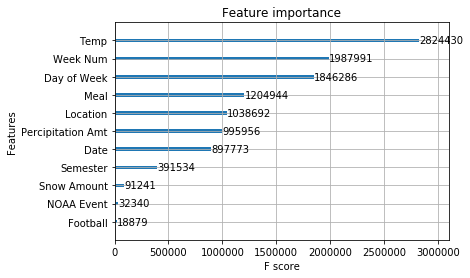

In [24]:
from xgboost import plot_importance
print(plot_importance(xgb_fit))

In [25]:
df.to_csv("merged_data.csv")